# Introduction to Deep Learning on GPUs

In [1]:
print "The answer should be three: " + str(1+2)

The answer should be three: 3


Let's execute the cell below to display information about the GPUs running on the server.

In [2]:
!nvidia-smi

Fri Oct 19 08:17:58 2018       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 396.54                 Driver Version: 396.54                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 105...  Off  | 00000000:01:00.0  On |                  N/A |
|  0%   53C    P0    N/A /  75W |    298MiB /  4032MiB |      2%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

## Introduction

In this class we will introduce the topic of Deep Learning, a rapidly growing segment of Artificial Intelligence.  Deep Learning is increasingly being used to deliver near-human level accuracy in image classification, voice recognition, natural language processing, and more.  In this class we will cover the basics of Deep Learning through some live examples, we will introduce the three major Deep Learning software frameworks and demonstrate why Deep Learning excels when run on GPUs.

This introductory class is intended to serve as a first introduction to the concept of Deep Learning and a live tour of the major software frameworks.  There is some complex looking code presented, but it is not necessary to understand this code to complete the class.  There are some times where you will be waiting a couple of minutes for the Deep Learning algorithms to run - feel free to use this time to explore the code.

By the end of this class you will hopefully be excited by the potential applications of Deep Learning and have a better idea of which of the frameworks you may want to learn more about in one of our [upcoming follow-on classes](https://developer.nvidia.com/deep-learning-courses).

## Demo

We will begin with a demonstration that will use a neural network to identify the subject of an image.  Click the button below to upload an image file from your local machine.  If you don't wish to upload an image just skip past this step and we'll randomly choose one of our images for you.

If you uploaded your own image, change the `your_image_name` to the new file name in the code below.  

To run or execute the cell, click in it and either press the play button in the toolbar at the top, or use Ctrl + Enter on your keyboard.  For this demo and for the rest of the lab, you will know the lab is processing when you see a solid circle in the top-right of the window that looks like this: ![](jupyter_executing.png)
Otherwise, when it is idle, you will see the following: ![](jupyter_idle.png)
For troubleshooting, please see [Self-paced Lab Troubleshooting FAQ](https://developer.nvidia.com/self-paced-labs-faq#Troubleshooting) to debug the issue.

After executing the below cell, it will load the image into memory and display it for you.

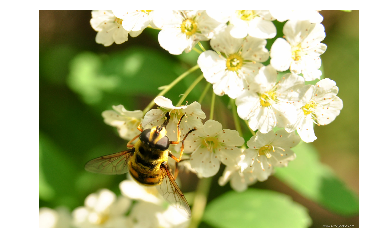

In [3]:
%matplotlib inline
import os

images_upload_dir = "/root/overfeat/samples/"
your_image_name = "bee.jpg"
image = images_upload_dir + your_image_name

import matplotlib.pyplot as plt
from PIL import Image
im = Image.open(image)
plt.imshow(im)
plt.axis('off')
plt.show()

Once the image is displayed above, execute the below cell to get some predictions about what the image is showing.

In [4]:
!/root/overfeat/bin/linux_64/overfeat -l -n 10 $image

bee 0.98475
fly 0.0145732
leaf beetle, chrysomelid 0.000300552
long-horned beetle, longicorn, longicorn beetle 0.000215571
ant, emmet, pismire 8.19673e-05
ladybug, ladybeetle, lady beetle, ladybird, ladybird beetle 3.47135e-05
honeycomb 1.42248e-05
lacewing, lacewing fly 1.18527e-05
cricket 7.44616e-06
cicada, cicala 5.48356e-06


What you see as output are 10 predictions (in order) about the contents of the image produced by a Deep Learning (DL) system called [Overfeat](http://cilvr.nyu.edu/doku.php?id=code:start). Each prediction is of an object which may be present in the image along with the confidence in the predictions.  In machine learning we call these predictions 'classifications'.

If you were tasked with writing a computer program to make predictions like this, how would you do it?

The traditional approach to this problem taken by the computer vision research community was to hand-craft functions which would look for particular features in the image that were believed to be indicative of certain objects or scenes.  For example, hard corners and straight edges might be believed to indicate the presence of manmade objects in the scene.  The responses from these feature extraction functions would then be fed into another function which would decide whether to declare a particular object had been detected in the image.

![Traditional approach](files/DLIntro/tradition.png)

<div align="center">*Figure 1: Traditional approach to machine perception - hand-crafted features are extracted from the raw data and is then independently passed to a classification function. This typically leads to brittle and false-alarm prone detectors.*</div>

Unfortunately there are a number of problems with this approach.  Firstly, it is very hard to think of robust, reliable features which map to specific object types.  Secondly, it is a massive task to come up with the right combination of features for every type of object you want to be able to classify.  Thirdly, it is very difficult to design functions that are robust to translations, rotations and scalings of objects in the image.  Together these problems resulted in traditional computer vision struggling to develop high accuracy object detectors and classifiers for a broad range of objects.

The DL system that you saw demonstrated above was created in a very different way.  No human knowledge was encoded in the DL model about the types and combinations of features that are important for labelling different types of object or scene.  Instead, a combined feature extraction and classification model was learned by allowing the computer to examine millions of ground-truth labelled images to discover which features and combinations of features were most discriminative for each of the object classes (In machine learning we call this 'training' the model).  Furthermore, this was done in such a way that the model didn't just learn to classify the specific objects it was trained on; instead, it abstracted out the essence of those objects in such a way that it could recognize previously unseen but visually similar objects.  This learning process refined tens of millions of free parameters in the DL model above to be able to accurately classify 1000 different object types.  On a traditional CPU based server this training would take weeks to complete.  This network was instead trained in just hours by exploiting GPU acceleration.  Almost all DL systems today exploit massive GPU acceleration to make training practical.

![Machine learning approach](files/DLIntro/DL.png)

<div align="center">*Figure 2: In the Deep Learning approach the feature extraction and classification functions are simultaneously learned using large amounts of training data.  The learned model can then be deployed in a new workflow where previously unseen data samples are classified.*</div>

In this class we are going to take a tour of the technology behind DL and the popular open-source frameworks which make it accessible to researchers and software developers today.  Hopefully by the end of the class you will have an appreciation for the varied applications of DL, the benefits of some of the available DL frameworks and the essential nature of GPU acceleration for training real-world networks in reasonable timeframes.

## What is Deep Learning?

Deep Learning (DL) is a branch of artificial intelligence research that is attempting to develop the techniques that will allow computers to learn complex perception tasks such as seeing and hearing at human levels of performance.  Recent advances in DL have yielded startling performance gains in fields such as computer vision, speech recognition and natural language understanding.  DL is already in use today to understand data and user inputs in technologies such as virtual personal assistants and online image search.  DL is an active area of ongoing research where it is envisaged that human level perception of unstructured data will enable technologies such as self-driving cars and truly intelligent machines.

DL attempts to use large volumes of unstructured data, such as images and audio clips, to learn hierarchical models which capture the complex structure in the data and then use these models to predict properties of previously unseen data.  For example, DL has proven extremely successful at learning hierarchical models of the visual features and concepts represented in handheld camera images and then using those models to automatically label previously unseen images with the objects present in them.

The models learned through DL are biologically inspired artificial neural networks (ANNs).  An ANN is an interconnected group of nodes, akin to the vast network of neurons in a brain. In the image below, each circular node represents an artificial neuron and an arrow represents a connection from the output of one neuron to the input of another.  Input data is fed into the red nodes, and dependent on the weights on the connections between nodes, causes varying levels of activation of the subsequent hidden and output nodes.  In our example above the input nodes would be connected to image pixels and the output nodes would have a one-to-one correspondence with the possible object classes; the job of the hidden nodes is to learn the complex function which maps pixels to object labels. 

![ANN](files/DLIntro/ANN.png)

<div align="center">*Figure 3:  Fully-connected Artificial Neural Network with one hidden layer*</div>

For the advanced reader, the activation of a neuron is just a function of a variable which is the weighted sum of the inputs.  For basic neural networks the function is a sigmoid function.  The idea is that if the weighted sum of the inputs exceeds a threshold value, the neuron gives a positive output.

For ANNs to be effective in difficult perception tasks, such as object labelling in images, these networks usually have many stacked layers of artificial neurons each with many neurons in the layer.  It is these many wide layers that lead to these networks being labelled Deep Neural Networks (DNNs).  

One particular class of DNN which has shown great capability in visual perception tasks is called the Convolutional Neural Network (CNN).  CNNs have a structure which loosely resembles the structure the human visual cortex where lower levels of the model hierarchy are focused on small and local visual details, such as oriented line segments, which aggregate together into higher levels of the model which correspond to complex human concepts, such as faces and animals.

![CNN](files/DLIntro/cnn.png)

<div align="center">*Figure 4:  Deep Neural Networks learn a hierarchical model of the input data in which the layers correspond to increasingly complex real-world concepts.  The number of parameters in a network is a function of the number of neurons in the network and the architecture of the network connectivity.*</div>

The [Imagenet Challenge](http://image-net.org/challenges/LSVRC/2014/index) is an annual competition where competitors are provided with 1.2 million natural images from the internet which are labelled with the objects that appear in those images using 1000 different class labels.  Competitors must create a model using this data which will then be tested against a further 100,000 images to see how accurately the model can identify and localize objects within them.  Over the past few years CNN based approaches have come to dominate the competition with accuracy in the object identification task recently exceeding 95% - which is comparable with human performance in labelling the objects in the test dataset.

The mathematics that underpins DL training is predominantly linear matrix algebra.  Computation of this type of mathematics is highly parallelizable making it a perfect fit for acceleration using GPUs.  Training a DNN that can be competitive in the Imagenet challenge is computationally very intensive and would take weeks, months or even years of computation on a CPU based system.  Through massive parallelization, GPUs can reduce this training time to days or even hours. Now almost all entrants into the Imagenet Challenge use GPUs, sometimes many of them, to train CNNs with billions of trainable parameters.  The graph below shows how significant recent improvements in accuracy in the Imagenet challenge correlate with the explosion in the use of GPUs for training DNN entries.

![](files/DLIntro/gpuimagenet.png)

<div align="center">*Figure 5: The introduction of GPU accelerated Deep Learning into the ImageNet challenge began a period of unprecedented performance improvements.*</div>

GPUs are not only far more computationally efficient for training DNNs - they are also far more cost effective at scale.  In 2013 Google built it's "Google Brain" - a 1000 server, 16,000 core CPU based cluster for training a state-of-the-art DNN for image understanding.  It cost an estimated \$5,000,000 to build.  Shortly afterwards a team from the Stanford AI Lab showed that using 3 GPU accelerated servers with 12 GPUs per server - a total of 18,432 cores - they could train the same DNN and achieve the same performance.  Their system cost approximately $33,000 - 150th of the hardware cost and energy usage ([Wired Article](http://www.wired.com/2013/06/andrew_ng/)).

![Google Brain vs. Stanford GPUs](files/DLIntro/gbrain.png)

<div align="center">*Figure 6: GPUs are the most cost effective and size and power efficient means for training large Deep Neural Networks.*</div>

## Deep Learning Frameworks

In recent years a number of software development frameworks have been created to make researching and applying DL more accessible and efficient.  In this class we will introduce three of the current most popular frameworks: Caffe, Theano and Torch.  They all share the common benefits of providing highly optimized GPU enabled code specific to the computations required for training DNNs whilst providing access to that code through simple command line or scripting language interfaces such as Python.  Many powerful DNNs can be trained and deployed using these frameworks without ever having to write any GPU or complex compiled code but whilst still benefiting from the huge training speed-up afforded by GPU acceleration.

In order to compare and contrast these frameworks we will look at how you train a CNN in each of the frameworks to automatically classify images of different types.

### Framework 1: Caffe

[Caffe](http://caffe.berkeleyvision.org/) is a DL framework created by PhD student Yangqing Jia from UC Berkley.  Some of benefits of Caffe to the DL practitioner and researcher:
* Caffe is fast due to it's highly optimized C/CUDA backend which integrates GPU acceleration
* Caffe is still very accessible due to command line, Python and Matlab interfaces  
* The wrapper interfaces make it very easy to integrate DNN training and deployment into larger data analytics workflows  
* Caffe has a large open-source development community adding new features all time
* Caffe has an associated model-zoo where researchers can upload trained models for others to fine tune or use for inference using their own data

You may choose to use Caffe as your DL framework if you fit the following profile:

* You are interested in quickly getting up and running training and testing DNNs against your own image datasets without writing a lot of new code
* You are a C/CUDA developer wishing to extend DL functionality within a framework

One of the key benefits of Caffe for those wishing to apply deep learning to their own data is that defining and building many different types of DNN is possible without ever writing a line of code.  In this section we'll guide you through doing just that.

#### Caffe example

We're going to work with the well-known [CIFAR-10](http://www.cs.toronto.edu/~kriz/cifar.html) dataset which consists of 60000 32x32 color images split into ten classes: airplane, automobile, bird, cat, deer, dog, frog, horse, ship and truck.  Here are some examples:

![](http://www.cs.toronto.edu/~kriz/cifar-10-sample/airplane1.png)![](http://www.cs.toronto.edu/~kriz/cifar-10-sample/automobile10.png) ![](http://www.cs.toronto.edu/~kriz/cifar-10-sample/bird7.png) ![](http://www.cs.toronto.edu/~kriz/cifar-10-sample/cat9.png) ![](http://www.cs.toronto.edu/~kriz/cifar-10-sample/deer6.png) ![](http://www.cs.toronto.edu/~kriz/cifar-10-sample/dog4.png) ![](http://www.cs.toronto.edu/~kriz/cifar-10-sample/horse6.png) ![](http://www.cs.toronto.edu/~kriz/cifar-10-sample/ship1.png) ![](http://www.cs.toronto.edu/~kriz/cifar-10-sample/truck5.png) ![](http://www.cs.toronto.edu/~kriz/cifar-10-sample/airplane4.png) ![](http://www.cs.toronto.edu/~kriz/cifar-10-sample/automobile4.png) ![](http://www.cs.toronto.edu/~kriz/cifar-10-sample/bird1.png) ![](http://www.cs.toronto.edu/~kriz/cifar-10-sample/cat1.png) ![](http://www.cs.toronto.edu/~kriz/cifar-10-sample/deer4.png) ![](http://www.cs.toronto.edu/~kriz/cifar-10-sample/deer8.png) ![](http://www.cs.toronto.edu/~kriz/cifar-10-sample/dog10.png) ![](http://www.cs.toronto.edu/~kriz/cifar-10-sample/ship7.png) ![](http://www.cs.toronto.edu/~kriz/cifar-10-sample/horse4.png)

We're working with the smaller CIFAR-10 dataset so that you can actually train a network from start to finish within the time available in this class; however, the CNN we're defining and training exhibits all the essential features of the much larger networks used in the ImageNet challenge.

Training a DNN in Caffe requires you to provide three things: a [network definition file](cifar10_quick.prototxt) specifying the neural network architecture, a [solver definition file](cifar10_quick_solver.prototxt) specifying the training parameters and a dataset.  We've prepared each of these for you and there's no need to change them but you can take a look at them using the links provided.  The network and solver definition files are human readable text files.  Our dataset of images has been preloaded into a database to make it faster to read into Caffe.  

In the network definition file we specify the inputs, outputs and structure of each of the layers in the DNN.  Here is an example of how a convolutional layer is defined, which is representative of how all layers are defined:

The solver definition file is simply a list of parameters which are passed to the DNN training algorithm.  Here is how the parameters are set in this example:

The training process consists of first randomly initializing the weights on the connections between neurons in the network whose structure is defined in the network definition file.  Then, one at a time, each image in the training dataset is fed into the network along with its label.  The network guesses the label based purely on the input pixels - this is called classification.  If the guess is wrong then a small modification is made to the weights so that the network will guess more accurately for that image next time it sees it.  This process is repeated many thousands of times until the network converges to a stable average classification accuracy across all the training images.

Training the model is as simple as running the cell below.  When you do so, you will see a large number of messages flying by.  First the network will be initialized layer by layer and then training will begin.  After each 100 training iterations you will get an update on the training loss which should be decreasing and after each 500 you will get an update on the accuracy against a test set (Test net output #0) which should be increasing.  An iteration is when the network trains on each image in the training set exactly once.  **Training the network takes a couple of minutes**, so spend the time familiarizing yourself with Caffe's output - keep scrolling to the bottom of the output window to see the latest updates.

In [5]:
!cd /opt/caffe && caffe train --solver=examples/cifar10/cifar10_quick_solver.prototxt

I1017 11:35:07.618979    95 parallel.cpp:43] P2PManager::Init, global rank: [0 of 1] @ 93bf2673c2ff
I1017 11:35:07.950760    95 caffe.cpp:709] This is NVCaffe 0.17.0 started at Wed Oct 17 11:35:07 2018
I1017 11:35:07.950917    95 caffe.cpp:711] CuDNN version: 7201
I1017 11:35:07.950920    95 caffe.cpp:712] CuBLAS version: 9000
I1017 11:35:07.950937    95 caffe.cpp:713] CUDA version: 9000
I1017 11:35:07.950940    95 caffe.cpp:714] CUDA driver version: 9020
I1017 11:35:07.950945    95 caffe.cpp:715] Arguments: 
[0]: caffe
[1]: train
[2]: --solver=examples/cifar10/cifar10_quick_solver.prototxt
I1017 11:35:07.972965    95 caffe.cpp:220] Using GPUs 0
I1017 11:35:08.099558    95 gpu_memory.cpp:105] GPUMemory::Manager initialized
I1017 11:35:08.099963    95 gpu_memory.cpp:107] Total memory: 4227858432, Free: 3513778176, dev_info[0]: total=4227858432 free=3513778176
I1017 11:35:08.100236    95 caffe.cpp:227] GPU 0: GeForce GTX 1050 Ti
I1017 11:35:08.100320    95 solver.cpp:40] Solver data type

I1017 11:35:11.198676   115 common.cpp:541] {0.0} NVML succeeded to set CPU affinity
I1017 11:35:11.200107    95 solver.cpp:587]     (0.0)    Test net output #0: accuracy = 0.05
I1017 11:35:11.200130    95 solver.cpp:587]     (0.0)    Test net output #1: loss = 2.30228 (* 1 = 2.30228 loss)
I1017 11:35:11.200150    95 solver.cpp:262] Initial Test completed in 0.017608s
I1017 11:35:11.200529   111 internal_thread.cpp:42] Restarting 4 internal thread(s) on device 0
I1017 11:35:11.237287   111 internal_thread.cpp:18] {0} Starting 1 internal thread(s) on device 0
I1017 11:35:11.237431   111 data_transformer.cpp:40] Loading mean file from: examples/cifar10/mean.binaryproto
I1017 11:35:11.239490   111 data_transformer.cpp:40] Loading mean file from: examples/cifar10/mean.binaryproto
I1017 11:35:11.240021   111 data_transformer.cpp:40] Loading mean file from: examples/cifar10/mean.binaryproto
I1017 11:35:11.240442   111 data_transformer.cpp:40] Loading mean file from: examples/cifar10/mean.bin

I1017 11:35:22.929550    95 solver.cpp:333]     [0.0] Iteration 1300 (123.129 iter/s, 0.812159s/100 iter), 2.6/8ep, loss = 0.963485
I1017 11:35:22.929596    95 solver.cpp:361]     [0.0]     Train net output #0: loss = 0.963485 (* 1 = 0.963485 loss)
I1017 11:35:22.929611    95 sgd_solver.cpp:176] [0.0] Iteration 1300, lr = 0.001, m = 0.9, lrm = 0.01, wd = 0.004, gs = 1
I1017 11:35:23.734921    95 solver.cpp:333]     [0.0] Iteration 1400 (124.173 iter/s, 0.805327s/100 iter), 2.8/8ep, loss = 1.05992
I1017 11:35:23.734947    95 solver.cpp:361]     [0.0]     Train net output #0: loss = 1.05992 (* 1 = 1.05992 loss)
I1017 11:35:23.734968    95 sgd_solver.cpp:176] [0.0] Iteration 1400, lr = 0.001, m = 0.9, lrm = 0.01, wd = 0.004, gs = 1
I1017 11:35:24.300863   121 data_reader.cpp:321] Restarting data pre-fetching
I1017 11:35:24.556347    95 solver.cpp:500] Iteration 1500, Testing net (#0)
I1017 11:35:24.841938   113 data_reader.cpp:321] Restarting data pre-fetching
I1017 11:35:24.856353    95 

I1017 11:35:39.839087    95 solver.cpp:333]     [0.0] Iteration 3100 (119.771 iter/s, 0.834923s/100 iter), 6.2/8ep, loss = 0.634003
I1017 11:35:39.839139    95 solver.cpp:361]     [0.0]     Train net output #0: loss = 0.634003 (* 1 = 0.634003 loss)
I1017 11:35:39.839162    95 sgd_solver.cpp:176] [0.0] Iteration 3100, lr = 0.001, m = 0.9, lrm = 0.01, wd = 0.004, gs = 1
I1017 11:35:40.853284    95 solver.cpp:333]     [0.0] Iteration 3200 (98.6072 iter/s, 1.01412s/100 iter), 6.4/8ep, loss = 0.694587
I1017 11:35:40.853313    95 solver.cpp:361]     [0.0]     Train net output #0: loss = 0.694587 (* 1 = 0.694587 loss)
I1017 11:35:40.853322    95 sgd_solver.cpp:176] [0.0] Iteration 3200, lr = 0.001, m = 0.9, lrm = 0.01, wd = 0.004, gs = 1
I1017 11:35:41.795665    95 solver.cpp:333]     [0.0] Iteration 3300 (106.126 iter/s, 0.942277s/100 iter), 6.6/8ep, loss = 0.56984
I1017 11:35:41.795689    95 solver.cpp:361]     [0.0]     Train net output #0: loss = 0.56984 (* 1 = 0.56984 loss)
I1017 11:35:4

Congratulations - you just trained your first DNN!  After 4000 iterations you will see the accuracy against the test set was ~71% - not bad for a couple of minutes training!  Each iteration took less than 0.02 seconds to train using the GPU.

The learned network weights get saved into a binary file called cifar10_quick_iter_4000.caffemodel

Classifying new images using the newly trained dataset is just as simple as training was - this time we will use Caffe's Python interface.  Activate the cell below as many times as you like to randomly choose an image from the test set and have it classified - there is no need to edit any of the code. Remember - the test set is images that were never used in training the network.

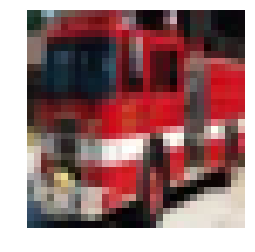

truck


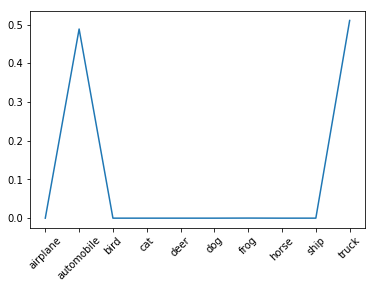

In [7]:
# Import required Python libraries
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import caffe
import random

# Choose network definition file and pretrained network binary
MODEL_FILE = '/opt/caffe/examples/cifar10/cifar10_quick.prototxt'
PRETRAINED = '/opt/caffe/examples/cifar10/cifar10_quick_iter_4000.caffemodel.h5'

# Load a random image
x = caffe.io.load_image('/opt/caffe/examples/images/' + str(random.randint(1,18)) + '.png')

# Display the chosen image
plt.imshow(x)
plt.axis('off')
plt.show()

# Load the pretrained model and select to use the GPU for computation
caffe.set_mode_gpu()
net = caffe.Classifier(MODEL_FILE, PRETRAINED,
                       mean=np.load('/opt/caffe/examples/cifar10/cifar10_mean.npy').mean(1).mean(1),
                       raw_scale=255,
                       image_dims=(32, 32))

# Run the image through the pretrained network
prediction = net.predict([x])

# List of class labels
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Display the predicted probability for each class
plt.plot(prediction[0])
plt.xticks(range(0,10), classes, rotation=45)
# Display the most probable class
print classes[prediction[0].argmax()]

Even for this relatively small dataset and network architecture GPU acceleration is still highly desirable.  Running the cell below will train the same network for 100 iterations using the CPU - as you will see, it is considerably slower than training on the GPU was above. Training for 0.025 times as many iterations takes about 50% more time!

In [8]:
!cd /opt/caffe && caffe train --solver=examples/cifar10/cifar10_quick_solver_cpu.prototxt

I1017 11:40:51.485460   151 parallel.cpp:43] P2PManager::Init, global rank: [0 of 1] @ 93bf2673c2ff
I1017 11:40:51.671908   151 caffe.cpp:709] This is NVCaffe 0.17.0 started at Wed Oct 17 11:40:51 2018
I1017 11:40:51.672078   151 caffe.cpp:711] CuDNN version: 7201
I1017 11:40:51.672083   151 caffe.cpp:712] CuBLAS version: 9000
I1017 11:40:51.672101   151 caffe.cpp:713] CUDA version: 9000
I1017 11:40:51.672102   151 caffe.cpp:714] CUDA driver version: 9020
I1017 11:40:51.672107   151 caffe.cpp:715] Arguments: 
[0]: caffe
[1]: train
[2]: --solver=examples/cifar10/cifar10_quick_solver_cpu.prototxt
I1017 11:40:51.690338   151 caffe.cpp:213] Use CPU.
I1017 11:40:51.820451   151 solver.cpp:40] Solver data type: FLOAT
I1017 11:40:51.820574   151 solver.cpp:43] Initializing solver from parameters: 
test_iter: 100
test_interval: 500
base_lr: 0.001
display: 100
max_iter: 4000
lr_policy: "fixed"
momentum: 0.9
weight_decay: 0.004
snapshot: 4000
snapshot_prefix: "examples/cifar10/cifar10_quick"
sol

I1017 11:40:52.013355   151 solver.cpp:587]     (0.0)    Test net output #0: accuracy = 0.16
I1017 11:40:52.013389   151 solver.cpp:587]     (0.0)    Test net output #1: loss = 2.30236 (* 1 = 2.30236 loss)
I1017 11:40:52.013397   151 solver.cpp:262] Initial Test completed in 0.18s
I1017 11:40:52.376832   151 solver.cpp:341]     [0.0] Iteration 0 (0.363 s), loss = 2.30294
I1017 11:40:52.376857   151 solver.cpp:361]     [0.0]     Train net output #0: loss = 2.30294 (* 1 = 2.30294 loss)
I1017 11:40:52.376871   151 sgd_solver.cpp:176] [0.0] Iteration 0, lr = 0.001, m = 0.9, lrm = 0.01, wd = 0.004, gs = 1
I1017 11:40:52.739075   151 solver.cpp:341]     [0.0] Iteration 1 (0.362 s), loss = 2.30134
I1017 11:40:52.739101   151 solver.cpp:361]     [0.0]     Train net output #0: loss = 2.30134 (* 1 = 2.30134 loss)
I1017 11:40:53.195303   151 solver.cpp:341]     [0.0] Iteration 2 (0.456 s), loss = 2.29855
I1017 11:40:53.195329   151 solver.cpp:361]     [0.0]     Train net output #0: loss = 2.29855

I1017 11:50:43.192190   151 solver.cpp:333]     [0.0] Iteration 1700 (3.27289 iter/s, 30.554s/100 iter), 3.4/8ep, loss = 0.895181
I1017 11:50:43.192252   151 solver.cpp:361]     [0.0]     Train net output #0: loss = 0.895181 (* 1 = 0.895181 loss)
I1017 11:50:43.192267   151 sgd_solver.cpp:176] [0.0] Iteration 1700, lr = 0.001, m = 0.9, lrm = 0.01, wd = 0.004, gs = 1
I1017 11:51:13.925920   151 solver.cpp:333]     [0.0] Iteration 1800 (3.25383 iter/s, 30.733s/100 iter), 3.6/8ep, loss = 0.708205
I1017 11:51:13.926017   151 solver.cpp:361]     [0.0]     Train net output #0: loss = 0.708205 (* 1 = 0.708205 loss)
I1017 11:51:13.926031   151 sgd_solver.cpp:176] [0.0] Iteration 1800, lr = 0.001, m = 0.9, lrm = 0.01, wd = 0.004, gs = 1
I1017 11:51:44.622552   151 solver.cpp:333]     [0.0] Iteration 1900 (3.25775 iter/s, 30.696s/100 iter), 3.8/8ep, loss = 0.785982
I1017 11:51:44.622637   151 solver.cpp:361]     [0.0]     Train net output #0: loss = 0.785982 (* 1 = 0.785982 loss)
I1017 11:51:44.

I1017 12:01:27.194111   151 solver.cpp:500] Iteration 3500, Testing net (#0)
I1017 12:01:41.138186   169 data_reader.cpp:321] Restarting data pre-fetching
I1017 12:01:41.928391   151 solver.cpp:587]     (0.0)    Test net output #0: accuracy = 0.715
I1017 12:01:41.928475   151 solver.cpp:587]     (0.0)    Test net output #1: loss = 0.85822 (* 1 = 0.85822 loss)
I1017 12:01:41.928488   151 solver.cpp:271] Tests completed in 46.482s
I1017 12:01:42.326771   151 solver.cpp:333]     [0.0] Iteration 3500 (2.15137 iter/s, 46.482s/100 iter), 7/8ep, loss = 0.607536
I1017 12:01:42.326840   151 solver.cpp:361]     [0.0]     Train net output #0: loss = 0.607536 (* 1 = 0.607536 loss)
I1017 12:01:42.326853   151 sgd_solver.cpp:176] [0.0] Iteration 3500, lr = 0.001, m = 0.9, lrm = 0.01, wd = 0.004, gs = 1
I1017 12:02:15.797263   151 solver.cpp:333]     [0.0] Iteration 3600 (2.98775 iter/s, 33.47s/100 iter), 7.2/8ep, loss = 0.799894
I1017 12:02:15.797379   151 solver.cpp:361]     [0.0]     Train net out

Each training iteration this time took about 0.8 seconds - approximately forty times slower.

### Framework 2: Theano

Theano is a Python DL library created at the University of Montreal.  Some benefits of Theano to the DL practioner and researcher are:
* Theano provides a highly expressive way of defining and training DNNs as it is built as a general symbolic math library and offers automatic function differentiation - this means the sky's the limit for DNN architectures and training methods that can be defined without leaving Python  
* Theano is still very fast due to a CUDA backend that enables GPU acceleration  
* Theano is tightly integrated with Python's popular NumPy library making integration into data analytics workflows a breeze.
* A number of lightweight Python libraries have been written on top of Theano to further simplify the DNN training process, e.g. [Lasagne](https://github.com/Lasagne/Lasagne) and [Keras](https://github.com/fchollet/keras)

You may choose to use Theano as your DL framework if you fit the following profile:
* You are a Python developer looking for a highly expressive DL framework
* You wish to develop a wider range of DL applications than just CNNs for imagery by defining new layer types, training algorithms and objective functions without leaving Python

#### Theano example

In this example we're going to work with the well know [MNIST](http://yann.lecun.com/exdb/mnist/) dataset which consists of 28x28 pixel black and white images of handwritten digits.  Here are some examples:

![](http://deeplearning.net/tutorial/_images/mnist_0.png) ![](http://deeplearning.net/tutorial/_images/mnist_1.png) ![](http://deeplearning.net/tutorial/_images/mnist_2.png) ![](http://deeplearning.net/tutorial/_images/mnist_3.png) ![](http://deeplearning.net/tutorial/_images/mnist_4.png) ![](http://deeplearning.net/tutorial/_images/mnist_5.png) 

We start by importing some Python dependencies and then defining a Python class for Convolutional Layers with Max Pooling.  Don't worry too much about the details - we have included this here so you can see the symbolic math nature of Theano syntax.

**WARNING!** It is important that you execute each of the following cells in order as they build upon each other. It is suggested you execute the cells before parsing through the code - some of them can take a minute or two to run.  Remember to watch the circle in the top-right of the window - while it is solid the cell is still executing.

In [9]:
import os
os.chdir('/LAB/DLIntro/DL')
import sys
import timeit
import numpy
import theano
import theano.tensor as T
from theano.tensor.signal import pool
from theano.tensor.nnet import conv
from logistic_sgd import LogisticRegression, load_data
from mlp import HiddenLayer
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from utils import tile_raster_images
from IPython import display

class LeNetConvPoolLayer(object):
    """Pool Layer of a convolutional network """

    def __init__(self, rng, input, filter_shape, image_shape, poolsize=(2, 2)):

        assert image_shape[1] == filter_shape[1]
        self.input = input

        # there are "num input feature maps * filter height * filter width"
        # inputs to each hidden unit
        fan_in = numpy.prod(filter_shape[1:])
        # each unit in the lower layer receives a gradient from:
        # "num output feature maps * filter height * filter width" /
        #   pooling size
        fan_out = (filter_shape[0] * numpy.prod(filter_shape[2:]) /
                   numpy.prod(poolsize))
        # initialize weights with random weights
        W_bound = numpy.sqrt(6. / (fan_in + fan_out))
        self.W = theano.shared(
            numpy.asarray(
                rng.uniform(low=-W_bound, high=W_bound, size=filter_shape),
                dtype=theano.config.floatX
            ),
            borrow=True
        )

        # the bias is a 1D tensor -- one bias per output feature map
        b_values = numpy.zeros((filter_shape[0],), dtype=theano.config.floatX)
        self.b = theano.shared(value=b_values, borrow=True)

        # convolve input feature maps with filters
        conv_out = conv.conv2d(
            input=input,
            filters=self.W,
            filter_shape=filter_shape,
            image_shape=image_shape
        )

        # downsample each feature map individually, using maxpooling
        pooled_out = pool.pool_2d(
            input=conv_out,
            ds=poolsize,
            ignore_border=True
        )

        # add the bias term. Since the bias is a vector (1D array), we first
        # reshape it to a tensor of shape (1, n_filters, 1, 1). Each bias will
        # thus be broadcasted across mini-batches and feature map
        # width & height
        self.output = T.tanh(pooled_out + self.b.dimshuffle('x', 0, 'x', 'x'))

        # store parameters of this layer
        self.params = [self.W, self.b]

        # keep track of model input
        self.input = input

Next we define our CNN training parameters:

In [10]:
learning_rate=0.1
dataset='/LAB/DLIntro/mnist.pkl.gz'
nkerns=[100, 50]
batch_size=128

We now run some pre-built scripts to load the MNIST dataset and compute how many training batches we will have given our chosen batch size:

In [11]:
from logistic_sgd import load_data

rng = numpy.random.RandomState(23455)

datasets = load_data(dataset)

train_set_x, train_set_y = datasets[0]
valid_set_x, valid_set_y = datasets[1]
test_set_x, test_set_y = datasets[2]

# compute number of minibatches for training, validation and testing
n_train_batches = train_set_x.get_value(borrow=True).shape[0]
n_valid_batches = valid_set_x.get_value(borrow=True).shape[0]
n_test_batches = test_set_x.get_value(borrow=True).shape[0]
n_train_batches /= batch_size
n_valid_batches /= batch_size
n_test_batches /= batch_size

n_epochs=10000/n_train_batches

# allocate symbolic variables for the data
index = T.lscalar()  # index to a [mini]batch
x = T.matrix('x')   # the data is presented as rasterized images
y = T.ivector('y')  # the labels are presented as 1D vector of
                        # [int] labels
    
print '... data loaded.'

... loading data
... data loaded.


Now we define our actual CNN layer-by-layer - again, spend as much time as like reviewing the code to understand Theano's syntax, but don't worry if you don't understand all the details.

In [12]:
print '... building the model'

# Reshape matrix of rasterized images of shape (batch_size, 28 * 28)
# to a 4D tensor, compatible with our LeNetConvPoolLayer
# (28, 28) is the size of MNIST images.
layer0_input = x.reshape((batch_size, 1, 28, 28))

# Construct the first convolutional pooling layer:
# filtering reduces the image size to (28-5+1 , 28-5+1) = (24, 24)
# maxpooling reduces this further to (24/2, 24/2) = (12, 12)
# 4D output tensor is thus of shape (batch_size, nkerns[0], 12, 12)
layer0 = LeNetConvPoolLayer(
    rng,
    input=layer0_input,
    image_shape=(batch_size, 1, 28, 28),
    filter_shape=(nkerns[0], 1, 25, 25),
    poolsize=(2, 2)
)

# Construct the second convolutional pooling layer
# filtering reduces the image size to (12-5+1, 12-5+1) = (8, 8)
# maxpooling reduces this further to (8/2, 8/2) = (4, 4)
# 4D output tensor is thus of shape (batch_size, nkerns[1], 4, 4)
#layer1 = LeNetConvPoolLayer(
#    rng,
#    input=layer0.output,
#    image_shape=(batch_size, nkerns[0], 9, 9),
#    filter_shape=(nkerns[1], nkerns[0], 4, 4),
#    poolsize=(2, 2)
#)

# the HiddenLayer being fully-connected, it operates on 2D matrices of
# shape (batch_size, num_pixels) (i.e matrix of rasterized images).
# This will generate a matrix of shape (batch_size, nkerns[1] * 4 * 4),
# or (500, 50 * 4 * 4) = (500, 800) with the default values.
layer2_input = layer0.output.flatten(2)

# construct a fully-connected sigmoidal layer
layer2 = HiddenLayer(
    rng,
    input=layer2_input,
    n_in=nkerns[0] * 2 * 2,
    n_out=50,
    activation=T.tanh
)

# classify the values of the fully-connected sigmoidal layer
layer3 = LogisticRegression(input=layer2.output, n_in=50, n_out=10)

# the cost we minimize during training is the NLL of the model
cost = layer3.negative_log_likelihood(y)

# create a function to compute the mistakes that are made by the model
test_model = theano.function(
    [index],
    layer3.errors(y),
    givens={
        x: test_set_x[index * batch_size: (index + 1) * batch_size],
        y: test_set_y[index * batch_size: (index + 1) * batch_size]
    }
)

validate_model = theano.function(
    [index],
    layer3.errors(y),
    givens={
        x: valid_set_x[index * batch_size: (index + 1) * batch_size],
        y: valid_set_y[index * batch_size: (index + 1) * batch_size]
    }
)

# create a list of all model parameters to be fit by gradient descent
params = layer3.params + layer2.params + layer0.params

# create a list of gradients for all model parameters
grads = T.grad(cost, params)

# train_model is a function that updates the model parameters by
# SGD Since this model has many parameters, it would be tedious to
# manually create an update rule for each model parameter. We thus
# create the updates list by automatically looping over all
# (params[i], grads[i]) pairs.
updates = [
    (param_i, param_i - learning_rate * grad_i)
    for param_i, grad_i in zip(params, grads)
]

train_model = theano.function(
    [index],
    cost,
    updates=updates,
    givens={
        x: train_set_x[index * batch_size: (index + 1) * batch_size],
        y: train_set_y[index * batch_size: (index + 1) * batch_size]
    }
)
print '... model built'

... building the model


/usr/local/lib/python2.7/dist-packages/theano/tensor/nnet/conv.py:98: UserWarning: theano.tensor.nnet.conv.conv2d is deprecated. Use theano.tensor.nnet.conv2d instead.
  warnings.warn("theano.tensor.nnet.conv.conv2d is deprecated."
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:59: UserWarning: DEPRECATION: the 'ds' parameter is not going to exist anymore as it is going to be replaced by the parameter 'ws'.
/usr/local/lib/python2.7/dist-packages/theano/gpuarray/dnn.py:184: UserWarning: Your cuDNN version is more recent than Theano. If you encounter problems, try updating Theano or downgrading cuDNN to a version >= v5 and <= v7.
  warnings.warn("Your cuDNN version is more recent than "
WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


... model built


Now we can actually train the CNN. After each iteration you will see an updated visualization of the learned feature layers in the network - this will allow you to see what the network is learning to look for to differentiate the digit classes.  Note that the training cost displayed during training is not easily interpretable in terms of the actual network performance, but as a relative measure you should see it decreasing as the networks learns.  After executing this cell, scroll down to see the training in action!

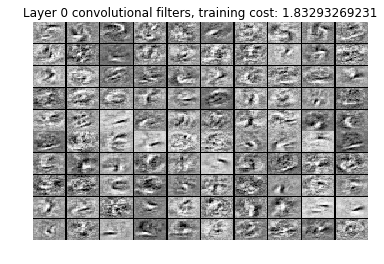

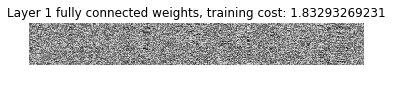

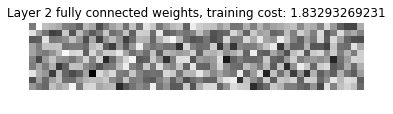

Optimization complete.
Best validation score of 98.207131 % obtained at iteration 9360, with test performance 98.167067 %


In [13]:
###############
# TRAIN MODEL #
###############
%matplotlib inline
print '... training'
# early-stopping parameters
patience = 10000  # look as this many examples regardless
patience_increase = 2  # wait this much longer when a new best is
                           # found
improvement_threshold = 0.995  # a relative improvement of this much is
                                   # considered significant
validation_frequency = min(n_train_batches, patience / 2)
                                  # go through this many
                                  # minibatche before checking the network
                                  # on the validation set; in this case we
                                  # check every epoch

best_validation_loss = numpy.inf
best_iter = 0
test_score = 0.
start_time = timeit.default_timer()

epoch = 0
done_looping = False

while (epoch < n_epochs) and (not done_looping):
    epoch = epoch + 1
    for minibatch_index in xrange(n_train_batches):

        iter = (epoch - 1) * n_train_batches + minibatch_index

        if iter % 100 == 0:
            print 'training @ iter = ', iter
        cost_ij = train_model(minibatch_index)

        if (iter + 1) % validation_frequency == 0:

            # compute zero-one loss on validation set
            validation_losses = [validate_model(i) for i
                                    in xrange(n_valid_batches)]
            this_validation_loss = numpy.mean(validation_losses)
            print('epoch %i, minibatch %i/%i, validation error %f %%' %
                    (epoch, minibatch_index + 1, n_train_batches,
                    this_validation_loss * 100.))

            # if we got the best validation score until now
            if this_validation_loss < best_validation_loss:

                #improve patience if loss improvement is good enough
                if this_validation_loss < best_validation_loss *  \
                    improvement_threshold:
                    patience = max(patience, iter * patience_increase)

                # save best validation score and iteration number
                best_validation_loss = this_validation_loss
                best_iter = iter

                # test it on the test set
                test_losses = [
                    test_model(i)
                    for i in xrange(n_test_batches)
                ]
                test_score = numpy.mean(test_losses)
                print(('     epoch %i, minibatch %i/%i, test error of '
                        'best model %f %%') %
                        (epoch, minibatch_index + 1, n_train_batches,
                        test_score * 100.))
                
    display.clear_output()
    plt.imshow(tile_raster_images(
    X = layer0.W.get_value(borrow=True),
    img_shape=(25,25),
    tile_shape=(10,10),
    tile_spacing=(1,1)), 
    cmap= cm.Greys_r,
    aspect='auto')
    plt.axis('off')
    plt.title('Layer 0 convolutional filters, training cost: ' + str(test_score * 100))
    plt.show()
    plt.imshow(layer2.W.get_value(borrow=True)[:,:].T, 
    cmap= cm.Greys_r)
    plt.axis('off')
    plt.title('Layer 1 fully connected weights, training cost: ' + str(test_score * 100))   
    plt.show()
    plt.imshow(layer3.W.get_value(borrow=True)[:,:].T, 
    cmap= cm.Greys_r)
    plt.axis('off')
    plt.title('Layer 2 fully connected weights, training cost: ' + str(test_score * 100))   
    plt.show()

    if patience <= iter:
        done_looping = True
        break

end_time = timeit.default_timer()
print('Optimization complete.')
print('Best validation score of %f %% obtained at iteration %i, '
        'with test performance %f %%' %
        ((1 - best_validation_loss) * 100., best_iter + 1, (1 - test_score) * 100.))

You will see that after 10000 training iterations the classification accuracy against the test set is over 98%.  You may have noticed during training that the convolutional filters came to much more closely resemble line segments that make up the hand written digits and the layer 2 connection weights became more polarized suggesting that the network was learning specific grouping of filters which were significant for each of the digits.

You can read much more about this example and others in the excellent tutorials created by the Theano developers available [here](http://deeplearning.net/tutorial/). 

### Framework 3: Torch


Torch is a scientific computing framework based on the programming language Lua but with a highly optimized C/CUDA backend.  Torch is maintained by a group of research scientists from Facebook, Twitter and Google but also has an community of contributors to the open-source project.

Benefits of of Torch:
* Efficient Tensor library (like NumPy) with an efficient CUDA backend which lends itself well to DNN computations
* Dedicated Neural Networks package -- build arbitrary acyclic computation graphs with automatic differentiation
also with fast CUDA and CPU backends
* Good community and industry support - several hundred community-built and maintained packages - active contribution from web scale companies, e.g. Facebook
* Easy to use Multi-GPU support and distribution of neural network training

The Lua scripting language is fast due to Just In Time (JIT) compilation and is a lot like Javascript in syntax.

You may choose to use Torch as your DL framework if you fit the following profile:
* You are very concerned about run-time speed, but still want the convenience of a scripting interface
* You wish to use multiple GPUs for training

#### Torch example

DL is not only applicable to image data, there have been many recent successes applying DL to understanding natural language text.    One important class of DNNs for natural language understanding is called Recurrent Neural Networks (RNNs).  RNNs extend the standard multi-layer DNN with a temporal memory component that means the network can learn sequential patterns in input data.  This works by having the hidden layers in the network receive both a new data sample as well as their state at the previous time step as input at each iteration. This means that RNNs can learn functions such as time-series forecasting, music generation, natural language word sequences and character level text sequence prediction.  In the example below you see an RNN receiving the sequence "Hello world!" as training input in three character windows with a stride of three characters.

![RNN](files/DLIntro/rnn.png)

<div align="center">*Figure 7:  Recurrent Neural Networks introduce a self-connection to the hidden nodes; this allows the network to remember it's previous states and subsequently learn significant predictive patterns in the input data.*</div> 

In this example we will show that an RNN built in Torch and trained on a variety of corpora of different styles of text is able to learn to generate random character sequence that retain the appropriate style, vocabulary, punctuation and formatting.  Given a large volume of training text (between 1.1 and 6.2 million training characters per model) the model learns to predict the next character in a partial character sequence; this means the model can generate original text conforming to the same style as the text it has been trained on.

Training the RNN capable of generating this style appropriate text takes about an hour per text corpus on an NVIDIA GRID K520 GPU running Torch.  Training the same network on a CPU would take about 100 times as long.  We have already done that GPU training for you. We made use of the excellent [code](https://github.com/karpathy/char-rnn) written by Andrej Karpathy, a graduate student at Stanford. We highly recommend reading Andrej's fascinating blog post associated with this code describing [The Unreasonable Effectiveness of RNNs](http://karpathy.github.io/2015/05/21/rnn-effectiveness/).  

Edit the style variable in the cell below to choose a trained network and then run it to see the Torch based RNN randomly generate text in one of the following styles:  William Shakespeare, Leo Tolstoy, President Barack Obama's speech writers or the Linux kernal source code authors.  You can also try increasing the `-length` input to get more text, but it will take longer to generate.

**NOTE** If you try the `linux` style, the output will be randomly generated text (character by character) that looks like kernel source code. This is not an error!

In [16]:
#Train model this will take quite a time
!cd /root/char-rnn && th train.lua -data_dir data/tolstoy -rnn_size 512 -num_layers 2 -dropout 0.5 -gpuid 0

using CUDA on GPU 0...	
loading data files...	
cutting off end of data so that the batches/sequences divide evenly	
reshaping tensor...	
data load done. Number of data batches in train: 1237, val: 66, test: 0	
vocab size: 87	
creating an lstm with 2 layers	
setting forget gate biases to 1 in LSTM layer 1	
setting forget gate biases to 1 in LSTM layer 2	
number of parameters in the model: 3376727	
cloning rnn	
cloning criterion	
1/61850 (epoch 0.001), train_loss = 4.52578233, grad/param norm = 8.8022e-01, time/batch = 0.4210s	
2/61850 (epoch 0.002), train_loss = 3.51068130, grad/param norm = 1.0353e+00, time/batch = 0.0775s	
3/61850 (epoch 0.002), train_loss = 4.55461293, grad/param norm = 1.8496e+00, time/batch = 0.0739s	
4/61850 (epoch 0.003), train_loss = 3.60368707, grad/param norm = 1.1403e+00, time/batch = 0.0743s	
5/61850 (epoch 0.004), train_loss = 3.89804078, grad/param norm = 1.2172e+00, time/batch = 0.0734s	
6/61850 (epoch 0.005), train_loss = 3.82681789, grad/param norm = 8.

72/61850 (epoch 0.058), train_loss = 3.15306252, grad/param norm = 1.0414e-01, time/batch = 0.0644s	
73/61850 (epoch 0.059), train_loss = 3.06815595, grad/param norm = 1.4904e-01, time/batch = 0.0686s	
74/61850 (epoch 0.060), train_loss = 3.06763822, grad/param norm = 2.0043e-01, time/batch = 0.0680s	
75/61850 (epoch 0.061), train_loss = 3.18988420, grad/param norm = 2.5452e-01, time/batch = 0.0695s	
76/61850 (epoch 0.061), train_loss = 3.15590680, grad/param norm = 2.3070e-01, time/batch = 0.0755s	
77/61850 (epoch 0.062), train_loss = 3.09873911, grad/param norm = 1.5038e-01, time/batch = 0.0701s	
78/61850 (epoch 0.063), train_loss = 3.09484534, grad/param norm = 9.8874e-02, time/batch = 0.0743s	
79/61850 (epoch 0.064), train_loss = 3.10447527, grad/param norm = 7.8338e-02, time/batch = 0.0745s	
80/61850 (epoch 0.065), train_loss = 3.07986631, grad/param norm = 8.9178e-02, time/batch = 0.0728s	
81/61850 (epoch 0.065), train_loss = 3.09526786, grad/param norm = 9.2185e-02, time/batch =

147/61850 (epoch 0.119), train_loss = 2.67081628, grad/param norm = 2.8639e-01, time/batch = 0.0685s	
148/61850 (epoch 0.120), train_loss = 2.64233123, grad/param norm = 2.4110e-01, time/batch = 0.0729s	
149/61850 (epoch 0.120), train_loss = 2.64020545, grad/param norm = 2.1329e-01, time/batch = 0.0683s	
150/61850 (epoch 0.121), train_loss = 2.54582385, grad/param norm = 1.5424e-01, time/batch = 0.0774s	
151/61850 (epoch 0.122), train_loss = 2.50394441, grad/param norm = 1.3054e-01, time/batch = 0.0657s	
152/61850 (epoch 0.123), train_loss = 2.51950038, grad/param norm = 1.8721e-01, time/batch = 0.0712s	
153/61850 (epoch 0.124), train_loss = 2.56202813, grad/param norm = 2.1890e-01, time/batch = 0.0729s	
154/61850 (epoch 0.124), train_loss = 2.55750700, grad/param norm = 2.3202e-01, time/batch = 0.0684s	
155/61850 (epoch 0.125), train_loss = 2.55216712, grad/param norm = 1.9804e-01, time/batch = 0.0668s	
156/61850 (epoch 0.126), train_loss = 2.53136178, grad/param norm = 1.6323e-01, ti

222/61850 (epoch 0.179), train_loss = 2.27030275, grad/param norm = 1.5058e-01, time/batch = 0.0642s	
223/61850 (epoch 0.180), train_loss = 2.24667658, grad/param norm = 1.1508e-01, time/batch = 0.0676s	
224/61850 (epoch 0.181), train_loss = 2.28195601, grad/param norm = 1.1132e-01, time/batch = 0.0662s	
225/61850 (epoch 0.182), train_loss = 2.23934774, grad/param norm = 1.3039e-01, time/batch = 0.0676s	
226/61850 (epoch 0.183), train_loss = 2.29630828, grad/param norm = 1.6001e-01, time/batch = 0.0660s	
227/61850 (epoch 0.184), train_loss = 2.29468018, grad/param norm = 1.4883e-01, time/batch = 0.0683s	
228/61850 (epoch 0.184), train_loss = 2.27459346, grad/param norm = 1.6066e-01, time/batch = 0.0694s	
229/61850 (epoch 0.185), train_loss = 2.28473786, grad/param norm = 1.9786e-01, time/batch = 0.0678s	
230/61850 (epoch 0.186), train_loss = 2.29565730, grad/param norm = 1.7120e-01, time/batch = 0.0659s	
231/61850 (epoch 0.187), train_loss = 2.25731486, grad/param norm = 1.3817e-01, ti

297/61850 (epoch 0.240), train_loss = 2.12859626, grad/param norm = 1.1795e-01, time/batch = 0.0660s	
298/61850 (epoch 0.241), train_loss = 2.12106914, grad/param norm = 1.3391e-01, time/batch = 0.0678s	
299/61850 (epoch 0.242), train_loss = 2.13084730, grad/param norm = 1.2238e-01, time/batch = 0.0661s	
300/61850 (epoch 0.243), train_loss = 2.16388202, grad/param norm = 1.1209e-01, time/batch = 0.0653s	
301/61850 (epoch 0.243), train_loss = 2.12722089, grad/param norm = 1.0300e-01, time/batch = 0.0665s	
302/61850 (epoch 0.244), train_loss = 2.10244016, grad/param norm = 1.1879e-01, time/batch = 0.0645s	
303/61850 (epoch 0.245), train_loss = 2.08651105, grad/param norm = 1.3678e-01, time/batch = 0.0662s	
304/61850 (epoch 0.246), train_loss = 2.08381855, grad/param norm = 1.2013e-01, time/batch = 0.0678s	
305/61850 (epoch 0.247), train_loss = 2.07379430, grad/param norm = 9.9004e-02, time/batch = 0.0659s	
306/61850 (epoch 0.247), train_loss = 2.10308290, grad/param norm = 9.5073e-02, ti

372/61850 (epoch 0.301), train_loss = 1.90872557, grad/param norm = 1.0173e-01, time/batch = 0.0648s	
373/61850 (epoch 0.302), train_loss = 1.94930613, grad/param norm = 9.5220e-02, time/batch = 0.0657s	
374/61850 (epoch 0.302), train_loss = 1.97255674, grad/param norm = 1.0665e-01, time/batch = 0.0675s	
375/61850 (epoch 0.303), train_loss = 2.01470434, grad/param norm = 1.3170e-01, time/batch = 0.0644s	
376/61850 (epoch 0.304), train_loss = 2.02835967, grad/param norm = 1.1308e-01, time/batch = 0.0658s	
377/61850 (epoch 0.305), train_loss = 1.99060013, grad/param norm = 8.8992e-02, time/batch = 0.0666s	
378/61850 (epoch 0.306), train_loss = 1.95712963, grad/param norm = 9.1960e-02, time/batch = 0.0654s	
379/61850 (epoch 0.306), train_loss = 1.96135682, grad/param norm = 1.1341e-01, time/batch = 0.0668s	
380/61850 (epoch 0.307), train_loss = 1.99723299, grad/param norm = 1.0340e-01, time/batch = 0.0658s	
381/61850 (epoch 0.308), train_loss = 1.96442441, grad/param norm = 9.7775e-02, ti

447/61850 (epoch 0.361), train_loss = 1.87435842, grad/param norm = 8.4342e-02, time/batch = 0.0640s	
448/61850 (epoch 0.362), train_loss = 1.86260747, grad/param norm = 9.1044e-02, time/batch = 0.0634s	
449/61850 (epoch 0.363), train_loss = 1.86839962, grad/param norm = 9.0101e-02, time/batch = 0.0640s	
450/61850 (epoch 0.364), train_loss = 1.93621946, grad/param norm = 8.8991e-02, time/batch = 0.0629s	
451/61850 (epoch 0.365), train_loss = 1.91563441, grad/param norm = 8.7450e-02, time/batch = 0.0640s	
452/61850 (epoch 0.365), train_loss = 1.86855407, grad/param norm = 8.7061e-02, time/batch = 0.0639s	
453/61850 (epoch 0.366), train_loss = 1.89625875, grad/param norm = 9.6322e-02, time/batch = 0.0634s	
454/61850 (epoch 0.367), train_loss = 1.92638233, grad/param norm = 1.1485e-01, time/batch = 0.0639s	
455/61850 (epoch 0.368), train_loss = 1.89734724, grad/param norm = 1.0085e-01, time/batch = 0.0634s	
456/61850 (epoch 0.369), train_loss = 1.85233427, grad/param norm = 8.6771e-02, ti

522/61850 (epoch 0.422), train_loss = 1.82054519, grad/param norm = 8.9886e-02, time/batch = 0.0636s	
523/61850 (epoch 0.423), train_loss = 1.76859155, grad/param norm = 9.0166e-02, time/batch = 0.0643s	
524/61850 (epoch 0.424), train_loss = 1.78161444, grad/param norm = 9.3305e-02, time/batch = 0.0638s	
525/61850 (epoch 0.424), train_loss = 1.87482990, grad/param norm = 8.5677e-02, time/batch = 0.0639s	
526/61850 (epoch 0.425), train_loss = 1.82309470, grad/param norm = 7.6168e-02, time/batch = 0.0641s	
527/61850 (epoch 0.426), train_loss = 1.85734434, grad/param norm = 7.2703e-02, time/batch = 0.0638s	
528/61850 (epoch 0.427), train_loss = 1.78966825, grad/param norm = 7.4647e-02, time/batch = 0.0640s	
529/61850 (epoch 0.428), train_loss = 1.80482403, grad/param norm = 7.5992e-02, time/batch = 0.0630s	
530/61850 (epoch 0.428), train_loss = 1.76351835, grad/param norm = 7.4112e-02, time/batch = 0.0642s	
531/61850 (epoch 0.429), train_loss = 1.80011694, grad/param norm = 8.3342e-02, ti

597/61850 (epoch 0.483), train_loss = 1.75918616, grad/param norm = 7.9012e-02, time/batch = 0.0634s	
598/61850 (epoch 0.483), train_loss = 1.73952658, grad/param norm = 7.7280e-02, time/batch = 0.0638s	
599/61850 (epoch 0.484), train_loss = 1.78633615, grad/param norm = 7.2297e-02, time/batch = 0.0637s	
600/61850 (epoch 0.485), train_loss = 1.80308543, grad/param norm = 8.3166e-02, time/batch = 0.0638s	
601/61850 (epoch 0.486), train_loss = 1.70404992, grad/param norm = 8.1745e-02, time/batch = 0.0640s	
602/61850 (epoch 0.487), train_loss = 1.76628373, grad/param norm = 8.1825e-02, time/batch = 0.0637s	
603/61850 (epoch 0.487), train_loss = 1.71029285, grad/param norm = 8.2188e-02, time/batch = 0.0634s	
604/61850 (epoch 0.488), train_loss = 1.69690554, grad/param norm = 7.9768e-02, time/batch = 0.0642s	
605/61850 (epoch 0.489), train_loss = 1.81442522, grad/param norm = 8.2509e-02, time/batch = 0.0629s	
606/61850 (epoch 0.490), train_loss = 1.74643734, grad/param norm = 8.7589e-02, ti

672/61850 (epoch 0.543), train_loss = 1.68631333, grad/param norm = 7.7249e-02, time/batch = 0.0631s	
673/61850 (epoch 0.544), train_loss = 1.75120577, grad/param norm = 7.9849e-02, time/batch = 0.0643s	
674/61850 (epoch 0.545), train_loss = 1.64930946, grad/param norm = 7.0714e-02, time/batch = 0.0630s	
675/61850 (epoch 0.546), train_loss = 1.69200632, grad/param norm = 6.5171e-02, time/batch = 0.0644s	
676/61850 (epoch 0.546), train_loss = 1.67828047, grad/param norm = 6.7243e-02, time/batch = 0.0631s	
677/61850 (epoch 0.547), train_loss = 1.70441873, grad/param norm = 6.9391e-02, time/batch = 0.0642s	
678/61850 (epoch 0.548), train_loss = 1.63103678, grad/param norm = 7.5417e-02, time/batch = 0.0628s	
679/61850 (epoch 0.549), train_loss = 1.73441697, grad/param norm = 8.1608e-02, time/batch = 0.0644s	
680/61850 (epoch 0.550), train_loss = 1.72434191, grad/param norm = 7.7012e-02, time/batch = 0.0629s	
681/61850 (epoch 0.551), train_loss = 1.62918892, grad/param norm = 6.8164e-02, ti

747/61850 (epoch 0.604), train_loss = 1.76159759, grad/param norm = 7.0964e-02, time/batch = 0.0629s	
748/61850 (epoch 0.605), train_loss = 1.80016045, grad/param norm = 7.2898e-02, time/batch = 0.0641s	
749/61850 (epoch 0.605), train_loss = 1.69505487, grad/param norm = 6.3735e-02, time/batch = 0.0629s	
750/61850 (epoch 0.606), train_loss = 1.68695943, grad/param norm = 6.1945e-02, time/batch = 0.0642s	
751/61850 (epoch 0.607), train_loss = 1.73696768, grad/param norm = 6.8452e-02, time/batch = 0.0639s	
752/61850 (epoch 0.608), train_loss = 1.63760797, grad/param norm = 6.3796e-02, time/batch = 0.0633s	
753/61850 (epoch 0.609), train_loss = 1.66494661, grad/param norm = 6.7962e-02, time/batch = 0.0641s	
754/61850 (epoch 0.610), train_loss = 1.63800719, grad/param norm = 6.4838e-02, time/batch = 0.0628s	
755/61850 (epoch 0.610), train_loss = 1.68365608, grad/param norm = 6.7319e-02, time/batch = 0.0643s	
756/61850 (epoch 0.611), train_loss = 1.73476488, grad/param norm = 6.8939e-02, ti

822/61850 (epoch 0.665), train_loss = 1.64318381, grad/param norm = 6.2948e-02, time/batch = 0.0638s	
823/61850 (epoch 0.665), train_loss = 1.69643188, grad/param norm = 6.4225e-02, time/batch = 0.0629s	
824/61850 (epoch 0.666), train_loss = 1.59483215, grad/param norm = 6.0388e-02, time/batch = 0.0646s	
825/61850 (epoch 0.667), train_loss = 1.62410099, grad/param norm = 6.3076e-02, time/batch = 0.0629s	
826/61850 (epoch 0.668), train_loss = 1.59676401, grad/param norm = 6.1368e-02, time/batch = 0.0642s	
827/61850 (epoch 0.669), train_loss = 1.64765730, grad/param norm = 6.0242e-02, time/batch = 0.0630s	
828/61850 (epoch 0.669), train_loss = 1.60684287, grad/param norm = 6.1755e-02, time/batch = 0.0640s	
829/61850 (epoch 0.670), train_loss = 1.61122740, grad/param norm = 6.3528e-02, time/batch = 0.0631s	
830/61850 (epoch 0.671), train_loss = 1.64240705, grad/param norm = 6.0211e-02, time/batch = 0.0639s	
831/61850 (epoch 0.672), train_loss = 1.65792864, grad/param norm = 6.4475e-02, ti

897/61850 (epoch 0.725), train_loss = 1.61538023, grad/param norm = 6.8215e-02, time/batch = 0.0653s	
898/61850 (epoch 0.726), train_loss = 1.63441385, grad/param norm = 6.6286e-02, time/batch = 0.0633s	
899/61850 (epoch 0.727), train_loss = 1.66169523, grad/param norm = 6.3784e-02, time/batch = 0.0639s	
900/61850 (epoch 0.728), train_loss = 1.52649392, grad/param norm = 5.6863e-02, time/batch = 0.0628s	
901/61850 (epoch 0.728), train_loss = 1.56604189, grad/param norm = 5.9603e-02, time/batch = 0.0636s	
902/61850 (epoch 0.729), train_loss = 1.52902113, grad/param norm = 5.7041e-02, time/batch = 0.0637s	
903/61850 (epoch 0.730), train_loss = 1.58450356, grad/param norm = 6.3174e-02, time/batch = 0.0641s	
904/61850 (epoch 0.731), train_loss = 1.55403757, grad/param norm = 6.2570e-02, time/batch = 0.0643s	
905/61850 (epoch 0.732), train_loss = 1.57395167, grad/param norm = 6.0842e-02, time/batch = 0.0630s	
906/61850 (epoch 0.732), train_loss = 1.60054810, grad/param norm = 6.0693e-02, ti

972/61850 (epoch 0.786), train_loss = 1.57962338, grad/param norm = 5.6248e-02, time/batch = 0.0631s	
973/61850 (epoch 0.787), train_loss = 1.60817061, grad/param norm = 5.6103e-02, time/batch = 0.0640s	
974/61850 (epoch 0.787), train_loss = 1.62494532, grad/param norm = 5.4302e-02, time/batch = 0.0635s	
975/61850 (epoch 0.788), train_loss = 1.58956015, grad/param norm = 5.5135e-02, time/batch = 0.0645s	
976/61850 (epoch 0.789), train_loss = 1.52362037, grad/param norm = 5.4335e-02, time/batch = 0.0629s	
977/61850 (epoch 0.790), train_loss = 1.56659396, grad/param norm = 5.6117e-02, time/batch = 0.0642s	
978/61850 (epoch 0.791), train_loss = 1.61129035, grad/param norm = 5.6468e-02, time/batch = 0.0628s	
979/61850 (epoch 0.791), train_loss = 1.58739738, grad/param norm = 5.5627e-02, time/batch = 0.0641s	
980/61850 (epoch 0.792), train_loss = 1.65426652, grad/param norm = 6.0446e-02, time/batch = 0.0629s	
981/61850 (epoch 0.793), train_loss = 1.62633206, grad/param norm = 5.7907e-02, ti

1035/61850 (epoch 0.837), train_loss = 1.50373237, grad/param norm = 5.1880e-02, time/batch = 0.0630s	
1036/61850 (epoch 0.838), train_loss = 1.50136631, grad/param norm = 5.1138e-02, time/batch = 0.0646s	
1037/61850 (epoch 0.838), train_loss = 1.53573174, grad/param norm = 5.5646e-02, time/batch = 0.0636s	
1038/61850 (epoch 0.839), train_loss = 1.58040214, grad/param norm = 5.4073e-02, time/batch = 0.0640s	
1039/61850 (epoch 0.840), train_loss = 1.58531231, grad/param norm = 5.4233e-02, time/batch = 0.0635s	
1040/61850 (epoch 0.841), train_loss = 1.50777286, grad/param norm = 5.3301e-02, time/batch = 0.0640s	
1041/61850 (epoch 0.842), train_loss = 1.55672196, grad/param norm = 5.5409e-02, time/batch = 0.0641s	
1042/61850 (epoch 0.842), train_loss = 1.59116820, grad/param norm = 5.3204e-02, time/batch = 0.0637s	
1043/61850 (epoch 0.843), train_loss = 1.55317616, grad/param norm = 5.9931e-02, time/batch = 0.0640s	
1044/61850 (epoch 0.844), train_loss = 1.52879123, grad/param norm = 6.07

1109/61850 (epoch 0.897), train_loss = 1.55810214, grad/param norm = 5.8877e-02, time/batch = 0.0635s	
1110/61850 (epoch 0.897), train_loss = 1.49623214, grad/param norm = 5.1230e-02, time/batch = 0.0639s	
1111/61850 (epoch 0.898), train_loss = 1.51802124, grad/param norm = 5.3991e-02, time/batch = 0.0640s	
1112/61850 (epoch 0.899), train_loss = 1.50725564, grad/param norm = 5.2238e-02, time/batch = 0.0632s	
1113/61850 (epoch 0.900), train_loss = 1.52954611, grad/param norm = 5.1937e-02, time/batch = 0.0645s	
1114/61850 (epoch 0.901), train_loss = 1.51177068, grad/param norm = 5.3500e-02, time/batch = 0.0629s	
1115/61850 (epoch 0.901), train_loss = 1.50764439, grad/param norm = 5.0485e-02, time/batch = 0.0643s	
1116/61850 (epoch 0.902), train_loss = 1.47706876, grad/param norm = 5.1053e-02, time/batch = 0.0636s	
1117/61850 (epoch 0.903), train_loss = 1.51968959, grad/param norm = 5.3495e-02, time/batch = 0.0642s	
1118/61850 (epoch 0.904), train_loss = 1.46523878, grad/param norm = 5.41

1183/61850 (epoch 0.956), train_loss = 1.49300224, grad/param norm = 5.1894e-02, time/batch = 0.0634s	
1184/61850 (epoch 0.957), train_loss = 1.55103538, grad/param norm = 5.3633e-02, time/batch = 0.0645s	
1185/61850 (epoch 0.958), train_loss = 1.52875124, grad/param norm = 5.2551e-02, time/batch = 0.0633s	
1186/61850 (epoch 0.959), train_loss = 1.44801282, grad/param norm = 4.7953e-02, time/batch = 0.0644s	
1187/61850 (epoch 0.960), train_loss = 1.51042820, grad/param norm = 5.3766e-02, time/batch = 0.0635s	
1188/61850 (epoch 0.960), train_loss = 1.51231291, grad/param norm = 5.6813e-02, time/batch = 0.0642s	
1189/61850 (epoch 0.961), train_loss = 1.46576823, grad/param norm = 5.0932e-02, time/batch = 0.0637s	
1190/61850 (epoch 0.962), train_loss = 1.46710433, grad/param norm = 5.0387e-02, time/batch = 0.0640s	
1191/61850 (epoch 0.963), train_loss = 1.47190142, grad/param norm = 5.1475e-02, time/batch = 0.0643s	
1192/61850 (epoch 0.964), train_loss = 1.55173695, grad/param norm = 4.91

1257/61850 (epoch 1.016), train_loss = 1.53234646, grad/param norm = 5.5030e-02, time/batch = 0.0632s	
1258/61850 (epoch 1.017), train_loss = 1.50828773, grad/param norm = 5.0162e-02, time/batch = 0.0644s	
1259/61850 (epoch 1.018), train_loss = 1.52188220, grad/param norm = 4.9338e-02, time/batch = 0.0635s	
1260/61850 (epoch 1.019), train_loss = 1.55227751, grad/param norm = 5.2035e-02, time/batch = 0.0643s	
1261/61850 (epoch 1.019), train_loss = 1.48586453, grad/param norm = 4.9045e-02, time/batch = 0.0644s	
1262/61850 (epoch 1.020), train_loss = 1.47489382, grad/param norm = 5.0889e-02, time/batch = 0.0633s	
1263/61850 (epoch 1.021), train_loss = 1.51256583, grad/param norm = 4.8009e-02, time/batch = 0.0645s	
1264/61850 (epoch 1.022), train_loss = 1.50052163, grad/param norm = 5.1898e-02, time/batch = 0.0631s	
1265/61850 (epoch 1.023), train_loss = 1.44260611, grad/param norm = 4.7071e-02, time/batch = 0.0644s	
1266/61850 (epoch 1.023), train_loss = 1.47741259, grad/param norm = 4.72

1331/61850 (epoch 1.076), train_loss = 1.44378952, grad/param norm = 4.7527e-02, time/batch = 0.0638s	
1332/61850 (epoch 1.077), train_loss = 1.44334169, grad/param norm = 4.8408e-02, time/batch = 0.0640s	
1333/61850 (epoch 1.078), train_loss = 1.45188625, grad/param norm = 4.7706e-02, time/batch = 0.0633s	
1334/61850 (epoch 1.078), train_loss = 1.49560865, grad/param norm = 4.8957e-02, time/batch = 0.0645s	
1335/61850 (epoch 1.079), train_loss = 1.38616827, grad/param norm = 4.6172e-02, time/batch = 0.0636s	
1336/61850 (epoch 1.080), train_loss = 1.44303180, grad/param norm = 4.9712e-02, time/batch = 0.0642s	
1337/61850 (epoch 1.081), train_loss = 1.42726926, grad/param norm = 4.7822e-02, time/batch = 0.0636s	
1338/61850 (epoch 1.082), train_loss = 1.49457046, grad/param norm = 4.9721e-02, time/batch = 0.0640s	
1339/61850 (epoch 1.082), train_loss = 1.42273506, grad/param norm = 5.0914e-02, time/batch = 0.0634s	
1340/61850 (epoch 1.083), train_loss = 1.41573295, grad/param norm = 4.64

1405/61850 (epoch 1.136), train_loss = 1.42904187, grad/param norm = 4.6790e-02, time/batch = 0.0634s	
1406/61850 (epoch 1.137), train_loss = 1.47156290, grad/param norm = 4.8474e-02, time/batch = 0.0642s	
1407/61850 (epoch 1.137), train_loss = 1.48038906, grad/param norm = 4.7796e-02, time/batch = 0.0632s	
1408/61850 (epoch 1.138), train_loss = 1.46094395, grad/param norm = 4.9731e-02, time/batch = 0.0640s	
1409/61850 (epoch 1.139), train_loss = 1.43962396, grad/param norm = 4.5524e-02, time/batch = 0.0631s	
1410/61850 (epoch 1.140), train_loss = 1.46546240, grad/param norm = 4.5096e-02, time/batch = 0.0647s	
1411/61850 (epoch 1.141), train_loss = 1.37650214, grad/param norm = 4.4547e-02, time/batch = 0.0642s	
1412/61850 (epoch 1.141), train_loss = 1.57167137, grad/param norm = 5.1292e-02, time/batch = 0.0631s	
1413/61850 (epoch 1.142), train_loss = 1.49501067, grad/param norm = 4.7953e-02, time/batch = 0.0643s	
1414/61850 (epoch 1.143), train_loss = 1.49125123, grad/param norm = 4.54

1479/61850 (epoch 1.196), train_loss = 1.46916266, grad/param norm = 4.7221e-02, time/batch = 0.0643s	
1480/61850 (epoch 1.196), train_loss = 1.43308845, grad/param norm = 4.4044e-02, time/batch = 0.0633s	
1481/61850 (epoch 1.197), train_loss = 1.39099153, grad/param norm = 4.3668e-02, time/batch = 0.0642s	
1482/61850 (epoch 1.198), train_loss = 1.41836782, grad/param norm = 4.5498e-02, time/batch = 0.0644s	
1483/61850 (epoch 1.199), train_loss = 1.44058333, grad/param norm = 4.4196e-02, time/batch = 0.0638s	
1484/61850 (epoch 1.200), train_loss = 1.40445865, grad/param norm = 4.2892e-02, time/batch = 0.0641s	
1485/61850 (epoch 1.200), train_loss = 1.48451804, grad/param norm = 4.7628e-02, time/batch = 0.0635s	
1486/61850 (epoch 1.201), train_loss = 1.49556701, grad/param norm = 4.5794e-02, time/batch = 0.0642s	
1487/61850 (epoch 1.202), train_loss = 1.43259886, grad/param norm = 4.5896e-02, time/batch = 0.0637s	
1488/61850 (epoch 1.203), train_loss = 1.39985679, grad/param norm = 4.37

1553/61850 (epoch 1.255), train_loss = 1.43289342, grad/param norm = 4.4913e-02, time/batch = 0.0637s	
1554/61850 (epoch 1.256), train_loss = 1.45994932, grad/param norm = 4.5344e-02, time/batch = 0.0636s	
1555/61850 (epoch 1.257), train_loss = 1.37660246, grad/param norm = 4.2417e-02, time/batch = 0.0632s	
1556/61850 (epoch 1.258), train_loss = 1.44308240, grad/param norm = 4.6092e-02, time/batch = 0.0643s	
1557/61850 (epoch 1.259), train_loss = 1.41783713, grad/param norm = 4.3914e-02, time/batch = 0.0635s	
1558/61850 (epoch 1.259), train_loss = 1.38558805, grad/param norm = 4.1606e-02, time/batch = 0.0644s	
1559/61850 (epoch 1.260), train_loss = 1.36644766, grad/param norm = 4.0949e-02, time/batch = 0.0636s	
1560/61850 (epoch 1.261), train_loss = 1.39976023, grad/param norm = 4.4312e-02, time/batch = 0.0645s	
1561/61850 (epoch 1.262), train_loss = 1.45000859, grad/param norm = 4.5810e-02, time/batch = 0.0642s	
1562/61850 (epoch 1.263), train_loss = 1.39764460, grad/param norm = 4.42

1627/61850 (epoch 1.315), train_loss = 1.34702423, grad/param norm = 4.2926e-02, time/batch = 0.0649s	
1628/61850 (epoch 1.316), train_loss = 1.36267744, grad/param norm = 4.2161e-02, time/batch = 0.0645s	
1629/61850 (epoch 1.317), train_loss = 1.45271991, grad/param norm = 4.5364e-02, time/batch = 0.0635s	
1630/61850 (epoch 1.318), train_loss = 1.41972486, grad/param norm = 4.4548e-02, time/batch = 0.0646s	
1631/61850 (epoch 1.319), train_loss = 1.53032943, grad/param norm = 4.4196e-02, time/batch = 0.0645s	
1632/61850 (epoch 1.319), train_loss = 1.42859548, grad/param norm = 4.1012e-02, time/batch = 0.0633s	
1633/61850 (epoch 1.320), train_loss = 1.34756045, grad/param norm = 4.1374e-02, time/batch = 0.0654s	
1634/61850 (epoch 1.321), train_loss = 1.43412997, grad/param norm = 4.3179e-02, time/batch = 0.0634s	
1635/61850 (epoch 1.322), train_loss = 1.40172167, grad/param norm = 4.1789e-02, time/batch = 0.0644s	
1636/61850 (epoch 1.323), train_loss = 1.43014439, grad/param norm = 4.34

1701/61850 (epoch 1.375), train_loss = 1.41625398, grad/param norm = 4.2910e-02, time/batch = 0.0638s	
1702/61850 (epoch 1.376), train_loss = 1.47269792, grad/param norm = 4.2249e-02, time/batch = 0.0639s	
1703/61850 (epoch 1.377), train_loss = 1.33568184, grad/param norm = 3.8321e-02, time/batch = 0.0632s	
1704/61850 (epoch 1.378), train_loss = 1.34827650, grad/param norm = 4.1062e-02, time/batch = 0.0644s	
1705/61850 (epoch 1.378), train_loss = 1.36062938, grad/param norm = 4.2571e-02, time/batch = 0.0632s	
1706/61850 (epoch 1.379), train_loss = 1.42617263, grad/param norm = 4.2055e-02, time/batch = 0.0649s	
1707/61850 (epoch 1.380), train_loss = 1.39779887, grad/param norm = 4.2109e-02, time/batch = 0.0634s	
1708/61850 (epoch 1.381), train_loss = 1.48089429, grad/param norm = 4.3364e-02, time/batch = 0.0643s	
1709/61850 (epoch 1.382), train_loss = 1.39429133, grad/param norm = 4.4048e-02, time/batch = 0.0636s	
1710/61850 (epoch 1.382), train_loss = 1.41414269, grad/param norm = 4.26

1775/61850 (epoch 1.435), train_loss = 1.36231704, grad/param norm = 4.1002e-02, time/batch = 0.0637s	
1776/61850 (epoch 1.436), train_loss = 1.37214656, grad/param norm = 3.9281e-02, time/batch = 0.0644s	
1777/61850 (epoch 1.437), train_loss = 1.40146768, grad/param norm = 3.9949e-02, time/batch = 0.0634s	
1778/61850 (epoch 1.437), train_loss = 1.37038830, grad/param norm = 3.9717e-02, time/batch = 0.0643s	
1779/61850 (epoch 1.438), train_loss = 1.46514714, grad/param norm = 4.2900e-02, time/batch = 0.0631s	
1780/61850 (epoch 1.439), train_loss = 1.43157800, grad/param norm = 3.8842e-02, time/batch = 0.0644s	
1781/61850 (epoch 1.440), train_loss = 1.34704115, grad/param norm = 3.9400e-02, time/batch = 0.0639s	
1782/61850 (epoch 1.441), train_loss = 1.39106370, grad/param norm = 4.0402e-02, time/batch = 0.0633s	
1783/61850 (epoch 1.441), train_loss = 1.42861915, grad/param norm = 4.3306e-02, time/batch = 0.0644s	
1784/61850 (epoch 1.442), train_loss = 1.41485184, grad/param norm = 4.23

1849/61850 (epoch 1.495), train_loss = 1.33977495, grad/param norm = 3.8558e-02, time/batch = 0.0643s	
1850/61850 (epoch 1.496), train_loss = 1.37468242, grad/param norm = 4.1751e-02, time/batch = 0.0635s	
1851/61850 (epoch 1.496), train_loss = 1.39953296, grad/param norm = 4.0984e-02, time/batch = 0.0643s	
1852/61850 (epoch 1.497), train_loss = 1.43762258, grad/param norm = 4.0001e-02, time/batch = 0.0643s	
1853/61850 (epoch 1.498), train_loss = 1.42568849, grad/param norm = 4.2162e-02, time/batch = 0.0639s	
1854/61850 (epoch 1.499), train_loss = 1.41884141, grad/param norm = 4.1977e-02, time/batch = 0.0641s	
1855/61850 (epoch 1.500), train_loss = 1.32267100, grad/param norm = 3.9058e-02, time/batch = 0.0638s	
1856/61850 (epoch 1.500), train_loss = 1.38574102, grad/param norm = 4.2569e-02, time/batch = 0.0645s	
1857/61850 (epoch 1.501), train_loss = 1.39622508, grad/param norm = 3.9216e-02, time/batch = 0.0639s	
1858/61850 (epoch 1.502), train_loss = 1.32177096, grad/param norm = 4.11

1923/61850 (epoch 1.555), train_loss = 1.46384558, grad/param norm = 4.0893e-02, time/batch = 0.0638s	
1924/61850 (epoch 1.555), train_loss = 1.43940445, grad/param norm = 4.0531e-02, time/batch = 0.0639s	
1925/61850 (epoch 1.556), train_loss = 1.41833064, grad/param norm = 3.8072e-02, time/batch = 0.0632s	
1926/61850 (epoch 1.557), train_loss = 1.42106380, grad/param norm = 4.0070e-02, time/batch = 0.0645s	
1927/61850 (epoch 1.558), train_loss = 1.34069497, grad/param norm = 3.7450e-02, time/batch = 0.0632s	
1928/61850 (epoch 1.559), train_loss = 1.37850713, grad/param norm = 4.2221e-02, time/batch = 0.0643s	
1929/61850 (epoch 1.559), train_loss = 1.38732589, grad/param norm = 3.8844e-02, time/batch = 0.0638s	
1930/61850 (epoch 1.560), train_loss = 1.38526986, grad/param norm = 3.7759e-02, time/batch = 0.0639s	
1931/61850 (epoch 1.561), train_loss = 1.35997953, grad/param norm = 3.7141e-02, time/batch = 0.0640s	
1932/61850 (epoch 1.562), train_loss = 1.33919612, grad/param norm = 3.75

1997/61850 (epoch 1.614), train_loss = 1.35678383, grad/param norm = 3.9443e-02, time/batch = 0.0642s	
1998/61850 (epoch 1.615), train_loss = 1.40320554, grad/param norm = 3.7987e-02, time/batch = 0.0638s	
1999/61850 (epoch 1.616), train_loss = 1.36684829, grad/param norm = 3.8370e-02, time/batch = 0.0638s	
evaluating loss over split index 2	
1/66...	
2/66...	
3/66...	
4/66...	
5/66...	
6/66...	
7/66...	
8/66...	
9/66...	
10/66...	
11/66...	
12/66...	
13/66...	
14/66...	
15/66...	
16/66...	
17/66...	
18/66...	
19/66...	
20/66...	
21/66...	
22/66...	
23/66...	
24/66...	
25/66...	
26/66...	
27/66...	
28/66...	
29/66...	
30/66...	
31/66...	
32/66...	
33/66...	
34/66...	
35/66...	
36/66...	
37/66...	
38/66...	
39/66...	
40/66...	
41/66...	
42/66...	
43/66...	
44/66...	
45/66...	
46/66...	
47/66...	
48/66...	
49/66...	
50/66...	
51/66...	
52/66...	
53/66...	
54/66...	
55/66...	
56/66...	
57/66...	
58/66...	
59/66...	
60/66...	
61/66...	
62/66...	
63/66...	
64/66...	
65/66...	
66/66...	
savi

2060/61850 (epoch 1.665), train_loss = 1.35631068, grad/param norm = 3.6438e-02, time/batch = 0.0642s	
2061/61850 (epoch 1.666), train_loss = 1.32458105, grad/param norm = 3.8203e-02, time/batch = 0.0654s	
2062/61850 (epoch 1.667), train_loss = 1.35638425, grad/param norm = 3.9672e-02, time/batch = 0.0639s	
2063/61850 (epoch 1.668), train_loss = 1.36511183, grad/param norm = 3.6563e-02, time/batch = 0.0633s	
2064/61850 (epoch 1.669), train_loss = 1.41726403, grad/param norm = 4.0690e-02, time/batch = 0.0645s	
2065/61850 (epoch 1.669), train_loss = 1.35834489, grad/param norm = 3.9732e-02, time/batch = 0.0636s	
2066/61850 (epoch 1.670), train_loss = 1.33424682, grad/param norm = 3.7412e-02, time/batch = 0.0643s	
2067/61850 (epoch 1.671), train_loss = 1.34220176, grad/param norm = 3.6395e-02, time/batch = 0.0632s	
2068/61850 (epoch 1.672), train_loss = 1.37316889, grad/param norm = 3.8663e-02, time/batch = 0.0645s	
2069/61850 (epoch 1.673), train_loss = 1.41520873, grad/param norm = 3.95

2134/61850 (epoch 1.725), train_loss = 1.38191960, grad/param norm = 3.9090e-02, time/batch = 0.0639s	
2135/61850 (epoch 1.726), train_loss = 1.41002372, grad/param norm = 3.7966e-02, time/batch = 0.0643s	
2136/61850 (epoch 1.727), train_loss = 1.41604653, grad/param norm = 3.6843e-02, time/batch = 0.0633s	
2137/61850 (epoch 1.728), train_loss = 1.31307524, grad/param norm = 3.5469e-02, time/batch = 0.0643s	
2138/61850 (epoch 1.728), train_loss = 1.31123799, grad/param norm = 3.5546e-02, time/batch = 0.0638s	
2139/61850 (epoch 1.729), train_loss = 1.32064609, grad/param norm = 3.7154e-02, time/batch = 0.0644s	
2140/61850 (epoch 1.730), train_loss = 1.31895027, grad/param norm = 3.4626e-02, time/batch = 0.0639s	
2141/61850 (epoch 1.731), train_loss = 1.31797908, grad/param norm = 3.5099e-02, time/batch = 0.0637s	
2142/61850 (epoch 1.732), train_loss = 1.32661706, grad/param norm = 3.6886e-02, time/batch = 0.0631s	
2143/61850 (epoch 1.732), train_loss = 1.36772853, grad/param norm = 3.94

2208/61850 (epoch 1.785), train_loss = 1.40456851, grad/param norm = 3.7861e-02, time/batch = 0.0632s	
2209/61850 (epoch 1.786), train_loss = 1.37501443, grad/param norm = 3.5427e-02, time/batch = 0.0643s	
2210/61850 (epoch 1.787), train_loss = 1.41014750, grad/param norm = 3.5867e-02, time/batch = 0.0632s	
2211/61850 (epoch 1.787), train_loss = 1.41374213, grad/param norm = 3.6539e-02, time/batch = 0.0640s	
2212/61850 (epoch 1.788), train_loss = 1.37935923, grad/param norm = 3.6048e-02, time/batch = 0.0640s	
2213/61850 (epoch 1.789), train_loss = 1.30404239, grad/param norm = 3.4948e-02, time/batch = 0.0638s	
2214/61850 (epoch 1.790), train_loss = 1.37161100, grad/param norm = 3.6436e-02, time/batch = 0.0645s	
2215/61850 (epoch 1.791), train_loss = 1.38425248, grad/param norm = 3.6612e-02, time/batch = 0.0637s	
2216/61850 (epoch 1.791), train_loss = 1.36417632, grad/param norm = 3.5436e-02, time/batch = 0.0640s	
2217/61850 (epoch 1.792), train_loss = 1.43411767, grad/param norm = 3.76

2282/61850 (epoch 1.845), train_loss = 1.39479511, grad/param norm = 3.8675e-02, time/batch = 0.0633s	
2283/61850 (epoch 1.846), train_loss = 1.38266932, grad/param norm = 3.7969e-02, time/batch = 0.0644s	
2284/61850 (epoch 1.846), train_loss = 1.37681991, grad/param norm = 3.6691e-02, time/batch = 0.0640s	
2285/61850 (epoch 1.847), train_loss = 1.33004760, grad/param norm = 3.7692e-02, time/batch = 0.0643s	
2286/61850 (epoch 1.848), train_loss = 1.34221703, grad/param norm = 3.5747e-02, time/batch = 0.0637s	
2287/61850 (epoch 1.849), train_loss = 1.31675377, grad/param norm = 3.6401e-02, time/batch = 0.0640s	
2288/61850 (epoch 1.850), train_loss = 1.33966720, grad/param norm = 3.5462e-02, time/batch = 0.0636s	
2289/61850 (epoch 1.850), train_loss = 1.38133363, grad/param norm = 3.7030e-02, time/batch = 0.0644s	
2290/61850 (epoch 1.851), train_loss = 1.35841362, grad/param norm = 3.5874e-02, time/batch = 0.0636s	
2291/61850 (epoch 1.852), train_loss = 1.37553542, grad/param norm = 3.77

2356/61850 (epoch 1.905), train_loss = 1.34407745, grad/param norm = 3.4990e-02, time/batch = 0.0643s	
2357/61850 (epoch 1.905), train_loss = 1.40959274, grad/param norm = 3.9888e-02, time/batch = 0.0637s	
2358/61850 (epoch 1.906), train_loss = 1.33789792, grad/param norm = 4.2287e-02, time/batch = 0.0643s	
2359/61850 (epoch 1.907), train_loss = 1.35511479, grad/param norm = 3.5446e-02, time/batch = 0.0639s	
2360/61850 (epoch 1.908), train_loss = 1.38995639, grad/param norm = 3.7095e-02, time/batch = 0.0631s	
2361/61850 (epoch 1.909), train_loss = 1.36671061, grad/param norm = 3.5389e-02, time/batch = 0.0640s	
2362/61850 (epoch 1.909), train_loss = 1.40165639, grad/param norm = 3.4950e-02, time/batch = 0.0642s	
2363/61850 (epoch 1.910), train_loss = 1.40938545, grad/param norm = 3.5716e-02, time/batch = 0.0634s	
2364/61850 (epoch 1.911), train_loss = 1.36377073, grad/param norm = 3.5441e-02, time/batch = 0.0644s	
2365/61850 (epoch 1.912), train_loss = 1.37699664, grad/param norm = 3.47

2430/61850 (epoch 1.964), train_loss = 1.35125319, grad/param norm = 3.5548e-02, time/batch = 0.0644s	
2431/61850 (epoch 1.965), train_loss = 1.42394052, grad/param norm = 3.7505e-02, time/batch = 0.0643s	
2432/61850 (epoch 1.966), train_loss = 1.32529723, grad/param norm = 3.7890e-02, time/batch = 0.0637s	
2433/61850 (epoch 1.967), train_loss = 1.33605416, grad/param norm = 3.4370e-02, time/batch = 0.0644s	
2434/61850 (epoch 1.968), train_loss = 1.32183491, grad/param norm = 3.4510e-02, time/batch = 0.0632s	
2435/61850 (epoch 1.968), train_loss = 1.37417327, grad/param norm = 3.4641e-02, time/batch = 0.0644s	
2436/61850 (epoch 1.969), train_loss = 1.39951723, grad/param norm = 3.5104e-02, time/batch = 0.0636s	
2437/61850 (epoch 1.970), train_loss = 1.40447139, grad/param norm = 3.4873e-02, time/batch = 0.0643s	
2438/61850 (epoch 1.971), train_loss = 1.35255665, grad/param norm = 3.3684e-02, time/batch = 0.0632s	
2439/61850 (epoch 1.972), train_loss = 1.33168484, grad/param norm = 3.45

2504/61850 (epoch 2.024), train_loss = 1.34957336, grad/param norm = 3.7031e-02, time/batch = 0.0642s	
2505/61850 (epoch 2.025), train_loss = 1.39346195, grad/param norm = 3.4827e-02, time/batch = 0.0635s	
2506/61850 (epoch 2.026), train_loss = 1.40464781, grad/param norm = 3.3836e-02, time/batch = 0.0644s	
2507/61850 (epoch 2.027), train_loss = 1.40529478, grad/param norm = 3.3986e-02, time/batch = 0.0636s	
2508/61850 (epoch 2.027), train_loss = 1.35026171, grad/param norm = 3.3932e-02, time/batch = 0.0643s	
2509/61850 (epoch 2.028), train_loss = 1.30894343, grad/param norm = 3.2127e-02, time/batch = 0.0638s	
2510/61850 (epoch 2.029), train_loss = 1.35305125, grad/param norm = 3.5598e-02, time/batch = 0.0661s	
2511/61850 (epoch 2.030), train_loss = 1.37341645, grad/param norm = 3.4585e-02, time/batch = 0.0655s	
2512/61850 (epoch 2.031), train_loss = 1.33169829, grad/param norm = 3.2730e-02, time/batch = 0.0642s	
2513/61850 (epoch 2.032), train_loss = 1.34461481, grad/param norm = 3.23

2578/61850 (epoch 2.084), train_loss = 1.29028889, grad/param norm = 3.4438e-02, time/batch = 0.0645s	
2579/61850 (epoch 2.085), train_loss = 1.29688273, grad/param norm = 3.2786e-02, time/batch = 0.0640s	
2580/61850 (epoch 2.086), train_loss = 1.29538014, grad/param norm = 3.2889e-02, time/batch = 0.0638s	
2581/61850 (epoch 2.086), train_loss = 1.29703691, grad/param norm = 3.2152e-02, time/batch = 0.0644s	
2582/61850 (epoch 2.087), train_loss = 1.30328517, grad/param norm = 3.4832e-02, time/batch = 0.0639s	
2583/61850 (epoch 2.088), train_loss = 1.27244970, grad/param norm = 3.3168e-02, time/batch = 0.0641s	
2584/61850 (epoch 2.089), train_loss = 1.29812394, grad/param norm = 3.1975e-02, time/batch = 0.0639s	
2585/61850 (epoch 2.090), train_loss = 1.27975711, grad/param norm = 3.3620e-02, time/batch = 0.0630s	
2586/61850 (epoch 2.091), train_loss = 1.34629378, grad/param norm = 3.4422e-02, time/batch = 0.0638s	
2587/61850 (epoch 2.091), train_loss = 1.33420956, grad/param norm = 3.24

2652/61850 (epoch 2.144), train_loss = 1.34796203, grad/param norm = 3.1449e-02, time/batch = 0.0632s	
2653/61850 (epoch 2.145), train_loss = 1.31885689, grad/param norm = 3.1932e-02, time/batch = 0.0646s	
2654/61850 (epoch 2.146), train_loss = 1.38624379, grad/param norm = 3.3348e-02, time/batch = 0.0634s	
2655/61850 (epoch 2.146), train_loss = 1.30667795, grad/param norm = 3.3833e-02, time/batch = 0.0644s	
2656/61850 (epoch 2.147), train_loss = 1.35724129, grad/param norm = 3.2473e-02, time/batch = 0.0634s	
2657/61850 (epoch 2.148), train_loss = 1.33922244, grad/param norm = 3.4509e-02, time/batch = 0.0641s	
2658/61850 (epoch 2.149), train_loss = 1.31212348, grad/param norm = 3.2444e-02, time/batch = 0.0632s	
2659/61850 (epoch 2.150), train_loss = 1.30185801, grad/param norm = 3.3403e-02, time/batch = 0.0649s	
2660/61850 (epoch 2.150), train_loss = 1.29278072, grad/param norm = 3.4101e-02, time/batch = 0.0632s	
2661/61850 (epoch 2.151), train_loss = 1.27905020, grad/param norm = 3.30

2726/61850 (epoch 2.204), train_loss = 1.27337288, grad/param norm = 3.2365e-02, time/batch = 0.0645s	
2727/61850 (epoch 2.205), train_loss = 1.28880474, grad/param norm = 3.1943e-02, time/batch = 0.0638s	
2728/61850 (epoch 2.205), train_loss = 1.33765190, grad/param norm = 3.2220e-02, time/batch = 0.0645s	
2729/61850 (epoch 2.206), train_loss = 1.29053815, grad/param norm = 3.0378e-02, time/batch = 0.0637s	
2730/61850 (epoch 2.207), train_loss = 1.27823674, grad/param norm = 3.2261e-02, time/batch = 0.0638s	
2731/61850 (epoch 2.208), train_loss = 1.27679739, grad/param norm = 3.0696e-02, time/batch = 0.0640s	
2732/61850 (epoch 2.209), train_loss = 1.27098003, grad/param norm = 3.1648e-02, time/batch = 0.0632s	
2733/61850 (epoch 2.209), train_loss = 1.32410508, grad/param norm = 3.2744e-02, time/batch = 0.0646s	
2734/61850 (epoch 2.210), train_loss = 1.33320661, grad/param norm = 3.1156e-02, time/batch = 0.0632s	
2735/61850 (epoch 2.211), train_loss = 1.26476796, grad/param norm = 3.13

2800/61850 (epoch 2.264), train_loss = 1.31756624, grad/param norm = 3.2093e-02, time/batch = 0.0635s	
2801/61850 (epoch 2.264), train_loss = 1.37590011, grad/param norm = 3.4248e-02, time/batch = 0.0642s	
2802/61850 (epoch 2.265), train_loss = 1.35064048, grad/param norm = 3.2897e-02, time/batch = 0.0638s	
2803/61850 (epoch 2.266), train_loss = 1.32016340, grad/param norm = 3.2304e-02, time/batch = 0.0637s	
2804/61850 (epoch 2.267), train_loss = 1.30751222, grad/param norm = 3.1974e-02, time/batch = 0.0647s	
2805/61850 (epoch 2.268), train_loss = 1.35329710, grad/param norm = 3.3175e-02, time/batch = 0.0637s	
2806/61850 (epoch 2.268), train_loss = 1.32685795, grad/param norm = 3.0930e-02, time/batch = 0.0642s	
2807/61850 (epoch 2.269), train_loss = 1.30625946, grad/param norm = 3.1741e-02, time/batch = 0.0638s	
2808/61850 (epoch 2.270), train_loss = 1.29491818, grad/param norm = 3.0337e-02, time/batch = 0.0641s	
2809/61850 (epoch 2.271), train_loss = 1.35017051, grad/param norm = 3.32

2874/61850 (epoch 2.323), train_loss = 1.26878579, grad/param norm = 2.9888e-02, time/batch = 0.0640s	
2875/61850 (epoch 2.324), train_loss = 1.26518368, grad/param norm = 2.9967e-02, time/batch = 0.0645s	
2876/61850 (epoch 2.325), train_loss = 1.27803936, grad/param norm = 3.1463e-02, time/batch = 0.0641s	
2877/61850 (epoch 2.326), train_loss = 1.31317390, grad/param norm = 3.0803e-02, time/batch = 0.0642s	
2878/61850 (epoch 2.327), train_loss = 1.34277275, grad/param norm = 3.1613e-02, time/batch = 0.0640s	
2879/61850 (epoch 2.327), train_loss = 1.35489489, grad/param norm = 3.1647e-02, time/batch = 0.0631s	
2880/61850 (epoch 2.328), train_loss = 1.38281560, grad/param norm = 3.1587e-02, time/batch = 0.0640s	
2881/61850 (epoch 2.329), train_loss = 1.28323903, grad/param norm = 3.0474e-02, time/batch = 0.0642s	
2882/61850 (epoch 2.330), train_loss = 1.31228839, grad/param norm = 3.1945e-02, time/batch = 0.0638s	
2883/61850 (epoch 2.331), train_loss = 1.31002607, grad/param norm = 3.16

2948/61850 (epoch 2.383), train_loss = 1.28748580, grad/param norm = 3.3197e-02, time/batch = 0.0632s	
2949/61850 (epoch 2.384), train_loss = 1.30729478, grad/param norm = 3.0484e-02, time/batch = 0.0647s	
2950/61850 (epoch 2.385), train_loss = 1.28939626, grad/param norm = 3.0385e-02, time/batch = 0.0639s	
2951/61850 (epoch 2.386), train_loss = 1.30502934, grad/param norm = 3.1026e-02, time/batch = 0.0645s	
2952/61850 (epoch 2.386), train_loss = 1.32620182, grad/param norm = 2.9928e-02, time/batch = 0.0641s	
2953/61850 (epoch 2.387), train_loss = 1.35407526, grad/param norm = 3.2076e-02, time/batch = 0.0632s	
2954/61850 (epoch 2.388), train_loss = 1.37166266, grad/param norm = 3.0813e-02, time/batch = 0.0647s	
2955/61850 (epoch 2.389), train_loss = 1.36207962, grad/param norm = 3.0868e-02, time/batch = 0.0634s	
2956/61850 (epoch 2.390), train_loss = 1.34111653, grad/param norm = 3.1430e-02, time/batch = 0.0643s	
2957/61850 (epoch 2.390), train_loss = 1.35071250, grad/param norm = 3.20

3011/61850 (epoch 2.434), train_loss = 1.30079310, grad/param norm = 3.1715e-02, time/batch = 0.0639s	
3012/61850 (epoch 2.435), train_loss = 1.25214235, grad/param norm = 2.9044e-02, time/batch = 0.0641s	
3013/61850 (epoch 2.436), train_loss = 1.30924128, grad/param norm = 3.1205e-02, time/batch = 0.0638s	
3014/61850 (epoch 2.437), train_loss = 1.28724481, grad/param norm = 2.8853e-02, time/batch = 0.0641s	
3015/61850 (epoch 2.437), train_loss = 1.30266302, grad/param norm = 3.0434e-02, time/batch = 0.0636s	
3016/61850 (epoch 2.438), train_loss = 1.34902381, grad/param norm = 3.0754e-02, time/batch = 0.0643s	
3017/61850 (epoch 2.439), train_loss = 1.36229601, grad/param norm = 2.9656e-02, time/batch = 0.0641s	
3018/61850 (epoch 2.440), train_loss = 1.26263284, grad/param norm = 2.8394e-02, time/batch = 0.0643s	
3019/61850 (epoch 2.441), train_loss = 1.29677822, grad/param norm = 3.0004e-02, time/batch = 0.0639s	
3020/61850 (epoch 2.441), train_loss = 1.31671641, grad/param norm = 3.03

3085/61850 (epoch 2.494), train_loss = 1.30735786, grad/param norm = 2.9889e-02, time/batch = 0.0643s	
3086/61850 (epoch 2.495), train_loss = 1.26848790, grad/param norm = 2.8561e-02, time/batch = 0.0639s	
3087/61850 (epoch 2.496), train_loss = 1.30425499, grad/param norm = 3.0960e-02, time/batch = 0.0649s	
3088/61850 (epoch 2.496), train_loss = 1.32910619, grad/param norm = 3.1451e-02, time/batch = 0.0641s	
3089/61850 (epoch 2.497), train_loss = 1.36029657, grad/param norm = 3.2070e-02, time/batch = 0.0639s	
3090/61850 (epoch 2.498), train_loss = 1.33745852, grad/param norm = 3.0330e-02, time/batch = 0.0639s	
3091/61850 (epoch 2.499), train_loss = 1.35136810, grad/param norm = 3.1658e-02, time/batch = 0.0640s	
3092/61850 (epoch 2.500), train_loss = 1.26838695, grad/param norm = 2.9855e-02, time/batch = 0.0631s	
3093/61850 (epoch 2.500), train_loss = 1.28341015, grad/param norm = 2.9132e-02, time/batch = 0.0646s	
3094/61850 (epoch 2.501), train_loss = 1.30296530, grad/param norm = 3.03

3159/61850 (epoch 2.554), train_loss = 1.36579593, grad/param norm = 2.9702e-02, time/batch = 0.0633s	
3160/61850 (epoch 2.555), train_loss = 1.37339574, grad/param norm = 3.0026e-02, time/batch = 0.0645s	
3161/61850 (epoch 2.555), train_loss = 1.32884687, grad/param norm = 3.1599e-02, time/batch = 0.0645s	
3162/61850 (epoch 2.556), train_loss = 1.34229993, grad/param norm = 2.9355e-02, time/batch = 0.0639s	
3163/61850 (epoch 2.557), train_loss = 1.32594163, grad/param norm = 2.9826e-02, time/batch = 0.0641s	
3164/61850 (epoch 2.558), train_loss = 1.27440090, grad/param norm = 3.0177e-02, time/batch = 0.0634s	
3165/61850 (epoch 2.559), train_loss = 1.32051355, grad/param norm = 2.9365e-02, time/batch = 0.0644s	
3166/61850 (epoch 2.559), train_loss = 1.29243609, grad/param norm = 2.8759e-02, time/batch = 0.0640s	
3167/61850 (epoch 2.560), train_loss = 1.30278776, grad/param norm = 2.9022e-02, time/batch = 0.0641s	
3168/61850 (epoch 2.561), train_loss = 1.27045342, grad/param norm = 3.06

3233/61850 (epoch 2.614), train_loss = 1.34525831, grad/param norm = 2.8860e-02, time/batch = 0.0645s	
3234/61850 (epoch 2.614), train_loss = 1.25628160, grad/param norm = 3.0433e-02, time/batch = 0.0632s	
3235/61850 (epoch 2.615), train_loss = 1.32203453, grad/param norm = 2.9237e-02, time/batch = 0.0644s	
3236/61850 (epoch 2.616), train_loss = 1.28848637, grad/param norm = 2.9459e-02, time/batch = 0.0632s	
3237/61850 (epoch 2.617), train_loss = 1.29514103, grad/param norm = 2.7314e-02, time/batch = 0.0646s	
3238/61850 (epoch 2.618), train_loss = 1.29657066, grad/param norm = 2.8857e-02, time/batch = 0.0636s	
3239/61850 (epoch 2.618), train_loss = 1.34144873, grad/param norm = 2.8799e-02, time/batch = 0.0641s	
3240/61850 (epoch 2.619), train_loss = 1.33420961, grad/param norm = 2.8349e-02, time/batch = 0.0636s	
3241/61850 (epoch 2.620), train_loss = 1.31463874, grad/param norm = 2.8550e-02, time/batch = 0.0647s	
3242/61850 (epoch 2.621), train_loss = 1.38079627, grad/param norm = 2.91

3307/61850 (epoch 2.673), train_loss = 1.26691222, grad/param norm = 2.9513e-02, time/batch = 0.0631s	
3308/61850 (epoch 2.674), train_loss = 1.31708083, grad/param norm = 3.1193e-02, time/batch = 0.0647s	
3309/61850 (epoch 2.675), train_loss = 1.27014580, grad/param norm = 2.8948e-02, time/batch = 0.0635s	
3310/61850 (epoch 2.676), train_loss = 1.32135131, grad/param norm = 3.0017e-02, time/batch = 0.0640s	
3311/61850 (epoch 2.677), train_loss = 1.27936090, grad/param norm = 2.8073e-02, time/batch = 0.0650s	
3312/61850 (epoch 2.677), train_loss = 1.32588360, grad/param norm = 3.0583e-02, time/batch = 0.0637s	
3313/61850 (epoch 2.678), train_loss = 1.26083389, grad/param norm = 2.9098e-02, time/batch = 0.0644s	
3314/61850 (epoch 2.679), train_loss = 1.29944802, grad/param norm = 2.9656e-02, time/batch = 0.0640s	
3315/61850 (epoch 2.680), train_loss = 1.24344213, grad/param norm = 2.6912e-02, time/batch = 0.0642s	
3316/61850 (epoch 2.681), train_loss = 1.23552596, grad/param norm = 2.77

3381/61850 (epoch 2.733), train_loss = 1.33308353, grad/param norm = 2.8401e-02, time/batch = 0.0641s	
3382/61850 (epoch 2.734), train_loss = 1.27606251, grad/param norm = 2.7971e-02, time/batch = 0.0637s	
3383/61850 (epoch 2.735), train_loss = 1.21763035, grad/param norm = 2.7546e-02, time/batch = 0.0640s	
3384/61850 (epoch 2.736), train_loss = 1.22235203, grad/param norm = 2.8133e-02, time/batch = 0.0636s	
3385/61850 (epoch 2.736), train_loss = 1.30614815, grad/param norm = 2.8582e-02, time/batch = 0.0642s	
3386/61850 (epoch 2.737), train_loss = 1.29057624, grad/param norm = 2.8526e-02, time/batch = 0.0654s	
3387/61850 (epoch 2.738), train_loss = 1.29811755, grad/param norm = 2.8605e-02, time/batch = 0.0648s	
3388/61850 (epoch 2.739), train_loss = 1.23389742, grad/param norm = 2.7891e-02, time/batch = 0.0635s	
3389/61850 (epoch 2.740), train_loss = 1.23365015, grad/param norm = 2.8354e-02, time/batch = 0.0641s	
3390/61850 (epoch 2.741), train_loss = 1.26321220, grad/param norm = 2.85

3455/61850 (epoch 2.793), train_loss = 1.34714875, grad/param norm = 2.7702e-02, time/batch = 0.0641s	
3456/61850 (epoch 2.794), train_loss = 1.33621762, grad/param norm = 2.7649e-02, time/batch = 0.0636s	
3457/61850 (epoch 2.795), train_loss = 1.31139895, grad/param norm = 2.8086e-02, time/batch = 0.0642s	
3458/61850 (epoch 2.795), train_loss = 1.34443506, grad/param norm = 2.7851e-02, time/batch = 0.0637s	
3459/61850 (epoch 2.796), train_loss = 1.28968063, grad/param norm = 2.9134e-02, time/batch = 0.0638s	
3460/61850 (epoch 2.797), train_loss = 1.33007059, grad/param norm = 2.9924e-02, time/batch = 0.0633s	
3461/61850 (epoch 2.798), train_loss = 1.31746213, grad/param norm = 2.8762e-02, time/batch = 0.0643s	
3462/61850 (epoch 2.799), train_loss = 1.32145392, grad/param norm = 2.8475e-02, time/batch = 0.0631s	
3463/61850 (epoch 2.800), train_loss = 1.30028105, grad/param norm = 2.7552e-02, time/batch = 0.0643s	
3464/61850 (epoch 2.800), train_loss = 1.25932492, grad/param norm = 2.70

3529/61850 (epoch 2.853), train_loss = 1.31822808, grad/param norm = 2.8648e-02, time/batch = 0.0639s	
3530/61850 (epoch 2.854), train_loss = 1.36162031, grad/param norm = 2.9070e-02, time/batch = 0.0635s	
3531/61850 (epoch 2.854), train_loss = 1.31951558, grad/param norm = 2.8574e-02, time/batch = 0.0637s	
3532/61850 (epoch 2.855), train_loss = 1.29737336, grad/param norm = 2.7515e-02, time/batch = 0.0640s	
3533/61850 (epoch 2.856), train_loss = 1.28693093, grad/param norm = 2.7622e-02, time/batch = 0.0637s	
3534/61850 (epoch 2.857), train_loss = 1.26913473, grad/param norm = 2.6716e-02, time/batch = 0.0644s	
3535/61850 (epoch 2.858), train_loss = 1.35584333, grad/param norm = 2.8434e-02, time/batch = 0.0640s	
3536/61850 (epoch 2.859), train_loss = 1.31121764, grad/param norm = 3.0376e-02, time/batch = 0.0639s	
3537/61850 (epoch 2.859), train_loss = 1.28729788, grad/param norm = 2.7136e-02, time/batch = 0.0633s	
3538/61850 (epoch 2.860), train_loss = 1.35356667, grad/param norm = 2.90

3603/61850 (epoch 2.913), train_loss = 1.26607684, grad/param norm = 2.8223e-02, time/batch = 0.0632s	
3604/61850 (epoch 2.914), train_loss = 1.24145030, grad/param norm = 2.6153e-02, time/batch = 0.0641s	
3605/61850 (epoch 2.914), train_loss = 1.26462129, grad/param norm = 2.8141e-02, time/batch = 0.0636s	
3606/61850 (epoch 2.915), train_loss = 1.22733378, grad/param norm = 2.6166e-02, time/batch = 0.0640s	
3607/61850 (epoch 2.916), train_loss = 1.28611313, grad/param norm = 2.7567e-02, time/batch = 0.0640s	
3608/61850 (epoch 2.917), train_loss = 1.35172207, grad/param norm = 2.9455e-02, time/batch = 0.0642s	
3609/61850 (epoch 2.918), train_loss = 1.27566495, grad/param norm = 2.6805e-02, time/batch = 0.0631s	
3610/61850 (epoch 2.918), train_loss = 1.30168850, grad/param norm = 2.8731e-02, time/batch = 0.0641s	
3611/61850 (epoch 2.919), train_loss = 1.27094532, grad/param norm = 2.6736e-02, time/batch = 0.0650s	
3612/61850 (epoch 2.920), train_loss = 1.31704045, grad/param norm = 2.71

3677/61850 (epoch 2.973), train_loss = 1.35289757, grad/param norm = 2.7455e-02, time/batch = 0.0635s	
3678/61850 (epoch 2.973), train_loss = 1.29156031, grad/param norm = 2.7161e-02, time/batch = 0.0640s	
3679/61850 (epoch 2.974), train_loss = 1.28056357, grad/param norm = 3.1126e-02, time/batch = 0.0634s	
3680/61850 (epoch 2.975), train_loss = 1.28164344, grad/param norm = 2.6364e-02, time/batch = 0.0642s	
3681/61850 (epoch 2.976), train_loss = 1.26770038, grad/param norm = 2.8173e-02, time/batch = 0.0642s	
3682/61850 (epoch 2.977), train_loss = 1.30781348, grad/param norm = 2.7349e-02, time/batch = 0.0642s	
3683/61850 (epoch 2.977), train_loss = 1.34342689, grad/param norm = 2.7255e-02, time/batch = 0.0642s	
3684/61850 (epoch 2.978), train_loss = 1.26023593, grad/param norm = 2.5910e-02, time/batch = 0.0637s	
3685/61850 (epoch 2.979), train_loss = 1.29113607, grad/param norm = 2.7059e-02, time/batch = 0.0640s	
3686/61850 (epoch 2.980), train_loss = 1.28695047, grad/param norm = 2.53

3751/61850 (epoch 3.032), train_loss = 1.26916344, grad/param norm = 2.7249e-02, time/batch = 0.0646s	
3752/61850 (epoch 3.033), train_loss = 1.33326583, grad/param norm = 2.8160e-02, time/batch = 0.0635s	
3753/61850 (epoch 3.034), train_loss = 1.24327838, grad/param norm = 2.5166e-02, time/batch = 0.0639s	
3754/61850 (epoch 3.035), train_loss = 1.28276999, grad/param norm = 2.5573e-02, time/batch = 0.0640s	
3755/61850 (epoch 3.036), train_loss = 1.23889762, grad/param norm = 2.5876e-02, time/batch = 0.0640s	
3756/61850 (epoch 3.036), train_loss = 1.28942113, grad/param norm = 2.7348e-02, time/batch = 0.0637s	
3757/61850 (epoch 3.037), train_loss = 1.30546166, grad/param norm = 2.6790e-02, time/batch = 0.0642s	
3758/61850 (epoch 3.038), train_loss = 1.24056904, grad/param norm = 2.6569e-02, time/batch = 0.0639s	
3759/61850 (epoch 3.039), train_loss = 1.31807571, grad/param norm = 2.6891e-02, time/batch = 0.0639s	
3760/61850 (epoch 3.040), train_loss = 1.33460415, grad/param norm = 2.73

3825/61850 (epoch 3.092), train_loss = 1.28919917, grad/param norm = 2.7175e-02, time/batch = 0.0634s	
3826/61850 (epoch 3.093), train_loss = 1.27850783, grad/param norm = 2.7027e-02, time/batch = 0.0644s	
3827/61850 (epoch 3.094), train_loss = 1.29562547, grad/param norm = 2.6814e-02, time/batch = 0.0636s	
3828/61850 (epoch 3.095), train_loss = 1.26729061, grad/param norm = 2.6885e-02, time/batch = 0.0644s	
3829/61850 (epoch 3.095), train_loss = 1.27913448, grad/param norm = 2.7049e-02, time/batch = 0.0635s	
3830/61850 (epoch 3.096), train_loss = 1.27081093, grad/param norm = 2.6043e-02, time/batch = 0.0642s	
3831/61850 (epoch 3.097), train_loss = 1.25345659, grad/param norm = 2.5501e-02, time/batch = 0.0645s	
3832/61850 (epoch 3.098), train_loss = 1.19451836, grad/param norm = 2.6246e-02, time/batch = 0.0640s	
3833/61850 (epoch 3.099), train_loss = 1.30495357, grad/param norm = 2.7691e-02, time/batch = 0.0642s	
3834/61850 (epoch 3.099), train_loss = 1.20238911, grad/param norm = 2.51

3899/61850 (epoch 3.152), train_loss = 1.27849437, grad/param norm = 2.6332e-02, time/batch = 0.0645s	
3900/61850 (epoch 3.153), train_loss = 1.24115803, grad/param norm = 2.7310e-02, time/batch = 0.0633s	
3901/61850 (epoch 3.154), train_loss = 1.24937773, grad/param norm = 2.6904e-02, time/batch = 0.0644s	
3902/61850 (epoch 3.154), train_loss = 1.19703699, grad/param norm = 2.5468e-02, time/batch = 0.0642s	
3903/61850 (epoch 3.155), train_loss = 1.22361330, grad/param norm = 2.6319e-02, time/batch = 0.0635s	
3904/61850 (epoch 3.156), train_loss = 1.22622593, grad/param norm = 2.5387e-02, time/batch = 0.0644s	
3905/61850 (epoch 3.157), train_loss = 1.32423791, grad/param norm = 2.6311e-02, time/batch = 0.0640s	
3906/61850 (epoch 3.158), train_loss = 1.33144179, grad/param norm = 3.0461e-02, time/batch = 0.0649s	
3907/61850 (epoch 3.158), train_loss = 1.29246033, grad/param norm = 2.6570e-02, time/batch = 0.0636s	
3908/61850 (epoch 3.159), train_loss = 1.28167113, grad/param norm = 2.65

3973/61850 (epoch 3.212), train_loss = 1.30530029, grad/param norm = 2.6235e-02, time/batch = 0.0644s	
3974/61850 (epoch 3.213), train_loss = 1.27980320, grad/param norm = 2.6441e-02, time/batch = 0.0638s	
3975/61850 (epoch 3.213), train_loss = 1.24449917, grad/param norm = 2.6294e-02, time/batch = 0.0643s	
3976/61850 (epoch 3.214), train_loss = 1.34580864, grad/param norm = 2.6876e-02, time/batch = 0.0636s	
3977/61850 (epoch 3.215), train_loss = 1.28484665, grad/param norm = 2.4955e-02, time/batch = 0.0642s	
3978/61850 (epoch 3.216), train_loss = 1.26165977, grad/param norm = 2.6662e-02, time/batch = 0.0633s	
3979/61850 (epoch 3.217), train_loss = 1.25220623, grad/param norm = 2.4970e-02, time/batch = 0.0645s	
3980/61850 (epoch 3.217), train_loss = 1.19586105, grad/param norm = 2.5592e-02, time/batch = 0.0643s	
3981/61850 (epoch 3.218), train_loss = 1.27329197, grad/param norm = 2.5989e-02, time/batch = 0.0640s	
3982/61850 (epoch 3.219), train_loss = 1.28354049, grad/param norm = 2.63

4036/61850 (epoch 3.263), train_loss = 1.24762902, grad/param norm = 2.4911e-02, time/batch = 0.0632s	
4037/61850 (epoch 3.264), train_loss = 1.25278499, grad/param norm = 2.5552e-02, time/batch = 0.0647s	
4038/61850 (epoch 3.264), train_loss = 1.30174993, grad/param norm = 2.6327e-02, time/batch = 0.0633s	
4039/61850 (epoch 3.265), train_loss = 1.27291124, grad/param norm = 2.5800e-02, time/batch = 0.0648s	
4040/61850 (epoch 3.266), train_loss = 1.24587981, grad/param norm = 2.5659e-02, time/batch = 0.0633s	
4041/61850 (epoch 3.267), train_loss = 1.24325078, grad/param norm = 2.6230e-02, time/batch = 0.0644s	
4042/61850 (epoch 3.268), train_loss = 1.30259157, grad/param norm = 2.7398e-02, time/batch = 0.0642s	
4043/61850 (epoch 3.268), train_loss = 1.26785571, grad/param norm = 2.4238e-02, time/batch = 0.0634s	
4044/61850 (epoch 3.269), train_loss = 1.27994107, grad/param norm = 2.6168e-02, time/batch = 0.0646s	
4045/61850 (epoch 3.270), train_loss = 1.23170211, grad/param norm = 2.49

4110/61850 (epoch 3.323), train_loss = 1.30993779, grad/param norm = 2.6078e-02, time/batch = 0.0656s	
4111/61850 (epoch 3.323), train_loss = 1.22406184, grad/param norm = 2.4150e-02, time/batch = 0.0636s	
4112/61850 (epoch 3.324), train_loss = 1.22718284, grad/param norm = 2.4276e-02, time/batch = 0.0636s	
4113/61850 (epoch 3.325), train_loss = 1.21190903, grad/param norm = 2.5480e-02, time/batch = 0.0646s	
4114/61850 (epoch 3.326), train_loss = 1.28854101, grad/param norm = 2.5904e-02, time/batch = 0.0635s	
4115/61850 (epoch 3.327), train_loss = 1.27600171, grad/param norm = 2.6901e-02, time/batch = 0.0644s	
4116/61850 (epoch 3.327), train_loss = 1.29821302, grad/param norm = 2.5434e-02, time/batch = 0.0639s	
4117/61850 (epoch 3.328), train_loss = 1.33493757, grad/param norm = 2.6425e-02, time/batch = 0.0644s	
4118/61850 (epoch 3.329), train_loss = 1.22203158, grad/param norm = 2.4313e-02, time/batch = 0.0631s	
4119/61850 (epoch 3.330), train_loss = 1.25102809, grad/param norm = 2.58

4184/61850 (epoch 3.382), train_loss = 1.26076466, grad/param norm = 2.6517e-02, time/batch = 0.0639s	
4185/61850 (epoch 3.383), train_loss = 1.24710342, grad/param norm = 2.4661e-02, time/batch = 0.0643s	
4186/61850 (epoch 3.384), train_loss = 1.26806392, grad/param norm = 2.5158e-02, time/batch = 0.0641s	
4187/61850 (epoch 3.385), train_loss = 1.22592031, grad/param norm = 2.4886e-02, time/batch = 0.0633s	
4188/61850 (epoch 3.386), train_loss = 1.23073011, grad/param norm = 2.5117e-02, time/batch = 0.0644s	
4189/61850 (epoch 3.386), train_loss = 1.27438387, grad/param norm = 2.4926e-02, time/batch = 0.0637s	
4190/61850 (epoch 3.387), train_loss = 1.30562755, grad/param norm = 2.5888e-02, time/batch = 0.0645s	
4191/61850 (epoch 3.388), train_loss = 1.30630691, grad/param norm = 2.5735e-02, time/batch = 0.0643s	
4192/61850 (epoch 3.389), train_loss = 1.34016519, grad/param norm = 2.7352e-02, time/batch = 0.0635s	
4193/61850 (epoch 3.390), train_loss = 1.30319547, grad/param norm = 2.51

4258/61850 (epoch 3.442), train_loss = 1.26750421, grad/param norm = 2.4348e-02, time/batch = 0.0643s	
4259/61850 (epoch 3.443), train_loss = 1.26307995, grad/param norm = 2.3389e-02, time/batch = 0.0632s	
4260/61850 (epoch 3.444), train_loss = 1.24947859, grad/param norm = 2.6010e-02, time/batch = 0.0645s	
4261/61850 (epoch 3.445), train_loss = 1.31702158, grad/param norm = 2.7370e-02, time/batch = 0.0650s	
4262/61850 (epoch 3.445), train_loss = 1.32298688, grad/param norm = 2.4999e-02, time/batch = 0.0637s	
4263/61850 (epoch 3.446), train_loss = 1.28419452, grad/param norm = 2.5552e-02, time/batch = 0.0644s	
4264/61850 (epoch 3.447), train_loss = 1.27822334, grad/param norm = 2.6569e-02, time/batch = 0.0640s	
4265/61850 (epoch 3.448), train_loss = 1.31698858, grad/param norm = 2.5972e-02, time/batch = 0.0642s	
4266/61850 (epoch 3.449), train_loss = 1.26420256, grad/param norm = 2.4462e-02, time/batch = 0.0635s	
4267/61850 (epoch 3.449), train_loss = 1.25682944, grad/param norm = 2.36

4332/61850 (epoch 3.502), train_loss = 1.19807635, grad/param norm = 2.5198e-02, time/batch = 0.0640s	
4333/61850 (epoch 3.503), train_loss = 1.24545184, grad/param norm = 2.5207e-02, time/batch = 0.0632s	
4334/61850 (epoch 3.504), train_loss = 1.23526370, grad/param norm = 2.6138e-02, time/batch = 0.0648s	
4335/61850 (epoch 3.504), train_loss = 1.24045309, grad/param norm = 2.4212e-02, time/batch = 0.0635s	
4336/61850 (epoch 3.505), train_loss = 1.24361420, grad/param norm = 2.4506e-02, time/batch = 0.0643s	
4337/61850 (epoch 3.506), train_loss = 1.29030701, grad/param norm = 2.4569e-02, time/batch = 0.0632s	
4338/61850 (epoch 3.507), train_loss = 1.24509680, grad/param norm = 2.3867e-02, time/batch = 0.0645s	
4339/61850 (epoch 3.508), train_loss = 1.22432374, grad/param norm = 2.3169e-02, time/batch = 0.0635s	
4340/61850 (epoch 3.508), train_loss = 1.23543613, grad/param norm = 2.4414e-02, time/batch = 0.0646s	
4341/61850 (epoch 3.509), train_loss = 1.20689032, grad/param norm = 2.46

4406/61850 (epoch 3.562), train_loss = 1.21306990, grad/param norm = 2.3802e-02, time/batch = 0.0645s	
4407/61850 (epoch 3.563), train_loss = 1.28593255, grad/param norm = 2.6332e-02, time/batch = 0.0635s	
4408/61850 (epoch 3.563), train_loss = 1.27766024, grad/param norm = 2.4782e-02, time/batch = 0.0645s	
4409/61850 (epoch 3.564), train_loss = 1.25696164, grad/param norm = 2.3087e-02, time/batch = 0.0639s	
4410/61850 (epoch 3.565), train_loss = 1.24943946, grad/param norm = 2.3295e-02, time/batch = 0.0642s	
4411/61850 (epoch 3.566), train_loss = 1.25755277, grad/param norm = 2.4369e-02, time/batch = 0.0650s	
4412/61850 (epoch 3.567), train_loss = 1.22018878, grad/param norm = 2.4084e-02, time/batch = 0.0637s	
4413/61850 (epoch 3.568), train_loss = 1.29917031, grad/param norm = 2.6264e-02, time/batch = 0.0645s	
4414/61850 (epoch 3.568), train_loss = 1.30053833, grad/param norm = 2.4828e-02, time/batch = 0.0639s	
4415/61850 (epoch 3.569), train_loss = 1.24737337, grad/param norm = 2.35

4480/61850 (epoch 3.622), train_loss = 1.32896551, grad/param norm = 2.4563e-02, time/batch = 0.0632s	
4481/61850 (epoch 3.622), train_loss = 1.30834592, grad/param norm = 2.6124e-02, time/batch = 0.0639s	
4482/61850 (epoch 3.623), train_loss = 1.30846530, grad/param norm = 2.7915e-02, time/batch = 0.0642s	
4483/61850 (epoch 3.624), train_loss = 1.33978624, grad/param norm = 2.4342e-02, time/batch = 0.0638s	
4484/61850 (epoch 3.625), train_loss = 1.32382996, grad/param norm = 2.4381e-02, time/batch = 0.0643s	
4485/61850 (epoch 3.626), train_loss = 1.32514441, grad/param norm = 2.4777e-02, time/batch = 0.0633s	
4486/61850 (epoch 3.627), train_loss = 1.28091452, grad/param norm = 2.3502e-02, time/batch = 0.0648s	
4487/61850 (epoch 3.627), train_loss = 1.26113810, grad/param norm = 2.4033e-02, time/batch = 0.0636s	
4488/61850 (epoch 3.628), train_loss = 1.28535846, grad/param norm = 2.4443e-02, time/batch = 0.0645s	
4489/61850 (epoch 3.629), train_loss = 1.26949114, grad/param norm = 2.34

4554/61850 (epoch 3.681), train_loss = 1.22599180, grad/param norm = 2.3693e-02, time/batch = 0.0644s	
4555/61850 (epoch 3.682), train_loss = 1.23160394, grad/param norm = 2.4038e-02, time/batch = 0.0638s	
4556/61850 (epoch 3.683), train_loss = 1.23807177, grad/param norm = 2.3400e-02, time/batch = 0.0643s	
4557/61850 (epoch 3.684), train_loss = 1.26969190, grad/param norm = 2.4953e-02, time/batch = 0.0639s	
4558/61850 (epoch 3.685), train_loss = 1.24722219, grad/param norm = 2.3549e-02, time/batch = 0.0640s	
4559/61850 (epoch 3.686), train_loss = 1.22197127, grad/param norm = 2.4465e-02, time/batch = 0.0633s	
4560/61850 (epoch 3.686), train_loss = 1.24931310, grad/param norm = 2.4384e-02, time/batch = 0.0648s	
4561/61850 (epoch 3.687), train_loss = 1.25713127, grad/param norm = 2.4262e-02, time/batch = 0.0647s	
4562/61850 (epoch 3.688), train_loss = 1.19179011, grad/param norm = 2.4311e-02, time/batch = 0.0639s	
4563/61850 (epoch 3.689), train_loss = 1.27923608, grad/param norm = 2.59

4628/61850 (epoch 3.741), train_loss = 1.23705193, grad/param norm = 2.2975e-02, time/batch = 0.0636s	
4629/61850 (epoch 3.742), train_loss = 1.22607710, grad/param norm = 2.3049e-02, time/batch = 0.0646s	
4630/61850 (epoch 3.743), train_loss = 1.26637487, grad/param norm = 2.3357e-02, time/batch = 0.0632s	
4631/61850 (epoch 3.744), train_loss = 1.22145399, grad/param norm = 2.3550e-02, time/batch = 0.0645s	
4632/61850 (epoch 3.745), train_loss = 1.26384783, grad/param norm = 2.5858e-02, time/batch = 0.0644s	
4633/61850 (epoch 3.745), train_loss = 1.24403984, grad/param norm = 2.4269e-02, time/batch = 0.0634s	
4634/61850 (epoch 3.746), train_loss = 1.28361380, grad/param norm = 2.4161e-02, time/batch = 0.0645s	
4635/61850 (epoch 3.747), train_loss = 1.27111590, grad/param norm = 2.3536e-02, time/batch = 0.0637s	
4636/61850 (epoch 3.748), train_loss = 1.22877752, grad/param norm = 2.3318e-02, time/batch = 0.0642s	
4637/61850 (epoch 3.749), train_loss = 1.21436859, grad/param norm = 2.40

4702/61850 (epoch 3.801), train_loss = 1.19932688, grad/param norm = 2.3354e-02, time/batch = 0.0643s	
4703/61850 (epoch 3.802), train_loss = 1.22262354, grad/param norm = 2.3303e-02, time/batch = 0.0641s	
4704/61850 (epoch 3.803), train_loss = 1.26443939, grad/param norm = 2.3356e-02, time/batch = 0.0642s	
4705/61850 (epoch 3.804), train_loss = 1.28076085, grad/param norm = 2.4155e-02, time/batch = 0.0641s	
4706/61850 (epoch 3.804), train_loss = 1.34663937, grad/param norm = 2.5836e-02, time/batch = 0.0642s	
4707/61850 (epoch 3.805), train_loss = 1.27226721, grad/param norm = 2.3644e-02, time/batch = 0.0639s	
4708/61850 (epoch 3.806), train_loss = 1.25137231, grad/param norm = 2.2080e-02, time/batch = 0.0634s	
4709/61850 (epoch 3.807), train_loss = 1.30742564, grad/param norm = 2.4726e-02, time/batch = 0.0645s	
4710/61850 (epoch 3.808), train_loss = 1.30043212, grad/param norm = 2.2929e-02, time/batch = 0.0632s	
4711/61850 (epoch 3.808), train_loss = 1.27738702, grad/param norm = 2.42

4776/61850 (epoch 3.861), train_loss = 1.29204445, grad/param norm = 2.4340e-02, time/batch = 0.0637s	
4777/61850 (epoch 3.862), train_loss = 1.24433425, grad/param norm = 2.3440e-02, time/batch = 0.0645s	
4778/61850 (epoch 3.863), train_loss = 1.25727366, grad/param norm = 2.3779e-02, time/batch = 0.0632s	
4779/61850 (epoch 3.863), train_loss = 1.28984613, grad/param norm = 2.3443e-02, time/batch = 0.0649s	
4780/61850 (epoch 3.864), train_loss = 1.26818320, grad/param norm = 2.2961e-02, time/batch = 0.0637s	
4781/61850 (epoch 3.865), train_loss = 1.24197369, grad/param norm = 2.3209e-02, time/batch = 0.0641s	
4782/61850 (epoch 3.866), train_loss = 1.28224691, grad/param norm = 2.3639e-02, time/batch = 0.0643s	
4783/61850 (epoch 3.867), train_loss = 1.27167103, grad/param norm = 2.3237e-02, time/batch = 0.0636s	
4784/61850 (epoch 3.867), train_loss = 1.25158424, grad/param norm = 2.3713e-02, time/batch = 0.0646s	
4785/61850 (epoch 3.868), train_loss = 1.29278545, grad/param norm = 2.38

4850/61850 (epoch 3.921), train_loss = 1.29411529, grad/param norm = 2.4137e-02, time/batch = 0.0634s	
4851/61850 (epoch 3.922), train_loss = 1.26552492, grad/param norm = 2.3360e-02, time/batch = 0.0639s	
4852/61850 (epoch 3.922), train_loss = 1.24448233, grad/param norm = 2.3537e-02, time/batch = 0.0642s	
4853/61850 (epoch 3.923), train_loss = 1.25950102, grad/param norm = 2.3796e-02, time/batch = 0.0635s	
4854/61850 (epoch 3.924), train_loss = 1.27736457, grad/param norm = 2.3730e-02, time/batch = 0.0648s	
4855/61850 (epoch 3.925), train_loss = 1.26190643, grad/param norm = 2.2009e-02, time/batch = 0.0632s	
4856/61850 (epoch 3.926), train_loss = 1.28793276, grad/param norm = 2.3760e-02, time/batch = 0.0646s	
4857/61850 (epoch 3.926), train_loss = 1.27842237, grad/param norm = 2.2811e-02, time/batch = 0.0649s	
4858/61850 (epoch 3.927), train_loss = 1.29346567, grad/param norm = 2.3780e-02, time/batch = 0.0647s	
4859/61850 (epoch 3.928), train_loss = 1.28103642, grad/param norm = 2.49

4924/61850 (epoch 3.981), train_loss = 1.31215607, grad/param norm = 2.5038e-02, time/batch = 0.0641s	
4925/61850 (epoch 3.981), train_loss = 1.27157229, grad/param norm = 2.3032e-02, time/batch = 0.0640s	
4926/61850 (epoch 3.982), train_loss = 1.23189604, grad/param norm = 2.2632e-02, time/batch = 0.0642s	
4927/61850 (epoch 3.983), train_loss = 1.29814824, grad/param norm = 2.2793e-02, time/batch = 0.0636s	
4928/61850 (epoch 3.984), train_loss = 1.26940140, grad/param norm = 2.2732e-02, time/batch = 0.0647s	
4929/61850 (epoch 3.985), train_loss = 1.27772562, grad/param norm = 2.4544e-02, time/batch = 0.0641s	
4930/61850 (epoch 3.985), train_loss = 1.23463693, grad/param norm = 2.1908e-02, time/batch = 0.0643s	
4931/61850 (epoch 3.986), train_loss = 1.29426661, grad/param norm = 2.3374e-02, time/batch = 0.0650s	
4932/61850 (epoch 3.987), train_loss = 1.24081289, grad/param norm = 2.2906e-02, time/batch = 0.0640s	
4933/61850 (epoch 3.988), train_loss = 1.30392754, grad/param norm = 2.34

4998/61850 (epoch 4.040), train_loss = 1.23035776, grad/param norm = 2.3062e-02, time/batch = 0.0644s	
4999/61850 (epoch 4.041), train_loss = 1.27901312, grad/param norm = 2.2829e-02, time/batch = 0.0639s	
evaluating loss over split index 2	
1/66...	
2/66...	
3/66...	
4/66...	
5/66...	
6/66...	
7/66...	
8/66...	
9/66...	
10/66...	
11/66...	
12/66...	
13/66...	
14/66...	
15/66...	
16/66...	
17/66...	
18/66...	
19/66...	
20/66...	
21/66...	
22/66...	
23/66...	
24/66...	
25/66...	
26/66...	
27/66...	
28/66...	
29/66...	
30/66...	
31/66...	
32/66...	
33/66...	
34/66...	
35/66...	
36/66...	
37/66...	
38/66...	
39/66...	
40/66...	
41/66...	
42/66...	
43/66...	
44/66...	
45/66...	
46/66...	
47/66...	
48/66...	
49/66...	
50/66...	
51/66...	
52/66...	
53/66...	
54/66...	
55/66...	
56/66...	
57/66...	
58/66...	
59/66...	
60/66...	
61/66...	
62/66...	
63/66...	
64/66...	
65/66...	
66/66...	
saving checkpoint to cv/lm_lstm_epoch4.04_1.1766.t7	
5000/61850 (epoch 4.042), train_loss = 1.28032892, gra

5061/61850 (epoch 4.091), train_loss = 1.22615719, grad/param norm = 2.2098e-02, time/batch = 0.0649s	
5062/61850 (epoch 4.092), train_loss = 1.23490245, grad/param norm = 2.2471e-02, time/batch = 0.0641s	
5063/61850 (epoch 4.093), train_loss = 1.27615211, grad/param norm = 2.3039e-02, time/batch = 0.0638s	
5064/61850 (epoch 4.094), train_loss = 1.24037856, grad/param norm = 2.3347e-02, time/batch = 0.0648s	
5065/61850 (epoch 4.095), train_loss = 1.25704627, grad/param norm = 2.3744e-02, time/batch = 0.0635s	
5066/61850 (epoch 4.095), train_loss = 1.23182444, grad/param norm = 2.3402e-02, time/batch = 0.0644s	
5067/61850 (epoch 4.096), train_loss = 1.24053573, grad/param norm = 2.3240e-02, time/batch = 0.0637s	
5068/61850 (epoch 4.097), train_loss = 1.22143184, grad/param norm = 2.2067e-02, time/batch = 0.0643s	
5069/61850 (epoch 4.098), train_loss = 1.16676678, grad/param norm = 2.1887e-02, time/batch = 0.0634s	
5070/61850 (epoch 4.099), train_loss = 1.28923521, grad/param norm = 2.40

5135/61850 (epoch 4.151), train_loss = 1.18773919, grad/param norm = 2.1977e-02, time/batch = 0.0635s	
5136/61850 (epoch 4.152), train_loss = 1.25919215, grad/param norm = 2.3366e-02, time/batch = 0.0645s	
5137/61850 (epoch 4.153), train_loss = 1.20124016, grad/param norm = 2.3027e-02, time/batch = 0.0632s	
5138/61850 (epoch 4.154), train_loss = 1.21557410, grad/param norm = 2.2789e-02, time/batch = 0.0645s	
5139/61850 (epoch 4.154), train_loss = 1.17565948, grad/param norm = 2.1779e-02, time/batch = 0.0635s	
5140/61850 (epoch 4.155), train_loss = 1.20553720, grad/param norm = 2.2940e-02, time/batch = 0.0646s	
5141/61850 (epoch 4.156), train_loss = 1.19806674, grad/param norm = 2.2104e-02, time/batch = 0.0645s	
5142/61850 (epoch 4.157), train_loss = 1.28802567, grad/param norm = 2.3099e-02, time/batch = 0.0634s	
5143/61850 (epoch 4.158), train_loss = 1.30363871, grad/param norm = 2.6826e-02, time/batch = 0.0643s	
5144/61850 (epoch 4.158), train_loss = 1.23783102, grad/param norm = 2.22

5209/61850 (epoch 4.211), train_loss = 1.19638154, grad/param norm = 2.3467e-02, time/batch = 0.0637s	
5210/61850 (epoch 4.212), train_loss = 1.27151462, grad/param norm = 2.2839e-02, time/batch = 0.0648s	
5211/61850 (epoch 4.213), train_loss = 1.24729940, grad/param norm = 2.3380e-02, time/batch = 0.0643s	
5212/61850 (epoch 4.213), train_loss = 1.21411970, grad/param norm = 2.1997e-02, time/batch = 0.0638s	
5213/61850 (epoch 4.214), train_loss = 1.28927788, grad/param norm = 2.3150e-02, time/batch = 0.0648s	
5214/61850 (epoch 4.215), train_loss = 1.25832226, grad/param norm = 2.2817e-02, time/batch = 0.0634s	
5215/61850 (epoch 4.216), train_loss = 1.21380372, grad/param norm = 2.2458e-02, time/batch = 0.0646s	
5216/61850 (epoch 4.217), train_loss = 1.21503677, grad/param norm = 2.1611e-02, time/batch = 0.0633s	
5217/61850 (epoch 4.217), train_loss = 1.15280506, grad/param norm = 2.1166e-02, time/batch = 0.0648s	
5218/61850 (epoch 4.218), train_loss = 1.22957675, grad/param norm = 2.12

5283/61850 (epoch 4.271), train_loss = 1.26361256, grad/param norm = 2.1956e-02, time/batch = 0.0645s	
5284/61850 (epoch 4.272), train_loss = 1.20814196, grad/param norm = 2.1321e-02, time/batch = 0.0633s	
5285/61850 (epoch 4.272), train_loss = 1.17893544, grad/param norm = 2.1206e-02, time/batch = 0.0643s	
5286/61850 (epoch 4.273), train_loss = 1.20367719, grad/param norm = 2.2146e-02, time/batch = 0.0636s	
5287/61850 (epoch 4.274), train_loss = 1.18313055, grad/param norm = 2.0539e-02, time/batch = 0.0646s	
5288/61850 (epoch 4.275), train_loss = 1.25273830, grad/param norm = 2.2130e-02, time/batch = 0.0637s	
5289/61850 (epoch 4.276), train_loss = 1.20700895, grad/param norm = 2.1969e-02, time/batch = 0.0647s	
5290/61850 (epoch 4.276), train_loss = 1.21680216, grad/param norm = 2.3206e-02, time/batch = 0.0635s	
5291/61850 (epoch 4.277), train_loss = 1.18044190, grad/param norm = 2.1505e-02, time/batch = 0.0641s	
5292/61850 (epoch 4.278), train_loss = 1.21762975, grad/param norm = 2.28

5357/61850 (epoch 4.331), train_loss = 1.21794100, grad/param norm = 2.2147e-02, time/batch = 0.0645s	
5358/61850 (epoch 4.331), train_loss = 1.23865466, grad/param norm = 2.2404e-02, time/batch = 0.0633s	
5359/61850 (epoch 4.332), train_loss = 1.20794387, grad/param norm = 2.2439e-02, time/batch = 0.0642s	
5360/61850 (epoch 4.333), train_loss = 1.22999545, grad/param norm = 2.1798e-02, time/batch = 0.0636s	
5361/61850 (epoch 4.334), train_loss = 1.19676610, grad/param norm = 2.0814e-02, time/batch = 0.0642s	
5362/61850 (epoch 4.335), train_loss = 1.28453945, grad/param norm = 2.4225e-02, time/batch = 0.0645s	
5363/61850 (epoch 4.335), train_loss = 1.25378960, grad/param norm = 2.2069e-02, time/batch = 0.0638s	
5364/61850 (epoch 4.336), train_loss = 1.18159929, grad/param norm = 2.1507e-02, time/batch = 0.0642s	
5365/61850 (epoch 4.337), train_loss = 1.26120349, grad/param norm = 2.2341e-02, time/batch = 0.0634s	
5366/61850 (epoch 4.338), train_loss = 1.25828059, grad/param norm = 2.22

5431/61850 (epoch 4.390), train_loss = 1.28331270, grad/param norm = 2.2723e-02, time/batch = 0.0639s	
5432/61850 (epoch 4.391), train_loss = 1.27145748, grad/param norm = 2.1689e-02, time/batch = 0.0644s	
5433/61850 (epoch 4.392), train_loss = 1.26832070, grad/param norm = 2.1447e-02, time/batch = 0.0641s	
5434/61850 (epoch 4.393), train_loss = 1.24276214, grad/param norm = 2.1182e-02, time/batch = 0.0644s	
5435/61850 (epoch 4.394), train_loss = 1.29521163, grad/param norm = 2.2121e-02, time/batch = 0.0640s	
5436/61850 (epoch 4.395), train_loss = 1.30454294, grad/param norm = 2.2556e-02, time/batch = 0.0644s	
5437/61850 (epoch 4.395), train_loss = 1.22581602, grad/param norm = 2.1272e-02, time/batch = 0.0643s	
5438/61850 (epoch 4.396), train_loss = 1.23077767, grad/param norm = 2.1015e-02, time/batch = 0.0644s	
5439/61850 (epoch 4.397), train_loss = 1.27547223, grad/param norm = 2.2889e-02, time/batch = 0.0639s	
5440/61850 (epoch 4.398), train_loss = 1.25789365, grad/param norm = 2.16

5505/61850 (epoch 4.450), train_loss = 1.28993628, grad/param norm = 2.2102e-02, time/batch = 0.0649s	
5506/61850 (epoch 4.451), train_loss = 1.22546457, grad/param norm = 2.1730e-02, time/batch = 0.0634s	
5507/61850 (epoch 4.452), train_loss = 1.25453322, grad/param norm = 2.0553e-02, time/batch = 0.0646s	
5508/61850 (epoch 4.453), train_loss = 1.28919776, grad/param norm = 2.2088e-02, time/batch = 0.0635s	
5509/61850 (epoch 4.454), train_loss = 1.28414932, grad/param norm = 2.1440e-02, time/batch = 0.0641s	
5510/61850 (epoch 4.454), train_loss = 1.22628144, grad/param norm = 2.0746e-02, time/batch = 0.0632s	
5511/61850 (epoch 4.455), train_loss = 1.23324496, grad/param norm = 2.1153e-02, time/batch = 0.0651s	
5512/61850 (epoch 4.456), train_loss = 1.29828600, grad/param norm = 2.2722e-02, time/batch = 0.0643s	
5513/61850 (epoch 4.457), train_loss = 1.25137030, grad/param norm = 2.1337e-02, time/batch = 0.0633s	
5514/61850 (epoch 4.458), train_loss = 1.31517943, grad/param norm = 2.20

5579/61850 (epoch 4.510), train_loss = 1.15333784, grad/param norm = 2.1253e-02, time/batch = 0.0649s	
5580/61850 (epoch 4.511), train_loss = 1.16986330, grad/param norm = 2.1524e-02, time/batch = 0.0643s	
5581/61850 (epoch 4.512), train_loss = 1.24100184, grad/param norm = 2.1747e-02, time/batch = 0.0654s	
5582/61850 (epoch 4.513), train_loss = 1.25456987, grad/param norm = 2.2157e-02, time/batch = 0.0641s	
5583/61850 (epoch 4.513), train_loss = 1.23847584, grad/param norm = 2.1091e-02, time/batch = 0.0635s	
5584/61850 (epoch 4.514), train_loss = 1.23888658, grad/param norm = 2.1893e-02, time/batch = 0.0648s	
5585/61850 (epoch 4.515), train_loss = 1.26653581, grad/param norm = 2.1515e-02, time/batch = 0.0640s	
5586/61850 (epoch 4.516), train_loss = 1.22980948, grad/param norm = 2.1731e-02, time/batch = 0.0652s	
5587/61850 (epoch 4.517), train_loss = 1.21771172, grad/param norm = 2.0686e-02, time/batch = 0.0632s	
5588/61850 (epoch 4.517), train_loss = 1.17158642, grad/param norm = 2.06

5653/61850 (epoch 4.570), train_loss = 1.27951367, grad/param norm = 2.2643e-02, time/batch = 0.0644s	
5654/61850 (epoch 4.571), train_loss = 1.25291636, grad/param norm = 2.2392e-02, time/batch = 0.0643s	
5655/61850 (epoch 4.572), train_loss = 1.27289080, grad/param norm = 2.0651e-02, time/batch = 0.0643s	
5656/61850 (epoch 4.572), train_loss = 1.25846949, grad/param norm = 2.1709e-02, time/batch = 0.0641s	
5657/61850 (epoch 4.573), train_loss = 1.23234963, grad/param norm = 2.2075e-02, time/batch = 0.0650s	
5658/61850 (epoch 4.574), train_loss = 1.25751026, grad/param norm = 2.2270e-02, time/batch = 0.0642s	
5659/61850 (epoch 4.575), train_loss = 1.27955691, grad/param norm = 2.2237e-02, time/batch = 0.0645s	
5660/61850 (epoch 4.576), train_loss = 1.27039010, grad/param norm = 2.0924e-02, time/batch = 0.0643s	
5661/61850 (epoch 4.576), train_loss = 1.25964737, grad/param norm = 2.1467e-02, time/batch = 0.0663s	
5662/61850 (epoch 4.577), train_loss = 1.20397766, grad/param norm = 2.06

5727/61850 (epoch 4.630), train_loss = 1.28308753, grad/param norm = 2.0900e-02, time/batch = 0.0636s	
5728/61850 (epoch 4.631), train_loss = 1.23395074, grad/param norm = 2.0159e-02, time/batch = 0.0645s	
5729/61850 (epoch 4.631), train_loss = 1.25688111, grad/param norm = 2.0210e-02, time/batch = 0.0635s	
5730/61850 (epoch 4.632), train_loss = 1.22610007, grad/param norm = 2.0483e-02, time/batch = 0.0644s	
5731/61850 (epoch 4.633), train_loss = 1.21950267, grad/param norm = 2.0532e-02, time/batch = 0.0644s	
5732/61850 (epoch 4.634), train_loss = 1.21148484, grad/param norm = 2.0273e-02, time/batch = 0.0636s	
5733/61850 (epoch 4.635), train_loss = 1.26885571, grad/param norm = 2.1992e-02, time/batch = 0.0648s	
5734/61850 (epoch 4.635), train_loss = 1.24862742, grad/param norm = 2.1041e-02, time/batch = 0.0638s	
5735/61850 (epoch 4.636), train_loss = 1.23145622, grad/param norm = 2.0406e-02, time/batch = 0.0642s	
5736/61850 (epoch 4.637), train_loss = 1.25753638, grad/param norm = 2.23

5801/61850 (epoch 4.690), train_loss = 1.24682995, grad/param norm = 2.1680e-02, time/batch = 0.0648s	
5802/61850 (epoch 4.690), train_loss = 1.23722261, grad/param norm = 2.1731e-02, time/batch = 0.0641s	
5803/61850 (epoch 4.691), train_loss = 1.19623194, grad/param norm = 2.0224e-02, time/batch = 0.0643s	
5804/61850 (epoch 4.692), train_loss = 1.23858433, grad/param norm = 2.2743e-02, time/batch = 0.0637s	
5805/61850 (epoch 4.693), train_loss = 1.22998487, grad/param norm = 2.1702e-02, time/batch = 0.0647s	
5806/61850 (epoch 4.694), train_loss = 1.15858802, grad/param norm = 2.0550e-02, time/batch = 0.0634s	
5807/61850 (epoch 4.694), train_loss = 1.18815155, grad/param norm = 2.1238e-02, time/batch = 0.0644s	
5808/61850 (epoch 4.695), train_loss = 1.21435069, grad/param norm = 2.0699e-02, time/batch = 0.0638s	
5809/61850 (epoch 4.696), train_loss = 1.22143716, grad/param norm = 2.2166e-02, time/batch = 0.0647s	
5810/61850 (epoch 4.697), train_loss = 1.20323736, grad/param norm = 2.06

5875/61850 (epoch 4.749), train_loss = 1.22650927, grad/param norm = 2.1253e-02, time/batch = 0.0650s	
5876/61850 (epoch 4.750), train_loss = 1.23321252, grad/param norm = 2.1555e-02, time/batch = 0.0634s	
5877/61850 (epoch 4.751), train_loss = 1.26017857, grad/param norm = 2.1591e-02, time/batch = 0.0646s	
5878/61850 (epoch 4.752), train_loss = 1.22786279, grad/param norm = 2.0662e-02, time/batch = 0.0634s	
5879/61850 (epoch 4.753), train_loss = 1.21888234, grad/param norm = 2.0527e-02, time/batch = 0.0643s	
5880/61850 (epoch 4.753), train_loss = 1.28618247, grad/param norm = 2.1927e-02, time/batch = 0.0634s	
5881/61850 (epoch 4.754), train_loss = 1.23946296, grad/param norm = 2.0833e-02, time/batch = 0.0653s	
5882/61850 (epoch 4.755), train_loss = 1.13703437, grad/param norm = 2.0060e-02, time/batch = 0.0644s	
5883/61850 (epoch 4.756), train_loss = 1.21926666, grad/param norm = 2.0102e-02, time/batch = 0.0635s	
5884/61850 (epoch 4.757), train_loss = 1.18884968, grad/param norm = 2.11

5949/61850 (epoch 4.809), train_loss = 1.15595953, grad/param norm = 1.9496e-02, time/batch = 0.0640s	
5950/61850 (epoch 4.810), train_loss = 1.22575879, grad/param norm = 2.0088e-02, time/batch = 0.0641s	
5951/61850 (epoch 4.811), train_loss = 1.22661916, grad/param norm = 2.1028e-02, time/batch = 0.0650s	
5952/61850 (epoch 4.812), train_loss = 1.18963582, grad/param norm = 2.0420e-02, time/batch = 0.0645s	
5953/61850 (epoch 4.812), train_loss = 1.24452536, grad/param norm = 2.2054e-02, time/batch = 0.0638s	
5954/61850 (epoch 4.813), train_loss = 1.25038024, grad/param norm = 2.1124e-02, time/batch = 0.0647s	
5955/61850 (epoch 4.814), train_loss = 1.19368926, grad/param norm = 1.9462e-02, time/batch = 0.0639s	
5956/61850 (epoch 4.815), train_loss = 1.17568641, grad/param norm = 2.0178e-02, time/batch = 0.0646s	
5957/61850 (epoch 4.816), train_loss = 1.27413051, grad/param norm = 2.1663e-02, time/batch = 0.0632s	
5958/61850 (epoch 4.816), train_loss = 1.23112270, grad/param norm = 2.08

6012/61850 (epoch 4.860), train_loss = 1.29761668, grad/param norm = 2.2048e-02, time/batch = 0.0633s	
6013/61850 (epoch 4.861), train_loss = 1.26033146, grad/param norm = 2.1336e-02, time/batch = 0.0646s	
6014/61850 (epoch 4.862), train_loss = 1.21704102, grad/param norm = 2.0278e-02, time/batch = 0.0635s	
6015/61850 (epoch 4.863), train_loss = 1.22807056, grad/param norm = 2.0343e-02, time/batch = 0.0646s	
6016/61850 (epoch 4.863), train_loss = 1.24310405, grad/param norm = 2.1537e-02, time/batch = 0.0632s	
6017/61850 (epoch 4.864), train_loss = 1.22834261, grad/param norm = 2.0394e-02, time/batch = 0.0652s	
6018/61850 (epoch 4.865), train_loss = 1.22001351, grad/param norm = 2.0659e-02, time/batch = 0.0644s	
6019/61850 (epoch 4.866), train_loss = 1.25364194, grad/param norm = 2.0704e-02, time/batch = 0.0641s	
6020/61850 (epoch 4.867), train_loss = 1.23549642, grad/param norm = 1.9837e-02, time/batch = 0.0642s	
6021/61850 (epoch 4.867), train_loss = 1.22599254, grad/param norm = 2.06

6086/61850 (epoch 4.920), train_loss = 1.23217864, grad/param norm = 2.0002e-02, time/batch = 0.0644s	
6087/61850 (epoch 4.921), train_loss = 1.23410485, grad/param norm = 2.1223e-02, time/batch = 0.0635s	
6088/61850 (epoch 4.922), train_loss = 1.25609241, grad/param norm = 2.0689e-02, time/batch = 0.0647s	
6089/61850 (epoch 4.922), train_loss = 1.21482576, grad/param norm = 2.0161e-02, time/batch = 0.0635s	
6090/61850 (epoch 4.923), train_loss = 1.23882411, grad/param norm = 2.0433e-02, time/batch = 0.0646s	
6091/61850 (epoch 4.924), train_loss = 1.24915254, grad/param norm = 2.0597e-02, time/batch = 0.0656s	
6092/61850 (epoch 4.925), train_loss = 1.24682599, grad/param norm = 1.9739e-02, time/batch = 0.0636s	
6093/61850 (epoch 4.926), train_loss = 1.25395356, grad/param norm = 2.0848e-02, time/batch = 0.0646s	
6094/61850 (epoch 4.926), train_loss = 1.25030370, grad/param norm = 1.9478e-02, time/batch = 0.0639s	
6095/61850 (epoch 4.927), train_loss = 1.26688475, grad/param norm = 2.03

6160/61850 (epoch 4.980), train_loss = 1.23242131, grad/param norm = 1.9706e-02, time/batch = 0.0645s	
6161/61850 (epoch 4.981), train_loss = 1.30282357, grad/param norm = 2.1419e-02, time/batch = 0.0647s	
6162/61850 (epoch 4.981), train_loss = 1.20930102, grad/param norm = 1.9123e-02, time/batch = 0.0639s	
6163/61850 (epoch 4.982), train_loss = 1.22821467, grad/param norm = 2.0455e-02, time/batch = 0.0645s	
6164/61850 (epoch 4.983), train_loss = 1.25311519, grad/param norm = 2.0099e-02, time/batch = 0.0635s	
6165/61850 (epoch 4.984), train_loss = 1.23844610, grad/param norm = 2.0363e-02, time/batch = 0.0645s	
6166/61850 (epoch 4.985), train_loss = 1.24368977, grad/param norm = 2.0381e-02, time/batch = 0.0635s	
6167/61850 (epoch 4.985), train_loss = 1.19241363, grad/param norm = 1.9579e-02, time/batch = 0.0643s	
6168/61850 (epoch 4.986), train_loss = 1.27090052, grad/param norm = 2.0542e-02, time/batch = 0.0637s	
6169/61850 (epoch 4.987), train_loss = 1.22766055, grad/param norm = 2.00

6234/61850 (epoch 5.040), train_loss = 1.24278519, grad/param norm = 1.9503e-02, time/batch = 0.0633s	
6235/61850 (epoch 5.040), train_loss = 1.19667890, grad/param norm = 1.9981e-02, time/batch = 0.0647s	
6236/61850 (epoch 5.041), train_loss = 1.24499622, grad/param norm = 2.0898e-02, time/batch = 0.0635s	
6237/61850 (epoch 5.042), train_loss = 1.26152706, grad/param norm = 2.0166e-02, time/batch = 0.0645s	
6238/61850 (epoch 5.043), train_loss = 1.24741828, grad/param norm = 2.1151e-02, time/batch = 0.0633s	
6239/61850 (epoch 5.044), train_loss = 1.25792539, grad/param norm = 2.0277e-02, time/batch = 0.0644s	
6240/61850 (epoch 5.044), train_loss = 1.26966816, grad/param norm = 2.0935e-02, time/batch = 0.0635s	
6241/61850 (epoch 5.045), train_loss = 1.26756598, grad/param norm = 2.0480e-02, time/batch = 0.0641s	
6242/61850 (epoch 5.046), train_loss = 1.25571970, grad/param norm = 2.0467e-02, time/batch = 0.0643s	
6243/61850 (epoch 5.047), train_loss = 1.25295738, grad/param norm = 2.03

6308/61850 (epoch 5.099), train_loss = 1.14842781, grad/param norm = 1.9009e-02, time/batch = 0.0642s	
6309/61850 (epoch 5.100), train_loss = 1.17409467, grad/param norm = 1.9812e-02, time/batch = 0.0640s	
6310/61850 (epoch 5.101), train_loss = 1.13556640, grad/param norm = 1.8900e-02, time/batch = 0.0649s	
6311/61850 (epoch 5.102), train_loss = 1.13693080, grad/param norm = 1.9847e-02, time/batch = 0.0647s	
6312/61850 (epoch 5.103), train_loss = 1.20183242, grad/param norm = 2.0499e-02, time/batch = 0.0644s	
6313/61850 (epoch 5.103), train_loss = 1.17537849, grad/param norm = 1.8905e-02, time/batch = 0.0635s	
6314/61850 (epoch 5.104), train_loss = 1.22227912, grad/param norm = 2.1526e-02, time/batch = 0.0653s	
6315/61850 (epoch 5.105), train_loss = 1.20873679, grad/param norm = 2.0627e-02, time/batch = 0.0638s	
6316/61850 (epoch 5.106), train_loss = 1.21940672, grad/param norm = 1.9890e-02, time/batch = 0.0647s	
6317/61850 (epoch 5.107), train_loss = 1.22120521, grad/param norm = 1.99

6382/61850 (epoch 5.159), train_loss = 1.21989048, grad/param norm = 1.9695e-02, time/batch = 0.0639s	
6383/61850 (epoch 5.160), train_loss = 1.24394110, grad/param norm = 1.9006e-02, time/batch = 0.0642s	
6384/61850 (epoch 5.161), train_loss = 1.18991002, grad/param norm = 1.9256e-02, time/batch = 0.0641s	
6385/61850 (epoch 5.162), train_loss = 1.18361893, grad/param norm = 2.0166e-02, time/batch = 0.0644s	
6386/61850 (epoch 5.162), train_loss = 1.21347646, grad/param norm = 1.9866e-02, time/batch = 0.0640s	
6387/61850 (epoch 5.163), train_loss = 1.18486551, grad/param norm = 1.9475e-02, time/batch = 0.0644s	
6388/61850 (epoch 5.164), train_loss = 1.21148729, grad/param norm = 1.8861e-02, time/batch = 0.0642s	
6389/61850 (epoch 5.165), train_loss = 1.22839656, grad/param norm = 2.1617e-02, time/batch = 0.0644s	
6390/61850 (epoch 5.166), train_loss = 1.17059056, grad/param norm = 1.9325e-02, time/batch = 0.0633s	
6391/61850 (epoch 5.167), train_loss = 1.19239456, grad/param norm = 2.01

6456/61850 (epoch 5.219), train_loss = 1.24011089, grad/param norm = 2.0803e-02, time/batch = 0.0633s	
6457/61850 (epoch 5.220), train_loss = 1.23853696, grad/param norm = 1.9662e-02, time/batch = 0.0646s	
6458/61850 (epoch 5.221), train_loss = 1.21400911, grad/param norm = 1.9643e-02, time/batch = 0.0638s	
6459/61850 (epoch 5.222), train_loss = 1.20242134, grad/param norm = 1.9378e-02, time/batch = 0.0642s	
6460/61850 (epoch 5.222), train_loss = 1.23732146, grad/param norm = 1.9599e-02, time/batch = 0.0633s	
6461/61850 (epoch 5.223), train_loss = 1.17544426, grad/param norm = 1.9199e-02, time/batch = 0.0641s	
6462/61850 (epoch 5.224), train_loss = 1.17114448, grad/param norm = 1.9719e-02, time/batch = 0.0645s	
6463/61850 (epoch 5.225), train_loss = 1.26491246, grad/param norm = 2.1646e-02, time/batch = 0.0639s	
6464/61850 (epoch 5.226), train_loss = 1.19813929, grad/param norm = 1.9765e-02, time/batch = 0.0642s	
6465/61850 (epoch 5.226), train_loss = 1.23822788, grad/param norm = 1.97

6530/61850 (epoch 5.279), train_loss = 1.22310372, grad/param norm = 2.0145e-02, time/batch = 0.0634s	
6531/61850 (epoch 5.280), train_loss = 1.18073312, grad/param norm = 1.9778e-02, time/batch = 0.0641s	
6532/61850 (epoch 5.281), train_loss = 1.19358561, grad/param norm = 2.0146e-02, time/batch = 0.0643s	
6533/61850 (epoch 5.281), train_loss = 1.22836892, grad/param norm = 2.0560e-02, time/batch = 0.0636s	
6534/61850 (epoch 5.282), train_loss = 1.22423425, grad/param norm = 1.9451e-02, time/batch = 0.0643s	
6535/61850 (epoch 5.283), train_loss = 1.23184204, grad/param norm = 1.9701e-02, time/batch = 0.0633s	
6536/61850 (epoch 5.284), train_loss = 1.17666239, grad/param norm = 1.9597e-02, time/batch = 0.0648s	
6537/61850 (epoch 5.285), train_loss = 1.14710372, grad/param norm = 2.0012e-02, time/batch = 0.0633s	
6538/61850 (epoch 5.285), train_loss = 1.19771563, grad/param norm = 1.9378e-02, time/batch = 0.0644s	
6539/61850 (epoch 5.286), train_loss = 1.25603219, grad/param norm = 2.05

6604/61850 (epoch 5.339), train_loss = 1.14007201, grad/param norm = 1.8694e-02, time/batch = 0.0637s	
6605/61850 (epoch 5.340), train_loss = 1.20584734, grad/param norm = 1.8953e-02, time/batch = 0.0647s	
6606/61850 (epoch 5.340), train_loss = 1.19804395, grad/param norm = 1.9071e-02, time/batch = 0.0639s	
6607/61850 (epoch 5.341), train_loss = 1.22227548, grad/param norm = 1.9703e-02, time/batch = 0.0645s	
6608/61850 (epoch 5.342), train_loss = 1.13483115, grad/param norm = 1.9135e-02, time/batch = 0.0634s	
6609/61850 (epoch 5.343), train_loss = 1.25584080, grad/param norm = 2.0677e-02, time/batch = 0.0645s	
6610/61850 (epoch 5.344), train_loss = 1.21555541, grad/param norm = 1.9340e-02, time/batch = 0.0638s	
6611/61850 (epoch 5.344), train_loss = 1.17961511, grad/param norm = 1.9123e-02, time/batch = 0.0640s	
6612/61850 (epoch 5.345), train_loss = 1.24413450, grad/param norm = 1.9604e-02, time/batch = 0.0644s	
6613/61850 (epoch 5.346), train_loss = 1.18188329, grad/param norm = 1.92

6678/61850 (epoch 5.399), train_loss = 1.25792090, grad/param norm = 1.9358e-02, time/batch = 0.0635s	
6679/61850 (epoch 5.399), train_loss = 1.22497546, grad/param norm = 1.9602e-02, time/batch = 0.0648s	
6680/61850 (epoch 5.400), train_loss = 1.26169430, grad/param norm = 2.0071e-02, time/batch = 0.0637s	
6681/61850 (epoch 5.401), train_loss = 1.17706021, grad/param norm = 1.9595e-02, time/batch = 0.0645s	
6682/61850 (epoch 5.402), train_loss = 1.17469474, grad/param norm = 1.8892e-02, time/batch = 0.0641s	
6683/61850 (epoch 5.403), train_loss = 1.26562481, grad/param norm = 1.9133e-02, time/batch = 0.0637s	
6684/61850 (epoch 5.403), train_loss = 1.20566178, grad/param norm = 1.9462e-02, time/batch = 0.0647s	
6685/61850 (epoch 5.404), train_loss = 1.31256256, grad/param norm = 2.0846e-02, time/batch = 0.0633s	
6686/61850 (epoch 5.405), train_loss = 1.22947568, grad/param norm = 2.0159e-02, time/batch = 0.0651s	
6687/61850 (epoch 5.406), train_loss = 1.22233408, grad/param norm = 1.88

6752/61850 (epoch 5.458), train_loss = 1.26592631, grad/param norm = 2.0010e-02, time/batch = 0.0636s	
6753/61850 (epoch 5.459), train_loss = 1.23787720, grad/param norm = 1.8766e-02, time/batch = 0.0646s	
6754/61850 (epoch 5.460), train_loss = 1.28145572, grad/param norm = 1.9362e-02, time/batch = 0.0640s	
6755/61850 (epoch 5.461), train_loss = 1.27759414, grad/param norm = 1.8665e-02, time/batch = 0.0642s	
6756/61850 (epoch 5.462), train_loss = 1.20965624, grad/param norm = 1.8779e-02, time/batch = 0.0637s	
6757/61850 (epoch 5.462), train_loss = 1.17033974, grad/param norm = 1.8774e-02, time/batch = 0.0646s	
6758/61850 (epoch 5.463), train_loss = 1.24864931, grad/param norm = 2.2147e-02, time/batch = 0.0642s	
6759/61850 (epoch 5.464), train_loss = 1.20669319, grad/param norm = 1.9054e-02, time/batch = 0.0645s	
6760/61850 (epoch 5.465), train_loss = 1.16909943, grad/param norm = 1.9464e-02, time/batch = 0.0633s	
6761/61850 (epoch 5.466), train_loss = 1.16774010, grad/param norm = 1.92

6826/61850 (epoch 5.518), train_loss = 1.17517114, grad/param norm = 1.9250e-02, time/batch = 0.0644s	
6827/61850 (epoch 5.519), train_loss = 1.19202775, grad/param norm = 1.8903e-02, time/batch = 0.0640s	
6828/61850 (epoch 5.520), train_loss = 1.19435539, grad/param norm = 1.8609e-02, time/batch = 0.0643s	
6829/61850 (epoch 5.521), train_loss = 1.20684863, grad/param norm = 1.9725e-02, time/batch = 0.0639s	
6830/61850 (epoch 5.521), train_loss = 1.13373994, grad/param norm = 1.8098e-02, time/batch = 0.0642s	
6831/61850 (epoch 5.522), train_loss = 1.19327403, grad/param norm = 1.9636e-02, time/batch = 0.0663s	
6832/61850 (epoch 5.523), train_loss = 1.22705442, grad/param norm = 2.0058e-02, time/batch = 0.0646s	
6833/61850 (epoch 5.524), train_loss = 1.21229449, grad/param norm = 2.0171e-02, time/batch = 0.0650s	
6834/61850 (epoch 5.525), train_loss = 1.15954823, grad/param norm = 1.8465e-02, time/batch = 0.0681s	
6835/61850 (epoch 5.525), train_loss = 1.20715340, grad/param norm = 1.88

6900/61850 (epoch 5.578), train_loss = 1.19452914, grad/param norm = 1.8777e-02, time/batch = 0.0644s	
6901/61850 (epoch 5.579), train_loss = 1.20896985, grad/param norm = 1.9007e-02, time/batch = 0.0647s	
6902/61850 (epoch 5.580), train_loss = 1.16323338, grad/param norm = 1.8822e-02, time/batch = 0.0643s	
6903/61850 (epoch 5.580), train_loss = 1.24264441, grad/param norm = 1.8632e-02, time/batch = 0.0636s	
6904/61850 (epoch 5.581), train_loss = 1.16442658, grad/param norm = 1.8438e-02, time/batch = 0.0646s	
6905/61850 (epoch 5.582), train_loss = 1.21057493, grad/param norm = 1.8199e-02, time/batch = 0.0633s	
6906/61850 (epoch 5.583), train_loss = 1.17849253, grad/param norm = 1.8191e-02, time/batch = 0.0650s	
6907/61850 (epoch 5.584), train_loss = 1.24546427, grad/param norm = 1.9141e-02, time/batch = 0.0632s	
6908/61850 (epoch 5.584), train_loss = 1.22109052, grad/param norm = 1.9081e-02, time/batch = 0.0648s	
6909/61850 (epoch 5.585), train_loss = 1.28638973, grad/param norm = 1.98

6974/61850 (epoch 5.638), train_loss = 1.20065295, grad/param norm = 1.9185e-02, time/batch = 0.0641s	
6975/61850 (epoch 5.639), train_loss = 1.24551982, grad/param norm = 1.9984e-02, time/batch = 0.0645s	
6976/61850 (epoch 5.639), train_loss = 1.27548171, grad/param norm = 1.9379e-02, time/batch = 0.0637s	
6977/61850 (epoch 5.640), train_loss = 1.20345133, grad/param norm = 1.8201e-02, time/batch = 0.0646s	
6978/61850 (epoch 5.641), train_loss = 1.26082924, grad/param norm = 1.9341e-02, time/batch = 0.0635s	
6979/61850 (epoch 5.642), train_loss = 1.26508933, grad/param norm = 1.8802e-02, time/batch = 0.0645s	
6980/61850 (epoch 5.643), train_loss = 1.27203751, grad/param norm = 1.9719e-02, time/batch = 0.0639s	
6981/61850 (epoch 5.643), train_loss = 1.20892881, grad/param norm = 1.9632e-02, time/batch = 0.0644s	
6982/61850 (epoch 5.644), train_loss = 1.24897200, grad/param norm = 1.8552e-02, time/batch = 0.0641s	
6983/61850 (epoch 5.645), train_loss = 1.18683270, grad/param norm = 1.91

7037/61850 (epoch 5.689), train_loss = 1.21516988, grad/param norm = 2.0263e-02, time/batch = 0.0645s	
7038/61850 (epoch 5.690), train_loss = 1.22321419, grad/param norm = 1.8732e-02, time/batch = 0.0634s	
7039/61850 (epoch 5.690), train_loss = 1.21137657, grad/param norm = 1.8594e-02, time/batch = 0.0646s	
7040/61850 (epoch 5.691), train_loss = 1.18115039, grad/param norm = 1.7916e-02, time/batch = 0.0633s	
7041/61850 (epoch 5.692), train_loss = 1.20601811, grad/param norm = 1.9997e-02, time/batch = 0.0646s	
7042/61850 (epoch 5.693), train_loss = 1.20222886, grad/param norm = 1.9792e-02, time/batch = 0.0664s	
7043/61850 (epoch 5.694), train_loss = 1.15079178, grad/param norm = 1.8339e-02, time/batch = 0.0646s	
7044/61850 (epoch 5.694), train_loss = 1.14518283, grad/param norm = 1.8683e-02, time/batch = 0.0647s	
7045/61850 (epoch 5.695), train_loss = 1.18021489, grad/param norm = 1.9153e-02, time/batch = 0.0639s	
7046/61850 (epoch 5.696), train_loss = 1.19420942, grad/param norm = 1.95

7111/61850 (epoch 5.749), train_loss = 1.14159817, grad/param norm = 1.8480e-02, time/batch = 0.0647s	
7112/61850 (epoch 5.749), train_loss = 1.19139023, grad/param norm = 1.8947e-02, time/batch = 0.0642s	
7113/61850 (epoch 5.750), train_loss = 1.22845392, grad/param norm = 1.9725e-02, time/batch = 0.0633s	
7114/61850 (epoch 5.751), train_loss = 1.22774490, grad/param norm = 1.9208e-02, time/batch = 0.0647s	
7115/61850 (epoch 5.752), train_loss = 1.21502117, grad/param norm = 1.9655e-02, time/batch = 0.0633s	
7116/61850 (epoch 5.753), train_loss = 1.19619038, grad/param norm = 1.8755e-02, time/batch = 0.0651s	
7117/61850 (epoch 5.753), train_loss = 1.23275935, grad/param norm = 2.0357e-02, time/batch = 0.0647s	
7118/61850 (epoch 5.754), train_loss = 1.21293664, grad/param norm = 1.8878e-02, time/batch = 0.0636s	
7119/61850 (epoch 5.755), train_loss = 1.12268339, grad/param norm = 1.8234e-02, time/batch = 0.0633s	
7120/61850 (epoch 5.756), train_loss = 1.21556094, grad/param norm = 1.92

7185/61850 (epoch 5.808), train_loss = 1.23328488, grad/param norm = 1.8324e-02, time/batch = 0.0648s	
7186/61850 (epoch 5.809), train_loss = 1.15252155, grad/param norm = 1.7802e-02, time/batch = 0.0634s	
7187/61850 (epoch 5.810), train_loss = 1.19208212, grad/param norm = 1.7672e-02, time/batch = 0.0646s	
7188/61850 (epoch 5.811), train_loss = 1.21400376, grad/param norm = 1.9011e-02, time/batch = 0.0633s	
7189/61850 (epoch 5.812), train_loss = 1.16611014, grad/param norm = 1.7970e-02, time/batch = 0.0646s	
7190/61850 (epoch 5.812), train_loss = 1.18483328, grad/param norm = 1.9545e-02, time/batch = 0.0635s	
7191/61850 (epoch 5.813), train_loss = 1.23648030, grad/param norm = 1.8880e-02, time/batch = 0.0647s	
7192/61850 (epoch 5.814), train_loss = 1.18371629, grad/param norm = 1.7872e-02, time/batch = 0.0641s	
7193/61850 (epoch 5.815), train_loss = 1.14477659, grad/param norm = 1.7933e-02, time/batch = 0.0636s	
7194/61850 (epoch 5.816), train_loss = 1.23826298, grad/param norm = 1.94

7259/61850 (epoch 5.868), train_loss = 1.20318615, grad/param norm = 1.8783e-02, time/batch = 0.0634s	
7260/61850 (epoch 5.869), train_loss = 1.23266140, grad/param norm = 1.9122e-02, time/batch = 0.0647s	
7261/61850 (epoch 5.870), train_loss = 1.20183466, grad/param norm = 1.8040e-02, time/batch = 0.0644s	
7262/61850 (epoch 5.871), train_loss = 1.22878671, grad/param norm = 1.9015e-02, time/batch = 0.0636s	
7263/61850 (epoch 5.871), train_loss = 1.25897907, grad/param norm = 1.8775e-02, time/batch = 0.0645s	
7264/61850 (epoch 5.872), train_loss = 1.19310102, grad/param norm = 1.8308e-02, time/batch = 0.0634s	
7265/61850 (epoch 5.873), train_loss = 1.19619228, grad/param norm = 1.8556e-02, time/batch = 0.0648s	
7266/61850 (epoch 5.874), train_loss = 1.20486795, grad/param norm = 1.8224e-02, time/batch = 0.0636s	
7267/61850 (epoch 5.875), train_loss = 1.20581514, grad/param norm = 1.9565e-02, time/batch = 0.0645s	
7268/61850 (epoch 5.876), train_loss = 1.19773493, grad/param norm = 1.87

7333/61850 (epoch 5.928), train_loss = 1.21645960, grad/param norm = 1.8689e-02, time/batch = 0.0638s	
7334/61850 (epoch 5.929), train_loss = 1.21654976, grad/param norm = 1.8752e-02, time/batch = 0.0643s	
7335/61850 (epoch 5.930), train_loss = 1.17140115, grad/param norm = 1.7664e-02, time/batch = 0.0632s	
7336/61850 (epoch 5.930), train_loss = 1.19053004, grad/param norm = 1.9222e-02, time/batch = 0.0647s	
7337/61850 (epoch 5.931), train_loss = 1.16954235, grad/param norm = 1.7941e-02, time/batch = 0.0634s	
7338/61850 (epoch 5.932), train_loss = 1.19787191, grad/param norm = 1.8526e-02, time/batch = 0.0647s	
7339/61850 (epoch 5.933), train_loss = 1.13691688, grad/param norm = 1.8784e-02, time/batch = 0.0634s	
7340/61850 (epoch 5.934), train_loss = 1.16660740, grad/param norm = 1.8959e-02, time/batch = 0.0648s	
7341/61850 (epoch 5.935), train_loss = 1.18479552, grad/param norm = 1.9382e-02, time/batch = 0.0657s	
7342/61850 (epoch 5.935), train_loss = 1.18310825, grad/param norm = 1.82

7407/61850 (epoch 5.988), train_loss = 1.27402686, grad/param norm = 1.8791e-02, time/batch = 0.0648s	
7408/61850 (epoch 5.989), train_loss = 1.25447694, grad/param norm = 1.9243e-02, time/batch = 0.0634s	
7409/61850 (epoch 5.989), train_loss = 1.28028016, grad/param norm = 1.9103e-02, time/batch = 0.0648s	
7410/61850 (epoch 5.990), train_loss = 1.14854182, grad/param norm = 1.7169e-02, time/batch = 0.0631s	
7411/61850 (epoch 5.991), train_loss = 1.18297127, grad/param norm = 1.7608e-02, time/batch = 0.0642s	
7412/61850 (epoch 5.992), train_loss = 1.26842410, grad/param norm = 1.8632e-02, time/batch = 0.0646s	
7413/61850 (epoch 5.993), train_loss = 1.17900385, grad/param norm = 1.7893e-02, time/batch = 0.0634s	
7414/61850 (epoch 5.994), train_loss = 1.24714756, grad/param norm = 1.8666e-02, time/batch = 0.0645s	
7415/61850 (epoch 5.994), train_loss = 1.21408730, grad/param norm = 1.8763e-02, time/batch = 0.0635s	
7416/61850 (epoch 5.995), train_loss = 1.15141812, grad/param norm = 1.80

7481/61850 (epoch 6.048), train_loss = 1.22368793, grad/param norm = 1.8037e-02, time/batch = 0.0648s	
7482/61850 (epoch 6.049), train_loss = 1.20530218, grad/param norm = 1.8068e-02, time/batch = 0.0636s	
7483/61850 (epoch 6.049), train_loss = 1.21697076, grad/param norm = 1.8639e-02, time/batch = 0.0648s	
7484/61850 (epoch 6.050), train_loss = 1.19729938, grad/param norm = 1.8052e-02, time/batch = 0.0632s	
7485/61850 (epoch 6.051), train_loss = 1.20592647, grad/param norm = 1.8701e-02, time/batch = 0.0651s	
7486/61850 (epoch 6.052), train_loss = 1.26682363, grad/param norm = 1.8642e-02, time/batch = 0.0640s	
7487/61850 (epoch 6.053), train_loss = 1.21161235, grad/param norm = 1.9052e-02, time/batch = 0.0647s	
7488/61850 (epoch 6.053), train_loss = 1.22101136, grad/param norm = 1.9248e-02, time/batch = 0.0639s	
7489/61850 (epoch 6.054), train_loss = 1.27745390, grad/param norm = 1.9129e-02, time/batch = 0.0644s	
7490/61850 (epoch 6.055), train_loss = 1.19248967, grad/param norm = 1.73

7555/61850 (epoch 6.108), train_loss = 1.22252978, grad/param norm = 1.8931e-02, time/batch = 0.0636s	
7556/61850 (epoch 6.108), train_loss = 1.25915421, grad/param norm = 1.8888e-02, time/batch = 0.0645s	
7557/61850 (epoch 6.109), train_loss = 1.20666464, grad/param norm = 1.8074e-02, time/batch = 0.0637s	
7558/61850 (epoch 6.110), train_loss = 1.16093110, grad/param norm = 1.8021e-02, time/batch = 0.0648s	
7559/61850 (epoch 6.111), train_loss = 1.17341698, grad/param norm = 1.6757e-02, time/batch = 0.0633s	
7560/61850 (epoch 6.112), train_loss = 1.15947959, grad/param norm = 1.7471e-02, time/batch = 0.0648s	
7561/61850 (epoch 6.112), train_loss = 1.15838520, grad/param norm = 1.8295e-02, time/batch = 0.0638s	
7562/61850 (epoch 6.113), train_loss = 1.21058175, grad/param norm = 1.8441e-02, time/batch = 0.0633s	
7563/61850 (epoch 6.114), train_loss = 1.22147638, grad/param norm = 1.7985e-02, time/batch = 0.0650s	
7564/61850 (epoch 6.115), train_loss = 1.20234072, grad/param norm = 1.79

7629/61850 (epoch 6.167), train_loss = 1.21493161, grad/param norm = 1.7612e-02, time/batch = 0.0641s	
7630/61850 (epoch 6.168), train_loss = 1.23957515, grad/param norm = 1.8849e-02, time/batch = 0.0646s	
7631/61850 (epoch 6.169), train_loss = 1.21958487, grad/param norm = 1.8723e-02, time/batch = 0.0658s	
7632/61850 (epoch 6.170), train_loss = 1.23895699, grad/param norm = 1.8504e-02, time/batch = 0.0642s	
7633/61850 (epoch 6.171), train_loss = 1.18571463, grad/param norm = 1.7747e-02, time/batch = 0.0635s	
7634/61850 (epoch 6.171), train_loss = 1.15508349, grad/param norm = 1.7721e-02, time/batch = 0.0648s	
7635/61850 (epoch 6.172), train_loss = 1.18560352, grad/param norm = 1.8027e-02, time/batch = 0.0638s	
7636/61850 (epoch 6.173), train_loss = 1.11607732, grad/param norm = 1.7349e-02, time/batch = 0.0648s	
7637/61850 (epoch 6.174), train_loss = 1.18191004, grad/param norm = 1.8565e-02, time/batch = 0.0640s	
7638/61850 (epoch 6.175), train_loss = 1.17361899, grad/param norm = 1.77

7703/61850 (epoch 6.227), train_loss = 1.16895387, grad/param norm = 1.7646e-02, time/batch = 0.0646s	
7704/61850 (epoch 6.228), train_loss = 1.18670348, grad/param norm = 1.9215e-02, time/batch = 0.0634s	
7705/61850 (epoch 6.229), train_loss = 1.23130972, grad/param norm = 1.8322e-02, time/batch = 0.0645s	
7706/61850 (epoch 6.230), train_loss = 1.18797518, grad/param norm = 1.7363e-02, time/batch = 0.0634s	
7707/61850 (epoch 6.230), train_loss = 1.19130336, grad/param norm = 1.7885e-02, time/batch = 0.0644s	
7708/61850 (epoch 6.231), train_loss = 1.15890990, grad/param norm = 1.7873e-02, time/batch = 0.0641s	
7709/61850 (epoch 6.232), train_loss = 1.14258730, grad/param norm = 1.6764e-02, time/batch = 0.0646s	
7710/61850 (epoch 6.233), train_loss = 1.16943292, grad/param norm = 1.7440e-02, time/batch = 0.0642s	
7711/61850 (epoch 6.234), train_loss = 1.16447664, grad/param norm = 1.7832e-02, time/batch = 0.0645s	
7712/61850 (epoch 6.234), train_loss = 1.19247748, grad/param norm = 1.81

7777/61850 (epoch 6.287), train_loss = 1.20164491, grad/param norm = 1.7370e-02, time/batch = 0.0634s	
7778/61850 (epoch 6.288), train_loss = 1.19151781, grad/param norm = 1.7872e-02, time/batch = 0.0649s	
7779/61850 (epoch 6.289), train_loss = 1.20183387, grad/param norm = 1.7028e-02, time/batch = 0.0636s	
7780/61850 (epoch 6.289), train_loss = 1.17657295, grad/param norm = 1.7317e-02, time/batch = 0.0645s	
7781/61850 (epoch 6.290), train_loss = 1.16254696, grad/param norm = 1.7389e-02, time/batch = 0.0644s	
7782/61850 (epoch 6.291), train_loss = 1.16488961, grad/param norm = 1.6962e-02, time/batch = 0.0637s	
7783/61850 (epoch 6.292), train_loss = 1.25741662, grad/param norm = 2.1040e-02, time/batch = 0.0648s	
7784/61850 (epoch 6.293), train_loss = 1.22555986, grad/param norm = 1.8050e-02, time/batch = 0.0636s	
7785/61850 (epoch 6.293), train_loss = 1.23419031, grad/param norm = 1.8828e-02, time/batch = 0.0645s	
7786/61850 (epoch 6.294), train_loss = 1.18156393, grad/param norm = 1.77

7851/61850 (epoch 6.347), train_loss = 1.20878448, grad/param norm = 1.8379e-02, time/batch = 0.0648s	
7852/61850 (epoch 6.348), train_loss = 1.17764129, grad/param norm = 1.9880e-02, time/batch = 0.0638s	
7853/61850 (epoch 6.348), train_loss = 1.17392007, grad/param norm = 1.7784e-02, time/batch = 0.0646s	
7854/61850 (epoch 6.349), train_loss = 1.12583494, grad/param norm = 1.6949e-02, time/batch = 0.0641s	
7855/61850 (epoch 6.350), train_loss = 1.17195780, grad/param norm = 1.8746e-02, time/batch = 0.0644s	
7856/61850 (epoch 6.351), train_loss = 1.18688818, grad/param norm = 1.7792e-02, time/batch = 0.0642s	
7857/61850 (epoch 6.352), train_loss = 1.21395950, grad/param norm = 1.8619e-02, time/batch = 0.0643s	
7858/61850 (epoch 6.352), train_loss = 1.14664282, grad/param norm = 1.6702e-02, time/batch = 0.0641s	
7859/61850 (epoch 6.353), train_loss = 1.14825970, grad/param norm = 1.7499e-02, time/batch = 0.0645s	
7860/61850 (epoch 6.354), train_loss = 1.15062651, grad/param norm = 1.77

7925/61850 (epoch 6.407), train_loss = 1.16010907, grad/param norm = 1.6651e-02, time/batch = 0.0637s	
7926/61850 (epoch 6.407), train_loss = 1.18621386, grad/param norm = 1.8256e-02, time/batch = 0.0645s	
7927/61850 (epoch 6.408), train_loss = 1.15760670, grad/param norm = 1.7260e-02, time/batch = 0.0642s	
7928/61850 (epoch 6.409), train_loss = 1.15980691, grad/param norm = 1.7081e-02, time/batch = 0.0646s	
7929/61850 (epoch 6.410), train_loss = 1.17297033, grad/param norm = 1.7414e-02, time/batch = 0.0637s	
7930/61850 (epoch 6.411), train_loss = 1.17657367, grad/param norm = 1.8246e-02, time/batch = 0.0646s	
7931/61850 (epoch 6.411), train_loss = 1.14321734, grad/param norm = 1.7223e-02, time/batch = 0.0647s	
7932/61850 (epoch 6.412), train_loss = 1.14671547, grad/param norm = 1.7342e-02, time/batch = 0.0641s	
7933/61850 (epoch 6.413), train_loss = 1.14546898, grad/param norm = 1.7450e-02, time/batch = 0.0645s	
7934/61850 (epoch 6.414), train_loss = 1.11926919, grad/param norm = 1.78

7999/61850 (epoch 6.466), train_loss = 1.20992072, grad/param norm = 1.7796e-02, time/batch = 0.0646s	
evaluating loss over split index 2	
1/66...	
2/66...	
3/66...	
4/66...	
5/66...	
6/66...	
7/66...	
8/66...	
9/66...	
10/66...	
11/66...	
12/66...	
13/66...	
14/66...	
15/66...	
16/66...	
17/66...	
18/66...	
19/66...	
20/66...	
21/66...	
22/66...	
23/66...	
24/66...	
25/66...	
26/66...	
27/66...	
28/66...	
29/66...	
30/66...	
31/66...	
32/66...	
33/66...	
34/66...	
35/66...	
36/66...	
37/66...	
38/66...	
39/66...	
40/66...	
41/66...	
42/66...	
43/66...	
44/66...	
45/66...	
46/66...	
47/66...	
48/66...	
49/66...	
50/66...	
51/66...	
52/66...	
53/66...	
54/66...	
55/66...	
56/66...	
57/66...	
58/66...	
59/66...	
60/66...	
61/66...	
62/66...	
63/66...	
64/66...	
65/66...	
66/66...	
saving checkpoint to cv/lm_lstm_epoch6.47_1.1408.t7	
8000/61850 (epoch 6.467), train_loss = 1.21785435, grad/param norm = 1.7585e-02, time/batch = 0.0644s	
8001/61850 (epoch 6.468), train_loss = 1.43841037, gra

8062/61850 (epoch 6.517), train_loss = 1.13290276, grad/param norm = 1.6969e-02, time/batch = 0.0643s	
8063/61850 (epoch 6.518), train_loss = 1.15378574, grad/param norm = 1.6893e-02, time/batch = 0.0639s	
8064/61850 (epoch 6.519), train_loss = 1.19169020, grad/param norm = 1.6875e-02, time/batch = 0.0646s	
8065/61850 (epoch 6.520), train_loss = 1.17161776, grad/param norm = 1.7450e-02, time/batch = 0.0640s	
8066/61850 (epoch 6.521), train_loss = 1.18416067, grad/param norm = 1.9376e-02, time/batch = 0.0650s	
8067/61850 (epoch 6.521), train_loss = 1.09473466, grad/param norm = 1.6361e-02, time/batch = 0.0637s	
8068/61850 (epoch 6.522), train_loss = 1.15697391, grad/param norm = 1.7730e-02, time/batch = 0.0647s	
8069/61850 (epoch 6.523), train_loss = 1.17606087, grad/param norm = 1.7533e-02, time/batch = 0.0637s	
8070/61850 (epoch 6.524), train_loss = 1.20561460, grad/param norm = 1.8308e-02, time/batch = 0.0649s	
8071/61850 (epoch 6.525), train_loss = 1.14137843, grad/param norm = 1.70

8136/61850 (epoch 6.577), train_loss = 1.16856540, grad/param norm = 1.6384e-02, time/batch = 0.0641s	
8137/61850 (epoch 6.578), train_loss = 1.19469600, grad/param norm = 1.6412e-02, time/batch = 0.0645s	
8138/61850 (epoch 6.579), train_loss = 1.19062177, grad/param norm = 1.6574e-02, time/batch = 0.0647s	
8139/61850 (epoch 6.580), train_loss = 1.15538045, grad/param norm = 1.7367e-02, time/batch = 0.0641s	
8140/61850 (epoch 6.580), train_loss = 1.20739393, grad/param norm = 1.6530e-02, time/batch = 0.0643s	
8141/61850 (epoch 6.581), train_loss = 1.15482976, grad/param norm = 1.7038e-02, time/batch = 0.0647s	
8142/61850 (epoch 6.582), train_loss = 1.17977902, grad/param norm = 1.7393e-02, time/batch = 0.0642s	
8143/61850 (epoch 6.583), train_loss = 1.17486166, grad/param norm = 1.6965e-02, time/batch = 0.0636s	
8144/61850 (epoch 6.584), train_loss = 1.23897630, grad/param norm = 1.8076e-02, time/batch = 0.0649s	
8145/61850 (epoch 6.584), train_loss = 1.21486562, grad/param norm = 1.75

8210/61850 (epoch 6.637), train_loss = 1.22010341, grad/param norm = 1.8227e-02, time/batch = 0.0647s	
8211/61850 (epoch 6.638), train_loss = 1.20377427, grad/param norm = 1.6763e-02, time/batch = 0.0636s	
8212/61850 (epoch 6.639), train_loss = 1.25617550, grad/param norm = 1.8418e-02, time/batch = 0.0640s	
8213/61850 (epoch 6.639), train_loss = 1.24523766, grad/param norm = 1.7094e-02, time/batch = 0.0648s	
8214/61850 (epoch 6.640), train_loss = 1.20092618, grad/param norm = 1.7045e-02, time/batch = 0.0636s	
8215/61850 (epoch 6.641), train_loss = 1.24158145, grad/param norm = 1.7390e-02, time/batch = 0.0652s	
8216/61850 (epoch 6.642), train_loss = 1.22065317, grad/param norm = 1.7028e-02, time/batch = 0.0643s	
8217/61850 (epoch 6.643), train_loss = 1.25632218, grad/param norm = 1.7670e-02, time/batch = 0.0647s	
8218/61850 (epoch 6.643), train_loss = 1.19683967, grad/param norm = 1.7327e-02, time/batch = 0.0634s	
8219/61850 (epoch 6.644), train_loss = 1.23863937, grad/param norm = 1.71

8284/61850 (epoch 6.697), train_loss = 1.17631427, grad/param norm = 1.7333e-02, time/batch = 0.0647s	
8285/61850 (epoch 6.698), train_loss = 1.22158277, grad/param norm = 1.7746e-02, time/batch = 0.0638s	
8286/61850 (epoch 6.698), train_loss = 1.18350264, grad/param norm = 1.7602e-02, time/batch = 0.0646s	
8287/61850 (epoch 6.699), train_loss = 1.15913760, grad/param norm = 1.6578e-02, time/batch = 0.0638s	
8288/61850 (epoch 6.700), train_loss = 1.15749331, grad/param norm = 1.6851e-02, time/batch = 0.0663s	
8289/61850 (epoch 6.701), train_loss = 1.20552520, grad/param norm = 1.7533e-02, time/batch = 0.0671s	
8290/61850 (epoch 6.702), train_loss = 1.21026513, grad/param norm = 1.7008e-02, time/batch = 0.0648s	
8291/61850 (epoch 6.703), train_loss = 1.19086420, grad/param norm = 1.7896e-02, time/batch = 0.0648s	
8292/61850 (epoch 6.703), train_loss = 1.18262288, grad/param norm = 1.7631e-02, time/batch = 0.0638s	
8293/61850 (epoch 6.704), train_loss = 1.19526898, grad/param norm = 1.72

8358/61850 (epoch 6.757), train_loss = 1.18294208, grad/param norm = 1.7762e-02, time/batch = 0.0638s	
8359/61850 (epoch 6.757), train_loss = 1.21432431, grad/param norm = 1.7076e-02, time/batch = 0.0645s	
8360/61850 (epoch 6.758), train_loss = 1.23997883, grad/param norm = 1.7040e-02, time/batch = 0.0637s	
8361/61850 (epoch 6.759), train_loss = 1.21321190, grad/param norm = 1.7100e-02, time/batch = 0.0650s	
8362/61850 (epoch 6.760), train_loss = 1.17533894, grad/param norm = 1.7323e-02, time/batch = 0.0644s	
8363/61850 (epoch 6.761), train_loss = 1.20661376, grad/param norm = 1.7353e-02, time/batch = 0.0637s	
8364/61850 (epoch 6.762), train_loss = 1.12520333, grad/param norm = 1.5984e-02, time/batch = 0.0646s	
8365/61850 (epoch 6.762), train_loss = 1.20013762, grad/param norm = 1.7410e-02, time/batch = 0.0636s	
8366/61850 (epoch 6.763), train_loss = 1.16704832, grad/param norm = 1.7703e-02, time/batch = 0.0645s	
8367/61850 (epoch 6.764), train_loss = 1.17056870, grad/param norm = 1.75

8432/61850 (epoch 6.816), train_loss = 1.18859289, grad/param norm = 1.7021e-02, time/batch = 0.0644s	
8433/61850 (epoch 6.817), train_loss = 1.12937284, grad/param norm = 1.6622e-02, time/batch = 0.0643s	
8434/61850 (epoch 6.818), train_loss = 1.20934952, grad/param norm = 1.7894e-02, time/batch = 0.0644s	
8435/61850 (epoch 6.819), train_loss = 1.21908105, grad/param norm = 1.7992e-02, time/batch = 0.0639s	
8436/61850 (epoch 6.820), train_loss = 1.21056083, grad/param norm = 1.7107e-02, time/batch = 0.0647s	
8437/61850 (epoch 6.821), train_loss = 1.21329147, grad/param norm = 1.7049e-02, time/batch = 0.0636s	
8438/61850 (epoch 6.821), train_loss = 1.23562028, grad/param norm = 1.7402e-02, time/batch = 0.0646s	
8439/61850 (epoch 6.822), train_loss = 1.17744246, grad/param norm = 1.7310e-02, time/batch = 0.0641s	
8440/61850 (epoch 6.823), train_loss = 1.19804943, grad/param norm = 1.6484e-02, time/batch = 0.0648s	
8441/61850 (epoch 6.824), train_loss = 1.24182114, grad/param norm = 1.75

8506/61850 (epoch 6.876), train_loss = 1.17047573, grad/param norm = 1.7182e-02, time/batch = 0.0637s	
8507/61850 (epoch 6.877), train_loss = 1.22113951, grad/param norm = 1.7913e-02, time/batch = 0.0647s	
8508/61850 (epoch 6.878), train_loss = 1.15435160, grad/param norm = 1.6611e-02, time/batch = 0.0638s	
8509/61850 (epoch 6.879), train_loss = 1.22385571, grad/param norm = 1.6933e-02, time/batch = 0.0646s	
8510/61850 (epoch 6.880), train_loss = 1.18446451, grad/param norm = 1.7067e-02, time/batch = 0.0635s	
8511/61850 (epoch 6.880), train_loss = 1.21831985, grad/param norm = 1.7472e-02, time/batch = 0.0647s	
8512/61850 (epoch 6.881), train_loss = 1.16171870, grad/param norm = 1.6951e-02, time/batch = 0.0643s	
8513/61850 (epoch 6.882), train_loss = 1.20144794, grad/param norm = 1.6971e-02, time/batch = 0.0638s	
8514/61850 (epoch 6.883), train_loss = 1.17912071, grad/param norm = 1.6603e-02, time/batch = 0.0645s	
8515/61850 (epoch 6.884), train_loss = 1.19323973, grad/param norm = 1.67

8580/61850 (epoch 6.936), train_loss = 1.18130149, grad/param norm = 1.7061e-02, time/batch = 0.0639s	
8581/61850 (epoch 6.937), train_loss = 1.20864543, grad/param norm = 1.7957e-02, time/batch = 0.0643s	
8582/61850 (epoch 6.938), train_loss = 1.19888071, grad/param norm = 1.6652e-02, time/batch = 0.0643s	
8583/61850 (epoch 6.939), train_loss = 1.19344998, grad/param norm = 1.6439e-02, time/batch = 0.0649s	
8584/61850 (epoch 6.939), train_loss = 1.20364490, grad/param norm = 1.6738e-02, time/batch = 0.0632s	
8585/61850 (epoch 6.940), train_loss = 1.15142361, grad/param norm = 1.6546e-02, time/batch = 0.0648s	
8586/61850 (epoch 6.941), train_loss = 1.22411999, grad/param norm = 1.7009e-02, time/batch = 0.0643s	
8587/61850 (epoch 6.942), train_loss = 1.18925058, grad/param norm = 1.6343e-02, time/batch = 0.0643s	
8588/61850 (epoch 6.943), train_loss = 1.26035657, grad/param norm = 1.7034e-02, time/batch = 0.0645s	
8589/61850 (epoch 6.943), train_loss = 1.16219842, grad/param norm = 1.68

8654/61850 (epoch 6.996), train_loss = 1.23378707, grad/param norm = 1.7045e-02, time/batch = 0.0639s	
8655/61850 (epoch 6.997), train_loss = 1.23502035, grad/param norm = 1.7164e-02, time/batch = 0.0646s	
8656/61850 (epoch 6.998), train_loss = 1.25159042, grad/param norm = 1.6609e-02, time/batch = 0.0645s	
8657/61850 (epoch 6.998), train_loss = 1.18499880, grad/param norm = 1.6371e-02, time/batch = 0.0645s	
8658/61850 (epoch 6.999), train_loss = 1.23679937, grad/param norm = 1.6731e-02, time/batch = 0.0639s	
8659/61850 (epoch 7.000), train_loss = 1.20410159, grad/param norm = 1.6444e-02, time/batch = 0.0646s	
8660/61850 (epoch 7.001), train_loss = 1.39426751, grad/param norm = 1.8328e-02, time/batch = 0.0636s	
8661/61850 (epoch 7.002), train_loss = 1.22323014, grad/param norm = 1.6273e-02, time/batch = 0.0642s	
8662/61850 (epoch 7.002), train_loss = 1.15073535, grad/param norm = 1.6104e-02, time/batch = 0.0644s	
8663/61850 (epoch 7.003), train_loss = 1.19056199, grad/param norm = 1.72

8728/61850 (epoch 7.056), train_loss = 1.17589203, grad/param norm = 1.8447e-02, time/batch = 0.0642s	
8729/61850 (epoch 7.057), train_loss = 1.19151092, grad/param norm = 1.6976e-02, time/batch = 0.0644s	
8730/61850 (epoch 7.057), train_loss = 1.19093044, grad/param norm = 1.6654e-02, time/batch = 0.0637s	
8731/61850 (epoch 7.058), train_loss = 1.19263388, grad/param norm = 1.6884e-02, time/batch = 0.0641s	
8732/61850 (epoch 7.059), train_loss = 1.23583757, grad/param norm = 1.8980e-02, time/batch = 0.0649s	
8733/61850 (epoch 7.060), train_loss = 1.20332623, grad/param norm = 1.7166e-02, time/batch = 0.0642s	
8734/61850 (epoch 7.061), train_loss = 1.23997398, grad/param norm = 1.8672e-02, time/batch = 0.0647s	
8735/61850 (epoch 7.061), train_loss = 1.20488358, grad/param norm = 1.6703e-02, time/batch = 0.0642s	
8736/61850 (epoch 7.062), train_loss = 1.19269401, grad/param norm = 1.7012e-02, time/batch = 0.0645s	
8737/61850 (epoch 7.063), train_loss = 1.22724877, grad/param norm = 1.72

8802/61850 (epoch 7.116), train_loss = 1.16296392, grad/param norm = 1.6010e-02, time/batch = 0.0642s	
8803/61850 (epoch 7.116), train_loss = 1.18952456, grad/param norm = 1.6999e-02, time/batch = 0.0650s	
8804/61850 (epoch 7.117), train_loss = 1.18506345, grad/param norm = 1.6411e-02, time/batch = 0.0641s	
8805/61850 (epoch 7.118), train_loss = 1.19850237, grad/param norm = 1.6108e-02, time/batch = 0.0647s	
8806/61850 (epoch 7.119), train_loss = 1.23422283, grad/param norm = 1.6887e-02, time/batch = 0.0639s	
8807/61850 (epoch 7.120), train_loss = 1.23108515, grad/param norm = 1.7756e-02, time/batch = 0.0646s	
8808/61850 (epoch 7.120), train_loss = 1.21612222, grad/param norm = 1.6727e-02, time/batch = 0.0637s	
8809/61850 (epoch 7.121), train_loss = 1.23977660, grad/param norm = 1.7699e-02, time/batch = 0.0646s	
8810/61850 (epoch 7.122), train_loss = 1.22282193, grad/param norm = 1.7121e-02, time/batch = 0.0636s	
8811/61850 (epoch 7.123), train_loss = 1.22388873, grad/param norm = 1.73

8876/61850 (epoch 7.175), train_loss = 1.18272529, grad/param norm = 1.6453e-02, time/batch = 0.0645s	
8877/61850 (epoch 7.176), train_loss = 1.17872090, grad/param norm = 1.5854e-02, time/batch = 0.0637s	
8878/61850 (epoch 7.177), train_loss = 1.13973300, grad/param norm = 1.5903e-02, time/batch = 0.0650s	
8879/61850 (epoch 7.178), train_loss = 1.23965914, grad/param norm = 1.6938e-02, time/batch = 0.0641s	
8880/61850 (epoch 7.179), train_loss = 1.14341097, grad/param norm = 1.5955e-02, time/batch = 0.0648s	
8881/61850 (epoch 7.179), train_loss = 1.25200764, grad/param norm = 1.6701e-02, time/batch = 0.0651s	
8882/61850 (epoch 7.180), train_loss = 1.17608622, grad/param norm = 1.5763e-02, time/batch = 0.0638s	
8883/61850 (epoch 7.181), train_loss = 1.15811019, grad/param norm = 1.5915e-02, time/batch = 0.0650s	
8884/61850 (epoch 7.182), train_loss = 1.17053424, grad/param norm = 1.5330e-02, time/batch = 0.0640s	
8885/61850 (epoch 7.183), train_loss = 1.11600445, grad/param norm = 1.51

8950/61850 (epoch 7.235), train_loss = 1.15385310, grad/param norm = 1.7158e-02, time/batch = 0.0646s	
8951/61850 (epoch 7.236), train_loss = 1.23081069, grad/param norm = 1.8418e-02, time/batch = 0.0643s	
8952/61850 (epoch 7.237), train_loss = 1.19508153, grad/param norm = 1.6800e-02, time/batch = 0.0644s	
8953/61850 (epoch 7.238), train_loss = 1.17531222, grad/param norm = 1.7362e-02, time/batch = 0.0643s	
8954/61850 (epoch 7.238), train_loss = 1.24141720, grad/param norm = 1.7668e-02, time/batch = 0.0643s	
8955/61850 (epoch 7.239), train_loss = 1.19512234, grad/param norm = 1.5744e-02, time/batch = 0.0646s	
8956/61850 (epoch 7.240), train_loss = 1.16396003, grad/param norm = 1.6236e-02, time/batch = 0.0636s	
8957/61850 (epoch 7.241), train_loss = 1.22185263, grad/param norm = 1.6328e-02, time/batch = 0.0647s	
8958/61850 (epoch 7.242), train_loss = 1.20503759, grad/param norm = 1.6373e-02, time/batch = 0.0636s	
8959/61850 (epoch 7.243), train_loss = 1.22276053, grad/param norm = 1.69

9013/61850 (epoch 7.286), train_loss = 1.21460716, grad/param norm = 1.6914e-02, time/batch = 0.0647s	
9014/61850 (epoch 7.287), train_loss = 1.19800486, grad/param norm = 1.5846e-02, time/batch = 0.0640s	
9015/61850 (epoch 7.288), train_loss = 1.17541226, grad/param norm = 1.6077e-02, time/batch = 0.0650s	
9016/61850 (epoch 7.289), train_loss = 1.20706198, grad/param norm = 1.6566e-02, time/batch = 0.0641s	
9017/61850 (epoch 7.289), train_loss = 1.15297505, grad/param norm = 1.6264e-02, time/batch = 0.0645s	
9018/61850 (epoch 7.290), train_loss = 1.13774626, grad/param norm = 1.5595e-02, time/batch = 0.0636s	
9019/61850 (epoch 7.291), train_loss = 1.16074856, grad/param norm = 1.6739e-02, time/batch = 0.0650s	
9020/61850 (epoch 7.292), train_loss = 1.25097525, grad/param norm = 1.9201e-02, time/batch = 0.0645s	
9021/61850 (epoch 7.293), train_loss = 1.21534949, grad/param norm = 1.6733e-02, time/batch = 0.0642s	
9022/61850 (epoch 7.293), train_loss = 1.24603564, grad/param norm = 1.72

9087/61850 (epoch 7.346), train_loss = 1.16984166, grad/param norm = 1.5946e-02, time/batch = 0.0649s	
9088/61850 (epoch 7.347), train_loss = 1.18734321, grad/param norm = 1.6108e-02, time/batch = 0.0645s	
9089/61850 (epoch 7.348), train_loss = 1.13438666, grad/param norm = 1.7168e-02, time/batch = 0.0647s	
9090/61850 (epoch 7.348), train_loss = 1.15583414, grad/param norm = 1.7023e-02, time/batch = 0.0639s	
9091/61850 (epoch 7.349), train_loss = 1.12596165, grad/param norm = 1.5712e-02, time/batch = 0.0644s	
9092/61850 (epoch 7.350), train_loss = 1.15799991, grad/param norm = 1.7444e-02, time/batch = 0.0645s	
9093/61850 (epoch 7.351), train_loss = 1.19496041, grad/param norm = 1.7391e-02, time/batch = 0.0642s	
9094/61850 (epoch 7.352), train_loss = 1.18391516, grad/param norm = 1.6419e-02, time/batch = 0.0646s	
9095/61850 (epoch 7.352), train_loss = 1.13064135, grad/param norm = 1.5740e-02, time/batch = 0.0639s	
9096/61850 (epoch 7.353), train_loss = 1.14501639, grad/param norm = 1.54

9161/61850 (epoch 7.406), train_loss = 1.18442001, grad/param norm = 1.5819e-02, time/batch = 0.0637s	
9162/61850 (epoch 7.407), train_loss = 1.14393547, grad/param norm = 1.4894e-02, time/batch = 0.0639s	
9163/61850 (epoch 7.407), train_loss = 1.16336746, grad/param norm = 1.6897e-02, time/batch = 0.0652s	
9164/61850 (epoch 7.408), train_loss = 1.15855928, grad/param norm = 1.5805e-02, time/batch = 0.0650s	
9165/61850 (epoch 7.409), train_loss = 1.14676289, grad/param norm = 1.5962e-02, time/batch = 0.0644s	
9166/61850 (epoch 7.410), train_loss = 1.15334841, grad/param norm = 1.6115e-02, time/batch = 0.0647s	
9167/61850 (epoch 7.411), train_loss = 1.15569279, grad/param norm = 1.5732e-02, time/batch = 0.0646s	
9168/61850 (epoch 7.411), train_loss = 1.12712574, grad/param norm = 1.5842e-02, time/batch = 0.0645s	
9169/61850 (epoch 7.412), train_loss = 1.13659775, grad/param norm = 1.5839e-02, time/batch = 0.0644s	
9170/61850 (epoch 7.413), train_loss = 1.12999471, grad/param norm = 1.63

9235/61850 (epoch 7.466), train_loss = 1.10804153, grad/param norm = 1.5583e-02, time/batch = 0.0650s	
9236/61850 (epoch 7.466), train_loss = 1.19084925, grad/param norm = 1.5925e-02, time/batch = 0.0638s	
9237/61850 (epoch 7.467), train_loss = 1.20429144, grad/param norm = 1.6229e-02, time/batch = 0.0647s	
9238/61850 (epoch 7.468), train_loss = 1.15844776, grad/param norm = 1.5955e-02, time/batch = 0.0643s	
9239/61850 (epoch 7.469), train_loss = 1.17828529, grad/param norm = 1.6262e-02, time/batch = 0.0643s	
9240/61850 (epoch 7.470), train_loss = 1.15190205, grad/param norm = 1.5933e-02, time/batch = 0.0639s	
9241/61850 (epoch 7.470), train_loss = 1.17231138, grad/param norm = 1.6604e-02, time/batch = 0.0650s	
9242/61850 (epoch 7.471), train_loss = 1.16561506, grad/param norm = 1.5784e-02, time/batch = 0.0646s	
9243/61850 (epoch 7.472), train_loss = 1.15222562, grad/param norm = 1.5638e-02, time/batch = 0.0639s	
9244/61850 (epoch 7.473), train_loss = 1.14116573, grad/param norm = 1.58

9309/61850 (epoch 7.525), train_loss = 1.17733277, grad/param norm = 1.6554e-02, time/batch = 0.0645s	
9310/61850 (epoch 7.526), train_loss = 1.13263559, grad/param norm = 1.7679e-02, time/batch = 0.0641s	
9311/61850 (epoch 7.527), train_loss = 1.18336029, grad/param norm = 1.6676e-02, time/batch = 0.0641s	
9312/61850 (epoch 7.528), train_loss = 1.20846313, grad/param norm = 1.6521e-02, time/batch = 0.0642s	
9313/61850 (epoch 7.529), train_loss = 1.17563649, grad/param norm = 1.6252e-02, time/batch = 0.0651s	
9314/61850 (epoch 7.530), train_loss = 1.18976251, grad/param norm = 1.6989e-02, time/batch = 0.0646s	
9315/61850 (epoch 7.530), train_loss = 1.16660666, grad/param norm = 1.5982e-02, time/batch = 0.0644s	
9316/61850 (epoch 7.531), train_loss = 1.13582002, grad/param norm = 1.5363e-02, time/batch = 0.0646s	
9317/61850 (epoch 7.532), train_loss = 1.11439707, grad/param norm = 1.5032e-02, time/batch = 0.0639s	
9318/61850 (epoch 7.533), train_loss = 1.15335351, grad/param norm = 1.56

9383/61850 (epoch 7.585), train_loss = 1.23855420, grad/param norm = 1.6284e-02, time/batch = 0.0650s	
9384/61850 (epoch 7.586), train_loss = 1.20803517, grad/param norm = 1.5295e-02, time/batch = 0.0636s	
9385/61850 (epoch 7.587), train_loss = 1.19686977, grad/param norm = 1.5915e-02, time/batch = 0.0651s	
9386/61850 (epoch 7.588), train_loss = 1.22565447, grad/param norm = 1.6859e-02, time/batch = 0.0636s	
9387/61850 (epoch 7.589), train_loss = 1.19594533, grad/param norm = 1.5428e-02, time/batch = 0.0646s	
9388/61850 (epoch 7.589), train_loss = 1.19228686, grad/param norm = 1.5897e-02, time/batch = 0.0637s	
9389/61850 (epoch 7.590), train_loss = 1.17035536, grad/param norm = 1.5542e-02, time/batch = 0.0649s	
9390/61850 (epoch 7.591), train_loss = 1.20496760, grad/param norm = 1.5923e-02, time/batch = 0.0644s	
9391/61850 (epoch 7.592), train_loss = 1.20604065, grad/param norm = 1.5947e-02, time/batch = 0.0648s	
9392/61850 (epoch 7.593), train_loss = 1.19339340, grad/param norm = 1.65

9457/61850 (epoch 7.645), train_loss = 1.17641453, grad/param norm = 1.5638e-02, time/batch = 0.0648s	
9458/61850 (epoch 7.646), train_loss = 1.21737388, grad/param norm = 1.7040e-02, time/batch = 0.0636s	
9459/61850 (epoch 7.647), train_loss = 1.20919597, grad/param norm = 1.6712e-02, time/batch = 0.0652s	
9460/61850 (epoch 7.648), train_loss = 1.25711094, grad/param norm = 1.7313e-02, time/batch = 0.0640s	
9461/61850 (epoch 7.648), train_loss = 1.22582324, grad/param norm = 1.6301e-02, time/batch = 0.0644s	
9462/61850 (epoch 7.649), train_loss = 1.24443475, grad/param norm = 1.6677e-02, time/batch = 0.0645s	
9463/61850 (epoch 7.650), train_loss = 1.17720045, grad/param norm = 1.5892e-02, time/batch = 0.0644s	
9464/61850 (epoch 7.651), train_loss = 1.19740203, grad/param norm = 1.5592e-02, time/batch = 0.0651s	
9465/61850 (epoch 7.652), train_loss = 1.22207464, grad/param norm = 1.5882e-02, time/batch = 0.0638s	
9466/61850 (epoch 7.652), train_loss = 1.21667210, grad/param norm = 1.61

9531/61850 (epoch 7.705), train_loss = 1.13635648, grad/param norm = 1.5513e-02, time/batch = 0.0647s	
9532/61850 (epoch 7.706), train_loss = 1.15303513, grad/param norm = 1.5366e-02, time/batch = 0.0646s	
9533/61850 (epoch 7.707), train_loss = 1.13468198, grad/param norm = 1.5559e-02, time/batch = 0.0642s	
9534/61850 (epoch 7.707), train_loss = 1.19667821, grad/param norm = 1.6445e-02, time/batch = 0.0647s	
9535/61850 (epoch 7.708), train_loss = 1.14495843, grad/param norm = 1.5141e-02, time/batch = 0.0639s	
9536/61850 (epoch 7.709), train_loss = 1.13664524, grad/param norm = 1.5480e-02, time/batch = 0.0646s	
9537/61850 (epoch 7.710), train_loss = 1.12592956, grad/param norm = 1.5435e-02, time/batch = 0.0645s	
9538/61850 (epoch 7.711), train_loss = 1.16298084, grad/param norm = 1.5749e-02, time/batch = 0.0652s	
9539/61850 (epoch 7.711), train_loss = 1.12156130, grad/param norm = 1.5563e-02, time/batch = 0.0640s	
9540/61850 (epoch 7.712), train_loss = 1.15276882, grad/param norm = 1.60

9605/61850 (epoch 7.765), train_loss = 1.19437396, grad/param norm = 1.6158e-02, time/batch = 0.0643s	
9606/61850 (epoch 7.766), train_loss = 1.21527413, grad/param norm = 1.5639e-02, time/batch = 0.0647s	
9607/61850 (epoch 7.766), train_loss = 1.18285742, grad/param norm = 1.5678e-02, time/batch = 0.0639s	
9608/61850 (epoch 7.767), train_loss = 1.23811787, grad/param norm = 1.5330e-02, time/batch = 0.0645s	
9609/61850 (epoch 7.768), train_loss = 1.16707482, grad/param norm = 1.5952e-02, time/batch = 0.0638s	
9610/61850 (epoch 7.769), train_loss = 1.20475099, grad/param norm = 1.5567e-02, time/batch = 0.0644s	
9611/61850 (epoch 7.770), train_loss = 1.23052362, grad/param norm = 1.6092e-02, time/batch = 0.0654s	
9612/61850 (epoch 7.770), train_loss = 1.15473250, grad/param norm = 1.6377e-02, time/batch = 0.0643s	
9613/61850 (epoch 7.771), train_loss = 1.12324679, grad/param norm = 1.5808e-02, time/batch = 0.0649s	
9614/61850 (epoch 7.772), train_loss = 1.18292974, grad/param norm = 1.61

9679/61850 (epoch 7.825), train_loss = 1.18117336, grad/param norm = 1.5295e-02, time/batch = 0.0652s	
9680/61850 (epoch 7.825), train_loss = 1.12900298, grad/param norm = 1.5043e-02, time/batch = 0.0647s	
9681/61850 (epoch 7.826), train_loss = 1.16921829, grad/param norm = 1.5573e-02, time/batch = 0.0665s	
9682/61850 (epoch 7.827), train_loss = 1.20671196, grad/param norm = 1.8340e-02, time/batch = 0.0643s	
9683/61850 (epoch 7.828), train_loss = 1.16853868, grad/param norm = 1.6386e-02, time/batch = 0.0638s	
9684/61850 (epoch 7.829), train_loss = 1.16887648, grad/param norm = 1.5576e-02, time/batch = 0.0651s	
9685/61850 (epoch 7.829), train_loss = 1.24425107, grad/param norm = 1.6558e-02, time/batch = 0.0648s	
9686/61850 (epoch 7.830), train_loss = 1.25549225, grad/param norm = 1.7489e-02, time/batch = 0.0642s	
9687/61850 (epoch 7.831), train_loss = 1.17336807, grad/param norm = 1.5481e-02, time/batch = 0.0646s	
9688/61850 (epoch 7.832), train_loss = 1.19430683, grad/param norm = 1.62

9753/61850 (epoch 7.884), train_loss = 1.15288500, grad/param norm = 1.6090e-02, time/batch = 0.0640s	
9754/61850 (epoch 7.885), train_loss = 1.16061272, grad/param norm = 1.5936e-02, time/batch = 0.0646s	
9755/61850 (epoch 7.886), train_loss = 1.16382736, grad/param norm = 1.5765e-02, time/batch = 0.0643s	
9756/61850 (epoch 7.887), train_loss = 1.19009364, grad/param norm = 1.5949e-02, time/batch = 0.0648s	
9757/61850 (epoch 7.888), train_loss = 1.21531751, grad/param norm = 1.5733e-02, time/batch = 0.0642s	
9758/61850 (epoch 7.888), train_loss = 1.20996248, grad/param norm = 1.6181e-02, time/batch = 0.0647s	
9759/61850 (epoch 7.889), train_loss = 1.28132568, grad/param norm = 1.6993e-02, time/batch = 0.0644s	
9760/61850 (epoch 7.890), train_loss = 1.25951595, grad/param norm = 1.5805e-02, time/batch = 0.0646s	
9761/61850 (epoch 7.891), train_loss = 1.22821235, grad/param norm = 1.5512e-02, time/batch = 0.0645s	
9762/61850 (epoch 7.892), train_loss = 1.17500636, grad/param norm = 1.54

9827/61850 (epoch 7.944), train_loss = 1.19165959, grad/param norm = 1.5482e-02, time/batch = 0.0637s	
9828/61850 (epoch 7.945), train_loss = 1.18831816, grad/param norm = 1.5669e-02, time/batch = 0.0647s	
9829/61850 (epoch 7.946), train_loss = 1.11917098, grad/param norm = 1.5002e-02, time/batch = 0.0641s	
9830/61850 (epoch 7.947), train_loss = 1.13028360, grad/param norm = 1.6149e-02, time/batch = 0.0648s	
9831/61850 (epoch 7.947), train_loss = 1.23559760, grad/param norm = 1.6532e-02, time/batch = 0.0654s	
9832/61850 (epoch 7.948), train_loss = 1.15895916, grad/param norm = 1.5265e-02, time/batch = 0.0637s	
9833/61850 (epoch 7.949), train_loss = 1.12590486, grad/param norm = 1.4733e-02, time/batch = 0.0648s	
9834/61850 (epoch 7.950), train_loss = 1.13394947, grad/param norm = 1.7095e-02, time/batch = 0.0640s	
9835/61850 (epoch 7.951), train_loss = 1.19091536, grad/param norm = 1.6186e-02, time/batch = 0.0649s	
9836/61850 (epoch 7.951), train_loss = 1.14955904, grad/param norm = 1.51

9901/61850 (epoch 8.004), train_loss = 1.16703417, grad/param norm = 1.5299e-02, time/batch = 0.0648s	
9902/61850 (epoch 8.005), train_loss = 1.19484761, grad/param norm = 1.5298e-02, time/batch = 0.0642s	
9903/61850 (epoch 8.006), train_loss = 1.13402386, grad/param norm = 1.5371e-02, time/batch = 0.0649s	
9904/61850 (epoch 8.006), train_loss = 1.18499055, grad/param norm = 1.4961e-02, time/batch = 0.0639s	
9905/61850 (epoch 8.007), train_loss = 1.21907415, grad/param norm = 1.6088e-02, time/batch = 0.0645s	
9906/61850 (epoch 8.008), train_loss = 1.15205150, grad/param norm = 1.4900e-02, time/batch = 0.0636s	
9907/61850 (epoch 8.009), train_loss = 1.17427967, grad/param norm = 1.5248e-02, time/batch = 0.0649s	
9908/61850 (epoch 8.010), train_loss = 1.22969245, grad/param norm = 1.6550e-02, time/batch = 0.0644s	
9909/61850 (epoch 8.011), train_loss = 1.15211674, grad/param norm = 1.5160e-02, time/batch = 0.0636s	
9910/61850 (epoch 8.011), train_loss = 1.16774512, grad/param norm = 1.53

9975/61850 (epoch 8.064), train_loss = 1.17483800, grad/param norm = 1.5594e-02, time/batch = 0.0640s	
9976/61850 (epoch 8.065), train_loss = 1.11942884, grad/param norm = 1.4997e-02, time/batch = 0.0646s	
9977/61850 (epoch 8.065), train_loss = 1.18003317, grad/param norm = 1.4707e-02, time/batch = 0.0638s	
9978/61850 (epoch 8.066), train_loss = 1.12622672, grad/param norm = 1.5614e-02, time/batch = 0.0645s	
9979/61850 (epoch 8.067), train_loss = 1.18744914, grad/param norm = 1.5416e-02, time/batch = 0.0639s	
9980/61850 (epoch 8.068), train_loss = 1.17722629, grad/param norm = 1.5528e-02, time/batch = 0.0648s	
9981/61850 (epoch 8.069), train_loss = 1.17373098, grad/param norm = 1.5427e-02, time/batch = 0.0651s	
9982/61850 (epoch 8.070), train_loss = 1.14911455, grad/param norm = 1.4891e-02, time/batch = 0.0640s	
9983/61850 (epoch 8.070), train_loss = 1.16613783, grad/param norm = 1.5456e-02, time/batch = 0.0648s	
9984/61850 (epoch 8.071), train_loss = 1.15919239, grad/param norm = 1.51

10037/61850 (epoch 8.114), train_loss = 1.19660013, grad/param norm = 1.5902e-02, time/batch = 0.0646s	
10038/61850 (epoch 8.115), train_loss = 1.17992339, grad/param norm = 1.6042e-02, time/batch = 0.0640s	
10039/61850 (epoch 8.116), train_loss = 1.15306971, grad/param norm = 1.4922e-02, time/batch = 0.0644s	
10040/61850 (epoch 8.116), train_loss = 1.16278874, grad/param norm = 1.5682e-02, time/batch = 0.0638s	
10041/61850 (epoch 8.117), train_loss = 1.16835794, grad/param norm = 1.5098e-02, time/batch = 0.0644s	
10042/61850 (epoch 8.118), train_loss = 1.19876088, grad/param norm = 1.6088e-02, time/batch = 0.0648s	
10043/61850 (epoch 8.119), train_loss = 1.20665607, grad/param norm = 1.5882e-02, time/batch = 0.0641s	
10044/61850 (epoch 8.120), train_loss = 1.21383479, grad/param norm = 1.5937e-02, time/batch = 0.0646s	
10045/61850 (epoch 8.120), train_loss = 1.22819091, grad/param norm = 1.5995e-02, time/batch = 0.0637s	
10046/61850 (epoch 8.121), train_loss = 1.20559953, grad/param n

10111/61850 (epoch 8.174), train_loss = 1.16237955, grad/param norm = 1.5504e-02, time/batch = 0.0641s	
10112/61850 (epoch 8.175), train_loss = 1.14263982, grad/param norm = 1.5786e-02, time/batch = 0.0647s	
10113/61850 (epoch 8.175), train_loss = 1.20697103, grad/param norm = 1.5868e-02, time/batch = 0.0644s	
10114/61850 (epoch 8.176), train_loss = 1.16032857, grad/param norm = 1.4885e-02, time/batch = 0.0643s	
10115/61850 (epoch 8.177), train_loss = 1.12688272, grad/param norm = 1.4618e-02, time/batch = 0.0637s	
10116/61850 (epoch 8.178), train_loss = 1.21106792, grad/param norm = 1.5239e-02, time/batch = 0.0649s	
10117/61850 (epoch 8.179), train_loss = 1.12517930, grad/param norm = 1.5203e-02, time/batch = 0.0641s	
10118/61850 (epoch 8.179), train_loss = 1.23713303, grad/param norm = 1.5590e-02, time/batch = 0.0644s	
10119/61850 (epoch 8.180), train_loss = 1.19729745, grad/param norm = 1.5553e-02, time/batch = 0.0638s	
10120/61850 (epoch 8.181), train_loss = 1.14653069, grad/param n

10185/61850 (epoch 8.234), train_loss = 1.12878179, grad/param norm = 1.4975e-02, time/batch = 0.0647s	
10186/61850 (epoch 8.234), train_loss = 1.16722838, grad/param norm = 1.5164e-02, time/batch = 0.0645s	
10187/61850 (epoch 8.235), train_loss = 1.13922364, grad/param norm = 1.5323e-02, time/batch = 0.0640s	
10188/61850 (epoch 8.236), train_loss = 1.23206285, grad/param norm = 1.7423e-02, time/batch = 0.0645s	
10189/61850 (epoch 8.237), train_loss = 1.17816890, grad/param norm = 1.5639e-02, time/batch = 0.0637s	
10190/61850 (epoch 8.238), train_loss = 1.14722832, grad/param norm = 1.5400e-02, time/batch = 0.0646s	
10191/61850 (epoch 8.238), train_loss = 1.21861591, grad/param norm = 1.5634e-02, time/batch = 0.0657s	
10192/61850 (epoch 8.239), train_loss = 1.17863476, grad/param norm = 1.4579e-02, time/batch = 0.0636s	
10193/61850 (epoch 8.240), train_loss = 1.13453655, grad/param norm = 1.5146e-02, time/batch = 0.0648s	
10194/61850 (epoch 8.241), train_loss = 1.17601876, grad/param n

10259/61850 (epoch 8.293), train_loss = 1.21574570, grad/param norm = 1.5648e-02, time/batch = 0.0642s	
10260/61850 (epoch 8.294), train_loss = 1.14226599, grad/param norm = 1.4927e-02, time/batch = 0.0644s	
10261/61850 (epoch 8.295), train_loss = 1.20915368, grad/param norm = 1.4886e-02, time/batch = 0.0647s	
10262/61850 (epoch 8.296), train_loss = 1.19562757, grad/param norm = 1.5259e-02, time/batch = 0.0643s	
10263/61850 (epoch 8.297), train_loss = 1.17135492, grad/param norm = 1.6253e-02, time/batch = 0.0645s	
10264/61850 (epoch 8.297), train_loss = 1.18194543, grad/param norm = 1.4923e-02, time/batch = 0.0641s	
10265/61850 (epoch 8.298), train_loss = 1.14207647, grad/param norm = 1.4608e-02, time/batch = 0.0646s	
10266/61850 (epoch 8.299), train_loss = 1.13542611, grad/param norm = 1.5169e-02, time/batch = 0.0637s	
10267/61850 (epoch 8.300), train_loss = 1.12581879, grad/param norm = 1.4771e-02, time/batch = 0.0646s	
10268/61850 (epoch 8.301), train_loss = 1.08956315, grad/param n

10333/61850 (epoch 8.353), train_loss = 1.12446629, grad/param norm = 1.4506e-02, time/batch = 0.0652s	
10334/61850 (epoch 8.354), train_loss = 1.13446695, grad/param norm = 1.6219e-02, time/batch = 0.0636s	
10335/61850 (epoch 8.355), train_loss = 1.19046090, grad/param norm = 1.5051e-02, time/batch = 0.0652s	
10336/61850 (epoch 8.356), train_loss = 1.19006075, grad/param norm = 1.6180e-02, time/batch = 0.0637s	
10337/61850 (epoch 8.357), train_loss = 1.20218030, grad/param norm = 1.5293e-02, time/batch = 0.0651s	
10338/61850 (epoch 8.357), train_loss = 1.20354151, grad/param norm = 1.5234e-02, time/batch = 0.0646s	
10339/61850 (epoch 8.358), train_loss = 1.12953650, grad/param norm = 1.5140e-02, time/batch = 0.0643s	
10340/61850 (epoch 8.359), train_loss = 1.16439713, grad/param norm = 1.4843e-02, time/batch = 0.0646s	
10341/61850 (epoch 8.360), train_loss = 1.16902728, grad/param norm = 1.4916e-02, time/batch = 0.0654s	
10342/61850 (epoch 8.361), train_loss = 1.17202300, grad/param n

10407/61850 (epoch 8.413), train_loss = 1.10130466, grad/param norm = 1.5382e-02, time/batch = 0.0642s	
10408/61850 (epoch 8.414), train_loss = 1.10388260, grad/param norm = 1.5834e-02, time/batch = 0.0644s	
10409/61850 (epoch 8.415), train_loss = 1.20222996, grad/param norm = 1.5244e-02, time/batch = 0.0639s	
10410/61850 (epoch 8.416), train_loss = 1.19892377, grad/param norm = 1.5444e-02, time/batch = 0.0647s	
10411/61850 (epoch 8.416), train_loss = 1.19755407, grad/param norm = 1.5368e-02, time/batch = 0.0658s	
10412/61850 (epoch 8.417), train_loss = 1.15164167, grad/param norm = 1.4358e-02, time/batch = 0.0649s	
10413/61850 (epoch 8.418), train_loss = 1.17419668, grad/param norm = 1.4796e-02, time/batch = 0.0653s	
10414/61850 (epoch 8.419), train_loss = 1.20222193, grad/param norm = 1.5422e-02, time/batch = 0.0643s	
10415/61850 (epoch 8.420), train_loss = 1.17232155, grad/param norm = 1.6945e-02, time/batch = 0.0653s	
10416/61850 (epoch 8.420), train_loss = 1.22062834, grad/param n

10481/61850 (epoch 8.473), train_loss = 1.12142229, grad/param norm = 1.4276e-02, time/batch = 0.0641s	
10482/61850 (epoch 8.474), train_loss = 1.19081234, grad/param norm = 1.7169e-02, time/batch = 0.0634s	
10483/61850 (epoch 8.475), train_loss = 1.16785071, grad/param norm = 1.5764e-02, time/batch = 0.0649s	
10484/61850 (epoch 8.475), train_loss = 1.13346066, grad/param norm = 1.4306e-02, time/batch = 0.0641s	
10485/61850 (epoch 8.476), train_loss = 1.17935341, grad/param norm = 1.6213e-02, time/batch = 0.0651s	
10486/61850 (epoch 8.477), train_loss = 1.15699997, grad/param norm = 1.4753e-02, time/batch = 0.0636s	
10487/61850 (epoch 8.478), train_loss = 1.14897131, grad/param norm = 1.4179e-02, time/batch = 0.0649s	
10488/61850 (epoch 8.479), train_loss = 1.13337834, grad/param norm = 1.4115e-02, time/batch = 0.0646s	
10489/61850 (epoch 8.479), train_loss = 1.14995999, grad/param norm = 1.5179e-02, time/batch = 0.0640s	
10490/61850 (epoch 8.480), train_loss = 1.13608538, grad/param n

10555/61850 (epoch 8.533), train_loss = 1.14496814, grad/param norm = 1.4907e-02, time/batch = 0.0642s	
10556/61850 (epoch 8.534), train_loss = 1.13603817, grad/param norm = 1.4357e-02, time/batch = 0.0646s	
10557/61850 (epoch 8.534), train_loss = 1.14520406, grad/param norm = 1.4538e-02, time/batch = 0.0635s	
10558/61850 (epoch 8.535), train_loss = 1.14490825, grad/param norm = 1.4681e-02, time/batch = 0.0649s	
10559/61850 (epoch 8.536), train_loss = 1.16856382, grad/param norm = 1.5297e-02, time/batch = 0.0648s	
10560/61850 (epoch 8.537), train_loss = 1.19907749, grad/param norm = 1.5673e-02, time/batch = 0.0646s	
10561/61850 (epoch 8.538), train_loss = 1.16878254, grad/param norm = 1.4679e-02, time/batch = 0.0655s	
10562/61850 (epoch 8.538), train_loss = 1.13233450, grad/param norm = 1.4499e-02, time/batch = 0.0639s	
10563/61850 (epoch 8.539), train_loss = 1.15842030, grad/param norm = 1.5664e-02, time/batch = 0.0646s	
10564/61850 (epoch 8.540), train_loss = 1.20844324, grad/param n

10629/61850 (epoch 8.593), train_loss = 1.17316936, grad/param norm = 1.5288e-02, time/batch = 0.0647s	
10630/61850 (epoch 8.593), train_loss = 1.18809341, grad/param norm = 1.4647e-02, time/batch = 0.0641s	
10631/61850 (epoch 8.594), train_loss = 1.19562281, grad/param norm = 1.5153e-02, time/batch = 0.0638s	
10632/61850 (epoch 8.595), train_loss = 1.16025392, grad/param norm = 1.4989e-02, time/batch = 0.0650s	
10633/61850 (epoch 8.596), train_loss = 1.15678335, grad/param norm = 1.4746e-02, time/batch = 0.0648s	
10634/61850 (epoch 8.597), train_loss = 1.15186871, grad/param norm = 1.4240e-02, time/batch = 0.0640s	
10635/61850 (epoch 8.597), train_loss = 1.17450239, grad/param norm = 1.4852e-02, time/batch = 0.0651s	
10636/61850 (epoch 8.598), train_loss = 1.21187709, grad/param norm = 1.5049e-02, time/batch = 0.0645s	
10637/61850 (epoch 8.599), train_loss = 1.19341004, grad/param norm = 1.5593e-02, time/batch = 0.0637s	
10638/61850 (epoch 8.600), train_loss = 1.16796204, grad/param n

10703/61850 (epoch 8.652), train_loss = 1.19117406, grad/param norm = 1.6421e-02, time/batch = 0.0653s	
10704/61850 (epoch 8.653), train_loss = 1.20108919, grad/param norm = 1.6068e-02, time/batch = 0.0644s	
10705/61850 (epoch 8.654), train_loss = 1.18255541, grad/param norm = 1.4715e-02, time/batch = 0.0639s	
10706/61850 (epoch 8.655), train_loss = 1.18109792, grad/param norm = 1.4373e-02, time/batch = 0.0646s	
10707/61850 (epoch 8.656), train_loss = 1.19263662, grad/param norm = 1.4388e-02, time/batch = 0.0640s	
10708/61850 (epoch 8.656), train_loss = 1.17798884, grad/param norm = 1.5046e-02, time/batch = 0.0644s	
10709/61850 (epoch 8.657), train_loss = 1.18199372, grad/param norm = 1.4826e-02, time/batch = 0.0642s	
10710/61850 (epoch 8.658), train_loss = 1.15825294, grad/param norm = 1.4392e-02, time/batch = 0.0646s	
10711/61850 (epoch 8.659), train_loss = 1.16275957, grad/param norm = 1.5141e-02, time/batch = 0.0649s	
10712/61850 (epoch 8.660), train_loss = 1.13231652, grad/param n

10777/61850 (epoch 8.712), train_loss = 1.15094504, grad/param norm = 1.4930e-02, time/batch = 0.0636s	
10778/61850 (epoch 8.713), train_loss = 1.15811942, grad/param norm = 1.5053e-02, time/batch = 0.0650s	
10779/61850 (epoch 8.714), train_loss = 1.13765471, grad/param norm = 1.4922e-02, time/batch = 0.0637s	
10780/61850 (epoch 8.715), train_loss = 1.13821945, grad/param norm = 1.4139e-02, time/batch = 0.0646s	
10781/61850 (epoch 8.715), train_loss = 1.11415168, grad/param norm = 1.4451e-02, time/batch = 0.0647s	
10782/61850 (epoch 8.716), train_loss = 1.13926323, grad/param norm = 1.4864e-02, time/batch = 0.0639s	
10783/61850 (epoch 8.717), train_loss = 1.12879952, grad/param norm = 1.5256e-02, time/batch = 0.0647s	
10784/61850 (epoch 8.718), train_loss = 1.13897366, grad/param norm = 1.4532e-02, time/batch = 0.0639s	
10785/61850 (epoch 8.719), train_loss = 1.11270747, grad/param norm = 1.4265e-02, time/batch = 0.0653s	
10786/61850 (epoch 8.719), train_loss = 1.13971843, grad/param n

10851/61850 (epoch 8.772), train_loss = 1.16501619, grad/param norm = 1.4819e-02, time/batch = 0.0641s	
10852/61850 (epoch 8.773), train_loss = 1.16724859, grad/param norm = 1.4533e-02, time/batch = 0.0646s	
10853/61850 (epoch 8.774), train_loss = 1.22139898, grad/param norm = 1.4387e-02, time/batch = 0.0644s	
10854/61850 (epoch 8.774), train_loss = 1.21467719, grad/param norm = 1.5092e-02, time/batch = 0.0651s	
10855/61850 (epoch 8.775), train_loss = 1.13475967, grad/param norm = 1.4672e-02, time/batch = 0.0636s	
10856/61850 (epoch 8.776), train_loss = 1.15081533, grad/param norm = 1.5065e-02, time/batch = 0.0648s	
10857/61850 (epoch 8.777), train_loss = 1.19842536, grad/param norm = 1.5788e-02, time/batch = 0.0641s	
10858/61850 (epoch 8.778), train_loss = 1.13470325, grad/param norm = 1.5122e-02, time/batch = 0.0648s	
10859/61850 (epoch 8.778), train_loss = 1.18440450, grad/param norm = 1.4886e-02, time/batch = 0.0640s	
10860/61850 (epoch 8.779), train_loss = 1.14417047, grad/param n

10925/61850 (epoch 8.832), train_loss = 1.17663132, grad/param norm = 1.5163e-02, time/batch = 0.0646s	
10926/61850 (epoch 8.833), train_loss = 1.18186697, grad/param norm = 1.5287e-02, time/batch = 0.0653s	
10927/61850 (epoch 8.833), train_loss = 1.10481339, grad/param norm = 1.3660e-02, time/batch = 0.0643s	
10928/61850 (epoch 8.834), train_loss = 1.14658033, grad/param norm = 1.4683e-02, time/batch = 0.0657s	
10929/61850 (epoch 8.835), train_loss = 1.20224943, grad/param norm = 1.5378e-02, time/batch = 0.0645s	
10930/61850 (epoch 8.836), train_loss = 1.15310304, grad/param norm = 1.5669e-02, time/batch = 0.0651s	
10931/61850 (epoch 8.837), train_loss = 1.16567453, grad/param norm = 1.5172e-02, time/batch = 0.0648s	
10932/61850 (epoch 8.838), train_loss = 1.15091094, grad/param norm = 1.4698e-02, time/batch = 0.0643s	
10933/61850 (epoch 8.838), train_loss = 1.13491429, grad/param norm = 1.4257e-02, time/batch = 0.0647s	
10934/61850 (epoch 8.839), train_loss = 1.18061808, grad/param n

10999/61850 (epoch 8.892), train_loss = 1.17114254, grad/param norm = 1.4855e-02, time/batch = 0.0649s	
evaluating loss over split index 2	
1/66...	
2/66...	
3/66...	
4/66...	
5/66...	
6/66...	
7/66...	
8/66...	
9/66...	
10/66...	
11/66...	
12/66...	
13/66...	
14/66...	
15/66...	
16/66...	
17/66...	
18/66...	
19/66...	
20/66...	
21/66...	
22/66...	
23/66...	
24/66...	
25/66...	
26/66...	
27/66...	
28/66...	
29/66...	
30/66...	
31/66...	
32/66...	
33/66...	
34/66...	
35/66...	
36/66...	
37/66...	
38/66...	
39/66...	
40/66...	
41/66...	
42/66...	
43/66...	
44/66...	
45/66...	
46/66...	
47/66...	
48/66...	
49/66...	
50/66...	
51/66...	
52/66...	
53/66...	
54/66...	
55/66...	
56/66...	
57/66...	
58/66...	
59/66...	
60/66...	
61/66...	
62/66...	
63/66...	
64/66...	
65/66...	
66/66...	
saving checkpoint to cv/lm_lstm_epoch8.89_1.1180.t7	
11000/61850 (epoch 8.892), train_loss = 1.10942567, grad/param norm = 1.3992e-02, time/batch = 0.0641s	
11001/61850 (epoch 8.893), train_loss = 1.54334646, 

11061/61850 (epoch 8.942), train_loss = 1.16314575, grad/param norm = 1.4507e-02, time/batch = 0.0654s	
11062/61850 (epoch 8.943), train_loss = 1.23588099, grad/param norm = 1.4510e-02, time/batch = 0.0639s	
11063/61850 (epoch 8.943), train_loss = 1.11125196, grad/param norm = 1.4362e-02, time/batch = 0.0647s	
11064/61850 (epoch 8.944), train_loss = 1.20106105, grad/param norm = 1.4653e-02, time/batch = 0.0639s	
11065/61850 (epoch 8.945), train_loss = 1.19776262, grad/param norm = 1.4618e-02, time/batch = 0.0648s	
11066/61850 (epoch 8.946), train_loss = 1.11198002, grad/param norm = 1.4002e-02, time/batch = 0.0639s	
11067/61850 (epoch 8.947), train_loss = 1.13162223, grad/param norm = 1.5075e-02, time/batch = 0.0649s	
11068/61850 (epoch 8.947), train_loss = 1.21990430, grad/param norm = 1.5187e-02, time/batch = 0.0643s	
11069/61850 (epoch 8.948), train_loss = 1.13912982, grad/param norm = 1.4365e-02, time/batch = 0.0645s	
11070/61850 (epoch 8.949), train_loss = 1.09429664, grad/param n

11135/61850 (epoch 9.002), train_loss = 1.19375745, grad/param norm = 1.4178e-02, time/batch = 0.0636s	
11136/61850 (epoch 9.002), train_loss = 1.14612399, grad/param norm = 1.3928e-02, time/batch = 0.0648s	
11137/61850 (epoch 9.003), train_loss = 1.14951893, grad/param norm = 1.4457e-02, time/batch = 0.0650s	
11138/61850 (epoch 9.004), train_loss = 1.16636279, grad/param norm = 1.4198e-02, time/batch = 0.0662s	
11139/61850 (epoch 9.005), train_loss = 1.16473463, grad/param norm = 1.4189e-02, time/batch = 0.0645s	
11140/61850 (epoch 9.006), train_loss = 1.11891086, grad/param norm = 1.4058e-02, time/batch = 0.0647s	
11141/61850 (epoch 9.006), train_loss = 1.19211380, grad/param norm = 1.4397e-02, time/batch = 0.0677s	
11142/61850 (epoch 9.007), train_loss = 1.18537946, grad/param norm = 1.5108e-02, time/batch = 0.0670s	
11143/61850 (epoch 9.008), train_loss = 1.14224280, grad/param norm = 1.3564e-02, time/batch = 0.0664s	
11144/61850 (epoch 9.009), train_loss = 1.14972768, grad/param n

11209/61850 (epoch 9.061), train_loss = 1.16454554, grad/param norm = 1.3900e-02, time/batch = 0.0646s	
11210/61850 (epoch 9.062), train_loss = 1.17970454, grad/param norm = 1.4632e-02, time/batch = 0.0638s	
11211/61850 (epoch 9.063), train_loss = 1.22584327, grad/param norm = 1.5537e-02, time/batch = 0.0640s	
11212/61850 (epoch 9.064), train_loss = 1.15174114, grad/param norm = 1.4396e-02, time/batch = 0.0643s	
11213/61850 (epoch 9.065), train_loss = 1.11545579, grad/param norm = 1.3646e-02, time/batch = 0.0647s	
11214/61850 (epoch 9.065), train_loss = 1.17103204, grad/param norm = 1.3818e-02, time/batch = 0.0646s	
11215/61850 (epoch 9.066), train_loss = 1.11558453, grad/param norm = 1.6642e-02, time/batch = 0.0641s	
11216/61850 (epoch 9.067), train_loss = 1.20761238, grad/param norm = 1.4708e-02, time/batch = 0.0646s	
11217/61850 (epoch 9.068), train_loss = 1.17886160, grad/param norm = 1.4615e-02, time/batch = 0.0643s	
11218/61850 (epoch 9.069), train_loss = 1.16389604, grad/param n

11283/61850 (epoch 9.121), train_loss = 1.21384860, grad/param norm = 1.4557e-02, time/batch = 0.0641s	
11284/61850 (epoch 9.122), train_loss = 1.17551692, grad/param norm = 1.4411e-02, time/batch = 0.0648s	
11285/61850 (epoch 9.123), train_loss = 1.21170684, grad/param norm = 1.6185e-02, time/batch = 0.0639s	
11286/61850 (epoch 9.124), train_loss = 1.20107036, grad/param norm = 1.3948e-02, time/batch = 0.0649s	
11287/61850 (epoch 9.124), train_loss = 1.19039011, grad/param norm = 1.4289e-02, time/batch = 0.0638s	
11288/61850 (epoch 9.125), train_loss = 1.14737706, grad/param norm = 1.4330e-02, time/batch = 0.0647s	
11289/61850 (epoch 9.126), train_loss = 1.19012902, grad/param norm = 1.4643e-02, time/batch = 0.0639s	
11290/61850 (epoch 9.127), train_loss = 1.14047349, grad/param norm = 1.3615e-02, time/batch = 0.0648s	
11291/61850 (epoch 9.128), train_loss = 1.12477212, grad/param norm = 1.4736e-02, time/batch = 0.0647s	
11292/61850 (epoch 9.129), train_loss = 1.16500799, grad/param n

11357/61850 (epoch 9.181), train_loss = 1.12682869, grad/param norm = 1.4313e-02, time/batch = 0.0643s	
11358/61850 (epoch 9.182), train_loss = 1.15559377, grad/param norm = 1.3814e-02, time/batch = 0.0643s	
11359/61850 (epoch 9.183), train_loss = 1.09725528, grad/param norm = 1.3721e-02, time/batch = 0.0649s	
11360/61850 (epoch 9.184), train_loss = 1.17362778, grad/param norm = 1.4407e-02, time/batch = 0.0636s	
11361/61850 (epoch 9.184), train_loss = 1.14723459, grad/param norm = 1.4584e-02, time/batch = 0.0642s	
11362/61850 (epoch 9.185), train_loss = 1.18908407, grad/param norm = 1.5165e-02, time/batch = 0.0647s	
11363/61850 (epoch 9.186), train_loss = 1.15180817, grad/param norm = 1.4667e-02, time/batch = 0.0642s	
11364/61850 (epoch 9.187), train_loss = 1.12226022, grad/param norm = 1.4222e-02, time/batch = 0.0648s	
11365/61850 (epoch 9.188), train_loss = 1.14070939, grad/param norm = 1.3616e-02, time/batch = 0.0639s	
11366/61850 (epoch 9.188), train_loss = 1.19823467, grad/param n

11431/61850 (epoch 9.241), train_loss = 1.20158009, grad/param norm = 1.4076e-02, time/batch = 0.0641s	
11432/61850 (epoch 9.242), train_loss = 1.19808236, grad/param norm = 1.3993e-02, time/batch = 0.0638s	
11433/61850 (epoch 9.243), train_loss = 1.23276103, grad/param norm = 1.5078e-02, time/batch = 0.0650s	
11434/61850 (epoch 9.243), train_loss = 1.19108194, grad/param norm = 1.4369e-02, time/batch = 0.0646s	
11435/61850 (epoch 9.244), train_loss = 1.20062291, grad/param norm = 1.5359e-02, time/batch = 0.0642s	
11436/61850 (epoch 9.245), train_loss = 1.14828316, grad/param norm = 1.4272e-02, time/batch = 0.0648s	
11437/61850 (epoch 9.246), train_loss = 1.12622028, grad/param norm = 1.3739e-02, time/batch = 0.0639s	
11438/61850 (epoch 9.247), train_loss = 1.09066339, grad/param norm = 1.3503e-02, time/batch = 0.0645s	
11439/61850 (epoch 9.247), train_loss = 1.13454151, grad/param norm = 1.3650e-02, time/batch = 0.0635s	
11440/61850 (epoch 9.248), train_loss = 1.09890050, grad/param n

11505/61850 (epoch 9.301), train_loss = 1.08589145, grad/param norm = 1.3998e-02, time/batch = 0.0647s	
11506/61850 (epoch 9.302), train_loss = 1.09369372, grad/param norm = 1.3391e-02, time/batch = 0.0639s	
11507/61850 (epoch 9.302), train_loss = 1.14978685, grad/param norm = 1.4689e-02, time/batch = 0.0649s	
11508/61850 (epoch 9.303), train_loss = 1.18999982, grad/param norm = 1.4866e-02, time/batch = 0.0642s	
11509/61850 (epoch 9.304), train_loss = 1.13461471, grad/param norm = 1.4916e-02, time/batch = 0.0646s	
11510/61850 (epoch 9.305), train_loss = 1.18682240, grad/param norm = 1.4426e-02, time/batch = 0.0637s	
11511/61850 (epoch 9.306), train_loss = 1.17385213, grad/param norm = 1.4631e-02, time/batch = 0.0644s	
11512/61850 (epoch 9.306), train_loss = 1.15834705, grad/param norm = 1.4610e-02, time/batch = 0.0648s	
11513/61850 (epoch 9.307), train_loss = 1.20301002, grad/param norm = 1.4324e-02, time/batch = 0.0637s	
11514/61850 (epoch 9.308), train_loss = 1.15670020, grad/param n

11579/61850 (epoch 9.361), train_loss = 1.16564426, grad/param norm = 1.3369e-02, time/batch = 0.0642s	
11580/61850 (epoch 9.361), train_loss = 1.18194512, grad/param norm = 1.3856e-02, time/batch = 0.0649s	
11581/61850 (epoch 9.362), train_loss = 1.15910393, grad/param norm = 1.4182e-02, time/batch = 0.0648s	
11582/61850 (epoch 9.363), train_loss = 1.13996316, grad/param norm = 1.4070e-02, time/batch = 0.0642s	
11583/61850 (epoch 9.364), train_loss = 1.17412715, grad/param norm = 1.4853e-02, time/batch = 0.0651s	
11584/61850 (epoch 9.365), train_loss = 1.16410610, grad/param norm = 1.4104e-02, time/batch = 0.0642s	
11585/61850 (epoch 9.365), train_loss = 1.15806876, grad/param norm = 1.4184e-02, time/batch = 0.0648s	
11586/61850 (epoch 9.366), train_loss = 1.10792966, grad/param norm = 1.3837e-02, time/batch = 0.0643s	
11587/61850 (epoch 9.367), train_loss = 1.21912217, grad/param norm = 1.5359e-02, time/batch = 0.0648s	
11588/61850 (epoch 9.368), train_loss = 1.19013113, grad/param n

11653/61850 (epoch 9.420), train_loss = 1.21839608, grad/param norm = 1.4717e-02, time/batch = 0.0640s	
11654/61850 (epoch 9.421), train_loss = 1.18183897, grad/param norm = 1.3675e-02, time/batch = 0.0644s	
11655/61850 (epoch 9.422), train_loss = 1.13581346, grad/param norm = 1.3600e-02, time/batch = 0.0639s	
11656/61850 (epoch 9.423), train_loss = 1.14385346, grad/param norm = 1.4300e-02, time/batch = 0.0648s	
11657/61850 (epoch 9.424), train_loss = 1.11015764, grad/param norm = 1.4029e-02, time/batch = 0.0640s	
11658/61850 (epoch 9.424), train_loss = 1.17623011, grad/param norm = 1.3976e-02, time/batch = 0.0648s	
11659/61850 (epoch 9.425), train_loss = 1.17182607, grad/param norm = 1.4146e-02, time/batch = 0.0642s	
11660/61850 (epoch 9.426), train_loss = 1.19389098, grad/param norm = 1.4320e-02, time/batch = 0.0648s	
11661/61850 (epoch 9.427), train_loss = 1.12894130, grad/param norm = 1.3508e-02, time/batch = 0.0650s	
11662/61850 (epoch 9.428), train_loss = 1.15026267, grad/param n

11727/61850 (epoch 9.480), train_loss = 1.11667825, grad/param norm = 1.4027e-02, time/batch = 0.0647s	
11728/61850 (epoch 9.481), train_loss = 1.15215870, grad/param norm = 1.3781e-02, time/batch = 0.0643s	
11729/61850 (epoch 9.482), train_loss = 1.18336377, grad/param norm = 1.4256e-02, time/batch = 0.0648s	
11730/61850 (epoch 9.483), train_loss = 1.20087317, grad/param norm = 1.4066e-02, time/batch = 0.0637s	
11731/61850 (epoch 9.483), train_loss = 1.11440298, grad/param norm = 1.3182e-02, time/batch = 0.0641s	
11732/61850 (epoch 9.484), train_loss = 1.20615364, grad/param norm = 1.4932e-02, time/batch = 0.0647s	
11733/61850 (epoch 9.485), train_loss = 1.16465430, grad/param norm = 1.4222e-02, time/batch = 0.0640s	
11734/61850 (epoch 9.486), train_loss = 1.10961995, grad/param norm = 1.2754e-02, time/batch = 0.0646s	
11735/61850 (epoch 9.487), train_loss = 1.14264155, grad/param norm = 1.4495e-02, time/batch = 0.0639s	
11736/61850 (epoch 9.487), train_loss = 1.06088534, grad/param n

11801/61850 (epoch 9.540), train_loss = 1.19758899, grad/param norm = 1.4143e-02, time/batch = 0.0640s	
11802/61850 (epoch 9.541), train_loss = 1.15253330, grad/param norm = 1.3853e-02, time/batch = 0.0643s	
11803/61850 (epoch 9.542), train_loss = 1.17255491, grad/param norm = 1.3866e-02, time/batch = 0.0650s	
11804/61850 (epoch 9.542), train_loss = 1.15481409, grad/param norm = 1.3661e-02, time/batch = 0.0640s	
11805/61850 (epoch 9.543), train_loss = 1.14136669, grad/param norm = 1.3336e-02, time/batch = 0.0647s	
11806/61850 (epoch 9.544), train_loss = 1.14159438, grad/param norm = 1.3508e-02, time/batch = 0.0647s	
11807/61850 (epoch 9.545), train_loss = 1.10088397, grad/param norm = 1.2977e-02, time/batch = 0.0643s	
11808/61850 (epoch 9.546), train_loss = 1.14034806, grad/param norm = 1.3976e-02, time/batch = 0.0644s	
11809/61850 (epoch 9.546), train_loss = 1.14510430, grad/param norm = 1.3672e-02, time/batch = 0.0640s	
11810/61850 (epoch 9.547), train_loss = 1.12308213, grad/param n

11875/61850 (epoch 9.600), train_loss = 1.16896176, grad/param norm = 1.4575e-02, time/batch = 0.0647s	
11876/61850 (epoch 9.601), train_loss = 1.17268878, grad/param norm = 1.3602e-02, time/batch = 0.0637s	
11877/61850 (epoch 9.601), train_loss = 1.14996440, grad/param norm = 1.4133e-02, time/batch = 0.0647s	
11878/61850 (epoch 9.602), train_loss = 1.18776203, grad/param norm = 1.3927e-02, time/batch = 0.0642s	
11879/61850 (epoch 9.603), train_loss = 1.15736356, grad/param norm = 1.4288e-02, time/batch = 0.0647s	
11880/61850 (epoch 9.604), train_loss = 1.22690612, grad/param norm = 1.5660e-02, time/batch = 0.0639s	
11881/61850 (epoch 9.605), train_loss = 1.26250262, grad/param norm = 1.4616e-02, time/batch = 0.0651s	
11882/61850 (epoch 9.605), train_loss = 1.16533949, grad/param norm = 1.4438e-02, time/batch = 0.0645s	
11883/61850 (epoch 9.606), train_loss = 1.16614813, grad/param norm = 1.3934e-02, time/batch = 0.0643s	
11884/61850 (epoch 9.607), train_loss = 1.17512089, grad/param n

11949/61850 (epoch 9.660), train_loss = 1.11140984, grad/param norm = 1.4040e-02, time/batch = 0.0639s	
11950/61850 (epoch 9.660), train_loss = 1.16369299, grad/param norm = 1.3677e-02, time/batch = 0.0647s	
11951/61850 (epoch 9.661), train_loss = 1.13733676, grad/param norm = 1.4083e-02, time/batch = 0.0647s	
11952/61850 (epoch 9.662), train_loss = 1.16837566, grad/param norm = 1.3944e-02, time/batch = 0.0644s	
11953/61850 (epoch 9.663), train_loss = 1.19179447, grad/param norm = 1.4153e-02, time/batch = 0.0650s	
11954/61850 (epoch 9.664), train_loss = 1.13620552, grad/param norm = 1.3679e-02, time/batch = 0.0636s	
11955/61850 (epoch 9.665), train_loss = 1.17268976, grad/param norm = 1.4520e-02, time/batch = 0.0649s	
11956/61850 (epoch 9.665), train_loss = 1.15326940, grad/param norm = 1.4076e-02, time/batch = 0.0636s	
11957/61850 (epoch 9.666), train_loss = 1.09815736, grad/param norm = 1.3267e-02, time/batch = 0.0648s	
11958/61850 (epoch 9.667), train_loss = 1.16611784, grad/param n

12011/61850 (epoch 9.710), train_loss = 1.09115019, grad/param norm = 1.3064e-02, time/batch = 0.0647s	
12012/61850 (epoch 9.711), train_loss = 1.13461110, grad/param norm = 1.3677e-02, time/batch = 0.0641s	
12013/61850 (epoch 9.711), train_loss = 1.10518008, grad/param norm = 1.3960e-02, time/batch = 0.0649s	
12014/61850 (epoch 9.712), train_loss = 1.13537846, grad/param norm = 1.4414e-02, time/batch = 0.0638s	
12015/61850 (epoch 9.713), train_loss = 1.14843291, grad/param norm = 1.4248e-02, time/batch = 0.0653s	
12016/61850 (epoch 9.714), train_loss = 1.15307489, grad/param norm = 1.3933e-02, time/batch = 0.0639s	
12017/61850 (epoch 9.715), train_loss = 1.14578267, grad/param norm = 1.3304e-02, time/batch = 0.0644s	
12018/61850 (epoch 9.715), train_loss = 1.10723768, grad/param norm = 1.2962e-02, time/batch = 0.0637s	
12019/61850 (epoch 9.716), train_loss = 1.15292239, grad/param norm = 1.4016e-02, time/batch = 0.0648s	
12020/61850 (epoch 9.717), train_loss = 1.09425776, grad/param n

12085/61850 (epoch 9.770), train_loss = 1.20603250, grad/param norm = 1.3912e-02, time/batch = 0.0648s	
12086/61850 (epoch 9.770), train_loss = 1.12137369, grad/param norm = 1.4416e-02, time/batch = 0.0641s	
12087/61850 (epoch 9.771), train_loss = 1.11027802, grad/param norm = 1.4041e-02, time/batch = 0.0647s	
12088/61850 (epoch 9.772), train_loss = 1.17815317, grad/param norm = 1.4550e-02, time/batch = 0.0636s	
12089/61850 (epoch 9.773), train_loss = 1.15850229, grad/param norm = 1.4024e-02, time/batch = 0.0648s	
12090/61850 (epoch 9.774), train_loss = 1.20958070, grad/param norm = 1.4140e-02, time/batch = 0.0638s	
12091/61850 (epoch 9.774), train_loss = 1.20735166, grad/param norm = 1.4179e-02, time/batch = 0.0645s	
12092/61850 (epoch 9.775), train_loss = 1.15002385, grad/param norm = 1.3337e-02, time/batch = 0.0646s	
12093/61850 (epoch 9.776), train_loss = 1.14248268, grad/param norm = 1.3814e-02, time/batch = 0.0637s	
12094/61850 (epoch 9.777), train_loss = 1.18989875, grad/param n

12159/61850 (epoch 9.829), train_loss = 1.21776693, grad/param norm = 1.5550e-02, time/batch = 0.0648s	
12160/61850 (epoch 9.830), train_loss = 1.24536224, grad/param norm = 1.5355e-02, time/batch = 0.0643s	
12161/61850 (epoch 9.831), train_loss = 1.13650247, grad/param norm = 1.3511e-02, time/batch = 0.0640s	
12162/61850 (epoch 9.832), train_loss = 1.19307641, grad/param norm = 1.4408e-02, time/batch = 0.0651s	
12163/61850 (epoch 9.833), train_loss = 1.17199322, grad/param norm = 1.4157e-02, time/batch = 0.0642s	
12164/61850 (epoch 9.833), train_loss = 1.10948786, grad/param norm = 1.3699e-02, time/batch = 0.0650s	
12165/61850 (epoch 9.834), train_loss = 1.14889872, grad/param norm = 1.3753e-02, time/batch = 0.0638s	
12166/61850 (epoch 9.835), train_loss = 1.20463264, grad/param norm = 1.5608e-02, time/batch = 0.0650s	
12167/61850 (epoch 9.836), train_loss = 1.13870974, grad/param norm = 1.3919e-02, time/batch = 0.0639s	
12168/61850 (epoch 9.837), train_loss = 1.14126201, grad/param n

12233/61850 (epoch 9.889), train_loss = 1.25304660, grad/param norm = 1.4772e-02, time/batch = 0.0645s	
12234/61850 (epoch 9.890), train_loss = 1.25431906, grad/param norm = 1.3719e-02, time/batch = 0.0641s	
12235/61850 (epoch 9.891), train_loss = 1.20425260, grad/param norm = 1.3714e-02, time/batch = 0.0646s	
12236/61850 (epoch 9.892), train_loss = 1.16495766, grad/param norm = 1.3773e-02, time/batch = 0.0641s	
12237/61850 (epoch 9.892), train_loss = 1.10882168, grad/param norm = 1.3534e-02, time/batch = 0.0649s	
12238/61850 (epoch 9.893), train_loss = 1.22420141, grad/param norm = 1.6161e-02, time/batch = 0.0639s	
12239/61850 (epoch 9.894), train_loss = 1.17891487, grad/param norm = 1.3717e-02, time/batch = 0.0646s	
12240/61850 (epoch 9.895), train_loss = 1.12656398, grad/param norm = 1.3173e-02, time/batch = 0.0648s	
12241/61850 (epoch 9.896), train_loss = 1.13681008, grad/param norm = 1.3593e-02, time/batch = 0.0660s	
12242/61850 (epoch 9.897), train_loss = 1.16620124, grad/param n

12307/61850 (epoch 9.949), train_loss = 1.10973300, grad/param norm = 1.3246e-02, time/batch = 0.0648s	
12308/61850 (epoch 9.950), train_loss = 1.13239526, grad/param norm = 1.4602e-02, time/batch = 0.0642s	
12309/61850 (epoch 9.951), train_loss = 1.16506744, grad/param norm = 1.4727e-02, time/batch = 0.0649s	
12310/61850 (epoch 9.951), train_loss = 1.15798750, grad/param norm = 1.3888e-02, time/batch = 0.0639s	
12311/61850 (epoch 9.952), train_loss = 1.18635344, grad/param norm = 1.3858e-02, time/batch = 0.0641s	
12312/61850 (epoch 9.953), train_loss = 1.15049379, grad/param norm = 1.3663e-02, time/batch = 0.0643s	
12313/61850 (epoch 9.954), train_loss = 1.14424781, grad/param norm = 1.3031e-02, time/batch = 0.0637s	
12314/61850 (epoch 9.955), train_loss = 1.16923321, grad/param norm = 1.3989e-02, time/batch = 0.0650s	
12315/61850 (epoch 9.956), train_loss = 1.12868158, grad/param norm = 1.3538e-02, time/batch = 0.0634s	
12316/61850 (epoch 9.956), train_loss = 1.12573832, grad/param n

12380/61850 (epoch 10.008), train_loss = 1.12167366, grad/param norm = 1.2675e-02, time/batch = 0.0641s	
12381/61850 (epoch 10.009), train_loss = 1.15645861, grad/param norm = 1.3511e-02, time/batch = 0.0637s	
12382/61850 (epoch 10.010), train_loss = 1.20949995, grad/param norm = 1.4479e-02, time/batch = 0.0650s	
12383/61850 (epoch 10.011), train_loss = 1.13201394, grad/param norm = 1.3837e-02, time/batch = 0.0641s	
12384/61850 (epoch 10.011), train_loss = 1.15699198, grad/param norm = 1.4201e-02, time/batch = 0.0648s	
12385/61850 (epoch 10.012), train_loss = 1.12986286, grad/param norm = 1.5362e-02, time/batch = 0.0641s	
12386/61850 (epoch 10.013), train_loss = 1.12674758, grad/param norm = 1.3956e-02, time/batch = 0.0649s	
12387/61850 (epoch 10.014), train_loss = 1.14483971, grad/param norm = 1.3956e-02, time/batch = 0.0640s	
12388/61850 (epoch 10.015), train_loss = 1.21541639, grad/param norm = 1.4661e-02, time/batch = 0.0644s	
12389/61850 (epoch 10.015), train_loss = 1.13228850, gr

12453/61850 (epoch 10.067), train_loss = 1.15964054, grad/param norm = 1.3251e-02, time/batch = 0.0649s	
12454/61850 (epoch 10.068), train_loss = 1.15065871, grad/param norm = 1.3632e-02, time/batch = 0.0644s	
12455/61850 (epoch 10.069), train_loss = 1.14506809, grad/param norm = 1.3142e-02, time/batch = 0.0649s	
12456/61850 (epoch 10.070), train_loss = 1.12259306, grad/param norm = 1.3969e-02, time/batch = 0.0638s	
12457/61850 (epoch 10.070), train_loss = 1.15780032, grad/param norm = 1.3935e-02, time/batch = 0.0652s	
12458/61850 (epoch 10.071), train_loss = 1.12648858, grad/param norm = 1.3106e-02, time/batch = 0.0641s	
12459/61850 (epoch 10.072), train_loss = 1.17442533, grad/param norm = 1.4682e-02, time/batch = 0.0645s	
12460/61850 (epoch 10.073), train_loss = 1.12240449, grad/param norm = 1.3141e-02, time/batch = 0.0645s	
12461/61850 (epoch 10.074), train_loss = 1.08388539, grad/param norm = 1.3612e-02, time/batch = 0.0649s	
12462/61850 (epoch 10.074), train_loss = 1.09033006, gr

12526/61850 (epoch 10.126), train_loss = 1.14849829, grad/param norm = 1.3602e-02, time/batch = 0.0636s	
12527/61850 (epoch 10.127), train_loss = 1.15396522, grad/param norm = 1.3773e-02, time/batch = 0.0652s	
12528/61850 (epoch 10.128), train_loss = 1.10731036, grad/param norm = 1.3489e-02, time/batch = 0.0642s	
12529/61850 (epoch 10.129), train_loss = 1.14569940, grad/param norm = 1.3922e-02, time/batch = 0.0649s	
12530/61850 (epoch 10.129), train_loss = 1.17376553, grad/param norm = 1.4105e-02, time/batch = 0.0638s	
12531/61850 (epoch 10.130), train_loss = 1.17845820, grad/param norm = 1.3614e-02, time/batch = 0.0643s	
12532/61850 (epoch 10.131), train_loss = 1.13210101, grad/param norm = 1.3378e-02, time/batch = 0.0645s	
12533/61850 (epoch 10.132), train_loss = 1.15431362, grad/param norm = 1.4112e-02, time/batch = 0.0640s	
12534/61850 (epoch 10.133), train_loss = 1.08888964, grad/param norm = 1.3056e-02, time/batch = 0.0653s	
12535/61850 (epoch 10.133), train_loss = 1.10118637, gr

12599/61850 (epoch 10.185), train_loss = 1.15759115, grad/param norm = 1.4286e-02, time/batch = 0.0648s	
12600/61850 (epoch 10.186), train_loss = 1.14377145, grad/param norm = 1.3994e-02, time/batch = 0.0642s	
12601/61850 (epoch 10.187), train_loss = 1.11070287, grad/param norm = 1.3130e-02, time/batch = 0.0648s	
12602/61850 (epoch 10.188), train_loss = 1.10486121, grad/param norm = 1.2975e-02, time/batch = 0.0647s	
12603/61850 (epoch 10.188), train_loss = 1.18262019, grad/param norm = 1.3508e-02, time/batch = 0.0646s	
12604/61850 (epoch 10.189), train_loss = 1.14288973, grad/param norm = 1.3698e-02, time/batch = 0.0652s	
12605/61850 (epoch 10.190), train_loss = 1.11153382, grad/param norm = 1.3362e-02, time/batch = 0.0641s	
12606/61850 (epoch 10.191), train_loss = 1.20286743, grad/param norm = 1.4270e-02, time/batch = 0.0651s	
12607/61850 (epoch 10.192), train_loss = 1.16776871, grad/param norm = 1.3600e-02, time/batch = 0.0640s	
12608/61850 (epoch 10.192), train_loss = 1.14091873, gr

12672/61850 (epoch 10.244), train_loss = 1.21097506, grad/param norm = 1.4010e-02, time/batch = 0.0646s	
12673/61850 (epoch 10.245), train_loss = 1.12344950, grad/param norm = 1.3541e-02, time/batch = 0.0645s	
12674/61850 (epoch 10.246), train_loss = 1.12704654, grad/param norm = 1.3469e-02, time/batch = 0.0644s	
12675/61850 (epoch 10.247), train_loss = 1.08486445, grad/param norm = 1.2785e-02, time/batch = 0.0640s	
12676/61850 (epoch 10.247), train_loss = 1.15323418, grad/param norm = 1.3797e-02, time/batch = 0.0650s	
12677/61850 (epoch 10.248), train_loss = 1.10247515, grad/param norm = 1.3252e-02, time/batch = 0.0640s	
12678/61850 (epoch 10.249), train_loss = 1.08762541, grad/param norm = 1.2668e-02, time/batch = 0.0648s	
12679/61850 (epoch 10.250), train_loss = 1.14062424, grad/param norm = 1.4421e-02, time/batch = 0.0641s	
12680/61850 (epoch 10.251), train_loss = 1.17001457, grad/param norm = 1.3532e-02, time/batch = 0.0651s	
12681/61850 (epoch 10.251), train_loss = 1.12476666, gr

12745/61850 (epoch 10.303), train_loss = 1.16191089, grad/param norm = 1.3298e-02, time/batch = 0.0642s	
12746/61850 (epoch 10.304), train_loss = 1.12843070, grad/param norm = 1.3029e-02, time/batch = 0.0648s	
12747/61850 (epoch 10.305), train_loss = 1.17487738, grad/param norm = 1.3562e-02, time/batch = 0.0640s	
12748/61850 (epoch 10.306), train_loss = 1.14636384, grad/param norm = 1.3168e-02, time/batch = 0.0651s	
12749/61850 (epoch 10.306), train_loss = 1.15021917, grad/param norm = 1.2962e-02, time/batch = 0.0640s	
12750/61850 (epoch 10.307), train_loss = 1.19685463, grad/param norm = 1.3760e-02, time/batch = 0.0647s	
12751/61850 (epoch 10.308), train_loss = 1.17159391, grad/param norm = 1.2955e-02, time/batch = 0.0657s	
12752/61850 (epoch 10.309), train_loss = 1.13329189, grad/param norm = 1.3078e-02, time/batch = 0.0644s	
12753/61850 (epoch 10.310), train_loss = 1.14559911, grad/param norm = 1.3654e-02, time/batch = 0.0649s	
12754/61850 (epoch 10.310), train_loss = 1.21274157, gr

12818/61850 (epoch 10.362), train_loss = 1.15360605, grad/param norm = 1.2690e-02, time/batch = 0.0638s	
12819/61850 (epoch 10.363), train_loss = 1.11929641, grad/param norm = 1.2958e-02, time/batch = 0.0651s	
12820/61850 (epoch 10.364), train_loss = 1.16107661, grad/param norm = 1.3108e-02, time/batch = 0.0641s	
12821/61850 (epoch 10.365), train_loss = 1.16114536, grad/param norm = 1.3589e-02, time/batch = 0.0643s	
12822/61850 (epoch 10.365), train_loss = 1.15467583, grad/param norm = 1.3761e-02, time/batch = 0.0650s	
12823/61850 (epoch 10.366), train_loss = 1.09333072, grad/param norm = 1.2942e-02, time/batch = 0.0641s	
12824/61850 (epoch 10.367), train_loss = 1.21106866, grad/param norm = 1.4709e-02, time/batch = 0.0649s	
12825/61850 (epoch 10.368), train_loss = 1.19019341, grad/param norm = 1.5859e-02, time/batch = 0.0636s	
12826/61850 (epoch 10.369), train_loss = 1.12790020, grad/param norm = 1.3087e-02, time/batch = 0.0651s	
12827/61850 (epoch 10.369), train_loss = 1.14392879, gr

12891/61850 (epoch 10.421), train_loss = 1.17053644, grad/param norm = 1.3940e-02, time/batch = 0.0643s	
12892/61850 (epoch 10.422), train_loss = 1.13833715, grad/param norm = 1.2987e-02, time/batch = 0.0649s	
12893/61850 (epoch 10.423), train_loss = 1.11399726, grad/param norm = 1.2776e-02, time/batch = 0.0643s	
12894/61850 (epoch 10.424), train_loss = 1.11138169, grad/param norm = 1.3304e-02, time/batch = 0.0654s	
12895/61850 (epoch 10.424), train_loss = 1.18928818, grad/param norm = 1.3368e-02, time/batch = 0.0641s	
12896/61850 (epoch 10.425), train_loss = 1.16649156, grad/param norm = 1.3405e-02, time/batch = 0.0651s	
12897/61850 (epoch 10.426), train_loss = 1.17668549, grad/param norm = 1.2669e-02, time/batch = 0.0638s	
12898/61850 (epoch 10.427), train_loss = 1.12422091, grad/param norm = 1.3013e-02, time/batch = 0.0651s	
12899/61850 (epoch 10.428), train_loss = 1.13269512, grad/param norm = 1.3287e-02, time/batch = 0.0638s	
12900/61850 (epoch 10.428), train_loss = 1.11918419, gr

12964/61850 (epoch 10.480), train_loss = 1.11307902, grad/param norm = 1.3113e-02, time/batch = 0.0648s	
12965/61850 (epoch 10.481), train_loss = 1.15636470, grad/param norm = 1.3623e-02, time/batch = 0.0644s	
12966/61850 (epoch 10.482), train_loss = 1.15946556, grad/param norm = 1.3143e-02, time/batch = 0.0645s	
12967/61850 (epoch 10.483), train_loss = 1.17006891, grad/param norm = 1.4023e-02, time/batch = 0.0637s	
12968/61850 (epoch 10.483), train_loss = 1.11753117, grad/param norm = 1.2792e-02, time/batch = 0.0648s	
12969/61850 (epoch 10.484), train_loss = 1.18030252, grad/param norm = 1.3643e-02, time/batch = 0.0640s	
12970/61850 (epoch 10.485), train_loss = 1.15415626, grad/param norm = 1.3197e-02, time/batch = 0.0652s	
12971/61850 (epoch 10.486), train_loss = 1.07819542, grad/param norm = 1.2211e-02, time/batch = 0.0654s	
12972/61850 (epoch 10.487), train_loss = 1.12610764, grad/param norm = 1.2825e-02, time/batch = 0.0639s	
12973/61850 (epoch 10.487), train_loss = 1.06267393, gr

13026/61850 (epoch 10.530), train_loss = 1.14281885, grad/param norm = 1.3655e-02, time/batch = 0.0652s	
13027/61850 (epoch 10.531), train_loss = 1.12465539, grad/param norm = 1.2755e-02, time/batch = 0.0635s	
13028/61850 (epoch 10.532), train_loss = 1.08761454, grad/param norm = 1.2375e-02, time/batch = 0.0648s	
13029/61850 (epoch 10.533), train_loss = 1.13098080, grad/param norm = 1.2631e-02, time/batch = 0.0640s	
13030/61850 (epoch 10.534), train_loss = 1.14261172, grad/param norm = 1.2972e-02, time/batch = 0.0647s	
13031/61850 (epoch 10.534), train_loss = 1.12791326, grad/param norm = 1.3134e-02, time/batch = 0.0649s	
13032/61850 (epoch 10.535), train_loss = 1.11114540, grad/param norm = 1.2477e-02, time/batch = 0.0642s	
13033/61850 (epoch 10.536), train_loss = 1.11539767, grad/param norm = 1.2822e-02, time/batch = 0.0651s	
13034/61850 (epoch 10.537), train_loss = 1.17883592, grad/param norm = 1.4020e-02, time/batch = 0.0640s	
13035/61850 (epoch 10.538), train_loss = 1.14522107, gr

13099/61850 (epoch 10.589), train_loss = 1.17427244, grad/param norm = 1.3824e-02, time/batch = 0.0647s	
13100/61850 (epoch 10.590), train_loss = 1.14035019, grad/param norm = 1.2653e-02, time/batch = 0.0641s	
13101/61850 (epoch 10.591), train_loss = 1.14224842, grad/param norm = 1.2977e-02, time/batch = 0.0651s	
13102/61850 (epoch 10.592), train_loss = 1.19081273, grad/param norm = 1.4011e-02, time/batch = 0.0648s	
13103/61850 (epoch 10.593), train_loss = 1.13461157, grad/param norm = 1.3259e-02, time/batch = 0.0643s	
13104/61850 (epoch 10.593), train_loss = 1.16428543, grad/param norm = 1.2873e-02, time/batch = 0.0652s	
13105/61850 (epoch 10.594), train_loss = 1.16619128, grad/param norm = 1.3035e-02, time/batch = 0.0641s	
13106/61850 (epoch 10.595), train_loss = 1.16230172, grad/param norm = 1.3036e-02, time/batch = 0.0648s	
13107/61850 (epoch 10.596), train_loss = 1.12404236, grad/param norm = 1.3048e-02, time/batch = 0.0637s	
13108/61850 (epoch 10.597), train_loss = 1.13107997, gr

13172/61850 (epoch 10.648), train_loss = 1.19219745, grad/param norm = 1.3701e-02, time/batch = 0.0647s	
13173/61850 (epoch 10.649), train_loss = 1.20932915, grad/param norm = 1.3744e-02, time/batch = 0.0642s	
13174/61850 (epoch 10.650), train_loss = 1.15034189, grad/param norm = 1.3230e-02, time/batch = 0.0645s	
13175/61850 (epoch 10.651), train_loss = 1.18222145, grad/param norm = 1.2535e-02, time/batch = 0.0641s	
13176/61850 (epoch 10.652), train_loss = 1.20265775, grad/param norm = 1.3384e-02, time/batch = 0.0650s	
13177/61850 (epoch 10.652), train_loss = 1.16137978, grad/param norm = 1.2844e-02, time/batch = 0.0637s	
13178/61850 (epoch 10.653), train_loss = 1.16968335, grad/param norm = 1.3539e-02, time/batch = 0.0650s	
13179/61850 (epoch 10.654), train_loss = 1.17235707, grad/param norm = 1.3498e-02, time/batch = 0.0642s	
13180/61850 (epoch 10.655), train_loss = 1.17488529, grad/param norm = 1.2834e-02, time/batch = 0.0649s	
13181/61850 (epoch 10.656), train_loss = 1.15857960, gr

13245/61850 (epoch 10.707), train_loss = 1.15497888, grad/param norm = 1.3726e-02, time/batch = 0.0649s	
13246/61850 (epoch 10.708), train_loss = 1.11287768, grad/param norm = 1.2858e-02, time/batch = 0.0647s	
13247/61850 (epoch 10.709), train_loss = 1.11470793, grad/param norm = 1.3200e-02, time/batch = 0.0643s	
13248/61850 (epoch 10.710), train_loss = 1.09831855, grad/param norm = 1.3144e-02, time/batch = 0.0647s	
13249/61850 (epoch 10.711), train_loss = 1.14277537, grad/param norm = 1.2990e-02, time/batch = 0.0640s	
13250/61850 (epoch 10.711), train_loss = 1.09768312, grad/param norm = 1.2669e-02, time/batch = 0.0645s	
13251/61850 (epoch 10.712), train_loss = 1.14753060, grad/param norm = 1.3651e-02, time/batch = 0.0651s	
13252/61850 (epoch 10.713), train_loss = 1.13320462, grad/param norm = 1.3463e-02, time/batch = 0.0640s	
13253/61850 (epoch 10.714), train_loss = 1.12964144, grad/param norm = 1.3603e-02, time/batch = 0.0648s	
13254/61850 (epoch 10.715), train_loss = 1.13191711, gr

13318/61850 (epoch 10.766), train_loss = 1.13521812, grad/param norm = 1.2599e-02, time/batch = 0.0648s	
13319/61850 (epoch 10.767), train_loss = 1.17466217, grad/param norm = 1.2925e-02, time/batch = 0.0636s	
13320/61850 (epoch 10.768), train_loss = 1.14355669, grad/param norm = 1.2789e-02, time/batch = 0.0649s	
13321/61850 (epoch 10.769), train_loss = 1.16700132, grad/param norm = 1.3614e-02, time/batch = 0.0648s	
13322/61850 (epoch 10.770), train_loss = 1.17386186, grad/param norm = 1.2575e-02, time/batch = 0.0643s	
13323/61850 (epoch 10.770), train_loss = 1.10884798, grad/param norm = 1.3997e-02, time/batch = 0.0650s	
13324/61850 (epoch 10.771), train_loss = 1.09165202, grad/param norm = 1.2877e-02, time/batch = 0.0641s	
13325/61850 (epoch 10.772), train_loss = 1.14539447, grad/param norm = 1.2857e-02, time/batch = 0.0653s	
13326/61850 (epoch 10.773), train_loss = 1.14058514, grad/param norm = 1.3031e-02, time/batch = 0.0636s	
13327/61850 (epoch 10.774), train_loss = 1.20007966, gr

13391/61850 (epoch 10.825), train_loss = 1.13481770, grad/param norm = 1.2912e-02, time/batch = 0.0648s	
13392/61850 (epoch 10.826), train_loss = 1.13755307, grad/param norm = 1.2850e-02, time/batch = 0.0641s	
13393/61850 (epoch 10.827), train_loss = 1.17024902, grad/param norm = 1.3808e-02, time/batch = 0.0651s	
13394/61850 (epoch 10.828), train_loss = 1.13695190, grad/param norm = 1.3317e-02, time/batch = 0.0635s	
13395/61850 (epoch 10.829), train_loss = 1.14183112, grad/param norm = 1.2987e-02, time/batch = 0.0652s	
13396/61850 (epoch 10.829), train_loss = 1.18555786, grad/param norm = 1.3746e-02, time/batch = 0.0641s	
13397/61850 (epoch 10.830), train_loss = 1.23504821, grad/param norm = 1.5114e-02, time/batch = 0.0648s	
13398/61850 (epoch 10.831), train_loss = 1.14875289, grad/param norm = 1.3636e-02, time/batch = 0.0640s	
13399/61850 (epoch 10.832), train_loss = 1.17141019, grad/param norm = 1.3452e-02, time/batch = 0.0651s	
13400/61850 (epoch 10.833), train_loss = 1.15252167, gr

13464/61850 (epoch 10.884), train_loss = 1.11580896, grad/param norm = 1.2794e-02, time/batch = 0.0646s	
13465/61850 (epoch 10.885), train_loss = 1.13592154, grad/param norm = 1.2880e-02, time/batch = 0.0644s	
13466/61850 (epoch 10.886), train_loss = 1.13432742, grad/param norm = 1.3464e-02, time/batch = 0.0644s	
13467/61850 (epoch 10.887), train_loss = 1.12571986, grad/param norm = 1.2909e-02, time/batch = 0.0642s	
13468/61850 (epoch 10.888), train_loss = 1.15970114, grad/param norm = 1.3251e-02, time/batch = 0.0646s	
13469/61850 (epoch 10.888), train_loss = 1.17233844, grad/param norm = 1.3760e-02, time/batch = 0.0639s	
13470/61850 (epoch 10.889), train_loss = 1.23814314, grad/param norm = 1.4380e-02, time/batch = 0.0649s	
13471/61850 (epoch 10.890), train_loss = 1.23550619, grad/param norm = 1.3493e-02, time/batch = 0.0655s	
13472/61850 (epoch 10.891), train_loss = 1.21645827, grad/param norm = 1.3616e-02, time/batch = 0.0641s	
13473/61850 (epoch 10.892), train_loss = 1.15628170, gr

13537/61850 (epoch 10.943), train_loss = 1.09785283, grad/param norm = 1.3198e-02, time/batch = 0.0644s	
13538/61850 (epoch 10.944), train_loss = 1.17114578, grad/param norm = 1.3022e-02, time/batch = 0.0650s	
13539/61850 (epoch 10.945), train_loss = 1.16011251, grad/param norm = 1.3026e-02, time/batch = 0.0637s	
13540/61850 (epoch 10.946), train_loss = 1.10427201, grad/param norm = 1.2550e-02, time/batch = 0.0648s	
13541/61850 (epoch 10.947), train_loss = 1.11311076, grad/param norm = 1.3147e-02, time/batch = 0.0654s	
13542/61850 (epoch 10.947), train_loss = 1.18090330, grad/param norm = 1.3611e-02, time/batch = 0.0637s	
13543/61850 (epoch 10.948), train_loss = 1.10511482, grad/param norm = 1.2410e-02, time/batch = 0.0651s	
13544/61850 (epoch 10.949), train_loss = 1.08722528, grad/param norm = 1.2446e-02, time/batch = 0.0643s	
13545/61850 (epoch 10.950), train_loss = 1.12784728, grad/param norm = 1.3555e-02, time/batch = 0.0644s	
13546/61850 (epoch 10.951), train_loss = 1.14452540, gr

13609/61850 (epoch 11.002), train_loss = 1.17582603, grad/param norm = 1.3178e-02, time/batch = 0.0638s	
13610/61850 (epoch 11.002), train_loss = 1.14490148, grad/param norm = 1.2843e-02, time/batch = 0.0652s	
13611/61850 (epoch 11.003), train_loss = 1.12756024, grad/param norm = 1.2690e-02, time/batch = 0.0651s	
13612/61850 (epoch 11.004), train_loss = 1.12811495, grad/param norm = 1.3031e-02, time/batch = 0.0638s	
13613/61850 (epoch 11.005), train_loss = 1.16062252, grad/param norm = 1.2586e-02, time/batch = 0.0648s	
13614/61850 (epoch 11.006), train_loss = 1.11287243, grad/param norm = 1.3156e-02, time/batch = 0.0644s	
13615/61850 (epoch 11.006), train_loss = 1.17799887, grad/param norm = 1.2967e-02, time/batch = 0.0640s	
13616/61850 (epoch 11.007), train_loss = 1.16664453, grad/param norm = 1.2823e-02, time/batch = 0.0646s	
13617/61850 (epoch 11.008), train_loss = 1.13625705, grad/param norm = 1.2144e-02, time/batch = 0.0639s	
13618/61850 (epoch 11.009), train_loss = 1.15380592, gr

13682/61850 (epoch 11.061), train_loss = 1.16725048, grad/param norm = 1.3521e-02, time/batch = 0.0649s	
13683/61850 (epoch 11.061), train_loss = 1.15422343, grad/param norm = 1.2599e-02, time/batch = 0.0643s	
13684/61850 (epoch 11.062), train_loss = 1.15650383, grad/param norm = 1.2690e-02, time/batch = 0.0646s	
13685/61850 (epoch 11.063), train_loss = 1.18514056, grad/param norm = 1.2816e-02, time/batch = 0.0641s	
13686/61850 (epoch 11.064), train_loss = 1.13726020, grad/param norm = 1.3125e-02, time/batch = 0.0648s	
13687/61850 (epoch 11.065), train_loss = 1.09755268, grad/param norm = 1.2345e-02, time/batch = 0.0639s	
13688/61850 (epoch 11.065), train_loss = 1.15380948, grad/param norm = 1.2801e-02, time/batch = 0.0645s	
13689/61850 (epoch 11.066), train_loss = 1.07817322, grad/param norm = 1.2990e-02, time/batch = 0.0639s	
13690/61850 (epoch 11.067), train_loss = 1.16102801, grad/param norm = 1.2745e-02, time/batch = 0.0649s	
13691/61850 (epoch 11.068), train_loss = 1.15361061, gr

13755/61850 (epoch 11.120), train_loss = 1.19321828, grad/param norm = 1.3581e-02, time/batch = 0.0641s	
13756/61850 (epoch 11.120), train_loss = 1.19368026, grad/param norm = 1.3424e-02, time/batch = 0.0651s	
13757/61850 (epoch 11.121), train_loss = 1.18011344, grad/param norm = 1.3161e-02, time/batch = 0.0642s	
13758/61850 (epoch 11.122), train_loss = 1.18121020, grad/param norm = 1.3031e-02, time/batch = 0.0645s	
13759/61850 (epoch 11.123), train_loss = 1.17081948, grad/param norm = 1.3078e-02, time/batch = 0.0636s	
13760/61850 (epoch 11.124), train_loss = 1.17950609, grad/param norm = 1.2875e-02, time/batch = 0.0652s	
13761/61850 (epoch 11.124), train_loss = 1.18413445, grad/param norm = 1.3303e-02, time/batch = 0.0642s	
13762/61850 (epoch 11.125), train_loss = 1.12786268, grad/param norm = 1.2849e-02, time/batch = 0.0644s	
13763/61850 (epoch 11.126), train_loss = 1.14992396, grad/param norm = 1.2679e-02, time/batch = 0.0649s	
13764/61850 (epoch 11.127), train_loss = 1.13756413, gr

13828/61850 (epoch 11.179), train_loss = 1.10222029, grad/param norm = 1.2642e-02, time/batch = 0.0651s	
13829/61850 (epoch 11.179), train_loss = 1.18821298, grad/param norm = 1.3163e-02, time/batch = 0.0640s	
13830/61850 (epoch 11.180), train_loss = 1.15751476, grad/param norm = 1.2878e-02, time/batch = 0.0650s	
13831/61850 (epoch 11.181), train_loss = 1.11755713, grad/param norm = 1.2714e-02, time/batch = 0.0648s	
13832/61850 (epoch 11.182), train_loss = 1.12743258, grad/param norm = 1.1869e-02, time/batch = 0.0640s	
13833/61850 (epoch 11.183), train_loss = 1.07833948, grad/param norm = 1.2128e-02, time/batch = 0.0649s	
13834/61850 (epoch 11.184), train_loss = 1.18243313, grad/param norm = 1.4104e-02, time/batch = 0.0642s	
13835/61850 (epoch 11.184), train_loss = 1.11871277, grad/param norm = 1.2499e-02, time/batch = 0.0645s	
13836/61850 (epoch 11.185), train_loss = 1.16229972, grad/param norm = 1.3306e-02, time/batch = 0.0649s	
13837/61850 (epoch 11.186), train_loss = 1.11635321, gr

13901/61850 (epoch 11.238), train_loss = 1.11648899, grad/param norm = 1.2432e-02, time/batch = 0.0642s	
13902/61850 (epoch 11.238), train_loss = 1.18280701, grad/param norm = 1.3523e-02, time/batch = 0.0648s	
13903/61850 (epoch 11.239), train_loss = 1.13896466, grad/param norm = 1.2262e-02, time/batch = 0.0641s	
13904/61850 (epoch 11.240), train_loss = 1.11301280, grad/param norm = 1.2958e-02, time/batch = 0.0652s	
13905/61850 (epoch 11.241), train_loss = 1.18102781, grad/param norm = 1.3012e-02, time/batch = 0.0645s	
13906/61850 (epoch 11.242), train_loss = 1.18300675, grad/param norm = 1.2629e-02, time/batch = 0.0644s	
13907/61850 (epoch 11.243), train_loss = 1.19402763, grad/param norm = 1.3551e-02, time/batch = 0.0645s	
13908/61850 (epoch 11.243), train_loss = 1.14853337, grad/param norm = 1.2338e-02, time/batch = 0.0648s	
13909/61850 (epoch 11.244), train_loss = 1.19435943, grad/param norm = 1.3534e-02, time/batch = 0.0643s	
13910/61850 (epoch 11.245), train_loss = 1.10797050, gr

13974/61850 (epoch 11.297), train_loss = 1.14162612, grad/param norm = 1.3305e-02, time/batch = 0.0649s	
13975/61850 (epoch 11.297), train_loss = 1.14606509, grad/param norm = 1.2683e-02, time/batch = 0.0639s	
13976/61850 (epoch 11.298), train_loss = 1.12526861, grad/param norm = 1.2536e-02, time/batch = 0.0651s	
13977/61850 (epoch 11.299), train_loss = 1.09493523, grad/param norm = 1.2566e-02, time/batch = 0.0641s	
13978/61850 (epoch 11.300), train_loss = 1.10489317, grad/param norm = 1.2426e-02, time/batch = 0.0646s	
13979/61850 (epoch 11.301), train_loss = 1.05062267, grad/param norm = 1.2430e-02, time/batch = 0.0638s	
13980/61850 (epoch 11.302), train_loss = 1.08015734, grad/param norm = 1.2291e-02, time/batch = 0.0651s	
13981/61850 (epoch 11.302), train_loss = 1.13367761, grad/param norm = 1.2355e-02, time/batch = 0.0638s	
13982/61850 (epoch 11.303), train_loss = 1.14550038, grad/param norm = 1.2936e-02, time/batch = 0.0637s	
13983/61850 (epoch 11.304), train_loss = 1.11633626, gr

14036/61850 (epoch 11.347), train_loss = 1.15053462, grad/param norm = 1.3315e-02, time/batch = 0.0644s	
14037/61850 (epoch 11.348), train_loss = 1.09899297, grad/param norm = 1.2409e-02, time/batch = 0.0646s	
14038/61850 (epoch 11.348), train_loss = 1.11447685, grad/param norm = 1.2894e-02, time/batch = 0.0638s	
14039/61850 (epoch 11.349), train_loss = 1.07856306, grad/param norm = 1.2021e-02, time/batch = 0.0650s	
14040/61850 (epoch 11.350), train_loss = 1.10536331, grad/param norm = 1.3539e-02, time/batch = 0.0651s	
14041/61850 (epoch 11.351), train_loss = 1.16796836, grad/param norm = 1.2995e-02, time/batch = 0.0671s	
14042/61850 (epoch 11.352), train_loss = 1.16004753, grad/param norm = 1.3328e-02, time/batch = 0.0650s	
14043/61850 (epoch 11.352), train_loss = 1.07327108, grad/param norm = 1.2309e-02, time/batch = 0.0644s	
14044/61850 (epoch 11.353), train_loss = 1.10366758, grad/param norm = 1.2338e-02, time/batch = 0.0651s	
14045/61850 (epoch 11.354), train_loss = 1.11494983, gr

14109/61850 (epoch 11.406), train_loss = 1.14889256, grad/param norm = 1.2543e-02, time/batch = 0.0645s	
14110/61850 (epoch 11.407), train_loss = 1.10817813, grad/param norm = 1.2162e-02, time/batch = 0.0649s	
14111/61850 (epoch 11.407), train_loss = 1.12522653, grad/param norm = 1.3018e-02, time/batch = 0.0646s	
14112/61850 (epoch 11.408), train_loss = 1.11969277, grad/param norm = 1.2356e-02, time/batch = 0.0641s	
14113/61850 (epoch 11.409), train_loss = 1.13292590, grad/param norm = 1.2411e-02, time/batch = 0.0651s	
14114/61850 (epoch 11.410), train_loss = 1.11908632, grad/param norm = 1.2386e-02, time/batch = 0.0642s	
14115/61850 (epoch 11.411), train_loss = 1.13025678, grad/param norm = 1.2373e-02, time/batch = 0.0651s	
14116/61850 (epoch 11.411), train_loss = 1.10597714, grad/param norm = 1.2231e-02, time/batch = 0.0649s	
14117/61850 (epoch 11.412), train_loss = 1.10289847, grad/param norm = 1.2261e-02, time/batch = 0.0642s	
14118/61850 (epoch 11.413), train_loss = 1.04865476, gr

14182/61850 (epoch 11.465), train_loss = 1.10232969, grad/param norm = 1.2410e-02, time/batch = 0.0647s	
14183/61850 (epoch 11.466), train_loss = 1.07846562, grad/param norm = 1.2281e-02, time/batch = 0.0643s	
14184/61850 (epoch 11.466), train_loss = 1.14154056, grad/param norm = 1.2621e-02, time/batch = 0.0643s	
14185/61850 (epoch 11.467), train_loss = 1.14999671, grad/param norm = 1.2632e-02, time/batch = 0.0641s	
14186/61850 (epoch 11.468), train_loss = 1.10767441, grad/param norm = 1.2233e-02, time/batch = 0.0650s	
14187/61850 (epoch 11.469), train_loss = 1.13622824, grad/param norm = 1.2622e-02, time/batch = 0.0637s	
14188/61850 (epoch 11.470), train_loss = 1.11598464, grad/param norm = 1.2449e-02, time/batch = 0.0650s	
14189/61850 (epoch 11.470), train_loss = 1.14039020, grad/param norm = 1.3468e-02, time/batch = 0.0642s	
14190/61850 (epoch 11.471), train_loss = 1.12285749, grad/param norm = 1.2826e-02, time/batch = 0.0647s	
14191/61850 (epoch 11.472), train_loss = 1.11158792, gr

14255/61850 (epoch 11.524), train_loss = 1.16589300, grad/param norm = 1.3980e-02, time/batch = 0.0649s	
14256/61850 (epoch 11.525), train_loss = 1.09914574, grad/param norm = 1.2451e-02, time/batch = 0.0671s	
14257/61850 (epoch 11.525), train_loss = 1.16116506, grad/param norm = 1.3758e-02, time/batch = 0.0651s	
14258/61850 (epoch 11.526), train_loss = 1.09775809, grad/param norm = 1.3244e-02, time/batch = 0.0639s	
14259/61850 (epoch 11.527), train_loss = 1.15845735, grad/param norm = 1.3325e-02, time/batch = 0.0648s	
14260/61850 (epoch 11.528), train_loss = 1.16321437, grad/param norm = 1.2791e-02, time/batch = 0.0641s	
14261/61850 (epoch 11.529), train_loss = 1.15168361, grad/param norm = 1.2538e-02, time/batch = 0.0644s	
14262/61850 (epoch 11.530), train_loss = 1.14825190, grad/param norm = 1.2080e-02, time/batch = 0.0647s	
14263/61850 (epoch 11.530), train_loss = 1.12704495, grad/param norm = 1.2281e-02, time/batch = 0.0642s	
14264/61850 (epoch 11.531), train_loss = 1.09591667, gr

14328/61850 (epoch 11.583), train_loss = 1.10583140, grad/param norm = 1.2159e-02, time/batch = 0.0634s	
14329/61850 (epoch 11.584), train_loss = 1.17666673, grad/param norm = 1.2313e-02, time/batch = 0.0652s	
14330/61850 (epoch 11.584), train_loss = 1.15855757, grad/param norm = 1.2553e-02, time/batch = 0.0640s	
14331/61850 (epoch 11.585), train_loss = 1.20066746, grad/param norm = 1.3526e-02, time/batch = 0.0642s	
14332/61850 (epoch 11.586), train_loss = 1.17836362, grad/param norm = 1.2312e-02, time/batch = 0.0643s	
14333/61850 (epoch 11.587), train_loss = 1.13584961, grad/param norm = 1.2891e-02, time/batch = 0.0648s	
14334/61850 (epoch 11.588), train_loss = 1.16712759, grad/param norm = 1.3350e-02, time/batch = 0.0643s	
14335/61850 (epoch 11.589), train_loss = 1.15995682, grad/param norm = 1.2293e-02, time/batch = 0.0647s	
14336/61850 (epoch 11.589), train_loss = 1.15025591, grad/param norm = 1.2371e-02, time/batch = 0.0641s	
14337/61850 (epoch 11.590), train_loss = 1.12182859, gr

14401/61850 (epoch 11.642), train_loss = 1.18348401, grad/param norm = 1.2816e-02, time/batch = 0.0651s	
14402/61850 (epoch 11.643), train_loss = 1.19985703, grad/param norm = 1.3465e-02, time/batch = 0.0641s	
14403/61850 (epoch 11.643), train_loss = 1.16123900, grad/param norm = 1.2651e-02, time/batch = 0.0652s	
14404/61850 (epoch 11.644), train_loss = 1.18200611, grad/param norm = 1.2143e-02, time/batch = 0.0642s	
14405/61850 (epoch 11.645), train_loss = 1.14010871, grad/param norm = 1.2592e-02, time/batch = 0.0652s	
14406/61850 (epoch 11.646), train_loss = 1.18054450, grad/param norm = 1.6196e-02, time/batch = 0.0637s	
14407/61850 (epoch 11.647), train_loss = 1.16680623, grad/param norm = 1.3560e-02, time/batch = 0.0649s	
14408/61850 (epoch 11.648), train_loss = 1.20900357, grad/param norm = 1.3550e-02, time/batch = 0.0639s	
14409/61850 (epoch 11.648), train_loss = 1.19374307, grad/param norm = 1.3261e-02, time/batch = 0.0647s	
14410/61850 (epoch 11.649), train_loss = 1.19640481, gr

14474/61850 (epoch 11.701), train_loss = 1.14267508, grad/param norm = 1.2289e-02, time/batch = 0.0646s	
14475/61850 (epoch 11.702), train_loss = 1.17079486, grad/param norm = 1.3341e-02, time/batch = 0.0641s	
14476/61850 (epoch 11.703), train_loss = 1.12289834, grad/param norm = 1.2507e-02, time/batch = 0.0646s	
14477/61850 (epoch 11.703), train_loss = 1.12681576, grad/param norm = 1.2221e-02, time/batch = 0.0642s	
14478/61850 (epoch 11.704), train_loss = 1.15891741, grad/param norm = 1.3500e-02, time/batch = 0.0647s	
14479/61850 (epoch 11.705), train_loss = 1.11965663, grad/param norm = 1.2785e-02, time/batch = 0.0639s	
14480/61850 (epoch 11.706), train_loss = 1.11783260, grad/param norm = 1.2419e-02, time/batch = 0.0653s	
14481/61850 (epoch 11.707), train_loss = 1.09877713, grad/param norm = 1.2391e-02, time/batch = 0.0650s	
14482/61850 (epoch 11.707), train_loss = 1.14882084, grad/param norm = 1.2755e-02, time/batch = 0.0637s	
14483/61850 (epoch 11.708), train_loss = 1.10583304, gr

14547/61850 (epoch 11.760), train_loss = 1.14560266, grad/param norm = 1.3511e-02, time/batch = 0.0648s	
14548/61850 (epoch 11.761), train_loss = 1.13548175, grad/param norm = 1.2269e-02, time/batch = 0.0644s	
14549/61850 (epoch 11.762), train_loss = 1.07861688, grad/param norm = 1.1549e-02, time/batch = 0.0653s	
14550/61850 (epoch 11.762), train_loss = 1.14054528, grad/param norm = 1.2428e-02, time/batch = 0.0642s	
14551/61850 (epoch 11.763), train_loss = 1.11892588, grad/param norm = 1.2619e-02, time/batch = 0.0651s	
14552/61850 (epoch 11.764), train_loss = 1.11326655, grad/param norm = 1.2603e-02, time/batch = 0.0647s	
14553/61850 (epoch 11.765), train_loss = 1.14252445, grad/param norm = 1.2561e-02, time/batch = 0.0641s	
14554/61850 (epoch 11.766), train_loss = 1.16950072, grad/param norm = 1.2559e-02, time/batch = 0.0651s	
14555/61850 (epoch 11.766), train_loss = 1.15079650, grad/param norm = 1.1806e-02, time/batch = 0.0636s	
14556/61850 (epoch 11.767), train_loss = 1.16699607, gr

14620/61850 (epoch 11.819), train_loss = 1.16170603, grad/param norm = 1.3256e-02, time/batch = 0.0650s	
14621/61850 (epoch 11.820), train_loss = 1.16349115, grad/param norm = 1.2274e-02, time/batch = 0.0652s	
14622/61850 (epoch 11.821), train_loss = 1.16948285, grad/param norm = 1.2417e-02, time/batch = 0.0642s	
14623/61850 (epoch 11.821), train_loss = 1.17516817, grad/param norm = 1.2651e-02, time/batch = 0.0648s	
14624/61850 (epoch 11.822), train_loss = 1.12595882, grad/param norm = 1.3428e-02, time/batch = 0.0644s	
14625/61850 (epoch 11.823), train_loss = 1.14260577, grad/param norm = 1.1849e-02, time/batch = 0.0650s	
14626/61850 (epoch 11.824), train_loss = 1.18617075, grad/param norm = 1.3155e-02, time/batch = 0.0640s	
14627/61850 (epoch 11.825), train_loss = 1.12549537, grad/param norm = 1.1803e-02, time/batch = 0.0646s	
14628/61850 (epoch 11.825), train_loss = 1.11062200, grad/param norm = 1.2516e-02, time/batch = 0.0641s	
14629/61850 (epoch 11.826), train_loss = 1.14940422, gr

14693/61850 (epoch 11.878), train_loss = 1.11081919, grad/param norm = 1.2137e-02, time/batch = 0.0639s	
14694/61850 (epoch 11.879), train_loss = 1.16030332, grad/param norm = 1.2026e-02, time/batch = 0.0647s	
14695/61850 (epoch 11.880), train_loss = 1.14991897, grad/param norm = 1.2256e-02, time/batch = 0.0644s	
14696/61850 (epoch 11.880), train_loss = 1.16804534, grad/param norm = 1.2757e-02, time/batch = 0.0647s	
14697/61850 (epoch 11.881), train_loss = 1.11223319, grad/param norm = 1.2554e-02, time/batch = 0.0639s	
14698/61850 (epoch 11.882), train_loss = 1.13094546, grad/param norm = 1.1804e-02, time/batch = 0.0647s	
14699/61850 (epoch 11.883), train_loss = 1.11573845, grad/param norm = 1.2265e-02, time/batch = 0.0640s	
14700/61850 (epoch 11.884), train_loss = 1.13475105, grad/param norm = 1.2474e-02, time/batch = 0.0650s	
14701/61850 (epoch 11.884), train_loss = 1.11126880, grad/param norm = 1.2728e-02, time/batch = 0.0653s	
14702/61850 (epoch 11.885), train_loss = 1.12263091, gr

14766/61850 (epoch 11.937), train_loss = 1.15415372, grad/param norm = 1.2935e-02, time/batch = 0.0640s	
14767/61850 (epoch 11.938), train_loss = 1.14552652, grad/param norm = 1.2928e-02, time/batch = 0.0647s	
14768/61850 (epoch 11.939), train_loss = 1.14675070, grad/param norm = 1.2466e-02, time/batch = 0.0635s	
14769/61850 (epoch 11.939), train_loss = 1.19007579, grad/param norm = 1.2561e-02, time/batch = 0.0651s	
14770/61850 (epoch 11.940), train_loss = 1.09635226, grad/param norm = 1.1616e-02, time/batch = 0.0644s	
14771/61850 (epoch 11.941), train_loss = 1.16753562, grad/param norm = 1.2517e-02, time/batch = 0.0651s	
14772/61850 (epoch 11.942), train_loss = 1.13904229, grad/param norm = 1.2249e-02, time/batch = 0.0646s	
14773/61850 (epoch 11.943), train_loss = 1.21031567, grad/param norm = 1.2700e-02, time/batch = 0.0641s	
14774/61850 (epoch 11.943), train_loss = 1.11297976, grad/param norm = 1.4008e-02, time/batch = 0.0641s	
14775/61850 (epoch 11.944), train_loss = 1.16521624, gr

14839/61850 (epoch 11.996), train_loss = 1.16529961, grad/param norm = 1.2597e-02, time/batch = 0.0642s	
14840/61850 (epoch 11.997), train_loss = 1.18006988, grad/param norm = 1.2382e-02, time/batch = 0.0649s	
14841/61850 (epoch 11.998), train_loss = 1.19933436, grad/param norm = 1.2237e-02, time/batch = 0.0649s	
14842/61850 (epoch 11.998), train_loss = 1.11194504, grad/param norm = 1.2223e-02, time/batch = 0.0639s	
14843/61850 (epoch 11.999), train_loss = 1.20014730, grad/param norm = 1.2486e-02, time/batch = 0.0656s	
decayed learning rate by a factor 0.97 to 0.001825346	
14844/61850 (epoch 12.000), train_loss = 1.14118061, grad/param norm = 1.2154e-02, time/batch = 0.0639s	
14845/61850 (epoch 12.001), train_loss = 1.34316239, grad/param norm = 1.3980e-02, time/batch = 0.0647s	
14846/61850 (epoch 12.002), train_loss = 1.14794978, grad/param norm = 1.2151e-02, time/batch = 0.0641s	
14847/61850 (epoch 12.002), train_loss = 1.12173819, grad/param norm = 1.2276e-02, time/batch = 0.0649s	


14911/61850 (epoch 12.054), train_loss = 1.21006131, grad/param norm = 1.3660e-02, time/batch = 0.0652s	
14912/61850 (epoch 12.055), train_loss = 1.12186979, grad/param norm = 1.1915e-02, time/batch = 0.0641s	
14913/61850 (epoch 12.056), train_loss = 1.14768607, grad/param norm = 1.3944e-02, time/batch = 0.0653s	
14914/61850 (epoch 12.057), train_loss = 1.13404808, grad/param norm = 1.2353e-02, time/batch = 0.0641s	
14915/61850 (epoch 12.057), train_loss = 1.15519738, grad/param norm = 1.2656e-02, time/batch = 0.0644s	
14916/61850 (epoch 12.058), train_loss = 1.16306544, grad/param norm = 1.2912e-02, time/batch = 0.0651s	
14917/61850 (epoch 12.059), train_loss = 1.19150592, grad/param norm = 1.3315e-02, time/batch = 0.0646s	
14918/61850 (epoch 12.060), train_loss = 1.14308058, grad/param norm = 1.2385e-02, time/batch = 0.0646s	
14919/61850 (epoch 12.061), train_loss = 1.17248012, grad/param norm = 1.3410e-02, time/batch = 0.0639s	
14920/61850 (epoch 12.061), train_loss = 1.13820918, gr

14984/61850 (epoch 12.113), train_loss = 1.13887095, grad/param norm = 1.2726e-02, time/batch = 0.0650s	
14985/61850 (epoch 12.114), train_loss = 1.15236103, grad/param norm = 1.2083e-02, time/batch = 0.0644s	
14986/61850 (epoch 12.115), train_loss = 1.12989071, grad/param norm = 1.2196e-02, time/batch = 0.0646s	
14987/61850 (epoch 12.116), train_loss = 1.11692779, grad/param norm = 1.2645e-02, time/batch = 0.0641s	
14988/61850 (epoch 12.116), train_loss = 1.14395667, grad/param norm = 1.2918e-02, time/batch = 0.0650s	
14989/61850 (epoch 12.117), train_loss = 1.12743523, grad/param norm = 1.2247e-02, time/batch = 0.0638s	
14990/61850 (epoch 12.118), train_loss = 1.14650897, grad/param norm = 1.3074e-02, time/batch = 0.0649s	
14991/61850 (epoch 12.119), train_loss = 1.17706226, grad/param norm = 1.2836e-02, time/batch = 0.0654s	
14992/61850 (epoch 12.120), train_loss = 1.17276534, grad/param norm = 1.2595e-02, time/batch = 0.0640s	
14993/61850 (epoch 12.120), train_loss = 1.16694236, gr

15046/61850 (epoch 12.163), train_loss = 1.10805415, grad/param norm = 1.1954e-02, time/batch = 0.0638s	
15047/61850 (epoch 12.164), train_loss = 1.13013261, grad/param norm = 1.2343e-02, time/batch = 0.0647s	
15048/61850 (epoch 12.165), train_loss = 1.12531118, grad/param norm = 1.2018e-02, time/batch = 0.0640s	
15049/61850 (epoch 12.166), train_loss = 1.09670625, grad/param norm = 1.2276e-02, time/batch = 0.0649s	
15050/61850 (epoch 12.167), train_loss = 1.09550022, grad/param norm = 1.1714e-02, time/batch = 0.0637s	
15051/61850 (epoch 12.167), train_loss = 1.15221122, grad/param norm = 1.2914e-02, time/batch = 0.0642s	
15052/61850 (epoch 12.168), train_loss = 1.15992870, grad/param norm = 1.2849e-02, time/batch = 0.0644s	
15053/61850 (epoch 12.169), train_loss = 1.13580904, grad/param norm = 1.2374e-02, time/batch = 0.0645s	
15054/61850 (epoch 12.170), train_loss = 1.17879778, grad/param norm = 1.2896e-02, time/batch = 0.0654s	
15055/61850 (epoch 12.171), train_loss = 1.13835536, gr

15119/61850 (epoch 12.222), train_loss = 1.14328008, grad/param norm = 1.2217e-02, time/batch = 0.0641s	
15120/61850 (epoch 12.223), train_loss = 1.08857978, grad/param norm = 1.1874e-02, time/batch = 0.0648s	
15121/61850 (epoch 12.224), train_loss = 1.09498107, grad/param norm = 1.2378e-02, time/batch = 0.0648s	
15122/61850 (epoch 12.225), train_loss = 1.15995540, grad/param norm = 1.2617e-02, time/batch = 0.0643s	
15123/61850 (epoch 12.226), train_loss = 1.13545526, grad/param norm = 1.2815e-02, time/batch = 0.0648s	
15124/61850 (epoch 12.226), train_loss = 1.13685026, grad/param norm = 1.2221e-02, time/batch = 0.0634s	
15125/61850 (epoch 12.227), train_loss = 1.09879460, grad/param norm = 1.1845e-02, time/batch = 0.0656s	
15126/61850 (epoch 12.228), train_loss = 1.12330509, grad/param norm = 1.2596e-02, time/batch = 0.0650s	
15127/61850 (epoch 12.229), train_loss = 1.16548087, grad/param norm = 1.2189e-02, time/batch = 0.0647s	
15128/61850 (epoch 12.230), train_loss = 1.13202271, gr

15192/61850 (epoch 12.281), train_loss = 1.16903943, grad/param norm = 1.2190e-02, time/batch = 0.0644s	
15193/61850 (epoch 12.282), train_loss = 1.15733661, grad/param norm = 1.1833e-02, time/batch = 0.0638s	
15194/61850 (epoch 12.283), train_loss = 1.14138370, grad/param norm = 1.1688e-02, time/batch = 0.0651s	
15195/61850 (epoch 12.284), train_loss = 1.11179096, grad/param norm = 1.1762e-02, time/batch = 0.0638s	
15196/61850 (epoch 12.285), train_loss = 1.05022028, grad/param norm = 1.1521e-02, time/batch = 0.0646s	
15197/61850 (epoch 12.285), train_loss = 1.09152864, grad/param norm = 1.1543e-02, time/batch = 0.0646s	
15198/61850 (epoch 12.286), train_loss = 1.16698139, grad/param norm = 1.2248e-02, time/batch = 0.0637s	
15199/61850 (epoch 12.287), train_loss = 1.14912598, grad/param norm = 1.1898e-02, time/batch = 0.0651s	
15200/61850 (epoch 12.288), train_loss = 1.13163262, grad/param norm = 1.2542e-02, time/batch = 0.0640s	
15201/61850 (epoch 12.289), train_loss = 1.14140212, gr

15265/61850 (epoch 12.340), train_loss = 1.10003428, grad/param norm = 1.1903e-02, time/batch = 0.0653s	
15266/61850 (epoch 12.341), train_loss = 1.11898449, grad/param norm = 1.3000e-02, time/batch = 0.0642s	
15267/61850 (epoch 12.342), train_loss = 1.05213194, grad/param norm = 1.1576e-02, time/batch = 0.0644s	
15268/61850 (epoch 12.343), train_loss = 1.16330628, grad/param norm = 1.2955e-02, time/batch = 0.0647s	
15269/61850 (epoch 12.344), train_loss = 1.14991118, grad/param norm = 1.2376e-02, time/batch = 0.0638s	
15270/61850 (epoch 12.344), train_loss = 1.07936382, grad/param norm = 1.1793e-02, time/batch = 0.0645s	
15271/61850 (epoch 12.345), train_loss = 1.15595732, grad/param norm = 1.2819e-02, time/batch = 0.0653s	
15272/61850 (epoch 12.346), train_loss = 1.11104517, grad/param norm = 1.2046e-02, time/batch = 0.0644s	
15273/61850 (epoch 12.347), train_loss = 1.13897923, grad/param norm = 1.2396e-02, time/batch = 0.0649s	
15274/61850 (epoch 12.348), train_loss = 1.08639351, gr

15338/61850 (epoch 12.399), train_loss = 1.14746174, grad/param norm = 1.2214e-02, time/batch = 0.0639s	
15339/61850 (epoch 12.400), train_loss = 1.19430914, grad/param norm = 1.2764e-02, time/batch = 0.0643s	
15340/61850 (epoch 12.401), train_loss = 1.11909495, grad/param norm = 1.2536e-02, time/batch = 0.0637s	
15341/61850 (epoch 12.402), train_loss = 1.09671062, grad/param norm = 1.1792e-02, time/batch = 0.0641s	
15342/61850 (epoch 12.403), train_loss = 1.18096014, grad/param norm = 1.2359e-02, time/batch = 0.0641s	
15343/61850 (epoch 12.403), train_loss = 1.13327016, grad/param norm = 1.2090e-02, time/batch = 0.0647s	
15344/61850 (epoch 12.404), train_loss = 1.22857125, grad/param norm = 1.2701e-02, time/batch = 0.0643s	
15345/61850 (epoch 12.405), train_loss = 1.14442618, grad/param norm = 1.2593e-02, time/batch = 0.0644s	
15346/61850 (epoch 12.406), train_loss = 1.12567563, grad/param norm = 1.1478e-02, time/batch = 0.0637s	
15347/61850 (epoch 12.407), train_loss = 1.10013524, gr

15411/61850 (epoch 12.458), train_loss = 1.19657897, grad/param norm = 1.2579e-02, time/batch = 0.0647s	
15412/61850 (epoch 12.459), train_loss = 1.14876888, grad/param norm = 1.2075e-02, time/batch = 0.0646s	
15413/61850 (epoch 12.460), train_loss = 1.20251748, grad/param norm = 1.2503e-02, time/batch = 0.0639s	
15414/61850 (epoch 12.461), train_loss = 1.17749773, grad/param norm = 1.2110e-02, time/batch = 0.0652s	
15415/61850 (epoch 12.462), train_loss = 1.13694277, grad/param norm = 1.1890e-02, time/batch = 0.0637s	
15416/61850 (epoch 12.462), train_loss = 1.09394930, grad/param norm = 1.2065e-02, time/batch = 0.0648s	
15417/61850 (epoch 12.463), train_loss = 1.12688380, grad/param norm = 1.2386e-02, time/batch = 0.0647s	
15418/61850 (epoch 12.464), train_loss = 1.13120514, grad/param norm = 1.1766e-02, time/batch = 0.0639s	
15419/61850 (epoch 12.465), train_loss = 1.09106676, grad/param norm = 1.1919e-02, time/batch = 0.0645s	
15420/61850 (epoch 12.466), train_loss = 1.07696500, gr

15484/61850 (epoch 12.517), train_loss = 1.07812093, grad/param norm = 1.1962e-02, time/batch = 0.0636s	
15485/61850 (epoch 12.518), train_loss = 1.11973921, grad/param norm = 1.2407e-02, time/batch = 0.0651s	
15486/61850 (epoch 12.519), train_loss = 1.13750174, grad/param norm = 1.2380e-02, time/batch = 0.0642s	
15487/61850 (epoch 12.520), train_loss = 1.12860970, grad/param norm = 1.2165e-02, time/batch = 0.0640s	
15488/61850 (epoch 12.521), train_loss = 1.11544770, grad/param norm = 1.2170e-02, time/batch = 0.0650s	
15489/61850 (epoch 12.521), train_loss = 1.04845273, grad/param norm = 1.1391e-02, time/batch = 0.0640s	
15490/61850 (epoch 12.522), train_loss = 1.09874971, grad/param norm = 1.2677e-02, time/batch = 0.0669s	
15491/61850 (epoch 12.523), train_loss = 1.14465936, grad/param norm = 1.2251e-02, time/batch = 0.0664s	
15492/61850 (epoch 12.524), train_loss = 1.16275790, grad/param norm = 1.2577e-02, time/batch = 0.0643s	
15493/61850 (epoch 12.525), train_loss = 1.08023023, gr

15557/61850 (epoch 12.576), train_loss = 1.14834370, grad/param norm = 1.1919e-02, time/batch = 0.0644s	
15558/61850 (epoch 12.577), train_loss = 1.12378862, grad/param norm = 1.1691e-02, time/batch = 0.0639s	
15559/61850 (epoch 12.578), train_loss = 1.13053847, grad/param norm = 1.1738e-02, time/batch = 0.0652s	
15560/61850 (epoch 12.579), train_loss = 1.12325462, grad/param norm = 1.1918e-02, time/batch = 0.0640s	
15561/61850 (epoch 12.580), train_loss = 1.09420285, grad/param norm = 1.1981e-02, time/batch = 0.0649s	
15562/61850 (epoch 12.580), train_loss = 1.14888204, grad/param norm = 1.2517e-02, time/batch = 0.0644s	
15563/61850 (epoch 12.581), train_loss = 1.08469784, grad/param norm = 1.2274e-02, time/batch = 0.0645s	
15564/61850 (epoch 12.582), train_loss = 1.13721401, grad/param norm = 1.2147e-02, time/batch = 0.0642s	
15565/61850 (epoch 12.583), train_loss = 1.08537075, grad/param norm = 1.1540e-02, time/batch = 0.0650s	
15566/61850 (epoch 12.584), train_loss = 1.16904325, gr

15630/61850 (epoch 12.635), train_loss = 1.15814425, grad/param norm = 1.2060e-02, time/batch = 0.0643s	
15631/61850 (epoch 12.636), train_loss = 1.11737574, grad/param norm = 1.1519e-02, time/batch = 0.0643s	
15632/61850 (epoch 12.637), train_loss = 1.15755127, grad/param norm = 1.3310e-02, time/batch = 0.0642s	
15633/61850 (epoch 12.638), train_loss = 1.12866682, grad/param norm = 1.1688e-02, time/batch = 0.0648s	
15634/61850 (epoch 12.639), train_loss = 1.19192600, grad/param norm = 1.2714e-02, time/batch = 0.0637s	
15635/61850 (epoch 12.639), train_loss = 1.18129125, grad/param norm = 1.2473e-02, time/batch = 0.0647s	
15636/61850 (epoch 12.640), train_loss = 1.13202294, grad/param norm = 1.1526e-02, time/batch = 0.0643s	
15637/61850 (epoch 12.641), train_loss = 1.17869743, grad/param norm = 1.2535e-02, time/batch = 0.0645s	
15638/61850 (epoch 12.642), train_loss = 1.19416907, grad/param norm = 1.2209e-02, time/batch = 0.0635s	
15639/61850 (epoch 12.643), train_loss = 1.18627359, gr

15703/61850 (epoch 12.694), train_loss = 1.08715400, grad/param norm = 1.2286e-02, time/batch = 0.0649s	
15704/61850 (epoch 12.695), train_loss = 1.11136728, grad/param norm = 1.2011e-02, time/batch = 0.0647s	
15705/61850 (epoch 12.696), train_loss = 1.12478379, grad/param norm = 1.2432e-02, time/batch = 0.0645s	
15706/61850 (epoch 12.697), train_loss = 1.10700997, grad/param norm = 1.2212e-02, time/batch = 0.0639s	
15707/61850 (epoch 12.698), train_loss = 1.15435192, grad/param norm = 1.2191e-02, time/batch = 0.0644s	
15708/61850 (epoch 12.698), train_loss = 1.13792524, grad/param norm = 1.2906e-02, time/batch = 0.0641s	
15709/61850 (epoch 12.699), train_loss = 1.10659907, grad/param norm = 1.1417e-02, time/batch = 0.0646s	
15710/61850 (epoch 12.700), train_loss = 1.10406793, grad/param norm = 1.1329e-02, time/batch = 0.0644s	
15711/61850 (epoch 12.701), train_loss = 1.13468130, grad/param norm = 1.2215e-02, time/batch = 0.0641s	
15712/61850 (epoch 12.702), train_loss = 1.13991332, gr

15776/61850 (epoch 12.753), train_loss = 1.15278726, grad/param norm = 1.2741e-02, time/batch = 0.0636s	
15777/61850 (epoch 12.754), train_loss = 1.13021267, grad/param norm = 1.2625e-02, time/batch = 0.0654s	
15778/61850 (epoch 12.755), train_loss = 1.05602844, grad/param norm = 1.1456e-02, time/batch = 0.0646s	
15779/61850 (epoch 12.756), train_loss = 1.14780651, grad/param norm = 1.2320e-02, time/batch = 0.0643s	
15780/61850 (epoch 12.757), train_loss = 1.11501982, grad/param norm = 1.1447e-02, time/batch = 0.0637s	
15781/61850 (epoch 12.757), train_loss = 1.14141842, grad/param norm = 1.2376e-02, time/batch = 0.0648s	
15782/61850 (epoch 12.758), train_loss = 1.18499061, grad/param norm = 1.2059e-02, time/batch = 0.0645s	
15783/61850 (epoch 12.759), train_loss = 1.16392943, grad/param norm = 1.2828e-02, time/batch = 0.0643s	
15784/61850 (epoch 12.760), train_loss = 1.14348306, grad/param norm = 1.3424e-02, time/batch = 0.0650s	
15785/61850 (epoch 12.761), train_loss = 1.13517451, gr

15849/61850 (epoch 12.812), train_loss = 1.12942722, grad/param norm = 1.2165e-02, time/batch = 0.0651s	
15850/61850 (epoch 12.813), train_loss = 1.17477195, grad/param norm = 1.2199e-02, time/batch = 0.0641s	
15851/61850 (epoch 12.814), train_loss = 1.11674644, grad/param norm = 1.1587e-02, time/batch = 0.0662s	
15852/61850 (epoch 12.815), train_loss = 1.08773188, grad/param norm = 1.1426e-02, time/batch = 0.0646s	
15853/61850 (epoch 12.816), train_loss = 1.15779671, grad/param norm = 1.2519e-02, time/batch = 0.0648s	
15854/61850 (epoch 12.816), train_loss = 1.12233356, grad/param norm = 1.1757e-02, time/batch = 0.0641s	
15855/61850 (epoch 12.817), train_loss = 1.08615246, grad/param norm = 1.2394e-02, time/batch = 0.0648s	
15856/61850 (epoch 12.818), train_loss = 1.17365171, grad/param norm = 1.1837e-02, time/batch = 0.0639s	
15857/61850 (epoch 12.819), train_loss = 1.13922886, grad/param norm = 1.2733e-02, time/batch = 0.0646s	
15858/61850 (epoch 12.820), train_loss = 1.14616598, gr

15922/61850 (epoch 12.871), train_loss = 1.17474099, grad/param norm = 1.2433e-02, time/batch = 0.0648s	
15923/61850 (epoch 12.872), train_loss = 1.11511719, grad/param norm = 1.1366e-02, time/batch = 0.0642s	
15924/61850 (epoch 12.873), train_loss = 1.15424621, grad/param norm = 1.1812e-02, time/batch = 0.0651s	
15925/61850 (epoch 12.874), train_loss = 1.12582183, grad/param norm = 1.1633e-02, time/batch = 0.0639s	
15926/61850 (epoch 12.875), train_loss = 1.11849144, grad/param norm = 1.1651e-02, time/batch = 0.0653s	
15927/61850 (epoch 12.876), train_loss = 1.12115917, grad/param norm = 1.1985e-02, time/batch = 0.0637s	
15928/61850 (epoch 12.876), train_loss = 1.11432664, grad/param norm = 1.2378e-02, time/batch = 0.0653s	
15929/61850 (epoch 12.877), train_loss = 1.14895825, grad/param norm = 1.3015e-02, time/batch = 0.0643s	
15930/61850 (epoch 12.878), train_loss = 1.10896016, grad/param norm = 1.1857e-02, time/batch = 0.0652s	
15931/61850 (epoch 12.879), train_loss = 1.15632377, gr

15995/61850 (epoch 12.930), train_loss = 1.13921981, grad/param norm = 1.2523e-02, time/batch = 0.0649s	
15996/61850 (epoch 12.931), train_loss = 1.10542928, grad/param norm = 1.1878e-02, time/batch = 0.0638s	
15997/61850 (epoch 12.932), train_loss = 1.13122021, grad/param norm = 1.2013e-02, time/batch = 0.0651s	
15998/61850 (epoch 12.933), train_loss = 1.05073651, grad/param norm = 1.1510e-02, time/batch = 0.0644s	
15999/61850 (epoch 12.934), train_loss = 1.07863929, grad/param norm = 1.1756e-02, time/batch = 0.0650s	
evaluating loss over split index 2	
1/66...	
2/66...	
3/66...	
4/66...	
5/66...	
6/66...	
7/66...	
8/66...	
9/66...	
10/66...	
11/66...	
12/66...	
13/66...	
14/66...	
15/66...	
16/66...	
17/66...	
18/66...	
19/66...	
20/66...	
21/66...	
22/66...	
23/66...	
24/66...	
25/66...	
26/66...	
27/66...	
28/66...	
29/66...	
30/66...	
31/66...	
32/66...	
33/66...	
34/66...	
35/66...	
36/66...	
37/66...	
38/66...	
39/66...	
40/66...	
41/66...	
42/66...	
43/66...	
44/66...	
45/66...

16057/61850 (epoch 12.981), train_loss = 1.19630964, grad/param norm = 1.2734e-02, time/batch = 0.0637s	
16058/61850 (epoch 12.981), train_loss = 1.13759590, grad/param norm = 1.1905e-02, time/batch = 0.0651s	
16059/61850 (epoch 12.982), train_loss = 1.12751104, grad/param norm = 1.2356e-02, time/batch = 0.0649s	
16060/61850 (epoch 12.983), train_loss = 1.14983463, grad/param norm = 1.2137e-02, time/batch = 0.0646s	
16061/61850 (epoch 12.984), train_loss = 1.14057525, grad/param norm = 1.1440e-02, time/batch = 0.0645s	
16062/61850 (epoch 12.985), train_loss = 1.14443438, grad/param norm = 1.2175e-02, time/batch = 0.0642s	
16063/61850 (epoch 12.985), train_loss = 1.12106308, grad/param norm = 1.1474e-02, time/batch = 0.0652s	
16064/61850 (epoch 12.986), train_loss = 1.16767325, grad/param norm = 1.2371e-02, time/batch = 0.0653s	
16065/61850 (epoch 12.987), train_loss = 1.14804330, grad/param norm = 1.2384e-02, time/batch = 0.0639s	
16066/61850 (epoch 12.988), train_loss = 1.20163282, gr

16129/61850 (epoch 13.039), train_loss = 1.15423315, grad/param norm = 1.2239e-02, time/batch = 0.0636s	
16130/61850 (epoch 13.040), train_loss = 1.16702084, grad/param norm = 1.2309e-02, time/batch = 0.0647s	
16131/61850 (epoch 13.040), train_loss = 1.11317903, grad/param norm = 1.2004e-02, time/batch = 0.0647s	
16132/61850 (epoch 13.041), train_loss = 1.15382616, grad/param norm = 1.2033e-02, time/batch = 0.0643s	
16133/61850 (epoch 13.042), train_loss = 1.16307201, grad/param norm = 1.2336e-02, time/batch = 0.0649s	
16134/61850 (epoch 13.043), train_loss = 1.13870340, grad/param norm = 1.2572e-02, time/batch = 0.0643s	
16135/61850 (epoch 13.044), train_loss = 1.14854984, grad/param norm = 1.2427e-02, time/batch = 0.0655s	
16136/61850 (epoch 13.044), train_loss = 1.17625462, grad/param norm = 1.2623e-02, time/batch = 0.0643s	
16137/61850 (epoch 13.045), train_loss = 1.17350605, grad/param norm = 1.2499e-02, time/batch = 0.0648s	
16138/61850 (epoch 13.046), train_loss = 1.16743271, gr

16202/61850 (epoch 13.098), train_loss = 1.05981895, grad/param norm = 1.1526e-02, time/batch = 0.0641s	
16203/61850 (epoch 13.099), train_loss = 1.16131336, grad/param norm = 1.2538e-02, time/batch = 0.0653s	
16204/61850 (epoch 13.099), train_loss = 1.06643060, grad/param norm = 1.1431e-02, time/batch = 0.0642s	
16205/61850 (epoch 13.100), train_loss = 1.06750571, grad/param norm = 1.1514e-02, time/batch = 0.0647s	
16206/61850 (epoch 13.101), train_loss = 1.06328789, grad/param norm = 1.1045e-02, time/batch = 0.0637s	
16207/61850 (epoch 13.102), train_loss = 1.05524230, grad/param norm = 1.1613e-02, time/batch = 0.0650s	
16208/61850 (epoch 13.103), train_loss = 1.10249674, grad/param norm = 1.2225e-02, time/batch = 0.0646s	
16209/61850 (epoch 13.103), train_loss = 1.07878108, grad/param norm = 1.1501e-02, time/batch = 0.0652s	
16210/61850 (epoch 13.104), train_loss = 1.10153334, grad/param norm = 1.1912e-02, time/batch = 0.0641s	
16211/61850 (epoch 13.105), train_loss = 1.13525337, gr

16275/61850 (epoch 13.157), train_loss = 1.15999377, grad/param norm = 1.2176e-02, time/batch = 0.0642s	
16276/61850 (epoch 13.158), train_loss = 1.15747219, grad/param norm = 1.2332e-02, time/batch = 0.0653s	
16277/61850 (epoch 13.158), train_loss = 1.13232735, grad/param norm = 1.1853e-02, time/batch = 0.0639s	
16278/61850 (epoch 13.159), train_loss = 1.11963321, grad/param norm = 1.1837e-02, time/batch = 0.0650s	
16279/61850 (epoch 13.160), train_loss = 1.13053267, grad/param norm = 1.1559e-02, time/batch = 0.0644s	
16280/61850 (epoch 13.161), train_loss = 1.11550969, grad/param norm = 1.1864e-02, time/batch = 0.0649s	
16281/61850 (epoch 13.162), train_loss = 1.08745951, grad/param norm = 1.1845e-02, time/batch = 0.0651s	
16282/61850 (epoch 13.162), train_loss = 1.12816393, grad/param norm = 1.2297e-02, time/batch = 0.0647s	
16283/61850 (epoch 13.163), train_loss = 1.09295740, grad/param norm = 1.1835e-02, time/batch = 0.0647s	
16284/61850 (epoch 13.164), train_loss = 1.13176740, gr

16348/61850 (epoch 13.216), train_loss = 1.12534606, grad/param norm = 1.1945e-02, time/batch = 0.0648s	
16349/61850 (epoch 13.217), train_loss = 1.09552829, grad/param norm = 1.1353e-02, time/batch = 0.0647s	
16350/61850 (epoch 13.217), train_loss = 1.06231719, grad/param norm = 1.1408e-02, time/batch = 0.0649s	
16351/61850 (epoch 13.218), train_loss = 1.13167745, grad/param norm = 1.1941e-02, time/batch = 0.0648s	
16352/61850 (epoch 13.219), train_loss = 1.14538476, grad/param norm = 1.2076e-02, time/batch = 0.0643s	
16353/61850 (epoch 13.220), train_loss = 1.13626821, grad/param norm = 1.1647e-02, time/batch = 0.0652s	
16354/61850 (epoch 13.221), train_loss = 1.11297635, grad/param norm = 1.1910e-02, time/batch = 0.0644s	
16355/61850 (epoch 13.222), train_loss = 1.08532458, grad/param norm = 1.1433e-02, time/batch = 0.0656s	
16356/61850 (epoch 13.222), train_loss = 1.15441736, grad/param norm = 1.2406e-02, time/batch = 0.0638s	
16357/61850 (epoch 13.223), train_loss = 1.08905915, gr

16421/61850 (epoch 13.275), train_loss = 1.14205059, grad/param norm = 1.2479e-02, time/batch = 0.0652s	
16422/61850 (epoch 13.276), train_loss = 1.09620919, grad/param norm = 1.1718e-02, time/batch = 0.0644s	
16423/61850 (epoch 13.276), train_loss = 1.10323350, grad/param norm = 1.1741e-02, time/batch = 0.0649s	
16424/61850 (epoch 13.277), train_loss = 1.08371595, grad/param norm = 1.1261e-02, time/batch = 0.0642s	
16425/61850 (epoch 13.278), train_loss = 1.07617721, grad/param norm = 1.1280e-02, time/batch = 0.0649s	
16426/61850 (epoch 13.279), train_loss = 1.13648236, grad/param norm = 1.1824e-02, time/batch = 0.0641s	
16427/61850 (epoch 13.280), train_loss = 1.07338687, grad/param norm = 1.1025e-02, time/batch = 0.0651s	
16428/61850 (epoch 13.281), train_loss = 1.09739391, grad/param norm = 1.1913e-02, time/batch = 0.0639s	
16429/61850 (epoch 13.281), train_loss = 1.14912911, grad/param norm = 1.2105e-02, time/batch = 0.0651s	
16430/61850 (epoch 13.282), train_loss = 1.12675397, gr

16494/61850 (epoch 13.334), train_loss = 1.10842929, grad/param norm = 1.1120e-02, time/batch = 0.0646s	
16495/61850 (epoch 13.335), train_loss = 1.18316596, grad/param norm = 1.3058e-02, time/batch = 0.0652s	
16496/61850 (epoch 13.335), train_loss = 1.15867584, grad/param norm = 1.2087e-02, time/batch = 0.0646s	
16497/61850 (epoch 13.336), train_loss = 1.08356575, grad/param norm = 1.2168e-02, time/batch = 0.0648s	
16498/61850 (epoch 13.337), train_loss = 1.14303437, grad/param norm = 1.1600e-02, time/batch = 0.0640s	
16499/61850 (epoch 13.338), train_loss = 1.14083964, grad/param norm = 1.1816e-02, time/batch = 0.0651s	
16500/61850 (epoch 13.339), train_loss = 1.07031511, grad/param norm = 1.1500e-02, time/batch = 0.0646s	
16501/61850 (epoch 13.340), train_loss = 1.10771580, grad/param norm = 1.1076e-02, time/batch = 0.0648s	
16502/61850 (epoch 13.340), train_loss = 1.11469398, grad/param norm = 1.1341e-02, time/batch = 0.0653s	
16503/61850 (epoch 13.341), train_loss = 1.13290303, gr

16567/61850 (epoch 13.393), train_loss = 1.11694414, grad/param norm = 1.1032e-02, time/batch = 0.0639s	
16568/61850 (epoch 13.394), train_loss = 1.17800727, grad/param norm = 1.2586e-02, time/batch = 0.0649s	
16569/61850 (epoch 13.395), train_loss = 1.16686966, grad/param norm = 1.1856e-02, time/batch = 0.0651s	
16570/61850 (epoch 13.395), train_loss = 1.07987867, grad/param norm = 1.1608e-02, time/batch = 0.0640s	
16571/61850 (epoch 13.396), train_loss = 1.13214444, grad/param norm = 1.1783e-02, time/batch = 0.0642s	
16572/61850 (epoch 13.397), train_loss = 1.16444657, grad/param norm = 1.2488e-02, time/batch = 0.0649s	
16573/61850 (epoch 13.398), train_loss = 1.13656694, grad/param norm = 1.1434e-02, time/batch = 0.0644s	
16574/61850 (epoch 13.399), train_loss = 1.16513751, grad/param norm = 1.2158e-02, time/batch = 0.0650s	
16575/61850 (epoch 13.399), train_loss = 1.12269463, grad/param norm = 1.1863e-02, time/batch = 0.0642s	
16576/61850 (epoch 13.400), train_loss = 1.18727905, gr

16640/61850 (epoch 13.452), train_loss = 1.13871229, grad/param norm = 1.1826e-02, time/batch = 0.0650s	
16641/61850 (epoch 13.453), train_loss = 1.15694255, grad/param norm = 1.2093e-02, time/batch = 0.0648s	
16642/61850 (epoch 13.454), train_loss = 1.16386316, grad/param norm = 1.2012e-02, time/batch = 0.0647s	
16643/61850 (epoch 13.454), train_loss = 1.11835956, grad/param norm = 1.1036e-02, time/batch = 0.0655s	
16644/61850 (epoch 13.455), train_loss = 1.11589655, grad/param norm = 1.1335e-02, time/batch = 0.0643s	
16645/61850 (epoch 13.456), train_loss = 1.18113495, grad/param norm = 1.2385e-02, time/batch = 0.0653s	
16646/61850 (epoch 13.457), train_loss = 1.12590968, grad/param norm = 1.1484e-02, time/batch = 0.0639s	
16647/61850 (epoch 13.458), train_loss = 1.19757539, grad/param norm = 1.2445e-02, time/batch = 0.0646s	
16648/61850 (epoch 13.458), train_loss = 1.16012211, grad/param norm = 1.2317e-02, time/batch = 0.0650s	
16649/61850 (epoch 13.459), train_loss = 1.16453553, gr

16713/61850 (epoch 13.511), train_loss = 1.07004811, grad/param norm = 1.1217e-02, time/batch = 0.0648s	
16714/61850 (epoch 13.512), train_loss = 1.09960879, grad/param norm = 1.1706e-02, time/batch = 0.0645s	
16715/61850 (epoch 13.513), train_loss = 1.13997561, grad/param norm = 1.2227e-02, time/batch = 0.0651s	
16716/61850 (epoch 13.513), train_loss = 1.15416686, grad/param norm = 1.1916e-02, time/batch = 0.0637s	
16717/61850 (epoch 13.514), train_loss = 1.15149447, grad/param norm = 1.2182e-02, time/batch = 0.0653s	
16718/61850 (epoch 13.515), train_loss = 1.16347766, grad/param norm = 1.2273e-02, time/batch = 0.0640s	
16719/61850 (epoch 13.516), train_loss = 1.14233043, grad/param norm = 1.2496e-02, time/batch = 0.0652s	
16720/61850 (epoch 13.517), train_loss = 1.09761976, grad/param norm = 1.1018e-02, time/batch = 0.0652s	
16721/61850 (epoch 13.517), train_loss = 1.04895021, grad/param norm = 1.1072e-02, time/batch = 0.0658s	
16722/61850 (epoch 13.518), train_loss = 1.08546451, gr

16786/61850 (epoch 13.570), train_loss = 1.14263068, grad/param norm = 1.1743e-02, time/batch = 0.0644s	
16787/61850 (epoch 13.571), train_loss = 1.13909141, grad/param norm = 1.2265e-02, time/batch = 0.0653s	
16788/61850 (epoch 13.572), train_loss = 1.18668781, grad/param norm = 1.1570e-02, time/batch = 0.0645s	
16789/61850 (epoch 13.572), train_loss = 1.15115211, grad/param norm = 1.1392e-02, time/batch = 0.0648s	
16790/61850 (epoch 13.573), train_loss = 1.12314952, grad/param norm = 1.1770e-02, time/batch = 0.0638s	
16791/61850 (epoch 13.574), train_loss = 1.14618064, grad/param norm = 1.1949e-02, time/batch = 0.0642s	
16792/61850 (epoch 13.575), train_loss = 1.16108523, grad/param norm = 1.2224e-02, time/batch = 0.0649s	
16793/61850 (epoch 13.576), train_loss = 1.15082718, grad/param norm = 1.1863e-02, time/batch = 0.0644s	
16794/61850 (epoch 13.576), train_loss = 1.14420842, grad/param norm = 1.1506e-02, time/batch = 0.0654s	
16795/61850 (epoch 13.577), train_loss = 1.09709603, gr

16859/61850 (epoch 13.629), train_loss = 1.13884822, grad/param norm = 1.1382e-02, time/batch = 0.0647s	
16860/61850 (epoch 13.630), train_loss = 1.16334061, grad/param norm = 1.1534e-02, time/batch = 0.0644s	
16861/61850 (epoch 13.631), train_loss = 1.14485658, grad/param norm = 1.1702e-02, time/batch = 0.0645s	
16862/61850 (epoch 13.631), train_loss = 1.12698484, grad/param norm = 1.1014e-02, time/batch = 0.0649s	
16863/61850 (epoch 13.632), train_loss = 1.11285910, grad/param norm = 1.1677e-02, time/batch = 0.0646s	
16864/61850 (epoch 13.633), train_loss = 1.09530772, grad/param norm = 1.1347e-02, time/batch = 0.0654s	
16865/61850 (epoch 13.634), train_loss = 1.10159244, grad/param norm = 1.1527e-02, time/batch = 0.0651s	
16866/61850 (epoch 13.635), train_loss = 1.15969405, grad/param norm = 1.1948e-02, time/batch = 0.0641s	
16867/61850 (epoch 13.635), train_loss = 1.14436540, grad/param norm = 1.1781e-02, time/batch = 0.0649s	
16868/61850 (epoch 13.636), train_loss = 1.12071855, gr

16932/61850 (epoch 13.688), train_loss = 1.08527507, grad/param norm = 1.1751e-02, time/batch = 0.0648s	
16933/61850 (epoch 13.689), train_loss = 1.13954273, grad/param norm = 1.1592e-02, time/batch = 0.0647s	
16934/61850 (epoch 13.690), train_loss = 1.12099825, grad/param norm = 1.1424e-02, time/batch = 0.0655s	
16935/61850 (epoch 13.690), train_loss = 1.13707706, grad/param norm = 1.1606e-02, time/batch = 0.0640s	
16936/61850 (epoch 13.691), train_loss = 1.08417881, grad/param norm = 1.1023e-02, time/batch = 0.0647s	
16937/61850 (epoch 13.692), train_loss = 1.11083605, grad/param norm = 1.2181e-02, time/batch = 0.0651s	
16938/61850 (epoch 13.693), train_loss = 1.10350965, grad/param norm = 1.1651e-02, time/batch = 0.0654s	
16939/61850 (epoch 13.694), train_loss = 1.05599772, grad/param norm = 1.1319e-02, time/batch = 0.0674s	
16940/61850 (epoch 13.694), train_loss = 1.07478349, grad/param norm = 1.2035e-02, time/batch = 0.0646s	
16941/61850 (epoch 13.695), train_loss = 1.10138065, gr

28/66...	
29/66...	
30/66...	
31/66...	
32/66...	
33/66...	
34/66...	
35/66...	
36/66...	
37/66...	
38/66...	
39/66...	
40/66...	
41/66...	
42/66...	
43/66...	
44/66...	
45/66...	
46/66...	
47/66...	
48/66...	
49/66...	
50/66...	
51/66...	
52/66...	
53/66...	
54/66...	
55/66...	
56/66...	
57/66...	
58/66...	
59/66...	
60/66...	
61/66...	
62/66...	
63/66...	
64/66...	
65/66...	
66/66...	
saving checkpoint to cv/lm_lstm_epoch13.74_1.0952.t7	
17000/61850 (epoch 13.743), train_loss = 1.14825812, grad/param norm = 1.2616e-02, time/batch = 0.0638s	
17001/61850 (epoch 13.744), train_loss = 1.38804534, grad/param norm = 1.5204e-02, time/batch = 0.0653s	
17002/61850 (epoch 13.745), train_loss = 1.13970400, grad/param norm = 1.2714e-02, time/batch = 0.0647s	
17003/61850 (epoch 13.745), train_loss = 1.12443259, grad/param norm = 1.2172e-02, time/batch = 0.0648s	
17004/61850 (epoch 13.746), train_loss = 1.13616747, grad/param norm = 1.1829e-02, time/batch = 0.0641s	
17005/61850 (epoch 13.747), tra

17066/61850 (epoch 13.796), train_loss = 1.10868194, grad/param norm = 1.1589e-02, time/batch = 0.0654s	
17067/61850 (epoch 13.797), train_loss = 1.13223251, grad/param norm = 1.1862e-02, time/batch = 0.0645s	
17068/61850 (epoch 13.798), train_loss = 1.13850722, grad/param norm = 1.1446e-02, time/batch = 0.0652s	
17069/61850 (epoch 13.799), train_loss = 1.13892058, grad/param norm = 1.1986e-02, time/batch = 0.0640s	
17070/61850 (epoch 13.800), train_loss = 1.14865323, grad/param norm = 1.1934e-02, time/batch = 0.0650s	
17071/61850 (epoch 13.800), train_loss = 1.09293193, grad/param norm = 1.1554e-02, time/batch = 0.0651s	
17072/61850 (epoch 13.801), train_loss = 1.05508254, grad/param norm = 1.1771e-02, time/batch = 0.0647s	
17073/61850 (epoch 13.802), train_loss = 1.07170435, grad/param norm = 1.1720e-02, time/batch = 0.0646s	
17074/61850 (epoch 13.803), train_loss = 1.12068346, grad/param norm = 1.1369e-02, time/batch = 0.0639s	
17075/61850 (epoch 13.804), train_loss = 1.16564503, gr

17139/61850 (epoch 13.855), train_loss = 1.14190073, grad/param norm = 1.2527e-02, time/batch = 0.0645s	
17140/61850 (epoch 13.856), train_loss = 1.11225761, grad/param norm = 1.1673e-02, time/batch = 0.0650s	
17141/61850 (epoch 13.857), train_loss = 1.14545787, grad/param norm = 1.1687e-02, time/batch = 0.0658s	
17142/61850 (epoch 13.858), train_loss = 1.17999308, grad/param norm = 1.2397e-02, time/batch = 0.0648s	
17143/61850 (epoch 13.859), train_loss = 1.16038377, grad/param norm = 1.3163e-02, time/batch = 0.0650s	
17144/61850 (epoch 13.859), train_loss = 1.12647886, grad/param norm = 1.1543e-02, time/batch = 0.0641s	
17145/61850 (epoch 13.860), train_loss = 1.17180602, grad/param norm = 1.1777e-02, time/batch = 0.0652s	
17146/61850 (epoch 13.861), train_loss = 1.14158064, grad/param norm = 1.2794e-02, time/batch = 0.0643s	
17147/61850 (epoch 13.862), train_loss = 1.10889335, grad/param norm = 1.2315e-02, time/batch = 0.0650s	
17148/61850 (epoch 13.863), train_loss = 1.12187323, gr

17212/61850 (epoch 13.914), train_loss = 1.10037065, grad/param norm = 1.1537e-02, time/batch = 0.0649s	
17213/61850 (epoch 13.915), train_loss = 1.07201596, grad/param norm = 1.0993e-02, time/batch = 0.0651s	
17214/61850 (epoch 13.916), train_loss = 1.10487994, grad/param norm = 1.1717e-02, time/batch = 0.0642s	
17215/61850 (epoch 13.917), train_loss = 1.17576749, grad/param norm = 1.2376e-02, time/batch = 0.0653s	
17216/61850 (epoch 13.918), train_loss = 1.10583542, grad/param norm = 1.1682e-02, time/batch = 0.0642s	
17217/61850 (epoch 13.918), train_loss = 1.13142365, grad/param norm = 1.1518e-02, time/batch = 0.0651s	
17218/61850 (epoch 13.919), train_loss = 1.09221442, grad/param norm = 1.1118e-02, time/batch = 0.0643s	
17219/61850 (epoch 13.920), train_loss = 1.15166697, grad/param norm = 1.1324e-02, time/batch = 0.0649s	
17220/61850 (epoch 13.921), train_loss = 1.15106417, grad/param norm = 1.2255e-02, time/batch = 0.0639s	
17221/61850 (epoch 13.922), train_loss = 1.14847319, gr

17285/61850 (epoch 13.973), train_loss = 1.11210522, grad/param norm = 1.1837e-02, time/batch = 0.0650s	
17286/61850 (epoch 13.974), train_loss = 1.11255319, grad/param norm = 1.2485e-02, time/batch = 0.0644s	
17287/61850 (epoch 13.975), train_loss = 1.10225914, grad/param norm = 1.1223e-02, time/batch = 0.0647s	
17288/61850 (epoch 13.976), train_loss = 1.09875855, grad/param norm = 1.1256e-02, time/batch = 0.0644s	
17289/61850 (epoch 13.977), train_loss = 1.11956555, grad/param norm = 1.1554e-02, time/batch = 0.0650s	
17290/61850 (epoch 13.977), train_loss = 1.16587449, grad/param norm = 1.2020e-02, time/batch = 0.0643s	
17291/61850 (epoch 13.978), train_loss = 1.10878148, grad/param norm = 1.1697e-02, time/batch = 0.0652s	
17292/61850 (epoch 13.979), train_loss = 1.15139575, grad/param norm = 1.1908e-02, time/batch = 0.0644s	
17293/61850 (epoch 13.980), train_loss = 1.11357965, grad/param norm = 1.1279e-02, time/batch = 0.0653s	
17294/61850 (epoch 13.981), train_loss = 1.19042231, gr

17357/61850 (epoch 14.032), train_loss = 1.12427605, grad/param norm = 1.1399e-02, time/batch = 0.0649s	
17358/61850 (epoch 14.032), train_loss = 1.11194093, grad/param norm = 1.2180e-02, time/batch = 0.0639s	
17359/61850 (epoch 14.033), train_loss = 1.14620725, grad/param norm = 1.1892e-02, time/batch = 0.0646s	
17360/61850 (epoch 14.034), train_loss = 1.10565039, grad/param norm = 1.1150e-02, time/batch = 0.0644s	
17361/61850 (epoch 14.035), train_loss = 1.13355349, grad/param norm = 1.1274e-02, time/batch = 0.0645s	
17362/61850 (epoch 14.036), train_loss = 1.09677741, grad/param norm = 1.1024e-02, time/batch = 0.0649s	
17363/61850 (epoch 14.036), train_loss = 1.13274314, grad/param norm = 1.2385e-02, time/batch = 0.0654s	
17364/61850 (epoch 14.037), train_loss = 1.15185186, grad/param norm = 1.1209e-02, time/batch = 0.0641s	
17365/61850 (epoch 14.038), train_loss = 1.10553170, grad/param norm = 1.2071e-02, time/batch = 0.0647s	
17366/61850 (epoch 14.039), train_loss = 1.14043694, gr

17430/61850 (epoch 14.091), train_loss = 1.15873825, grad/param norm = 1.2276e-02, time/batch = 0.0644s	
17431/61850 (epoch 14.091), train_loss = 1.11885673, grad/param norm = 1.1164e-02, time/batch = 0.0647s	
17432/61850 (epoch 14.092), train_loss = 1.12995289, grad/param norm = 1.1463e-02, time/batch = 0.0644s	
17433/61850 (epoch 14.093), train_loss = 1.11575492, grad/param norm = 1.1663e-02, time/batch = 0.0649s	
17434/61850 (epoch 14.094), train_loss = 1.12486775, grad/param norm = 1.1707e-02, time/batch = 0.0648s	
17435/61850 (epoch 14.095), train_loss = 1.11875650, grad/param norm = 1.1165e-02, time/batch = 0.0646s	
17436/61850 (epoch 14.095), train_loss = 1.10887846, grad/param norm = 1.1703e-02, time/batch = 0.0644s	
17437/61850 (epoch 14.096), train_loss = 1.09731679, grad/param norm = 1.1650e-02, time/batch = 0.0651s	
17438/61850 (epoch 14.097), train_loss = 1.09989515, grad/param norm = 1.0945e-02, time/batch = 0.0639s	
17439/61850 (epoch 14.098), train_loss = 1.04812185, gr

17503/61850 (epoch 14.150), train_loss = 1.10796562, grad/param norm = 1.1684e-02, time/batch = 0.0642s	
17504/61850 (epoch 14.150), train_loss = 1.11297646, grad/param norm = 1.1784e-02, time/batch = 0.0655s	
17505/61850 (epoch 14.151), train_loss = 1.07586187, grad/param norm = 1.1530e-02, time/batch = 0.0651s	
17506/61850 (epoch 14.152), train_loss = 1.13062006, grad/param norm = 1.1714e-02, time/batch = 0.0641s	
17507/61850 (epoch 14.153), train_loss = 1.11770307, grad/param norm = 1.2896e-02, time/batch = 0.0649s	
17508/61850 (epoch 14.154), train_loss = 1.08901350, grad/param norm = 1.1128e-02, time/batch = 0.0639s	
17509/61850 (epoch 14.154), train_loss = 1.06922263, grad/param norm = 1.0434e-02, time/batch = 0.0660s	
17510/61850 (epoch 14.155), train_loss = 1.08051550, grad/param norm = 1.1472e-02, time/batch = 0.0647s	
17511/61850 (epoch 14.156), train_loss = 1.07707390, grad/param norm = 1.1173e-02, time/batch = 0.0646s	
17512/61850 (epoch 14.157), train_loss = 1.16378389, gr

17576/61850 (epoch 14.209), train_loss = 1.07897681, grad/param norm = 1.1179e-02, time/batch = 0.0645s	
17577/61850 (epoch 14.209), train_loss = 1.13761166, grad/param norm = 1.1321e-02, time/batch = 0.0649s	
17578/61850 (epoch 14.210), train_loss = 1.11917943, grad/param norm = 1.0937e-02, time/batch = 0.0640s	
17579/61850 (epoch 14.211), train_loss = 1.08939278, grad/param norm = 1.0781e-02, time/batch = 0.0649s	
17580/61850 (epoch 14.212), train_loss = 1.14623240, grad/param norm = 1.1113e-02, time/batch = 0.0645s	
17581/61850 (epoch 14.213), train_loss = 1.10352800, grad/param norm = 1.1731e-02, time/batch = 0.0639s	
17582/61850 (epoch 14.213), train_loss = 1.06493119, grad/param norm = 1.0836e-02, time/batch = 0.0650s	
17583/61850 (epoch 14.214), train_loss = 1.15692201, grad/param norm = 1.1730e-02, time/batch = 0.0641s	
17584/61850 (epoch 14.215), train_loss = 1.15336587, grad/param norm = 1.2173e-02, time/batch = 0.0650s	
17585/61850 (epoch 14.216), train_loss = 1.10006910, gr

17649/61850 (epoch 14.268), train_loss = 1.14158282, grad/param norm = 1.2397e-02, time/batch = 0.0648s	
17650/61850 (epoch 14.268), train_loss = 1.12950384, grad/param norm = 1.1444e-02, time/batch = 0.0639s	
17651/61850 (epoch 14.269), train_loss = 1.09066008, grad/param norm = 1.0915e-02, time/batch = 0.0645s	
17652/61850 (epoch 14.270), train_loss = 1.09246225, grad/param norm = 1.1105e-02, time/batch = 0.0648s	
17653/61850 (epoch 14.271), train_loss = 1.14250811, grad/param norm = 1.2463e-02, time/batch = 0.0648s	
17654/61850 (epoch 14.272), train_loss = 1.09602149, grad/param norm = 1.1196e-02, time/batch = 0.0645s	
17655/61850 (epoch 14.272), train_loss = 1.07273835, grad/param norm = 1.2201e-02, time/batch = 0.0648s	
17656/61850 (epoch 14.273), train_loss = 1.07540943, grad/param norm = 1.1436e-02, time/batch = 0.0640s	
17657/61850 (epoch 14.274), train_loss = 1.05629709, grad/param norm = 1.1213e-02, time/batch = 0.0651s	
17658/61850 (epoch 14.275), train_loss = 1.11266148, gr

17722/61850 (epoch 14.327), train_loss = 1.11209991, grad/param norm = 1.1608e-02, time/batch = 0.0646s	
17723/61850 (epoch 14.327), train_loss = 1.13520557, grad/param norm = 1.1768e-02, time/batch = 0.0648s	
17724/61850 (epoch 14.328), train_loss = 1.17718359, grad/param norm = 1.1601e-02, time/batch = 0.0643s	
17725/61850 (epoch 14.329), train_loss = 1.09913481, grad/param norm = 1.1819e-02, time/batch = 0.0647s	
17726/61850 (epoch 14.330), train_loss = 1.11512338, grad/param norm = 1.1637e-02, time/batch = 0.0641s	
17727/61850 (epoch 14.331), train_loss = 1.08611771, grad/param norm = 1.1528e-02, time/batch = 0.0650s	
17728/61850 (epoch 14.331), train_loss = 1.11163015, grad/param norm = 1.1577e-02, time/batch = 0.0643s	
17729/61850 (epoch 14.332), train_loss = 1.09307762, grad/param norm = 1.1951e-02, time/batch = 0.0648s	
17730/61850 (epoch 14.333), train_loss = 1.10237500, grad/param norm = 1.1215e-02, time/batch = 0.0651s	
17731/61850 (epoch 14.334), train_loss = 1.09874817, gr

17795/61850 (epoch 14.386), train_loss = 1.11635952, grad/param norm = 1.1946e-02, time/batch = 0.0655s	
17796/61850 (epoch 14.386), train_loss = 1.14175601, grad/param norm = 1.1116e-02, time/batch = 0.0638s	
17797/61850 (epoch 14.387), train_loss = 1.11979605, grad/param norm = 1.1574e-02, time/batch = 0.0649s	
17798/61850 (epoch 14.388), train_loss = 1.15403808, grad/param norm = 1.1510e-02, time/batch = 0.0650s	
17799/61850 (epoch 14.389), train_loss = 1.16288671, grad/param norm = 1.2313e-02, time/batch = 0.0641s	
17800/61850 (epoch 14.390), train_loss = 1.13983131, grad/param norm = 1.1815e-02, time/batch = 0.0650s	
17801/61850 (epoch 14.390), train_loss = 1.13282419, grad/param norm = 1.1738e-02, time/batch = 0.0657s	
17802/61850 (epoch 14.391), train_loss = 1.15661886, grad/param norm = 1.1511e-02, time/batch = 0.0647s	
17803/61850 (epoch 14.392), train_loss = 1.14565328, grad/param norm = 1.1413e-02, time/batch = 0.0650s	
17804/61850 (epoch 14.393), train_loss = 1.10304325, gr

17868/61850 (epoch 14.445), train_loss = 1.15500485, grad/param norm = 1.1954e-02, time/batch = 0.0649s	
17869/61850 (epoch 14.445), train_loss = 1.16771013, grad/param norm = 1.2183e-02, time/batch = 0.0644s	
17870/61850 (epoch 14.446), train_loss = 1.15758959, grad/param norm = 1.1620e-02, time/batch = 0.0648s	
17871/61850 (epoch 14.447), train_loss = 1.10305411, grad/param norm = 1.1176e-02, time/batch = 0.0651s	
17872/61850 (epoch 14.448), train_loss = 1.14081444, grad/param norm = 1.2307e-02, time/batch = 0.0643s	
17873/61850 (epoch 14.449), train_loss = 1.10000579, grad/param norm = 1.1584e-02, time/batch = 0.0652s	
17874/61850 (epoch 14.449), train_loss = 1.10965770, grad/param norm = 1.1078e-02, time/batch = 0.0644s	
17875/61850 (epoch 14.450), train_loss = 1.16614117, grad/param norm = 1.1959e-02, time/batch = 0.0649s	
17876/61850 (epoch 14.451), train_loss = 1.11586524, grad/param norm = 1.2060e-02, time/batch = 0.0655s	
17877/61850 (epoch 14.452), train_loss = 1.12496734, gr

17941/61850 (epoch 14.504), train_loss = 1.08851810, grad/param norm = 1.1830e-02, time/batch = 0.0641s	
17942/61850 (epoch 14.504), train_loss = 1.09087076, grad/param norm = 1.1451e-02, time/batch = 0.0650s	
17943/61850 (epoch 14.505), train_loss = 1.10980165, grad/param norm = 1.1536e-02, time/batch = 0.0645s	
17944/61850 (epoch 14.506), train_loss = 1.15744160, grad/param norm = 1.2042e-02, time/batch = 0.0650s	
17945/61850 (epoch 14.507), train_loss = 1.09551451, grad/param norm = 1.1686e-02, time/batch = 0.0643s	
17946/61850 (epoch 14.508), train_loss = 1.11251444, grad/param norm = 1.1037e-02, time/batch = 0.0651s	
17947/61850 (epoch 14.508), train_loss = 1.09428008, grad/param norm = 1.0987e-02, time/batch = 0.0642s	
17948/61850 (epoch 14.509), train_loss = 1.08344429, grad/param norm = 1.1443e-02, time/batch = 0.0654s	
17949/61850 (epoch 14.510), train_loss = 1.06565419, grad/param norm = 1.1025e-02, time/batch = 0.0653s	
17950/61850 (epoch 14.511), train_loss = 1.05835968, gr

18003/61850 (epoch 14.554), train_loss = 1.15211880, grad/param norm = 1.1221e-02, time/batch = 0.0649s	
18004/61850 (epoch 14.555), train_loss = 1.14687053, grad/param norm = 1.0912e-02, time/batch = 0.0653s	
18005/61850 (epoch 14.555), train_loss = 1.13157690, grad/param norm = 1.1840e-02, time/batch = 0.0640s	
18006/61850 (epoch 14.556), train_loss = 1.13358308, grad/param norm = 1.1024e-02, time/batch = 0.0648s	
18007/61850 (epoch 14.557), train_loss = 1.13670650, grad/param norm = 1.1909e-02, time/batch = 0.0638s	
18008/61850 (epoch 14.558), train_loss = 1.10732665, grad/param norm = 1.1601e-02, time/batch = 0.0647s	
18009/61850 (epoch 14.559), train_loss = 1.13115419, grad/param norm = 1.1682e-02, time/batch = 0.0644s	
18010/61850 (epoch 14.559), train_loss = 1.10708404, grad/param norm = 1.0911e-02, time/batch = 0.0649s	
18011/61850 (epoch 14.560), train_loss = 1.11039840, grad/param norm = 1.2088e-02, time/batch = 0.0654s	
18012/61850 (epoch 14.561), train_loss = 1.07402627, gr

18076/61850 (epoch 14.613), train_loss = 1.17097730, grad/param norm = 1.1437e-02, time/batch = 0.0646s	
18077/61850 (epoch 14.614), train_loss = 1.13175846, grad/param norm = 1.1068e-02, time/batch = 0.0647s	
18078/61850 (epoch 14.614), train_loss = 1.10790056, grad/param norm = 1.1398e-02, time/batch = 0.0644s	
18079/61850 (epoch 14.615), train_loss = 1.14030446, grad/param norm = 1.1435e-02, time/batch = 0.0647s	
18080/61850 (epoch 14.616), train_loss = 1.12292754, grad/param norm = 1.1914e-02, time/batch = 0.0640s	
18081/61850 (epoch 14.617), train_loss = 1.11902195, grad/param norm = 1.0567e-02, time/batch = 0.0651s	
18082/61850 (epoch 14.618), train_loss = 1.11805868, grad/param norm = 1.1525e-02, time/batch = 0.0648s	
18083/61850 (epoch 14.618), train_loss = 1.15068663, grad/param norm = 1.1498e-02, time/batch = 0.0642s	
18084/61850 (epoch 14.619), train_loss = 1.12382867, grad/param norm = 1.1582e-02, time/batch = 0.0658s	
18085/61850 (epoch 14.620), train_loss = 1.09845504, gr

18149/61850 (epoch 14.672), train_loss = 1.12434417, grad/param norm = 1.1246e-02, time/batch = 0.0654s	
18150/61850 (epoch 14.673), train_loss = 1.14871932, grad/param norm = 1.2032e-02, time/batch = 0.0643s	
18151/61850 (epoch 14.673), train_loss = 1.05487521, grad/param norm = 1.1059e-02, time/batch = 0.0642s	
18152/61850 (epoch 14.674), train_loss = 1.11648657, grad/param norm = 1.1878e-02, time/batch = 0.0647s	
18153/61850 (epoch 14.675), train_loss = 1.07493096, grad/param norm = 1.1042e-02, time/batch = 0.0640s	
18154/61850 (epoch 14.676), train_loss = 1.13731937, grad/param norm = 1.1531e-02, time/batch = 0.0647s	
18155/61850 (epoch 14.677), train_loss = 1.08243263, grad/param norm = 1.0829e-02, time/batch = 0.0651s	
18156/61850 (epoch 14.677), train_loss = 1.13949260, grad/param norm = 1.2148e-02, time/batch = 0.0640s	
18157/61850 (epoch 14.678), train_loss = 1.07404791, grad/param norm = 1.1390e-02, time/batch = 0.0651s	
18158/61850 (epoch 14.679), train_loss = 1.10503519, gr

18222/61850 (epoch 14.731), train_loss = 1.05557166, grad/param norm = 1.1091e-02, time/batch = 0.0645s	
18223/61850 (epoch 14.732), train_loss = 1.09512029, grad/param norm = 1.1396e-02, time/batch = 0.0646s	
18224/61850 (epoch 14.732), train_loss = 1.11938838, grad/param norm = 1.1115e-02, time/batch = 0.0640s	
18225/61850 (epoch 14.733), train_loss = 1.17314955, grad/param norm = 1.1858e-02, time/batch = 0.0650s	
18226/61850 (epoch 14.734), train_loss = 1.09086827, grad/param norm = 1.1425e-02, time/batch = 0.0642s	
18227/61850 (epoch 14.735), train_loss = 1.04923443, grad/param norm = 1.0986e-02, time/batch = 0.0646s	
18228/61850 (epoch 14.736), train_loss = 1.03759430, grad/param norm = 1.0731e-02, time/batch = 0.0643s	
18229/61850 (epoch 14.736), train_loss = 1.12963842, grad/param norm = 1.1670e-02, time/batch = 0.0649s	
18230/61850 (epoch 14.737), train_loss = 1.12160670, grad/param norm = 1.1140e-02, time/batch = 0.0643s	
18231/61850 (epoch 14.738), train_loss = 1.10459267, gr

18295/61850 (epoch 14.790), train_loss = 1.12689627, grad/param norm = 1.1334e-02, time/batch = 0.0651s	
18296/61850 (epoch 14.791), train_loss = 1.12942894, grad/param norm = 1.1167e-02, time/batch = 0.0643s	
18297/61850 (epoch 14.791), train_loss = 1.11978507, grad/param norm = 1.0899e-02, time/batch = 0.0646s	
18298/61850 (epoch 14.792), train_loss = 1.15755102, grad/param norm = 1.1465e-02, time/batch = 0.0641s	
18299/61850 (epoch 14.793), train_loss = 1.17402015, grad/param norm = 1.1452e-02, time/batch = 0.0653s	
18300/61850 (epoch 14.794), train_loss = 1.13333931, grad/param norm = 1.1784e-02, time/batch = 0.0652s	
18301/61850 (epoch 14.795), train_loss = 1.14463682, grad/param norm = 1.1697e-02, time/batch = 0.0659s	
18302/61850 (epoch 14.795), train_loss = 1.15400721, grad/param norm = 1.1029e-02, time/batch = 0.0638s	
18303/61850 (epoch 14.796), train_loss = 1.10317665, grad/param norm = 1.1310e-02, time/batch = 0.0647s	
18304/61850 (epoch 14.797), train_loss = 1.14988057, gr

18368/61850 (epoch 14.849), train_loss = 1.09849808, grad/param norm = 1.1553e-02, time/batch = 0.0643s	
18369/61850 (epoch 14.850), train_loss = 1.10957220, grad/param norm = 1.1705e-02, time/batch = 0.0651s	
18370/61850 (epoch 14.850), train_loss = 1.14222319, grad/param norm = 1.1970e-02, time/batch = 0.0641s	
18371/61850 (epoch 14.851), train_loss = 1.12046473, grad/param norm = 1.1607e-02, time/batch = 0.0649s	
18372/61850 (epoch 14.852), train_loss = 1.13151266, grad/param norm = 1.1630e-02, time/batch = 0.0648s	
18373/61850 (epoch 14.853), train_loss = 1.15126842, grad/param norm = 1.1382e-02, time/batch = 0.0641s	
18374/61850 (epoch 14.854), train_loss = 1.16926305, grad/param norm = 1.1587e-02, time/batch = 0.0649s	
18375/61850 (epoch 14.854), train_loss = 1.15582052, grad/param norm = 1.1855e-02, time/batch = 0.0639s	
18376/61850 (epoch 14.855), train_loss = 1.12965950, grad/param norm = 1.1301e-02, time/batch = 0.0655s	
18377/61850 (epoch 14.856), train_loss = 1.10742779, gr

18441/61850 (epoch 14.908), train_loss = 1.17996625, grad/param norm = 1.2395e-02, time/batch = 0.0653s	
18442/61850 (epoch 14.909), train_loss = 1.14747164, grad/param norm = 1.1233e-02, time/batch = 0.0647s	
18443/61850 (epoch 14.909), train_loss = 1.15442933, grad/param norm = 1.2019e-02, time/batch = 0.0653s	
18444/61850 (epoch 14.910), train_loss = 1.13946761, grad/param norm = 1.1416e-02, time/batch = 0.0645s	
18445/61850 (epoch 14.911), train_loss = 1.10740708, grad/param norm = 1.0932e-02, time/batch = 0.0647s	
18446/61850 (epoch 14.912), train_loss = 1.12087469, grad/param norm = 1.1804e-02, time/batch = 0.0641s	
18447/61850 (epoch 14.913), train_loss = 1.09963915, grad/param norm = 1.0937e-02, time/batch = 0.0649s	
18448/61850 (epoch 14.914), train_loss = 1.08352870, grad/param norm = 1.1271e-02, time/batch = 0.0645s	
18449/61850 (epoch 14.914), train_loss = 1.07858449, grad/param norm = 1.1006e-02, time/batch = 0.0646s	
18450/61850 (epoch 14.915), train_loss = 1.08259588, gr

18514/61850 (epoch 14.967), train_loss = 1.10518963, grad/param norm = 1.0740e-02, time/batch = 0.0646s	
18515/61850 (epoch 14.968), train_loss = 1.07290775, grad/param norm = 1.0818e-02, time/batch = 0.0655s	
18516/61850 (epoch 14.968), train_loss = 1.15329404, grad/param norm = 1.2243e-02, time/batch = 0.0644s	
18517/61850 (epoch 14.969), train_loss = 1.12364606, grad/param norm = 1.1818e-02, time/batch = 0.0651s	
18518/61850 (epoch 14.970), train_loss = 1.15546799, grad/param norm = 1.1899e-02, time/batch = 0.0651s	
18519/61850 (epoch 14.971), train_loss = 1.11412250, grad/param norm = 1.1780e-02, time/batch = 0.0640s	
18520/61850 (epoch 14.972), train_loss = 1.10449360, grad/param norm = 1.1210e-02, time/batch = 0.0653s	
18521/61850 (epoch 14.973), train_loss = 1.16450442, grad/param norm = 1.1381e-02, time/batch = 0.0656s	
18522/61850 (epoch 14.973), train_loss = 1.10322046, grad/param norm = 1.1464e-02, time/batch = 0.0641s	
18523/61850 (epoch 14.974), train_loss = 1.11662439, gr

18586/61850 (epoch 15.025), train_loss = 1.12741387, grad/param norm = 1.1107e-02, time/batch = 0.0651s	
18587/61850 (epoch 15.026), train_loss = 1.14602177, grad/param norm = 1.1246e-02, time/batch = 0.0643s	
18588/61850 (epoch 15.027), train_loss = 1.14767847, grad/param norm = 1.1017e-02, time/batch = 0.0649s	
18589/61850 (epoch 15.027), train_loss = 1.11684525, grad/param norm = 1.1368e-02, time/batch = 0.0640s	
18590/61850 (epoch 15.028), train_loss = 1.13278546, grad/param norm = 1.1011e-02, time/batch = 0.0649s	
18591/61850 (epoch 15.029), train_loss = 1.13422415, grad/param norm = 1.1204e-02, time/batch = 0.0645s	
18592/61850 (epoch 15.030), train_loss = 1.12980756, grad/param norm = 1.1623e-02, time/batch = 0.0649s	
18593/61850 (epoch 15.031), train_loss = 1.10524806, grad/param norm = 1.0658e-02, time/batch = 0.0649s	
18594/61850 (epoch 15.032), train_loss = 1.11753511, grad/param norm = 1.0863e-02, time/batch = 0.0652s	
18595/61850 (epoch 15.032), train_loss = 1.11754201, gr

18659/61850 (epoch 15.084), train_loss = 1.06410043, grad/param norm = 1.1416e-02, time/batch = 0.0646s	
18660/61850 (epoch 15.085), train_loss = 1.07295889, grad/param norm = 1.0910e-02, time/batch = 0.0653s	
18661/61850 (epoch 15.086), train_loss = 1.04711882, grad/param norm = 1.0860e-02, time/batch = 0.0658s	
18662/61850 (epoch 15.086), train_loss = 1.09753844, grad/param norm = 1.0777e-02, time/batch = 0.0651s	
18663/61850 (epoch 15.087), train_loss = 1.07301758, grad/param norm = 1.0760e-02, time/batch = 0.0649s	
18664/61850 (epoch 15.088), train_loss = 1.08179082, grad/param norm = 1.1313e-02, time/batch = 0.0642s	
18665/61850 (epoch 15.089), train_loss = 1.10232770, grad/param norm = 1.1479e-02, time/batch = 0.0651s	
18666/61850 (epoch 15.090), train_loss = 1.05112843, grad/param norm = 1.1443e-02, time/batch = 0.0641s	
18667/61850 (epoch 15.091), train_loss = 1.14970662, grad/param norm = 1.2914e-02, time/batch = 0.0650s	
18668/61850 (epoch 15.091), train_loss = 1.11096351, gr

18732/61850 (epoch 15.143), train_loss = 1.13944941, grad/param norm = 1.1583e-02, time/batch = 0.0646s	
18733/61850 (epoch 15.144), train_loss = 1.14355850, grad/param norm = 1.1072e-02, time/batch = 0.0651s	
18734/61850 (epoch 15.145), train_loss = 1.09212703, grad/param norm = 1.1099e-02, time/batch = 0.0651s	
18735/61850 (epoch 15.146), train_loss = 1.16953240, grad/param norm = 1.1766e-02, time/batch = 0.0647s	
18736/61850 (epoch 15.146), train_loss = 1.08515255, grad/param norm = 1.0957e-02, time/batch = 0.0652s	
18737/61850 (epoch 15.147), train_loss = 1.12195339, grad/param norm = 1.1072e-02, time/batch = 0.0642s	
18738/61850 (epoch 15.148), train_loss = 1.12711656, grad/param norm = 1.1488e-02, time/batch = 0.0652s	
18739/61850 (epoch 15.149), train_loss = 1.09777241, grad/param norm = 1.1146e-02, time/batch = 0.0647s	
18740/61850 (epoch 15.150), train_loss = 1.08779195, grad/param norm = 1.1057e-02, time/batch = 0.0650s	
18741/61850 (epoch 15.150), train_loss = 1.08089888, gr

18805/61850 (epoch 15.202), train_loss = 1.07185638, grad/param norm = 1.0617e-02, time/batch = 0.0647s	
18806/61850 (epoch 15.203), train_loss = 1.10916382, grad/param norm = 1.1863e-02, time/batch = 0.0638s	
18807/61850 (epoch 15.204), train_loss = 1.06182952, grad/param norm = 1.0859e-02, time/batch = 0.0660s	
18808/61850 (epoch 15.205), train_loss = 1.11114022, grad/param norm = 1.0858e-02, time/batch = 0.0647s	
18809/61850 (epoch 15.205), train_loss = 1.12561744, grad/param norm = 1.0850e-02, time/batch = 0.0646s	
18810/61850 (epoch 15.206), train_loss = 1.09651205, grad/param norm = 1.0409e-02, time/batch = 0.0645s	
18811/61850 (epoch 15.207), train_loss = 1.07664794, grad/param norm = 1.0835e-02, time/batch = 0.0659s	
18812/61850 (epoch 15.208), train_loss = 1.05032597, grad/param norm = 1.0431e-02, time/batch = 0.0648s	
18813/61850 (epoch 15.209), train_loss = 1.09415207, grad/param norm = 1.1321e-02, time/batch = 0.0649s	
18814/61850 (epoch 15.209), train_loss = 1.11562689, gr

18878/61850 (epoch 15.261), train_loss = 1.07907050, grad/param norm = 1.1056e-02, time/batch = 0.0652s	
18879/61850 (epoch 15.262), train_loss = 1.10607915, grad/param norm = 1.1003e-02, time/batch = 0.0654s	
18880/61850 (epoch 15.263), train_loss = 1.08511131, grad/param norm = 1.0287e-02, time/batch = 0.0639s	
18881/61850 (epoch 15.264), train_loss = 1.08939062, grad/param norm = 1.1488e-02, time/batch = 0.0642s	
18882/61850 (epoch 15.264), train_loss = 1.12015369, grad/param norm = 1.1964e-02, time/batch = 0.0654s	
18883/61850 (epoch 15.265), train_loss = 1.12227880, grad/param norm = 1.1939e-02, time/batch = 0.0642s	
18884/61850 (epoch 15.266), train_loss = 1.06015532, grad/param norm = 1.1353e-02, time/batch = 0.0656s	
18885/61850 (epoch 15.267), train_loss = 1.06720050, grad/param norm = 1.1487e-02, time/batch = 0.0645s	
18886/61850 (epoch 15.268), train_loss = 1.14943721, grad/param norm = 1.3007e-02, time/batch = 0.0650s	
18887/61850 (epoch 15.268), train_loss = 1.11638492, gr

18951/61850 (epoch 15.320), train_loss = 1.04144400, grad/param norm = 1.0688e-02, time/batch = 0.0651s	
18952/61850 (epoch 15.321), train_loss = 1.13457046, grad/param norm = 1.1037e-02, time/batch = 0.0641s	
18953/61850 (epoch 15.322), train_loss = 1.10167458, grad/param norm = 1.1321e-02, time/batch = 0.0648s	
18954/61850 (epoch 15.323), train_loss = 1.15139067, grad/param norm = 1.1206e-02, time/batch = 0.0641s	
18955/61850 (epoch 15.323), train_loss = 1.06746776, grad/param norm = 1.1474e-02, time/batch = 0.0652s	
18956/61850 (epoch 15.324), train_loss = 1.06671365, grad/param norm = 1.0594e-02, time/batch = 0.0645s	
18957/61850 (epoch 15.325), train_loss = 1.06468264, grad/param norm = 1.1157e-02, time/batch = 0.0650s	
18958/61850 (epoch 15.326), train_loss = 1.10806731, grad/param norm = 1.0931e-02, time/batch = 0.0645s	
18959/61850 (epoch 15.327), train_loss = 1.10415735, grad/param norm = 1.1176e-02, time/batch = 0.0650s	
18960/61850 (epoch 15.327), train_loss = 1.11893070, gr

19013/61850 (epoch 15.370), train_loss = 1.08205845, grad/param norm = 1.1040e-02, time/batch = 0.0652s	
19014/61850 (epoch 15.371), train_loss = 1.04930261, grad/param norm = 1.1072e-02, time/batch = 0.0646s	
19015/61850 (epoch 15.372), train_loss = 1.10012361, grad/param norm = 1.1442e-02, time/batch = 0.0649s	
19016/61850 (epoch 15.373), train_loss = 1.08101204, grad/param norm = 1.1218e-02, time/batch = 0.0641s	
19017/61850 (epoch 15.373), train_loss = 1.09310580, grad/param norm = 1.1945e-02, time/batch = 0.0654s	
19018/61850 (epoch 15.374), train_loss = 1.12377429, grad/param norm = 1.1549e-02, time/batch = 0.0640s	
19019/61850 (epoch 15.375), train_loss = 1.08068294, grad/param norm = 1.0902e-02, time/batch = 0.0645s	
19020/61850 (epoch 15.376), train_loss = 1.14558884, grad/param norm = 1.1681e-02, time/batch = 0.0652s	
19021/61850 (epoch 15.377), train_loss = 1.04836640, grad/param norm = 1.1337e-02, time/batch = 0.0647s	
19022/61850 (epoch 15.378), train_loss = 1.07804420, gr

19086/61850 (epoch 15.429), train_loss = 1.07947630, grad/param norm = 1.1794e-02, time/batch = 0.0641s	
19087/61850 (epoch 15.430), train_loss = 1.08625640, grad/param norm = 1.1153e-02, time/batch = 0.0652s	
19088/61850 (epoch 15.431), train_loss = 1.06805046, grad/param norm = 1.0352e-02, time/batch = 0.0643s	
19089/61850 (epoch 15.432), train_loss = 1.17790220, grad/param norm = 1.1354e-02, time/batch = 0.0650s	
19090/61850 (epoch 15.432), train_loss = 1.09815395, grad/param norm = 1.0669e-02, time/batch = 0.0643s	
19091/61850 (epoch 15.433), train_loss = 1.16089024, grad/param norm = 1.1735e-02, time/batch = 0.0646s	
19092/61850 (epoch 15.434), train_loss = 1.12819743, grad/param norm = 1.1214e-02, time/batch = 0.0650s	
19093/61850 (epoch 15.435), train_loss = 1.05258447, grad/param norm = 1.0460e-02, time/batch = 0.0647s	
19094/61850 (epoch 15.436), train_loss = 1.11343004, grad/param norm = 1.0886e-02, time/batch = 0.0648s	
19095/61850 (epoch 15.437), train_loss = 1.08673404, gr

19159/61850 (epoch 15.488), train_loss = 1.05938349, grad/param norm = 1.1266e-02, time/batch = 0.0646s	
19160/61850 (epoch 15.489), train_loss = 1.14501770, grad/param norm = 1.1214e-02, time/batch = 0.0649s	
19161/61850 (epoch 15.490), train_loss = 1.10310748, grad/param norm = 1.0569e-02, time/batch = 0.0653s	
19162/61850 (epoch 15.491), train_loss = 1.04153589, grad/param norm = 1.0803e-02, time/batch = 0.0647s	
19163/61850 (epoch 15.492), train_loss = 1.06630233, grad/param norm = 1.0727e-02, time/batch = 0.0654s	
19164/61850 (epoch 15.492), train_loss = 1.11128128, grad/param norm = 1.1414e-02, time/batch = 0.0641s	
19165/61850 (epoch 15.493), train_loss = 1.09772610, grad/param norm = 1.1532e-02, time/batch = 0.0654s	
19166/61850 (epoch 15.494), train_loss = 1.08750640, grad/param norm = 1.0718e-02, time/batch = 0.0652s	
19167/61850 (epoch 15.495), train_loss = 1.09122892, grad/param norm = 1.1072e-02, time/batch = 0.0642s	
19168/61850 (epoch 15.496), train_loss = 1.11416532, gr

19232/61850 (epoch 15.547), train_loss = 1.06357977, grad/param norm = 1.0849e-02, time/batch = 0.0647s	
19233/61850 (epoch 15.548), train_loss = 1.06676851, grad/param norm = 1.0634e-02, time/batch = 0.0652s	
19234/61850 (epoch 15.549), train_loss = 1.10961075, grad/param norm = 1.1189e-02, time/batch = 0.0646s	
19235/61850 (epoch 15.550), train_loss = 1.12437406, grad/param norm = 1.0557e-02, time/batch = 0.0653s	
19236/61850 (epoch 15.551), train_loss = 1.08487976, grad/param norm = 1.1050e-02, time/batch = 0.0641s	
19237/61850 (epoch 15.551), train_loss = 1.12708355, grad/param norm = 1.0990e-02, time/batch = 0.0648s	
19238/61850 (epoch 15.552), train_loss = 1.09769823, grad/param norm = 1.0940e-02, time/batch = 0.0644s	
19239/61850 (epoch 15.553), train_loss = 1.08142324, grad/param norm = 1.0921e-02, time/batch = 0.0653s	
19240/61850 (epoch 15.554), train_loss = 1.14049457, grad/param norm = 1.1678e-02, time/batch = 0.0643s	
19241/61850 (epoch 15.555), train_loss = 1.16294437, gr

19305/61850 (epoch 15.606), train_loss = 1.11569998, grad/param norm = 1.1201e-02, time/batch = 0.0639s	
19306/61850 (epoch 15.607), train_loss = 1.11073641, grad/param norm = 1.1097e-02, time/batch = 0.0655s	
19307/61850 (epoch 15.608), train_loss = 1.12258796, grad/param norm = 1.1607e-02, time/batch = 0.0642s	
19308/61850 (epoch 15.609), train_loss = 1.09296945, grad/param norm = 1.0862e-02, time/batch = 0.0650s	
19309/61850 (epoch 15.610), train_loss = 1.11808898, grad/param norm = 1.0978e-02, time/batch = 0.0647s	
19310/61850 (epoch 15.610), train_loss = 1.12458851, grad/param norm = 1.0840e-02, time/batch = 0.0651s	
19311/61850 (epoch 15.611), train_loss = 1.16815517, grad/param norm = 1.1685e-02, time/batch = 0.0653s	
19312/61850 (epoch 15.612), train_loss = 1.09427822, grad/param norm = 1.1460e-02, time/batch = 0.0643s	
19313/61850 (epoch 15.613), train_loss = 1.17174165, grad/param norm = 1.2025e-02, time/batch = 0.0650s	
19314/61850 (epoch 15.614), train_loss = 1.14245895, gr

19378/61850 (epoch 15.665), train_loss = 1.08993466, grad/param norm = 1.0823e-02, time/batch = 0.0640s	
19379/61850 (epoch 15.666), train_loss = 1.04379432, grad/param norm = 1.0577e-02, time/batch = 0.0649s	
19380/61850 (epoch 15.667), train_loss = 1.10573984, grad/param norm = 1.1382e-02, time/batch = 0.0653s	
19381/61850 (epoch 15.668), train_loss = 1.11086110, grad/param norm = 1.1289e-02, time/batch = 0.0659s	
19382/61850 (epoch 15.669), train_loss = 1.14772435, grad/param norm = 1.1198e-02, time/batch = 0.0654s	
19383/61850 (epoch 15.669), train_loss = 1.06352544, grad/param norm = 1.0915e-02, time/batch = 0.0647s	
19384/61850 (epoch 15.670), train_loss = 1.05620239, grad/param norm = 1.0620e-02, time/batch = 0.0646s	
19385/61850 (epoch 15.671), train_loss = 1.04177139, grad/param norm = 1.0286e-02, time/batch = 0.0652s	
19386/61850 (epoch 15.672), train_loss = 1.12720392, grad/param norm = 1.1442e-02, time/batch = 0.0643s	
19387/61850 (epoch 15.673), train_loss = 1.11381919, gr

19451/61850 (epoch 15.724), train_loss = 1.07401957, grad/param norm = 1.0181e-02, time/batch = 0.0661s	
19452/61850 (epoch 15.725), train_loss = 1.09149599, grad/param norm = 1.1183e-02, time/batch = 0.0645s	
19453/61850 (epoch 15.726), train_loss = 1.15320604, grad/param norm = 1.1385e-02, time/batch = 0.0648s	
19454/61850 (epoch 15.727), train_loss = 1.15032517, grad/param norm = 1.1104e-02, time/batch = 0.0642s	
19455/61850 (epoch 15.728), train_loss = 1.04555358, grad/param norm = 1.0455e-02, time/batch = 0.0650s	
19456/61850 (epoch 15.728), train_loss = 1.04062888, grad/param norm = 1.0682e-02, time/batch = 0.0649s	
19457/61850 (epoch 15.729), train_loss = 1.04673512, grad/param norm = 1.1239e-02, time/batch = 0.0656s	
19458/61850 (epoch 15.730), train_loss = 1.06722824, grad/param norm = 1.1093e-02, time/batch = 0.0644s	
19459/61850 (epoch 15.731), train_loss = 1.05751860, grad/param norm = 1.1239e-02, time/batch = 0.0649s	
19460/61850 (epoch 15.732), train_loss = 1.07324647, gr

19524/61850 (epoch 15.783), train_loss = 1.11596260, grad/param norm = 1.0906e-02, time/batch = 0.0650s	
19525/61850 (epoch 15.784), train_loss = 1.13669244, grad/param norm = 1.2335e-02, time/batch = 0.0643s	
19526/61850 (epoch 15.785), train_loss = 1.14342250, grad/param norm = 1.1600e-02, time/batch = 0.0649s	
19527/61850 (epoch 15.786), train_loss = 1.13585430, grad/param norm = 1.1284e-02, time/batch = 0.0638s	
19528/61850 (epoch 15.787), train_loss = 1.18614795, grad/param norm = 1.1100e-02, time/batch = 0.0655s	
19529/61850 (epoch 15.787), train_loss = 1.16798857, grad/param norm = 1.1345e-02, time/batch = 0.0648s	
19530/61850 (epoch 15.788), train_loss = 1.11967648, grad/param norm = 1.1107e-02, time/batch = 0.0647s	
19531/61850 (epoch 15.789), train_loss = 1.05570480, grad/param norm = 1.0760e-02, time/batch = 0.0641s	
19532/61850 (epoch 15.790), train_loss = 1.11100388, grad/param norm = 1.1020e-02, time/batch = 0.0643s	
19533/61850 (epoch 15.791), train_loss = 1.11967615, gr

19597/61850 (epoch 15.842), train_loss = 1.13809638, grad/param norm = 1.1173e-02, time/batch = 0.0650s	
19598/61850 (epoch 15.843), train_loss = 1.13914015, grad/param norm = 1.1527e-02, time/batch = 0.0643s	
19599/61850 (epoch 15.844), train_loss = 1.09933285, grad/param norm = 1.1092e-02, time/batch = 0.0654s	
19600/61850 (epoch 15.845), train_loss = 1.16380766, grad/param norm = 1.2822e-02, time/batch = 0.0638s	
19601/61850 (epoch 15.846), train_loss = 1.12093914, grad/param norm = 1.1018e-02, time/batch = 0.0673s	
19602/61850 (epoch 15.846), train_loss = 1.12961730, grad/param norm = 1.1775e-02, time/batch = 0.0649s	
19603/61850 (epoch 15.847), train_loss = 1.10911537, grad/param norm = 1.1859e-02, time/batch = 0.0655s	
19604/61850 (epoch 15.848), train_loss = 1.10548410, grad/param norm = 1.1205e-02, time/batch = 0.0643s	
19605/61850 (epoch 15.849), train_loss = 1.08996726, grad/param norm = 1.0860e-02, time/batch = 0.0651s	
19606/61850 (epoch 15.850), train_loss = 1.10418992, gr

19670/61850 (epoch 15.901), train_loss = 1.09961936, grad/param norm = 1.0507e-02, time/batch = 0.0641s	
19671/61850 (epoch 15.902), train_loss = 1.10544536, grad/param norm = 1.1031e-02, time/batch = 0.0665s	
19672/61850 (epoch 15.903), train_loss = 1.09140380, grad/param norm = 1.0867e-02, time/batch = 0.0646s	
19673/61850 (epoch 15.904), train_loss = 1.12011801, grad/param norm = 1.0834e-02, time/batch = 0.0649s	
19674/61850 (epoch 15.905), train_loss = 1.11133913, grad/param norm = 1.1130e-02, time/batch = 0.0644s	
19675/61850 (epoch 15.905), train_loss = 1.16541309, grad/param norm = 1.1270e-02, time/batch = 0.0647s	
19676/61850 (epoch 15.906), train_loss = 1.05952962, grad/param norm = 1.0452e-02, time/batch = 0.0647s	
19677/61850 (epoch 15.907), train_loss = 1.11396934, grad/param norm = 1.0770e-02, time/batch = 0.0648s	
19678/61850 (epoch 15.908), train_loss = 1.16021709, grad/param norm = 1.1215e-02, time/batch = 0.0643s	
19679/61850 (epoch 15.909), train_loss = 1.11818435, gr

19743/61850 (epoch 15.960), train_loss = 1.09742015, grad/param norm = 1.1216e-02, time/batch = 0.0647s	
19744/61850 (epoch 15.961), train_loss = 1.06810516, grad/param norm = 1.0232e-02, time/batch = 0.0645s	
19745/61850 (epoch 15.962), train_loss = 1.05464724, grad/param norm = 1.0880e-02, time/batch = 0.0652s	
19746/61850 (epoch 15.963), train_loss = 1.07780617, grad/param norm = 1.1262e-02, time/batch = 0.0645s	
19747/61850 (epoch 15.964), train_loss = 1.16762507, grad/param norm = 1.1319e-02, time/batch = 0.0646s	
19748/61850 (epoch 15.964), train_loss = 1.11766741, grad/param norm = 1.0259e-02, time/batch = 0.0638s	
19749/61850 (epoch 15.965), train_loss = 1.13962415, grad/param norm = 1.1395e-02, time/batch = 0.0653s	
19750/61850 (epoch 15.966), train_loss = 1.10956971, grad/param norm = 1.1792e-02, time/batch = 0.0658s	
19751/61850 (epoch 15.967), train_loss = 1.08045898, grad/param norm = 1.0382e-02, time/batch = 0.0654s	
19752/61850 (epoch 15.968), train_loss = 1.06402604, gr

19815/61850 (epoch 16.019), train_loss = 1.12898058, grad/param norm = 1.0886e-02, time/batch = 0.0645s	
19816/61850 (epoch 16.019), train_loss = 1.10315910, grad/param norm = 1.0591e-02, time/batch = 0.0653s	
19817/61850 (epoch 16.020), train_loss = 1.10647141, grad/param norm = 1.0818e-02, time/batch = 0.0642s	
19818/61850 (epoch 16.021), train_loss = 1.11517182, grad/param norm = 1.0934e-02, time/batch = 0.0646s	
19819/61850 (epoch 16.022), train_loss = 1.10520040, grad/param norm = 1.1377e-02, time/batch = 0.0645s	
19820/61850 (epoch 16.023), train_loss = 1.05915896, grad/param norm = 1.0339e-02, time/batch = 0.0645s	
19821/61850 (epoch 16.023), train_loss = 1.12482504, grad/param norm = 1.1019e-02, time/batch = 0.0647s	
19822/61850 (epoch 16.024), train_loss = 1.15034564, grad/param norm = 1.2118e-02, time/batch = 0.0649s	
19823/61850 (epoch 16.025), train_loss = 1.13045619, grad/param norm = 1.1079e-02, time/batch = 0.0643s	
19824/61850 (epoch 16.026), train_loss = 1.13692369, gr

19888/61850 (epoch 16.078), train_loss = 1.09285621, grad/param norm = 1.1245e-02, time/batch = 0.0643s	
19889/61850 (epoch 16.078), train_loss = 1.09287015, grad/param norm = 1.0819e-02, time/batch = 0.0653s	
19890/61850 (epoch 16.079), train_loss = 1.04401840, grad/param norm = 1.0592e-02, time/batch = 0.0651s	
19891/61850 (epoch 16.080), train_loss = 1.09418413, grad/param norm = 1.1024e-02, time/batch = 0.0649s	
19892/61850 (epoch 16.081), train_loss = 1.07279819, grad/param norm = 1.1123e-02, time/batch = 0.0646s	
19893/61850 (epoch 16.082), train_loss = 1.13189748, grad/param norm = 1.2247e-02, time/batch = 0.0647s	
19894/61850 (epoch 16.082), train_loss = 1.05879327, grad/param norm = 1.0563e-02, time/batch = 0.0643s	
19895/61850 (epoch 16.083), train_loss = 1.05520662, grad/param norm = 1.0614e-02, time/batch = 0.0648s	
19896/61850 (epoch 16.084), train_loss = 1.05434584, grad/param norm = 1.0892e-02, time/batch = 0.0644s	
19897/61850 (epoch 16.085), train_loss = 1.06041493, gr

19961/61850 (epoch 16.137), train_loss = 1.11956562, grad/param norm = 1.2583e-02, time/batch = 0.0664s	
19962/61850 (epoch 16.137), train_loss = 1.10408713, grad/param norm = 1.0706e-02, time/batch = 0.0648s	
19963/61850 (epoch 16.138), train_loss = 1.12290676, grad/param norm = 1.1035e-02, time/batch = 0.0648s	
19964/61850 (epoch 16.139), train_loss = 1.09214593, grad/param norm = 1.1337e-02, time/batch = 0.0643s	
19965/61850 (epoch 16.140), train_loss = 1.10154861, grad/param norm = 1.0755e-02, time/batch = 0.0649s	
19966/61850 (epoch 16.141), train_loss = 1.04661963, grad/param norm = 1.0840e-02, time/batch = 0.0641s	
19967/61850 (epoch 16.141), train_loss = 1.15931289, grad/param norm = 1.1345e-02, time/batch = 0.0655s	
19968/61850 (epoch 16.142), train_loss = 1.11711529, grad/param norm = 1.0322e-02, time/batch = 0.0644s	
19969/61850 (epoch 16.143), train_loss = 1.12570644, grad/param norm = 1.1099e-02, time/batch = 0.0650s	
19970/61850 (epoch 16.144), train_loss = 1.14490777, gr

20023/61850 (epoch 16.187), train_loss = 1.06580109, grad/param norm = 1.0723e-02, time/batch = 0.0651s	
20024/61850 (epoch 16.188), train_loss = 1.06986984, grad/param norm = 1.0151e-02, time/batch = 0.0657s	
20025/61850 (epoch 16.188), train_loss = 1.12387805, grad/param norm = 1.0610e-02, time/batch = 0.0643s	
20026/61850 (epoch 16.189), train_loss = 1.08780792, grad/param norm = 1.0994e-02, time/batch = 0.0650s	
20027/61850 (epoch 16.190), train_loss = 1.05397219, grad/param norm = 1.0551e-02, time/batch = 0.0644s	
20028/61850 (epoch 16.191), train_loss = 1.15512089, grad/param norm = 1.1660e-02, time/batch = 0.0652s	
20029/61850 (epoch 16.192), train_loss = 1.12328203, grad/param norm = 1.1586e-02, time/batch = 0.0649s	
20030/61850 (epoch 16.192), train_loss = 1.09267865, grad/param norm = 1.0793e-02, time/batch = 0.0655s	
20031/61850 (epoch 16.193), train_loss = 1.10356878, grad/param norm = 1.0559e-02, time/batch = 0.0654s	
20032/61850 (epoch 16.194), train_loss = 1.07914158, gr

20096/61850 (epoch 16.246), train_loss = 1.07352118, grad/param norm = 9.9933e-03, time/batch = 0.0643s	
20097/61850 (epoch 16.247), train_loss = 1.04333703, grad/param norm = 1.0625e-02, time/batch = 0.0650s	
20098/61850 (epoch 16.247), train_loss = 1.10496702, grad/param norm = 1.0749e-02, time/batch = 0.0640s	
20099/61850 (epoch 16.248), train_loss = 1.03995468, grad/param norm = 1.0181e-02, time/batch = 0.0652s	
20100/61850 (epoch 16.249), train_loss = 1.07084188, grad/param norm = 1.0459e-02, time/batch = 0.0653s	
20101/61850 (epoch 16.250), train_loss = 1.09987394, grad/param norm = 1.1870e-02, time/batch = 0.0652s	
20102/61850 (epoch 16.251), train_loss = 1.11933895, grad/param norm = 1.0300e-02, time/batch = 0.0648s	
20103/61850 (epoch 16.251), train_loss = 1.10666248, grad/param norm = 1.1180e-02, time/batch = 0.0649s	
20104/61850 (epoch 16.252), train_loss = 1.13158659, grad/param norm = 1.1508e-02, time/batch = 0.0644s	
20105/61850 (epoch 16.253), train_loss = 1.09506321, gr

20169/61850 (epoch 16.305), train_loss = 1.11391269, grad/param norm = 1.0598e-02, time/batch = 0.0656s	
20170/61850 (epoch 16.306), train_loss = 1.10279212, grad/param norm = 1.0698e-02, time/batch = 0.0655s	
20171/61850 (epoch 16.306), train_loss = 1.11596783, grad/param norm = 1.1614e-02, time/batch = 0.0657s	
20172/61850 (epoch 16.307), train_loss = 1.13078772, grad/param norm = 1.0956e-02, time/batch = 0.0645s	
20173/61850 (epoch 16.308), train_loss = 1.10907495, grad/param norm = 1.0628e-02, time/batch = 0.0650s	
20174/61850 (epoch 16.309), train_loss = 1.07469093, grad/param norm = 1.0357e-02, time/batch = 0.0641s	
20175/61850 (epoch 16.310), train_loss = 1.08458637, grad/param norm = 1.1194e-02, time/batch = 0.0652s	
20176/61850 (epoch 16.310), train_loss = 1.14889176, grad/param norm = 1.1144e-02, time/batch = 0.0643s	
20177/61850 (epoch 16.311), train_loss = 1.09835988, grad/param norm = 1.0331e-02, time/batch = 0.0652s	
20178/61850 (epoch 16.312), train_loss = 1.07936555, gr

20242/61850 (epoch 16.364), train_loss = 1.10334613, grad/param norm = 1.0656e-02, time/batch = 0.0645s	
20243/61850 (epoch 16.365), train_loss = 1.12927136, grad/param norm = 1.1392e-02, time/batch = 0.0655s	
20244/61850 (epoch 16.365), train_loss = 1.07976976, grad/param norm = 1.0353e-02, time/batch = 0.0641s	
20245/61850 (epoch 16.366), train_loss = 1.05036182, grad/param norm = 1.0532e-02, time/batch = 0.0651s	
20246/61850 (epoch 16.367), train_loss = 1.13816353, grad/param norm = 1.2015e-02, time/batch = 0.0642s	
20247/61850 (epoch 16.368), train_loss = 1.14184066, grad/param norm = 1.1899e-02, time/batch = 0.0647s	
20248/61850 (epoch 16.369), train_loss = 1.09022384, grad/param norm = 1.0649e-02, time/batch = 0.0643s	
20249/61850 (epoch 16.369), train_loss = 1.07006734, grad/param norm = 1.0523e-02, time/batch = 0.0651s	
20250/61850 (epoch 16.370), train_loss = 1.09151613, grad/param norm = 1.0664e-02, time/batch = 0.0644s	
20251/61850 (epoch 16.371), train_loss = 1.05221042, gr

20315/61850 (epoch 16.423), train_loss = 1.06792516, grad/param norm = 1.0358e-02, time/batch = 0.0650s	
20316/61850 (epoch 16.424), train_loss = 1.03664762, grad/param norm = 1.0435e-02, time/batch = 0.0645s	
20317/61850 (epoch 16.424), train_loss = 1.11636177, grad/param norm = 1.1253e-02, time/batch = 0.0650s	
20318/61850 (epoch 16.425), train_loss = 1.10122961, grad/param norm = 1.0871e-02, time/batch = 0.0642s	
20319/61850 (epoch 16.426), train_loss = 1.13926861, grad/param norm = 1.1045e-02, time/batch = 0.0654s	
20320/61850 (epoch 16.427), train_loss = 1.07308925, grad/param norm = 1.1077e-02, time/batch = 0.0654s	
20321/61850 (epoch 16.428), train_loss = 1.09807568, grad/param norm = 1.0462e-02, time/batch = 0.0658s	
20322/61850 (epoch 16.428), train_loss = 1.07011570, grad/param norm = 1.0743e-02, time/batch = 0.0646s	
20323/61850 (epoch 16.429), train_loss = 1.05673552, grad/param norm = 1.1239e-02, time/batch = 0.0648s	
20324/61850 (epoch 16.430), train_loss = 1.07564401, gr

20388/61850 (epoch 16.482), train_loss = 1.12310707, grad/param norm = 1.0819e-02, time/batch = 0.0641s	
20389/61850 (epoch 16.483), train_loss = 1.11818909, grad/param norm = 1.0748e-02, time/batch = 0.0649s	
20390/61850 (epoch 16.483), train_loss = 1.06236987, grad/param norm = 1.0148e-02, time/batch = 0.0659s	
20391/61850 (epoch 16.484), train_loss = 1.12705322, grad/param norm = 1.0584e-02, time/batch = 0.0659s	
20392/61850 (epoch 16.485), train_loss = 1.10547646, grad/param norm = 1.0909e-02, time/batch = 0.0645s	
20393/61850 (epoch 16.486), train_loss = 1.07095332, grad/param norm = 1.0281e-02, time/batch = 0.0650s	
20394/61850 (epoch 16.487), train_loss = 1.08868054, grad/param norm = 1.0579e-02, time/batch = 0.0645s	
20395/61850 (epoch 16.487), train_loss = 1.03177687, grad/param norm = 1.0676e-02, time/batch = 0.0650s	
20396/61850 (epoch 16.488), train_loss = 1.03705492, grad/param norm = 1.0003e-02, time/batch = 0.0645s	
20397/61850 (epoch 16.489), train_loss = 1.14303729, gr

20461/61850 (epoch 16.541), train_loss = 1.09378424, grad/param norm = 1.0418e-02, time/batch = 0.0660s	
20462/61850 (epoch 16.542), train_loss = 1.09132274, grad/param norm = 1.1224e-02, time/batch = 0.0647s	
20463/61850 (epoch 16.542), train_loss = 1.10806541, grad/param norm = 1.0691e-02, time/batch = 0.0648s	
20464/61850 (epoch 16.543), train_loss = 1.09862180, grad/param norm = 1.0504e-02, time/batch = 0.0642s	
20465/61850 (epoch 16.544), train_loss = 1.09244132, grad/param norm = 1.0635e-02, time/batch = 0.0651s	
20466/61850 (epoch 16.545), train_loss = 1.06195507, grad/param norm = 1.0224e-02, time/batch = 0.0643s	
20467/61850 (epoch 16.546), train_loss = 1.09300575, grad/param norm = 1.1088e-02, time/batch = 0.0648s	
20468/61850 (epoch 16.546), train_loss = 1.06244759, grad/param norm = 1.0739e-02, time/batch = 0.0644s	
20469/61850 (epoch 16.547), train_loss = 1.05056277, grad/param norm = 1.1359e-02, time/batch = 0.0647s	
20470/61850 (epoch 16.548), train_loss = 1.05883636, gr

20534/61850 (epoch 16.600), train_loss = 1.09433816, grad/param norm = 1.1349e-02, time/batch = 0.0646s	
20535/61850 (epoch 16.601), train_loss = 1.14349900, grad/param norm = 1.1310e-02, time/batch = 0.0655s	
20536/61850 (epoch 16.601), train_loss = 1.09682950, grad/param norm = 1.0893e-02, time/batch = 0.0645s	
20537/61850 (epoch 16.602), train_loss = 1.12141188, grad/param norm = 1.1018e-02, time/batch = 0.0651s	
20538/61850 (epoch 16.603), train_loss = 1.09871963, grad/param norm = 1.0524e-02, time/batch = 0.0652s	
20539/61850 (epoch 16.604), train_loss = 1.16869083, grad/param norm = 1.1510e-02, time/batch = 0.0641s	
20540/61850 (epoch 16.605), train_loss = 1.16240106, grad/param norm = 1.1133e-02, time/batch = 0.0650s	
20541/61850 (epoch 16.605), train_loss = 1.08577766, grad/param norm = 1.0673e-02, time/batch = 0.0659s	
20542/61850 (epoch 16.606), train_loss = 1.09882284, grad/param norm = 1.1228e-02, time/batch = 0.0647s	
20543/61850 (epoch 16.607), train_loss = 1.11299633, gr

20607/61850 (epoch 16.659), train_loss = 1.08987724, grad/param norm = 1.1150e-02, time/batch = 0.0655s	
20608/61850 (epoch 16.660), train_loss = 1.05628073, grad/param norm = 1.0552e-02, time/batch = 0.0646s	
20609/61850 (epoch 16.660), train_loss = 1.10287620, grad/param norm = 1.0742e-02, time/batch = 0.0653s	
20610/61850 (epoch 16.661), train_loss = 1.08289601, grad/param norm = 1.0975e-02, time/batch = 0.0651s	
20611/61850 (epoch 16.662), train_loss = 1.10397830, grad/param norm = 1.0698e-02, time/batch = 0.0660s	
20612/61850 (epoch 16.663), train_loss = 1.11693294, grad/param norm = 1.0913e-02, time/batch = 0.0646s	
20613/61850 (epoch 16.664), train_loss = 1.08439832, grad/param norm = 1.0712e-02, time/batch = 0.0646s	
20614/61850 (epoch 16.665), train_loss = 1.08864371, grad/param norm = 1.1271e-02, time/batch = 0.0644s	
20615/61850 (epoch 16.665), train_loss = 1.09579152, grad/param norm = 1.1314e-02, time/batch = 0.0653s	
20616/61850 (epoch 16.666), train_loss = 1.04656726, gr

20680/61850 (epoch 16.718), train_loss = 1.04895527, grad/param norm = 1.0624e-02, time/batch = 0.0656s	
20681/61850 (epoch 16.719), train_loss = 1.03616976, grad/param norm = 1.0501e-02, time/batch = 0.0669s	
20682/61850 (epoch 16.719), train_loss = 1.09253889, grad/param norm = 1.1419e-02, time/batch = 0.0659s	
20683/61850 (epoch 16.720), train_loss = 1.02206114, grad/param norm = 1.0450e-02, time/batch = 0.0681s	
20684/61850 (epoch 16.721), train_loss = 1.05759926, grad/param norm = 1.0751e-02, time/batch = 0.0659s	
20685/61850 (epoch 16.722), train_loss = 1.06754532, grad/param norm = 1.0880e-02, time/batch = 0.0650s	
20686/61850 (epoch 16.723), train_loss = 0.99835311, grad/param norm = 1.0148e-02, time/batch = 0.0643s	
20687/61850 (epoch 16.724), train_loss = 1.08876097, grad/param norm = 1.1087e-02, time/batch = 0.0651s	
20688/61850 (epoch 16.724), train_loss = 1.05307080, grad/param norm = 1.0791e-02, time/batch = 0.0644s	
20689/61850 (epoch 16.725), train_loss = 1.09236542, gr

20753/61850 (epoch 16.777), train_loss = 1.12105301, grad/param norm = 1.1862e-02, time/batch = 0.0647s	
20754/61850 (epoch 16.778), train_loss = 1.08524888, grad/param norm = 1.1241e-02, time/batch = 0.0643s	
20755/61850 (epoch 16.778), train_loss = 1.12063350, grad/param norm = 1.0929e-02, time/batch = 0.0651s	
20756/61850 (epoch 16.779), train_loss = 1.07247789, grad/param norm = 1.0433e-02, time/batch = 0.0640s	
20757/61850 (epoch 16.780), train_loss = 1.12932661, grad/param norm = 1.1263e-02, time/batch = 0.0652s	
20758/61850 (epoch 16.781), train_loss = 1.07268726, grad/param norm = 1.1427e-02, time/batch = 0.0652s	
20759/61850 (epoch 16.782), train_loss = 1.09541279, grad/param norm = 1.1347e-02, time/batch = 0.0641s	
20760/61850 (epoch 16.783), train_loss = 1.10077764, grad/param norm = 1.0846e-02, time/batch = 0.0654s	
20761/61850 (epoch 16.783), train_loss = 1.10000016, grad/param norm = 1.0401e-02, time/batch = 0.0656s	
20762/61850 (epoch 16.784), train_loss = 1.11840174, gr

20826/61850 (epoch 16.836), train_loss = 1.07897851, grad/param norm = 1.1049e-02, time/batch = 0.0642s	
20827/61850 (epoch 16.837), train_loss = 1.08445266, grad/param norm = 1.0381e-02, time/batch = 0.0648s	
20828/61850 (epoch 16.838), train_loss = 1.07989386, grad/param norm = 1.0552e-02, time/batch = 0.0641s	
20829/61850 (epoch 16.838), train_loss = 1.06382780, grad/param norm = 1.0272e-02, time/batch = 0.0654s	
20830/61850 (epoch 16.839), train_loss = 1.08776321, grad/param norm = 1.0432e-02, time/batch = 0.0658s	
20831/61850 (epoch 16.840), train_loss = 1.12479862, grad/param norm = 1.1585e-02, time/batch = 0.0653s	
20832/61850 (epoch 16.841), train_loss = 1.08390208, grad/param norm = 1.0774e-02, time/batch = 0.0649s	
20833/61850 (epoch 16.842), train_loss = 1.13317329, grad/param norm = 1.0868e-02, time/batch = 0.0649s	
20834/61850 (epoch 16.842), train_loss = 1.16059714, grad/param norm = 1.1019e-02, time/batch = 0.0639s	
20835/61850 (epoch 16.843), train_loss = 1.13329987, gr

20899/61850 (epoch 16.895), train_loss = 1.10660888, grad/param norm = 1.0790e-02, time/batch = 0.0642s	
20900/61850 (epoch 16.896), train_loss = 1.10249522, grad/param norm = 1.0764e-02, time/batch = 0.0649s	
20901/61850 (epoch 16.897), train_loss = 1.10309397, grad/param norm = 1.0484e-02, time/batch = 0.0655s	
20902/61850 (epoch 16.897), train_loss = 1.11309173, grad/param norm = 1.0270e-02, time/batch = 0.0645s	
20903/61850 (epoch 16.898), train_loss = 1.12254424, grad/param norm = 1.1073e-02, time/batch = 0.0654s	
20904/61850 (epoch 16.899), train_loss = 1.10455450, grad/param norm = 9.9022e-03, time/batch = 0.0650s	
20905/61850 (epoch 16.900), train_loss = 1.10395451, grad/param norm = 1.0296e-02, time/batch = 0.0654s	
20906/61850 (epoch 16.901), train_loss = 1.07009867, grad/param norm = 1.0096e-02, time/batch = 0.0643s	
20907/61850 (epoch 16.901), train_loss = 1.09053120, grad/param norm = 1.0461e-02, time/batch = 0.0647s	
20908/61850 (epoch 16.902), train_loss = 1.10131325, gr

20972/61850 (epoch 16.954), train_loss = 1.07580404, grad/param norm = 1.0526e-02, time/batch = 0.0649s	
20973/61850 (epoch 16.955), train_loss = 1.08949543, grad/param norm = 1.0736e-02, time/batch = 0.0653s	
20974/61850 (epoch 16.956), train_loss = 1.05879859, grad/param norm = 1.0694e-02, time/batch = 0.0646s	
20975/61850 (epoch 16.956), train_loss = 1.09191590, grad/param norm = 1.0991e-02, time/batch = 0.0653s	
20976/61850 (epoch 16.957), train_loss = 1.11856052, grad/param norm = 1.1136e-02, time/batch = 0.0640s	
20977/61850 (epoch 16.958), train_loss = 1.11771971, grad/param norm = 1.0409e-02, time/batch = 0.0657s	
20978/61850 (epoch 16.959), train_loss = 1.05910179, grad/param norm = 9.9087e-03, time/batch = 0.0656s	
20979/61850 (epoch 16.960), train_loss = 1.09047235, grad/param norm = 1.0901e-02, time/batch = 0.0646s	
20980/61850 (epoch 16.960), train_loss = 1.08678630, grad/param norm = 1.1190e-02, time/batch = 0.0657s	
20981/61850 (epoch 16.961), train_loss = 1.06860979, gr

21033/61850 (epoch 17.003), train_loss = 1.08366937, grad/param norm = 1.0750e-02, time/batch = 0.0647s	
21034/61850 (epoch 17.004), train_loss = 1.08754865, grad/param norm = 1.0317e-02, time/batch = 0.0654s	
21035/61850 (epoch 17.005), train_loss = 1.09824041, grad/param norm = 1.0376e-02, time/batch = 0.0644s	
21036/61850 (epoch 17.006), train_loss = 1.07315702, grad/param norm = 1.0388e-02, time/batch = 0.0652s	
21037/61850 (epoch 17.006), train_loss = 1.12313937, grad/param norm = 1.0770e-02, time/batch = 0.0644s	
21038/61850 (epoch 17.007), train_loss = 1.11641494, grad/param norm = 1.1057e-02, time/batch = 0.0647s	
21039/61850 (epoch 17.008), train_loss = 1.08595647, grad/param norm = 1.0077e-02, time/batch = 0.0644s	
21040/61850 (epoch 17.009), train_loss = 1.09540697, grad/param norm = 1.0580e-02, time/batch = 0.0644s	
21041/61850 (epoch 17.010), train_loss = 1.14296009, grad/param norm = 1.1435e-02, time/batch = 0.0646s	
21042/61850 (epoch 17.011), train_loss = 1.07691232, gr

21106/61850 (epoch 17.062), train_loss = 1.11670073, grad/param norm = 1.0728e-02, time/batch = 0.0648s	
21107/61850 (epoch 17.063), train_loss = 1.15397126, grad/param norm = 1.1124e-02, time/batch = 0.0646s	
21108/61850 (epoch 17.064), train_loss = 1.11186830, grad/param norm = 1.1228e-02, time/batch = 0.0651s	
21109/61850 (epoch 17.065), train_loss = 1.04836828, grad/param norm = 9.6036e-03, time/batch = 0.0644s	
21110/61850 (epoch 17.065), train_loss = 1.10497532, grad/param norm = 1.0235e-02, time/batch = 0.0656s	
21111/61850 (epoch 17.066), train_loss = 1.05874841, grad/param norm = 1.1304e-02, time/batch = 0.0656s	
21112/61850 (epoch 17.067), train_loss = 1.11867183, grad/param norm = 1.0401e-02, time/batch = 0.0651s	
21113/61850 (epoch 17.068), train_loss = 1.11502886, grad/param norm = 1.0965e-02, time/batch = 0.0654s	
21114/61850 (epoch 17.069), train_loss = 1.10982646, grad/param norm = 1.0888e-02, time/batch = 0.0656s	
21115/61850 (epoch 17.070), train_loss = 1.07085208, gr

21179/61850 (epoch 17.121), train_loss = 1.13359146, grad/param norm = 1.1191e-02, time/batch = 0.0651s	
21180/61850 (epoch 17.122), train_loss = 1.12916258, grad/param norm = 1.1027e-02, time/batch = 0.0651s	
21181/61850 (epoch 17.123), train_loss = 1.11495579, grad/param norm = 1.1337e-02, time/batch = 0.0659s	
21182/61850 (epoch 17.124), train_loss = 1.14004556, grad/param norm = 1.1178e-02, time/batch = 0.0649s	
21183/61850 (epoch 17.124), train_loss = 1.14252419, grad/param norm = 1.1256e-02, time/batch = 0.0653s	
21184/61850 (epoch 17.125), train_loss = 1.08003072, grad/param norm = 1.1225e-02, time/batch = 0.0639s	
21185/61850 (epoch 17.126), train_loss = 1.11021605, grad/param norm = 1.0467e-02, time/batch = 0.0657s	
21186/61850 (epoch 17.127), train_loss = 1.09452986, grad/param norm = 1.0433e-02, time/batch = 0.0656s	
21187/61850 (epoch 17.128), train_loss = 1.05689398, grad/param norm = 1.1117e-02, time/batch = 0.0642s	
21188/61850 (epoch 17.129), train_loss = 1.10621161, gr

21252/61850 (epoch 17.180), train_loss = 1.09763433, grad/param norm = 1.1114e-02, time/batch = 0.0647s	
21253/61850 (epoch 17.181), train_loss = 1.08670973, grad/param norm = 1.0578e-02, time/batch = 0.0656s	
21254/61850 (epoch 17.182), train_loss = 1.09635680, grad/param norm = 1.0236e-02, time/batch = 0.0646s	
21255/61850 (epoch 17.183), train_loss = 1.04940739, grad/param norm = 1.0001e-02, time/batch = 0.0647s	
21256/61850 (epoch 17.184), train_loss = 1.09854901, grad/param norm = 1.1243e-02, time/batch = 0.0642s	
21257/61850 (epoch 17.184), train_loss = 1.07903311, grad/param norm = 1.0618e-02, time/batch = 0.0650s	
21258/61850 (epoch 17.185), train_loss = 1.11648801, grad/param norm = 1.1222e-02, time/batch = 0.0645s	
21259/61850 (epoch 17.186), train_loss = 1.08870573, grad/param norm = 1.1118e-02, time/batch = 0.0649s	
21260/61850 (epoch 17.187), train_loss = 1.06381312, grad/param norm = 1.0628e-02, time/batch = 0.0653s	
21261/61850 (epoch 17.188), train_loss = 1.04511678, gr

21325/61850 (epoch 17.239), train_loss = 1.10332924, grad/param norm = 1.0448e-02, time/batch = 0.0652s	
21326/61850 (epoch 17.240), train_loss = 1.07790822, grad/param norm = 1.1516e-02, time/batch = 0.0645s	
21327/61850 (epoch 17.241), train_loss = 1.11819285, grad/param norm = 1.0382e-02, time/batch = 0.0649s	
21328/61850 (epoch 17.242), train_loss = 1.13599304, grad/param norm = 1.0585e-02, time/batch = 0.0641s	
21329/61850 (epoch 17.243), train_loss = 1.12860548, grad/param norm = 1.0892e-02, time/batch = 0.0654s	
21330/61850 (epoch 17.243), train_loss = 1.12829017, grad/param norm = 1.0305e-02, time/batch = 0.0653s	
21331/61850 (epoch 17.244), train_loss = 1.14193833, grad/param norm = 1.1183e-02, time/batch = 0.0661s	
21332/61850 (epoch 17.245), train_loss = 1.09714917, grad/param norm = 1.0667e-02, time/batch = 0.0653s	
21333/61850 (epoch 17.246), train_loss = 1.07483819, grad/param norm = 9.9114e-03, time/batch = 0.0647s	
21334/61850 (epoch 17.247), train_loss = 1.04064166, gr

21398/61850 (epoch 17.298), train_loss = 1.06356538, grad/param norm = 1.0295e-02, time/batch = 0.0653s	
21399/61850 (epoch 17.299), train_loss = 1.04477980, grad/param norm = 1.0297e-02, time/batch = 0.0641s	
21400/61850 (epoch 17.300), train_loss = 1.06780850, grad/param norm = 1.0804e-02, time/batch = 0.0652s	
21401/61850 (epoch 17.301), train_loss = 1.02083003, grad/param norm = 1.0975e-02, time/batch = 0.0658s	
21402/61850 (epoch 17.302), train_loss = 1.03572855, grad/param norm = 9.6705e-03, time/batch = 0.0646s	
21403/61850 (epoch 17.302), train_loss = 1.08622134, grad/param norm = 1.0851e-02, time/batch = 0.0654s	
21404/61850 (epoch 17.303), train_loss = 1.09796824, grad/param norm = 1.0558e-02, time/batch = 0.0650s	
21405/61850 (epoch 17.304), train_loss = 1.08988557, grad/param norm = 1.1039e-02, time/batch = 0.0650s	
21406/61850 (epoch 17.305), train_loss = 1.10523607, grad/param norm = 1.0441e-02, time/batch = 0.0650s	
21407/61850 (epoch 17.306), train_loss = 1.08848426, gr

21471/61850 (epoch 17.357), train_loss = 1.10927338, grad/param norm = 1.0172e-02, time/batch = 0.0660s	
21472/61850 (epoch 17.358), train_loss = 1.05214283, grad/param norm = 1.0459e-02, time/batch = 0.0642s	
21473/61850 (epoch 17.359), train_loss = 1.12250315, grad/param norm = 1.1102e-02, time/batch = 0.0646s	
21474/61850 (epoch 17.360), train_loss = 1.08823436, grad/param norm = 1.0273e-02, time/batch = 0.0644s	
21475/61850 (epoch 17.361), train_loss = 1.11700516, grad/param norm = 1.0444e-02, time/batch = 0.0656s	
21476/61850 (epoch 17.361), train_loss = 1.12260986, grad/param norm = 1.0774e-02, time/batch = 0.0644s	
21477/61850 (epoch 17.362), train_loss = 1.08632031, grad/param norm = 9.8571e-03, time/batch = 0.0656s	
21478/61850 (epoch 17.363), train_loss = 1.04633760, grad/param norm = 1.0563e-02, time/batch = 0.0657s	
21479/61850 (epoch 17.364), train_loss = 1.10952380, grad/param norm = 1.0343e-02, time/batch = 0.0641s	
21480/61850 (epoch 17.365), train_loss = 1.11040528, gr

21544/61850 (epoch 17.416), train_loss = 1.12735812, grad/param norm = 1.0446e-02, time/batch = 0.0643s	
21545/61850 (epoch 17.417), train_loss = 1.09205248, grad/param norm = 1.0724e-02, time/batch = 0.0653s	
21546/61850 (epoch 17.418), train_loss = 1.08486830, grad/param norm = 1.0577e-02, time/batch = 0.0644s	
21547/61850 (epoch 17.419), train_loss = 1.11975142, grad/param norm = 1.0513e-02, time/batch = 0.0651s	
21548/61850 (epoch 17.420), train_loss = 1.09200130, grad/param norm = 1.1200e-02, time/batch = 0.0656s	
21549/61850 (epoch 17.420), train_loss = 1.14726470, grad/param norm = 1.1268e-02, time/batch = 0.0646s	
21550/61850 (epoch 17.421), train_loss = 1.11350163, grad/param norm = 1.0613e-02, time/batch = 0.0649s	
21551/61850 (epoch 17.422), train_loss = 1.08648783, grad/param norm = 1.0348e-02, time/batch = 0.0652s	
21552/61850 (epoch 17.423), train_loss = 1.05989149, grad/param norm = 1.0523e-02, time/batch = 0.0648s	
21553/61850 (epoch 17.424), train_loss = 1.04664798, gr

21617/61850 (epoch 17.475), train_loss = 1.04690884, grad/param norm = 1.0044e-02, time/batch = 0.0654s	
21618/61850 (epoch 17.476), train_loss = 1.08899363, grad/param norm = 1.1093e-02, time/batch = 0.0642s	
21619/61850 (epoch 17.477), train_loss = 1.09051011, grad/param norm = 1.0209e-02, time/batch = 0.0651s	
21620/61850 (epoch 17.478), train_loss = 1.09032195, grad/param norm = 1.0762e-02, time/batch = 0.0651s	
21621/61850 (epoch 17.479), train_loss = 1.05360475, grad/param norm = 9.5486e-03, time/batch = 0.0661s	
21622/61850 (epoch 17.479), train_loss = 1.08244197, grad/param norm = 1.1355e-02, time/batch = 0.0649s	
21623/61850 (epoch 17.480), train_loss = 1.05808540, grad/param norm = 1.0707e-02, time/batch = 0.0650s	
21624/61850 (epoch 17.481), train_loss = 1.08220917, grad/param norm = 1.0905e-02, time/batch = 0.0643s	
21625/61850 (epoch 17.482), train_loss = 1.10750954, grad/param norm = 1.0716e-02, time/batch = 0.0652s	
21626/61850 (epoch 17.483), train_loss = 1.12468385, gr

21690/61850 (epoch 17.534), train_loss = 1.07882306, grad/param norm = 1.0735e-02, time/batch = 0.0653s	
21691/61850 (epoch 17.535), train_loss = 1.06365081, grad/param norm = 1.0165e-02, time/batch = 0.0664s	
21692/61850 (epoch 17.536), train_loss = 1.08954723, grad/param norm = 1.1132e-02, time/batch = 0.0642s	
21693/61850 (epoch 17.537), train_loss = 1.12541887, grad/param norm = 1.0514e-02, time/batch = 0.0650s	
21694/61850 (epoch 17.538), train_loss = 1.10550709, grad/param norm = 1.0623e-02, time/batch = 0.0646s	
21695/61850 (epoch 17.538), train_loss = 1.07075167, grad/param norm = 1.0208e-02, time/batch = 0.0654s	
21696/61850 (epoch 17.539), train_loss = 1.07310179, grad/param norm = 1.0528e-02, time/batch = 0.0649s	
21697/61850 (epoch 17.540), train_loss = 1.11774040, grad/param norm = 1.0785e-02, time/batch = 0.0646s	
21698/61850 (epoch 17.541), train_loss = 1.08415188, grad/param norm = 1.0181e-02, time/batch = 0.0655s	
21699/61850 (epoch 17.542), train_loss = 1.08278280, gr

21763/61850 (epoch 17.593), train_loss = 1.11597068, grad/param norm = 1.0232e-02, time/batch = 0.0649s	
21764/61850 (epoch 17.594), train_loss = 1.11786756, grad/param norm = 1.0399e-02, time/batch = 0.0644s	
21765/61850 (epoch 17.595), train_loss = 1.10331505, grad/param norm = 1.0402e-02, time/batch = 0.0649s	
21766/61850 (epoch 17.596), train_loss = 1.08745311, grad/param norm = 1.1278e-02, time/batch = 0.0644s	
21767/61850 (epoch 17.597), train_loss = 1.07368935, grad/param norm = 1.0191e-02, time/batch = 0.0650s	
21768/61850 (epoch 17.597), train_loss = 1.10803319, grad/param norm = 1.1021e-02, time/batch = 0.0657s	
21769/61850 (epoch 17.598), train_loss = 1.10663333, grad/param norm = 1.0402e-02, time/batch = 0.0643s	
21770/61850 (epoch 17.599), train_loss = 1.11562623, grad/param norm = 1.1195e-02, time/batch = 0.0653s	
21771/61850 (epoch 17.600), train_loss = 1.10402036, grad/param norm = 1.0973e-02, time/batch = 0.0660s	
21772/61850 (epoch 17.601), train_loss = 1.13898706, gr

21836/61850 (epoch 17.652), train_loss = 1.10835981, grad/param norm = 1.0567e-02, time/batch = 0.0648s	
21837/61850 (epoch 17.653), train_loss = 1.12647088, grad/param norm = 1.1496e-02, time/batch = 0.0649s	
21838/61850 (epoch 17.654), train_loss = 1.14035564, grad/param norm = 1.0917e-02, time/batch = 0.0643s	
21839/61850 (epoch 17.655), train_loss = 1.12250978, grad/param norm = 1.0721e-02, time/batch = 0.0651s	
21840/61850 (epoch 17.656), train_loss = 1.10910011, grad/param norm = 1.0449e-02, time/batch = 0.0652s	
21841/61850 (epoch 17.656), train_loss = 1.10355704, grad/param norm = 1.0874e-02, time/batch = 0.0663s	
21842/61850 (epoch 17.657), train_loss = 1.12323746, grad/param norm = 1.0848e-02, time/batch = 0.0648s	
21843/61850 (epoch 17.658), train_loss = 1.08169913, grad/param norm = 1.0191e-02, time/batch = 0.0648s	
21844/61850 (epoch 17.659), train_loss = 1.09215428, grad/param norm = 1.1165e-02, time/batch = 0.0643s	
21845/61850 (epoch 17.660), train_loss = 1.07860768, gr

21909/61850 (epoch 17.711), train_loss = 1.04713810, grad/param norm = 1.0941e-02, time/batch = 0.0649s	
21910/61850 (epoch 17.712), train_loss = 1.07122105, grad/param norm = 1.0624e-02, time/batch = 0.0652s	
21911/61850 (epoch 17.713), train_loss = 1.08643517, grad/param norm = 1.1035e-02, time/batch = 0.0661s	
21912/61850 (epoch 17.714), train_loss = 1.07891228, grad/param norm = 1.0408e-02, time/batch = 0.0646s	
21913/61850 (epoch 17.715), train_loss = 1.08138589, grad/param norm = 1.0294e-02, time/batch = 0.0650s	
21914/61850 (epoch 17.715), train_loss = 1.05797670, grad/param norm = 9.7430e-03, time/batch = 0.0642s	
21915/61850 (epoch 17.716), train_loss = 1.06271678, grad/param norm = 1.0470e-02, time/batch = 0.0650s	
21916/61850 (epoch 17.717), train_loss = 1.04916426, grad/param norm = 1.0965e-02, time/batch = 0.0640s	
21917/61850 (epoch 17.718), train_loss = 1.04162348, grad/param norm = 9.8265e-03, time/batch = 0.0654s	
21918/61850 (epoch 17.719), train_loss = 1.03358419, gr

21982/61850 (epoch 17.770), train_loss = 1.05710566, grad/param norm = 1.0706e-02, time/batch = 0.0647s	
21983/61850 (epoch 17.771), train_loss = 1.05159163, grad/param norm = 1.0410e-02, time/batch = 0.0653s	
21984/61850 (epoch 17.772), train_loss = 1.10037698, grad/param norm = 1.0391e-02, time/batch = 0.0647s	
21985/61850 (epoch 17.773), train_loss = 1.08246602, grad/param norm = 1.0439e-02, time/batch = 0.0651s	
21986/61850 (epoch 17.774), train_loss = 1.14516606, grad/param norm = 1.0432e-02, time/batch = 0.0638s	
21987/61850 (epoch 17.774), train_loss = 1.12773047, grad/param norm = 1.0845e-02, time/batch = 0.0658s	
21988/61850 (epoch 17.775), train_loss = 1.08244159, grad/param norm = 1.0833e-02, time/batch = 0.0651s	
21989/61850 (epoch 17.776), train_loss = 1.08897413, grad/param norm = 1.0339e-02, time/batch = 0.0652s	
21990/61850 (epoch 17.777), train_loss = 1.11774993, grad/param norm = 1.1618e-02, time/batch = 0.0654s	
21991/61850 (epoch 17.778), train_loss = 1.08675995, gr

22044/61850 (epoch 17.821), train_loss = 1.13774627, grad/param norm = 1.0899e-02, time/batch = 0.0653s	
22045/61850 (epoch 17.821), train_loss = 1.13008416, grad/param norm = 1.1143e-02, time/batch = 0.0643s	
22046/61850 (epoch 17.822), train_loss = 1.06967313, grad/param norm = 1.0460e-02, time/batch = 0.0653s	
22047/61850 (epoch 17.823), train_loss = 1.08475766, grad/param norm = 1.0540e-02, time/batch = 0.0644s	
22048/61850 (epoch 17.824), train_loss = 1.14556064, grad/param norm = 1.0389e-02, time/batch = 0.0647s	
22049/61850 (epoch 17.825), train_loss = 1.09079289, grad/param norm = 9.9719e-03, time/batch = 0.0648s	
22050/61850 (epoch 17.825), train_loss = 1.06682549, grad/param norm = 9.9131e-03, time/batch = 0.0651s	
22051/61850 (epoch 17.826), train_loss = 1.10209949, grad/param norm = 1.0833e-02, time/batch = 0.0650s	
22052/61850 (epoch 17.827), train_loss = 1.13116753, grad/param norm = 1.1313e-02, time/batch = 0.0652s	
22053/61850 (epoch 17.828), train_loss = 1.08493589, gr

22117/61850 (epoch 17.880), train_loss = 1.08574573, grad/param norm = 1.0230e-02, time/batch = 0.0648s	
22118/61850 (epoch 17.880), train_loss = 1.10523683, grad/param norm = 1.1105e-02, time/batch = 0.0653s	
22119/61850 (epoch 17.881), train_loss = 1.07176699, grad/param norm = 1.0805e-02, time/batch = 0.0646s	
22120/61850 (epoch 17.882), train_loss = 1.10066845, grad/param norm = 1.0224e-02, time/batch = 0.0651s	
22121/61850 (epoch 17.883), train_loss = 1.08819080, grad/param norm = 1.0303e-02, time/batch = 0.0651s	
22122/61850 (epoch 17.884), train_loss = 1.09032390, grad/param norm = 1.0697e-02, time/batch = 0.0651s	
22123/61850 (epoch 17.884), train_loss = 1.05563619, grad/param norm = 1.0228e-02, time/batch = 0.0654s	
22124/61850 (epoch 17.885), train_loss = 1.10249072, grad/param norm = 1.0225e-02, time/batch = 0.0658s	
22125/61850 (epoch 17.886), train_loss = 1.09603096, grad/param norm = 1.1175e-02, time/batch = 0.0649s	
22126/61850 (epoch 17.887), train_loss = 1.08907142, gr

22190/61850 (epoch 17.939), train_loss = 1.10442191, grad/param norm = 1.0582e-02, time/batch = 0.0649s	
22191/61850 (epoch 17.939), train_loss = 1.10985119, grad/param norm = 1.0696e-02, time/batch = 0.0648s	
22192/61850 (epoch 17.940), train_loss = 1.05081249, grad/param norm = 1.0222e-02, time/batch = 0.0648s	
22193/61850 (epoch 17.941), train_loss = 1.11351031, grad/param norm = 1.0448e-02, time/batch = 0.0653s	
22194/61850 (epoch 17.942), train_loss = 1.09677465, grad/param norm = 1.0771e-02, time/batch = 0.0659s	
22195/61850 (epoch 17.943), train_loss = 1.15385739, grad/param norm = 1.0724e-02, time/batch = 0.0640s	
22196/61850 (epoch 17.943), train_loss = 1.08300008, grad/param norm = 1.0441e-02, time/batch = 0.0651s	
22197/61850 (epoch 17.944), train_loss = 1.14348581, grad/param norm = 1.0764e-02, time/batch = 0.0646s	
22198/61850 (epoch 17.945), train_loss = 1.12656710, grad/param norm = 1.0636e-02, time/batch = 0.0653s	
22199/61850 (epoch 17.946), train_loss = 1.05070109, gr

22263/61850 (epoch 17.998), train_loss = 1.15820801, grad/param norm = 1.0215e-02, time/batch = 0.0650s	
22264/61850 (epoch 17.998), train_loss = 1.08325029, grad/param norm = 1.0340e-02, time/batch = 0.0645s	
22265/61850 (epoch 17.999), train_loss = 1.12316955, grad/param norm = 1.0312e-02, time/batch = 0.0644s	
decayed learning rate by a factor 0.97 to 0.0015204621173091	
22266/61850 (epoch 18.000), train_loss = 1.09676909, grad/param norm = 1.0936e-02, time/batch = 0.0650s	
22267/61850 (epoch 18.001), train_loss = 1.34654495, grad/param norm = 1.2745e-02, time/batch = 0.0649s	
22268/61850 (epoch 18.002), train_loss = 1.12671022, grad/param norm = 1.0794e-02, time/batch = 0.0651s	
22269/61850 (epoch 18.002), train_loss = 1.06521188, grad/param norm = 1.0701e-02, time/batch = 0.0657s	
22270/61850 (epoch 18.003), train_loss = 1.08904737, grad/param norm = 1.0709e-02, time/batch = 0.0648s	
22271/61850 (epoch 18.004), train_loss = 1.07615940, grad/param norm = 1.0641e-02, time/batch = 0.

22335/61850 (epoch 18.056), train_loss = 1.09332877, grad/param norm = 1.1499e-02, time/batch = 0.0642s	
22336/61850 (epoch 18.057), train_loss = 1.09622043, grad/param norm = 1.0870e-02, time/batch = 0.0655s	
22337/61850 (epoch 18.057), train_loss = 1.12143064, grad/param norm = 1.1058e-02, time/batch = 0.0643s	
22338/61850 (epoch 18.058), train_loss = 1.10632398, grad/param norm = 1.0803e-02, time/batch = 0.0647s	
22339/61850 (epoch 18.059), train_loss = 1.15926147, grad/param norm = 1.0986e-02, time/batch = 0.0646s	
22340/61850 (epoch 18.060), train_loss = 1.10476272, grad/param norm = 1.0751e-02, time/batch = 0.0647s	
22341/61850 (epoch 18.061), train_loss = 1.13060632, grad/param norm = 1.1996e-02, time/batch = 0.0659s	
22342/61850 (epoch 18.061), train_loss = 1.08171575, grad/param norm = 1.0278e-02, time/batch = 0.0649s	
22343/61850 (epoch 18.062), train_loss = 1.11344194, grad/param norm = 1.0688e-02, time/batch = 0.0653s	
22344/61850 (epoch 18.063), train_loss = 1.13233802, gr

22408/61850 (epoch 18.115), train_loss = 1.07828207, grad/param norm = 1.0448e-02, time/batch = 0.0658s	
22409/61850 (epoch 18.116), train_loss = 1.09548809, grad/param norm = 1.0977e-02, time/batch = 0.0644s	
22410/61850 (epoch 18.116), train_loss = 1.08966158, grad/param norm = 1.1240e-02, time/batch = 0.0655s	
22411/61850 (epoch 18.117), train_loss = 1.08466644, grad/param norm = 1.0353e-02, time/batch = 0.0653s	
22412/61850 (epoch 18.118), train_loss = 1.12449049, grad/param norm = 1.0758e-02, time/batch = 0.0644s	
22413/61850 (epoch 18.119), train_loss = 1.14743601, grad/param norm = 1.0489e-02, time/batch = 0.0657s	
22414/61850 (epoch 18.120), train_loss = 1.13697552, grad/param norm = 1.0581e-02, time/batch = 0.0660s	
22415/61850 (epoch 18.120), train_loss = 1.12425679, grad/param norm = 1.0493e-02, time/batch = 0.0645s	
22416/61850 (epoch 18.121), train_loss = 1.13165548, grad/param norm = 1.0818e-02, time/batch = 0.0647s	
22417/61850 (epoch 18.122), train_loss = 1.11213029, gr

22481/61850 (epoch 18.174), train_loss = 1.07857177, grad/param norm = 1.0383e-02, time/batch = 0.0647s	
22482/61850 (epoch 18.175), train_loss = 1.05676635, grad/param norm = 1.0215e-02, time/batch = 0.0653s	
22483/61850 (epoch 18.175), train_loss = 1.10092729, grad/param norm = 1.0228e-02, time/batch = 0.0648s	
22484/61850 (epoch 18.176), train_loss = 1.09514568, grad/param norm = 1.0260e-02, time/batch = 0.0650s	
22485/61850 (epoch 18.177), train_loss = 1.04317284, grad/param norm = 1.0207e-02, time/batch = 0.0644s	
22486/61850 (epoch 18.178), train_loss = 1.13099371, grad/param norm = 1.0388e-02, time/batch = 0.0649s	
22487/61850 (epoch 18.179), train_loss = 1.04951827, grad/param norm = 9.9264e-03, time/batch = 0.0643s	
22488/61850 (epoch 18.179), train_loss = 1.13592911, grad/param norm = 1.0777e-02, time/batch = 0.0653s	
22489/61850 (epoch 18.180), train_loss = 1.08141770, grad/param norm = 1.0430e-02, time/batch = 0.0660s	
22490/61850 (epoch 18.181), train_loss = 1.10417028, gr

22554/61850 (epoch 18.233), train_loss = 1.05292300, grad/param norm = 1.0061e-02, time/batch = 0.0657s	
22555/61850 (epoch 18.234), train_loss = 1.04636276, grad/param norm = 1.0465e-02, time/batch = 0.0648s	
22556/61850 (epoch 18.234), train_loss = 1.07750023, grad/param norm = 1.0629e-02, time/batch = 0.0649s	
22557/61850 (epoch 18.235), train_loss = 1.06805898, grad/param norm = 1.0587e-02, time/batch = 0.0649s	
22558/61850 (epoch 18.236), train_loss = 1.12365301, grad/param norm = 1.5184e-02, time/batch = 0.0654s	
22559/61850 (epoch 18.237), train_loss = 1.11313143, grad/param norm = 1.1249e-02, time/batch = 0.0645s	
22560/61850 (epoch 18.238), train_loss = 1.08752479, grad/param norm = 1.0578e-02, time/batch = 0.0649s	
22561/61850 (epoch 18.238), train_loss = 1.11748102, grad/param norm = 1.0399e-02, time/batch = 0.0649s	
22562/61850 (epoch 18.239), train_loss = 1.09173759, grad/param norm = 1.0020e-02, time/batch = 0.0649s	
22563/61850 (epoch 18.240), train_loss = 1.06818283, gr

22627/61850 (epoch 18.292), train_loss = 1.13352018, grad/param norm = 1.1939e-02, time/batch = 0.0642s	
22628/61850 (epoch 18.293), train_loss = 1.09764744, grad/param norm = 1.0666e-02, time/batch = 0.0649s	
22629/61850 (epoch 18.293), train_loss = 1.14484620, grad/param norm = 1.1212e-02, time/batch = 0.0649s	
22630/61850 (epoch 18.294), train_loss = 1.06426583, grad/param norm = 1.0438e-02, time/batch = 0.0659s	
22631/61850 (epoch 18.295), train_loss = 1.10090310, grad/param norm = 1.0596e-02, time/batch = 0.0645s	
22632/61850 (epoch 18.296), train_loss = 1.10764843, grad/param norm = 1.0655e-02, time/batch = 0.0655s	
22633/61850 (epoch 18.297), train_loss = 1.09880597, grad/param norm = 1.0821e-02, time/batch = 0.0646s	
22634/61850 (epoch 18.297), train_loss = 1.09342885, grad/param norm = 1.0486e-02, time/batch = 0.0651s	
22635/61850 (epoch 18.298), train_loss = 1.05545969, grad/param norm = 9.7485e-03, time/batch = 0.0641s	
22636/61850 (epoch 18.299), train_loss = 1.06127298, gr

22700/61850 (epoch 18.351), train_loss = 1.10121852, grad/param norm = 1.0641e-02, time/batch = 0.0650s	
22701/61850 (epoch 18.352), train_loss = 1.11128552, grad/param norm = 1.1153e-02, time/batch = 0.0657s	
22702/61850 (epoch 18.352), train_loss = 1.03857411, grad/param norm = 1.0199e-02, time/batch = 0.0652s	
22703/61850 (epoch 18.353), train_loss = 1.04775778, grad/param norm = 1.0337e-02, time/batch = 0.0651s	
22704/61850 (epoch 18.354), train_loss = 1.06394940, grad/param norm = 1.1249e-02, time/batch = 0.0645s	
22705/61850 (epoch 18.355), train_loss = 1.11902697, grad/param norm = 1.0636e-02, time/batch = 0.0656s	
22706/61850 (epoch 18.356), train_loss = 1.11618746, grad/param norm = 1.0880e-02, time/batch = 0.0647s	
22707/61850 (epoch 18.357), train_loss = 1.12490897, grad/param norm = 1.0540e-02, time/batch = 0.0655s	
22708/61850 (epoch 18.357), train_loss = 1.09818339, grad/param norm = 9.8741e-03, time/batch = 0.0650s	
22709/61850 (epoch 18.358), train_loss = 1.06170145, gr

22773/61850 (epoch 18.410), train_loss = 1.05294673, grad/param norm = 9.9627e-03, time/batch = 0.0648s	
22774/61850 (epoch 18.411), train_loss = 1.08624246, grad/param norm = 1.0214e-02, time/batch = 0.0649s	
22775/61850 (epoch 18.411), train_loss = 1.06735173, grad/param norm = 1.0072e-02, time/batch = 0.0651s	
22776/61850 (epoch 18.412), train_loss = 1.03945840, grad/param norm = 9.5669e-03, time/batch = 0.0644s	
22777/61850 (epoch 18.413), train_loss = 1.03600118, grad/param norm = 1.0194e-02, time/batch = 0.0656s	
22778/61850 (epoch 18.414), train_loss = 1.02167642, grad/param norm = 1.0553e-02, time/batch = 0.0654s	
22779/61850 (epoch 18.415), train_loss = 1.11665858, grad/param norm = 1.1167e-02, time/batch = 0.0646s	
22780/61850 (epoch 18.416), train_loss = 1.11692207, grad/param norm = 1.0848e-02, time/batch = 0.0651s	
22781/61850 (epoch 18.416), train_loss = 1.10520369, grad/param norm = 1.0260e-02, time/batch = 0.0657s	
22782/61850 (epoch 18.417), train_loss = 1.06210920, gr

22846/61850 (epoch 18.469), train_loss = 1.08868366, grad/param norm = 1.0218e-02, time/batch = 0.0648s	
22847/61850 (epoch 18.470), train_loss = 1.08475448, grad/param norm = 1.0923e-02, time/batch = 0.0645s	
22848/61850 (epoch 18.470), train_loss = 1.07553608, grad/param norm = 1.1047e-02, time/batch = 0.0653s	
22849/61850 (epoch 18.471), train_loss = 1.08364972, grad/param norm = 1.0268e-02, time/batch = 0.0648s	
22850/61850 (epoch 18.472), train_loss = 1.08014879, grad/param norm = 1.0837e-02, time/batch = 0.0652s	
22851/61850 (epoch 18.473), train_loss = 1.07209297, grad/param norm = 1.0140e-02, time/batch = 0.0650s	
22852/61850 (epoch 18.474), train_loss = 1.10243222, grad/param norm = 1.0342e-02, time/batch = 0.0652s	
22853/61850 (epoch 18.475), train_loss = 1.09173183, grad/param norm = 1.0835e-02, time/batch = 0.0646s	
22854/61850 (epoch 18.475), train_loss = 1.04453502, grad/param norm = 1.0038e-02, time/batch = 0.0657s	
22855/61850 (epoch 18.476), train_loss = 1.09484406, gr

22919/61850 (epoch 18.528), train_loss = 1.09879561, grad/param norm = 1.0653e-02, time/batch = 0.0653s	
22920/61850 (epoch 18.529), train_loss = 1.08680323, grad/param norm = 1.0178e-02, time/batch = 0.0643s	
22921/61850 (epoch 18.530), train_loss = 1.10560594, grad/param norm = 1.0721e-02, time/batch = 0.0645s	
22922/61850 (epoch 18.530), train_loss = 1.07497858, grad/param norm = 1.0278e-02, time/batch = 0.0657s	
22923/61850 (epoch 18.531), train_loss = 1.08765787, grad/param norm = 1.1018e-02, time/batch = 0.0648s	
22924/61850 (epoch 18.532), train_loss = 1.02538524, grad/param norm = 9.2779e-03, time/batch = 0.0658s	
22925/61850 (epoch 18.533), train_loss = 1.05532956, grad/param norm = 9.5671e-03, time/batch = 0.0645s	
22926/61850 (epoch 18.534), train_loss = 1.07911721, grad/param norm = 9.9501e-03, time/batch = 0.0656s	
22927/61850 (epoch 18.534), train_loss = 1.08732361, grad/param norm = 1.0058e-02, time/batch = 0.0638s	
22928/61850 (epoch 18.535), train_loss = 1.04961233, gr

22992/61850 (epoch 18.587), train_loss = 1.10359702, grad/param norm = 1.0941e-02, time/batch = 0.0654s	
22993/61850 (epoch 18.588), train_loss = 1.13680047, grad/param norm = 1.1001e-02, time/batch = 0.0648s	
22994/61850 (epoch 18.589), train_loss = 1.11284766, grad/param norm = 9.8110e-03, time/batch = 0.0651s	
22995/61850 (epoch 18.589), train_loss = 1.09207425, grad/param norm = 1.0083e-02, time/batch = 0.0644s	
22996/61850 (epoch 18.590), train_loss = 1.05899172, grad/param norm = 9.8866e-03, time/batch = 0.0653s	
22997/61850 (epoch 18.591), train_loss = 1.12061514, grad/param norm = 1.0527e-02, time/batch = 0.0653s	
22998/61850 (epoch 18.592), train_loss = 1.13047744, grad/param norm = 1.0356e-02, time/batch = 0.0650s	
22999/61850 (epoch 18.593), train_loss = 1.06756492, grad/param norm = 1.0333e-02, time/batch = 0.0652s	
evaluating loss over split index 2	
1/66...	
2/66...	
3/66...	
4/66...	
5/66...	
6/66...	
7/66...	
8/66...	
9/66...	
10/66...	
11/66...	
12/66...	
13/66...	
14/

23054/61850 (epoch 18.637), train_loss = 1.10815546, grad/param norm = 1.1096e-02, time/batch = 0.0646s	
23055/61850 (epoch 18.638), train_loss = 1.11310312, grad/param norm = 1.0336e-02, time/batch = 0.0654s	
23056/61850 (epoch 18.639), train_loss = 1.14591745, grad/param norm = 1.0397e-02, time/batch = 0.0649s	
23057/61850 (epoch 18.639), train_loss = 1.14389544, grad/param norm = 1.0536e-02, time/batch = 0.0654s	
23058/61850 (epoch 18.640), train_loss = 1.09060551, grad/param norm = 1.0393e-02, time/batch = 0.0655s	
23059/61850 (epoch 18.641), train_loss = 1.12386940, grad/param norm = 1.0944e-02, time/batch = 0.0641s	
23060/61850 (epoch 18.642), train_loss = 1.13870545, grad/param norm = 1.0678e-02, time/batch = 0.0652s	
23061/61850 (epoch 18.643), train_loss = 1.12895999, grad/param norm = 1.0760e-02, time/batch = 0.0656s	
23062/61850 (epoch 18.643), train_loss = 1.08884323, grad/param norm = 1.0595e-02, time/batch = 0.0643s	
23063/61850 (epoch 18.644), train_loss = 1.10887667, gr

23127/61850 (epoch 18.696), train_loss = 1.07236481, grad/param norm = 1.0486e-02, time/batch = 0.0642s	
23128/61850 (epoch 18.697), train_loss = 1.06487705, grad/param norm = 1.0920e-02, time/batch = 0.0655s	
23129/61850 (epoch 18.698), train_loss = 1.09627370, grad/param norm = 1.1008e-02, time/batch = 0.0644s	
23130/61850 (epoch 18.698), train_loss = 1.08817197, grad/param norm = 1.0396e-02, time/batch = 0.0647s	
23131/61850 (epoch 18.699), train_loss = 1.06074457, grad/param norm = 9.8725e-03, time/batch = 0.0638s	
23132/61850 (epoch 18.700), train_loss = 1.09813695, grad/param norm = 1.0225e-02, time/batch = 0.0651s	
23133/61850 (epoch 18.701), train_loss = 1.08980813, grad/param norm = 9.8170e-03, time/batch = 0.0648s	
23134/61850 (epoch 18.702), train_loss = 1.10225959, grad/param norm = 1.0589e-02, time/batch = 0.0653s	
23135/61850 (epoch 18.703), train_loss = 1.08941526, grad/param norm = 1.0440e-02, time/batch = 0.0646s	
23136/61850 (epoch 18.703), train_loss = 1.09219361, gr

23200/61850 (epoch 18.755), train_loss = 1.05022439, grad/param norm = 1.0539e-02, time/batch = 0.0643s	
23201/61850 (epoch 18.756), train_loss = 1.11579887, grad/param norm = 1.0544e-02, time/batch = 0.0640s	
23202/61850 (epoch 18.757), train_loss = 1.07218090, grad/param norm = 1.0609e-02, time/batch = 0.0660s	
23203/61850 (epoch 18.757), train_loss = 1.13022212, grad/param norm = 1.1325e-02, time/batch = 0.0647s	
23204/61850 (epoch 18.758), train_loss = 1.14234715, grad/param norm = 9.8935e-03, time/batch = 0.0655s	
23205/61850 (epoch 18.759), train_loss = 1.11613582, grad/param norm = 1.1015e-02, time/batch = 0.0648s	
23206/61850 (epoch 18.760), train_loss = 1.09621678, grad/param norm = 1.1663e-02, time/batch = 0.0652s	
23207/61850 (epoch 18.761), train_loss = 1.11133417, grad/param norm = 1.0401e-02, time/batch = 0.0644s	
23208/61850 (epoch 18.762), train_loss = 1.02589349, grad/param norm = 9.0980e-03, time/batch = 0.0652s	
23209/61850 (epoch 18.762), train_loss = 1.08567863, gr

23273/61850 (epoch 18.814), train_loss = 1.09247283, grad/param norm = 9.8093e-03, time/batch = 0.0643s	
23274/61850 (epoch 18.815), train_loss = 1.03982298, grad/param norm = 9.4443e-03, time/batch = 0.0650s	
23275/61850 (epoch 18.816), train_loss = 1.14495153, grad/param norm = 1.1025e-02, time/batch = 0.0643s	
23276/61850 (epoch 18.816), train_loss = 1.09323568, grad/param norm = 1.0092e-02, time/batch = 0.0650s	
23277/61850 (epoch 18.817), train_loss = 1.04276518, grad/param norm = 1.0643e-02, time/batch = 0.0646s	
23278/61850 (epoch 18.818), train_loss = 1.12210960, grad/param norm = 1.0530e-02, time/batch = 0.0650s	
23279/61850 (epoch 18.819), train_loss = 1.11069406, grad/param norm = 1.1279e-02, time/batch = 0.0656s	
23280/61850 (epoch 18.820), train_loss = 1.10920121, grad/param norm = 1.0427e-02, time/batch = 0.0642s	
23281/61850 (epoch 18.821), train_loss = 1.12080732, grad/param norm = 1.0388e-02, time/batch = 0.0643s	
23282/61850 (epoch 18.821), train_loss = 1.12649290, gr

23346/61850 (epoch 18.873), train_loss = 1.11477998, grad/param norm = 1.0497e-02, time/batch = 0.0653s	
23347/61850 (epoch 18.874), train_loss = 1.09121192, grad/param norm = 9.6882e-03, time/batch = 0.0643s	
23348/61850 (epoch 18.875), train_loss = 1.06474281, grad/param norm = 1.0420e-02, time/batch = 0.0654s	
23349/61850 (epoch 18.876), train_loss = 1.10730963, grad/param norm = 1.0517e-02, time/batch = 0.0656s	
23350/61850 (epoch 18.876), train_loss = 1.08702559, grad/param norm = 1.0142e-02, time/batch = 0.0647s	
23351/61850 (epoch 18.877), train_loss = 1.11512899, grad/param norm = 1.0924e-02, time/batch = 0.0646s	
23352/61850 (epoch 18.878), train_loss = 1.07907697, grad/param norm = 1.0024e-02, time/batch = 0.0659s	
23353/61850 (epoch 18.879), train_loss = 1.09847667, grad/param norm = 9.6528e-03, time/batch = 0.0647s	
23354/61850 (epoch 18.880), train_loss = 1.10320646, grad/param norm = 1.0733e-02, time/batch = 0.0655s	
23355/61850 (epoch 18.880), train_loss = 1.10646803, gr

23419/61850 (epoch 18.932), train_loss = 1.09172657, grad/param norm = 1.0107e-02, time/batch = 0.0652s	
23420/61850 (epoch 18.933), train_loss = 1.03694686, grad/param norm = 1.0185e-02, time/batch = 0.0646s	
23421/61850 (epoch 18.934), train_loss = 1.04169233, grad/param norm = 1.0328e-02, time/batch = 0.0651s	
23422/61850 (epoch 18.935), train_loss = 1.06594789, grad/param norm = 1.0986e-02, time/batch = 0.0659s	
23423/61850 (epoch 18.935), train_loss = 1.07236999, grad/param norm = 1.0305e-02, time/batch = 0.0647s	
23424/61850 (epoch 18.936), train_loss = 1.09015304, grad/param norm = 1.1061e-02, time/batch = 0.0654s	
23425/61850 (epoch 18.937), train_loss = 1.08288682, grad/param norm = 1.1165e-02, time/batch = 0.0649s	
23426/61850 (epoch 18.938), train_loss = 1.09049865, grad/param norm = 1.0458e-02, time/batch = 0.0654s	
23427/61850 (epoch 18.939), train_loss = 1.09313715, grad/param norm = 1.0053e-02, time/batch = 0.0644s	
23428/61850 (epoch 18.939), train_loss = 1.12946634, gr

23492/61850 (epoch 18.991), train_loss = 1.07467330, grad/param norm = 9.4616e-03, time/batch = 0.0657s	
23493/61850 (epoch 18.992), train_loss = 1.14668175, grad/param norm = 1.0642e-02, time/batch = 0.0651s	
23494/61850 (epoch 18.993), train_loss = 1.08308279, grad/param norm = 1.0090e-02, time/batch = 0.0655s	
23495/61850 (epoch 18.994), train_loss = 1.09537144, grad/param norm = 9.9668e-03, time/batch = 0.0641s	
23496/61850 (epoch 18.994), train_loss = 1.08034769, grad/param norm = 1.0245e-02, time/batch = 0.0655s	
23497/61850 (epoch 18.995), train_loss = 1.04569425, grad/param norm = 9.5734e-03, time/batch = 0.0645s	
23498/61850 (epoch 18.996), train_loss = 1.11507474, grad/param norm = 1.0325e-02, time/batch = 0.0657s	
23499/61850 (epoch 18.997), train_loss = 1.10961365, grad/param norm = 1.0376e-02, time/batch = 0.0646s	
23500/61850 (epoch 18.998), train_loss = 1.16247805, grad/param norm = 1.0305e-02, time/batch = 0.0651s	
23501/61850 (epoch 18.998), train_loss = 1.07028421, gr

23564/61850 (epoch 19.049), train_loss = 1.09979086, grad/param norm = 1.0493e-02, time/batch = 0.0654s	
23565/61850 (epoch 19.050), train_loss = 1.05999534, grad/param norm = 1.1965e-02, time/batch = 0.0648s	
23566/61850 (epoch 19.051), train_loss = 1.09536921, grad/param norm = 1.0473e-02, time/batch = 0.0648s	
23567/61850 (epoch 19.052), train_loss = 1.15118434, grad/param norm = 1.0579e-02, time/batch = 0.0644s	
23568/61850 (epoch 19.053), train_loss = 1.07071966, grad/param norm = 1.0449e-02, time/batch = 0.0646s	
23569/61850 (epoch 19.053), train_loss = 1.09769484, grad/param norm = 1.1256e-02, time/batch = 0.0658s	
23570/61850 (epoch 19.054), train_loss = 1.14492740, grad/param norm = 1.0997e-02, time/batch = 0.0644s	
23571/61850 (epoch 19.055), train_loss = 1.06869418, grad/param norm = 1.0187e-02, time/batch = 0.0640s	
23572/61850 (epoch 19.056), train_loss = 1.09118696, grad/param norm = 1.1441e-02, time/batch = 0.0656s	
23573/61850 (epoch 19.057), train_loss = 1.10005734, gr

23637/61850 (epoch 19.108), train_loss = 1.11989428, grad/param norm = 1.0368e-02, time/batch = 0.0640s	
23638/61850 (epoch 19.109), train_loss = 1.05092976, grad/param norm = 9.8757e-03, time/batch = 0.0648s	
23639/61850 (epoch 19.110), train_loss = 1.06439504, grad/param norm = 1.0491e-02, time/batch = 0.0657s	
23640/61850 (epoch 19.111), train_loss = 1.07330718, grad/param norm = 1.0146e-02, time/batch = 0.0641s	
23641/61850 (epoch 19.112), train_loss = 1.05055478, grad/param norm = 1.0062e-02, time/batch = 0.0647s	
23642/61850 (epoch 19.112), train_loss = 1.05949857, grad/param norm = 1.0501e-02, time/batch = 0.0660s	
23643/61850 (epoch 19.113), train_loss = 1.10606252, grad/param norm = 1.0861e-02, time/batch = 0.0652s	
23644/61850 (epoch 19.114), train_loss = 1.10129360, grad/param norm = 1.0317e-02, time/batch = 0.0653s	
23645/61850 (epoch 19.115), train_loss = 1.08461377, grad/param norm = 1.0343e-02, time/batch = 0.0649s	
23646/61850 (epoch 19.116), train_loss = 1.06990945, gr

23710/61850 (epoch 19.167), train_loss = 1.07719011, grad/param norm = 9.9177e-03, time/batch = 0.0641s	
23711/61850 (epoch 19.168), train_loss = 1.12122385, grad/param norm = 1.0920e-02, time/batch = 0.0648s	
23712/61850 (epoch 19.169), train_loss = 1.10273948, grad/param norm = 1.1344e-02, time/batch = 0.0656s	
23713/61850 (epoch 19.170), train_loss = 1.14740117, grad/param norm = 1.0656e-02, time/batch = 0.0648s	
23714/61850 (epoch 19.171), train_loss = 1.08093014, grad/param norm = 9.8605e-03, time/batch = 0.0654s	
23715/61850 (epoch 19.171), train_loss = 1.06941240, grad/param norm = 9.9972e-03, time/batch = 0.0648s	
23716/61850 (epoch 19.172), train_loss = 1.10561055, grad/param norm = 1.0350e-02, time/batch = 0.0653s	
23717/61850 (epoch 19.173), train_loss = 1.01208658, grad/param norm = 9.7736e-03, time/batch = 0.0649s	
23718/61850 (epoch 19.174), train_loss = 1.07597102, grad/param norm = 1.0393e-02, time/batch = 0.0659s	
23719/61850 (epoch 19.175), train_loss = 1.06834488, gr

23783/61850 (epoch 19.226), train_loss = 1.08138998, grad/param norm = 1.0207e-02, time/batch = 0.0646s	
23784/61850 (epoch 19.227), train_loss = 1.04569709, grad/param norm = 1.0239e-02, time/batch = 0.0651s	
23785/61850 (epoch 19.228), train_loss = 1.09827086, grad/param norm = 1.1495e-02, time/batch = 0.0651s	
23786/61850 (epoch 19.229), train_loss = 1.13160083, grad/param norm = 1.1254e-02, time/batch = 0.0642s	
23787/61850 (epoch 19.230), train_loss = 1.09493247, grad/param norm = 1.0091e-02, time/batch = 0.0651s	
23788/61850 (epoch 19.230), train_loss = 1.05483275, grad/param norm = 9.8670e-03, time/batch = 0.0645s	
23789/61850 (epoch 19.231), train_loss = 1.06597348, grad/param norm = 1.0269e-02, time/batch = 0.0655s	
23790/61850 (epoch 19.232), train_loss = 1.03544032, grad/param norm = 9.9692e-03, time/batch = 0.0649s	
23791/61850 (epoch 19.233), train_loss = 1.05312867, grad/param norm = 1.0854e-02, time/batch = 0.0645s	
23792/61850 (epoch 19.234), train_loss = 1.05188561, gr

23856/61850 (epoch 19.285), train_loss = 1.06085118, grad/param norm = 9.4739e-03, time/batch = 0.0659s	
23857/61850 (epoch 19.286), train_loss = 1.11120723, grad/param norm = 1.0114e-02, time/batch = 0.0645s	
23858/61850 (epoch 19.287), train_loss = 1.08681511, grad/param norm = 1.0369e-02, time/batch = 0.0651s	
23859/61850 (epoch 19.288), train_loss = 1.08851644, grad/param norm = 1.0320e-02, time/batch = 0.0647s	
23860/61850 (epoch 19.289), train_loss = 1.09744765, grad/param norm = 1.0339e-02, time/batch = 0.0648s	
23861/61850 (epoch 19.289), train_loss = 1.07035934, grad/param norm = 1.0271e-02, time/batch = 0.0650s	
23862/61850 (epoch 19.290), train_loss = 1.03806260, grad/param norm = 1.0071e-02, time/batch = 0.0649s	
23863/61850 (epoch 19.291), train_loss = 1.04934170, grad/param norm = 9.9720e-03, time/batch = 0.0648s	
23864/61850 (epoch 19.292), train_loss = 1.13401227, grad/param norm = 1.2091e-02, time/batch = 0.0655s	
23865/61850 (epoch 19.293), train_loss = 1.09794565, gr

23929/61850 (epoch 19.344), train_loss = 1.04150573, grad/param norm = 9.9542e-03, time/batch = 0.0653s	
23930/61850 (epoch 19.345), train_loss = 1.12197333, grad/param norm = 1.0585e-02, time/batch = 0.0642s	
23931/61850 (epoch 19.346), train_loss = 1.06208065, grad/param norm = 9.9909e-03, time/batch = 0.0643s	
23932/61850 (epoch 19.347), train_loss = 1.09568358, grad/param norm = 1.0731e-02, time/batch = 0.0647s	
23933/61850 (epoch 19.348), train_loss = 1.03393866, grad/param norm = 1.0044e-02, time/batch = 0.0645s	
23934/61850 (epoch 19.348), train_loss = 1.04590740, grad/param norm = 1.0077e-02, time/batch = 0.0647s	
23935/61850 (epoch 19.349), train_loss = 1.03152694, grad/param norm = 9.8365e-03, time/batch = 0.0662s	
23936/61850 (epoch 19.350), train_loss = 1.05577722, grad/param norm = 1.0228e-02, time/batch = 0.0646s	
23937/61850 (epoch 19.351), train_loss = 1.09675032, grad/param norm = 1.0694e-02, time/batch = 0.0652s	
23938/61850 (epoch 19.352), train_loss = 1.10210044, gr

9/66...	
10/66...	
11/66...	
12/66...	
13/66...	
14/66...	
15/66...	
16/66...	
17/66...	
18/66...	
19/66...	
20/66...	
21/66...	
22/66...	
23/66...	
24/66...	
25/66...	
26/66...	
27/66...	
28/66...	
29/66...	
30/66...	
31/66...	
32/66...	
33/66...	
34/66...	
35/66...	
36/66...	
37/66...	
38/66...	
39/66...	
40/66...	
41/66...	
42/66...	
43/66...	
44/66...	
45/66...	
46/66...	
47/66...	
48/66...	
49/66...	
50/66...	
51/66...	
52/66...	
53/66...	
54/66...	
55/66...	
56/66...	
57/66...	
58/66...	
59/66...	
60/66...	
61/66...	
62/66...	
63/66...	
64/66...	
65/66...	
66/66...	
saving checkpoint to cv/lm_lstm_epoch19.40_1.0766.t7	
24000/61850 (epoch 19.402), train_loss = 1.07372612, grad/param norm = 9.9700e-03, time/batch = 0.0649s	
24001/61850 (epoch 19.403), train_loss = 1.47897697, grad/param norm = 1.3773e-02, time/batch = 0.0649s	
24002/61850 (epoch 19.403), train_loss = 1.10923842, grad/param norm = 1.0242e-02, time/batch = 0.0655s	
24003/61850 (epoch 19.404), train_loss = 1.20012549,

24063/61850 (epoch 19.453), train_loss = 1.12767922, grad/param norm = 1.0878e-02, time/batch = 0.0646s	
24064/61850 (epoch 19.454), train_loss = 1.12088843, grad/param norm = 1.0297e-02, time/batch = 0.0648s	
24065/61850 (epoch 19.454), train_loss = 1.10567107, grad/param norm = 9.7127e-03, time/batch = 0.0642s	
24066/61850 (epoch 19.455), train_loss = 1.08570552, grad/param norm = 1.0552e-02, time/batch = 0.0648s	
24067/61850 (epoch 19.456), train_loss = 1.14365365, grad/param norm = 1.0602e-02, time/batch = 0.0647s	
24068/61850 (epoch 19.457), train_loss = 1.09440683, grad/param norm = 1.0238e-02, time/batch = 0.0648s	
24069/61850 (epoch 19.458), train_loss = 1.15060893, grad/param norm = 1.1001e-02, time/batch = 0.0659s	
24070/61850 (epoch 19.458), train_loss = 1.13804617, grad/param norm = 1.0619e-02, time/batch = 0.0648s	
24071/61850 (epoch 19.459), train_loss = 1.11374193, grad/param norm = 1.0425e-02, time/batch = 0.0648s	
24072/61850 (epoch 19.460), train_loss = 1.14023959, gr

24136/61850 (epoch 19.512), train_loss = 1.06776469, grad/param norm = 1.0315e-02, time/batch = 0.0652s	
24137/61850 (epoch 19.513), train_loss = 1.11241881, grad/param norm = 1.0671e-02, time/batch = 0.0646s	
24138/61850 (epoch 19.513), train_loss = 1.11198992, grad/param norm = 1.0142e-02, time/batch = 0.0649s	
24139/61850 (epoch 19.514), train_loss = 1.09407872, grad/param norm = 1.0022e-02, time/batch = 0.0653s	
24140/61850 (epoch 19.515), train_loss = 1.11933919, grad/param norm = 1.0261e-02, time/batch = 0.0642s	
24141/61850 (epoch 19.516), train_loss = 1.09038122, grad/param norm = 1.0472e-02, time/batch = 0.0650s	
24142/61850 (epoch 19.517), train_loss = 1.08552909, grad/param norm = 9.8102e-03, time/batch = 0.0669s	
24143/61850 (epoch 19.517), train_loss = 1.04648609, grad/param norm = 9.8183e-03, time/batch = 0.0651s	
24144/61850 (epoch 19.518), train_loss = 1.05219042, grad/param norm = 1.0022e-02, time/batch = 0.0651s	
24145/61850 (epoch 19.519), train_loss = 1.08378668, gr

24209/61850 (epoch 19.571), train_loss = 1.09140247, grad/param norm = 1.0766e-02, time/batch = 0.0654s	
24210/61850 (epoch 19.572), train_loss = 1.11742354, grad/param norm = 9.9491e-03, time/batch = 0.0643s	
24211/61850 (epoch 19.572), train_loss = 1.11454068, grad/param norm = 1.0338e-02, time/batch = 0.0646s	
24212/61850 (epoch 19.573), train_loss = 1.08042934, grad/param norm = 1.0192e-02, time/batch = 0.0656s	
24213/61850 (epoch 19.574), train_loss = 1.11250080, grad/param norm = 1.0406e-02, time/batch = 0.0645s	
24214/61850 (epoch 19.575), train_loss = 1.12154428, grad/param norm = 1.0333e-02, time/batch = 0.0655s	
24215/61850 (epoch 19.576), train_loss = 1.11333494, grad/param norm = 1.0603e-02, time/batch = 0.0647s	
24216/61850 (epoch 19.576), train_loss = 1.12022537, grad/param norm = 1.0147e-02, time/batch = 0.0653s	
24217/61850 (epoch 19.577), train_loss = 1.07194260, grad/param norm = 9.6936e-03, time/batch = 0.0644s	
24218/61850 (epoch 19.578), train_loss = 1.06992343, gr

24282/61850 (epoch 19.630), train_loss = 1.11017438, grad/param norm = 1.0538e-02, time/batch = 0.0649s	
24283/61850 (epoch 19.631), train_loss = 1.10882538, grad/param norm = 1.0380e-02, time/batch = 0.0642s	
24284/61850 (epoch 19.631), train_loss = 1.10009536, grad/param norm = 1.0338e-02, time/batch = 0.0657s	
24285/61850 (epoch 19.632), train_loss = 1.09962155, grad/param norm = 1.0348e-02, time/batch = 0.0646s	
24286/61850 (epoch 19.633), train_loss = 1.09304184, grad/param norm = 1.0033e-02, time/batch = 0.0648s	
24287/61850 (epoch 19.634), train_loss = 1.08208753, grad/param norm = 9.8262e-03, time/batch = 0.0647s	
24288/61850 (epoch 19.635), train_loss = 1.10928931, grad/param norm = 9.8855e-03, time/batch = 0.0651s	
24289/61850 (epoch 19.635), train_loss = 1.10406219, grad/param norm = 9.9166e-03, time/batch = 0.0647s	
24290/61850 (epoch 19.636), train_loss = 1.05706574, grad/param norm = 1.0077e-02, time/batch = 0.0653s	
24291/61850 (epoch 19.637), train_loss = 1.11794122, gr

24355/61850 (epoch 19.689), train_loss = 1.10401838, grad/param norm = 1.0476e-02, time/batch = 0.0642s	
24356/61850 (epoch 19.690), train_loss = 1.11475094, grad/param norm = 1.0596e-02, time/batch = 0.0649s	
24357/61850 (epoch 19.690), train_loss = 1.10018055, grad/param norm = 1.0389e-02, time/batch = 0.0647s	
24358/61850 (epoch 19.691), train_loss = 1.04927670, grad/param norm = 9.4657e-03, time/batch = 0.0652s	
24359/61850 (epoch 19.692), train_loss = 1.07021238, grad/param norm = 9.9114e-03, time/batch = 0.0641s	
24360/61850 (epoch 19.693), train_loss = 1.09716485, grad/param norm = 1.0586e-02, time/batch = 0.0658s	
24361/61850 (epoch 19.694), train_loss = 1.01752227, grad/param norm = 9.8318e-03, time/batch = 0.0643s	
24362/61850 (epoch 19.694), train_loss = 1.03955412, grad/param norm = 1.0303e-02, time/batch = 0.0649s	
24363/61850 (epoch 19.695), train_loss = 1.07088532, grad/param norm = 1.0707e-02, time/batch = 0.0656s	
24364/61850 (epoch 19.696), train_loss = 1.07542356, gr

24428/61850 (epoch 19.748), train_loss = 1.08144066, grad/param norm = 1.0057e-02, time/batch = 0.0652s	
24429/61850 (epoch 19.749), train_loss = 1.03115626, grad/param norm = 1.0353e-02, time/batch = 0.0655s	
24430/61850 (epoch 19.749), train_loss = 1.07693372, grad/param norm = 1.0960e-02, time/batch = 0.0641s	
24431/61850 (epoch 19.750), train_loss = 1.06367372, grad/param norm = 1.0145e-02, time/batch = 0.0647s	
24432/61850 (epoch 19.751), train_loss = 1.07589292, grad/param norm = 1.0429e-02, time/batch = 0.0658s	
24433/61850 (epoch 19.752), train_loss = 1.08452769, grad/param norm = 1.0757e-02, time/batch = 0.0652s	
24434/61850 (epoch 19.753), train_loss = 1.06975924, grad/param norm = 1.0903e-02, time/batch = 0.0654s	
24435/61850 (epoch 19.753), train_loss = 1.10688165, grad/param norm = 1.1050e-02, time/batch = 0.0649s	
24436/61850 (epoch 19.754), train_loss = 1.08770331, grad/param norm = 1.0773e-02, time/batch = 0.0653s	
24437/61850 (epoch 19.755), train_loss = 1.03673769, gr

24501/61850 (epoch 19.807), train_loss = 1.09784782, grad/param norm = 1.0401e-02, time/batch = 0.0648s	
24502/61850 (epoch 19.808), train_loss = 1.10535121, grad/param norm = 1.0216e-02, time/batch = 0.0646s	
24503/61850 (epoch 19.808), train_loss = 1.09236677, grad/param norm = 1.0395e-02, time/batch = 0.0650s	
24504/61850 (epoch 19.809), train_loss = 1.03650203, grad/param norm = 9.2805e-03, time/batch = 0.0644s	
24505/61850 (epoch 19.810), train_loss = 1.09164191, grad/param norm = 1.0361e-02, time/batch = 0.0654s	
24506/61850 (epoch 19.811), train_loss = 1.10895549, grad/param norm = 1.0577e-02, time/batch = 0.0648s	
24507/61850 (epoch 19.812), train_loss = 1.06001531, grad/param norm = 9.7828e-03, time/batch = 0.0657s	
24508/61850 (epoch 19.812), train_loss = 1.07543406, grad/param norm = 1.0697e-02, time/batch = 0.0646s	
24509/61850 (epoch 19.813), train_loss = 1.12929168, grad/param norm = 1.0365e-02, time/batch = 0.0651s	
24510/61850 (epoch 19.814), train_loss = 1.06084228, gr

24574/61850 (epoch 19.866), train_loss = 1.13096461, grad/param norm = 1.0375e-02, time/batch = 0.0654s	
24575/61850 (epoch 19.867), train_loss = 1.09745410, grad/param norm = 9.8328e-03, time/batch = 0.0651s	
24576/61850 (epoch 19.867), train_loss = 1.06918281, grad/param norm = 1.0085e-02, time/batch = 0.0648s	
24577/61850 (epoch 19.868), train_loss = 1.09319819, grad/param norm = 9.9123e-03, time/batch = 0.0649s	
24578/61850 (epoch 19.869), train_loss = 1.11013029, grad/param norm = 1.0268e-02, time/batch = 0.0652s	
24579/61850 (epoch 19.870), train_loss = 1.09056403, grad/param norm = 9.8204e-03, time/batch = 0.0663s	
24580/61850 (epoch 19.871), train_loss = 1.10895095, grad/param norm = 1.0031e-02, time/batch = 0.0647s	
24581/61850 (epoch 19.871), train_loss = 1.12776760, grad/param norm = 1.0219e-02, time/batch = 0.0645s	
24582/61850 (epoch 19.872), train_loss = 1.08351537, grad/param norm = 1.1635e-02, time/batch = 0.0657s	
24583/61850 (epoch 19.873), train_loss = 1.12796163, gr

24647/61850 (epoch 19.925), train_loss = 1.10924090, grad/param norm = 9.7272e-03, time/batch = 0.0658s	
24648/61850 (epoch 19.926), train_loss = 1.10392498, grad/param norm = 1.1266e-02, time/batch = 0.0647s	
24649/61850 (epoch 19.926), train_loss = 1.09058135, grad/param norm = 1.0185e-02, time/batch = 0.0649s	
24650/61850 (epoch 19.927), train_loss = 1.10097667, grad/param norm = 1.0026e-02, time/batch = 0.0645s	
24651/61850 (epoch 19.928), train_loss = 1.10703216, grad/param norm = 1.0545e-02, time/batch = 0.0644s	
24652/61850 (epoch 19.929), train_loss = 1.09689475, grad/param norm = 1.0324e-02, time/batch = 0.0649s	
24653/61850 (epoch 19.930), train_loss = 1.06056967, grad/param norm = 9.9667e-03, time/batch = 0.0655s	
24654/61850 (epoch 19.930), train_loss = 1.05499130, grad/param norm = 1.0101e-02, time/batch = 0.0653s	
24655/61850 (epoch 19.931), train_loss = 1.05053633, grad/param norm = 9.7348e-03, time/batch = 0.0656s	
24656/61850 (epoch 19.932), train_loss = 1.07118877, gr

24720/61850 (epoch 19.984), train_loss = 1.11086840, grad/param norm = 1.0682e-02, time/batch = 0.0642s	
24721/61850 (epoch 19.985), train_loss = 1.10121427, grad/param norm = 1.0595e-02, time/batch = 0.0646s	
24722/61850 (epoch 19.985), train_loss = 1.07984012, grad/param norm = 9.8151e-03, time/batch = 0.0656s	
24723/61850 (epoch 19.986), train_loss = 1.14121751, grad/param norm = 1.1064e-02, time/batch = 0.0646s	
24724/61850 (epoch 19.987), train_loss = 1.08896352, grad/param norm = 1.0406e-02, time/batch = 0.0654s	
24725/61850 (epoch 19.988), train_loss = 1.14915035, grad/param norm = 1.0438e-02, time/batch = 0.0644s	
24726/61850 (epoch 19.989), train_loss = 1.13042295, grad/param norm = 1.0201e-02, time/batch = 0.0657s	
24727/61850 (epoch 19.989), train_loss = 1.13943107, grad/param norm = 1.1137e-02, time/batch = 0.0647s	
24728/61850 (epoch 19.990), train_loss = 1.05094509, grad/param norm = 9.7022e-03, time/batch = 0.0653s	
24729/61850 (epoch 19.991), train_loss = 1.07297350, gr

24792/61850 (epoch 20.042), train_loss = 1.12741979, grad/param norm = 9.6700e-03, time/batch = 0.0655s	
24793/61850 (epoch 20.043), train_loss = 1.09140842, grad/param norm = 1.0080e-02, time/batch = 0.0643s	
24794/61850 (epoch 20.044), train_loss = 1.11204568, grad/param norm = 1.0179e-02, time/batch = 0.0651s	
24795/61850 (epoch 20.044), train_loss = 1.13719843, grad/param norm = 1.0701e-02, time/batch = 0.0653s	
24796/61850 (epoch 20.045), train_loss = 1.11361680, grad/param norm = 1.0226e-02, time/batch = 0.0642s	
24797/61850 (epoch 20.046), train_loss = 1.11515248, grad/param norm = 1.0005e-02, time/batch = 0.0652s	
24798/61850 (epoch 20.047), train_loss = 1.11617237, grad/param norm = 9.7140e-03, time/batch = 0.0646s	
24799/61850 (epoch 20.048), train_loss = 1.10570356, grad/param norm = 9.9158e-03, time/batch = 0.0659s	
24800/61850 (epoch 20.049), train_loss = 1.10667252, grad/param norm = 9.9737e-03, time/batch = 0.0649s	
24801/61850 (epoch 20.049), train_loss = 1.08819319, gr

24865/61850 (epoch 20.101), train_loss = 1.02349485, grad/param norm = 9.6683e-03, time/batch = 0.0646s	
24866/61850 (epoch 20.102), train_loss = 0.98252801, grad/param norm = 9.7265e-03, time/batch = 0.0652s	
24867/61850 (epoch 20.103), train_loss = 1.06828770, grad/param norm = 1.0213e-02, time/batch = 0.0655s	
24868/61850 (epoch 20.103), train_loss = 1.03979780, grad/param norm = 9.3842e-03, time/batch = 0.0640s	
24869/61850 (epoch 20.104), train_loss = 1.06216307, grad/param norm = 1.0453e-02, time/batch = 0.0651s	
24870/61850 (epoch 20.105), train_loss = 1.07807253, grad/param norm = 1.0335e-02, time/batch = 0.0643s	
24871/61850 (epoch 20.106), train_loss = 1.09783074, grad/param norm = 1.0441e-02, time/batch = 0.0655s	
24872/61850 (epoch 20.107), train_loss = 1.07507986, grad/param norm = 1.0312e-02, time/batch = 0.0647s	
24873/61850 (epoch 20.108), train_loss = 1.05336866, grad/param norm = 9.9868e-03, time/batch = 0.0651s	
24874/61850 (epoch 20.108), train_loss = 1.12196060, gr

24938/61850 (epoch 20.160), train_loss = 1.10071357, grad/param norm = 9.8079e-03, time/batch = 0.0654s	
24939/61850 (epoch 20.161), train_loss = 1.05290438, grad/param norm = 1.0259e-02, time/batch = 0.0653s	
24940/61850 (epoch 20.162), train_loss = 1.05593803, grad/param norm = 1.1301e-02, time/batch = 0.0640s	
24941/61850 (epoch 20.162), train_loss = 1.07650415, grad/param norm = 1.0598e-02, time/batch = 0.0642s	
24942/61850 (epoch 20.163), train_loss = 1.05943693, grad/param norm = 1.0559e-02, time/batch = 0.0654s	
24943/61850 (epoch 20.164), train_loss = 1.09711610, grad/param norm = 1.0222e-02, time/batch = 0.0644s	
24944/61850 (epoch 20.165), train_loss = 1.07072032, grad/param norm = 1.0598e-02, time/batch = 0.0654s	
24945/61850 (epoch 20.166), train_loss = 1.04423296, grad/param norm = 1.2745e-02, time/batch = 0.0651s	
24946/61850 (epoch 20.167), train_loss = 1.07670017, grad/param norm = 1.0210e-02, time/batch = 0.0652s	
24947/61850 (epoch 20.167), train_loss = 1.08400623, gr

66/66...	
saving checkpoint to cv/lm_lstm_epoch20.21_1.0713.t7	
25000/61850 (epoch 20.210), train_loss = 1.10682778, grad/param norm = 9.7515e-03, time/batch = 0.0650s	
25001/61850 (epoch 20.211), train_loss = 1.39476951, grad/param norm = 1.3518e-02, time/batch = 0.0659s	
25002/61850 (epoch 20.212), train_loss = 1.14524391, grad/param norm = 9.9996e-03, time/batch = 0.0650s	
25003/61850 (epoch 20.213), train_loss = 1.07627667, grad/param norm = 1.0445e-02, time/batch = 0.0654s	
25004/61850 (epoch 20.213), train_loss = 1.05254923, grad/param norm = 9.5760e-03, time/batch = 0.0649s	
25005/61850 (epoch 20.214), train_loss = 1.13359812, grad/param norm = 1.0368e-02, time/batch = 0.0670s	
25006/61850 (epoch 20.215), train_loss = 1.09568342, grad/param norm = 1.0650e-02, time/batch = 0.0661s	
25007/61850 (epoch 20.216), train_loss = 1.05527309, grad/param norm = 1.0098e-02, time/batch = 0.0644s	
25008/61850 (epoch 20.217), train_loss = 1.05979896, grad/param norm = 9.5218e-03, time/batch = 

25072/61850 (epoch 20.268), train_loss = 1.06630230, grad/param norm = 9.5777e-03, time/batch = 0.0652s	
25073/61850 (epoch 20.269), train_loss = 1.06678938, grad/param norm = 9.9602e-03, time/batch = 0.0647s	
25074/61850 (epoch 20.270), train_loss = 1.06228921, grad/param norm = 9.5130e-03, time/batch = 0.0651s	
25075/61850 (epoch 20.271), train_loss = 1.09511569, grad/param norm = 1.0575e-02, time/batch = 0.0645s	
25076/61850 (epoch 20.272), train_loss = 1.06296371, grad/param norm = 1.0445e-02, time/batch = 0.0653s	
25077/61850 (epoch 20.272), train_loss = 1.01617241, grad/param norm = 9.5542e-03, time/batch = 0.0649s	
25078/61850 (epoch 20.273), train_loss = 1.06208534, grad/param norm = 1.0484e-02, time/batch = 0.0649s	
25079/61850 (epoch 20.274), train_loss = 1.04413059, grad/param norm = 9.3246e-03, time/batch = 0.0655s	
25080/61850 (epoch 20.275), train_loss = 1.09178651, grad/param norm = 1.0251e-02, time/batch = 0.0644s	
25081/61850 (epoch 20.276), train_loss = 1.05061363, gr

25145/61850 (epoch 20.327), train_loss = 1.09157814, grad/param norm = 1.0402e-02, time/batch = 0.0658s	
25146/61850 (epoch 20.328), train_loss = 1.14161992, grad/param norm = 1.0380e-02, time/batch = 0.0641s	
25147/61850 (epoch 20.329), train_loss = 1.05896436, grad/param norm = 9.8155e-03, time/batch = 0.0653s	
25148/61850 (epoch 20.330), train_loss = 1.07453384, grad/param norm = 9.9408e-03, time/batch = 0.0651s	
25149/61850 (epoch 20.331), train_loss = 1.05461803, grad/param norm = 9.8084e-03, time/batch = 0.0652s	
25150/61850 (epoch 20.331), train_loss = 1.08028976, grad/param norm = 9.7969e-03, time/batch = 0.0650s	
25151/61850 (epoch 20.332), train_loss = 1.06974840, grad/param norm = 1.0816e-02, time/batch = 0.0654s	
25152/61850 (epoch 20.333), train_loss = 1.09791981, grad/param norm = 1.0097e-02, time/batch = 0.0652s	
25153/61850 (epoch 20.334), train_loss = 1.05692394, grad/param norm = 9.3604e-03, time/batch = 0.0651s	
25154/61850 (epoch 20.335), train_loss = 1.12478664, gr

25218/61850 (epoch 20.386), train_loss = 1.11276493, grad/param norm = 1.0344e-02, time/batch = 0.0657s	
25219/61850 (epoch 20.387), train_loss = 1.09178586, grad/param norm = 1.0314e-02, time/batch = 0.0645s	
25220/61850 (epoch 20.388), train_loss = 1.11271000, grad/param norm = 1.0561e-02, time/batch = 0.0651s	
25221/61850 (epoch 20.389), train_loss = 1.12441149, grad/param norm = 1.0784e-02, time/batch = 0.0642s	
25222/61850 (epoch 20.390), train_loss = 1.08879829, grad/param norm = 1.0132e-02, time/batch = 0.0647s	
25223/61850 (epoch 20.390), train_loss = 1.09719319, grad/param norm = 1.0627e-02, time/batch = 0.0652s	
25224/61850 (epoch 20.391), train_loss = 1.11857445, grad/param norm = 1.0209e-02, time/batch = 0.0655s	
25225/61850 (epoch 20.392), train_loss = 1.10819981, grad/param norm = 9.6573e-03, time/batch = 0.0637s	
25226/61850 (epoch 20.393), train_loss = 1.08056481, grad/param norm = 9.2884e-03, time/batch = 0.0655s	
25227/61850 (epoch 20.394), train_loss = 1.09807430, gr

25291/61850 (epoch 20.445), train_loss = 1.13696243, grad/param norm = 1.0948e-02, time/batch = 0.0655s	
25292/61850 (epoch 20.446), train_loss = 1.11802398, grad/param norm = 1.0271e-02, time/batch = 0.0647s	
25293/61850 (epoch 20.447), train_loss = 1.09641248, grad/param norm = 1.0423e-02, time/batch = 0.0653s	
25294/61850 (epoch 20.448), train_loss = 1.10190725, grad/param norm = 1.0621e-02, time/batch = 0.0646s	
25295/61850 (epoch 20.449), train_loss = 1.07163008, grad/param norm = 1.0134e-02, time/batch = 0.0648s	
25296/61850 (epoch 20.449), train_loss = 1.07183994, grad/param norm = 9.8000e-03, time/batch = 0.0642s	
25297/61850 (epoch 20.450), train_loss = 1.11986019, grad/param norm = 1.0490e-02, time/batch = 0.0653s	
25298/61850 (epoch 20.451), train_loss = 1.07406063, grad/param norm = 1.0253e-02, time/batch = 0.0645s	
25299/61850 (epoch 20.452), train_loss = 1.08876471, grad/param norm = 1.0032e-02, time/batch = 0.0654s	
25300/61850 (epoch 20.453), train_loss = 1.13978321, gr

25364/61850 (epoch 20.504), train_loss = 1.05146443, grad/param norm = 9.8928e-03, time/batch = 0.0654s	
25365/61850 (epoch 20.505), train_loss = 1.05420563, grad/param norm = 9.7880e-03, time/batch = 0.0648s	
25366/61850 (epoch 20.506), train_loss = 1.11287489, grad/param norm = 1.0086e-02, time/batch = 0.0652s	
25367/61850 (epoch 20.507), train_loss = 1.05713657, grad/param norm = 9.6955e-03, time/batch = 0.0646s	
25368/61850 (epoch 20.508), train_loss = 1.05134520, grad/param norm = 9.4545e-03, time/batch = 0.0652s	
25369/61850 (epoch 20.508), train_loss = 1.05992179, grad/param norm = 9.8990e-03, time/batch = 0.0653s	
25370/61850 (epoch 20.509), train_loss = 1.04392351, grad/param norm = 1.1026e-02, time/batch = 0.0643s	
25371/61850 (epoch 20.510), train_loss = 1.02547356, grad/param norm = 9.6334e-03, time/batch = 0.0641s	
25372/61850 (epoch 20.511), train_loss = 1.02027546, grad/param norm = 9.6940e-03, time/batch = 0.0659s	
25373/61850 (epoch 20.512), train_loss = 1.05117042, gr

25437/61850 (epoch 20.563), train_loss = 1.12273652, grad/param norm = 1.0330e-02, time/batch = 0.0642s	
25438/61850 (epoch 20.564), train_loss = 1.07813505, grad/param norm = 1.0280e-02, time/batch = 0.0656s	
25439/61850 (epoch 20.565), train_loss = 1.05019820, grad/param norm = 9.7154e-03, time/batch = 0.0655s	
25440/61850 (epoch 20.566), train_loss = 1.11010312, grad/param norm = 1.0195e-02, time/batch = 0.0644s	
25441/61850 (epoch 20.567), train_loss = 1.06322227, grad/param norm = 9.6777e-03, time/batch = 0.0643s	
25442/61850 (epoch 20.568), train_loss = 1.09700091, grad/param norm = 1.0365e-02, time/batch = 0.0657s	
25443/61850 (epoch 20.568), train_loss = 1.09700630, grad/param norm = 9.6968e-03, time/batch = 0.0654s	
25444/61850 (epoch 20.569), train_loss = 1.07683696, grad/param norm = 9.6960e-03, time/batch = 0.0654s	
25445/61850 (epoch 20.570), train_loss = 1.11067290, grad/param norm = 1.0590e-02, time/batch = 0.0642s	
25446/61850 (epoch 20.571), train_loss = 1.09023270, gr

25510/61850 (epoch 20.622), train_loss = 1.11703648, grad/param norm = 9.8394e-03, time/batch = 0.0658s	
25511/61850 (epoch 20.623), train_loss = 1.14142308, grad/param norm = 1.0374e-02, time/batch = 0.0639s	
25512/61850 (epoch 20.624), train_loss = 1.14424710, grad/param norm = 1.0250e-02, time/batch = 0.0652s	
25513/61850 (epoch 20.625), train_loss = 1.13735078, grad/param norm = 1.0148e-02, time/batch = 0.0646s	
25514/61850 (epoch 20.626), train_loss = 1.13994191, grad/param norm = 1.1422e-02, time/batch = 0.0652s	
25515/61850 (epoch 20.627), train_loss = 1.10724663, grad/param norm = 1.0312e-02, time/batch = 0.0646s	
25516/61850 (epoch 20.627), train_loss = 1.07076124, grad/param norm = 1.0310e-02, time/batch = 0.0651s	
25517/61850 (epoch 20.628), train_loss = 1.08290329, grad/param norm = 9.3241e-03, time/batch = 0.0646s	
25518/61850 (epoch 20.629), train_loss = 1.09310698, grad/param norm = 9.3963e-03, time/batch = 0.0656s	
25519/61850 (epoch 20.630), train_loss = 1.12736826, gr

25583/61850 (epoch 20.681), train_loss = 1.08287320, grad/param norm = 9.5547e-03, time/batch = 0.0656s	
25584/61850 (epoch 20.682), train_loss = 1.04777681, grad/param norm = 1.0116e-02, time/batch = 0.0652s	
25585/61850 (epoch 20.683), train_loss = 1.09439809, grad/param norm = 1.0549e-02, time/batch = 0.0643s	
25586/61850 (epoch 20.684), train_loss = 1.09462654, grad/param norm = 1.0224e-02, time/batch = 0.0656s	
25587/61850 (epoch 20.685), train_loss = 1.05544166, grad/param norm = 9.6952e-03, time/batch = 0.0641s	
25588/61850 (epoch 20.686), train_loss = 1.04912824, grad/param norm = 9.7635e-03, time/batch = 0.0653s	
25589/61850 (epoch 20.686), train_loss = 1.01861496, grad/param norm = 9.9444e-03, time/batch = 0.0656s	
25590/61850 (epoch 20.687), train_loss = 1.06990395, grad/param norm = 1.0611e-02, time/batch = 0.0650s	
25591/61850 (epoch 20.688), train_loss = 1.01847081, grad/param norm = 1.0067e-02, time/batch = 0.0643s	
25592/61850 (epoch 20.689), train_loss = 1.09236979, gr

25656/61850 (epoch 20.741), train_loss = 1.05478509, grad/param norm = 1.0322e-02, time/batch = 0.0642s	
25657/61850 (epoch 20.741), train_loss = 1.04741205, grad/param norm = 9.4523e-03, time/batch = 0.0653s	
25658/61850 (epoch 20.742), train_loss = 1.04149099, grad/param norm = 1.0043e-02, time/batch = 0.0654s	
25659/61850 (epoch 20.743), train_loss = 1.10394436, grad/param norm = 1.0959e-02, time/batch = 0.0643s	
25660/61850 (epoch 20.744), train_loss = 1.03850632, grad/param norm = 1.0363e-02, time/batch = 0.0652s	
25661/61850 (epoch 20.745), train_loss = 1.06922534, grad/param norm = 1.0659e-02, time/batch = 0.0656s	
25662/61850 (epoch 20.745), train_loss = 1.07238130, grad/param norm = 9.8488e-03, time/batch = 0.0652s	
25663/61850 (epoch 20.746), train_loss = 1.06560378, grad/param norm = 9.9007e-03, time/batch = 0.0655s	
25664/61850 (epoch 20.747), train_loss = 1.06933849, grad/param norm = 9.6572e-03, time/batch = 0.0645s	
25665/61850 (epoch 20.748), train_loss = 1.06157338, gr

25729/61850 (epoch 20.800), train_loss = 1.08892212, grad/param norm = 1.0890e-02, time/batch = 0.0654s	
25730/61850 (epoch 20.800), train_loss = 1.05966362, grad/param norm = 9.8939e-03, time/batch = 0.0650s	
25731/61850 (epoch 20.801), train_loss = 1.01790928, grad/param norm = 9.6801e-03, time/batch = 0.0645s	
25732/61850 (epoch 20.802), train_loss = 1.06495008, grad/param norm = 1.0480e-02, time/batch = 0.0648s	
25733/61850 (epoch 20.803), train_loss = 1.06378171, grad/param norm = 1.0019e-02, time/batch = 0.0645s	
25734/61850 (epoch 20.804), train_loss = 1.09288805, grad/param norm = 1.1218e-02, time/batch = 0.0647s	
25735/61850 (epoch 20.804), train_loss = 1.15491668, grad/param norm = 1.1078e-02, time/batch = 0.0651s	
25736/61850 (epoch 20.805), train_loss = 1.11599361, grad/param norm = 1.0270e-02, time/batch = 0.0648s	
25737/61850 (epoch 20.806), train_loss = 1.07673112, grad/param norm = 9.5504e-03, time/batch = 0.0654s	
25738/61850 (epoch 20.807), train_loss = 1.10138635, gr

25802/61850 (epoch 20.859), train_loss = 1.11804753, grad/param norm = 1.0971e-02, time/batch = 0.0650s	
25803/61850 (epoch 20.859), train_loss = 1.09389855, grad/param norm = 9.8163e-03, time/batch = 0.0649s	
25804/61850 (epoch 20.860), train_loss = 1.13055675, grad/param norm = 9.4730e-03, time/batch = 0.0647s	
25805/61850 (epoch 20.861), train_loss = 1.12054895, grad/param norm = 1.1098e-02, time/batch = 0.0645s	
25806/61850 (epoch 20.862), train_loss = 1.06573959, grad/param norm = 9.7585e-03, time/batch = 0.0654s	
25807/61850 (epoch 20.863), train_loss = 1.11110534, grad/param norm = 1.0174e-02, time/batch = 0.0649s	
25808/61850 (epoch 20.863), train_loss = 1.12905886, grad/param norm = 1.0603e-02, time/batch = 0.0658s	
25809/61850 (epoch 20.864), train_loss = 1.08604817, grad/param norm = 9.6124e-03, time/batch = 0.0656s	
25810/61850 (epoch 20.865), train_loss = 1.07322342, grad/param norm = 9.8915e-03, time/batch = 0.0650s	
25811/61850 (epoch 20.866), train_loss = 1.12990966, gr

25875/61850 (epoch 20.918), train_loss = 1.08105192, grad/param norm = 1.0144e-02, time/batch = 0.0647s	
25876/61850 (epoch 20.918), train_loss = 1.09173053, grad/param norm = 1.0192e-02, time/batch = 0.0652s	
25877/61850 (epoch 20.919), train_loss = 1.06006683, grad/param norm = 9.1461e-03, time/batch = 0.0647s	
25878/61850 (epoch 20.920), train_loss = 1.11846361, grad/param norm = 1.0392e-02, time/batch = 0.0648s	
25879/61850 (epoch 20.921), train_loss = 1.09757287, grad/param norm = 1.0259e-02, time/batch = 0.0653s	
25880/61850 (epoch 20.922), train_loss = 1.11328943, grad/param norm = 1.0011e-02, time/batch = 0.0641s	
25881/61850 (epoch 20.922), train_loss = 1.07412449, grad/param norm = 9.6923e-03, time/batch = 0.0655s	
25882/61850 (epoch 20.923), train_loss = 1.11571138, grad/param norm = 1.0170e-02, time/batch = 0.0656s	
25883/61850 (epoch 20.924), train_loss = 1.08992079, grad/param norm = 9.7364e-03, time/batch = 0.0655s	
25884/61850 (epoch 20.925), train_loss = 1.12196110, gr

25948/61850 (epoch 20.977), train_loss = 1.09540037, grad/param norm = 1.0053e-02, time/batch = 0.0654s	
25949/61850 (epoch 20.977), train_loss = 1.11677699, grad/param norm = 9.9392e-03, time/batch = 0.0650s	
25950/61850 (epoch 20.978), train_loss = 1.07451103, grad/param norm = 1.0674e-02, time/batch = 0.0654s	
25951/61850 (epoch 20.979), train_loss = 1.09717955, grad/param norm = 9.6936e-03, time/batch = 0.0647s	
25952/61850 (epoch 20.980), train_loss = 1.08555067, grad/param norm = 9.5584e-03, time/batch = 0.0652s	
25953/61850 (epoch 20.981), train_loss = 1.15446423, grad/param norm = 1.1890e-02, time/batch = 0.0647s	
25954/61850 (epoch 20.981), train_loss = 1.08648327, grad/param norm = 9.6281e-03, time/batch = 0.0649s	
25955/61850 (epoch 20.982), train_loss = 1.07264512, grad/param norm = 9.5360e-03, time/batch = 0.0644s	
25956/61850 (epoch 20.983), train_loss = 1.10790306, grad/param norm = 1.0333e-02, time/batch = 0.0652s	
25957/61850 (epoch 20.984), train_loss = 1.09189693, gr

26009/61850 (epoch 21.026), train_loss = 1.11898098, grad/param norm = 1.0672e-02, time/batch = 0.0644s	
26010/61850 (epoch 21.027), train_loss = 1.13157387, grad/param norm = 1.0259e-02, time/batch = 0.0655s	
26011/61850 (epoch 21.027), train_loss = 1.08348623, grad/param norm = 1.0282e-02, time/batch = 0.0654s	
26012/61850 (epoch 21.028), train_loss = 1.10402024, grad/param norm = 9.7261e-03, time/batch = 0.0647s	
26013/61850 (epoch 21.029), train_loss = 1.08651233, grad/param norm = 9.9543e-03, time/batch = 0.0658s	
26014/61850 (epoch 21.030), train_loss = 1.09223776, grad/param norm = 9.9589e-03, time/batch = 0.0653s	
26015/61850 (epoch 21.031), train_loss = 1.07945959, grad/param norm = 9.9553e-03, time/batch = 0.0652s	
26016/61850 (epoch 21.032), train_loss = 1.10700161, grad/param norm = 9.9823e-03, time/batch = 0.0651s	
26017/61850 (epoch 21.032), train_loss = 1.07636133, grad/param norm = 1.0528e-02, time/batch = 0.0643s	
26018/61850 (epoch 21.033), train_loss = 1.11549399, gr

26082/61850 (epoch 21.085), train_loss = 1.04560373, grad/param norm = 9.8980e-03, time/batch = 0.0653s	
26083/61850 (epoch 21.086), train_loss = 1.02318190, grad/param norm = 1.0073e-02, time/batch = 0.0657s	
26084/61850 (epoch 21.086), train_loss = 1.06005798, grad/param norm = 9.8095e-03, time/batch = 0.0642s	
26085/61850 (epoch 21.087), train_loss = 1.04747963, grad/param norm = 9.7568e-03, time/batch = 0.0653s	
26086/61850 (epoch 21.088), train_loss = 1.03868777, grad/param norm = 9.6787e-03, time/batch = 0.0655s	
26087/61850 (epoch 21.089), train_loss = 1.06068158, grad/param norm = 1.0073e-02, time/batch = 0.0644s	
26088/61850 (epoch 21.090), train_loss = 1.01878780, grad/param norm = 9.8414e-03, time/batch = 0.0650s	
26089/61850 (epoch 21.091), train_loss = 1.09213966, grad/param norm = 1.0215e-02, time/batch = 0.0649s	
26090/61850 (epoch 21.091), train_loss = 1.08946106, grad/param norm = 9.6330e-03, time/batch = 0.0651s	
26091/61850 (epoch 21.092), train_loss = 1.08724391, gr

26155/61850 (epoch 21.144), train_loss = 1.12075500, grad/param norm = 9.7680e-03, time/batch = 0.0654s	
26156/61850 (epoch 21.145), train_loss = 1.06231500, grad/param norm = 9.5036e-03, time/batch = 0.0648s	
26157/61850 (epoch 21.146), train_loss = 1.13220004, grad/param norm = 1.0443e-02, time/batch = 0.0652s	
26158/61850 (epoch 21.146), train_loss = 1.06454808, grad/param norm = 9.2844e-03, time/batch = 0.0645s	
26159/61850 (epoch 21.147), train_loss = 1.11652163, grad/param norm = 1.0497e-02, time/batch = 0.0658s	
26160/61850 (epoch 21.148), train_loss = 1.08624685, grad/param norm = 9.7178e-03, time/batch = 0.0648s	
26161/61850 (epoch 21.149), train_loss = 1.06261469, grad/param norm = 9.4839e-03, time/batch = 0.0675s	
26162/61850 (epoch 21.150), train_loss = 1.04932793, grad/param norm = 9.7526e-03, time/batch = 0.0655s	
26163/61850 (epoch 21.150), train_loss = 1.05919953, grad/param norm = 9.6277e-03, time/batch = 0.0654s	
26164/61850 (epoch 21.151), train_loss = 1.03865493, gr

26228/61850 (epoch 21.203), train_loss = 1.07995354, grad/param norm = 1.0291e-02, time/batch = 0.0644s	
26229/61850 (epoch 21.204), train_loss = 1.04400068, grad/param norm = 9.4185e-03, time/batch = 0.0663s	
26230/61850 (epoch 21.205), train_loss = 1.06332412, grad/param norm = 9.1679e-03, time/batch = 0.0646s	
26231/61850 (epoch 21.205), train_loss = 1.07861401, grad/param norm = 9.9401e-03, time/batch = 0.0647s	
26232/61850 (epoch 21.206), train_loss = 1.05184808, grad/param norm = 9.5131e-03, time/batch = 0.0657s	
26233/61850 (epoch 21.207), train_loss = 1.03100745, grad/param norm = 9.5445e-03, time/batch = 0.0647s	
26234/61850 (epoch 21.208), train_loss = 1.02836737, grad/param norm = 1.0053e-02, time/batch = 0.0657s	
26235/61850 (epoch 21.209), train_loss = 1.05790825, grad/param norm = 9.6522e-03, time/batch = 0.0642s	
26236/61850 (epoch 21.209), train_loss = 1.08651468, grad/param norm = 1.0299e-02, time/batch = 0.0656s	
26237/61850 (epoch 21.210), train_loss = 1.09597026, gr

26301/61850 (epoch 21.262), train_loss = 1.08701718, grad/param norm = 1.0453e-02, time/batch = 0.0648s	
26302/61850 (epoch 21.263), train_loss = 1.03658039, grad/param norm = 9.4891e-03, time/batch = 0.0652s	
26303/61850 (epoch 21.264), train_loss = 1.07297935, grad/param norm = 1.0712e-02, time/batch = 0.0652s	
26304/61850 (epoch 21.264), train_loss = 1.08685462, grad/param norm = 1.0393e-02, time/batch = 0.0652s	
26305/61850 (epoch 21.265), train_loss = 1.09813672, grad/param norm = 1.0171e-02, time/batch = 0.0645s	
26306/61850 (epoch 21.266), train_loss = 1.02724754, grad/param norm = 9.8677e-03, time/batch = 0.0651s	
26307/61850 (epoch 21.267), train_loss = 1.05214468, grad/param norm = 1.0149e-02, time/batch = 0.0647s	
26308/61850 (epoch 21.268), train_loss = 1.09922369, grad/param norm = 1.0585e-02, time/batch = 0.0654s	
26309/61850 (epoch 21.268), train_loss = 1.08845652, grad/param norm = 1.0156e-02, time/batch = 0.0650s	
26310/61850 (epoch 21.269), train_loss = 1.07152282, gr

26374/61850 (epoch 21.321), train_loss = 1.08859643, grad/param norm = 9.9476e-03, time/batch = 0.0645s	
26375/61850 (epoch 21.322), train_loss = 1.07012256, grad/param norm = 1.0042e-02, time/batch = 0.0654s	
26376/61850 (epoch 21.323), train_loss = 1.11452062, grad/param norm = 1.0373e-02, time/batch = 0.0661s	
26377/61850 (epoch 21.323), train_loss = 1.01787678, grad/param norm = 9.7128e-03, time/batch = 0.0644s	
26378/61850 (epoch 21.324), train_loss = 1.05841544, grad/param norm = 9.8521e-03, time/batch = 0.0651s	
26379/61850 (epoch 21.325), train_loss = 1.01973505, grad/param norm = 9.5306e-03, time/batch = 0.0645s	
26380/61850 (epoch 21.326), train_loss = 1.06321887, grad/param norm = 9.5328e-03, time/batch = 0.0650s	
26381/61850 (epoch 21.327), train_loss = 1.04134331, grad/param norm = 9.6881e-03, time/batch = 0.0648s	
26382/61850 (epoch 21.327), train_loss = 1.10130623, grad/param norm = 1.0447e-02, time/batch = 0.0651s	
26383/61850 (epoch 21.328), train_loss = 1.11721770, gr

26447/61850 (epoch 21.380), train_loss = 1.06252097, grad/param norm = 9.7588e-03, time/batch = 0.0647s	
26448/61850 (epoch 21.381), train_loss = 1.13844691, grad/param norm = 1.1053e-02, time/batch = 0.0649s	
26449/61850 (epoch 21.382), train_loss = 1.05101862, grad/param norm = 9.6446e-03, time/batch = 0.0648s	
26450/61850 (epoch 21.382), train_loss = 1.05039158, grad/param norm = 9.8170e-03, time/batch = 0.0649s	
26451/61850 (epoch 21.383), train_loss = 1.06362319, grad/param norm = 9.8424e-03, time/batch = 0.0657s	
26452/61850 (epoch 21.384), train_loss = 1.05163565, grad/param norm = 9.4443e-03, time/batch = 0.0649s	
26453/61850 (epoch 21.385), train_loss = 1.01341607, grad/param norm = 9.6345e-03, time/batch = 0.0657s	
26454/61850 (epoch 21.386), train_loss = 1.07050928, grad/param norm = 1.0475e-02, time/batch = 0.0660s	
26455/61850 (epoch 21.386), train_loss = 1.10105820, grad/param norm = 9.9899e-03, time/batch = 0.0641s	
26456/61850 (epoch 21.387), train_loss = 1.10104361, gr

26520/61850 (epoch 21.439), train_loss = 1.07055526, grad/param norm = 9.9974e-03, time/batch = 0.0648s	
26521/61850 (epoch 21.440), train_loss = 1.08524254, grad/param norm = 9.7212e-03, time/batch = 0.0654s	
26522/61850 (epoch 21.441), train_loss = 1.06174400, grad/param norm = 1.0003e-02, time/batch = 0.0647s	
26523/61850 (epoch 21.441), train_loss = 1.07717863, grad/param norm = 9.9732e-03, time/batch = 0.0656s	
26524/61850 (epoch 21.442), train_loss = 1.10230788, grad/param norm = 1.0400e-02, time/batch = 0.0649s	
26525/61850 (epoch 21.443), train_loss = 1.05777141, grad/param norm = 9.4913e-03, time/batch = 0.0654s	
26526/61850 (epoch 21.444), train_loss = 1.07991756, grad/param norm = 9.8589e-03, time/batch = 0.0649s	
26527/61850 (epoch 21.445), train_loss = 1.12946935, grad/param norm = 1.0607e-02, time/batch = 0.0653s	
26528/61850 (epoch 21.445), train_loss = 1.12622630, grad/param norm = 1.0562e-02, time/batch = 0.0657s	
26529/61850 (epoch 21.446), train_loss = 1.13381576, gr

26593/61850 (epoch 21.498), train_loss = 1.08784352, grad/param norm = 9.8436e-03, time/batch = 0.0655s	
26594/61850 (epoch 21.499), train_loss = 1.09479821, grad/param norm = 1.0521e-02, time/batch = 0.0648s	
26595/61850 (epoch 21.500), train_loss = 1.02672866, grad/param norm = 9.4115e-03, time/batch = 0.0652s	
26596/61850 (epoch 21.500), train_loss = 1.05073743, grad/param norm = 9.5735e-03, time/batch = 0.0647s	
26597/61850 (epoch 21.501), train_loss = 1.06637534, grad/param norm = 9.4839e-03, time/batch = 0.0651s	
26598/61850 (epoch 21.502), train_loss = 1.02992451, grad/param norm = 9.8171e-03, time/batch = 0.0648s	
26599/61850 (epoch 21.503), train_loss = 1.05775123, grad/param norm = 1.0436e-02, time/batch = 0.0654s	
26600/61850 (epoch 21.504), train_loss = 1.04077263, grad/param norm = 9.7667e-03, time/batch = 0.0658s	
26601/61850 (epoch 21.504), train_loss = 1.06378291, grad/param norm = 9.7061e-03, time/batch = 0.0650s	
26602/61850 (epoch 21.505), train_loss = 1.06098555, gr

26666/61850 (epoch 21.557), train_loss = 1.11132193, grad/param norm = 1.0265e-02, time/batch = 0.0648s	
26667/61850 (epoch 21.558), train_loss = 1.05085952, grad/param norm = 9.6888e-03, time/batch = 0.0649s	
26668/61850 (epoch 21.559), train_loss = 1.08857682, grad/param norm = 1.0735e-02, time/batch = 0.0649s	
26669/61850 (epoch 21.559), train_loss = 1.06804225, grad/param norm = 1.0011e-02, time/batch = 0.0653s	
26670/61850 (epoch 21.560), train_loss = 1.08354333, grad/param norm = 1.1018e-02, time/batch = 0.0655s	
26671/61850 (epoch 21.561), train_loss = 1.04181842, grad/param norm = 1.0456e-02, time/batch = 0.0673s	
26672/61850 (epoch 21.562), train_loss = 1.01824815, grad/param norm = 9.3617e-03, time/batch = 0.0652s	
26673/61850 (epoch 21.563), train_loss = 1.08254678, grad/param norm = 1.0251e-02, time/batch = 0.0652s	
26674/61850 (epoch 21.563), train_loss = 1.12951855, grad/param norm = 1.0544e-02, time/batch = 0.0644s	
26675/61850 (epoch 21.564), train_loss = 1.07944648, gr

26739/61850 (epoch 21.616), train_loss = 1.05963423, grad/param norm = 9.8580e-03, time/batch = 0.0657s	
26740/61850 (epoch 21.617), train_loss = 1.07478576, grad/param norm = 9.7100e-03, time/batch = 0.0652s	
26741/61850 (epoch 21.618), train_loss = 1.06588860, grad/param norm = 1.0029e-02, time/batch = 0.0646s	
26742/61850 (epoch 21.618), train_loss = 1.10985157, grad/param norm = 1.0175e-02, time/batch = 0.0652s	
26743/61850 (epoch 21.619), train_loss = 1.09340302, grad/param norm = 1.0877e-02, time/batch = 0.0657s	
26744/61850 (epoch 21.620), train_loss = 1.05018675, grad/param norm = 9.3780e-03, time/batch = 0.0644s	
26745/61850 (epoch 21.621), train_loss = 1.14319519, grad/param norm = 9.9351e-03, time/batch = 0.0652s	
26746/61850 (epoch 21.622), train_loss = 1.10748586, grad/param norm = 1.0118e-02, time/batch = 0.0645s	
26747/61850 (epoch 21.622), train_loss = 1.12105462, grad/param norm = 1.2306e-02, time/batch = 0.0654s	
26748/61850 (epoch 21.623), train_loss = 1.15638615, gr

26812/61850 (epoch 21.675), train_loss = 1.01558528, grad/param norm = 9.7476e-03, time/batch = 0.0653s	
26813/61850 (epoch 21.676), train_loss = 1.10033539, grad/param norm = 9.7750e-03, time/batch = 0.0647s	
26814/61850 (epoch 21.677), train_loss = 1.04653542, grad/param norm = 9.6680e-03, time/batch = 0.0653s	
26815/61850 (epoch 21.677), train_loss = 1.11199505, grad/param norm = 1.0559e-02, time/batch = 0.0649s	
26816/61850 (epoch 21.678), train_loss = 1.04034465, grad/param norm = 9.6285e-03, time/batch = 0.0659s	
26817/61850 (epoch 21.679), train_loss = 1.03800647, grad/param norm = 9.9710e-03, time/batch = 0.0655s	
26818/61850 (epoch 21.680), train_loss = 1.03639954, grad/param norm = 9.3697e-03, time/batch = 0.0644s	
26819/61850 (epoch 21.681), train_loss = 1.03829316, grad/param norm = 9.4191e-03, time/batch = 0.0652s	
26820/61850 (epoch 21.681), train_loss = 1.07317454, grad/param norm = 9.5418e-03, time/batch = 0.0643s	
26821/61850 (epoch 21.682), train_loss = 1.03557788, gr

26885/61850 (epoch 21.734), train_loss = 1.05773978, grad/param norm = 9.8659e-03, time/batch = 0.0654s	
26886/61850 (epoch 21.735), train_loss = 1.02534308, grad/param norm = 9.5704e-03, time/batch = 0.0649s	
26887/61850 (epoch 21.736), train_loss = 1.01678052, grad/param norm = 1.0577e-02, time/batch = 0.0650s	
26888/61850 (epoch 21.736), train_loss = 1.09701942, grad/param norm = 1.0180e-02, time/batch = 0.0654s	
26889/61850 (epoch 21.737), train_loss = 1.08165117, grad/param norm = 1.0094e-02, time/batch = 0.0649s	
26890/61850 (epoch 21.738), train_loss = 1.08470999, grad/param norm = 1.0349e-02, time/batch = 0.0651s	
26891/61850 (epoch 21.739), train_loss = 1.02650251, grad/param norm = 9.9116e-03, time/batch = 0.0656s	
26892/61850 (epoch 21.740), train_loss = 1.01167726, grad/param norm = 9.6137e-03, time/batch = 0.0648s	
26893/61850 (epoch 21.741), train_loss = 1.03477394, grad/param norm = 9.8013e-03, time/batch = 0.0652s	
26894/61850 (epoch 21.741), train_loss = 1.04946538, gr

26958/61850 (epoch 21.793), train_loss = 1.13864674, grad/param norm = 1.0115e-02, time/batch = 0.0666s	
26959/61850 (epoch 21.794), train_loss = 1.11159398, grad/param norm = 1.0779e-02, time/batch = 0.0644s	
26960/61850 (epoch 21.795), train_loss = 1.09265797, grad/param norm = 1.0108e-02, time/batch = 0.0653s	
26961/61850 (epoch 21.795), train_loss = 1.11971423, grad/param norm = 1.0790e-02, time/batch = 0.0676s	
26962/61850 (epoch 21.796), train_loss = 1.06972122, grad/param norm = 1.0517e-02, time/batch = 0.0670s	
26963/61850 (epoch 21.797), train_loss = 1.10832501, grad/param norm = 1.0827e-02, time/batch = 0.0656s	
26964/61850 (epoch 21.798), train_loss = 1.09266177, grad/param norm = 9.9752e-03, time/batch = 0.0648s	
26965/61850 (epoch 21.799), train_loss = 1.09325300, grad/param norm = 1.0117e-02, time/batch = 0.0654s	
26966/61850 (epoch 21.800), train_loss = 1.08158142, grad/param norm = 1.0739e-02, time/batch = 0.0643s	
26967/61850 (epoch 21.800), train_loss = 1.06296597, gr

27020/61850 (epoch 21.843), train_loss = 1.12049630, grad/param norm = 1.0558e-02, time/batch = 0.0647s	
27021/61850 (epoch 21.844), train_loss = 1.07909431, grad/param norm = 9.9806e-03, time/batch = 0.0656s	
27022/61850 (epoch 21.845), train_loss = 1.11716842, grad/param norm = 1.0279e-02, time/batch = 0.0645s	
27023/61850 (epoch 21.846), train_loss = 1.07893322, grad/param norm = 1.0154e-02, time/batch = 0.0653s	
27024/61850 (epoch 21.846), train_loss = 1.10602528, grad/param norm = 1.0063e-02, time/batch = 0.0647s	
27025/61850 (epoch 21.847), train_loss = 1.05934065, grad/param norm = 1.0275e-02, time/batch = 0.0651s	
27026/61850 (epoch 21.848), train_loss = 1.07402773, grad/param norm = 9.9137e-03, time/batch = 0.0650s	
27027/61850 (epoch 21.849), train_loss = 1.07646279, grad/param norm = 9.9039e-03, time/batch = 0.0652s	
27028/61850 (epoch 21.850), train_loss = 1.08147708, grad/param norm = 1.0150e-02, time/batch = 0.0659s	
27029/61850 (epoch 21.850), train_loss = 1.08547978, gr

27093/61850 (epoch 21.902), train_loss = 1.05335072, grad/param norm = 9.8335e-03, time/batch = 0.0655s	
27094/61850 (epoch 21.903), train_loss = 1.07517659, grad/param norm = 9.5889e-03, time/batch = 0.0643s	
27095/61850 (epoch 21.904), train_loss = 1.06488754, grad/param norm = 9.7023e-03, time/batch = 0.0654s	
27096/61850 (epoch 21.905), train_loss = 1.08670374, grad/param norm = 9.8121e-03, time/batch = 0.0646s	
27097/61850 (epoch 21.905), train_loss = 1.14659503, grad/param norm = 1.0732e-02, time/batch = 0.0651s	
27098/61850 (epoch 21.906), train_loss = 1.01609232, grad/param norm = 1.0106e-02, time/batch = 0.0657s	
27099/61850 (epoch 21.907), train_loss = 1.08414987, grad/param norm = 9.8038e-03, time/batch = 0.0642s	
27100/61850 (epoch 21.908), train_loss = 1.11339356, grad/param norm = 1.0178e-02, time/batch = 0.0652s	
27101/61850 (epoch 21.909), train_loss = 1.09577196, grad/param norm = 9.2155e-03, time/batch = 0.0660s	
27102/61850 (epoch 21.909), train_loss = 1.12205681, gr

27166/61850 (epoch 21.961), train_loss = 1.03431749, grad/param norm = 9.5647e-03, time/batch = 0.0652s	
27167/61850 (epoch 21.962), train_loss = 1.01947634, grad/param norm = 9.7588e-03, time/batch = 0.0649s	
27168/61850 (epoch 21.963), train_loss = 1.06476286, grad/param norm = 1.0488e-02, time/batch = 0.0658s	
27169/61850 (epoch 21.964), train_loss = 1.10455973, grad/param norm = 9.5976e-03, time/batch = 0.0647s	
27170/61850 (epoch 21.964), train_loss = 1.09537856, grad/param norm = 9.5154e-03, time/batch = 0.0653s	
27171/61850 (epoch 21.965), train_loss = 1.09218552, grad/param norm = 1.0486e-02, time/batch = 0.0647s	
27172/61850 (epoch 21.966), train_loss = 1.06153249, grad/param norm = 1.0522e-02, time/batch = 0.0654s	
27173/61850 (epoch 21.967), train_loss = 1.03982952, grad/param norm = 9.1532e-03, time/batch = 0.0646s	
27174/61850 (epoch 21.968), train_loss = 1.04553383, grad/param norm = 9.4599e-03, time/batch = 0.0648s	
27175/61850 (epoch 21.968), train_loss = 1.11612952, gr

27238/61850 (epoch 22.019), train_loss = 1.07944188, grad/param norm = 1.0389e-02, time/batch = 0.0660s	
27239/61850 (epoch 22.020), train_loss = 1.08270769, grad/param norm = 9.9688e-03, time/batch = 0.0650s	
27240/61850 (epoch 22.021), train_loss = 1.09074487, grad/param norm = 1.0173e-02, time/batch = 0.0655s	
27241/61850 (epoch 22.022), train_loss = 1.08421703, grad/param norm = 1.0431e-02, time/batch = 0.0641s	
27242/61850 (epoch 22.023), train_loss = 1.04555820, grad/param norm = 9.3138e-03, time/batch = 0.0659s	
27243/61850 (epoch 22.023), train_loss = 1.06637972, grad/param norm = 9.4965e-03, time/batch = 0.0645s	
27244/61850 (epoch 22.024), train_loss = 1.12406466, grad/param norm = 1.0846e-02, time/batch = 0.0651s	
27245/61850 (epoch 22.025), train_loss = 1.09865121, grad/param norm = 1.0386e-02, time/batch = 0.0638s	
27246/61850 (epoch 22.026), train_loss = 1.09695252, grad/param norm = 9.7764e-03, time/batch = 0.0654s	
27247/61850 (epoch 22.027), train_loss = 1.13193424, gr

27311/61850 (epoch 22.078), train_loss = 1.05985442, grad/param norm = 1.0292e-02, time/batch = 0.0652s	
27312/61850 (epoch 22.079), train_loss = 1.01285054, grad/param norm = 9.3021e-03, time/batch = 0.0657s	
27313/61850 (epoch 22.080), train_loss = 1.07253693, grad/param norm = 1.0233e-02, time/batch = 0.0647s	
27314/61850 (epoch 22.081), train_loss = 1.04596239, grad/param norm = 9.3619e-03, time/batch = 0.0650s	
27315/61850 (epoch 22.082), train_loss = 1.10412597, grad/param norm = 1.0249e-02, time/batch = 0.0644s	
27316/61850 (epoch 22.082), train_loss = 1.02849327, grad/param norm = 1.0289e-02, time/batch = 0.0654s	
27317/61850 (epoch 22.083), train_loss = 1.02232383, grad/param norm = 9.9057e-03, time/batch = 0.0651s	
27318/61850 (epoch 22.084), train_loss = 1.01741207, grad/param norm = 9.9312e-03, time/batch = 0.0650s	
27319/61850 (epoch 22.085), train_loss = 1.02290507, grad/param norm = 9.7977e-03, time/batch = 0.0653s	
27320/61850 (epoch 22.086), train_loss = 1.02422755, gr

27384/61850 (epoch 22.137), train_loss = 1.07231986, grad/param norm = 9.8719e-03, time/batch = 0.0649s	
27385/61850 (epoch 22.138), train_loss = 1.09378979, grad/param norm = 1.0042e-02, time/batch = 0.0652s	
27386/61850 (epoch 22.139), train_loss = 1.04726922, grad/param norm = 9.5896e-03, time/batch = 0.0654s	
27387/61850 (epoch 22.140), train_loss = 1.08231644, grad/param norm = 9.8669e-03, time/batch = 0.0650s	
27388/61850 (epoch 22.141), train_loss = 0.99818474, grad/param norm = 9.3516e-03, time/batch = 0.0652s	
27389/61850 (epoch 22.141), train_loss = 1.13822440, grad/param norm = 1.0172e-02, time/batch = 0.0654s	
27390/61850 (epoch 22.142), train_loss = 1.07009794, grad/param norm = 9.8385e-03, time/batch = 0.0645s	
27391/61850 (epoch 22.143), train_loss = 1.11161327, grad/param norm = 1.0705e-02, time/batch = 0.0647s	
27392/61850 (epoch 22.144), train_loss = 1.09755085, grad/param norm = 9.7957e-03, time/batch = 0.0654s	
27393/61850 (epoch 22.145), train_loss = 1.03960298, gr

27457/61850 (epoch 22.196), train_loss = 1.05344525, grad/param norm = 1.0212e-02, time/batch = 0.0647s	
27458/61850 (epoch 22.197), train_loss = 1.04632096, grad/param norm = 9.6236e-03, time/batch = 0.0656s	
27459/61850 (epoch 22.198), train_loss = 1.02825648, grad/param norm = 9.5637e-03, time/batch = 0.0658s	
27460/61850 (epoch 22.199), train_loss = 1.07321847, grad/param norm = 9.7875e-03, time/batch = 0.0644s	
27461/61850 (epoch 22.200), train_loss = 1.08170541, grad/param norm = 9.9552e-03, time/batch = 0.0654s	
27462/61850 (epoch 22.200), train_loss = 1.11333884, grad/param norm = 1.0619e-02, time/batch = 0.0654s	
27463/61850 (epoch 22.201), train_loss = 1.09465182, grad/param norm = 1.0782e-02, time/batch = 0.0651s	
27464/61850 (epoch 22.202), train_loss = 1.03469981, grad/param norm = 9.4716e-03, time/batch = 0.0656s	
27465/61850 (epoch 22.203), train_loss = 1.07465472, grad/param norm = 1.0189e-02, time/batch = 0.0643s	
27466/61850 (epoch 22.204), train_loss = 1.01923574, gr

27530/61850 (epoch 22.255), train_loss = 1.07207054, grad/param norm = 1.0039e-02, time/batch = 0.0657s	
27531/61850 (epoch 22.256), train_loss = 1.08496482, grad/param norm = 1.0748e-02, time/batch = 0.0648s	
27532/61850 (epoch 22.257), train_loss = 1.06319372, grad/param norm = 1.0443e-02, time/batch = 0.0655s	
27533/61850 (epoch 22.258), train_loss = 1.06520875, grad/param norm = 9.9104e-03, time/batch = 0.0647s	
27534/61850 (epoch 22.259), train_loss = 1.05410078, grad/param norm = 9.9659e-03, time/batch = 0.0652s	
27535/61850 (epoch 22.259), train_loss = 1.05443047, grad/param norm = 1.0617e-02, time/batch = 0.0648s	
27536/61850 (epoch 22.260), train_loss = 1.04015718, grad/param norm = 9.6377e-03, time/batch = 0.0645s	
27537/61850 (epoch 22.261), train_loss = 1.05875137, grad/param norm = 9.9007e-03, time/batch = 0.0656s	
27538/61850 (epoch 22.262), train_loss = 1.09876188, grad/param norm = 1.0260e-02, time/batch = 0.0647s	
27539/61850 (epoch 22.263), train_loss = 1.06637248, gr

27603/61850 (epoch 22.314), train_loss = 1.08755330, grad/param norm = 9.9047e-03, time/batch = 0.0656s	
27604/61850 (epoch 22.315), train_loss = 1.00561399, grad/param norm = 9.5676e-03, time/batch = 0.0653s	
27605/61850 (epoch 22.316), train_loss = 1.02324167, grad/param norm = 9.6802e-03, time/batch = 0.0648s	
27606/61850 (epoch 22.317), train_loss = 1.07437613, grad/param norm = 9.9810e-03, time/batch = 0.0658s	
27607/61850 (epoch 22.318), train_loss = 1.06758244, grad/param norm = 1.0010e-02, time/batch = 0.0639s	
27608/61850 (epoch 22.319), train_loss = 1.09652425, grad/param norm = 1.0433e-02, time/batch = 0.0654s	
27609/61850 (epoch 22.319), train_loss = 1.10495506, grad/param norm = 1.0400e-02, time/batch = 0.0657s	
27610/61850 (epoch 22.320), train_loss = 1.00760770, grad/param norm = 9.2323e-03, time/batch = 0.0646s	
27611/61850 (epoch 22.321), train_loss = 1.06987779, grad/param norm = 9.4348e-03, time/batch = 0.0645s	
27612/61850 (epoch 22.322), train_loss = 1.07053038, gr

27676/61850 (epoch 22.373), train_loss = 1.05479112, grad/param norm = 9.7174e-03, time/batch = 0.0654s	
27677/61850 (epoch 22.374), train_loss = 1.06872768, grad/param norm = 1.0143e-02, time/batch = 0.0650s	
27678/61850 (epoch 22.375), train_loss = 1.06094054, grad/param norm = 9.6588e-03, time/batch = 0.0662s	
27679/61850 (epoch 22.376), train_loss = 1.14096569, grad/param norm = 1.0558e-02, time/batch = 0.0646s	
27680/61850 (epoch 22.377), train_loss = 1.01611348, grad/param norm = 9.8481e-03, time/batch = 0.0653s	
27681/61850 (epoch 22.378), train_loss = 1.05111375, grad/param norm = 9.6903e-03, time/batch = 0.0642s	
27682/61850 (epoch 22.378), train_loss = 1.02755793, grad/param norm = 1.0233e-02, time/batch = 0.0654s	
27683/61850 (epoch 22.379), train_loss = 1.08691358, grad/param norm = 1.0001e-02, time/batch = 0.0642s	
27684/61850 (epoch 22.380), train_loss = 1.07438432, grad/param norm = 9.7169e-03, time/batch = 0.0651s	
27685/61850 (epoch 22.381), train_loss = 1.13161783, gr

27749/61850 (epoch 22.432), train_loss = 1.08617884, grad/param norm = 9.9292e-03, time/batch = 0.0654s	
27750/61850 (epoch 22.433), train_loss = 1.10987292, grad/param norm = 1.0143e-02, time/batch = 0.0646s	
27751/61850 (epoch 22.434), train_loss = 1.09605242, grad/param norm = 1.0717e-02, time/batch = 0.0652s	
27752/61850 (epoch 22.435), train_loss = 1.01013157, grad/param norm = 1.0414e-02, time/batch = 0.0655s	
27753/61850 (epoch 22.436), train_loss = 1.07483367, grad/param norm = 1.0226e-02, time/batch = 0.0648s	
27754/61850 (epoch 22.437), train_loss = 1.07961830, grad/param norm = 9.3183e-03, time/batch = 0.0653s	
27755/61850 (epoch 22.437), train_loss = 1.04916569, grad/param norm = 1.0493e-02, time/batch = 0.0649s	
27756/61850 (epoch 22.438), train_loss = 1.09766920, grad/param norm = 1.0229e-02, time/batch = 0.0651s	
27757/61850 (epoch 22.439), train_loss = 1.09516363, grad/param norm = 1.0110e-02, time/batch = 0.0656s	
27758/61850 (epoch 22.440), train_loss = 1.05494791, gr

27822/61850 (epoch 22.492), train_loss = 1.02794083, grad/param norm = 9.7386e-03, time/batch = 0.0655s	
27823/61850 (epoch 22.492), train_loss = 1.08416373, grad/param norm = 9.9626e-03, time/batch = 0.0649s	
27824/61850 (epoch 22.493), train_loss = 1.05366038, grad/param norm = 1.0043e-02, time/batch = 0.0661s	
27825/61850 (epoch 22.494), train_loss = 1.06548686, grad/param norm = 9.5421e-03, time/batch = 0.0648s	
27826/61850 (epoch 22.495), train_loss = 1.04711265, grad/param norm = 9.6652e-03, time/batch = 0.0659s	
27827/61850 (epoch 22.496), train_loss = 1.08507683, grad/param norm = 9.5214e-03, time/batch = 0.0660s	
27828/61850 (epoch 22.496), train_loss = 1.09313419, grad/param norm = 1.0403e-02, time/batch = 0.0647s	
27829/61850 (epoch 22.497), train_loss = 1.10856613, grad/param norm = 1.0661e-02, time/batch = 0.0654s	
27830/61850 (epoch 22.498), train_loss = 1.10336123, grad/param norm = 1.0413e-02, time/batch = 0.0644s	
27831/61850 (epoch 22.499), train_loss = 1.10554404, gr

27895/61850 (epoch 22.551), train_loss = 1.05844487, grad/param norm = 1.0026e-02, time/batch = 0.0649s	
27896/61850 (epoch 22.551), train_loss = 1.08653641, grad/param norm = 9.2301e-03, time/batch = 0.0642s	
27897/61850 (epoch 22.552), train_loss = 1.04129668, grad/param norm = 9.9713e-03, time/batch = 0.0654s	
27898/61850 (epoch 22.553), train_loss = 1.03770659, grad/param norm = 9.1272e-03, time/batch = 0.0652s	
27899/61850 (epoch 22.554), train_loss = 1.10166226, grad/param norm = 9.8391e-03, time/batch = 0.0650s	
27900/61850 (epoch 22.555), train_loss = 1.12188281, grad/param norm = 1.0314e-02, time/batch = 0.0653s	
27901/61850 (epoch 22.555), train_loss = 1.07929603, grad/param norm = 1.0355e-02, time/batch = 0.0649s	
27902/61850 (epoch 22.556), train_loss = 1.09177860, grad/param norm = 9.4235e-03, time/batch = 0.0655s	
27903/61850 (epoch 22.557), train_loss = 1.09904570, grad/param norm = 9.8093e-03, time/batch = 0.0655s	
27904/61850 (epoch 22.558), train_loss = 1.04363117, gr

27968/61850 (epoch 22.610), train_loss = 1.05226066, grad/param norm = 9.5464e-03, time/batch = 0.0648s	
27969/61850 (epoch 22.610), train_loss = 1.06791520, grad/param norm = 9.6334e-03, time/batch = 0.0652s	
27970/61850 (epoch 22.611), train_loss = 1.13386647, grad/param norm = 1.0503e-02, time/batch = 0.0649s	
27971/61850 (epoch 22.612), train_loss = 1.05584916, grad/param norm = 9.5920e-03, time/batch = 0.0651s	
27972/61850 (epoch 22.613), train_loss = 1.11812192, grad/param norm = 1.0490e-02, time/batch = 0.0652s	
27973/61850 (epoch 22.614), train_loss = 1.09129593, grad/param norm = 9.7680e-03, time/batch = 0.0646s	
27974/61850 (epoch 22.614), train_loss = 1.04957560, grad/param norm = 9.7648e-03, time/batch = 0.0656s	
27975/61850 (epoch 22.615), train_loss = 1.11865802, grad/param norm = 9.8560e-03, time/batch = 0.0659s	
27976/61850 (epoch 22.616), train_loss = 1.03016421, grad/param norm = 9.8754e-03, time/batch = 0.0642s	
27977/61850 (epoch 22.617), train_loss = 1.09010728, gr

28030/61850 (epoch 22.660), train_loss = 1.03934898, grad/param norm = 9.3990e-03, time/batch = 0.0649s	
28031/61850 (epoch 22.660), train_loss = 1.08029748, grad/param norm = 9.5897e-03, time/batch = 0.0655s	
28032/61850 (epoch 22.661), train_loss = 1.03583634, grad/param norm = 9.6333e-03, time/batch = 0.0656s	
28033/61850 (epoch 22.662), train_loss = 1.10294717, grad/param norm = 9.9878e-03, time/batch = 0.0652s	
28034/61850 (epoch 22.663), train_loss = 1.09026515, grad/param norm = 9.4756e-03, time/batch = 0.0648s	
28035/61850 (epoch 22.664), train_loss = 1.06559647, grad/param norm = 9.1721e-03, time/batch = 0.0648s	
28036/61850 (epoch 22.665), train_loss = 1.06164112, grad/param norm = 9.7916e-03, time/batch = 0.0650s	
28037/61850 (epoch 22.665), train_loss = 1.05782779, grad/param norm = 9.4376e-03, time/batch = 0.0663s	
28038/61850 (epoch 22.666), train_loss = 1.03997725, grad/param norm = 9.8738e-03, time/batch = 0.0642s	
28039/61850 (epoch 22.667), train_loss = 1.06093063, gr

28103/61850 (epoch 22.719), train_loss = 1.00516324, grad/param norm = 9.4388e-03, time/batch = 0.0655s	
28104/61850 (epoch 22.719), train_loss = 1.05647609, grad/param norm = 1.0504e-02, time/batch = 0.0652s	
28105/61850 (epoch 22.720), train_loss = 0.98151086, grad/param norm = 8.9455e-03, time/batch = 0.0651s	
28106/61850 (epoch 22.721), train_loss = 1.01313153, grad/param norm = 9.6476e-03, time/batch = 0.0649s	
28107/61850 (epoch 22.722), train_loss = 1.04000344, grad/param norm = 1.0156e-02, time/batch = 0.0650s	
28108/61850 (epoch 22.723), train_loss = 0.99034433, grad/param norm = 9.1509e-03, time/batch = 0.0657s	
28109/61850 (epoch 22.724), train_loss = 1.05585413, grad/param norm = 9.3746e-03, time/batch = 0.0642s	
28110/61850 (epoch 22.724), train_loss = 1.02827569, grad/param norm = 9.1576e-03, time/batch = 0.0654s	
28111/61850 (epoch 22.725), train_loss = 1.05619846, grad/param norm = 9.6448e-03, time/batch = 0.0657s	
28112/61850 (epoch 22.726), train_loss = 1.13868798, gr

28176/61850 (epoch 22.778), train_loss = 1.04266973, grad/param norm = 9.9660e-03, time/batch = 0.0654s	
28177/61850 (epoch 22.778), train_loss = 1.09784848, grad/param norm = 1.0164e-02, time/batch = 0.0654s	
28178/61850 (epoch 22.779), train_loss = 1.04465166, grad/param norm = 9.6495e-03, time/batch = 0.0650s	
28179/61850 (epoch 22.780), train_loss = 1.11301693, grad/param norm = 9.9489e-03, time/batch = 0.0652s	
28180/61850 (epoch 22.781), train_loss = 1.02766568, grad/param norm = 9.5635e-03, time/batch = 0.0648s	
28181/61850 (epoch 22.782), train_loss = 1.05588050, grad/param norm = 9.9476e-03, time/batch = 0.0643s	
28182/61850 (epoch 22.783), train_loss = 1.07368965, grad/param norm = 9.5468e-03, time/batch = 0.0658s	
28183/61850 (epoch 22.783), train_loss = 1.05799888, grad/param norm = 9.3228e-03, time/batch = 0.0650s	
28184/61850 (epoch 22.784), train_loss = 1.10120836, grad/param norm = 1.0791e-02, time/batch = 0.0654s	
28185/61850 (epoch 22.785), train_loss = 1.10049083, gr

28249/61850 (epoch 22.837), train_loss = 1.06411164, grad/param norm = 9.3893e-03, time/batch = 0.0664s	
28250/61850 (epoch 22.838), train_loss = 1.02732785, grad/param norm = 9.4408e-03, time/batch = 0.0650s	
28251/61850 (epoch 22.838), train_loss = 1.05890373, grad/param norm = 9.5653e-03, time/batch = 0.0656s	
28252/61850 (epoch 22.839), train_loss = 1.07115261, grad/param norm = 9.9423e-03, time/batch = 0.0645s	
28253/61850 (epoch 22.840), train_loss = 1.10857137, grad/param norm = 1.0175e-02, time/batch = 0.0651s	
28254/61850 (epoch 22.841), train_loss = 1.05327751, grad/param norm = 9.7515e-03, time/batch = 0.0648s	
28255/61850 (epoch 22.842), train_loss = 1.09111835, grad/param norm = 9.7014e-03, time/batch = 0.0657s	
28256/61850 (epoch 22.842), train_loss = 1.10235050, grad/param norm = 9.6436e-03, time/batch = 0.0647s	
28257/61850 (epoch 22.843), train_loss = 1.11673066, grad/param norm = 1.0250e-02, time/batch = 0.0652s	
28258/61850 (epoch 22.844), train_loss = 1.08206515, gr

28322/61850 (epoch 22.896), train_loss = 1.08181784, grad/param norm = 9.9965e-03, time/batch = 0.0659s	
28323/61850 (epoch 22.897), train_loss = 1.09646886, grad/param norm = 9.8215e-03, time/batch = 0.0651s	
28324/61850 (epoch 22.897), train_loss = 1.10915631, grad/param norm = 9.3137e-03, time/batch = 0.0656s	
28325/61850 (epoch 22.898), train_loss = 1.09931191, grad/param norm = 1.0202e-02, time/batch = 0.0641s	
28326/61850 (epoch 22.899), train_loss = 1.06686077, grad/param norm = 9.2840e-03, time/batch = 0.0656s	
28327/61850 (epoch 22.900), train_loss = 1.07856339, grad/param norm = 9.1765e-03, time/batch = 0.0660s	
28328/61850 (epoch 22.901), train_loss = 1.05663266, grad/param norm = 9.4336e-03, time/batch = 0.0646s	
28329/61850 (epoch 22.901), train_loss = 1.03751540, grad/param norm = 9.2122e-03, time/batch = 0.0654s	
28330/61850 (epoch 22.902), train_loss = 1.05666459, grad/param norm = 9.8683e-03, time/batch = 0.0647s	
28331/61850 (epoch 22.903), train_loss = 1.07617651, gr

28395/61850 (epoch 22.955), train_loss = 1.07060474, grad/param norm = 1.0654e-02, time/batch = 0.0662s	
28396/61850 (epoch 22.956), train_loss = 1.03947072, grad/param norm = 9.5461e-03, time/batch = 0.0642s	
28397/61850 (epoch 22.956), train_loss = 1.03631034, grad/param norm = 9.2426e-03, time/batch = 0.0653s	
28398/61850 (epoch 22.957), train_loss = 1.10765392, grad/param norm = 1.1243e-02, time/batch = 0.0649s	
28399/61850 (epoch 22.958), train_loss = 1.10662602, grad/param norm = 9.9125e-03, time/batch = 0.0659s	
28400/61850 (epoch 22.959), train_loss = 1.04961031, grad/param norm = 9.5535e-03, time/batch = 0.0651s	
28401/61850 (epoch 22.960), train_loss = 1.06987502, grad/param norm = 1.0177e-02, time/batch = 0.0663s	
28402/61850 (epoch 22.960), train_loss = 1.06849380, grad/param norm = 9.9593e-03, time/batch = 0.0648s	
28403/61850 (epoch 22.961), train_loss = 1.03458505, grad/param norm = 9.5847e-03, time/batch = 0.0650s	
28404/61850 (epoch 22.962), train_loss = 1.01899436, gr

28467/61850 (epoch 23.013), train_loss = 1.04908354, grad/param norm = 1.0075e-02, time/batch = 0.0644s	
28468/61850 (epoch 23.014), train_loss = 1.05737692, grad/param norm = 1.0213e-02, time/batch = 0.0653s	
28469/61850 (epoch 23.015), train_loss = 1.12882822, grad/param norm = 1.0451e-02, time/batch = 0.0645s	
28470/61850 (epoch 23.015), train_loss = 1.04045558, grad/param norm = 9.7272e-03, time/batch = 0.0650s	
28471/61850 (epoch 23.016), train_loss = 1.09450555, grad/param norm = 9.7779e-03, time/batch = 0.0649s	
28472/61850 (epoch 23.017), train_loss = 1.07922948, grad/param norm = 1.0256e-02, time/batch = 0.0651s	
28473/61850 (epoch 23.018), train_loss = 1.09848771, grad/param norm = 1.0251e-02, time/batch = 0.0652s	
28474/61850 (epoch 23.019), train_loss = 1.09246869, grad/param norm = 9.5969e-03, time/batch = 0.0654s	
28475/61850 (epoch 23.019), train_loss = 1.06431319, grad/param norm = 9.5429e-03, time/batch = 0.0642s	
28476/61850 (epoch 23.020), train_loss = 1.07776082, gr

28540/61850 (epoch 23.072), train_loss = 1.07332474, grad/param norm = 1.0141e-02, time/batch = 0.0646s	
28541/61850 (epoch 23.073), train_loss = 1.04418656, grad/param norm = 1.0083e-02, time/batch = 0.0653s	
28542/61850 (epoch 23.074), train_loss = 1.01535048, grad/param norm = 9.7815e-03, time/batch = 0.0650s	
28543/61850 (epoch 23.074), train_loss = 1.04341966, grad/param norm = 1.0366e-02, time/batch = 0.0649s	
28544/61850 (epoch 23.075), train_loss = 1.03670868, grad/param norm = 9.9995e-03, time/batch = 0.0651s	
28545/61850 (epoch 23.076), train_loss = 1.06034505, grad/param norm = 1.0064e-02, time/batch = 0.0657s	
28546/61850 (epoch 23.077), train_loss = 1.05522713, grad/param norm = 9.9806e-03, time/batch = 0.0645s	
28547/61850 (epoch 23.078), train_loss = 1.05641527, grad/param norm = 9.4022e-03, time/batch = 0.0654s	
28548/61850 (epoch 23.078), train_loss = 1.06668438, grad/param norm = 9.7642e-03, time/batch = 0.0657s	
28549/61850 (epoch 23.079), train_loss = 1.00980034, gr

28613/61850 (epoch 23.131), train_loss = 1.05698250, grad/param norm = 9.6843e-03, time/batch = 0.0647s	
28614/61850 (epoch 23.132), train_loss = 1.05657712, grad/param norm = 9.8761e-03, time/batch = 0.0657s	
28615/61850 (epoch 23.133), train_loss = 1.00852983, grad/param norm = 9.6050e-03, time/batch = 0.0655s	
28616/61850 (epoch 23.133), train_loss = 1.01538592, grad/param norm = 9.6068e-03, time/batch = 0.0656s	
28617/61850 (epoch 23.134), train_loss = 1.04589437, grad/param norm = 9.9110e-03, time/batch = 0.0647s	
28618/61850 (epoch 23.135), train_loss = 1.01843030, grad/param norm = 9.8816e-03, time/batch = 0.0650s	
28619/61850 (epoch 23.136), train_loss = 1.05539809, grad/param norm = 9.8269e-03, time/batch = 0.0658s	
28620/61850 (epoch 23.137), train_loss = 1.08887099, grad/param norm = 1.0652e-02, time/batch = 0.0642s	
28621/61850 (epoch 23.137), train_loss = 1.06872548, grad/param norm = 9.7341e-03, time/batch = 0.0654s	
28622/61850 (epoch 23.138), train_loss = 1.08697402, gr

28686/61850 (epoch 23.190), train_loss = 1.04707207, grad/param norm = 9.7232e-03, time/batch = 0.0646s	
28687/61850 (epoch 23.191), train_loss = 1.11305703, grad/param norm = 9.6198e-03, time/batch = 0.0659s	
28688/61850 (epoch 23.192), train_loss = 1.07636752, grad/param norm = 9.1707e-03, time/batch = 0.0666s	
28689/61850 (epoch 23.192), train_loss = 1.07474481, grad/param norm = 1.0000e-02, time/batch = 0.0645s	
28690/61850 (epoch 23.193), train_loss = 1.08093871, grad/param norm = 9.3780e-03, time/batch = 0.0649s	
28691/61850 (epoch 23.194), train_loss = 1.05098661, grad/param norm = 9.6761e-03, time/batch = 0.0661s	
28692/61850 (epoch 23.195), train_loss = 1.09501900, grad/param norm = 9.6720e-03, time/batch = 0.0654s	
28693/61850 (epoch 23.196), train_loss = 1.07646707, grad/param norm = 9.7761e-03, time/batch = 0.0658s	
28694/61850 (epoch 23.196), train_loss = 1.04859409, grad/param norm = 9.5528e-03, time/batch = 0.0643s	
28695/61850 (epoch 23.197), train_loss = 1.03513813, gr

28759/61850 (epoch 23.249), train_loss = 1.01481277, grad/param norm = 9.1053e-03, time/batch = 0.0646s	
28760/61850 (epoch 23.250), train_loss = 1.05531259, grad/param norm = 1.0492e-02, time/batch = 0.0649s	
28761/61850 (epoch 23.251), train_loss = 1.07913654, grad/param norm = 9.8796e-03, time/batch = 0.0656s	
28762/61850 (epoch 23.251), train_loss = 1.06544909, grad/param norm = 1.1129e-02, time/batch = 0.0653s	
28763/61850 (epoch 23.252), train_loss = 1.07890782, grad/param norm = 1.0080e-02, time/batch = 0.0649s	
28764/61850 (epoch 23.253), train_loss = 1.07144589, grad/param norm = 1.0118e-02, time/batch = 0.0657s	
28765/61850 (epoch 23.254), train_loss = 1.03826929, grad/param norm = 9.2829e-03, time/batch = 0.0656s	
28766/61850 (epoch 23.255), train_loss = 1.07006795, grad/param norm = 9.2250e-03, time/batch = 0.0650s	
28767/61850 (epoch 23.255), train_loss = 1.07009238, grad/param norm = 9.5739e-03, time/batch = 0.0647s	
28768/61850 (epoch 23.256), train_loss = 1.08653596, gr

28832/61850 (epoch 23.308), train_loss = 1.08160397, grad/param norm = 9.6797e-03, time/batch = 0.0643s	
28833/61850 (epoch 23.309), train_loss = 1.04275805, grad/param norm = 9.1988e-03, time/batch = 0.0654s	
28834/61850 (epoch 23.310), train_loss = 1.05893671, grad/param norm = 9.7201e-03, time/batch = 0.0646s	
28835/61850 (epoch 23.310), train_loss = 1.11496760, grad/param norm = 9.7903e-03, time/batch = 0.0657s	
28836/61850 (epoch 23.311), train_loss = 1.04852216, grad/param norm = 9.2963e-03, time/batch = 0.0662s	
28837/61850 (epoch 23.312), train_loss = 1.04030135, grad/param norm = 8.8298e-03, time/batch = 0.0645s	
28838/61850 (epoch 23.313), train_loss = 1.07109576, grad/param norm = 9.9611e-03, time/batch = 0.0653s	
28839/61850 (epoch 23.314), train_loss = 1.03090371, grad/param norm = 9.7943e-03, time/batch = 0.0646s	
28840/61850 (epoch 23.314), train_loss = 1.07293633, grad/param norm = 9.4716e-03, time/batch = 0.0655s	
28841/61850 (epoch 23.315), train_loss = 1.00854023, gr

28905/61850 (epoch 23.367), train_loss = 1.10275820, grad/param norm = 1.0692e-02, time/batch = 0.0659s	
28906/61850 (epoch 23.368), train_loss = 1.07922975, grad/param norm = 9.7547e-03, time/batch = 0.0644s	
28907/61850 (epoch 23.369), train_loss = 1.03425424, grad/param norm = 9.3317e-03, time/batch = 0.0655s	
28908/61850 (epoch 23.369), train_loss = 1.05888036, grad/param norm = 1.0237e-02, time/batch = 0.0652s	
28909/61850 (epoch 23.370), train_loss = 1.06683506, grad/param norm = 1.0054e-02, time/batch = 0.0659s	
28910/61850 (epoch 23.371), train_loss = 1.02031860, grad/param norm = 9.4787e-03, time/batch = 0.0651s	
28911/61850 (epoch 23.372), train_loss = 1.03540314, grad/param norm = 1.0075e-02, time/batch = 0.0659s	
28912/61850 (epoch 23.373), train_loss = 1.05081017, grad/param norm = 9.5089e-03, time/batch = 0.0648s	
28913/61850 (epoch 23.373), train_loss = 1.05516635, grad/param norm = 1.0026e-02, time/batch = 0.0652s	
28914/61850 (epoch 23.374), train_loss = 1.05930161, gr

28978/61850 (epoch 23.426), train_loss = 1.09434913, grad/param norm = 9.5326e-03, time/batch = 0.0653s	
28979/61850 (epoch 23.427), train_loss = 1.04283446, grad/param norm = 9.4067e-03, time/batch = 0.0646s	
28980/61850 (epoch 23.428), train_loss = 1.05727462, grad/param norm = 9.5299e-03, time/batch = 0.0649s	
28981/61850 (epoch 23.428), train_loss = 1.03432130, grad/param norm = 9.6886e-03, time/batch = 0.0654s	
28982/61850 (epoch 23.429), train_loss = 1.02578654, grad/param norm = 9.9669e-03, time/batch = 0.0651s	
28983/61850 (epoch 23.430), train_loss = 1.03587235, grad/param norm = 9.4932e-03, time/batch = 0.0654s	
28984/61850 (epoch 23.431), train_loss = 1.04167403, grad/param norm = 8.9652e-03, time/batch = 0.0657s	
28985/61850 (epoch 23.432), train_loss = 1.12565136, grad/param norm = 9.9826e-03, time/batch = 0.0642s	
28986/61850 (epoch 23.432), train_loss = 1.05512073, grad/param norm = 9.5792e-03, time/batch = 0.0656s	
28987/61850 (epoch 23.433), train_loss = 1.08541528, gr

29040/61850 (epoch 23.476), train_loss = 1.06604506, grad/param norm = 9.8378e-03, time/batch = 0.0648s	
29041/61850 (epoch 23.477), train_loss = 1.05789376, grad/param norm = 9.5569e-03, time/batch = 0.0648s	
29042/61850 (epoch 23.478), train_loss = 1.06080148, grad/param norm = 9.3497e-03, time/batch = 0.0651s	
29043/61850 (epoch 23.479), train_loss = 1.03766980, grad/param norm = 9.2483e-03, time/batch = 0.0652s	
29044/61850 (epoch 23.479), train_loss = 1.05074250, grad/param norm = 1.0138e-02, time/batch = 0.0656s	
29045/61850 (epoch 23.480), train_loss = 1.04324817, grad/param norm = 9.2943e-03, time/batch = 0.0656s	
29046/61850 (epoch 23.481), train_loss = 1.04001404, grad/param norm = 9.4533e-03, time/batch = 0.0650s	
29047/61850 (epoch 23.482), train_loss = 1.10514546, grad/param norm = 1.0010e-02, time/batch = 0.0655s	
29048/61850 (epoch 23.483), train_loss = 1.07092641, grad/param norm = 9.4833e-03, time/batch = 0.0653s	
29049/61850 (epoch 23.483), train_loss = 1.03503419, gr

29113/61850 (epoch 23.535), train_loss = 1.01736082, grad/param norm = 9.3428e-03, time/batch = 0.0651s	
29114/61850 (epoch 23.536), train_loss = 1.06833017, grad/param norm = 9.5212e-03, time/batch = 0.0660s	
29115/61850 (epoch 23.537), train_loss = 1.06227627, grad/param norm = 9.8119e-03, time/batch = 0.0647s	
29116/61850 (epoch 23.538), train_loss = 1.06998129, grad/param norm = 9.2544e-03, time/batch = 0.0652s	
29117/61850 (epoch 23.538), train_loss = 1.04650067, grad/param norm = 9.6099e-03, time/batch = 0.0664s	
29118/61850 (epoch 23.539), train_loss = 1.05076553, grad/param norm = 9.9939e-03, time/batch = 0.0647s	
29119/61850 (epoch 23.540), train_loss = 1.09852231, grad/param norm = 9.5396e-03, time/batch = 0.0652s	
29120/61850 (epoch 23.541), train_loss = 1.06238615, grad/param norm = 9.3694e-03, time/batch = 0.0648s	
29121/61850 (epoch 23.542), train_loss = 1.07510825, grad/param norm = 1.0127e-02, time/batch = 0.0646s	
29122/61850 (epoch 23.542), train_loss = 1.07028545, gr

29186/61850 (epoch 23.594), train_loss = 1.09993906, grad/param norm = 9.6155e-03, time/batch = 0.0650s	
29187/61850 (epoch 23.595), train_loss = 1.09118763, grad/param norm = 9.8152e-03, time/batch = 0.0653s	
29188/61850 (epoch 23.596), train_loss = 1.05488784, grad/param norm = 9.4423e-03, time/batch = 0.0648s	
29189/61850 (epoch 23.597), train_loss = 1.03643667, grad/param norm = 8.8824e-03, time/batch = 0.0660s	
29190/61850 (epoch 23.597), train_loss = 1.05955427, grad/param norm = 9.8207e-03, time/batch = 0.0646s	
29191/61850 (epoch 23.598), train_loss = 1.08759797, grad/param norm = 9.9835e-03, time/batch = 0.0646s	
29192/61850 (epoch 23.599), train_loss = 1.07684559, grad/param norm = 9.4395e-03, time/batch = 0.0654s	
29193/61850 (epoch 23.600), train_loss = 1.06841985, grad/param norm = 1.0330e-02, time/batch = 0.0651s	
29194/61850 (epoch 23.601), train_loss = 1.07016698, grad/param norm = 9.7961e-03, time/batch = 0.0654s	
29195/61850 (epoch 23.601), train_loss = 1.06544645, gr

29259/61850 (epoch 23.653), train_loss = 1.09287537, grad/param norm = 1.3227e-02, time/batch = 0.0646s	
29260/61850 (epoch 23.654), train_loss = 1.08546164, grad/param norm = 9.2246e-03, time/batch = 0.0649s	
29261/61850 (epoch 23.655), train_loss = 1.10452701, grad/param norm = 9.5889e-03, time/batch = 0.0653s	
29262/61850 (epoch 23.656), train_loss = 1.07932825, grad/param norm = 9.3014e-03, time/batch = 0.0651s	
29263/61850 (epoch 23.656), train_loss = 1.06931155, grad/param norm = 9.8967e-03, time/batch = 0.0652s	
29264/61850 (epoch 23.657), train_loss = 1.08868306, grad/param norm = 9.7782e-03, time/batch = 0.0659s	
29265/61850 (epoch 23.658), train_loss = 1.06296990, grad/param norm = 9.1914e-03, time/batch = 0.0653s	
29266/61850 (epoch 23.659), train_loss = 1.07199481, grad/param norm = 9.7417e-03, time/batch = 0.0649s	
29267/61850 (epoch 23.660), train_loss = 1.03752404, grad/param norm = 9.8244e-03, time/batch = 0.0652s	
29268/61850 (epoch 23.660), train_loss = 1.07339495, gr

29332/61850 (epoch 23.712), train_loss = 1.03599499, grad/param norm = 9.6749e-03, time/batch = 0.0654s	
29333/61850 (epoch 23.713), train_loss = 1.03894386, grad/param norm = 9.3617e-03, time/batch = 0.0655s	
29334/61850 (epoch 23.714), train_loss = 1.05158479, grad/param norm = 9.8134e-03, time/batch = 0.0658s	
29335/61850 (epoch 23.715), train_loss = 1.05250210, grad/param norm = 9.6908e-03, time/batch = 0.0662s	
29336/61850 (epoch 23.715), train_loss = 1.00479183, grad/param norm = 9.1086e-03, time/batch = 0.0646s	
29337/61850 (epoch 23.716), train_loss = 1.04009109, grad/param norm = 9.7282e-03, time/batch = 0.0649s	
29338/61850 (epoch 23.717), train_loss = 1.00591902, grad/param norm = 9.8542e-03, time/batch = 0.0647s	
29339/61850 (epoch 23.718), train_loss = 1.02317784, grad/param norm = 9.0412e-03, time/batch = 0.0654s	
29340/61850 (epoch 23.719), train_loss = 0.99937514, grad/param norm = 9.6926e-03, time/batch = 0.0660s	
29341/61850 (epoch 23.719), train_loss = 1.05448111, gr

29405/61850 (epoch 23.771), train_loss = 1.04303795, grad/param norm = 9.9755e-03, time/batch = 0.0646s	
29406/61850 (epoch 23.772), train_loss = 1.06343766, grad/param norm = 9.4419e-03, time/batch = 0.0661s	
29407/61850 (epoch 23.773), train_loss = 1.08823670, grad/param norm = 9.7077e-03, time/batch = 0.0658s	
29408/61850 (epoch 23.774), train_loss = 1.11138472, grad/param norm = 9.5355e-03, time/batch = 0.0654s	
29409/61850 (epoch 23.774), train_loss = 1.08840645, grad/param norm = 9.6717e-03, time/batch = 0.0656s	
29410/61850 (epoch 23.775), train_loss = 1.04283666, grad/param norm = 9.4646e-03, time/batch = 0.0646s	
29411/61850 (epoch 23.776), train_loss = 1.06084254, grad/param norm = 1.0730e-02, time/batch = 0.0652s	
29412/61850 (epoch 23.777), train_loss = 1.08127342, grad/param norm = 1.0535e-02, time/batch = 0.0656s	
29413/61850 (epoch 23.778), train_loss = 1.03812950, grad/param norm = 9.8895e-03, time/batch = 0.0654s	
29414/61850 (epoch 23.778), train_loss = 1.09547095, gr

29478/61850 (epoch 23.830), train_loss = 1.13945048, grad/param norm = 1.0628e-02, time/batch = 0.0652s	
29479/61850 (epoch 23.831), train_loss = 1.05365084, grad/param norm = 8.9403e-03, time/batch = 0.0648s	
29480/61850 (epoch 23.832), train_loss = 1.09194786, grad/param norm = 1.0570e-02, time/batch = 0.0652s	
29481/61850 (epoch 23.833), train_loss = 1.07976125, grad/param norm = 9.6671e-03, time/batch = 0.0648s	
29482/61850 (epoch 23.833), train_loss = 1.02951706, grad/param norm = 9.5092e-03, time/batch = 0.0655s	
29483/61850 (epoch 23.834), train_loss = 1.05664213, grad/param norm = 9.9063e-03, time/batch = 0.0650s	
29484/61850 (epoch 23.835), train_loss = 1.09211472, grad/param norm = 1.0386e-02, time/batch = 0.0650s	
29485/61850 (epoch 23.836), train_loss = 1.04894112, grad/param norm = 1.0179e-02, time/batch = 0.0641s	
29486/61850 (epoch 23.837), train_loss = 1.05216338, grad/param norm = 9.5889e-03, time/batch = 0.0656s	
29487/61850 (epoch 23.838), train_loss = 1.03516455, gr

29551/61850 (epoch 23.889), train_loss = 1.16632606, grad/param norm = 1.0583e-02, time/batch = 0.0652s	
29552/61850 (epoch 23.890), train_loss = 1.16674974, grad/param norm = 9.9320e-03, time/batch = 0.0661s	
29553/61850 (epoch 23.891), train_loss = 1.11077260, grad/param norm = 9.8871e-03, time/batch = 0.0650s	
29554/61850 (epoch 23.892), train_loss = 1.06726196, grad/param norm = 9.8937e-03, time/batch = 0.0651s	
29555/61850 (epoch 23.892), train_loss = 1.02929482, grad/param norm = 9.4304e-03, time/batch = 0.0645s	
29556/61850 (epoch 23.893), train_loss = 1.11188257, grad/param norm = 1.0222e-02, time/batch = 0.0652s	
29557/61850 (epoch 23.894), train_loss = 1.07678569, grad/param norm = 9.6529e-03, time/batch = 0.0652s	
29558/61850 (epoch 23.895), train_loss = 1.04995177, grad/param norm = 9.5331e-03, time/batch = 0.0655s	
29559/61850 (epoch 23.896), train_loss = 1.05701315, grad/param norm = 1.0251e-02, time/batch = 0.0657s	
29560/61850 (epoch 23.897), train_loss = 1.08779552, gr

29624/61850 (epoch 23.948), train_loss = 1.05675494, grad/param norm = 9.4692e-03, time/batch = 0.0641s	
29625/61850 (epoch 23.949), train_loss = 1.01744054, grad/param norm = 9.3303e-03, time/batch = 0.0656s	
29626/61850 (epoch 23.950), train_loss = 1.04620577, grad/param norm = 9.9596e-03, time/batch = 0.0664s	
29627/61850 (epoch 23.951), train_loss = 1.06433196, grad/param norm = 9.7576e-03, time/batch = 0.0647s	
29628/61850 (epoch 23.951), train_loss = 1.03958982, grad/param norm = 9.4782e-03, time/batch = 0.0657s	
29629/61850 (epoch 23.952), train_loss = 1.09501053, grad/param norm = 1.0044e-02, time/batch = 0.0648s	
29630/61850 (epoch 23.953), train_loss = 1.07194403, grad/param norm = 9.7814e-03, time/batch = 0.0651s	
29631/61850 (epoch 23.954), train_loss = 1.04259876, grad/param norm = 9.2171e-03, time/batch = 0.0651s	
29632/61850 (epoch 23.955), train_loss = 1.06507533, grad/param norm = 1.0098e-02, time/batch = 0.0656s	
29633/61850 (epoch 23.956), train_loss = 1.02684077, gr

29696/61850 (epoch 24.006), train_loss = 1.09290825, grad/param norm = 9.8018e-03, time/batch = 0.0650s	
29697/61850 (epoch 24.007), train_loss = 1.11245757, grad/param norm = 1.0228e-02, time/batch = 0.0645s	
29698/61850 (epoch 24.008), train_loss = 1.06162517, grad/param norm = 9.3436e-03, time/batch = 0.0660s	
29699/61850 (epoch 24.009), train_loss = 1.06139539, grad/param norm = 9.2003e-03, time/batch = 0.0646s	
29700/61850 (epoch 24.010), train_loss = 1.10301280, grad/param norm = 1.0007e-02, time/batch = 0.0654s	
29701/61850 (epoch 24.011), train_loss = 1.03889529, grad/param norm = 9.1208e-03, time/batch = 0.0662s	
29702/61850 (epoch 24.011), train_loss = 1.07340707, grad/param norm = 9.8474e-03, time/batch = 0.0653s	
29703/61850 (epoch 24.012), train_loss = 1.02528437, grad/param norm = 9.6024e-03, time/batch = 0.0656s	
29704/61850 (epoch 24.013), train_loss = 1.03884640, grad/param norm = 9.7937e-03, time/batch = 0.0652s	
29705/61850 (epoch 24.014), train_loss = 1.06004443, gr

29769/61850 (epoch 24.065), train_loss = 1.06522821, grad/param norm = 9.7791e-03, time/batch = 0.0652s	
29770/61850 (epoch 24.066), train_loss = 1.01006279, grad/param norm = 9.9780e-03, time/batch = 0.0645s	
29771/61850 (epoch 24.067), train_loss = 1.07430435, grad/param norm = 9.2818e-03, time/batch = 0.0650s	
29772/61850 (epoch 24.068), train_loss = 1.05720271, grad/param norm = 9.6377e-03, time/batch = 0.0649s	
29773/61850 (epoch 24.069), train_loss = 1.07139254, grad/param norm = 9.9415e-03, time/batch = 0.0665s	
29774/61850 (epoch 24.070), train_loss = 1.04905225, grad/param norm = 9.7873e-03, time/batch = 0.0647s	
29775/61850 (epoch 24.070), train_loss = 1.05493701, grad/param norm = 9.6414e-03, time/batch = 0.0650s	
29776/61850 (epoch 24.071), train_loss = 1.04547924, grad/param norm = 8.9656e-03, time/batch = 0.0645s	
29777/61850 (epoch 24.072), train_loss = 1.07868399, grad/param norm = 1.0406e-02, time/batch = 0.0657s	
29778/61850 (epoch 24.073), train_loss = 1.04004680, gr

29842/61850 (epoch 24.124), train_loss = 1.09159610, grad/param norm = 9.6664e-03, time/batch = 0.0654s	
29843/61850 (epoch 24.125), train_loss = 1.05870153, grad/param norm = 9.6823e-03, time/batch = 0.0652s	
29844/61850 (epoch 24.126), train_loss = 1.07390701, grad/param norm = 9.6477e-03, time/batch = 0.0655s	
29845/61850 (epoch 24.127), train_loss = 1.06355435, grad/param norm = 9.6833e-03, time/batch = 0.0661s	
29846/61850 (epoch 24.128), train_loss = 1.02045891, grad/param norm = 9.7883e-03, time/batch = 0.0649s	
29847/61850 (epoch 24.129), train_loss = 1.06182008, grad/param norm = 9.4794e-03, time/batch = 0.0650s	
29848/61850 (epoch 24.129), train_loss = 1.07197779, grad/param norm = 9.4033e-03, time/batch = 0.0644s	
29849/61850 (epoch 24.130), train_loss = 1.06739256, grad/param norm = 9.5343e-03, time/batch = 0.0652s	
29850/61850 (epoch 24.131), train_loss = 1.04889037, grad/param norm = 9.3865e-03, time/batch = 0.0658s	
29851/61850 (epoch 24.132), train_loss = 1.05037638, gr

29915/61850 (epoch 24.184), train_loss = 1.06615870, grad/param norm = 9.9258e-03, time/batch = 0.0647s	
29916/61850 (epoch 24.184), train_loss = 1.03130708, grad/param norm = 9.7609e-03, time/batch = 0.0652s	
29917/61850 (epoch 24.185), train_loss = 1.07565345, grad/param norm = 1.0121e-02, time/batch = 0.0661s	
29918/61850 (epoch 24.186), train_loss = 1.03398475, grad/param norm = 9.3241e-03, time/batch = 0.0642s	
29919/61850 (epoch 24.187), train_loss = 1.03570824, grad/param norm = 9.6885e-03, time/batch = 0.0653s	
29920/61850 (epoch 24.188), train_loss = 1.03145463, grad/param norm = 9.2913e-03, time/batch = 0.0648s	
29921/61850 (epoch 24.188), train_loss = 1.09539841, grad/param norm = 9.9976e-03, time/batch = 0.0661s	
29922/61850 (epoch 24.189), train_loss = 1.05555856, grad/param norm = 9.4841e-03, time/batch = 0.0651s	
29923/61850 (epoch 24.190), train_loss = 1.01957614, grad/param norm = 9.4925e-03, time/batch = 0.0657s	
29924/61850 (epoch 24.191), train_loss = 1.12457557, gr

29988/61850 (epoch 24.243), train_loss = 1.09103613, grad/param norm = 1.0814e-02, time/batch = 0.0646s	
29989/61850 (epoch 24.243), train_loss = 1.07886857, grad/param norm = 9.4165e-03, time/batch = 0.0653s	
29990/61850 (epoch 24.244), train_loss = 1.11134792, grad/param norm = 1.0583e-02, time/batch = 0.0645s	
29991/61850 (epoch 24.245), train_loss = 1.06347263, grad/param norm = 1.0097e-02, time/batch = 0.0644s	
29992/61850 (epoch 24.246), train_loss = 1.04018159, grad/param norm = 9.0491e-03, time/batch = 0.0649s	
29993/61850 (epoch 24.247), train_loss = 1.02533536, grad/param norm = 9.4073e-03, time/batch = 0.0653s	
29994/61850 (epoch 24.247), train_loss = 1.07095982, grad/param norm = 9.2748e-03, time/batch = 0.0651s	
29995/61850 (epoch 24.248), train_loss = 1.00361247, grad/param norm = 9.0278e-03, time/batch = 0.0652s	
29996/61850 (epoch 24.249), train_loss = 1.02641579, grad/param norm = 9.9865e-03, time/batch = 0.0644s	
29997/61850 (epoch 24.250), train_loss = 1.06834941, gr

30050/61850 (epoch 24.293), train_loss = 1.09165871, grad/param norm = 9.3938e-03, time/batch = 0.0645s	
30051/61850 (epoch 24.293), train_loss = 1.11493697, grad/param norm = 1.0324e-02, time/batch = 0.0643s	
30052/61850 (epoch 24.294), train_loss = 1.04687488, grad/param norm = 9.8402e-03, time/batch = 0.0659s	
30053/61850 (epoch 24.295), train_loss = 1.08015691, grad/param norm = 9.5263e-03, time/batch = 0.0651s	
30054/61850 (epoch 24.296), train_loss = 1.09359130, grad/param norm = 9.2718e-03, time/batch = 0.0659s	
30055/61850 (epoch 24.297), train_loss = 1.05309380, grad/param norm = 9.8347e-03, time/batch = 0.0645s	
30056/61850 (epoch 24.297), train_loss = 1.06973296, grad/param norm = 9.3264e-03, time/batch = 0.0659s	
30057/61850 (epoch 24.298), train_loss = 1.04679210, grad/param norm = 9.5309e-03, time/batch = 0.0656s	
30058/61850 (epoch 24.299), train_loss = 1.01600156, grad/param norm = 9.0104e-03, time/batch = 0.0650s	
30059/61850 (epoch 24.300), train_loss = 1.03272537, gr

30123/61850 (epoch 24.352), train_loss = 1.09343931, grad/param norm = 1.0428e-02, time/batch = 0.0652s	
30124/61850 (epoch 24.352), train_loss = 1.02509794, grad/param norm = 9.6361e-03, time/batch = 0.0655s	
30125/61850 (epoch 24.353), train_loss = 1.03469332, grad/param norm = 9.5285e-03, time/batch = 0.0656s	
30126/61850 (epoch 24.354), train_loss = 1.01930425, grad/param norm = 9.4469e-03, time/batch = 0.0651s	
30127/61850 (epoch 24.355), train_loss = 1.07560090, grad/param norm = 9.7609e-03, time/batch = 0.0654s	
30128/61850 (epoch 24.356), train_loss = 1.06953883, grad/param norm = 1.0230e-02, time/batch = 0.0648s	
30129/61850 (epoch 24.357), train_loss = 1.08486846, grad/param norm = 9.8126e-03, time/batch = 0.0655s	
30130/61850 (epoch 24.357), train_loss = 1.09349577, grad/param norm = 9.3883e-03, time/batch = 0.0643s	
30131/61850 (epoch 24.358), train_loss = 1.03712154, grad/param norm = 9.2127e-03, time/batch = 0.0659s	
30132/61850 (epoch 24.359), train_loss = 1.08244621, gr

30196/61850 (epoch 24.411), train_loss = 1.04890717, grad/param norm = 9.1082e-03, time/batch = 0.0658s	
30197/61850 (epoch 24.411), train_loss = 1.01998978, grad/param norm = 9.5471e-03, time/batch = 0.0646s	
30198/61850 (epoch 24.412), train_loss = 1.03612640, grad/param norm = 9.6876e-03, time/batch = 0.0652s	
30199/61850 (epoch 24.413), train_loss = 1.00344943, grad/param norm = 9.1642e-03, time/batch = 0.0650s	
30200/61850 (epoch 24.414), train_loss = 0.99965917, grad/param norm = 8.8266e-03, time/batch = 0.0654s	
30201/61850 (epoch 24.415), train_loss = 1.06910083, grad/param norm = 9.4532e-03, time/batch = 0.0647s	
30202/61850 (epoch 24.416), train_loss = 1.09731260, grad/param norm = 1.0627e-02, time/batch = 0.0649s	
30203/61850 (epoch 24.416), train_loss = 1.09732281, grad/param norm = 9.6208e-03, time/batch = 0.0648s	
30204/61850 (epoch 24.417), train_loss = 1.04692521, grad/param norm = 9.7959e-03, time/batch = 0.0657s	
30205/61850 (epoch 24.418), train_loss = 1.05681774, gr

30269/61850 (epoch 24.470), train_loss = 1.04980235, grad/param norm = 9.4935e-03, time/batch = 0.0647s	
30270/61850 (epoch 24.470), train_loss = 1.07151443, grad/param norm = 1.0121e-02, time/batch = 0.0649s	
30271/61850 (epoch 24.471), train_loss = 1.05421875, grad/param norm = 9.6322e-03, time/batch = 0.0650s	
30272/61850 (epoch 24.472), train_loss = 1.03645398, grad/param norm = 9.4956e-03, time/batch = 0.0654s	
30273/61850 (epoch 24.473), train_loss = 1.02246158, grad/param norm = 9.4176e-03, time/batch = 0.0653s	
30274/61850 (epoch 24.474), train_loss = 1.07517777, grad/param norm = 9.8943e-03, time/batch = 0.0651s	
30275/61850 (epoch 24.475), train_loss = 1.07028777, grad/param norm = 1.0312e-02, time/batch = 0.0653s	
30276/61850 (epoch 24.475), train_loss = 1.03263851, grad/param norm = 9.6659e-03, time/batch = 0.0657s	
30277/61850 (epoch 24.476), train_loss = 1.08051486, grad/param norm = 1.0437e-02, time/batch = 0.0643s	
30278/61850 (epoch 24.477), train_loss = 1.05823572, gr

30342/61850 (epoch 24.529), train_loss = 1.06312234, grad/param norm = 9.0983e-03, time/batch = 0.0650s	
30343/61850 (epoch 24.530), train_loss = 1.07971962, grad/param norm = 8.8359e-03, time/batch = 0.0658s	
30344/61850 (epoch 24.530), train_loss = 1.04459686, grad/param norm = 9.7637e-03, time/batch = 0.0650s	
30345/61850 (epoch 24.531), train_loss = 1.04199792, grad/param norm = 9.9947e-03, time/batch = 0.0658s	
30346/61850 (epoch 24.532), train_loss = 0.99866793, grad/param norm = 8.6261e-03, time/batch = 0.0664s	
30347/61850 (epoch 24.533), train_loss = 1.06252588, grad/param norm = 9.4186e-03, time/batch = 0.0648s	
30348/61850 (epoch 24.534), train_loss = 1.04789353, grad/param norm = 9.2087e-03, time/batch = 0.0651s	
30349/61850 (epoch 24.534), train_loss = 1.03993927, grad/param norm = 9.4886e-03, time/batch = 0.0646s	
30350/61850 (epoch 24.535), train_loss = 1.01892580, grad/param norm = 9.2357e-03, time/batch = 0.0646s	
30351/61850 (epoch 24.536), train_loss = 1.06251619, gr

30415/61850 (epoch 24.588), train_loss = 1.10003580, grad/param norm = 9.8503e-03, time/batch = 0.0648s	
30416/61850 (epoch 24.589), train_loss = 1.09565242, grad/param norm = 9.7943e-03, time/batch = 0.0651s	
30417/61850 (epoch 24.589), train_loss = 1.07835291, grad/param norm = 9.2748e-03, time/batch = 0.0653s	
30418/61850 (epoch 24.590), train_loss = 1.03964723, grad/param norm = 9.2120e-03, time/batch = 0.0654s	
30419/61850 (epoch 24.591), train_loss = 1.08109235, grad/param norm = 9.8932e-03, time/batch = 0.0657s	
30420/61850 (epoch 24.592), train_loss = 1.10401583, grad/param norm = 1.0495e-02, time/batch = 0.0642s	
30421/61850 (epoch 24.593), train_loss = 1.05419857, grad/param norm = 9.4892e-03, time/batch = 0.0647s	
30422/61850 (epoch 24.593), train_loss = 1.08096071, grad/param norm = 9.1327e-03, time/batch = 0.0655s	
30423/61850 (epoch 24.594), train_loss = 1.10024368, grad/param norm = 1.0191e-02, time/batch = 0.0646s	
30424/61850 (epoch 24.595), train_loss = 1.09233382, gr

30488/61850 (epoch 24.647), train_loss = 1.10466281, grad/param norm = 1.0031e-02, time/batch = 0.0653s	
30489/61850 (epoch 24.648), train_loss = 1.12513511, grad/param norm = 1.0676e-02, time/batch = 0.0647s	
30490/61850 (epoch 24.648), train_loss = 1.11960289, grad/param norm = 9.8234e-03, time/batch = 0.0651s	
30491/61850 (epoch 24.649), train_loss = 1.13822201, grad/param norm = 9.7414e-03, time/batch = 0.0644s	
30492/61850 (epoch 24.650), train_loss = 1.09472820, grad/param norm = 1.0026e-02, time/batch = 0.0654s	
30493/61850 (epoch 24.651), train_loss = 1.10129507, grad/param norm = 9.5378e-03, time/batch = 0.0654s	
30494/61850 (epoch 24.652), train_loss = 1.10872466, grad/param norm = 9.2368e-03, time/batch = 0.0652s	
30495/61850 (epoch 24.652), train_loss = 1.09075609, grad/param norm = 9.7626e-03, time/batch = 0.0649s	
30496/61850 (epoch 24.653), train_loss = 1.08305442, grad/param norm = 1.1741e-02, time/batch = 0.0652s	
30497/61850 (epoch 24.654), train_loss = 1.10951795, gr

30561/61850 (epoch 24.706), train_loss = 1.04622979, grad/param norm = 9.3266e-03, time/batch = 0.0652s	
30562/61850 (epoch 24.707), train_loss = 1.01890247, grad/param norm = 1.0022e-02, time/batch = 0.0654s	
30563/61850 (epoch 24.707), train_loss = 1.06504004, grad/param norm = 9.4685e-03, time/batch = 0.0652s	
30564/61850 (epoch 24.708), train_loss = 1.04444911, grad/param norm = 9.0866e-03, time/batch = 0.0649s	
30565/61850 (epoch 24.709), train_loss = 1.04337549, grad/param norm = 1.1256e-02, time/batch = 0.0655s	
30566/61850 (epoch 24.710), train_loss = 1.00674610, grad/param norm = 9.1726e-03, time/batch = 0.0653s	
30567/61850 (epoch 24.711), train_loss = 1.04925099, grad/param norm = 1.0439e-02, time/batch = 0.0661s	
30568/61850 (epoch 24.711), train_loss = 0.99183989, grad/param norm = 9.4163e-03, time/batch = 0.0644s	
30569/61850 (epoch 24.712), train_loss = 1.04873261, grad/param norm = 1.0128e-02, time/batch = 0.0650s	
30570/61850 (epoch 24.713), train_loss = 1.05393014, gr

30634/61850 (epoch 24.765), train_loss = 1.04189389, grad/param norm = 9.1858e-03, time/batch = 0.0656s	
30635/61850 (epoch 24.766), train_loss = 1.07505383, grad/param norm = 9.6410e-03, time/batch = 0.0649s	
30636/61850 (epoch 24.766), train_loss = 1.05598862, grad/param norm = 9.1754e-03, time/batch = 0.0654s	
30637/61850 (epoch 24.767), train_loss = 1.11033320, grad/param norm = 1.0104e-02, time/batch = 0.0662s	
30638/61850 (epoch 24.768), train_loss = 1.06586898, grad/param norm = 1.0088e-02, time/batch = 0.0650s	
30639/61850 (epoch 24.769), train_loss = 1.07510329, grad/param norm = 1.0012e-02, time/batch = 0.0652s	
30640/61850 (epoch 24.770), train_loss = 1.10530971, grad/param norm = 9.4921e-03, time/batch = 0.0646s	
30641/61850 (epoch 24.770), train_loss = 1.01186570, grad/param norm = 9.8762e-03, time/batch = 0.0651s	
30642/61850 (epoch 24.771), train_loss = 1.02066975, grad/param norm = 9.3951e-03, time/batch = 0.0653s	
30643/61850 (epoch 24.772), train_loss = 1.07820163, gr

30707/61850 (epoch 24.824), train_loss = 1.11532428, grad/param norm = 1.0122e-02, time/batch = 0.0662s	
30708/61850 (epoch 24.825), train_loss = 1.06521269, grad/param norm = 8.6790e-03, time/batch = 0.0642s	
30709/61850 (epoch 24.825), train_loss = 1.03014466, grad/param norm = 9.5337e-03, time/batch = 0.0654s	
30710/61850 (epoch 24.826), train_loss = 1.09328364, grad/param norm = 9.7256e-03, time/batch = 0.0647s	
30711/61850 (epoch 24.827), train_loss = 1.10992924, grad/param norm = 9.5277e-03, time/batch = 0.0660s	
30712/61850 (epoch 24.828), train_loss = 1.06015596, grad/param norm = 9.9571e-03, time/batch = 0.0651s	
30713/61850 (epoch 24.829), train_loss = 1.05690994, grad/param norm = 9.4009e-03, time/batch = 0.0657s	
30714/61850 (epoch 24.829), train_loss = 1.12236635, grad/param norm = 1.1240e-02, time/batch = 0.0647s	
30715/61850 (epoch 24.830), train_loss = 1.11608423, grad/param norm = 1.0036e-02, time/batch = 0.0655s	
30716/61850 (epoch 24.831), train_loss = 1.05932712, gr

30780/61850 (epoch 24.883), train_loss = 1.02416466, grad/param norm = 9.0277e-03, time/batch = 0.0654s	
30781/61850 (epoch 24.884), train_loss = 1.07936300, grad/param norm = 1.0505e-02, time/batch = 0.0656s	
30782/61850 (epoch 24.884), train_loss = 1.04293690, grad/param norm = 9.3734e-03, time/batch = 0.0648s	
30783/61850 (epoch 24.885), train_loss = 1.06964013, grad/param norm = 9.3413e-03, time/batch = 0.0651s	
30784/61850 (epoch 24.886), train_loss = 1.06143214, grad/param norm = 9.2033e-03, time/batch = 0.0651s	
30785/61850 (epoch 24.887), train_loss = 1.04076435, grad/param norm = 9.4956e-03, time/batch = 0.0661s	
30786/61850 (epoch 24.888), train_loss = 1.05817116, grad/param norm = 9.3102e-03, time/batch = 0.0663s	
30787/61850 (epoch 24.888), train_loss = 1.07779048, grad/param norm = 9.9537e-03, time/batch = 0.0651s	
30788/61850 (epoch 24.889), train_loss = 1.13942677, grad/param norm = 1.0188e-02, time/batch = 0.0654s	
30789/61850 (epoch 24.890), train_loss = 1.13145187, gr

30853/61850 (epoch 24.942), train_loss = 1.05193654, grad/param norm = 9.1528e-03, time/batch = 0.0650s	
30854/61850 (epoch 24.943), train_loss = 1.11263229, grad/param norm = 9.8017e-03, time/batch = 0.0661s	
30855/61850 (epoch 24.943), train_loss = 1.04371397, grad/param norm = 1.0023e-02, time/batch = 0.0660s	
30856/61850 (epoch 24.944), train_loss = 1.12052375, grad/param norm = 9.8721e-03, time/batch = 0.0649s	
30857/61850 (epoch 24.945), train_loss = 1.06861413, grad/param norm = 9.6260e-03, time/batch = 0.0650s	
30858/61850 (epoch 24.946), train_loss = 1.02086571, grad/param norm = 9.4498e-03, time/batch = 0.0649s	
30859/61850 (epoch 24.947), train_loss = 1.02167843, grad/param norm = 9.5658e-03, time/batch = 0.0653s	
30860/61850 (epoch 24.947), train_loss = 1.09501772, grad/param norm = 1.0715e-02, time/batch = 0.0651s	
30861/61850 (epoch 24.948), train_loss = 1.03044202, grad/param norm = 9.3309e-03, time/batch = 0.0655s	
30862/61850 (epoch 24.949), train_loss = 1.01385060, gr

30925/61850 (epoch 25.000), train_loss = 1.10604791, grad/param norm = 9.8209e-03, time/batch = 0.0648s	
30926/61850 (epoch 25.001), train_loss = 1.30702178, grad/param norm = 1.1307e-02, time/batch = 0.0651s	
30927/61850 (epoch 25.002), train_loss = 1.08052985, grad/param norm = 9.3771e-03, time/batch = 0.0654s	
30928/61850 (epoch 25.002), train_loss = 1.04096327, grad/param norm = 1.0227e-02, time/batch = 0.0645s	
30929/61850 (epoch 25.003), train_loss = 1.07029827, grad/param norm = 9.2072e-03, time/batch = 0.0661s	
30930/61850 (epoch 25.004), train_loss = 1.04576784, grad/param norm = 9.8218e-03, time/batch = 0.0660s	
30931/61850 (epoch 25.005), train_loss = 1.06333901, grad/param norm = 9.2023e-03, time/batch = 0.0657s	
30932/61850 (epoch 25.006), train_loss = 1.02925647, grad/param norm = 9.3168e-03, time/batch = 0.0648s	
30933/61850 (epoch 25.006), train_loss = 1.06063297, grad/param norm = 9.3906e-03, time/batch = 0.0657s	
30934/61850 (epoch 25.007), train_loss = 1.08776689, gr

30998/61850 (epoch 25.059), train_loss = 1.12621267, grad/param norm = 1.0056e-02, time/batch = 0.0663s	
30999/61850 (epoch 25.060), train_loss = 1.07538003, grad/param norm = 9.1395e-03, time/batch = 0.0644s	
evaluating loss over split index 2	
1/66...	
2/66...	
3/66...	
4/66...	
5/66...	
6/66...	
7/66...	
8/66...	
9/66...	
10/66...	
11/66...	
12/66...	
13/66...	
14/66...	
15/66...	
16/66...	
17/66...	
18/66...	
19/66...	
20/66...	
21/66...	
22/66...	
23/66...	
24/66...	
25/66...	
26/66...	
27/66...	
28/66...	
29/66...	
30/66...	
31/66...	
32/66...	
33/66...	
34/66...	
35/66...	
36/66...	
37/66...	
38/66...	
39/66...	
40/66...	
41/66...	
42/66...	
43/66...	
44/66...	
45/66...	
46/66...	
47/66...	
48/66...	
49/66...	
50/66...	
51/66...	
52/66...	
53/66...	
54/66...	
55/66...	
56/66...	
57/66...	
58/66...	
59/66...	
60/66...	
61/66...	
62/66...	
63/66...	
64/66...	
65/66...	
66/66...	
saving checkpoint to cv/lm_lstm_epoch25.06_1.0651.t7	
31000/61850 (epoch 25.061), train_loss = 1.079875

31060/61850 (epoch 25.109), train_loss = 1.02713346, grad/param norm = 9.6402e-03, time/batch = 0.0653s	
31061/61850 (epoch 25.110), train_loss = 1.04153891, grad/param norm = 1.0203e-02, time/batch = 0.0648s	
31062/61850 (epoch 25.111), train_loss = 1.06474586, grad/param norm = 9.3732e-03, time/batch = 0.0651s	
31063/61850 (epoch 25.112), train_loss = 1.03748674, grad/param norm = 9.7507e-03, time/batch = 0.0651s	
31064/61850 (epoch 25.112), train_loss = 1.04405093, grad/param norm = 9.8629e-03, time/batch = 0.0652s	
31065/61850 (epoch 25.113), train_loss = 1.06685606, grad/param norm = 9.3865e-03, time/batch = 0.0652s	
31066/61850 (epoch 25.114), train_loss = 1.08025517, grad/param norm = 1.0072e-02, time/batch = 0.0659s	
31067/61850 (epoch 25.115), train_loss = 1.04352280, grad/param norm = 9.3667e-03, time/batch = 0.0647s	
31068/61850 (epoch 25.116), train_loss = 1.05046472, grad/param norm = 9.8423e-03, time/batch = 0.0653s	
31069/61850 (epoch 25.116), train_loss = 1.04640080, gr

31133/61850 (epoch 25.168), train_loss = 1.08413466, grad/param norm = 9.7256e-03, time/batch = 0.0652s	
31134/61850 (epoch 25.169), train_loss = 1.06897528, grad/param norm = 9.8703e-03, time/batch = 0.0656s	
31135/61850 (epoch 25.170), train_loss = 1.10401746, grad/param norm = 1.0112e-02, time/batch = 0.0656s	
31136/61850 (epoch 25.171), train_loss = 1.06907298, grad/param norm = 9.2547e-03, time/batch = 0.0652s	
31137/61850 (epoch 25.171), train_loss = 1.02343182, grad/param norm = 9.0762e-03, time/batch = 0.0665s	
31138/61850 (epoch 25.172), train_loss = 1.07837505, grad/param norm = 9.1211e-03, time/batch = 0.0645s	
31139/61850 (epoch 25.173), train_loss = 0.97544262, grad/param norm = 8.7198e-03, time/batch = 0.0653s	
31140/61850 (epoch 25.174), train_loss = 1.05197323, grad/param norm = 9.8408e-03, time/batch = 0.0648s	
31141/61850 (epoch 25.175), train_loss = 1.03582713, grad/param norm = 9.0385e-03, time/batch = 0.0654s	
31142/61850 (epoch 25.175), train_loss = 1.05934656, gr

31206/61850 (epoch 25.227), train_loss = 1.03972941, grad/param norm = 9.4085e-03, time/batch = 0.0661s	
31207/61850 (epoch 25.228), train_loss = 1.03740577, grad/param norm = 9.9340e-03, time/batch = 0.0652s	
31208/61850 (epoch 25.229), train_loss = 1.09713451, grad/param norm = 1.0267e-02, time/batch = 0.0656s	
31209/61850 (epoch 25.230), train_loss = 1.04245281, grad/param norm = 9.0077e-03, time/batch = 0.0655s	
31210/61850 (epoch 25.230), train_loss = 1.03826938, grad/param norm = 9.3423e-03, time/batch = 0.0646s	
31211/61850 (epoch 25.231), train_loss = 1.01477292, grad/param norm = 9.1919e-03, time/batch = 0.0648s	
31212/61850 (epoch 25.232), train_loss = 1.01706422, grad/param norm = 9.0397e-03, time/batch = 0.0658s	
31213/61850 (epoch 25.233), train_loss = 1.01546341, grad/param norm = 9.2164e-03, time/batch = 0.0651s	
31214/61850 (epoch 25.234), train_loss = 1.01008680, grad/param norm = 9.9219e-03, time/batch = 0.0660s	
31215/61850 (epoch 25.234), train_loss = 1.03671554, gr

31279/61850 (epoch 25.286), train_loss = 1.09971111, grad/param norm = 9.6135e-03, time/batch = 0.0655s	
31280/61850 (epoch 25.287), train_loss = 1.08791695, grad/param norm = 9.5573e-03, time/batch = 0.0648s	
31281/61850 (epoch 25.288), train_loss = 1.05580973, grad/param norm = 9.4482e-03, time/batch = 0.0651s	
31282/61850 (epoch 25.289), train_loss = 1.08940105, grad/param norm = 1.0653e-02, time/batch = 0.0658s	
31283/61850 (epoch 25.289), train_loss = 1.03544486, grad/param norm = 9.1250e-03, time/batch = 0.0653s	
31284/61850 (epoch 25.290), train_loss = 1.02296416, grad/param norm = 9.6109e-03, time/batch = 0.0661s	
31285/61850 (epoch 25.291), train_loss = 1.04354024, grad/param norm = 9.3268e-03, time/batch = 0.0662s	
31286/61850 (epoch 25.292), train_loss = 1.08895967, grad/param norm = 1.0350e-02, time/batch = 0.0648s	
31287/61850 (epoch 25.293), train_loss = 1.08300497, grad/param norm = 9.7601e-03, time/batch = 0.0651s	
31288/61850 (epoch 25.293), train_loss = 1.11382992, gr

31352/61850 (epoch 25.345), train_loss = 1.10127152, grad/param norm = 1.0096e-02, time/batch = 0.0645s	
31353/61850 (epoch 25.346), train_loss = 1.04180017, grad/param norm = 9.3367e-03, time/batch = 0.0658s	
31354/61850 (epoch 25.347), train_loss = 1.06441030, grad/param norm = 1.0448e-02, time/batch = 0.0660s	
31355/61850 (epoch 25.348), train_loss = 1.01036907, grad/param norm = 8.8665e-03, time/batch = 0.0647s	
31356/61850 (epoch 25.348), train_loss = 1.03988353, grad/param norm = 9.9356e-03, time/batch = 0.0656s	
31357/61850 (epoch 25.349), train_loss = 1.02025453, grad/param norm = 9.5862e-03, time/batch = 0.0651s	
31358/61850 (epoch 25.350), train_loss = 1.03602497, grad/param norm = 9.9097e-03, time/batch = 0.0652s	
31359/61850 (epoch 25.351), train_loss = 1.06383145, grad/param norm = 9.4812e-03, time/batch = 0.0650s	
31360/61850 (epoch 25.352), train_loss = 1.08791678, grad/param norm = 1.0055e-02, time/batch = 0.0654s	
31361/61850 (epoch 25.352), train_loss = 1.00126113, gr

31425/61850 (epoch 25.404), train_loss = 1.13541753, grad/param norm = 1.0746e-02, time/batch = 0.0645s	
31426/61850 (epoch 25.405), train_loss = 1.09355627, grad/param norm = 1.0639e-02, time/batch = 0.0653s	
31427/61850 (epoch 25.406), train_loss = 1.05838020, grad/param norm = 9.6947e-03, time/batch = 0.0664s	
31428/61850 (epoch 25.407), train_loss = 1.03192648, grad/param norm = 8.6805e-03, time/batch = 0.0645s	
31429/61850 (epoch 25.407), train_loss = 1.04993375, grad/param norm = 9.6786e-03, time/batch = 0.0658s	
31430/61850 (epoch 25.408), train_loss = 1.04135622, grad/param norm = 8.6275e-03, time/batch = 0.0650s	
31431/61850 (epoch 25.409), train_loss = 1.02996473, grad/param norm = 9.5456e-03, time/batch = 0.0661s	
31432/61850 (epoch 25.410), train_loss = 1.03246530, grad/param norm = 9.5785e-03, time/batch = 0.0652s	
31433/61850 (epoch 25.411), train_loss = 1.03821046, grad/param norm = 9.0815e-03, time/batch = 0.0652s	
31434/61850 (epoch 25.411), train_loss = 1.03026075, gr

31498/61850 (epoch 25.463), train_loss = 1.06366778, grad/param norm = 9.5003e-03, time/batch = 0.0658s	
31499/61850 (epoch 25.464), train_loss = 1.04566234, grad/param norm = 9.5397e-03, time/batch = 0.0645s	
31500/61850 (epoch 25.465), train_loss = 1.02586324, grad/param norm = 9.6219e-03, time/batch = 0.0653s	
31501/61850 (epoch 25.466), train_loss = 1.00550852, grad/param norm = 9.0645e-03, time/batch = 0.0661s	
31502/61850 (epoch 25.466), train_loss = 1.06826297, grad/param norm = 9.3662e-03, time/batch = 0.0653s	
31503/61850 (epoch 25.467), train_loss = 1.08394264, grad/param norm = 9.3134e-03, time/batch = 0.0666s	
31504/61850 (epoch 25.468), train_loss = 1.01990008, grad/param norm = 8.7966e-03, time/batch = 0.0652s	
31505/61850 (epoch 25.469), train_loss = 1.06630426, grad/param norm = 9.2849e-03, time/batch = 0.0660s	
31506/61850 (epoch 25.470), train_loss = 1.05344622, grad/param norm = 9.6387e-03, time/batch = 0.0653s	
31507/61850 (epoch 25.470), train_loss = 1.04979900, gr

31571/61850 (epoch 25.522), train_loss = 1.01320509, grad/param norm = 1.0023e-02, time/batch = 0.0655s	
31572/61850 (epoch 25.523), train_loss = 1.04821314, grad/param norm = 9.0926e-03, time/batch = 0.0650s	
31573/61850 (epoch 25.524), train_loss = 1.07960518, grad/param norm = 9.3823e-03, time/batch = 0.0656s	
31574/61850 (epoch 25.525), train_loss = 1.00353708, grad/param norm = 9.5427e-03, time/batch = 0.0660s	
31575/61850 (epoch 25.525), train_loss = 1.06726734, grad/param norm = 9.7495e-03, time/batch = 0.0655s	
31576/61850 (epoch 25.526), train_loss = 1.03664817, grad/param norm = 1.0540e-02, time/batch = 0.0663s	
31577/61850 (epoch 25.527), train_loss = 1.05917527, grad/param norm = 1.0084e-02, time/batch = 0.0646s	
31578/61850 (epoch 25.528), train_loss = 1.09310969, grad/param norm = 1.0079e-02, time/batch = 0.0655s	
31579/61850 (epoch 25.529), train_loss = 1.05156419, grad/param norm = 9.0113e-03, time/batch = 0.0644s	
31580/61850 (epoch 25.530), train_loss = 1.05915272, gr

31644/61850 (epoch 25.581), train_loss = 1.01357097, grad/param norm = 9.3969e-03, time/batch = 0.0662s	
31645/61850 (epoch 25.582), train_loss = 1.07041200, grad/param norm = 1.0114e-02, time/batch = 0.0650s	
31646/61850 (epoch 25.583), train_loss = 1.03550757, grad/param norm = 9.5559e-03, time/batch = 0.0648s	
31647/61850 (epoch 25.584), train_loss = 1.11179957, grad/param norm = 9.8435e-03, time/batch = 0.0645s	
31648/61850 (epoch 25.584), train_loss = 1.09536285, grad/param norm = 9.7073e-03, time/batch = 0.0656s	
31649/61850 (epoch 25.585), train_loss = 1.10027206, grad/param norm = 9.5997e-03, time/batch = 0.0664s	
31650/61850 (epoch 25.586), train_loss = 1.09306213, grad/param norm = 9.3222e-03, time/batch = 0.0644s	
31651/61850 (epoch 25.587), train_loss = 1.06314342, grad/param norm = 9.7915e-03, time/batch = 0.0653s	
31652/61850 (epoch 25.588), train_loss = 1.10679277, grad/param norm = 9.8601e-03, time/batch = 0.0657s	
31653/61850 (epoch 25.589), train_loss = 1.07722424, gr

31717/61850 (epoch 25.640), train_loss = 1.06800830, grad/param norm = 9.2715e-03, time/batch = 0.0660s	
31718/61850 (epoch 25.641), train_loss = 1.08782922, grad/param norm = 1.0287e-02, time/batch = 0.0649s	
31719/61850 (epoch 25.642), train_loss = 1.09932320, grad/param norm = 9.9598e-03, time/batch = 0.0652s	
31720/61850 (epoch 25.643), train_loss = 1.09888695, grad/param norm = 9.8149e-03, time/batch = 0.0652s	
31721/61850 (epoch 25.643), train_loss = 1.07118686, grad/param norm = 9.5130e-03, time/batch = 0.0649s	
31722/61850 (epoch 25.644), train_loss = 1.09971096, grad/param norm = 1.0015e-02, time/batch = 0.0647s	
31723/61850 (epoch 25.645), train_loss = 1.09020385, grad/param norm = 9.8087e-03, time/batch = 0.0655s	
31724/61850 (epoch 25.646), train_loss = 1.08676492, grad/param norm = 1.1487e-02, time/batch = 0.0648s	
31725/61850 (epoch 25.647), train_loss = 1.09583488, grad/param norm = 9.9985e-03, time/batch = 0.0646s	
31726/61850 (epoch 25.648), train_loss = 1.12566304, gr

31790/61850 (epoch 25.699), train_loss = 1.02830461, grad/param norm = 8.6305e-03, time/batch = 0.0653s	
31791/61850 (epoch 25.700), train_loss = 1.05566240, grad/param norm = 9.2453e-03, time/batch = 0.0661s	
31792/61850 (epoch 25.701), train_loss = 1.07198682, grad/param norm = 9.4376e-03, time/batch = 0.0652s	
31793/61850 (epoch 25.702), train_loss = 1.06839116, grad/param norm = 9.8497e-03, time/batch = 0.0662s	
31794/61850 (epoch 25.703), train_loss = 1.05083073, grad/param norm = 9.6878e-03, time/batch = 0.0645s	
31795/61850 (epoch 25.703), train_loss = 1.05823683, grad/param norm = 1.0536e-02, time/batch = 0.0659s	
31796/61850 (epoch 25.704), train_loss = 1.07247471, grad/param norm = 1.0040e-02, time/batch = 0.0652s	
31797/61850 (epoch 25.705), train_loss = 1.03195131, grad/param norm = 9.1169e-03, time/batch = 0.0645s	
31798/61850 (epoch 25.706), train_loss = 1.03539639, grad/param norm = 9.1928e-03, time/batch = 0.0653s	
31799/61850 (epoch 25.707), train_loss = 1.00779278, gr

31863/61850 (epoch 25.758), train_loss = 1.11062658, grad/param norm = 9.6073e-03, time/batch = 0.0660s	
31864/61850 (epoch 25.759), train_loss = 1.06807103, grad/param norm = 1.0105e-02, time/batch = 0.0659s	
31865/61850 (epoch 25.760), train_loss = 1.07952685, grad/param norm = 1.2416e-02, time/batch = 0.0649s	
31866/61850 (epoch 25.761), train_loss = 1.04719189, grad/param norm = 8.7753e-03, time/batch = 0.0648s	
31867/61850 (epoch 25.762), train_loss = 1.00410647, grad/param norm = 8.8538e-03, time/batch = 0.0647s	
31868/61850 (epoch 25.762), train_loss = 1.06332323, grad/param norm = 9.3422e-03, time/batch = 0.0650s	
31869/61850 (epoch 25.763), train_loss = 1.05003379, grad/param norm = 1.0107e-02, time/batch = 0.0670s	
31870/61850 (epoch 25.764), train_loss = 1.03476892, grad/param norm = 9.3119e-03, time/batch = 0.0644s	
31871/61850 (epoch 25.765), train_loss = 1.05742686, grad/param norm = 9.1259e-03, time/batch = 0.0645s	
31872/61850 (epoch 25.766), train_loss = 1.06854570, gr

31936/61850 (epoch 25.817), train_loss = 1.01549951, grad/param norm = 9.3190e-03, time/batch = 0.0658s	
31937/61850 (epoch 25.818), train_loss = 1.08002263, grad/param norm = 9.5607e-03, time/batch = 0.0657s	
31938/61850 (epoch 25.819), train_loss = 1.06185598, grad/param norm = 1.0094e-02, time/batch = 0.0645s	
31939/61850 (epoch 25.820), train_loss = 1.07534832, grad/param norm = 9.3713e-03, time/batch = 0.0655s	
31940/61850 (epoch 25.821), train_loss = 1.09399870, grad/param norm = 9.3592e-03, time/batch = 0.0652s	
31941/61850 (epoch 25.821), train_loss = 1.09910165, grad/param norm = 9.8226e-03, time/batch = 0.0659s	
31942/61850 (epoch 25.822), train_loss = 1.04260464, grad/param norm = 9.9069e-03, time/batch = 0.0653s	
31943/61850 (epoch 25.823), train_loss = 1.05857061, grad/param norm = 9.1498e-03, time/batch = 0.0659s	
31944/61850 (epoch 25.824), train_loss = 1.10403101, grad/param norm = 9.4448e-03, time/batch = 0.0645s	
31945/61850 (epoch 25.825), train_loss = 1.06324529, gr

53/66...	
54/66...	
55/66...	
56/66...	
57/66...	
58/66...	
59/66...	
60/66...	
61/66...	
62/66...	
63/66...	
64/66...	
65/66...	
66/66...	
saving checkpoint to cv/lm_lstm_epoch25.87_1.0678.t7	
32000/61850 (epoch 25.869), train_loss = 1.07416028, grad/param norm = 1.0086e-02, time/batch = 0.0649s	
32001/61850 (epoch 25.870), train_loss = 1.41017473, grad/param norm = 1.2909e-02, time/batch = 0.0651s	
32002/61850 (epoch 25.871), train_loss = 1.11120873, grad/param norm = 1.0235e-02, time/batch = 0.0658s	
32003/61850 (epoch 25.871), train_loss = 1.10869410, grad/param norm = 9.4548e-03, time/batch = 0.0651s	
32004/61850 (epoch 25.872), train_loss = 1.04624438, grad/param norm = 9.2157e-03, time/batch = 0.0658s	
32005/61850 (epoch 25.873), train_loss = 1.07921301, grad/param norm = 9.4314e-03, time/batch = 0.0648s	
32006/61850 (epoch 25.874), train_loss = 1.06964271, grad/param norm = 9.9169e-03, time/batch = 0.0658s	
32007/61850 (epoch 25.875), train_loss = 1.06337418, grad/param norm = 

32070/61850 (epoch 25.926), train_loss = 1.08372772, grad/param norm = 1.0216e-02, time/batch = 0.0652s	
32071/61850 (epoch 25.926), train_loss = 1.05914866, grad/param norm = 9.1056e-03, time/batch = 0.0659s	
32072/61850 (epoch 25.927), train_loss = 1.08124067, grad/param norm = 9.1443e-03, time/batch = 0.0653s	
32073/61850 (epoch 25.928), train_loss = 1.07668927, grad/param norm = 9.8819e-03, time/batch = 0.0652s	
32074/61850 (epoch 25.929), train_loss = 1.04193700, grad/param norm = 1.0193e-02, time/batch = 0.0657s	
32075/61850 (epoch 25.930), train_loss = 1.01714733, grad/param norm = 9.5958e-03, time/batch = 0.0660s	
32076/61850 (epoch 25.930), train_loss = 1.02862564, grad/param norm = 9.7941e-03, time/batch = 0.0659s	
32077/61850 (epoch 25.931), train_loss = 1.03852018, grad/param norm = 9.5676e-03, time/batch = 0.0646s	
32078/61850 (epoch 25.932), train_loss = 1.06671755, grad/param norm = 9.4195e-03, time/batch = 0.0652s	
32079/61850 (epoch 25.933), train_loss = 0.99385529, gr

32143/61850 (epoch 25.985), train_loss = 1.05489322, grad/param norm = 9.3101e-03, time/batch = 0.0650s	
32144/61850 (epoch 25.985), train_loss = 1.05182142, grad/param norm = 1.0232e-02, time/batch = 0.0662s	
32145/61850 (epoch 25.986), train_loss = 1.10403171, grad/param norm = 9.9239e-03, time/batch = 0.0652s	
32146/61850 (epoch 25.987), train_loss = 1.06581912, grad/param norm = 9.6910e-03, time/batch = 0.0655s	
32147/61850 (epoch 25.988), train_loss = 1.11715704, grad/param norm = 1.0051e-02, time/batch = 0.0663s	
32148/61850 (epoch 25.989), train_loss = 1.11131651, grad/param norm = 9.6829e-03, time/batch = 0.0643s	
32149/61850 (epoch 25.989), train_loss = 1.12780766, grad/param norm = 1.0033e-02, time/batch = 0.0658s	
32150/61850 (epoch 25.990), train_loss = 1.00875511, grad/param norm = 9.2207e-03, time/batch = 0.0676s	
32151/61850 (epoch 25.991), train_loss = 1.04503495, grad/param norm = 8.7839e-03, time/batch = 0.0652s	
32152/61850 (epoch 25.992), train_loss = 1.10187436, gr

32215/61850 (epoch 26.043), train_loss = 1.07370640, grad/param norm = 9.7893e-03, time/batch = 0.0649s	
32216/61850 (epoch 26.044), train_loss = 1.08760506, grad/param norm = 9.9236e-03, time/batch = 0.0658s	
32217/61850 (epoch 26.044), train_loss = 1.10318300, grad/param norm = 1.0192e-02, time/batch = 0.0674s	
32218/61850 (epoch 26.045), train_loss = 1.09567844, grad/param norm = 9.7856e-03, time/batch = 0.0646s	
32219/61850 (epoch 26.046), train_loss = 1.10053250, grad/param norm = 9.4295e-03, time/batch = 0.0655s	
32220/61850 (epoch 26.047), train_loss = 1.07176785, grad/param norm = 8.9992e-03, time/batch = 0.0652s	
32221/61850 (epoch 26.048), train_loss = 1.07125637, grad/param norm = 9.7732e-03, time/batch = 0.0651s	
32222/61850 (epoch 26.049), train_loss = 1.08730718, grad/param norm = 9.8774e-03, time/batch = 0.0651s	
32223/61850 (epoch 26.049), train_loss = 1.06954952, grad/param norm = 9.6355e-03, time/batch = 0.0657s	
32224/61850 (epoch 26.050), train_loss = 1.04960109, gr

32288/61850 (epoch 26.102), train_loss = 0.97884295, grad/param norm = 9.1255e-03, time/batch = 0.0662s	
32289/61850 (epoch 26.103), train_loss = 1.03746834, grad/param norm = 9.2404e-03, time/batch = 0.0649s	
32290/61850 (epoch 26.103), train_loss = 1.01759778, grad/param norm = 8.6509e-03, time/batch = 0.0651s	
32291/61850 (epoch 26.104), train_loss = 1.04464047, grad/param norm = 9.8818e-03, time/batch = 0.0657s	
32292/61850 (epoch 26.105), train_loss = 1.05069398, grad/param norm = 9.2885e-03, time/batch = 0.0656s	
32293/61850 (epoch 26.106), train_loss = 1.05693442, grad/param norm = 9.3379e-03, time/batch = 0.0662s	
32294/61850 (epoch 26.107), train_loss = 1.04599041, grad/param norm = 9.4121e-03, time/batch = 0.0654s	
32295/61850 (epoch 26.108), train_loss = 1.05169425, grad/param norm = 9.8653e-03, time/batch = 0.0664s	
32296/61850 (epoch 26.108), train_loss = 1.08013666, grad/param norm = 1.0337e-02, time/batch = 0.0658s	
32297/61850 (epoch 26.109), train_loss = 1.03931082, gr

32361/61850 (epoch 26.161), train_loss = 1.05285044, grad/param norm = 9.1698e-03, time/batch = 0.0643s	
32362/61850 (epoch 26.162), train_loss = 1.01394758, grad/param norm = 9.0493e-03, time/batch = 0.0658s	
32363/61850 (epoch 26.162), train_loss = 1.04695788, grad/param norm = 9.6688e-03, time/batch = 0.0652s	
32364/61850 (epoch 26.163), train_loss = 1.01293829, grad/param norm = 8.9657e-03, time/batch = 0.0664s	
32365/61850 (epoch 26.164), train_loss = 1.05327771, grad/param norm = 9.6439e-03, time/batch = 0.0647s	
32366/61850 (epoch 26.165), train_loss = 1.05111699, grad/param norm = 1.0057e-02, time/batch = 0.0664s	
32367/61850 (epoch 26.166), train_loss = 1.03031868, grad/param norm = 9.6304e-03, time/batch = 0.0668s	
32368/61850 (epoch 26.167), train_loss = 1.05071466, grad/param norm = 9.1682e-03, time/batch = 0.0657s	
32369/61850 (epoch 26.167), train_loss = 1.07752735, grad/param norm = 1.0086e-02, time/batch = 0.0654s	
32370/61850 (epoch 26.168), train_loss = 1.05903706, gr

32434/61850 (epoch 26.220), train_loss = 1.07901371, grad/param norm = 9.3968e-03, time/batch = 0.0649s	
32435/61850 (epoch 26.221), train_loss = 1.05689546, grad/param norm = 9.4776e-03, time/batch = 0.0653s	
32436/61850 (epoch 26.222), train_loss = 1.01723094, grad/param norm = 9.4020e-03, time/batch = 0.0658s	
32437/61850 (epoch 26.222), train_loss = 1.06685998, grad/param norm = 9.1217e-03, time/batch = 0.0649s	
32438/61850 (epoch 26.223), train_loss = 1.01513999, grad/param norm = 9.2284e-03, time/batch = 0.0656s	
32439/61850 (epoch 26.224), train_loss = 1.03252311, grad/param norm = 9.1201e-03, time/batch = 0.0652s	
32440/61850 (epoch 26.225), train_loss = 1.10113990, grad/param norm = 9.7994e-03, time/batch = 0.0657s	
32441/61850 (epoch 26.226), train_loss = 1.04071420, grad/param norm = 9.7317e-03, time/batch = 0.0645s	
32442/61850 (epoch 26.226), train_loss = 1.05989252, grad/param norm = 9.5858e-03, time/batch = 0.0654s	
32443/61850 (epoch 26.227), train_loss = 1.03890052, gr

32507/61850 (epoch 26.279), train_loss = 1.07367571, grad/param norm = 9.2633e-03, time/batch = 0.0665s	
32508/61850 (epoch 26.280), train_loss = 1.01681384, grad/param norm = 8.7286e-03, time/batch = 0.0644s	
32509/61850 (epoch 26.281), train_loss = 1.02642566, grad/param norm = 1.0799e-02, time/batch = 0.0654s	
32510/61850 (epoch 26.281), train_loss = 1.06040195, grad/param norm = 9.6460e-03, time/batch = 0.0650s	
32511/61850 (epoch 26.282), train_loss = 1.06927651, grad/param norm = 9.3924e-03, time/batch = 0.0652s	
32512/61850 (epoch 26.283), train_loss = 1.08720904, grad/param norm = 9.7575e-03, time/batch = 0.0649s	
32513/61850 (epoch 26.284), train_loss = 1.04536956, grad/param norm = 8.9292e-03, time/batch = 0.0664s	
32514/61850 (epoch 26.285), train_loss = 1.00302758, grad/param norm = 9.3261e-03, time/batch = 0.0652s	
32515/61850 (epoch 26.285), train_loss = 1.04923101, grad/param norm = 9.2745e-03, time/batch = 0.0648s	
32516/61850 (epoch 26.286), train_loss = 1.08940300, gr

32580/61850 (epoch 26.338), train_loss = 1.08778464, grad/param norm = 9.5300e-03, time/batch = 0.0663s	
32581/61850 (epoch 26.339), train_loss = 1.00704451, grad/param norm = 9.7925e-03, time/batch = 0.0662s	
32582/61850 (epoch 26.340), train_loss = 1.05608008, grad/param norm = 9.0788e-03, time/batch = 0.0655s	
32583/61850 (epoch 26.340), train_loss = 1.03729409, grad/param norm = 9.4488e-03, time/batch = 0.0664s	
32584/61850 (epoch 26.341), train_loss = 1.05544185, grad/param norm = 9.9514e-03, time/batch = 0.0656s	
32585/61850 (epoch 26.342), train_loss = 0.98655554, grad/param norm = 8.7589e-03, time/batch = 0.0652s	
32586/61850 (epoch 26.343), train_loss = 1.06300996, grad/param norm = 9.7998e-03, time/batch = 0.0658s	
32587/61850 (epoch 26.344), train_loss = 1.06604632, grad/param norm = 9.3228e-03, time/batch = 0.0654s	
32588/61850 (epoch 26.344), train_loss = 1.03116941, grad/param norm = 9.3082e-03, time/batch = 0.0648s	
32589/61850 (epoch 26.345), train_loss = 1.09389587, gr

32653/61850 (epoch 26.397), train_loss = 1.08720513, grad/param norm = 1.0494e-02, time/batch = 0.0657s	
32654/61850 (epoch 26.398), train_loss = 1.05549318, grad/param norm = 9.2771e-03, time/batch = 0.0661s	
32655/61850 (epoch 26.399), train_loss = 1.10211338, grad/param norm = 9.6959e-03, time/batch = 0.0656s	
32656/61850 (epoch 26.399), train_loss = 1.05403383, grad/param norm = 9.5323e-03, time/batch = 0.0654s	
32657/61850 (epoch 26.400), train_loss = 1.10037303, grad/param norm = 9.2968e-03, time/batch = 0.0666s	
32658/61850 (epoch 26.401), train_loss = 1.04490784, grad/param norm = 9.7304e-03, time/batch = 0.0648s	
32659/61850 (epoch 26.402), train_loss = 1.02050109, grad/param norm = 8.8306e-03, time/batch = 0.0676s	
32660/61850 (epoch 26.403), train_loss = 1.13009739, grad/param norm = 9.6726e-03, time/batch = 0.0666s	
32661/61850 (epoch 26.403), train_loss = 1.06746204, grad/param norm = 9.0455e-03, time/batch = 0.0650s	
32662/61850 (epoch 26.404), train_loss = 1.14802771, gr

32726/61850 (epoch 26.456), train_loss = 1.11334902, grad/param norm = 1.0463e-02, time/batch = 0.0662s	
32727/61850 (epoch 26.457), train_loss = 1.07307574, grad/param norm = 9.2482e-03, time/batch = 0.0665s	
32728/61850 (epoch 26.458), train_loss = 1.13462529, grad/param norm = 1.0099e-02, time/batch = 0.0651s	
32729/61850 (epoch 26.458), train_loss = 1.10767876, grad/param norm = 1.0368e-02, time/batch = 0.0654s	
32730/61850 (epoch 26.459), train_loss = 1.07448466, grad/param norm = 9.0960e-03, time/batch = 0.0653s	
32731/61850 (epoch 26.460), train_loss = 1.10506155, grad/param norm = 1.0058e-02, time/batch = 0.0657s	
32732/61850 (epoch 26.461), train_loss = 1.10501540, grad/param norm = 1.0393e-02, time/batch = 0.0654s	
32733/61850 (epoch 26.462), train_loss = 1.06096612, grad/param norm = 9.4620e-03, time/batch = 0.0657s	
32734/61850 (epoch 26.462), train_loss = 1.01643965, grad/param norm = 9.2790e-03, time/batch = 0.0649s	
32735/61850 (epoch 26.463), train_loss = 1.05725778, gr

32799/61850 (epoch 26.515), train_loss = 1.07704933, grad/param norm = 9.4431e-03, time/batch = 0.0648s	
32800/61850 (epoch 26.516), train_loss = 1.06061698, grad/param norm = 1.0173e-02, time/batch = 0.0655s	
32801/61850 (epoch 26.517), train_loss = 1.05193361, grad/param norm = 9.5679e-03, time/batch = 0.0660s	
32802/61850 (epoch 26.517), train_loss = 1.00123683, grad/param norm = 8.7051e-03, time/batch = 0.0658s	
32803/61850 (epoch 26.518), train_loss = 1.04575756, grad/param norm = 9.7343e-03, time/batch = 0.0663s	
32804/61850 (epoch 26.519), train_loss = 1.05888467, grad/param norm = 9.5325e-03, time/batch = 0.0652s	
32805/61850 (epoch 26.520), train_loss = 1.06113662, grad/param norm = 9.2889e-03, time/batch = 0.0661s	
32806/61850 (epoch 26.521), train_loss = 1.05814233, grad/param norm = 9.3930e-03, time/batch = 0.0667s	
32807/61850 (epoch 26.521), train_loss = 0.98207743, grad/param norm = 9.2685e-03, time/batch = 0.0651s	
32808/61850 (epoch 26.522), train_loss = 1.03982954, gr

32872/61850 (epoch 26.574), train_loss = 1.06306545, grad/param norm = 9.2030e-03, time/batch = 0.0662s	
32873/61850 (epoch 26.575), train_loss = 1.10227080, grad/param norm = 9.8763e-03, time/batch = 0.0649s	
32874/61850 (epoch 26.576), train_loss = 1.06400739, grad/param norm = 9.9441e-03, time/batch = 0.0652s	
32875/61850 (epoch 26.576), train_loss = 1.08375824, grad/param norm = 9.4673e-03, time/batch = 0.0656s	
32876/61850 (epoch 26.577), train_loss = 1.01819257, grad/param norm = 8.9293e-03, time/batch = 0.0655s	
32877/61850 (epoch 26.578), train_loss = 1.05577218, grad/param norm = 8.9558e-03, time/batch = 0.0662s	
32878/61850 (epoch 26.579), train_loss = 1.06577314, grad/param norm = 9.0641e-03, time/batch = 0.0649s	
32879/61850 (epoch 26.580), train_loss = 1.01170871, grad/param norm = 9.4353e-03, time/batch = 0.0656s	
32880/61850 (epoch 26.580), train_loss = 1.04617667, grad/param norm = 8.7445e-03, time/batch = 0.0654s	
32881/61850 (epoch 26.581), train_loss = 1.01041950, gr

32945/61850 (epoch 26.633), train_loss = 1.05740484, grad/param norm = 9.2328e-03, time/batch = 0.0657s	
32946/61850 (epoch 26.634), train_loss = 1.04826360, grad/param norm = 9.0386e-03, time/batch = 0.0650s	
32947/61850 (epoch 26.635), train_loss = 1.09282907, grad/param norm = 9.8253e-03, time/batch = 0.0648s	
32948/61850 (epoch 26.635), train_loss = 1.07386748, grad/param norm = 9.8970e-03, time/batch = 0.0657s	
32949/61850 (epoch 26.636), train_loss = 1.03885117, grad/param norm = 9.5402e-03, time/batch = 0.0662s	
32950/61850 (epoch 26.637), train_loss = 1.07374634, grad/param norm = 9.9515e-03, time/batch = 0.0649s	
32951/61850 (epoch 26.638), train_loss = 1.06360575, grad/param norm = 9.6744e-03, time/batch = 0.0653s	
32952/61850 (epoch 26.639), train_loss = 1.12048138, grad/param norm = 1.0010e-02, time/batch = 0.0656s	
32953/61850 (epoch 26.639), train_loss = 1.09826793, grad/param norm = 9.7916e-03, time/batch = 0.0653s	
32954/61850 (epoch 26.640), train_loss = 1.07182811, gr

33007/61850 (epoch 26.683), train_loss = 1.05782874, grad/param norm = 9.7534e-03, time/batch = 0.0650s	
33008/61850 (epoch 26.684), train_loss = 1.05881356, grad/param norm = 8.9235e-03, time/batch = 0.0651s	
33009/61850 (epoch 26.685), train_loss = 1.04172739, grad/param norm = 9.3663e-03, time/batch = 0.0651s	
33010/61850 (epoch 26.686), train_loss = 1.03227186, grad/param norm = 9.1238e-03, time/batch = 0.0650s	
33011/61850 (epoch 26.686), train_loss = 1.01176878, grad/param norm = 9.3379e-03, time/batch = 0.0641s	
33012/61850 (epoch 26.687), train_loss = 1.05794452, grad/param norm = 1.0277e-02, time/batch = 0.0651s	
33013/61850 (epoch 26.688), train_loss = 1.01328069, grad/param norm = 9.0644e-03, time/batch = 0.0657s	
33014/61850 (epoch 26.689), train_loss = 1.06421322, grad/param norm = 9.5099e-03, time/batch = 0.0658s	
33015/61850 (epoch 26.690), train_loss = 1.07030194, grad/param norm = 9.9783e-03, time/batch = 0.0651s	
33016/61850 (epoch 26.690), train_loss = 1.06009677, gr

33080/61850 (epoch 26.742), train_loss = 1.02358762, grad/param norm = 9.3203e-03, time/batch = 0.0650s	
33081/61850 (epoch 26.743), train_loss = 1.06094620, grad/param norm = 9.7687e-03, time/batch = 0.0645s	
33082/61850 (epoch 26.744), train_loss = 1.00252262, grad/param norm = 9.1562e-03, time/batch = 0.0652s	
33083/61850 (epoch 26.745), train_loss = 1.03855505, grad/param norm = 9.6174e-03, time/batch = 0.0662s	
33084/61850 (epoch 26.745), train_loss = 1.03757739, grad/param norm = 9.7230e-03, time/batch = 0.0653s	
33085/61850 (epoch 26.746), train_loss = 1.06106361, grad/param norm = 1.0349e-02, time/batch = 0.0648s	
33086/61850 (epoch 26.747), train_loss = 1.06183157, grad/param norm = 1.0070e-02, time/batch = 0.0655s	
33087/61850 (epoch 26.748), train_loss = 1.04807387, grad/param norm = 9.6469e-03, time/batch = 0.0651s	
33088/61850 (epoch 26.749), train_loss = 1.02070456, grad/param norm = 9.3051e-03, time/batch = 0.0666s	
33089/61850 (epoch 26.749), train_loss = 1.06925869, gr

33153/61850 (epoch 26.801), train_loss = 0.99797767, grad/param norm = 9.1793e-03, time/batch = 0.0659s	
33154/61850 (epoch 26.802), train_loss = 1.03318337, grad/param norm = 1.0009e-02, time/batch = 0.0652s	
33155/61850 (epoch 26.803), train_loss = 1.03333700, grad/param norm = 9.4282e-03, time/batch = 0.0659s	
33156/61850 (epoch 26.804), train_loss = 1.08786587, grad/param norm = 1.0106e-02, time/batch = 0.0661s	
33157/61850 (epoch 26.804), train_loss = 1.12341140, grad/param norm = 1.0272e-02, time/batch = 0.0652s	
33158/61850 (epoch 26.805), train_loss = 1.08442359, grad/param norm = 9.4537e-03, time/batch = 0.0652s	
33159/61850 (epoch 26.806), train_loss = 1.03426762, grad/param norm = 9.2943e-03, time/batch = 0.0649s	
33160/61850 (epoch 26.807), train_loss = 1.07460667, grad/param norm = 1.0004e-02, time/batch = 0.0656s	
33161/61850 (epoch 26.808), train_loss = 1.07617678, grad/param norm = 9.3428e-03, time/batch = 0.0645s	
33162/61850 (epoch 26.808), train_loss = 1.06710684, gr

33226/61850 (epoch 26.860), train_loss = 1.09638268, grad/param norm = 1.0991e-02, time/batch = 0.0658s	
33227/61850 (epoch 26.861), train_loss = 1.09933258, grad/param norm = 1.0629e-02, time/batch = 0.0668s	
33228/61850 (epoch 26.862), train_loss = 1.02609830, grad/param norm = 9.2483e-03, time/batch = 0.0652s	
33229/61850 (epoch 26.863), train_loss = 1.07991274, grad/param norm = 9.8383e-03, time/batch = 0.0655s	
33230/61850 (epoch 26.863), train_loss = 1.08409193, grad/param norm = 9.5040e-03, time/batch = 0.0652s	
33231/61850 (epoch 26.864), train_loss = 1.07246374, grad/param norm = 9.8209e-03, time/batch = 0.0656s	
33232/61850 (epoch 26.865), train_loss = 1.05373578, grad/param norm = 9.2526e-03, time/batch = 0.0657s	
33233/61850 (epoch 26.866), train_loss = 1.10584030, grad/param norm = 9.1024e-03, time/batch = 0.0659s	
33234/61850 (epoch 26.867), train_loss = 1.07452325, grad/param norm = 8.9410e-03, time/batch = 0.0652s	
33235/61850 (epoch 26.867), train_loss = 1.04598102, gr

33299/61850 (epoch 26.919), train_loss = 1.03232249, grad/param norm = 8.6587e-03, time/batch = 0.0651s	
33300/61850 (epoch 26.920), train_loss = 1.06824416, grad/param norm = 9.0137e-03, time/batch = 0.0660s	
33301/61850 (epoch 26.921), train_loss = 1.08564651, grad/param norm = 1.0387e-02, time/batch = 0.0657s	
33302/61850 (epoch 26.922), train_loss = 1.08229968, grad/param norm = 9.2260e-03, time/batch = 0.0652s	
33303/61850 (epoch 26.922), train_loss = 1.04339413, grad/param norm = 9.5085e-03, time/batch = 0.0664s	
33304/61850 (epoch 26.923), train_loss = 1.07889559, grad/param norm = 9.4489e-03, time/batch = 0.0662s	
33305/61850 (epoch 26.924), train_loss = 1.06208570, grad/param norm = 9.5883e-03, time/batch = 0.0654s	
33306/61850 (epoch 26.925), train_loss = 1.09340970, grad/param norm = 9.6869e-03, time/batch = 0.0653s	
33307/61850 (epoch 26.926), train_loss = 1.07298292, grad/param norm = 1.0392e-02, time/batch = 0.0647s	
33308/61850 (epoch 26.926), train_loss = 1.05816473, gr

33372/61850 (epoch 26.978), train_loss = 1.06212884, grad/param norm = 9.4814e-03, time/batch = 0.0655s	
33373/61850 (epoch 26.979), train_loss = 1.08539068, grad/param norm = 9.6744e-03, time/batch = 0.0653s	
33374/61850 (epoch 26.980), train_loss = 1.04813653, grad/param norm = 9.0014e-03, time/batch = 0.0657s	
33375/61850 (epoch 26.981), train_loss = 1.12013727, grad/param norm = 1.0963e-02, time/batch = 0.0654s	
33376/61850 (epoch 26.981), train_loss = 1.06763629, grad/param norm = 9.8038e-03, time/batch = 0.0657s	
33377/61850 (epoch 26.982), train_loss = 1.04044328, grad/param norm = 9.4130e-03, time/batch = 0.0664s	
33378/61850 (epoch 26.983), train_loss = 1.06982732, grad/param norm = 9.7899e-03, time/batch = 0.0653s	
33379/61850 (epoch 26.984), train_loss = 1.07752333, grad/param norm = 1.0064e-02, time/batch = 0.0655s	
33380/61850 (epoch 26.985), train_loss = 1.04355289, grad/param norm = 9.2956e-03, time/batch = 0.0648s	
33381/61850 (epoch 26.985), train_loss = 1.05305620, gr

33444/61850 (epoch 27.036), train_loss = 1.05072806, grad/param norm = 9.7962e-03, time/batch = 0.0657s	
33445/61850 (epoch 27.037), train_loss = 1.09064288, grad/param norm = 9.9997e-03, time/batch = 0.0645s	
33446/61850 (epoch 27.038), train_loss = 1.03833970, grad/param norm = 1.0502e-02, time/batch = 0.0657s	
33447/61850 (epoch 27.039), train_loss = 1.08164402, grad/param norm = 9.4763e-03, time/batch = 0.0651s	
33448/61850 (epoch 27.040), train_loss = 1.08632276, grad/param norm = 9.9593e-03, time/batch = 0.0660s	
33449/61850 (epoch 27.040), train_loss = 1.03473553, grad/param norm = 9.2736e-03, time/batch = 0.0652s	
33450/61850 (epoch 27.041), train_loss = 1.09100230, grad/param norm = 9.7844e-03, time/batch = 0.0646s	
33451/61850 (epoch 27.042), train_loss = 1.07434403, grad/param norm = 9.1172e-03, time/batch = 0.0649s	
33452/61850 (epoch 27.043), train_loss = 1.06551882, grad/param norm = 9.5633e-03, time/batch = 0.0656s	
33453/61850 (epoch 27.044), train_loss = 1.08133613, gr

33517/61850 (epoch 27.095), train_loss = 1.04162566, grad/param norm = 9.7954e-03, time/batch = 0.0659s	
33518/61850 (epoch 27.096), train_loss = 1.05110624, grad/param norm = 9.3934e-03, time/batch = 0.0670s	
33519/61850 (epoch 27.097), train_loss = 1.03080178, grad/param norm = 9.4038e-03, time/batch = 0.0654s	
33520/61850 (epoch 27.098), train_loss = 0.98974342, grad/param norm = 1.0038e-02, time/batch = 0.0652s	
33521/61850 (epoch 27.099), train_loss = 1.07688579, grad/param norm = 9.7300e-03, time/batch = 0.0663s	
33522/61850 (epoch 27.099), train_loss = 0.99627356, grad/param norm = 9.1214e-03, time/batch = 0.0660s	
33523/61850 (epoch 27.100), train_loss = 0.99088642, grad/param norm = 9.3258e-03, time/batch = 0.0658s	
33524/61850 (epoch 27.101), train_loss = 1.01293481, grad/param norm = 9.2415e-03, time/batch = 0.0668s	
33525/61850 (epoch 27.102), train_loss = 0.97459184, grad/param norm = 9.3657e-03, time/batch = 0.0651s	
33526/61850 (epoch 27.103), train_loss = 1.04133958, gr

33590/61850 (epoch 27.154), train_loss = 1.00976224, grad/param norm = 9.4522e-03, time/batch = 0.0646s	
33591/61850 (epoch 27.155), train_loss = 1.01299085, grad/param norm = 9.5927e-03, time/batch = 0.0652s	
33592/61850 (epoch 27.156), train_loss = 1.02229597, grad/param norm = 9.2138e-03, time/batch = 0.0652s	
33593/61850 (epoch 27.157), train_loss = 1.10841761, grad/param norm = 1.0320e-02, time/batch = 0.0656s	
33594/61850 (epoch 27.158), train_loss = 1.09745078, grad/param norm = 1.1007e-02, time/batch = 0.0651s	
33595/61850 (epoch 27.158), train_loss = 1.08867296, grad/param norm = 9.9609e-03, time/batch = 0.0659s	
33596/61850 (epoch 27.159), train_loss = 1.03961289, grad/param norm = 9.5798e-03, time/batch = 0.0651s	
33597/61850 (epoch 27.160), train_loss = 1.07546175, grad/param norm = 9.2110e-03, time/batch = 0.0655s	
33598/61850 (epoch 27.161), train_loss = 1.04719801, grad/param norm = 9.2565e-03, time/batch = 0.0649s	
33599/61850 (epoch 27.162), train_loss = 1.02152137, gr

33663/61850 (epoch 27.213), train_loss = 1.00569187, grad/param norm = 8.6892e-03, time/batch = 0.0660s	
33664/61850 (epoch 27.214), train_loss = 1.06824555, grad/param norm = 9.6407e-03, time/batch = 0.0653s	
33665/61850 (epoch 27.215), train_loss = 1.08510847, grad/param norm = 9.9789e-03, time/batch = 0.0650s	
33666/61850 (epoch 27.216), train_loss = 1.03625802, grad/param norm = 9.6667e-03, time/batch = 0.0655s	
33667/61850 (epoch 27.217), train_loss = 1.02756813, grad/param norm = 9.4123e-03, time/batch = 0.0652s	
33668/61850 (epoch 27.217), train_loss = 1.00134992, grad/param norm = 8.9929e-03, time/batch = 0.0657s	
33669/61850 (epoch 27.218), train_loss = 1.02902096, grad/param norm = 9.5903e-03, time/batch = 0.0664s	
33670/61850 (epoch 27.219), train_loss = 1.06254997, grad/param norm = 9.2223e-03, time/batch = 0.0648s	
33671/61850 (epoch 27.220), train_loss = 1.06567946, grad/param norm = 9.4505e-03, time/batch = 0.0649s	
33672/61850 (epoch 27.221), train_loss = 1.04006134, gr

33736/61850 (epoch 27.272), train_loss = 0.99849847, grad/param norm = 8.9171e-03, time/batch = 0.0652s	
33737/61850 (epoch 27.273), train_loss = 1.01725834, grad/param norm = 8.9888e-03, time/batch = 0.0659s	
33738/61850 (epoch 27.274), train_loss = 1.00860442, grad/param norm = 9.1685e-03, time/batch = 0.0661s	
33739/61850 (epoch 27.275), train_loss = 1.07040600, grad/param norm = 1.0392e-02, time/batch = 0.0649s	
33740/61850 (epoch 27.276), train_loss = 1.03494088, grad/param norm = 9.4759e-03, time/batch = 0.0654s	
33741/61850 (epoch 27.276), train_loss = 1.01748395, grad/param norm = 9.2149e-03, time/batch = 0.0658s	
33742/61850 (epoch 27.277), train_loss = 1.01676961, grad/param norm = 9.3046e-03, time/batch = 0.0658s	
33743/61850 (epoch 27.278), train_loss = 1.02490355, grad/param norm = 9.4064e-03, time/batch = 0.0659s	
33744/61850 (epoch 27.279), train_loss = 1.07443481, grad/param norm = 9.4508e-03, time/batch = 0.0669s	
33745/61850 (epoch 27.280), train_loss = 1.01795364, gr

33809/61850 (epoch 27.331), train_loss = 1.05411618, grad/param norm = 9.0213e-03, time/batch = 0.0658s	
33810/61850 (epoch 27.332), train_loss = 1.04498167, grad/param norm = 9.4636e-03, time/batch = 0.0649s	
33811/61850 (epoch 27.333), train_loss = 1.05942723, grad/param norm = 8.8200e-03, time/batch = 0.0655s	
33812/61850 (epoch 27.334), train_loss = 1.04853862, grad/param norm = 9.1223e-03, time/batch = 0.0652s	
33813/61850 (epoch 27.335), train_loss = 1.10588596, grad/param norm = 9.9793e-03, time/batch = 0.0654s	
33814/61850 (epoch 27.335), train_loss = 1.08716448, grad/param norm = 9.7557e-03, time/batch = 0.0647s	
33815/61850 (epoch 27.336), train_loss = 1.02764873, grad/param norm = 9.4340e-03, time/batch = 0.0662s	
33816/61850 (epoch 27.337), train_loss = 1.07479651, grad/param norm = 9.9738e-03, time/batch = 0.0652s	
33817/61850 (epoch 27.338), train_loss = 1.08808193, grad/param norm = 9.5243e-03, time/batch = 0.0655s	
33818/61850 (epoch 27.339), train_loss = 1.01559376, gr

33882/61850 (epoch 27.390), train_loss = 1.05942844, grad/param norm = 9.5633e-03, time/batch = 0.0652s	
33883/61850 (epoch 27.391), train_loss = 1.09503486, grad/param norm = 1.0176e-02, time/batch = 0.0658s	
33884/61850 (epoch 27.392), train_loss = 1.07014830, grad/param norm = 9.3092e-03, time/batch = 0.0659s	
33885/61850 (epoch 27.393), train_loss = 1.04291265, grad/param norm = 9.1121e-03, time/batch = 0.0651s	
33886/61850 (epoch 27.394), train_loss = 1.08985030, grad/param norm = 9.9921e-03, time/batch = 0.0652s	
33887/61850 (epoch 27.395), train_loss = 1.09272957, grad/param norm = 9.8799e-03, time/batch = 0.0654s	
33888/61850 (epoch 27.395), train_loss = 1.02296524, grad/param norm = 9.3030e-03, time/batch = 0.0656s	
33889/61850 (epoch 27.396), train_loss = 1.06267789, grad/param norm = 9.4925e-03, time/batch = 0.0655s	
33890/61850 (epoch 27.397), train_loss = 1.07056104, grad/param norm = 9.8926e-03, time/batch = 0.0648s	
33891/61850 (epoch 27.398), train_loss = 1.02647574, gr

33955/61850 (epoch 27.449), train_loss = 1.04311775, grad/param norm = 9.4955e-03, time/batch = 0.0657s	
33956/61850 (epoch 27.450), train_loss = 1.08803239, grad/param norm = 9.7329e-03, time/batch = 0.0650s	
33957/61850 (epoch 27.451), train_loss = 1.02835542, grad/param norm = 9.5867e-03, time/batch = 0.0659s	
33958/61850 (epoch 27.452), train_loss = 1.06696607, grad/param norm = 8.6129e-03, time/batch = 0.0655s	
33959/61850 (epoch 27.453), train_loss = 1.09674457, grad/param norm = 9.7186e-03, time/batch = 0.0653s	
33960/61850 (epoch 27.454), train_loss = 1.09820565, grad/param norm = 9.7207e-03, time/batch = 0.0650s	
33961/61850 (epoch 27.454), train_loss = 1.03773426, grad/param norm = 9.1087e-03, time/batch = 0.0657s	
33962/61850 (epoch 27.455), train_loss = 1.05559121, grad/param norm = 9.1998e-03, time/batch = 0.0655s	
33963/61850 (epoch 27.456), train_loss = 1.11219245, grad/param norm = 9.9647e-03, time/batch = 0.0659s	
33964/61850 (epoch 27.457), train_loss = 1.05756387, gr

34017/61850 (epoch 27.500), train_loss = 1.03677864, grad/param norm = 9.2402e-03, time/batch = 0.0653s	
34018/61850 (epoch 27.500), train_loss = 1.02699777, grad/param norm = 9.1578e-03, time/batch = 0.0653s	
34019/61850 (epoch 27.501), train_loss = 1.02997014, grad/param norm = 8.6333e-03, time/batch = 0.0653s	
34020/61850 (epoch 27.502), train_loss = 0.99893532, grad/param norm = 9.6352e-03, time/batch = 0.0656s	
34021/61850 (epoch 27.503), train_loss = 1.01180625, grad/param norm = 9.4317e-03, time/batch = 0.0643s	
34022/61850 (epoch 27.504), train_loss = 1.02037023, grad/param norm = 9.1662e-03, time/batch = 0.0655s	
34023/61850 (epoch 27.504), train_loss = 1.05882511, grad/param norm = 8.8964e-03, time/batch = 0.0655s	
34024/61850 (epoch 27.505), train_loss = 1.04403923, grad/param norm = 9.0869e-03, time/batch = 0.0654s	
34025/61850 (epoch 27.506), train_loss = 1.07932432, grad/param norm = 9.5460e-03, time/batch = 0.0649s	
34026/61850 (epoch 27.507), train_loss = 1.02170211, gr

34090/61850 (epoch 27.559), train_loss = 1.05040710, grad/param norm = 9.2409e-03, time/batch = 0.0655s	
34091/61850 (epoch 27.559), train_loss = 1.04582896, grad/param norm = 9.9413e-03, time/batch = 0.0660s	
34092/61850 (epoch 27.560), train_loss = 1.06061449, grad/param norm = 1.0154e-02, time/batch = 0.0654s	
34093/61850 (epoch 27.561), train_loss = 1.00167596, grad/param norm = 9.5280e-03, time/batch = 0.0653s	
34094/61850 (epoch 27.562), train_loss = 1.01778175, grad/param norm = 9.0880e-03, time/batch = 0.0665s	
34095/61850 (epoch 27.563), train_loss = 1.05743179, grad/param norm = 9.4367e-03, time/batch = 0.0646s	
34096/61850 (epoch 27.563), train_loss = 1.10176907, grad/param norm = 9.9819e-03, time/batch = 0.0657s	
34097/61850 (epoch 27.564), train_loss = 1.05713115, grad/param norm = 9.1649e-03, time/batch = 0.0654s	
34098/61850 (epoch 27.565), train_loss = 1.03653006, grad/param norm = 9.1074e-03, time/batch = 0.0663s	
34099/61850 (epoch 27.566), train_loss = 1.06487136, gr

34163/61850 (epoch 27.618), train_loss = 1.04643557, grad/param norm = 9.7619e-03, time/batch = 0.0654s	
34164/61850 (epoch 27.618), train_loss = 1.07845921, grad/param norm = 9.5159e-03, time/batch = 0.0652s	
34165/61850 (epoch 27.619), train_loss = 1.06686109, grad/param norm = 9.7298e-03, time/batch = 0.0652s	
34166/61850 (epoch 27.620), train_loss = 1.04503142, grad/param norm = 9.0334e-03, time/batch = 0.0652s	
34167/61850 (epoch 27.621), train_loss = 1.10763104, grad/param norm = 9.1823e-03, time/batch = 0.0657s	
34168/61850 (epoch 27.622), train_loss = 1.08759705, grad/param norm = 1.0234e-02, time/batch = 0.0662s	
34169/61850 (epoch 27.622), train_loss = 1.09190186, grad/param norm = 9.5701e-03, time/batch = 0.0650s	
34170/61850 (epoch 27.623), train_loss = 1.10073285, grad/param norm = 9.8901e-03, time/batch = 0.0658s	
34171/61850 (epoch 27.624), train_loss = 1.12318123, grad/param norm = 1.0169e-02, time/batch = 0.0662s	
34172/61850 (epoch 27.625), train_loss = 1.10426771, gr

34236/61850 (epoch 27.677), train_loss = 1.02804173, grad/param norm = 9.1228e-03, time/batch = 0.0666s	
34237/61850 (epoch 27.677), train_loss = 1.07158935, grad/param norm = 1.0141e-02, time/batch = 0.0655s	
34238/61850 (epoch 27.678), train_loss = 0.99392421, grad/param norm = 8.9612e-03, time/batch = 0.0653s	
34239/61850 (epoch 27.679), train_loss = 1.03588782, grad/param norm = 1.0343e-02, time/batch = 0.0652s	
34240/61850 (epoch 27.680), train_loss = 1.02636483, grad/param norm = 9.5198e-03, time/batch = 0.0656s	
34241/61850 (epoch 27.681), train_loss = 1.03966204, grad/param norm = 9.4212e-03, time/batch = 0.0642s	
34242/61850 (epoch 27.681), train_loss = 1.04661970, grad/param norm = 8.8969e-03, time/batch = 0.0662s	
34243/61850 (epoch 27.682), train_loss = 1.02553707, grad/param norm = 9.3057e-03, time/batch = 0.0654s	
34244/61850 (epoch 27.683), train_loss = 1.04678050, grad/param norm = 9.1703e-03, time/batch = 0.0661s	
34245/61850 (epoch 27.684), train_loss = 1.04738432, gr

34309/61850 (epoch 27.736), train_loss = 0.98703013, grad/param norm = 9.5056e-03, time/batch = 0.0660s	
34310/61850 (epoch 27.736), train_loss = 1.06358825, grad/param norm = 1.0503e-02, time/batch = 0.0655s	
34311/61850 (epoch 27.737), train_loss = 1.05188462, grad/param norm = 1.0042e-02, time/batch = 0.0653s	
34312/61850 (epoch 27.738), train_loss = 1.02850995, grad/param norm = 9.6021e-03, time/batch = 0.0654s	
34313/61850 (epoch 27.739), train_loss = 0.98906953, grad/param norm = 9.4533e-03, time/batch = 0.0653s	
34314/61850 (epoch 27.740), train_loss = 1.00486195, grad/param norm = 9.7876e-03, time/batch = 0.0657s	
34315/61850 (epoch 27.741), train_loss = 1.02000274, grad/param norm = 9.5984e-03, time/batch = 0.0651s	
34316/61850 (epoch 27.741), train_loss = 1.01691021, grad/param norm = 8.9775e-03, time/batch = 0.0664s	
34317/61850 (epoch 27.742), train_loss = 1.00026184, grad/param norm = 9.6448e-03, time/batch = 0.0650s	
34318/61850 (epoch 27.743), train_loss = 1.05443328, gr

34382/61850 (epoch 27.795), train_loss = 1.07460643, grad/param norm = 9.7139e-03, time/batch = 0.0657s	
34383/61850 (epoch 27.795), train_loss = 1.08648079, grad/param norm = 9.8672e-03, time/batch = 0.0657s	
34384/61850 (epoch 27.796), train_loss = 1.03573624, grad/param norm = 9.6807e-03, time/batch = 0.0657s	
34385/61850 (epoch 27.797), train_loss = 1.07139078, grad/param norm = 9.7460e-03, time/batch = 0.0658s	
34386/61850 (epoch 27.798), train_loss = 1.06258949, grad/param norm = 9.1610e-03, time/batch = 0.0654s	
34387/61850 (epoch 27.799), train_loss = 1.08570754, grad/param norm = 9.7615e-03, time/batch = 0.0668s	
34388/61850 (epoch 27.800), train_loss = 1.05571616, grad/param norm = 9.5333e-03, time/batch = 0.0648s	
34389/61850 (epoch 27.800), train_loss = 1.02032741, grad/param norm = 9.0145e-03, time/batch = 0.0657s	
34390/61850 (epoch 27.801), train_loss = 0.99658506, grad/param norm = 8.9228e-03, time/batch = 0.0650s	
34391/61850 (epoch 27.802), train_loss = 1.02760355, gr

34455/61850 (epoch 27.854), train_loss = 1.11628258, grad/param norm = 1.0723e-02, time/batch = 0.0654s	
34456/61850 (epoch 27.854), train_loss = 1.07409503, grad/param norm = 1.0071e-02, time/batch = 0.0650s	
34457/61850 (epoch 27.855), train_loss = 1.06368688, grad/param norm = 9.6458e-03, time/batch = 0.0647s	
34458/61850 (epoch 27.856), train_loss = 1.03834218, grad/param norm = 9.4985e-03, time/batch = 0.0660s	
34459/61850 (epoch 27.857), train_loss = 1.05450565, grad/param norm = 8.9212e-03, time/batch = 0.0664s	
34460/61850 (epoch 27.858), train_loss = 1.11435298, grad/param norm = 1.0006e-02, time/batch = 0.0647s	
34461/61850 (epoch 27.859), train_loss = 1.08058926, grad/param norm = 1.0415e-02, time/batch = 0.0649s	
34462/61850 (epoch 27.859), train_loss = 1.06418754, grad/param norm = 9.7336e-03, time/batch = 0.0658s	
34463/61850 (epoch 27.860), train_loss = 1.09305216, grad/param norm = 9.3675e-03, time/batch = 0.0657s	
34464/61850 (epoch 27.861), train_loss = 1.08361427, gr

34528/61850 (epoch 27.913), train_loss = 1.05677921, grad/param norm = 9.3344e-03, time/batch = 0.0648s	
34529/61850 (epoch 27.914), train_loss = 1.03166048, grad/param norm = 9.0451e-03, time/batch = 0.0655s	
34530/61850 (epoch 27.914), train_loss = 1.02165784, grad/param norm = 9.5220e-03, time/batch = 0.0650s	
34531/61850 (epoch 27.915), train_loss = 1.00795416, grad/param norm = 8.7081e-03, time/batch = 0.0651s	
34532/61850 (epoch 27.916), train_loss = 1.05464430, grad/param norm = 9.6438e-03, time/batch = 0.0652s	
34533/61850 (epoch 27.917), train_loss = 1.09610641, grad/param norm = 1.0629e-02, time/batch = 0.0653s	
34534/61850 (epoch 27.918), train_loss = 1.04603523, grad/param norm = 8.9323e-03, time/batch = 0.0658s	
34535/61850 (epoch 27.918), train_loss = 1.07776475, grad/param norm = 9.3649e-03, time/batch = 0.0647s	
34536/61850 (epoch 27.919), train_loss = 1.04159715, grad/param norm = 8.8436e-03, time/batch = 0.0644s	
34537/61850 (epoch 27.920), train_loss = 1.07482719, gr

34601/61850 (epoch 27.972), train_loss = 1.06046839, grad/param norm = 9.6432e-03, time/batch = 0.0658s	
34602/61850 (epoch 27.973), train_loss = 1.09869772, grad/param norm = 1.0233e-02, time/batch = 0.0649s	
34603/61850 (epoch 27.973), train_loss = 1.05186152, grad/param norm = 9.5906e-03, time/batch = 0.0654s	
34604/61850 (epoch 27.974), train_loss = 1.05865521, grad/param norm = 1.1256e-02, time/batch = 0.0659s	
34605/61850 (epoch 27.975), train_loss = 1.04366834, grad/param norm = 9.6156e-03, time/batch = 0.0649s	
34606/61850 (epoch 27.976), train_loss = 1.04595847, grad/param norm = 9.2657e-03, time/batch = 0.0658s	
34607/61850 (epoch 27.977), train_loss = 1.05238573, grad/param norm = 9.5067e-03, time/batch = 0.0657s	
34608/61850 (epoch 27.977), train_loss = 1.09173911, grad/param norm = 9.4333e-03, time/batch = 0.0658s	
34609/61850 (epoch 27.978), train_loss = 1.05908703, grad/param norm = 9.9865e-03, time/batch = 0.0657s	
34610/61850 (epoch 27.979), train_loss = 1.08197161, gr

34673/61850 (epoch 28.030), train_loss = 1.05144954, grad/param norm = 9.4461e-03, time/batch = 0.0656s	
34674/61850 (epoch 28.031), train_loss = 1.05916094, grad/param norm = 9.2395e-03, time/batch = 0.0654s	
34675/61850 (epoch 28.032), train_loss = 1.07041502, grad/param norm = 9.1887e-03, time/batch = 0.0655s	
34676/61850 (epoch 28.032), train_loss = 1.03954574, grad/param norm = 9.6608e-03, time/batch = 0.0659s	
34677/61850 (epoch 28.033), train_loss = 1.08614936, grad/param norm = 9.7348e-03, time/batch = 0.0650s	
34678/61850 (epoch 28.034), train_loss = 1.04735416, grad/param norm = 9.3674e-03, time/batch = 0.0653s	
34679/61850 (epoch 28.035), train_loss = 1.08510657, grad/param norm = 9.5617e-03, time/batch = 0.0653s	
34680/61850 (epoch 28.036), train_loss = 1.03681934, grad/param norm = 8.9246e-03, time/batch = 0.0655s	
34681/61850 (epoch 28.036), train_loss = 1.06469841, grad/param norm = 9.7768e-03, time/batch = 0.0642s	
34682/61850 (epoch 28.037), train_loss = 1.09688077, gr

34746/61850 (epoch 28.089), train_loss = 1.02836576, grad/param norm = 8.5674e-03, time/batch = 0.0661s	
34747/61850 (epoch 28.090), train_loss = 0.99673099, grad/param norm = 9.1322e-03, time/batch = 0.0660s	
34748/61850 (epoch 28.091), train_loss = 1.07142601, grad/param norm = 1.0144e-02, time/batch = 0.0651s	
34749/61850 (epoch 28.091), train_loss = 1.05196239, grad/param norm = 8.9351e-03, time/batch = 0.0651s	
34750/61850 (epoch 28.092), train_loss = 1.06758281, grad/param norm = 8.9989e-03, time/batch = 0.0646s	
34751/61850 (epoch 28.093), train_loss = 1.02853727, grad/param norm = 9.0987e-03, time/batch = 0.0651s	
34752/61850 (epoch 28.094), train_loss = 1.04352688, grad/param norm = 9.5861e-03, time/batch = 0.0655s	
34753/61850 (epoch 28.095), train_loss = 1.05973003, grad/param norm = 9.2940e-03, time/batch = 0.0657s	
34754/61850 (epoch 28.095), train_loss = 1.03759232, grad/param norm = 1.0380e-02, time/batch = 0.0653s	
34755/61850 (epoch 28.096), train_loss = 1.02916324, gr

34819/61850 (epoch 28.148), train_loss = 1.06368653, grad/param norm = 9.1913e-03, time/batch = 0.0665s	
34820/61850 (epoch 28.149), train_loss = 1.03578488, grad/param norm = 9.2552e-03, time/batch = 0.0650s	
34821/61850 (epoch 28.150), train_loss = 1.04255272, grad/param norm = 9.0133e-03, time/batch = 0.0647s	
34822/61850 (epoch 28.150), train_loss = 1.02941535, grad/param norm = 9.4327e-03, time/batch = 0.0654s	
34823/61850 (epoch 28.151), train_loss = 0.99762099, grad/param norm = 9.5181e-03, time/batch = 0.0655s	
34824/61850 (epoch 28.152), train_loss = 1.06959989, grad/param norm = 9.5936e-03, time/batch = 0.0660s	
34825/61850 (epoch 28.153), train_loss = 1.01942700, grad/param norm = 1.1285e-02, time/batch = 0.0652s	
34826/61850 (epoch 28.154), train_loss = 1.02922417, grad/param norm = 9.2033e-03, time/batch = 0.0661s	
34827/61850 (epoch 28.154), train_loss = 1.02218792, grad/param norm = 8.9482e-03, time/batch = 0.0660s	
34828/61850 (epoch 28.155), train_loss = 0.99339560, gr

34892/61850 (epoch 28.207), train_loss = 1.03266243, grad/param norm = 9.1165e-03, time/batch = 0.0661s	
34893/61850 (epoch 28.208), train_loss = 0.99741754, grad/param norm = 8.3734e-03, time/batch = 0.0650s	
34894/61850 (epoch 28.209), train_loss = 1.01922047, grad/param norm = 9.0157e-03, time/batch = 0.0654s	
34895/61850 (epoch 28.209), train_loss = 1.05774803, grad/param norm = 9.1822e-03, time/batch = 0.0654s	
34896/61850 (epoch 28.210), train_loss = 1.07428464, grad/param norm = 9.3192e-03, time/batch = 0.0654s	
34897/61850 (epoch 28.211), train_loss = 1.03186647, grad/param norm = 8.4832e-03, time/batch = 0.0671s	
34898/61850 (epoch 28.212), train_loss = 1.07788249, grad/param norm = 9.5312e-03, time/batch = 0.0648s	
34899/61850 (epoch 28.213), train_loss = 1.03677338, grad/param norm = 9.0712e-03, time/batch = 0.0655s	
34900/61850 (epoch 28.213), train_loss = 1.01887265, grad/param norm = 8.9963e-03, time/batch = 0.0647s	
34901/61850 (epoch 28.214), train_loss = 1.07678631, gr

34965/61850 (epoch 28.266), train_loss = 1.00341472, grad/param norm = 8.8177e-03, time/batch = 0.0652s	
34966/61850 (epoch 28.267), train_loss = 1.01828872, grad/param norm = 9.6397e-03, time/batch = 0.0654s	
34967/61850 (epoch 28.268), train_loss = 1.06308553, grad/param norm = 9.5925e-03, time/batch = 0.0663s	
34968/61850 (epoch 28.268), train_loss = 1.05086892, grad/param norm = 9.3486e-03, time/batch = 0.0647s	
34969/61850 (epoch 28.269), train_loss = 1.03306703, grad/param norm = 9.1526e-03, time/batch = 0.0655s	
34970/61850 (epoch 28.270), train_loss = 1.01976106, grad/param norm = 9.7318e-03, time/batch = 0.0657s	
34971/61850 (epoch 28.271), train_loss = 1.07840063, grad/param norm = 1.0744e-02, time/batch = 0.0657s	
34972/61850 (epoch 28.272), train_loss = 1.04455477, grad/param norm = 9.4473e-03, time/batch = 0.0652s	
34973/61850 (epoch 28.272), train_loss = 0.99296375, grad/param norm = 9.6877e-03, time/batch = 0.0652s	
34974/61850 (epoch 28.273), train_loss = 1.02237396, gr

35027/61850 (epoch 28.316), train_loss = 1.01811921, grad/param norm = 9.1948e-03, time/batch = 0.0661s	
35028/61850 (epoch 28.317), train_loss = 1.03921517, grad/param norm = 9.6279e-03, time/batch = 0.0652s	
35029/61850 (epoch 28.318), train_loss = 1.04098390, grad/param norm = 9.7713e-03, time/batch = 0.0655s	
35030/61850 (epoch 28.319), train_loss = 1.08942347, grad/param norm = 1.1100e-02, time/batch = 0.0648s	
35031/61850 (epoch 28.319), train_loss = 1.06590997, grad/param norm = 1.0197e-02, time/batch = 0.0654s	
35032/61850 (epoch 28.320), train_loss = 0.99545590, grad/param norm = 9.2709e-03, time/batch = 0.0649s	
35033/61850 (epoch 28.321), train_loss = 1.07455170, grad/param norm = 8.9319e-03, time/batch = 0.0655s	
35034/61850 (epoch 28.322), train_loss = 1.03167394, grad/param norm = 9.0869e-03, time/batch = 0.0650s	
35035/61850 (epoch 28.323), train_loss = 1.08110068, grad/param norm = 9.7757e-03, time/batch = 0.0654s	
35036/61850 (epoch 28.323), train_loss = 1.03134035, gr

35100/61850 (epoch 28.375), train_loss = 1.02436645, grad/param norm = 8.9923e-03, time/batch = 0.0652s	
35101/61850 (epoch 28.376), train_loss = 1.10393244, grad/param norm = 9.9566e-03, time/batch = 0.0650s	
35102/61850 (epoch 28.377), train_loss = 0.99479907, grad/param norm = 9.3662e-03, time/batch = 0.0655s	
35103/61850 (epoch 28.378), train_loss = 1.02165038, grad/param norm = 9.0533e-03, time/batch = 0.0652s	
35104/61850 (epoch 28.378), train_loss = 0.98075856, grad/param norm = 9.2042e-03, time/batch = 0.0647s	
35105/61850 (epoch 28.379), train_loss = 1.02665792, grad/param norm = 9.7974e-03, time/batch = 0.0656s	
35106/61850 (epoch 28.380), train_loss = 1.04219101, grad/param norm = 1.0202e-02, time/batch = 0.0657s	
35107/61850 (epoch 28.381), train_loss = 1.10224374, grad/param norm = 1.0121e-02, time/batch = 0.0653s	
35108/61850 (epoch 28.382), train_loss = 1.02426537, grad/param norm = 9.6814e-03, time/batch = 0.0659s	
35109/61850 (epoch 28.382), train_loss = 1.04696848, gr

35173/61850 (epoch 28.434), train_loss = 1.09348934, grad/param norm = 9.4748e-03, time/batch = 0.0651s	
35174/61850 (epoch 28.435), train_loss = 0.98362724, grad/param norm = 8.6835e-03, time/batch = 0.0661s	
35175/61850 (epoch 28.436), train_loss = 1.03388551, grad/param norm = 9.3824e-03, time/batch = 0.0649s	
35176/61850 (epoch 28.437), train_loss = 1.04639839, grad/param norm = 8.8106e-03, time/batch = 0.0662s	
35177/61850 (epoch 28.437), train_loss = 1.02825087, grad/param norm = 9.3214e-03, time/batch = 0.0663s	
35178/61850 (epoch 28.438), train_loss = 1.07343120, grad/param norm = 1.0032e-02, time/batch = 0.0650s	
35179/61850 (epoch 28.439), train_loss = 1.06158171, grad/param norm = 8.7940e-03, time/batch = 0.0661s	
35180/61850 (epoch 28.440), train_loss = 1.03922253, grad/param norm = 9.0945e-03, time/batch = 0.0661s	
35181/61850 (epoch 28.441), train_loss = 1.02698690, grad/param norm = 9.2480e-03, time/batch = 0.0673s	
35182/61850 (epoch 28.441), train_loss = 1.06949768, gr

35246/61850 (epoch 28.493), train_loss = 1.01117638, grad/param norm = 1.0041e-02, time/batch = 0.0654s	
35247/61850 (epoch 28.494), train_loss = 1.02738434, grad/param norm = 9.9405e-03, time/batch = 0.0654s	
35248/61850 (epoch 28.495), train_loss = 1.02153612, grad/param norm = 9.6139e-03, time/batch = 0.0659s	
35249/61850 (epoch 28.496), train_loss = 1.05579958, grad/param norm = 9.3165e-03, time/batch = 0.0650s	
35250/61850 (epoch 28.496), train_loss = 1.07595104, grad/param norm = 1.0186e-02, time/batch = 0.0657s	
35251/61850 (epoch 28.497), train_loss = 1.07851306, grad/param norm = 9.8267e-03, time/batch = 0.0654s	
35252/61850 (epoch 28.498), train_loss = 1.07428952, grad/param norm = 9.8460e-03, time/batch = 0.0652s	
35253/61850 (epoch 28.499), train_loss = 1.04652278, grad/param norm = 9.5314e-03, time/batch = 0.0664s	
35254/61850 (epoch 28.500), train_loss = 1.00088795, grad/param norm = 8.9885e-03, time/batch = 0.0672s	
35255/61850 (epoch 28.500), train_loss = 1.02773364, gr

35319/61850 (epoch 28.552), train_loss = 1.02484389, grad/param norm = 9.2674e-03, time/batch = 0.0653s	
35320/61850 (epoch 28.553), train_loss = 1.04671769, grad/param norm = 8.9660e-03, time/batch = 0.0649s	
35321/61850 (epoch 28.554), train_loss = 1.06060014, grad/param norm = 9.5044e-03, time/batch = 0.0653s	
35322/61850 (epoch 28.555), train_loss = 1.10946612, grad/param norm = 9.7522e-03, time/batch = 0.0661s	
35323/61850 (epoch 28.555), train_loss = 1.06881449, grad/param norm = 1.0488e-02, time/batch = 0.0652s	
35324/61850 (epoch 28.556), train_loss = 1.06119543, grad/param norm = 9.2769e-03, time/batch = 0.0660s	
35325/61850 (epoch 28.557), train_loss = 1.06498513, grad/param norm = 9.6827e-03, time/batch = 0.0658s	
35326/61850 (epoch 28.558), train_loss = 1.03919951, grad/param norm = 9.0225e-03, time/batch = 0.0663s	
35327/61850 (epoch 28.559), train_loss = 1.04757446, grad/param norm = 9.0863e-03, time/batch = 0.0671s	
35328/61850 (epoch 28.559), train_loss = 1.04635092, gr

35392/61850 (epoch 28.611), train_loss = 1.10957851, grad/param norm = 1.0233e-02, time/batch = 0.0660s	
35393/61850 (epoch 28.612), train_loss = 1.05474047, grad/param norm = 9.9262e-03, time/batch = 0.0663s	
35394/61850 (epoch 28.613), train_loss = 1.08774810, grad/param norm = 9.6804e-03, time/batch = 0.0665s	
35395/61850 (epoch 28.614), train_loss = 1.07902582, grad/param norm = 9.0985e-03, time/batch = 0.0657s	
35396/61850 (epoch 28.614), train_loss = 1.02615088, grad/param norm = 9.7190e-03, time/batch = 0.0651s	
35397/61850 (epoch 28.615), train_loss = 1.06792012, grad/param norm = 9.7315e-03, time/batch = 0.0644s	
35398/61850 (epoch 28.616), train_loss = 1.02437118, grad/param norm = 9.5562e-03, time/batch = 0.0658s	
35399/61850 (epoch 28.617), train_loss = 1.07034086, grad/param norm = 9.3293e-03, time/batch = 0.0666s	
35400/61850 (epoch 28.618), train_loss = 1.05114949, grad/param norm = 9.4648e-03, time/batch = 0.0653s	
35401/61850 (epoch 28.618), train_loss = 1.09781654, gr

35465/61850 (epoch 28.670), train_loss = 1.01530683, grad/param norm = 9.3128e-03, time/batch = 0.0653s	
35466/61850 (epoch 28.671), train_loss = 0.99673617, grad/param norm = 9.1736e-03, time/batch = 0.0649s	
35467/61850 (epoch 28.672), train_loss = 1.07535158, grad/param norm = 9.4732e-03, time/batch = 0.0644s	
35468/61850 (epoch 28.673), train_loss = 1.08337360, grad/param norm = 1.0241e-02, time/batch = 0.0682s	
35469/61850 (epoch 28.673), train_loss = 1.00488038, grad/param norm = 9.0112e-03, time/batch = 0.0733s	
35470/61850 (epoch 28.674), train_loss = 1.05993942, grad/param norm = 1.0123e-02, time/batch = 0.0653s	
35471/61850 (epoch 28.675), train_loss = 0.99449263, grad/param norm = 9.3902e-03, time/batch = 0.0669s	
35472/61850 (epoch 28.676), train_loss = 1.07924518, grad/param norm = 9.6989e-03, time/batch = 0.0655s	
35473/61850 (epoch 28.677), train_loss = 1.03615461, grad/param norm = 9.6033e-03, time/batch = 0.0669s	
35474/61850 (epoch 28.677), train_loss = 1.05962354, gr

35538/61850 (epoch 28.729), train_loss = 0.98999953, grad/param norm = 9.7031e-03, time/batch = 0.0648s	
35539/61850 (epoch 28.730), train_loss = 0.99913986, grad/param norm = 9.0894e-03, time/batch = 0.0658s	
35540/61850 (epoch 28.731), train_loss = 0.97644723, grad/param norm = 9.4822e-03, time/batch = 0.0650s	
35541/61850 (epoch 28.732), train_loss = 1.00860619, grad/param norm = 9.6459e-03, time/batch = 0.0677s	
35542/61850 (epoch 28.732), train_loss = 1.05043360, grad/param norm = 9.6416e-03, time/batch = 0.0651s	
35543/61850 (epoch 28.733), train_loss = 1.09730433, grad/param norm = 1.0439e-02, time/batch = 0.0656s	
35544/61850 (epoch 28.734), train_loss = 1.04081066, grad/param norm = 9.6001e-03, time/batch = 0.0657s	
35545/61850 (epoch 28.735), train_loss = 0.99524953, grad/param norm = 8.8528e-03, time/batch = 0.0657s	
35546/61850 (epoch 28.736), train_loss = 0.98173349, grad/param norm = 9.0006e-03, time/batch = 0.0664s	
35547/61850 (epoch 28.736), train_loss = 1.06865573, gr

35611/61850 (epoch 28.788), train_loss = 1.05650236, grad/param norm = 9.1126e-03, time/batch = 0.0656s	
35612/61850 (epoch 28.789), train_loss = 1.00274219, grad/param norm = 8.9029e-03, time/batch = 0.0651s	
35613/61850 (epoch 28.790), train_loss = 1.05596951, grad/param norm = 9.1944e-03, time/batch = 0.0652s	
35614/61850 (epoch 28.791), train_loss = 1.06333042, grad/param norm = 9.7754e-03, time/batch = 0.0657s	
35615/61850 (epoch 28.791), train_loss = 1.07182839, grad/param norm = 9.8783e-03, time/batch = 0.0649s	
35616/61850 (epoch 28.792), train_loss = 1.10750365, grad/param norm = 9.6427e-03, time/batch = 0.0656s	
35617/61850 (epoch 28.793), train_loss = 1.12941995, grad/param norm = 9.4355e-03, time/batch = 0.0656s	
35618/61850 (epoch 28.794), train_loss = 1.07774748, grad/param norm = 1.0039e-02, time/batch = 0.0655s	
35619/61850 (epoch 28.795), train_loss = 1.06949590, grad/param norm = 9.9112e-03, time/batch = 0.0654s	
35620/61850 (epoch 28.795), train_loss = 1.08760820, gr

35684/61850 (epoch 28.847), train_loss = 1.02664532, grad/param norm = 9.4819e-03, time/batch = 0.0658s	
35685/61850 (epoch 28.848), train_loss = 1.05825862, grad/param norm = 8.9789e-03, time/batch = 0.0655s	
35686/61850 (epoch 28.849), train_loss = 1.00794998, grad/param norm = 9.1368e-03, time/batch = 0.0666s	
35687/61850 (epoch 28.850), train_loss = 1.03595489, grad/param norm = 8.9858e-03, time/batch = 0.0658s	
35688/61850 (epoch 28.850), train_loss = 1.06440282, grad/param norm = 9.7530e-03, time/batch = 0.0653s	
35689/61850 (epoch 28.851), train_loss = 1.05707303, grad/param norm = 9.8219e-03, time/batch = 0.0654s	
35690/61850 (epoch 28.852), train_loss = 1.05773072, grad/param norm = 1.0301e-02, time/batch = 0.0652s	
35691/61850 (epoch 28.853), train_loss = 1.06514794, grad/param norm = 9.1162e-03, time/batch = 0.0670s	
35692/61850 (epoch 28.854), train_loss = 1.11186864, grad/param norm = 1.0147e-02, time/batch = 0.0661s	
35693/61850 (epoch 28.854), train_loss = 1.08489483, gr

35757/61850 (epoch 28.906), train_loss = 1.01710236, grad/param norm = 9.1760e-03, time/batch = 0.0648s	
35758/61850 (epoch 28.907), train_loss = 1.07042258, grad/param norm = 9.2615e-03, time/batch = 0.0655s	
35759/61850 (epoch 28.908), train_loss = 1.12077804, grad/param norm = 1.0346e-02, time/batch = 0.0654s	
35760/61850 (epoch 28.909), train_loss = 1.09698324, grad/param norm = 9.9848e-03, time/batch = 0.0659s	
35761/61850 (epoch 28.909), train_loss = 1.08663062, grad/param norm = 9.7824e-03, time/batch = 0.0657s	
35762/61850 (epoch 28.910), train_loss = 1.08142584, grad/param norm = 9.0862e-03, time/batch = 0.0655s	
35763/61850 (epoch 28.911), train_loss = 1.04461132, grad/param norm = 8.7087e-03, time/batch = 0.0654s	
35764/61850 (epoch 28.912), train_loss = 1.05307816, grad/param norm = 9.5847e-03, time/batch = 0.0654s	
35765/61850 (epoch 28.913), train_loss = 1.04156975, grad/param norm = 8.8900e-03, time/batch = 0.0650s	
35766/61850 (epoch 28.914), train_loss = 1.00189153, gr

35830/61850 (epoch 28.965), train_loss = 1.07044092, grad/param norm = 1.0121e-02, time/batch = 0.0652s	
35831/61850 (epoch 28.966), train_loss = 1.01914805, grad/param norm = 9.2080e-03, time/batch = 0.0649s	
35832/61850 (epoch 28.967), train_loss = 1.02969378, grad/param norm = 9.0439e-03, time/batch = 0.0656s	
35833/61850 (epoch 28.968), train_loss = 1.01530959, grad/param norm = 9.0825e-03, time/batch = 0.0657s	
35834/61850 (epoch 28.968), train_loss = 1.07290956, grad/param norm = 9.7422e-03, time/batch = 0.0652s	
35835/61850 (epoch 28.969), train_loss = 1.05670863, grad/param norm = 9.6551e-03, time/batch = 0.0661s	
35836/61850 (epoch 28.970), train_loss = 1.06621560, grad/param norm = 9.8936e-03, time/batch = 0.0655s	
35837/61850 (epoch 28.971), train_loss = 1.06895157, grad/param norm = 1.0028e-02, time/batch = 0.0658s	
35838/61850 (epoch 28.972), train_loss = 1.07758647, grad/param norm = 9.8141e-03, time/batch = 0.0651s	
35839/61850 (epoch 28.973), train_loss = 1.11097615, gr

35902/61850 (epoch 29.023), train_loss = 1.05505502, grad/param norm = 9.3576e-03, time/batch = 0.0653s	
35903/61850 (epoch 29.024), train_loss = 1.07857741, grad/param norm = 9.9743e-03, time/batch = 0.0650s	
35904/61850 (epoch 29.025), train_loss = 1.06119335, grad/param norm = 1.0137e-02, time/batch = 0.0649s	
35905/61850 (epoch 29.026), train_loss = 1.08676909, grad/param norm = 9.5475e-03, time/batch = 0.0660s	
35906/61850 (epoch 29.027), train_loss = 1.06635933, grad/param norm = 9.8122e-03, time/batch = 0.0657s	
35907/61850 (epoch 29.027), train_loss = 1.05985539, grad/param norm = 1.0067e-02, time/batch = 0.0661s	
35908/61850 (epoch 29.028), train_loss = 1.07961057, grad/param norm = 8.8817e-03, time/batch = 0.0662s	
35909/61850 (epoch 29.029), train_loss = 1.04420803, grad/param norm = 9.2605e-03, time/batch = 0.0653s	
35910/61850 (epoch 29.030), train_loss = 1.03937535, grad/param norm = 1.0185e-02, time/batch = 0.0655s	
35911/61850 (epoch 29.031), train_loss = 1.03964577, gr

35975/61850 (epoch 29.082), train_loss = 0.99259319, grad/param norm = 8.9650e-03, time/batch = 0.0650s	
35976/61850 (epoch 29.083), train_loss = 0.98099899, grad/param norm = 9.2762e-03, time/batch = 0.0652s	
35977/61850 (epoch 29.084), train_loss = 1.00694111, grad/param norm = 9.1484e-03, time/batch = 0.0661s	
35978/61850 (epoch 29.085), train_loss = 1.00983583, grad/param norm = 9.1925e-03, time/batch = 0.0657s	
35979/61850 (epoch 29.086), train_loss = 1.00505275, grad/param norm = 1.1413e-02, time/batch = 0.0652s	
35980/61850 (epoch 29.086), train_loss = 1.01784614, grad/param norm = 8.6772e-03, time/batch = 0.0663s	
35981/61850 (epoch 29.087), train_loss = 1.00719135, grad/param norm = 9.4909e-03, time/batch = 0.0658s	
35982/61850 (epoch 29.088), train_loss = 0.99601184, grad/param norm = 8.9377e-03, time/batch = 0.0662s	
35983/61850 (epoch 29.089), train_loss = 1.04367161, grad/param norm = 9.1234e-03, time/batch = 0.0660s	
35984/61850 (epoch 29.090), train_loss = 0.99109938, gr

36037/61850 (epoch 29.133), train_loss = 0.99227517, grad/param norm = 8.8197e-03, time/batch = 0.0656s	
36038/61850 (epoch 29.133), train_loss = 1.00283741, grad/param norm = 8.8956e-03, time/batch = 0.0661s	
36039/61850 (epoch 29.134), train_loss = 1.02001293, grad/param norm = 9.2324e-03, time/batch = 0.0655s	
36040/61850 (epoch 29.135), train_loss = 1.00914177, grad/param norm = 9.5164e-03, time/batch = 0.0645s	
36041/61850 (epoch 29.136), train_loss = 1.02289923, grad/param norm = 8.7307e-03, time/batch = 0.0663s	
36042/61850 (epoch 29.137), train_loss = 1.06512410, grad/param norm = 1.0966e-02, time/batch = 0.0661s	
36043/61850 (epoch 29.137), train_loss = 1.02122577, grad/param norm = 9.5917e-03, time/batch = 0.0662s	
36044/61850 (epoch 29.138), train_loss = 1.05521879, grad/param norm = 9.9726e-03, time/batch = 0.0649s	
36045/61850 (epoch 29.139), train_loss = 1.01544767, grad/param norm = 8.8610e-03, time/batch = 0.0665s	
36046/61850 (epoch 29.140), train_loss = 1.05631444, gr

36110/61850 (epoch 29.192), train_loss = 1.05028606, grad/param norm = 8.4080e-03, time/batch = 0.0655s	
36111/61850 (epoch 29.192), train_loss = 1.01663396, grad/param norm = 8.6862e-03, time/batch = 0.0644s	
36112/61850 (epoch 29.193), train_loss = 1.03831231, grad/param norm = 9.1443e-03, time/batch = 0.0660s	
36113/61850 (epoch 29.194), train_loss = 1.02814623, grad/param norm = 9.9460e-03, time/batch = 0.0650s	
36114/61850 (epoch 29.195), train_loss = 1.07019969, grad/param norm = 9.3108e-03, time/batch = 0.0658s	
36115/61850 (epoch 29.196), train_loss = 1.04535214, grad/param norm = 9.2996e-03, time/batch = 0.0655s	
36116/61850 (epoch 29.196), train_loss = 1.01778582, grad/param norm = 8.9223e-03, time/batch = 0.0650s	
36117/61850 (epoch 29.197), train_loss = 0.99959545, grad/param norm = 8.6985e-03, time/batch = 0.0656s	
36118/61850 (epoch 29.198), train_loss = 1.01486073, grad/param norm = 9.0168e-03, time/batch = 0.0656s	
36119/61850 (epoch 29.199), train_loss = 1.05053214, gr

36183/61850 (epoch 29.251), train_loss = 1.06412979, grad/param norm = 8.7723e-03, time/batch = 0.0659s	
36184/61850 (epoch 29.251), train_loss = 1.02043923, grad/param norm = 8.9174e-03, time/batch = 0.0652s	
36185/61850 (epoch 29.252), train_loss = 1.05488799, grad/param norm = 9.4715e-03, time/batch = 0.0651s	
36186/61850 (epoch 29.253), train_loss = 1.04232836, grad/param norm = 9.6066e-03, time/batch = 0.0657s	
36187/61850 (epoch 29.254), train_loss = 1.03135852, grad/param norm = 9.2373e-03, time/batch = 0.0650s	
36188/61850 (epoch 29.255), train_loss = 1.05999919, grad/param norm = 9.1853e-03, time/batch = 0.0656s	
36189/61850 (epoch 29.255), train_loss = 1.03815479, grad/param norm = 9.2371e-03, time/batch = 0.0656s	
36190/61850 (epoch 29.256), train_loss = 1.05747943, grad/param norm = 1.1181e-02, time/batch = 0.0660s	
36191/61850 (epoch 29.257), train_loss = 1.02484155, grad/param norm = 9.7318e-03, time/batch = 0.0647s	
36192/61850 (epoch 29.258), train_loss = 1.05086462, gr

36256/61850 (epoch 29.310), train_loss = 1.06224491, grad/param norm = 9.7095e-03, time/batch = 0.0660s	
36257/61850 (epoch 29.310), train_loss = 1.10156541, grad/param norm = 9.2441e-03, time/batch = 0.0654s	
36258/61850 (epoch 29.311), train_loss = 1.04839521, grad/param norm = 8.9533e-03, time/batch = 0.0662s	
36259/61850 (epoch 29.312), train_loss = 1.02278665, grad/param norm = 8.8938e-03, time/batch = 0.0655s	
36260/61850 (epoch 29.313), train_loss = 1.04542785, grad/param norm = 9.0951e-03, time/batch = 0.0652s	
36261/61850 (epoch 29.314), train_loss = 1.00286749, grad/param norm = 9.1617e-03, time/batch = 0.0662s	
36262/61850 (epoch 29.314), train_loss = 1.06624422, grad/param norm = 9.7926e-03, time/batch = 0.0651s	
36263/61850 (epoch 29.315), train_loss = 1.00015135, grad/param norm = 9.7215e-03, time/batch = 0.0653s	
36264/61850 (epoch 29.316), train_loss = 0.99750008, grad/param norm = 9.0581e-03, time/batch = 0.0656s	
36265/61850 (epoch 29.317), train_loss = 1.03181733, gr

36329/61850 (epoch 29.369), train_loss = 1.03107171, grad/param norm = 9.2299e-03, time/batch = 0.0655s	
36330/61850 (epoch 29.369), train_loss = 1.01819081, grad/param norm = 9.4527e-03, time/batch = 0.0654s	
36331/61850 (epoch 29.370), train_loss = 1.04125061, grad/param norm = 1.0100e-02, time/batch = 0.0656s	
36332/61850 (epoch 29.371), train_loss = 1.01213255, grad/param norm = 9.2994e-03, time/batch = 0.0648s	
36333/61850 (epoch 29.372), train_loss = 1.02785135, grad/param norm = 9.4896e-03, time/batch = 0.0653s	
36334/61850 (epoch 29.373), train_loss = 1.02828380, grad/param norm = 9.4737e-03, time/batch = 0.0652s	
36335/61850 (epoch 29.373), train_loss = 1.04311715, grad/param norm = 9.8399e-03, time/batch = 0.0656s	
36336/61850 (epoch 29.374), train_loss = 1.04228355, grad/param norm = 9.6294e-03, time/batch = 0.0656s	
36337/61850 (epoch 29.375), train_loss = 1.04035813, grad/param norm = 9.3859e-03, time/batch = 0.0649s	
36338/61850 (epoch 29.376), train_loss = 1.09087535, gr

36402/61850 (epoch 29.428), train_loss = 1.02848612, grad/param norm = 9.0098e-03, time/batch = 0.0658s	
36403/61850 (epoch 29.428), train_loss = 1.02078365, grad/param norm = 9.0131e-03, time/batch = 0.0660s	
36404/61850 (epoch 29.429), train_loss = 1.01181817, grad/param norm = 9.9474e-03, time/batch = 0.0664s	
36405/61850 (epoch 29.430), train_loss = 1.04415488, grad/param norm = 9.7755e-03, time/batch = 0.0662s	
36406/61850 (epoch 29.431), train_loss = 1.02194348, grad/param norm = 8.8846e-03, time/batch = 0.0651s	
36407/61850 (epoch 29.432), train_loss = 1.11563520, grad/param norm = 9.9395e-03, time/batch = 0.0653s	
36408/61850 (epoch 29.432), train_loss = 1.05841965, grad/param norm = 9.7106e-03, time/batch = 0.0648s	
36409/61850 (epoch 29.433), train_loss = 1.07785097, grad/param norm = 9.5160e-03, time/batch = 0.0656s	
36410/61850 (epoch 29.434), train_loss = 1.08252361, grad/param norm = 9.1773e-03, time/batch = 0.0666s	
36411/61850 (epoch 29.435), train_loss = 0.99043914, gr

36475/61850 (epoch 29.487), train_loss = 1.03474898, grad/param norm = 8.8625e-03, time/batch = 0.0651s	
36476/61850 (epoch 29.487), train_loss = 0.98681020, grad/param norm = 9.4413e-03, time/batch = 0.0665s	
36477/61850 (epoch 29.488), train_loss = 0.98953049, grad/param norm = 9.3494e-03, time/batch = 0.0649s	
36478/61850 (epoch 29.489), train_loss = 1.06271515, grad/param norm = 9.8931e-03, time/batch = 0.0654s	
36479/61850 (epoch 29.490), train_loss = 1.03025126, grad/param norm = 8.8828e-03, time/batch = 0.0658s	
36480/61850 (epoch 29.491), train_loss = 0.98654032, grad/param norm = 9.2045e-03, time/batch = 0.0666s	
36481/61850 (epoch 29.492), train_loss = 1.01704551, grad/param norm = 9.3457e-03, time/batch = 0.0647s	
36482/61850 (epoch 29.492), train_loss = 1.06221225, grad/param norm = 1.0296e-02, time/batch = 0.0659s	
36483/61850 (epoch 29.493), train_loss = 1.02853874, grad/param norm = 9.6180e-03, time/batch = 0.0655s	
36484/61850 (epoch 29.494), train_loss = 1.01093089, gr

36548/61850 (epoch 29.546), train_loss = 1.04859803, grad/param norm = 1.0376e-02, time/batch = 0.0652s	
36549/61850 (epoch 29.546), train_loss = 1.02929373, grad/param norm = 9.6590e-03, time/batch = 0.0655s	
36550/61850 (epoch 29.547), train_loss = 1.01406002, grad/param norm = 9.2389e-03, time/batch = 0.0654s	
36551/61850 (epoch 29.548), train_loss = 0.99149987, grad/param norm = 8.7361e-03, time/batch = 0.0675s	
36552/61850 (epoch 29.549), train_loss = 1.04309980, grad/param norm = 9.3365e-03, time/batch = 0.0649s	
36553/61850 (epoch 29.550), train_loss = 1.03979353, grad/param norm = 8.9371e-03, time/batch = 0.0656s	
36554/61850 (epoch 29.551), train_loss = 1.03368170, grad/param norm = 9.3564e-03, time/batch = 0.0658s	
36555/61850 (epoch 29.551), train_loss = 1.06251845, grad/param norm = 9.6367e-03, time/batch = 0.0654s	
36556/61850 (epoch 29.552), train_loss = 1.03125974, grad/param norm = 9.5243e-03, time/batch = 0.0659s	
36557/61850 (epoch 29.553), train_loss = 1.04090724, gr

36621/61850 (epoch 29.605), train_loss = 1.11277768, grad/param norm = 9.7494e-03, time/batch = 0.0642s	
36622/61850 (epoch 29.605), train_loss = 1.02368960, grad/param norm = 9.0830e-03, time/batch = 0.0667s	
36623/61850 (epoch 29.606), train_loss = 1.06421527, grad/param norm = 9.2168e-03, time/batch = 0.0653s	
36624/61850 (epoch 29.607), train_loss = 1.06435402, grad/param norm = 9.1072e-03, time/batch = 0.0659s	
36625/61850 (epoch 29.608), train_loss = 1.10438460, grad/param norm = 9.6808e-03, time/batch = 0.0680s	
36626/61850 (epoch 29.609), train_loss = 1.04207144, grad/param norm = 9.3844e-03, time/batch = 0.0662s	
36627/61850 (epoch 29.610), train_loss = 1.03593215, grad/param norm = 9.3391e-03, time/batch = 0.0667s	
36628/61850 (epoch 29.610), train_loss = 1.05280609, grad/param norm = 9.7134e-03, time/batch = 0.0653s	
36629/61850 (epoch 29.611), train_loss = 1.09375119, grad/param norm = 9.8377e-03, time/batch = 0.0657s	
36630/61850 (epoch 29.612), train_loss = 1.04330851, gr

36694/61850 (epoch 29.664), train_loss = 1.02558659, grad/param norm = 8.9862e-03, time/batch = 0.0653s	
36695/61850 (epoch 29.665), train_loss = 1.02590021, grad/param norm = 9.6943e-03, time/batch = 0.0652s	
36696/61850 (epoch 29.665), train_loss = 1.02909453, grad/param norm = 9.5210e-03, time/batch = 0.0660s	
36697/61850 (epoch 29.666), train_loss = 0.99313696, grad/param norm = 8.9560e-03, time/batch = 0.0650s	
36698/61850 (epoch 29.667), train_loss = 1.05917137, grad/param norm = 9.7500e-03, time/batch = 0.0654s	
36699/61850 (epoch 29.668), train_loss = 1.03876436, grad/param norm = 9.6973e-03, time/batch = 0.0658s	
36700/61850 (epoch 29.669), train_loss = 1.05806362, grad/param norm = 9.6961e-03, time/batch = 0.0656s	
36701/61850 (epoch 29.669), train_loss = 1.01566450, grad/param norm = 9.6132e-03, time/batch = 0.0647s	
36702/61850 (epoch 29.670), train_loss = 1.00978147, grad/param norm = 9.5991e-03, time/batch = 0.0655s	
36703/61850 (epoch 29.671), train_loss = 0.99345655, gr

36767/61850 (epoch 29.723), train_loss = 0.95050814, grad/param norm = 9.1142e-03, time/batch = 0.0654s	
36768/61850 (epoch 29.724), train_loss = 1.03088220, grad/param norm = 9.0305e-03, time/batch = 0.0652s	
36769/61850 (epoch 29.724), train_loss = 1.02588071, grad/param norm = 9.2564e-03, time/batch = 0.0661s	
36770/61850 (epoch 29.725), train_loss = 1.02771807, grad/param norm = 9.6274e-03, time/batch = 0.0660s	
36771/61850 (epoch 29.726), train_loss = 1.09015125, grad/param norm = 9.9337e-03, time/batch = 0.0656s	
36772/61850 (epoch 29.727), train_loss = 1.06274105, grad/param norm = 9.7342e-03, time/batch = 0.0654s	
36773/61850 (epoch 29.728), train_loss = 0.98675090, grad/param norm = 8.9615e-03, time/batch = 0.0651s	
36774/61850 (epoch 29.728), train_loss = 0.98217450, grad/param norm = 9.1859e-03, time/batch = 0.0666s	
36775/61850 (epoch 29.729), train_loss = 1.00714590, grad/param norm = 9.2301e-03, time/batch = 0.0652s	
36776/61850 (epoch 29.730), train_loss = 1.00093114, gr

36840/61850 (epoch 29.782), train_loss = 1.04824389, grad/param norm = 9.8001e-03, time/batch = 0.0664s	
36841/61850 (epoch 29.783), train_loss = 1.06100481, grad/param norm = 9.4937e-03, time/batch = 0.0649s	
36842/61850 (epoch 29.783), train_loss = 1.05152720, grad/param norm = 9.2850e-03, time/batch = 0.0656s	
36843/61850 (epoch 29.784), train_loss = 1.05028143, grad/param norm = 1.0081e-02, time/batch = 0.0651s	
36844/61850 (epoch 29.785), train_loss = 1.06634136, grad/param norm = 9.4224e-03, time/batch = 0.0658s	
36845/61850 (epoch 29.786), train_loss = 1.06422333, grad/param norm = 9.2345e-03, time/batch = 0.0655s	
36846/61850 (epoch 29.787), train_loss = 1.11175648, grad/param norm = 9.5859e-03, time/batch = 0.0655s	
36847/61850 (epoch 29.787), train_loss = 1.11232004, grad/param norm = 9.8434e-03, time/batch = 0.0667s	
36848/61850 (epoch 29.788), train_loss = 1.02779621, grad/param norm = 9.2158e-03, time/batch = 0.0645s	
36849/61850 (epoch 29.789), train_loss = 1.00838391, gr

36913/61850 (epoch 29.841), train_loss = 1.03762590, grad/param norm = 9.3261e-03, time/batch = 0.0653s	
36914/61850 (epoch 29.842), train_loss = 1.04947268, grad/param norm = 9.5851e-03, time/batch = 0.0667s	
36915/61850 (epoch 29.842), train_loss = 1.07635061, grad/param norm = 9.5064e-03, time/batch = 0.0653s	
36916/61850 (epoch 29.843), train_loss = 1.09723987, grad/param norm = 9.9037e-03, time/batch = 0.0653s	
36917/61850 (epoch 29.844), train_loss = 1.03789592, grad/param norm = 9.4153e-03, time/batch = 0.0657s	
36918/61850 (epoch 29.845), train_loss = 1.07349860, grad/param norm = 9.7391e-03, time/batch = 0.0657s	
36919/61850 (epoch 29.846), train_loss = 1.04374305, grad/param norm = 9.1968e-03, time/batch = 0.0657s	
36920/61850 (epoch 29.846), train_loss = 1.05572687, grad/param norm = 1.0438e-02, time/batch = 0.0653s	
36921/61850 (epoch 29.847), train_loss = 1.03302155, grad/param norm = 9.3428e-03, time/batch = 0.0647s	
36922/61850 (epoch 29.848), train_loss = 1.03768911, gr

36986/61850 (epoch 29.900), train_loss = 1.05432521, grad/param norm = 8.4118e-03, time/batch = 0.0653s	
36987/61850 (epoch 29.901), train_loss = 1.03329206, grad/param norm = 8.9755e-03, time/batch = 0.0657s	
36988/61850 (epoch 29.901), train_loss = 1.03739923, grad/param norm = 9.5555e-03, time/batch = 0.0655s	
36989/61850 (epoch 29.902), train_loss = 1.04312469, grad/param norm = 9.1021e-03, time/batch = 0.0665s	
36990/61850 (epoch 29.903), train_loss = 1.05558167, grad/param norm = 9.0928e-03, time/batch = 0.0653s	
36991/61850 (epoch 29.904), train_loss = 1.03869820, grad/param norm = 9.0142e-03, time/batch = 0.0652s	
36992/61850 (epoch 29.905), train_loss = 1.03987897, grad/param norm = 9.1276e-03, time/batch = 0.0660s	
36993/61850 (epoch 29.905), train_loss = 1.09929440, grad/param norm = 9.5551e-03, time/batch = 0.0656s	
36994/61850 (epoch 29.906), train_loss = 0.99904292, grad/param norm = 8.9524e-03, time/batch = 0.0658s	
36995/61850 (epoch 29.907), train_loss = 1.04855976, gr

37048/61850 (epoch 29.950), train_loss = 1.01461162, grad/param norm = 1.0056e-02, time/batch = 0.0653s	
37049/61850 (epoch 29.951), train_loss = 1.05867411, grad/param norm = 1.0182e-02, time/batch = 0.0656s	
37050/61850 (epoch 29.951), train_loss = 1.02285354, grad/param norm = 8.9195e-03, time/batch = 0.0659s	
37051/61850 (epoch 29.952), train_loss = 1.07488989, grad/param norm = 9.6226e-03, time/batch = 0.0654s	
37052/61850 (epoch 29.953), train_loss = 1.04387473, grad/param norm = 9.6767e-03, time/batch = 0.0658s	
37053/61850 (epoch 29.954), train_loss = 1.02292776, grad/param norm = 8.8120e-03, time/batch = 0.0656s	
37054/61850 (epoch 29.955), train_loss = 1.03327845, grad/param norm = 1.0037e-02, time/batch = 0.0656s	
37055/61850 (epoch 29.956), train_loss = 1.01331147, grad/param norm = 9.3045e-03, time/batch = 0.0649s	
37056/61850 (epoch 29.956), train_loss = 1.03638954, grad/param norm = 9.5926e-03, time/batch = 0.0655s	
37057/61850 (epoch 29.957), train_loss = 1.07621366, gr

37120/61850 (epoch 30.008), train_loss = 1.02912339, grad/param norm = 8.9371e-03, time/batch = 0.0652s	
37121/61850 (epoch 30.009), train_loss = 1.04553694, grad/param norm = 9.3693e-03, time/batch = 0.0647s	
37122/61850 (epoch 30.010), train_loss = 1.08302585, grad/param norm = 9.8291e-03, time/batch = 0.0662s	
37123/61850 (epoch 30.011), train_loss = 1.01312234, grad/param norm = 9.3617e-03, time/batch = 0.0654s	
37124/61850 (epoch 30.011), train_loss = 1.04574406, grad/param norm = 9.6984e-03, time/batch = 0.0655s	
37125/61850 (epoch 30.012), train_loss = 1.01097132, grad/param norm = 9.0690e-03, time/batch = 0.0660s	
37126/61850 (epoch 30.013), train_loss = 1.01924481, grad/param norm = 9.2776e-03, time/batch = 0.0656s	
37127/61850 (epoch 30.014), train_loss = 1.03788341, grad/param norm = 9.7856e-03, time/batch = 0.0663s	
37128/61850 (epoch 30.015), train_loss = 1.08349378, grad/param norm = 9.8915e-03, time/batch = 0.0650s	
37129/61850 (epoch 30.015), train_loss = 1.04188397, gr

37193/61850 (epoch 30.067), train_loss = 1.06814459, grad/param norm = 9.5901e-03, time/batch = 0.0655s	
37194/61850 (epoch 30.068), train_loss = 1.06219061, grad/param norm = 9.6955e-03, time/batch = 0.0661s	
37195/61850 (epoch 30.069), train_loss = 1.05429880, grad/param norm = 9.4982e-03, time/batch = 0.0657s	
37196/61850 (epoch 30.070), train_loss = 1.02781167, grad/param norm = 9.3267e-03, time/batch = 0.0662s	
37197/61850 (epoch 30.070), train_loss = 1.03709195, grad/param norm = 9.9392e-03, time/batch = 0.0667s	
37198/61850 (epoch 30.071), train_loss = 1.00888844, grad/param norm = 8.3003e-03, time/batch = 0.0657s	
37199/61850 (epoch 30.072), train_loss = 1.05105562, grad/param norm = 1.0354e-02, time/batch = 0.0657s	
37200/61850 (epoch 30.073), train_loss = 1.01965341, grad/param norm = 9.2754e-03, time/batch = 0.0654s	
37201/61850 (epoch 30.074), train_loss = 0.98573962, grad/param norm = 9.2307e-03, time/batch = 0.0653s	
37202/61850 (epoch 30.074), train_loss = 1.00292387, gr

37266/61850 (epoch 30.126), train_loss = 1.07003562, grad/param norm = 1.0058e-02, time/batch = 0.0658s	
37267/61850 (epoch 30.127), train_loss = 1.04861319, grad/param norm = 9.2345e-03, time/batch = 0.0658s	
37268/61850 (epoch 30.128), train_loss = 0.99150144, grad/param norm = 9.3257e-03, time/batch = 0.0665s	
37269/61850 (epoch 30.129), train_loss = 1.04421499, grad/param norm = 9.2508e-03, time/batch = 0.0652s	
37270/61850 (epoch 30.129), train_loss = 1.03781144, grad/param norm = 9.4431e-03, time/batch = 0.0647s	
37271/61850 (epoch 30.130), train_loss = 1.06589389, grad/param norm = 9.3716e-03, time/batch = 0.0652s	
37272/61850 (epoch 30.131), train_loss = 1.04154424, grad/param norm = 9.5264e-03, time/batch = 0.0659s	
37273/61850 (epoch 30.132), train_loss = 1.02844728, grad/param norm = 8.8853e-03, time/batch = 0.0658s	
37274/61850 (epoch 30.133), train_loss = 0.99179293, grad/param norm = 8.5743e-03, time/batch = 0.0663s	
37275/61850 (epoch 30.133), train_loss = 1.00456645, gr

37339/61850 (epoch 30.185), train_loss = 1.05624253, grad/param norm = 9.5743e-03, time/batch = 0.0656s	
37340/61850 (epoch 30.186), train_loss = 1.02958591, grad/param norm = 9.9702e-03, time/batch = 0.0650s	
37341/61850 (epoch 30.187), train_loss = 1.00863005, grad/param norm = 8.6477e-03, time/batch = 0.0660s	
37342/61850 (epoch 30.188), train_loss = 1.00519655, grad/param norm = 9.0588e-03, time/batch = 0.0651s	
37343/61850 (epoch 30.188), train_loss = 1.08301373, grad/param norm = 9.0931e-03, time/batch = 0.0659s	
37344/61850 (epoch 30.189), train_loss = 1.03305325, grad/param norm = 9.1105e-03, time/batch = 0.0659s	
37345/61850 (epoch 30.190), train_loss = 1.01035011, grad/param norm = 9.2990e-03, time/batch = 0.0654s	
37346/61850 (epoch 30.191), train_loss = 1.10692676, grad/param norm = 9.6199e-03, time/batch = 0.0662s	
37347/61850 (epoch 30.192), train_loss = 1.05794267, grad/param norm = 8.5844e-03, time/batch = 0.0646s	
37348/61850 (epoch 30.192), train_loss = 1.03436156, gr

37412/61850 (epoch 30.244), train_loss = 1.09459709, grad/param norm = 1.0506e-02, time/batch = 0.0657s	
37413/61850 (epoch 30.245), train_loss = 1.03147812, grad/param norm = 9.5428e-03, time/batch = 0.0659s	
37414/61850 (epoch 30.246), train_loss = 1.00996595, grad/param norm = 9.2929e-03, time/batch = 0.0658s	
37415/61850 (epoch 30.247), train_loss = 0.99548587, grad/param norm = 9.2884e-03, time/batch = 0.0667s	
37416/61850 (epoch 30.247), train_loss = 1.03553007, grad/param norm = 8.9570e-03, time/batch = 0.0652s	
37417/61850 (epoch 30.248), train_loss = 0.98886229, grad/param norm = 8.8209e-03, time/batch = 0.0657s	
37418/61850 (epoch 30.249), train_loss = 1.01477641, grad/param norm = 9.3389e-03, time/batch = 0.0651s	
37419/61850 (epoch 30.250), train_loss = 1.02683534, grad/param norm = 9.7700e-03, time/batch = 0.0662s	
37420/61850 (epoch 30.251), train_loss = 1.06315818, grad/param norm = 8.7309e-03, time/batch = 0.0662s	
37421/61850 (epoch 30.251), train_loss = 1.03123323, gr

37485/61850 (epoch 30.303), train_loss = 1.03823469, grad/param norm = 9.2627e-03, time/batch = 0.0650s	
37486/61850 (epoch 30.304), train_loss = 1.02258443, grad/param norm = 1.0126e-02, time/batch = 0.0658s	
37487/61850 (epoch 30.305), train_loss = 1.04947855, grad/param norm = 9.5046e-03, time/batch = 0.0651s	
37488/61850 (epoch 30.306), train_loss = 1.05592831, grad/param norm = 9.5234e-03, time/batch = 0.0661s	
37489/61850 (epoch 30.306), train_loss = 1.02758306, grad/param norm = 1.0003e-02, time/batch = 0.0653s	
37490/61850 (epoch 30.307), train_loss = 1.07980984, grad/param norm = 9.9449e-03, time/batch = 0.0649s	
37491/61850 (epoch 30.308), train_loss = 1.03712931, grad/param norm = 8.9609e-03, time/batch = 0.0659s	
37492/61850 (epoch 30.309), train_loss = 1.02413669, grad/param norm = 1.0000e-02, time/batch = 0.0656s	
37493/61850 (epoch 30.310), train_loss = 1.04024825, grad/param norm = 1.0095e-02, time/batch = 0.0661s	
37494/61850 (epoch 30.310), train_loss = 1.09884671, gr

37558/61850 (epoch 30.362), train_loss = 1.05024328, grad/param norm = 8.9856e-03, time/batch = 0.0651s	
37559/61850 (epoch 30.363), train_loss = 1.00577875, grad/param norm = 8.9669e-03, time/batch = 0.0654s	
37560/61850 (epoch 30.364), train_loss = 1.04484167, grad/param norm = 9.1049e-03, time/batch = 0.0659s	
37561/61850 (epoch 30.365), train_loss = 1.05806041, grad/param norm = 9.5646e-03, time/batch = 0.0661s	
37562/61850 (epoch 30.365), train_loss = 1.03776408, grad/param norm = 9.3466e-03, time/batch = 0.0651s	
37563/61850 (epoch 30.366), train_loss = 0.99235856, grad/param norm = 9.6812e-03, time/batch = 0.0662s	
37564/61850 (epoch 30.367), train_loss = 1.09203207, grad/param norm = 1.0464e-02, time/batch = 0.0664s	
37565/61850 (epoch 30.368), train_loss = 1.06127794, grad/param norm = 1.0513e-02, time/batch = 0.0647s	
37566/61850 (epoch 30.369), train_loss = 1.02921759, grad/param norm = 9.5430e-03, time/batch = 0.0660s	
37567/61850 (epoch 30.369), train_loss = 1.00661568, gr

37631/61850 (epoch 30.421), train_loss = 1.07418531, grad/param norm = 9.2032e-03, time/batch = 0.0653s	
37632/61850 (epoch 30.422), train_loss = 1.02228492, grad/param norm = 9.1704e-03, time/batch = 0.0658s	
37633/61850 (epoch 30.423), train_loss = 1.00734824, grad/param norm = 8.8635e-03, time/batch = 0.0660s	
37634/61850 (epoch 30.424), train_loss = 1.00388054, grad/param norm = 9.0775e-03, time/batch = 0.0664s	
37635/61850 (epoch 30.424), train_loss = 1.05688197, grad/param norm = 9.1413e-03, time/batch = 0.0666s	
37636/61850 (epoch 30.425), train_loss = 1.02710976, grad/param norm = 8.8773e-03, time/batch = 0.0661s	
37637/61850 (epoch 30.426), train_loss = 1.08860402, grad/param norm = 9.2778e-03, time/batch = 0.0654s	
37638/61850 (epoch 30.427), train_loss = 1.03235446, grad/param norm = 9.9357e-03, time/batch = 0.0650s	
37639/61850 (epoch 30.428), train_loss = 1.03903656, grad/param norm = 9.4967e-03, time/batch = 0.0658s	
37640/61850 (epoch 30.428), train_loss = 1.00156131, gr

37704/61850 (epoch 30.480), train_loss = 0.99844720, grad/param norm = 8.7024e-03, time/batch = 0.0650s	
37705/61850 (epoch 30.481), train_loss = 1.01253525, grad/param norm = 9.1156e-03, time/batch = 0.0659s	
37706/61850 (epoch 30.482), train_loss = 1.07590054, grad/param norm = 9.8586e-03, time/batch = 0.0660s	
37707/61850 (epoch 30.483), train_loss = 1.06651338, grad/param norm = 9.2042e-03, time/batch = 0.0652s	
37708/61850 (epoch 30.483), train_loss = 1.00708553, grad/param norm = 9.0315e-03, time/batch = 0.0652s	
37709/61850 (epoch 30.484), train_loss = 1.08651016, grad/param norm = 9.0870e-03, time/batch = 0.0656s	
37710/61850 (epoch 30.485), train_loss = 1.06405877, grad/param norm = 9.7231e-03, time/batch = 0.0664s	
37711/61850 (epoch 30.486), train_loss = 1.01015533, grad/param norm = 8.6099e-03, time/batch = 0.0645s	
37712/61850 (epoch 30.487), train_loss = 1.02802469, grad/param norm = 9.0892e-03, time/batch = 0.0656s	
37713/61850 (epoch 30.487), train_loss = 0.95716567, gr

37777/61850 (epoch 30.539), train_loss = 1.02289840, grad/param norm = 9.4051e-03, time/batch = 0.0650s	
37778/61850 (epoch 30.540), train_loss = 1.07726525, grad/param norm = 9.9249e-03, time/batch = 0.0655s	
37779/61850 (epoch 30.541), train_loss = 1.01981256, grad/param norm = 9.0184e-03, time/batch = 0.0653s	
37780/61850 (epoch 30.542), train_loss = 1.03986392, grad/param norm = 9.4292e-03, time/batch = 0.0660s	
37781/61850 (epoch 30.542), train_loss = 1.05721047, grad/param norm = 9.3960e-03, time/batch = 0.0656s	
37782/61850 (epoch 30.543), train_loss = 1.01069938, grad/param norm = 8.6067e-03, time/batch = 0.0656s	
37783/61850 (epoch 30.544), train_loss = 1.01651208, grad/param norm = 9.1475e-03, time/batch = 0.0656s	
37784/61850 (epoch 30.545), train_loss = 0.97495998, grad/param norm = 8.7935e-03, time/batch = 0.0661s	
37785/61850 (epoch 30.546), train_loss = 1.02546105, grad/param norm = 9.7177e-03, time/batch = 0.0652s	
37786/61850 (epoch 30.546), train_loss = 1.02618297, gr

37850/61850 (epoch 30.598), train_loss = 1.05590708, grad/param norm = 8.8461e-03, time/batch = 0.0653s	
37851/61850 (epoch 30.599), train_loss = 1.06148455, grad/param norm = 9.3533e-03, time/batch = 0.0654s	
37852/61850 (epoch 30.600), train_loss = 1.05594897, grad/param norm = 1.0132e-02, time/batch = 0.0653s	
37853/61850 (epoch 30.601), train_loss = 1.05117893, grad/param norm = 9.2610e-03, time/batch = 0.0662s	
37854/61850 (epoch 30.601), train_loss = 1.04657233, grad/param norm = 9.9002e-03, time/batch = 0.0656s	
37855/61850 (epoch 30.602), train_loss = 1.05916546, grad/param norm = 9.3972e-03, time/batch = 0.0664s	
37856/61850 (epoch 30.603), train_loss = 1.04102933, grad/param norm = 9.1010e-03, time/batch = 0.0662s	
37857/61850 (epoch 30.604), train_loss = 1.09771897, grad/param norm = 9.9978e-03, time/batch = 0.0654s	
37858/61850 (epoch 30.605), train_loss = 1.11590435, grad/param norm = 1.0035e-02, time/batch = 0.0653s	
37859/61850 (epoch 30.605), train_loss = 1.04886596, gr

37923/61850 (epoch 30.657), train_loss = 1.06593425, grad/param norm = 8.9596e-03, time/batch = 0.0653s	
37924/61850 (epoch 30.658), train_loss = 1.05316297, grad/param norm = 9.0492e-03, time/batch = 0.0661s	
37925/61850 (epoch 30.659), train_loss = 1.05185997, grad/param norm = 9.2639e-03, time/batch = 0.0671s	
37926/61850 (epoch 30.660), train_loss = 1.01901169, grad/param norm = 9.2101e-03, time/batch = 0.0654s	
37927/61850 (epoch 30.660), train_loss = 1.05965073, grad/param norm = 9.2885e-03, time/batch = 0.0650s	
37928/61850 (epoch 30.661), train_loss = 1.01084603, grad/param norm = 9.0800e-03, time/batch = 0.0652s	
37929/61850 (epoch 30.662), train_loss = 1.06762443, grad/param norm = 9.4471e-03, time/batch = 0.0659s	
37930/61850 (epoch 30.663), train_loss = 1.05990867, grad/param norm = 9.3260e-03, time/batch = 0.0663s	
37931/61850 (epoch 30.664), train_loss = 1.03010961, grad/param norm = 9.0221e-03, time/batch = 0.0659s	
37932/61850 (epoch 30.665), train_loss = 1.04326049, gr

37996/61850 (epoch 30.716), train_loss = 1.00390222, grad/param norm = 9.0072e-03, time/batch = 0.0650s	
37997/61850 (epoch 30.717), train_loss = 0.99166739, grad/param norm = 1.0268e-02, time/batch = 0.0651s	
37998/61850 (epoch 30.718), train_loss = 1.01050206, grad/param norm = 8.9342e-03, time/batch = 0.0660s	
37999/61850 (epoch 30.719), train_loss = 1.00427364, grad/param norm = 1.0266e-02, time/batch = 0.0660s	
evaluating loss over split index 2	
1/66...	
2/66...	
3/66...	
4/66...	
5/66...	
6/66...	
7/66...	
8/66...	
9/66...	
10/66...	
11/66...	
12/66...	
13/66...	
14/66...	
15/66...	
16/66...	
17/66...	
18/66...	
19/66...	
20/66...	
21/66...	
22/66...	
23/66...	
24/66...	
25/66...	
26/66...	
27/66...	
28/66...	
29/66...	
30/66...	
31/66...	
32/66...	
33/66...	
34/66...	
35/66...	
36/66...	
37/66...	
38/66...	
39/66...	
40/66...	
41/66...	
42/66...	
43/66...	
44/66...	
45/66...	
46/66...	
47/66...	
48/66...	
49/66...	
50/66...	
51/66...	
52/66...	
53/66...	
54/66...	
55/66...	
56/

38058/61850 (epoch 30.766), train_loss = 1.05643819, grad/param norm = 9.5375e-03, time/batch = 0.0656s	
38059/61850 (epoch 30.767), train_loss = 1.06797458, grad/param norm = 8.9238e-03, time/batch = 0.0655s	
38060/61850 (epoch 30.768), train_loss = 1.03188918, grad/param norm = 9.7428e-03, time/batch = 0.0653s	
38061/61850 (epoch 30.769), train_loss = 1.06367892, grad/param norm = 9.4084e-03, time/batch = 0.0649s	
38062/61850 (epoch 30.770), train_loss = 1.08995259, grad/param norm = 9.4935e-03, time/batch = 0.0654s	
38063/61850 (epoch 30.770), train_loss = 1.00667158, grad/param norm = 9.6120e-03, time/batch = 0.0654s	
38064/61850 (epoch 30.771), train_loss = 1.00140952, grad/param norm = 9.3218e-03, time/batch = 0.0652s	
38065/61850 (epoch 30.772), train_loss = 1.04582646, grad/param norm = 8.9684e-03, time/batch = 0.0661s	
38066/61850 (epoch 30.773), train_loss = 1.04075803, grad/param norm = 9.0094e-03, time/batch = 0.0650s	
38067/61850 (epoch 30.774), train_loss = 1.08924506, gr

38131/61850 (epoch 30.825), train_loss = 1.00618895, grad/param norm = 9.0156e-03, time/batch = 0.0656s	
38132/61850 (epoch 30.826), train_loss = 1.07987418, grad/param norm = 9.8769e-03, time/batch = 0.0650s	
38133/61850 (epoch 30.827), train_loss = 1.09602190, grad/param norm = 9.7185e-03, time/batch = 0.0654s	
38134/61850 (epoch 30.828), train_loss = 1.03113889, grad/param norm = 9.2080e-03, time/batch = 0.0656s	
38135/61850 (epoch 30.829), train_loss = 1.05072780, grad/param norm = 8.8900e-03, time/batch = 0.0648s	
38136/61850 (epoch 30.829), train_loss = 1.07892381, grad/param norm = 9.8379e-03, time/batch = 0.0656s	
38137/61850 (epoch 30.830), train_loss = 1.12517129, grad/param norm = 1.0535e-02, time/batch = 0.0654s	
38138/61850 (epoch 30.831), train_loss = 1.03475866, grad/param norm = 8.7118e-03, time/batch = 0.0657s	
38139/61850 (epoch 30.832), train_loss = 1.05875098, grad/param norm = 9.7839e-03, time/batch = 0.0657s	
38140/61850 (epoch 30.833), train_loss = 1.07460300, gr

38204/61850 (epoch 30.884), train_loss = 1.01818086, grad/param norm = 9.0790e-03, time/batch = 0.0645s	
38205/61850 (epoch 30.885), train_loss = 1.03311639, grad/param norm = 9.3259e-03, time/batch = 0.0655s	
38206/61850 (epoch 30.886), train_loss = 1.03167920, grad/param norm = 8.7376e-03, time/batch = 0.0664s	
38207/61850 (epoch 30.887), train_loss = 1.02302906, grad/param norm = 9.2587e-03, time/batch = 0.0646s	
38208/61850 (epoch 30.888), train_loss = 1.04631403, grad/param norm = 9.3065e-03, time/batch = 0.0660s	
38209/61850 (epoch 30.888), train_loss = 1.06600813, grad/param norm = 9.2486e-03, time/batch = 0.0655s	
38210/61850 (epoch 30.889), train_loss = 1.13416821, grad/param norm = 9.4937e-03, time/batch = 0.0654s	
38211/61850 (epoch 30.890), train_loss = 1.11983864, grad/param norm = 9.3365e-03, time/batch = 0.0652s	
38212/61850 (epoch 30.891), train_loss = 1.09917472, grad/param norm = 9.8987e-03, time/batch = 0.0659s	
38213/61850 (epoch 30.892), train_loss = 1.04091831, gr

38277/61850 (epoch 30.943), train_loss = 1.01427315, grad/param norm = 9.2878e-03, time/batch = 0.0654s	
38278/61850 (epoch 30.944), train_loss = 1.09220619, grad/param norm = 9.7459e-03, time/batch = 0.0652s	
38279/61850 (epoch 30.945), train_loss = 1.04438141, grad/param norm = 9.2805e-03, time/batch = 0.0660s	
38280/61850 (epoch 30.946), train_loss = 0.99839934, grad/param norm = 9.2342e-03, time/batch = 0.0660s	
38281/61850 (epoch 30.947), train_loss = 1.01616420, grad/param norm = 9.6452e-03, time/batch = 0.0656s	
38282/61850 (epoch 30.947), train_loss = 1.06972800, grad/param norm = 9.9112e-03, time/batch = 0.0652s	
38283/61850 (epoch 30.948), train_loss = 1.02563847, grad/param norm = 9.0299e-03, time/batch = 0.0652s	
38284/61850 (epoch 30.949), train_loss = 0.99301216, grad/param norm = 9.3516e-03, time/batch = 0.0659s	
38285/61850 (epoch 30.950), train_loss = 1.00956168, grad/param norm = 9.2775e-03, time/batch = 0.0653s	
38286/61850 (epoch 30.951), train_loss = 1.05977354, gr

38349/61850 (epoch 31.002), train_loss = 1.07104102, grad/param norm = 8.9868e-03, time/batch = 0.0656s	
38350/61850 (epoch 31.002), train_loss = 1.01645495, grad/param norm = 9.7120e-03, time/batch = 0.0656s	
38351/61850 (epoch 31.003), train_loss = 1.03625107, grad/param norm = 9.3054e-03, time/batch = 0.0644s	
38352/61850 (epoch 31.004), train_loss = 1.03698469, grad/param norm = 9.3170e-03, time/batch = 0.0653s	
38353/61850 (epoch 31.005), train_loss = 1.03337082, grad/param norm = 9.3690e-03, time/batch = 0.0655s	
38354/61850 (epoch 31.006), train_loss = 0.99781868, grad/param norm = 9.1107e-03, time/batch = 0.0655s	
38355/61850 (epoch 31.006), train_loss = 1.06227551, grad/param norm = 9.4892e-03, time/batch = 0.0656s	
38356/61850 (epoch 31.007), train_loss = 1.05417054, grad/param norm = 9.5686e-03, time/batch = 0.0655s	
38357/61850 (epoch 31.008), train_loss = 1.04104524, grad/param norm = 9.7344e-03, time/batch = 0.0662s	
38358/61850 (epoch 31.009), train_loss = 1.02920117, gr

38422/61850 (epoch 31.061), train_loss = 1.04321067, grad/param norm = 9.5418e-03, time/batch = 0.0657s	
38423/61850 (epoch 31.061), train_loss = 1.05349283, grad/param norm = 8.9728e-03, time/batch = 0.0651s	
38424/61850 (epoch 31.062), train_loss = 1.04504622, grad/param norm = 9.5082e-03, time/batch = 0.0657s	
38425/61850 (epoch 31.063), train_loss = 1.09013526, grad/param norm = 1.0170e-02, time/batch = 0.0660s	
38426/61850 (epoch 31.064), train_loss = 1.06604248, grad/param norm = 1.0014e-02, time/batch = 0.0665s	
38427/61850 (epoch 31.065), train_loss = 1.00827209, grad/param norm = 8.3032e-03, time/batch = 0.0649s	
38428/61850 (epoch 31.065), train_loss = 1.05857714, grad/param norm = 8.7021e-03, time/batch = 0.0657s	
38429/61850 (epoch 31.066), train_loss = 0.97904499, grad/param norm = 9.4064e-03, time/batch = 0.0655s	
38430/61850 (epoch 31.067), train_loss = 1.05846240, grad/param norm = 8.9832e-03, time/batch = 0.0651s	
38431/61850 (epoch 31.068), train_loss = 1.04949455, gr

38495/61850 (epoch 31.120), train_loss = 1.07295641, grad/param norm = 9.5972e-03, time/batch = 0.0652s	
38496/61850 (epoch 31.120), train_loss = 1.06112820, grad/param norm = 9.8488e-03, time/batch = 0.0661s	
38497/61850 (epoch 31.121), train_loss = 1.05768617, grad/param norm = 9.3686e-03, time/batch = 0.0663s	
38498/61850 (epoch 31.122), train_loss = 1.06406365, grad/param norm = 1.0894e-02, time/batch = 0.0654s	
38499/61850 (epoch 31.123), train_loss = 1.06162983, grad/param norm = 9.4458e-03, time/batch = 0.0652s	
38500/61850 (epoch 31.124), train_loss = 1.07760885, grad/param norm = 9.5290e-03, time/batch = 0.0650s	
38501/61850 (epoch 31.124), train_loss = 1.06776346, grad/param norm = 8.8692e-03, time/batch = 0.0680s	
38502/61850 (epoch 31.125), train_loss = 1.02371325, grad/param norm = 9.2512e-03, time/batch = 0.0649s	
38503/61850 (epoch 31.126), train_loss = 1.04209115, grad/param norm = 9.0515e-03, time/batch = 0.0660s	
38504/61850 (epoch 31.127), train_loss = 1.04443434, gr

38568/61850 (epoch 31.179), train_loss = 1.00963068, grad/param norm = 9.2696e-03, time/batch = 0.0657s	
38569/61850 (epoch 31.179), train_loss = 1.07304623, grad/param norm = 8.8042e-03, time/batch = 0.0654s	
38570/61850 (epoch 31.180), train_loss = 1.03936315, grad/param norm = 9.6131e-03, time/batch = 0.0656s	
38571/61850 (epoch 31.181), train_loss = 1.04054996, grad/param norm = 9.1552e-03, time/batch = 0.0648s	
38572/61850 (epoch 31.182), train_loss = 1.02996422, grad/param norm = 8.7809e-03, time/batch = 0.0654s	
38573/61850 (epoch 31.183), train_loss = 0.97307469, grad/param norm = 8.4266e-03, time/batch = 0.0650s	
38574/61850 (epoch 31.184), train_loss = 1.05941876, grad/param norm = 9.8719e-03, time/batch = 0.0654s	
38575/61850 (epoch 31.184), train_loss = 1.03333268, grad/param norm = 8.9961e-03, time/batch = 0.0659s	
38576/61850 (epoch 31.185), train_loss = 1.05064803, grad/param norm = 9.7136e-03, time/batch = 0.0654s	
38577/61850 (epoch 31.186), train_loss = 1.02768696, gr

38641/61850 (epoch 31.238), train_loss = 1.02198800, grad/param norm = 8.8809e-03, time/batch = 0.0660s	
38642/61850 (epoch 31.238), train_loss = 1.05108386, grad/param norm = 9.3426e-03, time/batch = 0.0653s	
38643/61850 (epoch 31.239), train_loss = 1.04411687, grad/param norm = 9.6219e-03, time/batch = 0.0655s	
38644/61850 (epoch 31.240), train_loss = 1.01741940, grad/param norm = 1.0871e-02, time/batch = 0.0657s	
38645/61850 (epoch 31.241), train_loss = 1.05796115, grad/param norm = 9.2737e-03, time/batch = 0.0661s	
38646/61850 (epoch 31.242), train_loss = 1.09281452, grad/param norm = 9.5931e-03, time/batch = 0.0666s	
38647/61850 (epoch 31.243), train_loss = 1.07065567, grad/param norm = 1.0145e-02, time/batch = 0.0648s	
38648/61850 (epoch 31.243), train_loss = 1.07273494, grad/param norm = 9.5348e-03, time/batch = 0.0657s	
38649/61850 (epoch 31.244), train_loss = 1.10478937, grad/param norm = 9.9779e-03, time/batch = 0.0658s	
38650/61850 (epoch 31.245), train_loss = 1.01059522, gr

38714/61850 (epoch 31.297), train_loss = 1.03954401, grad/param norm = 9.2834e-03, time/batch = 0.0659s	
38715/61850 (epoch 31.297), train_loss = 1.03541215, grad/param norm = 8.9393e-03, time/batch = 0.0654s	
38716/61850 (epoch 31.298), train_loss = 1.03006605, grad/param norm = 9.4781e-03, time/batch = 0.0654s	
38717/61850 (epoch 31.299), train_loss = 1.00326522, grad/param norm = 8.8374e-03, time/batch = 0.0657s	
38718/61850 (epoch 31.300), train_loss = 1.01833415, grad/param norm = 9.7339e-03, time/batch = 0.0656s	
38719/61850 (epoch 31.301), train_loss = 0.98005868, grad/param norm = 9.3049e-03, time/batch = 0.0650s	
38720/61850 (epoch 31.302), train_loss = 0.97738525, grad/param norm = 8.9495e-03, time/batch = 0.0646s	
38721/61850 (epoch 31.302), train_loss = 1.03892409, grad/param norm = 9.7187e-03, time/batch = 0.0649s	
38722/61850 (epoch 31.303), train_loss = 1.05591346, grad/param norm = 9.5122e-03, time/batch = 0.0657s	
38723/61850 (epoch 31.304), train_loss = 1.00944229, gr

38787/61850 (epoch 31.356), train_loss = 1.06171140, grad/param norm = 9.5582e-03, time/batch = 0.0660s	
38788/61850 (epoch 31.357), train_loss = 1.06718806, grad/param norm = 9.8476e-03, time/batch = 0.0653s	
38789/61850 (epoch 31.357), train_loss = 1.04958369, grad/param norm = 8.9454e-03, time/batch = 0.0656s	
38790/61850 (epoch 31.358), train_loss = 1.02055629, grad/param norm = 1.0074e-02, time/batch = 0.0656s	
38791/61850 (epoch 31.359), train_loss = 1.04346231, grad/param norm = 9.4164e-03, time/batch = 0.0654s	
38792/61850 (epoch 31.360), train_loss = 1.03380952, grad/param norm = 9.2319e-03, time/batch = 0.0657s	
38793/61850 (epoch 31.361), train_loss = 1.04797697, grad/param norm = 9.1713e-03, time/batch = 0.0659s	
38794/61850 (epoch 31.361), train_loss = 1.04335664, grad/param norm = 8.6410e-03, time/batch = 0.0653s	
38795/61850 (epoch 31.362), train_loss = 1.04175707, grad/param norm = 8.7682e-03, time/batch = 0.0648s	
38796/61850 (epoch 31.363), train_loss = 0.99045399, gr

38860/61850 (epoch 31.415), train_loss = 1.06366588, grad/param norm = 9.3066e-03, time/batch = 0.0657s	
38861/61850 (epoch 31.416), train_loss = 1.04826853, grad/param norm = 9.5085e-03, time/batch = 0.0654s	
38862/61850 (epoch 31.416), train_loss = 1.07339100, grad/param norm = 9.1399e-03, time/batch = 0.0651s	
38863/61850 (epoch 31.417), train_loss = 1.02532164, grad/param norm = 9.5855e-03, time/batch = 0.0667s	
38864/61850 (epoch 31.418), train_loss = 1.02789588, grad/param norm = 9.5796e-03, time/batch = 0.0652s	
38865/61850 (epoch 31.419), train_loss = 1.05583209, grad/param norm = 9.7827e-03, time/batch = 0.0660s	
38866/61850 (epoch 31.420), train_loss = 1.02386851, grad/param norm = 1.0250e-02, time/batch = 0.0660s	
38867/61850 (epoch 31.420), train_loss = 1.08016134, grad/param norm = 9.8987e-03, time/batch = 0.0651s	
38868/61850 (epoch 31.421), train_loss = 1.04998033, grad/param norm = 9.2571e-03, time/batch = 0.0660s	
38869/61850 (epoch 31.422), train_loss = 1.00966750, gr

38933/61850 (epoch 31.474), train_loss = 1.05552853, grad/param norm = 1.0281e-02, time/batch = 0.0660s	
38934/61850 (epoch 31.475), train_loss = 1.04425242, grad/param norm = 9.2843e-03, time/batch = 0.0654s	
38935/61850 (epoch 31.475), train_loss = 1.00180412, grad/param norm = 8.5661e-03, time/batch = 0.0650s	
38936/61850 (epoch 31.476), train_loss = 1.03322616, grad/param norm = 9.6692e-03, time/batch = 0.0656s	
38937/61850 (epoch 31.477), train_loss = 1.03758341, grad/param norm = 9.2530e-03, time/batch = 0.0654s	
38938/61850 (epoch 31.478), train_loss = 1.03557278, grad/param norm = 9.4124e-03, time/batch = 0.0662s	
38939/61850 (epoch 31.479), train_loss = 1.00478649, grad/param norm = 8.7937e-03, time/batch = 0.0651s	
38940/61850 (epoch 31.479), train_loss = 1.03266042, grad/param norm = 9.5825e-03, time/batch = 0.0648s	
38941/61850 (epoch 31.480), train_loss = 1.01046209, grad/param norm = 8.8846e-03, time/batch = 0.0651s	
38942/61850 (epoch 31.481), train_loss = 1.03894441, gr

35/66...	
36/66...	
37/66...	
38/66...	
39/66...	
40/66...	
41/66...	
42/66...	
43/66...	
44/66...	
45/66...	
46/66...	
47/66...	
48/66...	
49/66...	
50/66...	
51/66...	
52/66...	
53/66...	
54/66...	
55/66...	
56/66...	
57/66...	
58/66...	
59/66...	
60/66...	
61/66...	
62/66...	
63/66...	
64/66...	
65/66...	
66/66...	
saving checkpoint to cv/lm_lstm_epoch31.53_1.0645.t7	
39000/61850 (epoch 31.528), train_loss = 1.06584936, grad/param norm = 9.8831e-03, time/batch = 0.0656s	
39001/61850 (epoch 31.529), train_loss = 1.40751192, grad/param norm = 1.2515e-02, time/batch = 0.0653s	
39002/61850 (epoch 31.530), train_loss = 1.07855036, grad/param norm = 8.6538e-03, time/batch = 0.0660s	
39003/61850 (epoch 31.530), train_loss = 1.04263237, grad/param norm = 8.9219e-03, time/batch = 0.0656s	
39004/61850 (epoch 31.531), train_loss = 1.01451783, grad/param norm = 9.2932e-03, time/batch = 0.0658s	
39005/61850 (epoch 31.532), train_loss = 0.98548357, grad/param norm = 8.2772e-03, time/batch = 0.066

39067/61850 (epoch 31.582), train_loss = 1.03645621, grad/param norm = 9.2039e-03, time/batch = 0.0654s	
39068/61850 (epoch 31.583), train_loss = 1.00998614, grad/param norm = 9.1148e-03, time/batch = 0.0663s	
39069/61850 (epoch 31.584), train_loss = 1.08632049, grad/param norm = 9.2674e-03, time/batch = 0.0653s	
39070/61850 (epoch 31.584), train_loss = 1.04836282, grad/param norm = 8.9619e-03, time/batch = 0.0649s	
39071/61850 (epoch 31.585), train_loss = 1.09545145, grad/param norm = 1.0229e-02, time/batch = 0.0649s	
39072/61850 (epoch 31.586), train_loss = 1.06789231, grad/param norm = 8.9179e-03, time/batch = 0.0658s	
39073/61850 (epoch 31.587), train_loss = 1.05270887, grad/param norm = 9.6219e-03, time/batch = 0.0664s	
39074/61850 (epoch 31.588), train_loss = 1.08982865, grad/param norm = 9.9797e-03, time/batch = 0.0660s	
39075/61850 (epoch 31.589), train_loss = 1.05872019, grad/param norm = 9.5441e-03, time/batch = 0.0667s	
39076/61850 (epoch 31.589), train_loss = 1.05126135, gr

39140/61850 (epoch 31.641), train_loss = 1.07609305, grad/param norm = 9.6512e-03, time/batch = 0.0656s	
39141/61850 (epoch 31.642), train_loss = 1.07546098, grad/param norm = 9.3741e-03, time/batch = 0.0643s	
39142/61850 (epoch 31.643), train_loss = 1.11087351, grad/param norm = 9.6763e-03, time/batch = 0.0660s	
39143/61850 (epoch 31.643), train_loss = 1.03868632, grad/param norm = 9.2451e-03, time/batch = 0.0649s	
39144/61850 (epoch 31.644), train_loss = 1.06706291, grad/param norm = 9.0762e-03, time/batch = 0.0653s	
39145/61850 (epoch 31.645), train_loss = 1.06715032, grad/param norm = 9.3539e-03, time/batch = 0.0658s	
39146/61850 (epoch 31.646), train_loss = 1.06560953, grad/param norm = 1.0650e-02, time/batch = 0.0658s	
39147/61850 (epoch 31.647), train_loss = 1.07567008, grad/param norm = 8.9853e-03, time/batch = 0.0664s	
39148/61850 (epoch 31.648), train_loss = 1.10685780, grad/param norm = 9.8915e-03, time/batch = 0.0653s	
39149/61850 (epoch 31.648), train_loss = 1.07700795, gr

39213/61850 (epoch 31.700), train_loss = 1.04707505, grad/param norm = 9.1184e-03, time/batch = 0.0649s	
39214/61850 (epoch 31.701), train_loss = 1.05556782, grad/param norm = 9.2215e-03, time/batch = 0.0658s	
39215/61850 (epoch 31.702), train_loss = 1.06006492, grad/param norm = 1.0836e-02, time/batch = 0.0661s	
39216/61850 (epoch 31.703), train_loss = 1.02884498, grad/param norm = 9.0526e-03, time/batch = 0.0651s	
39217/61850 (epoch 31.703), train_loss = 1.04252804, grad/param norm = 9.7492e-03, time/batch = 0.0655s	
39218/61850 (epoch 31.704), train_loss = 1.01843162, grad/param norm = 9.3844e-03, time/batch = 0.0654s	
39219/61850 (epoch 31.705), train_loss = 1.00510612, grad/param norm = 8.9256e-03, time/batch = 0.0664s	
39220/61850 (epoch 31.706), train_loss = 1.00705653, grad/param norm = 9.3149e-03, time/batch = 0.0656s	
39221/61850 (epoch 31.707), train_loss = 0.98457826, grad/param norm = 9.9849e-03, time/batch = 0.0656s	
39222/61850 (epoch 31.707), train_loss = 1.04360686, gr

39286/61850 (epoch 31.759), train_loss = 1.04451249, grad/param norm = 9.7941e-03, time/batch = 0.0653s	
39287/61850 (epoch 31.760), train_loss = 1.04558776, grad/param norm = 9.8565e-03, time/batch = 0.0671s	
39288/61850 (epoch 31.761), train_loss = 1.03447603, grad/param norm = 9.5620e-03, time/batch = 0.0660s	
39289/61850 (epoch 31.762), train_loss = 0.98020531, grad/param norm = 8.9804e-03, time/batch = 0.0656s	
39290/61850 (epoch 31.762), train_loss = 1.04049526, grad/param norm = 9.3873e-03, time/batch = 0.0653s	
39291/61850 (epoch 31.763), train_loss = 1.02742987, grad/param norm = 9.4616e-03, time/batch = 0.0658s	
39292/61850 (epoch 31.764), train_loss = 1.01886988, grad/param norm = 9.3413e-03, time/batch = 0.0658s	
39293/61850 (epoch 31.765), train_loss = 1.03256374, grad/param norm = 8.6309e-03, time/batch = 0.0658s	
39294/61850 (epoch 31.766), train_loss = 1.04527442, grad/param norm = 9.3877e-03, time/batch = 0.0653s	
39295/61850 (epoch 31.766), train_loss = 1.03100405, gr

39359/61850 (epoch 31.818), train_loss = 1.05364622, grad/param norm = 9.1473e-03, time/batch = 0.0660s	
39360/61850 (epoch 31.819), train_loss = 1.05241589, grad/param norm = 1.0032e-02, time/batch = 0.0654s	
39361/61850 (epoch 31.820), train_loss = 1.06199196, grad/param norm = 9.3010e-03, time/batch = 0.0659s	
39362/61850 (epoch 31.821), train_loss = 1.07499334, grad/param norm = 1.0482e-02, time/batch = 0.0650s	
39363/61850 (epoch 31.821), train_loss = 1.07410742, grad/param norm = 9.4691e-03, time/batch = 0.0659s	
39364/61850 (epoch 31.822), train_loss = 1.00790268, grad/param norm = 9.0718e-03, time/batch = 0.0660s	
39365/61850 (epoch 31.823), train_loss = 1.04516945, grad/param norm = 9.2880e-03, time/batch = 0.0659s	
39366/61850 (epoch 31.824), train_loss = 1.08808107, grad/param norm = 1.0285e-02, time/batch = 0.0653s	
39367/61850 (epoch 31.825), train_loss = 1.04453051, grad/param norm = 8.8801e-03, time/batch = 0.0660s	
39368/61850 (epoch 31.825), train_loss = 1.00894315, gr

39432/61850 (epoch 31.877), train_loss = 1.05786671, grad/param norm = 9.5727e-03, time/batch = 0.0666s	
39433/61850 (epoch 31.878), train_loss = 1.02041121, grad/param norm = 9.0216e-03, time/batch = 0.0658s	
39434/61850 (epoch 31.879), train_loss = 1.05124163, grad/param norm = 8.6562e-03, time/batch = 0.0668s	
39435/61850 (epoch 31.880), train_loss = 1.03977235, grad/param norm = 9.0747e-03, time/batch = 0.0654s	
39436/61850 (epoch 31.880), train_loss = 1.06022693, grad/param norm = 9.9430e-03, time/batch = 0.0652s	
39437/61850 (epoch 31.881), train_loss = 1.02148967, grad/param norm = 9.5367e-03, time/batch = 0.0658s	
39438/61850 (epoch 31.882), train_loss = 1.03659657, grad/param norm = 8.6830e-03, time/batch = 0.0662s	
39439/61850 (epoch 31.883), train_loss = 1.01340874, grad/param norm = 9.0154e-03, time/batch = 0.0663s	
39440/61850 (epoch 31.884), train_loss = 1.03985140, grad/param norm = 9.8524e-03, time/batch = 0.0655s	
39441/61850 (epoch 31.884), train_loss = 1.00962954, gr

39505/61850 (epoch 31.936), train_loss = 1.02503621, grad/param norm = 9.6952e-03, time/batch = 0.0660s	
39506/61850 (epoch 31.937), train_loss = 1.03817733, grad/param norm = 9.7626e-03, time/batch = 0.0659s	
39507/61850 (epoch 31.938), train_loss = 1.04754543, grad/param norm = 9.5617e-03, time/batch = 0.0650s	
39508/61850 (epoch 31.939), train_loss = 1.06051614, grad/param norm = 9.2391e-03, time/batch = 0.0660s	
39509/61850 (epoch 31.939), train_loss = 1.06865501, grad/param norm = 9.0669e-03, time/batch = 0.0658s	
39510/61850 (epoch 31.940), train_loss = 1.01987721, grad/param norm = 8.8330e-03, time/batch = 0.0660s	
39511/61850 (epoch 31.941), train_loss = 1.05640221, grad/param norm = 9.1769e-03, time/batch = 0.0655s	
39512/61850 (epoch 31.942), train_loss = 1.02430836, grad/param norm = 9.1436e-03, time/batch = 0.0653s	
39513/61850 (epoch 31.943), train_loss = 1.10012675, grad/param norm = 9.7202e-03, time/batch = 0.0656s	
39514/61850 (epoch 31.943), train_loss = 1.01052769, gr

39578/61850 (epoch 31.995), train_loss = 1.01378794, grad/param norm = 9.2439e-03, time/batch = 0.0660s	
39579/61850 (epoch 31.996), train_loss = 1.06963624, grad/param norm = 9.5281e-03, time/batch = 0.0666s	
39580/61850 (epoch 31.997), train_loss = 1.07667501, grad/param norm = 9.6590e-03, time/batch = 0.0655s	
39581/61850 (epoch 31.998), train_loss = 1.11683448, grad/param norm = 9.2658e-03, time/batch = 0.0655s	
39582/61850 (epoch 31.998), train_loss = 1.03405942, grad/param norm = 9.4676e-03, time/batch = 0.0653s	
39583/61850 (epoch 31.999), train_loss = 1.09650980, grad/param norm = 9.4685e-03, time/batch = 0.0654s	
decayed learning rate by a factor 0.97 to 0.00099261282868397	
39584/61850 (epoch 32.000), train_loss = 1.05967186, grad/param norm = 1.0149e-02, time/batch = 0.0656s	
39585/61850 (epoch 32.001), train_loss = 1.30450026, grad/param norm = 1.1154e-02, time/batch = 0.0664s	
39586/61850 (epoch 32.002), train_loss = 1.07482157, grad/param norm = 9.3263e-03, time/batch = 0

39650/61850 (epoch 32.053), train_loss = 1.04988226, grad/param norm = 1.0216e-02, time/batch = 0.0654s	
39651/61850 (epoch 32.054), train_loss = 1.09519051, grad/param norm = 1.0793e-02, time/batch = 0.0650s	
39652/61850 (epoch 32.055), train_loss = 1.00397285, grad/param norm = 8.9564e-03, time/batch = 0.0663s	
39653/61850 (epoch 32.056), train_loss = 1.05240080, grad/param norm = 9.7022e-03, time/batch = 0.0655s	
39654/61850 (epoch 32.057), train_loss = 1.03536797, grad/param norm = 9.1274e-03, time/batch = 0.0650s	
39655/61850 (epoch 32.057), train_loss = 1.05676439, grad/param norm = 9.7997e-03, time/batch = 0.0662s	
39656/61850 (epoch 32.058), train_loss = 1.06142648, grad/param norm = 1.0058e-02, time/batch = 0.0655s	
39657/61850 (epoch 32.059), train_loss = 1.09318614, grad/param norm = 9.6587e-03, time/batch = 0.0658s	
39658/61850 (epoch 32.060), train_loss = 1.07563391, grad/param norm = 9.5747e-03, time/batch = 0.0655s	
39659/61850 (epoch 32.061), train_loss = 1.06020482, gr

39723/61850 (epoch 32.112), train_loss = 1.01428776, grad/param norm = 8.8078e-03, time/batch = 0.0663s	
39724/61850 (epoch 32.113), train_loss = 1.04094801, grad/param norm = 9.4199e-03, time/batch = 0.0668s	
39725/61850 (epoch 32.114), train_loss = 1.05313480, grad/param norm = 9.2263e-03, time/batch = 0.0670s	
39726/61850 (epoch 32.115), train_loss = 1.03007546, grad/param norm = 9.3538e-03, time/batch = 0.0654s	
39727/61850 (epoch 32.116), train_loss = 1.04447316, grad/param norm = 1.0031e-02, time/batch = 0.0654s	
39728/61850 (epoch 32.116), train_loss = 1.03962002, grad/param norm = 1.0375e-02, time/batch = 0.0650s	
39729/61850 (epoch 32.117), train_loss = 1.02910706, grad/param norm = 8.9838e-03, time/batch = 0.0664s	
39730/61850 (epoch 32.118), train_loss = 1.05482298, grad/param norm = 9.5501e-03, time/batch = 0.0665s	
39731/61850 (epoch 32.119), train_loss = 1.09772063, grad/param norm = 9.4621e-03, time/batch = 0.0653s	
39732/61850 (epoch 32.120), train_loss = 1.08753171, gr

39796/61850 (epoch 32.171), train_loss = 1.01627180, grad/param norm = 9.7396e-03, time/batch = 0.0656s	
39797/61850 (epoch 32.172), train_loss = 1.05058384, grad/param norm = 9.1623e-03, time/batch = 0.0665s	
39798/61850 (epoch 32.173), train_loss = 0.96023475, grad/param norm = 8.4613e-03, time/batch = 0.0654s	
39799/61850 (epoch 32.174), train_loss = 1.01656218, grad/param norm = 9.2380e-03, time/batch = 0.0657s	
39800/61850 (epoch 32.175), train_loss = 1.02139054, grad/param norm = 9.1716e-03, time/batch = 0.0650s	
39801/61850 (epoch 32.175), train_loss = 1.06632817, grad/param norm = 8.5035e-03, time/batch = 0.0669s	
39802/61850 (epoch 32.176), train_loss = 1.03955993, grad/param norm = 9.2007e-03, time/batch = 0.0658s	
39803/61850 (epoch 32.177), train_loss = 0.99470528, grad/param norm = 8.7400e-03, time/batch = 0.0654s	
39804/61850 (epoch 32.178), train_loss = 1.06681087, grad/param norm = 9.0122e-03, time/batch = 0.0656s	
39805/61850 (epoch 32.179), train_loss = 1.00432093, gr

39869/61850 (epoch 32.230), train_loss = 0.99731856, grad/param norm = 8.6525e-03, time/batch = 0.0654s	
39870/61850 (epoch 32.231), train_loss = 1.00574776, grad/param norm = 9.1061e-03, time/batch = 0.0657s	
39871/61850 (epoch 32.232), train_loss = 0.98740255, grad/param norm = 8.5561e-03, time/batch = 0.0651s	
39872/61850 (epoch 32.233), train_loss = 1.00475198, grad/param norm = 8.9502e-03, time/batch = 0.0664s	
39873/61850 (epoch 32.234), train_loss = 1.00008809, grad/param norm = 9.2745e-03, time/batch = 0.0656s	
39874/61850 (epoch 32.234), train_loss = 1.01495960, grad/param norm = 9.4463e-03, time/batch = 0.0655s	
39875/61850 (epoch 32.235), train_loss = 1.03789715, grad/param norm = 9.6100e-03, time/batch = 0.0651s	
39876/61850 (epoch 32.236), train_loss = 1.07194574, grad/param norm = 1.0419e-02, time/batch = 0.0660s	
39877/61850 (epoch 32.237), train_loss = 1.04423601, grad/param norm = 9.7835e-03, time/batch = 0.0663s	
39878/61850 (epoch 32.238), train_loss = 1.02704254, gr

39942/61850 (epoch 32.289), train_loss = 1.01277011, grad/param norm = 8.9823e-03, time/batch = 0.0653s	
39943/61850 (epoch 32.290), train_loss = 0.99692866, grad/param norm = 9.2476e-03, time/batch = 0.0658s	
39944/61850 (epoch 32.291), train_loss = 1.01271443, grad/param norm = 9.4661e-03, time/batch = 0.0656s	
39945/61850 (epoch 32.292), train_loss = 1.07708047, grad/param norm = 1.0867e-02, time/batch = 0.0661s	
39946/61850 (epoch 32.293), train_loss = 1.06668739, grad/param norm = 9.0954e-03, time/batch = 0.0649s	
39947/61850 (epoch 32.293), train_loss = 1.05928770, grad/param norm = 9.4828e-03, time/batch = 0.0658s	
39948/61850 (epoch 32.294), train_loss = 1.03259523, grad/param norm = 9.0393e-03, time/batch = 0.0660s	
39949/61850 (epoch 32.295), train_loss = 1.05376726, grad/param norm = 9.4346e-03, time/batch = 0.0657s	
39950/61850 (epoch 32.296), train_loss = 1.06267421, grad/param norm = 9.8542e-03, time/batch = 0.0654s	
39951/61850 (epoch 32.297), train_loss = 1.03500211, gr

40004/61850 (epoch 32.340), train_loss = 1.02905699, grad/param norm = 8.9632e-03, time/batch = 0.0657s	
40005/61850 (epoch 32.340), train_loss = 1.02110377, grad/param norm = 1.0094e-02, time/batch = 0.0666s	
40006/61850 (epoch 32.341), train_loss = 1.03693543, grad/param norm = 9.0038e-03, time/batch = 0.0655s	
40007/61850 (epoch 32.342), train_loss = 0.96640948, grad/param norm = 8.7335e-03, time/batch = 0.0651s	
40008/61850 (epoch 32.343), train_loss = 1.05323315, grad/param norm = 9.2167e-03, time/batch = 0.0653s	
40009/61850 (epoch 32.344), train_loss = 1.04340160, grad/param norm = 9.2754e-03, time/batch = 0.0660s	
40010/61850 (epoch 32.344), train_loss = 0.99211470, grad/param norm = 8.6857e-03, time/batch = 0.0663s	
40011/61850 (epoch 32.345), train_loss = 1.07695627, grad/param norm = 9.2948e-03, time/batch = 0.0652s	
40012/61850 (epoch 32.346), train_loss = 1.02550323, grad/param norm = 9.3706e-03, time/batch = 0.0655s	
40013/61850 (epoch 32.347), train_loss = 1.06709688, gr

40077/61850 (epoch 32.399), train_loss = 1.04026085, grad/param norm = 9.4334e-03, time/batch = 0.0655s	
40078/61850 (epoch 32.399), train_loss = 1.01740510, grad/param norm = 9.4525e-03, time/batch = 0.0659s	
40079/61850 (epoch 32.400), train_loss = 1.07480334, grad/param norm = 9.9183e-03, time/batch = 0.0653s	
40080/61850 (epoch 32.401), train_loss = 1.01384606, grad/param norm = 9.3585e-03, time/batch = 0.0658s	
40081/61850 (epoch 32.402), train_loss = 1.01007307, grad/param norm = 9.2183e-03, time/batch = 0.0654s	
40082/61850 (epoch 32.403), train_loss = 1.10130675, grad/param norm = 9.1260e-03, time/batch = 0.0668s	
40083/61850 (epoch 32.403), train_loss = 1.04979852, grad/param norm = 8.8729e-03, time/batch = 0.0649s	
40084/61850 (epoch 32.404), train_loss = 1.12921075, grad/param norm = 9.5429e-03, time/batch = 0.0663s	
40085/61850 (epoch 32.405), train_loss = 1.04499698, grad/param norm = 1.0167e-02, time/batch = 0.0657s	
40086/61850 (epoch 32.406), train_loss = 1.03172132, gr

40150/61850 (epoch 32.458), train_loss = 1.10893158, grad/param norm = 1.0063e-02, time/batch = 0.0659s	
40151/61850 (epoch 32.458), train_loss = 1.08149345, grad/param norm = 9.6185e-03, time/batch = 0.0666s	
40152/61850 (epoch 32.459), train_loss = 1.05275663, grad/param norm = 9.7948e-03, time/batch = 0.0653s	
40153/61850 (epoch 32.460), train_loss = 1.08830104, grad/param norm = 9.2339e-03, time/batch = 0.0657s	
40154/61850 (epoch 32.461), train_loss = 1.08184633, grad/param norm = 9.1953e-03, time/batch = 0.0660s	
40155/61850 (epoch 32.462), train_loss = 1.03698646, grad/param norm = 9.1632e-03, time/batch = 0.0659s	
40156/61850 (epoch 32.462), train_loss = 0.99903501, grad/param norm = 9.0148e-03, time/batch = 0.0663s	
40157/61850 (epoch 32.463), train_loss = 1.05176452, grad/param norm = 9.7863e-03, time/batch = 0.0648s	
40158/61850 (epoch 32.464), train_loss = 1.03231809, grad/param norm = 9.5286e-03, time/batch = 0.0661s	
40159/61850 (epoch 32.465), train_loss = 0.99944260, gr

40223/61850 (epoch 32.517), train_loss = 1.02647273, grad/param norm = 8.7800e-03, time/batch = 0.0657s	
40224/61850 (epoch 32.517), train_loss = 0.98372824, grad/param norm = 8.1176e-03, time/batch = 0.0658s	
40225/61850 (epoch 32.518), train_loss = 1.01310647, grad/param norm = 9.4878e-03, time/batch = 0.0654s	
40226/61850 (epoch 32.519), train_loss = 1.02471737, grad/param norm = 9.6634e-03, time/batch = 0.0663s	
40227/61850 (epoch 32.520), train_loss = 1.04489144, grad/param norm = 9.7081e-03, time/batch = 0.0664s	
40228/61850 (epoch 32.521), train_loss = 1.02898144, grad/param norm = 9.0800e-03, time/batch = 0.0663s	
40229/61850 (epoch 32.521), train_loss = 0.98467910, grad/param norm = 9.4952e-03, time/batch = 0.0654s	
40230/61850 (epoch 32.522), train_loss = 1.02913555, grad/param norm = 1.0310e-02, time/batch = 0.0647s	
40231/61850 (epoch 32.523), train_loss = 1.02267349, grad/param norm = 9.8161e-03, time/batch = 0.0657s	
40232/61850 (epoch 32.524), train_loss = 1.06727696, gr

40296/61850 (epoch 32.576), train_loss = 1.05126450, grad/param norm = 1.0195e-02, time/batch = 0.0648s	
40297/61850 (epoch 32.576), train_loss = 1.06967115, grad/param norm = 1.0129e-02, time/batch = 0.0658s	
40298/61850 (epoch 32.577), train_loss = 1.02412961, grad/param norm = 8.8944e-03, time/batch = 0.0665s	
40299/61850 (epoch 32.578), train_loss = 1.06026174, grad/param norm = 9.1852e-03, time/batch = 0.0656s	
40300/61850 (epoch 32.579), train_loss = 1.03478390, grad/param norm = 9.0324e-03, time/batch = 0.0658s	
40301/61850 (epoch 32.580), train_loss = 1.00938164, grad/param norm = 9.2696e-03, time/batch = 0.0655s	
40302/61850 (epoch 32.580), train_loss = 1.04291182, grad/param norm = 9.0697e-03, time/batch = 0.0658s	
40303/61850 (epoch 32.581), train_loss = 1.00697791, grad/param norm = 1.0023e-02, time/batch = 0.0654s	
40304/61850 (epoch 32.582), train_loss = 1.04752084, grad/param norm = 1.0028e-02, time/batch = 0.0659s	
40305/61850 (epoch 32.583), train_loss = 0.99732028, gr

40369/61850 (epoch 32.635), train_loss = 1.06820876, grad/param norm = 8.9923e-03, time/batch = 0.0650s	
40370/61850 (epoch 32.635), train_loss = 1.04342710, grad/param norm = 9.1499e-03, time/batch = 0.0656s	
40371/61850 (epoch 32.636), train_loss = 1.01622426, grad/param norm = 8.6805e-03, time/batch = 0.0646s	
40372/61850 (epoch 32.637), train_loss = 1.06127692, grad/param norm = 9.5853e-03, time/batch = 0.0653s	
40373/61850 (epoch 32.638), train_loss = 1.04867216, grad/param norm = 8.8811e-03, time/batch = 0.0662s	
40374/61850 (epoch 32.639), train_loss = 1.09587507, grad/param norm = 9.6044e-03, time/batch = 0.0661s	
40375/61850 (epoch 32.639), train_loss = 1.09379345, grad/param norm = 1.0361e-02, time/batch = 0.0656s	
40376/61850 (epoch 32.640), train_loss = 1.03779330, grad/param norm = 9.7002e-03, time/batch = 0.0650s	
40377/61850 (epoch 32.641), train_loss = 1.05976555, grad/param norm = 9.6050e-03, time/batch = 0.0661s	
40378/61850 (epoch 32.642), train_loss = 1.07747966, gr

40442/61850 (epoch 32.694), train_loss = 0.98031847, grad/param norm = 8.7937e-03, time/batch = 0.0657s	
40443/61850 (epoch 32.694), train_loss = 0.98599877, grad/param norm = 9.0466e-03, time/batch = 0.0657s	
40444/61850 (epoch 32.695), train_loss = 1.02109680, grad/param norm = 9.0943e-03, time/batch = 0.0660s	
40445/61850 (epoch 32.696), train_loss = 1.01684866, grad/param norm = 9.4527e-03, time/batch = 0.0652s	
40446/61850 (epoch 32.697), train_loss = 1.02254767, grad/param norm = 9.8967e-03, time/batch = 0.0662s	
40447/61850 (epoch 32.698), train_loss = 1.04808932, grad/param norm = 9.3555e-03, time/batch = 0.0663s	
40448/61850 (epoch 32.698), train_loss = 1.04409382, grad/param norm = 9.1885e-03, time/batch = 0.0651s	
40449/61850 (epoch 32.699), train_loss = 1.02968929, grad/param norm = 8.6625e-03, time/batch = 0.0659s	
40450/61850 (epoch 32.700), train_loss = 1.03403260, grad/param norm = 9.2332e-03, time/batch = 0.0649s	
40451/61850 (epoch 32.701), train_loss = 1.06046217, gr

40515/61850 (epoch 32.753), train_loss = 1.00457009, grad/param norm = 9.1640e-03, time/batch = 0.0654s	
40516/61850 (epoch 32.753), train_loss = 1.05966030, grad/param norm = 9.8627e-03, time/batch = 0.0652s	
40517/61850 (epoch 32.754), train_loss = 1.02158589, grad/param norm = 9.8502e-03, time/batch = 0.0656s	
40518/61850 (epoch 32.755), train_loss = 0.98426424, grad/param norm = 9.4714e-03, time/batch = 0.0657s	
40519/61850 (epoch 32.756), train_loss = 1.07169674, grad/param norm = 9.3939e-03, time/batch = 0.0658s	
40520/61850 (epoch 32.757), train_loss = 1.02607639, grad/param norm = 9.2015e-03, time/batch = 0.0657s	
40521/61850 (epoch 32.757), train_loss = 1.05089322, grad/param norm = 9.5759e-03, time/batch = 0.0656s	
40522/61850 (epoch 32.758), train_loss = 1.06228810, grad/param norm = 9.6526e-03, time/batch = 0.0663s	
40523/61850 (epoch 32.759), train_loss = 1.04201464, grad/param norm = 1.1120e-02, time/batch = 0.0659s	
40524/61850 (epoch 32.760), train_loss = 1.02442816, gr

40588/61850 (epoch 32.812), train_loss = 1.01275620, grad/param norm = 9.6437e-03, time/batch = 0.0653s	
40589/61850 (epoch 32.812), train_loss = 1.01509275, grad/param norm = 9.0545e-03, time/batch = 0.0658s	
40590/61850 (epoch 32.813), train_loss = 1.06781417, grad/param norm = 9.8946e-03, time/batch = 0.0660s	
40591/61850 (epoch 32.814), train_loss = 1.03031734, grad/param norm = 9.4706e-03, time/batch = 0.0648s	
40592/61850 (epoch 32.815), train_loss = 1.00737707, grad/param norm = 9.1117e-03, time/batch = 0.0662s	
40593/61850 (epoch 32.816), train_loss = 1.08034007, grad/param norm = 1.0162e-02, time/batch = 0.0652s	
40594/61850 (epoch 32.816), train_loss = 1.02422346, grad/param norm = 8.9485e-03, time/batch = 0.0656s	
40595/61850 (epoch 32.817), train_loss = 0.98316569, grad/param norm = 9.3143e-03, time/batch = 0.0660s	
40596/61850 (epoch 32.818), train_loss = 1.03865063, grad/param norm = 9.1453e-03, time/batch = 0.0657s	
40597/61850 (epoch 32.819), train_loss = 1.06499740, gr

40661/61850 (epoch 32.871), train_loss = 1.06774633, grad/param norm = 9.0813e-03, time/batch = 0.0646s	
40662/61850 (epoch 32.871), train_loss = 1.09796867, grad/param norm = 9.8117e-03, time/batch = 0.0663s	
40663/61850 (epoch 32.872), train_loss = 1.03313322, grad/param norm = 9.5184e-03, time/batch = 0.0650s	
40664/61850 (epoch 32.873), train_loss = 1.07893824, grad/param norm = 9.4556e-03, time/batch = 0.0655s	
40665/61850 (epoch 32.874), train_loss = 1.04473723, grad/param norm = 9.4179e-03, time/batch = 0.0662s	
40666/61850 (epoch 32.875), train_loss = 1.03330584, grad/param norm = 9.1969e-03, time/batch = 0.0662s	
40667/61850 (epoch 32.876), train_loss = 1.03660419, grad/param norm = 9.0316e-03, time/batch = 0.0659s	
40668/61850 (epoch 32.876), train_loss = 1.01122438, grad/param norm = 8.7215e-03, time/batch = 0.0655s	
40669/61850 (epoch 32.877), train_loss = 1.04792133, grad/param norm = 9.1833e-03, time/batch = 0.0653s	
40670/61850 (epoch 32.878), train_loss = 1.01005089, gr

40734/61850 (epoch 32.930), train_loss = 0.99970513, grad/param norm = 8.8183e-03, time/batch = 0.0670s	
40735/61850 (epoch 32.930), train_loss = 1.03767556, grad/param norm = 1.0035e-02, time/batch = 0.0675s	
40736/61850 (epoch 32.931), train_loss = 1.00905529, grad/param norm = 9.0344e-03, time/batch = 0.0654s	
40737/61850 (epoch 32.932), train_loss = 1.03235613, grad/param norm = 9.2976e-03, time/batch = 0.0654s	
40738/61850 (epoch 32.933), train_loss = 0.99164062, grad/param norm = 9.4328e-03, time/batch = 0.0661s	
40739/61850 (epoch 32.934), train_loss = 1.00039552, grad/param norm = 8.9271e-03, time/batch = 0.0661s	
40740/61850 (epoch 32.935), train_loss = 1.02843109, grad/param norm = 1.1219e-02, time/batch = 0.0660s	
40741/61850 (epoch 32.935), train_loss = 1.01962050, grad/param norm = 9.4251e-03, time/batch = 0.0658s	
40742/61850 (epoch 32.936), train_loss = 1.02232351, grad/param norm = 1.0034e-02, time/batch = 0.0657s	
40743/61850 (epoch 32.937), train_loss = 1.04526973, gr

40807/61850 (epoch 32.989), train_loss = 1.08591244, grad/param norm = 9.1321e-03, time/batch = 0.0649s	
40808/61850 (epoch 32.989), train_loss = 1.10147898, grad/param norm = 1.0361e-02, time/batch = 0.0656s	
40809/61850 (epoch 32.990), train_loss = 1.00644171, grad/param norm = 8.8133e-03, time/batch = 0.0653s	
40810/61850 (epoch 32.991), train_loss = 1.02193985, grad/param norm = 8.7022e-03, time/batch = 0.0652s	
40811/61850 (epoch 32.992), train_loss = 1.09074458, grad/param norm = 9.5804e-03, time/batch = 0.0649s	
40812/61850 (epoch 32.993), train_loss = 1.01864637, grad/param norm = 9.4602e-03, time/batch = 0.0653s	
40813/61850 (epoch 32.994), train_loss = 1.06699971, grad/param norm = 9.3284e-03, time/batch = 0.0657s	
40814/61850 (epoch 32.994), train_loss = 1.03558457, grad/param norm = 9.7821e-03, time/batch = 0.0664s	
40815/61850 (epoch 32.995), train_loss = 0.97590014, grad/param norm = 8.6072e-03, time/batch = 0.0651s	
40816/61850 (epoch 32.996), train_loss = 1.05781708, gr

40879/61850 (epoch 33.047), train_loss = 1.06090012, grad/param norm = 9.8859e-03, time/batch = 0.0658s	
40880/61850 (epoch 33.048), train_loss = 1.07622365, grad/param norm = 9.4924e-03, time/batch = 0.0653s	
40881/61850 (epoch 33.049), train_loss = 1.06108184, grad/param norm = 9.2522e-03, time/batch = 0.0661s	
40882/61850 (epoch 33.049), train_loss = 1.06038480, grad/param norm = 9.8338e-03, time/batch = 0.0649s	
40883/61850 (epoch 33.050), train_loss = 1.03116296, grad/param norm = 9.4832e-03, time/batch = 0.0660s	
40884/61850 (epoch 33.051), train_loss = 1.04711592, grad/param norm = 9.1329e-03, time/batch = 0.0664s	
40885/61850 (epoch 33.052), train_loss = 1.10297839, grad/param norm = 9.7854e-03, time/batch = 0.0651s	
40886/61850 (epoch 33.053), train_loss = 1.03909769, grad/param norm = 9.2200e-03, time/batch = 0.0659s	
40887/61850 (epoch 33.053), train_loss = 1.04731133, grad/param norm = 9.7919e-03, time/batch = 0.0650s	
40888/61850 (epoch 33.054), train_loss = 1.09051245, gr

40952/61850 (epoch 33.106), train_loss = 1.03565638, grad/param norm = 9.0840e-03, time/batch = 0.0660s	
40953/61850 (epoch 33.107), train_loss = 1.03463941, grad/param norm = 9.4464e-03, time/batch = 0.0662s	
40954/61850 (epoch 33.108), train_loss = 1.02851942, grad/param norm = 9.6457e-03, time/batch = 0.0657s	
40955/61850 (epoch 33.108), train_loss = 1.06616758, grad/param norm = 9.8455e-03, time/batch = 0.0650s	
40956/61850 (epoch 33.109), train_loss = 1.01700332, grad/param norm = 9.1814e-03, time/batch = 0.0655s	
40957/61850 (epoch 33.110), train_loss = 1.01303661, grad/param norm = 9.7862e-03, time/batch = 0.0677s	
40958/61850 (epoch 33.111), train_loss = 1.02604029, grad/param norm = 9.6122e-03, time/batch = 0.0656s	
40959/61850 (epoch 33.112), train_loss = 1.02044470, grad/param norm = 1.0298e-02, time/batch = 0.0653s	
40960/61850 (epoch 33.112), train_loss = 1.01129137, grad/param norm = 9.4617e-03, time/batch = 0.0654s	
40961/61850 (epoch 33.113), train_loss = 1.03418547, gr

41014/61850 (epoch 33.156), train_loss = 1.00901962, grad/param norm = 8.6851e-03, time/batch = 0.0657s	
41015/61850 (epoch 33.157), train_loss = 1.08592366, grad/param norm = 9.9413e-03, time/batch = 0.0659s	
41016/61850 (epoch 33.158), train_loss = 1.07752075, grad/param norm = 9.7411e-03, time/batch = 0.0648s	
41017/61850 (epoch 33.158), train_loss = 1.04765058, grad/param norm = 8.8092e-03, time/batch = 0.0659s	
41018/61850 (epoch 33.159), train_loss = 1.03149712, grad/param norm = 9.6404e-03, time/batch = 0.0663s	
41019/61850 (epoch 33.160), train_loss = 1.03080460, grad/param norm = 8.7487e-03, time/batch = 0.0651s	
41020/61850 (epoch 33.161), train_loss = 1.00927930, grad/param norm = 8.5984e-03, time/batch = 0.0658s	
41021/61850 (epoch 33.162), train_loss = 0.99166006, grad/param norm = 9.0022e-03, time/batch = 0.0660s	
41022/61850 (epoch 33.162), train_loss = 1.02249515, grad/param norm = 9.4714e-03, time/batch = 0.0663s	
41023/61850 (epoch 33.163), train_loss = 1.01940615, gr

41087/61850 (epoch 33.215), train_loss = 1.05073987, grad/param norm = 9.5921e-03, time/batch = 0.0649s	
41088/61850 (epoch 33.216), train_loss = 1.01545533, grad/param norm = 9.3821e-03, time/batch = 0.0653s	
41089/61850 (epoch 33.217), train_loss = 1.02472699, grad/param norm = 8.9874e-03, time/batch = 0.0666s	
41090/61850 (epoch 33.217), train_loss = 0.96701707, grad/param norm = 8.6249e-03, time/batch = 0.0659s	
41091/61850 (epoch 33.218), train_loss = 1.01905201, grad/param norm = 9.4115e-03, time/batch = 0.0651s	
41092/61850 (epoch 33.219), train_loss = 1.06203220, grad/param norm = 9.2218e-03, time/batch = 0.0651s	
41093/61850 (epoch 33.220), train_loss = 1.05864760, grad/param norm = 9.2455e-03, time/batch = 0.0655s	
41094/61850 (epoch 33.221), train_loss = 1.02991865, grad/param norm = 8.7464e-03, time/batch = 0.0660s	
41095/61850 (epoch 33.222), train_loss = 1.00078972, grad/param norm = 8.5856e-03, time/batch = 0.0657s	
41096/61850 (epoch 33.222), train_loss = 1.06105727, gr

41160/61850 (epoch 33.274), train_loss = 0.98775613, grad/param norm = 8.1062e-03, time/batch = 0.0652s	
41161/61850 (epoch 33.275), train_loss = 1.04874071, grad/param norm = 9.6742e-03, time/batch = 0.0688s	
41162/61850 (epoch 33.276), train_loss = 1.01071390, grad/param norm = 8.9139e-03, time/batch = 0.0656s	
41163/61850 (epoch 33.276), train_loss = 1.01466681, grad/param norm = 9.2219e-03, time/batch = 0.0650s	
41164/61850 (epoch 33.277), train_loss = 1.02154240, grad/param norm = 9.2314e-03, time/batch = 0.0649s	
41165/61850 (epoch 33.278), train_loss = 1.00547454, grad/param norm = 8.8445e-03, time/batch = 0.0663s	
41166/61850 (epoch 33.279), train_loss = 1.06160374, grad/param norm = 9.5109e-03, time/batch = 0.0661s	
41167/61850 (epoch 33.280), train_loss = 0.99957398, grad/param norm = 8.7861e-03, time/batch = 0.0650s	
41168/61850 (epoch 33.281), train_loss = 1.00068566, grad/param norm = 9.0610e-03, time/batch = 0.0661s	
41169/61850 (epoch 33.281), train_loss = 1.06598588, gr

41233/61850 (epoch 33.333), train_loss = 1.03918930, grad/param norm = 9.0126e-03, time/batch = 0.0652s	
41234/61850 (epoch 33.334), train_loss = 1.01854230, grad/param norm = 9.2227e-03, time/batch = 0.0669s	
41235/61850 (epoch 33.335), train_loss = 1.09529971, grad/param norm = 9.7211e-03, time/batch = 0.0649s	
41236/61850 (epoch 33.335), train_loss = 1.06540061, grad/param norm = 1.0215e-02, time/batch = 0.0660s	
41237/61850 (epoch 33.336), train_loss = 0.99633384, grad/param norm = 9.7867e-03, time/batch = 0.0660s	
41238/61850 (epoch 33.337), train_loss = 1.06721693, grad/param norm = 9.3315e-03, time/batch = 0.0655s	
41239/61850 (epoch 33.338), train_loss = 1.06245701, grad/param norm = 9.2105e-03, time/batch = 0.0655s	
41240/61850 (epoch 33.339), train_loss = 0.98190678, grad/param norm = 8.6958e-03, time/batch = 0.0652s	
41241/61850 (epoch 33.340), train_loss = 1.01507770, grad/param norm = 8.9632e-03, time/batch = 0.0651s	
41242/61850 (epoch 33.340), train_loss = 1.03074780, gr

41306/61850 (epoch 33.392), train_loss = 1.06882604, grad/param norm = 9.4870e-03, time/batch = 0.0660s	
41307/61850 (epoch 33.393), train_loss = 1.03111016, grad/param norm = 9.0369e-03, time/batch = 0.0653s	
41308/61850 (epoch 33.394), train_loss = 1.06401670, grad/param norm = 8.8929e-03, time/batch = 0.0658s	
41309/61850 (epoch 33.395), train_loss = 1.06432130, grad/param norm = 9.3095e-03, time/batch = 0.0664s	
41310/61850 (epoch 33.395), train_loss = 1.02334987, grad/param norm = 9.2593e-03, time/batch = 0.0656s	
41311/61850 (epoch 33.396), train_loss = 1.03191940, grad/param norm = 8.9864e-03, time/batch = 0.0648s	
41312/61850 (epoch 33.397), train_loss = 1.06305380, grad/param norm = 9.5921e-03, time/batch = 0.0657s	
41313/61850 (epoch 33.398), train_loss = 1.02533574, grad/param norm = 8.7150e-03, time/batch = 0.0659s	
41314/61850 (epoch 33.399), train_loss = 1.07905244, grad/param norm = 9.4739e-03, time/batch = 0.0666s	
41315/61850 (epoch 33.399), train_loss = 1.04430734, gr

41379/61850 (epoch 33.451), train_loss = 1.04401094, grad/param norm = 9.0883e-03, time/batch = 0.0658s	
41380/61850 (epoch 33.452), train_loss = 1.05625110, grad/param norm = 9.3844e-03, time/batch = 0.0657s	
41381/61850 (epoch 33.453), train_loss = 1.08157782, grad/param norm = 9.7289e-03, time/batch = 0.0666s	
41382/61850 (epoch 33.454), train_loss = 1.07779519, grad/param norm = 9.4500e-03, time/batch = 0.0656s	
41383/61850 (epoch 33.454), train_loss = 1.03700930, grad/param norm = 8.8349e-03, time/batch = 0.0651s	
41384/61850 (epoch 33.455), train_loss = 1.03778906, grad/param norm = 8.8363e-03, time/batch = 0.0648s	
41385/61850 (epoch 33.456), train_loss = 1.10249716, grad/param norm = 1.0336e-02, time/batch = 0.0658s	
41386/61850 (epoch 33.457), train_loss = 1.05741333, grad/param norm = 9.5950e-03, time/batch = 0.0665s	
41387/61850 (epoch 33.458), train_loss = 1.10310626, grad/param norm = 1.0077e-02, time/batch = 0.0654s	
41388/61850 (epoch 33.458), train_loss = 1.07398909, gr

41452/61850 (epoch 33.510), train_loss = 0.98775655, grad/param norm = 9.2269e-03, time/batch = 0.0655s	
41453/61850 (epoch 33.511), train_loss = 0.96129662, grad/param norm = 9.3684e-03, time/batch = 0.0658s	
41454/61850 (epoch 33.512), train_loss = 1.02936180, grad/param norm = 9.3070e-03, time/batch = 0.0659s	
41455/61850 (epoch 33.513), train_loss = 1.05666379, grad/param norm = 1.0069e-02, time/batch = 0.0652s	
41456/61850 (epoch 33.513), train_loss = 1.06473032, grad/param norm = 9.3895e-03, time/batch = 0.0652s	
41457/61850 (epoch 33.514), train_loss = 1.06580464, grad/param norm = 9.6650e-03, time/batch = 0.0655s	
41458/61850 (epoch 33.515), train_loss = 1.05989594, grad/param norm = 9.2196e-03, time/batch = 0.0668s	
41459/61850 (epoch 33.516), train_loss = 1.01531796, grad/param norm = 9.5909e-03, time/batch = 0.0657s	
41460/61850 (epoch 33.517), train_loss = 1.04114490, grad/param norm = 8.8598e-03, time/batch = 0.0660s	
41461/61850 (epoch 33.517), train_loss = 0.97916430, gr

41525/61850 (epoch 33.569), train_loss = 1.02536953, grad/param norm = 8.6884e-03, time/batch = 0.0650s	
41526/61850 (epoch 33.570), train_loss = 1.07168656, grad/param norm = 9.6191e-03, time/batch = 0.0662s	
41527/61850 (epoch 33.571), train_loss = 1.05226416, grad/param norm = 1.0460e-02, time/batch = 0.0659s	
41528/61850 (epoch 33.572), train_loss = 1.06168901, grad/param norm = 9.4856e-03, time/batch = 0.0654s	
41529/61850 (epoch 33.572), train_loss = 1.06089285, grad/param norm = 9.2944e-03, time/batch = 0.0658s	
41530/61850 (epoch 33.573), train_loss = 1.02079553, grad/param norm = 9.1904e-03, time/batch = 0.0653s	
41531/61850 (epoch 33.574), train_loss = 1.02659043, grad/param norm = 9.3812e-03, time/batch = 0.0667s	
41532/61850 (epoch 33.575), train_loss = 1.05714664, grad/param norm = 9.3753e-03, time/batch = 0.0657s	
41533/61850 (epoch 33.576), train_loss = 1.04864795, grad/param norm = 9.4726e-03, time/batch = 0.0659s	
41534/61850 (epoch 33.576), train_loss = 1.05819793, gr

41598/61850 (epoch 33.628), train_loss = 1.03350199, grad/param norm = 8.7544e-03, time/batch = 0.0656s	
41599/61850 (epoch 33.629), train_loss = 1.03239662, grad/param norm = 9.7094e-03, time/batch = 0.0660s	
41600/61850 (epoch 33.630), train_loss = 1.06853602, grad/param norm = 9.8258e-03, time/batch = 0.0661s	
41601/61850 (epoch 33.631), train_loss = 1.05338532, grad/param norm = 9.0407e-03, time/batch = 0.0652s	
41602/61850 (epoch 33.631), train_loss = 1.04544546, grad/param norm = 8.6856e-03, time/batch = 0.0659s	
41603/61850 (epoch 33.632), train_loss = 1.06013663, grad/param norm = 9.8096e-03, time/batch = 0.0649s	
41604/61850 (epoch 33.633), train_loss = 1.00907239, grad/param norm = 8.5055e-03, time/batch = 0.0667s	
41605/61850 (epoch 33.634), train_loss = 1.01223910, grad/param norm = 8.7449e-03, time/batch = 0.0665s	
41606/61850 (epoch 33.635), train_loss = 1.09607983, grad/param norm = 9.2650e-03, time/batch = 0.0658s	
41607/61850 (epoch 33.635), train_loss = 1.04303734, gr

41671/61850 (epoch 33.687), train_loss = 1.02933555, grad/param norm = 9.6688e-03, time/batch = 0.0656s	
41672/61850 (epoch 33.688), train_loss = 0.97955378, grad/param norm = 9.5122e-03, time/batch = 0.0656s	
41673/61850 (epoch 33.689), train_loss = 1.05841721, grad/param norm = 1.0454e-02, time/batch = 0.0650s	
41674/61850 (epoch 33.690), train_loss = 1.05400645, grad/param norm = 9.7045e-03, time/batch = 0.0659s	
41675/61850 (epoch 33.690), train_loss = 1.03323688, grad/param norm = 9.9093e-03, time/batch = 0.0659s	
41676/61850 (epoch 33.691), train_loss = 1.03411459, grad/param norm = 9.8509e-03, time/batch = 0.0655s	
41677/61850 (epoch 33.692), train_loss = 0.99744918, grad/param norm = 9.5052e-03, time/batch = 0.0660s	
41678/61850 (epoch 33.693), train_loss = 1.03779493, grad/param norm = 1.0332e-02, time/batch = 0.0665s	
41679/61850 (epoch 33.694), train_loss = 0.98144848, grad/param norm = 1.1209e-02, time/batch = 0.0656s	
41680/61850 (epoch 33.694), train_loss = 0.99825224, gr

41744/61850 (epoch 33.746), train_loss = 1.03022686, grad/param norm = 9.9793e-03, time/batch = 0.0658s	
41745/61850 (epoch 33.747), train_loss = 1.02947931, grad/param norm = 9.7519e-03, time/batch = 0.0656s	
41746/61850 (epoch 33.748), train_loss = 1.00454458, grad/param norm = 8.8512e-03, time/batch = 0.0655s	
41747/61850 (epoch 33.749), train_loss = 0.98337942, grad/param norm = 9.2373e-03, time/batch = 0.0659s	
41748/61850 (epoch 33.749), train_loss = 1.02656327, grad/param norm = 9.3069e-03, time/batch = 0.0662s	
41749/61850 (epoch 33.750), train_loss = 1.02058538, grad/param norm = 9.5804e-03, time/batch = 0.0651s	
41750/61850 (epoch 33.751), train_loss = 1.04397849, grad/param norm = 9.3048e-03, time/batch = 0.0646s	
41751/61850 (epoch 33.752), train_loss = 1.01201873, grad/param norm = 9.4203e-03, time/batch = 0.0658s	
41752/61850 (epoch 33.753), train_loss = 1.02647765, grad/param norm = 9.9695e-03, time/batch = 0.0655s	
41753/61850 (epoch 33.753), train_loss = 1.05811895, gr

41817/61850 (epoch 33.805), train_loss = 1.06784986, grad/param norm = 9.4209e-03, time/batch = 0.0654s	
41818/61850 (epoch 33.806), train_loss = 1.02944558, grad/param norm = 9.2407e-03, time/batch = 0.0663s	
41819/61850 (epoch 33.807), train_loss = 1.03448766, grad/param norm = 9.4177e-03, time/batch = 0.0660s	
41820/61850 (epoch 33.808), train_loss = 1.06217198, grad/param norm = 9.5671e-03, time/batch = 0.0661s	
41821/61850 (epoch 33.808), train_loss = 1.02057768, grad/param norm = 9.2504e-03, time/batch = 0.0657s	
41822/61850 (epoch 33.809), train_loss = 0.97828407, grad/param norm = 8.6518e-03, time/batch = 0.0656s	
41823/61850 (epoch 33.810), train_loss = 1.03267307, grad/param norm = 9.2828e-03, time/batch = 0.0662s	
41824/61850 (epoch 33.811), train_loss = 1.04314388, grad/param norm = 1.0759e-02, time/batch = 0.0667s	
41825/61850 (epoch 33.812), train_loss = 0.99978185, grad/param norm = 9.0112e-03, time/batch = 0.0651s	
41826/61850 (epoch 33.812), train_loss = 1.04935434, gr

41890/61850 (epoch 33.864), train_loss = 1.05041002, grad/param norm = 9.2734e-03, time/batch = 0.0665s	
41891/61850 (epoch 33.865), train_loss = 1.02511210, grad/param norm = 9.0622e-03, time/batch = 0.0656s	
41892/61850 (epoch 33.866), train_loss = 1.08087435, grad/param norm = 9.1278e-03, time/batch = 0.0653s	
41893/61850 (epoch 33.867), train_loss = 1.04600119, grad/param norm = 9.0152e-03, time/batch = 0.0669s	
41894/61850 (epoch 33.867), train_loss = 1.03907645, grad/param norm = 9.8421e-03, time/batch = 0.0671s	
41895/61850 (epoch 33.868), train_loss = 1.05178462, grad/param norm = 9.9803e-03, time/batch = 0.0655s	
41896/61850 (epoch 33.869), train_loss = 1.05865186, grad/param norm = 1.0011e-02, time/batch = 0.0659s	
41897/61850 (epoch 33.870), train_loss = 1.04594741, grad/param norm = 8.8393e-03, time/batch = 0.0658s	
41898/61850 (epoch 33.871), train_loss = 1.04207126, grad/param norm = 8.8376e-03, time/batch = 0.0659s	
41899/61850 (epoch 33.871), train_loss = 1.05362709, gr

41963/61850 (epoch 33.923), train_loss = 1.05552080, grad/param norm = 8.9869e-03, time/batch = 0.0662s	
41964/61850 (epoch 33.924), train_loss = 1.03360192, grad/param norm = 8.9206e-03, time/batch = 0.0660s	
41965/61850 (epoch 33.925), train_loss = 1.06097427, grad/param norm = 9.0679e-03, time/batch = 0.0661s	
41966/61850 (epoch 33.926), train_loss = 1.04290253, grad/param norm = 9.9510e-03, time/batch = 0.0655s	
41967/61850 (epoch 33.926), train_loss = 1.02097029, grad/param norm = 9.2369e-03, time/batch = 0.0653s	
41968/61850 (epoch 33.927), train_loss = 1.05191873, grad/param norm = 8.9445e-03, time/batch = 0.0655s	
41969/61850 (epoch 33.928), train_loss = 1.06686384, grad/param norm = 9.8890e-03, time/batch = 0.0663s	
41970/61850 (epoch 33.929), train_loss = 1.04921693, grad/param norm = 9.6847e-03, time/batch = 0.0663s	
41971/61850 (epoch 33.930), train_loss = 0.99174822, grad/param norm = 9.4160e-03, time/batch = 0.0660s	
41972/61850 (epoch 33.930), train_loss = 1.02602298, gr

42025/61850 (epoch 33.973), train_loss = 1.02000782, grad/param norm = 9.7715e-03, time/batch = 0.0657s	
42026/61850 (epoch 33.974), train_loss = 1.03781745, grad/param norm = 9.6351e-03, time/batch = 0.0656s	
42027/61850 (epoch 33.975), train_loss = 1.02929776, grad/param norm = 8.9815e-03, time/batch = 0.0663s	
42028/61850 (epoch 33.976), train_loss = 1.03417791, grad/param norm = 9.0577e-03, time/batch = 0.0664s	
42029/61850 (epoch 33.977), train_loss = 1.03091878, grad/param norm = 9.5099e-03, time/batch = 0.0656s	
42030/61850 (epoch 33.977), train_loss = 1.08257297, grad/param norm = 9.4179e-03, time/batch = 0.0649s	
42031/61850 (epoch 33.978), train_loss = 1.03326807, grad/param norm = 8.9090e-03, time/batch = 0.0657s	
42032/61850 (epoch 33.979), train_loss = 1.06271093, grad/param norm = 9.5147e-03, time/batch = 0.0651s	
42033/61850 (epoch 33.980), train_loss = 1.05491265, grad/param norm = 1.0246e-02, time/batch = 0.0657s	
42034/61850 (epoch 33.981), train_loss = 1.09574120, gr

42097/61850 (epoch 34.032), train_loss = 1.04155500, grad/param norm = 9.5090e-03, time/batch = 0.0665s	
42098/61850 (epoch 34.032), train_loss = 1.03940446, grad/param norm = 9.0284e-03, time/batch = 0.0658s	
42099/61850 (epoch 34.033), train_loss = 1.05118897, grad/param norm = 9.4228e-03, time/batch = 0.0658s	
42100/61850 (epoch 34.034), train_loss = 1.01173820, grad/param norm = 9.0023e-03, time/batch = 0.0650s	
42101/61850 (epoch 34.035), train_loss = 1.03847979, grad/param norm = 9.8958e-03, time/batch = 0.0657s	
42102/61850 (epoch 34.036), train_loss = 1.02353022, grad/param norm = 9.2658e-03, time/batch = 0.0653s	
42103/61850 (epoch 34.036), train_loss = 1.04471073, grad/param norm = 9.8303e-03, time/batch = 0.0669s	
42104/61850 (epoch 34.037), train_loss = 1.08503467, grad/param norm = 1.0201e-02, time/batch = 0.0651s	
42105/61850 (epoch 34.038), train_loss = 1.02182370, grad/param norm = 9.7981e-03, time/batch = 0.0655s	
42106/61850 (epoch 34.039), train_loss = 1.07008221, gr

42170/61850 (epoch 34.091), train_loss = 1.06575562, grad/param norm = 1.0927e-02, time/batch = 0.0665s	
42171/61850 (epoch 34.091), train_loss = 1.02880616, grad/param norm = 9.1033e-03, time/batch = 0.0650s	
42172/61850 (epoch 34.092), train_loss = 1.04355109, grad/param norm = 8.7724e-03, time/batch = 0.0655s	
42173/61850 (epoch 34.093), train_loss = 1.03036941, grad/param norm = 9.7862e-03, time/batch = 0.0657s	
42174/61850 (epoch 34.094), train_loss = 1.03605212, grad/param norm = 9.3228e-03, time/batch = 0.0654s	
42175/61850 (epoch 34.095), train_loss = 1.04258850, grad/param norm = 9.2589e-03, time/batch = 0.0658s	
42176/61850 (epoch 34.095), train_loss = 1.01817956, grad/param norm = 9.9075e-03, time/batch = 0.0658s	
42177/61850 (epoch 34.096), train_loss = 1.01971066, grad/param norm = 9.5298e-03, time/batch = 0.0654s	
42178/61850 (epoch 34.097), train_loss = 1.00800811, grad/param norm = 8.5929e-03, time/batch = 0.0654s	
42179/61850 (epoch 34.098), train_loss = 0.96665767, gr

42243/61850 (epoch 34.150), train_loss = 1.02633871, grad/param norm = 9.5416e-03, time/batch = 0.0663s	
42244/61850 (epoch 34.150), train_loss = 1.01594235, grad/param norm = 8.7784e-03, time/batch = 0.0657s	
42245/61850 (epoch 34.151), train_loss = 1.01223535, grad/param norm = 9.2882e-03, time/batch = 0.0651s	
42246/61850 (epoch 34.152), train_loss = 1.06226748, grad/param norm = 9.5724e-03, time/batch = 0.0665s	
42247/61850 (epoch 34.153), train_loss = 1.00190009, grad/param norm = 9.2636e-03, time/batch = 0.0672s	
42248/61850 (epoch 34.154), train_loss = 1.00341904, grad/param norm = 8.5936e-03, time/batch = 0.0659s	
42249/61850 (epoch 34.154), train_loss = 0.99127975, grad/param norm = 8.6489e-03, time/batch = 0.0659s	
42250/61850 (epoch 34.155), train_loss = 0.97398649, grad/param norm = 9.5141e-03, time/batch = 0.0655s	
42251/61850 (epoch 34.156), train_loss = 1.01412911, grad/param norm = 8.6659e-03, time/batch = 0.0673s	
42252/61850 (epoch 34.157), train_loss = 1.07431476, gr

42316/61850 (epoch 34.209), train_loss = 1.00672661, grad/param norm = 9.4975e-03, time/batch = 0.0671s	
42317/61850 (epoch 34.209), train_loss = 1.05173585, grad/param norm = 9.0461e-03, time/batch = 0.0656s	
42318/61850 (epoch 34.210), train_loss = 1.04655664, grad/param norm = 9.0680e-03, time/batch = 0.0654s	
42319/61850 (epoch 34.211), train_loss = 1.01589417, grad/param norm = 8.8143e-03, time/batch = 0.0654s	
42320/61850 (epoch 34.212), train_loss = 1.07108626, grad/param norm = 9.4456e-03, time/batch = 0.0662s	
42321/61850 (epoch 34.213), train_loss = 1.01065046, grad/param norm = 9.5366e-03, time/batch = 0.0647s	
42322/61850 (epoch 34.213), train_loss = 0.99606937, grad/param norm = 9.3224e-03, time/batch = 0.0658s	
42323/61850 (epoch 34.214), train_loss = 1.05450871, grad/param norm = 9.3578e-03, time/batch = 0.0660s	
42324/61850 (epoch 34.215), train_loss = 1.05627836, grad/param norm = 9.4698e-03, time/batch = 0.0660s	
42325/61850 (epoch 34.216), train_loss = 1.02528205, gr

42389/61850 (epoch 34.268), train_loss = 1.04036490, grad/param norm = 9.3712e-03, time/batch = 0.0662s	
42390/61850 (epoch 34.268), train_loss = 1.03458648, grad/param norm = 9.1308e-03, time/batch = 0.0664s	
42391/61850 (epoch 34.269), train_loss = 1.01219806, grad/param norm = 9.0476e-03, time/batch = 0.0664s	
42392/61850 (epoch 34.270), train_loss = 1.00783286, grad/param norm = 8.9157e-03, time/batch = 0.0660s	
42393/61850 (epoch 34.271), train_loss = 1.06344209, grad/param norm = 1.0181e-02, time/batch = 0.0659s	
42394/61850 (epoch 34.272), train_loss = 1.01874272, grad/param norm = 8.7147e-03, time/batch = 0.0652s	
42395/61850 (epoch 34.272), train_loss = 0.95613235, grad/param norm = 8.9116e-03, time/batch = 0.0654s	
42396/61850 (epoch 34.273), train_loss = 0.99310924, grad/param norm = 9.1107e-03, time/batch = 0.0665s	
42397/61850 (epoch 34.274), train_loss = 0.98211141, grad/param norm = 8.3174e-03, time/batch = 0.0665s	
42398/61850 (epoch 34.275), train_loss = 1.04131005, gr

42462/61850 (epoch 34.327), train_loss = 1.01206919, grad/param norm = 8.8897e-03, time/batch = 0.0656s	
42463/61850 (epoch 34.327), train_loss = 1.05245185, grad/param norm = 1.0013e-02, time/batch = 0.0658s	
42464/61850 (epoch 34.328), train_loss = 1.06713453, grad/param norm = 9.6981e-03, time/batch = 0.0658s	
42465/61850 (epoch 34.329), train_loss = 0.99382989, grad/param norm = 9.4046e-03, time/batch = 0.0655s	
42466/61850 (epoch 34.330), train_loss = 1.04059128, grad/param norm = 9.4981e-03, time/batch = 0.0653s	
42467/61850 (epoch 34.331), train_loss = 1.02379294, grad/param norm = 9.2982e-03, time/batch = 0.0656s	
42468/61850 (epoch 34.331), train_loss = 1.03305989, grad/param norm = 9.0797e-03, time/batch = 0.0662s	
42469/61850 (epoch 34.332), train_loss = 1.02466128, grad/param norm = 9.9950e-03, time/batch = 0.0658s	
42470/61850 (epoch 34.333), train_loss = 1.02722775, grad/param norm = 8.9309e-03, time/batch = 0.0653s	
42471/61850 (epoch 34.334), train_loss = 1.01285113, gr

42535/61850 (epoch 34.386), train_loss = 1.01976278, grad/param norm = 9.4565e-03, time/batch = 0.0651s	
42536/61850 (epoch 34.386), train_loss = 1.05998082, grad/param norm = 9.2373e-03, time/batch = 0.0658s	
42537/61850 (epoch 34.387), train_loss = 1.04666175, grad/param norm = 9.9912e-03, time/batch = 0.0664s	
42538/61850 (epoch 34.388), train_loss = 1.06227923, grad/param norm = 9.2261e-03, time/batch = 0.0658s	
42539/61850 (epoch 34.389), train_loss = 1.10651071, grad/param norm = 1.0136e-02, time/batch = 0.0655s	
42540/61850 (epoch 34.390), train_loss = 1.04766309, grad/param norm = 9.5426e-03, time/batch = 0.0650s	
42541/61850 (epoch 34.390), train_loss = 1.03908200, grad/param norm = 9.9103e-03, time/batch = 0.0658s	
42542/61850 (epoch 34.391), train_loss = 1.06854324, grad/param norm = 9.6720e-03, time/batch = 0.0654s	
42543/61850 (epoch 34.392), train_loss = 1.04858252, grad/param norm = 9.2782e-03, time/batch = 0.0651s	
42544/61850 (epoch 34.393), train_loss = 1.01138720, gr

42608/61850 (epoch 34.445), train_loss = 1.07127512, grad/param norm = 1.0541e-02, time/batch = 0.0659s	
42609/61850 (epoch 34.445), train_loss = 1.09345965, grad/param norm = 9.9724e-03, time/batch = 0.0665s	
42610/61850 (epoch 34.446), train_loss = 1.07214150, grad/param norm = 9.0357e-03, time/batch = 0.0685s	
42611/61850 (epoch 34.447), train_loss = 1.01721536, grad/param norm = 9.4029e-03, time/batch = 0.0653s	
42612/61850 (epoch 34.448), train_loss = 1.05159308, grad/param norm = 9.6825e-03, time/batch = 0.0660s	
42613/61850 (epoch 34.449), train_loss = 1.02270929, grad/param norm = 8.8243e-03, time/batch = 0.0660s	
42614/61850 (epoch 34.449), train_loss = 1.01968978, grad/param norm = 9.4293e-03, time/batch = 0.0668s	
42615/61850 (epoch 34.450), train_loss = 1.05917716, grad/param norm = 9.0437e-03, time/batch = 0.0657s	
42616/61850 (epoch 34.451), train_loss = 1.02753887, grad/param norm = 9.6081e-03, time/batch = 0.0654s	
42617/61850 (epoch 34.452), train_loss = 1.04958290, gr

42681/61850 (epoch 34.504), train_loss = 0.99703005, grad/param norm = 9.3866e-03, time/batch = 0.0655s	
42682/61850 (epoch 34.504), train_loss = 1.02184148, grad/param norm = 9.1930e-03, time/batch = 0.0657s	
42683/61850 (epoch 34.505), train_loss = 1.02058001, grad/param norm = 9.3714e-03, time/batch = 0.0658s	
42684/61850 (epoch 34.506), train_loss = 1.05137715, grad/param norm = 9.6561e-03, time/batch = 0.0670s	
42685/61850 (epoch 34.507), train_loss = 1.02030759, grad/param norm = 9.6025e-03, time/batch = 0.0656s	
42686/61850 (epoch 34.508), train_loss = 1.01240243, grad/param norm = 8.8731e-03, time/batch = 0.0655s	
42687/61850 (epoch 34.508), train_loss = 1.00857143, grad/param norm = 8.9705e-03, time/batch = 0.0653s	
42688/61850 (epoch 34.509), train_loss = 0.99970834, grad/param norm = 9.2055e-03, time/batch = 0.0660s	
42689/61850 (epoch 34.510), train_loss = 0.97878467, grad/param norm = 8.9352e-03, time/batch = 0.0663s	
42690/61850 (epoch 34.511), train_loss = 0.95714059, gr

42754/61850 (epoch 34.563), train_loss = 1.04353132, grad/param norm = 9.3635e-03, time/batch = 0.0665s	
42755/61850 (epoch 34.563), train_loss = 1.07693915, grad/param norm = 9.5218e-03, time/batch = 0.0666s	
42756/61850 (epoch 34.564), train_loss = 1.05880337, grad/param norm = 9.7794e-03, time/batch = 0.0655s	
42757/61850 (epoch 34.565), train_loss = 1.00949676, grad/param norm = 9.5285e-03, time/batch = 0.0652s	
42758/61850 (epoch 34.566), train_loss = 1.05154592, grad/param norm = 9.0681e-03, time/batch = 0.0656s	
42759/61850 (epoch 34.567), train_loss = 1.01734449, grad/param norm = 8.9876e-03, time/batch = 0.0662s	
42760/61850 (epoch 34.568), train_loss = 1.03737334, grad/param norm = 9.7363e-03, time/batch = 0.0664s	
42761/61850 (epoch 34.568), train_loss = 1.05197377, grad/param norm = 9.8677e-03, time/batch = 0.0655s	
42762/61850 (epoch 34.569), train_loss = 1.02907973, grad/param norm = 8.5932e-03, time/batch = 0.0656s	
42763/61850 (epoch 34.570), train_loss = 1.07734902, gr

42827/61850 (epoch 34.622), train_loss = 1.06080856, grad/param norm = 9.7852e-03, time/batch = 0.0662s	
42828/61850 (epoch 34.622), train_loss = 1.05718160, grad/param norm = 9.5238e-03, time/batch = 0.0660s	
42829/61850 (epoch 34.623), train_loss = 1.07148700, grad/param norm = 1.0033e-02, time/batch = 0.0659s	
42830/61850 (epoch 34.624), train_loss = 1.10774481, grad/param norm = 9.6352e-03, time/batch = 0.0657s	
42831/61850 (epoch 34.625), train_loss = 1.07118247, grad/param norm = 9.2705e-03, time/batch = 0.0652s	
42832/61850 (epoch 34.626), train_loss = 1.05960734, grad/param norm = 9.7878e-03, time/batch = 0.0659s	
42833/61850 (epoch 34.627), train_loss = 1.05619615, grad/param norm = 9.3331e-03, time/batch = 0.0656s	
42834/61850 (epoch 34.627), train_loss = 1.02690264, grad/param norm = 8.9625e-03, time/batch = 0.0659s	
42835/61850 (epoch 34.628), train_loss = 1.04661857, grad/param norm = 9.8073e-03, time/batch = 0.0674s	
42836/61850 (epoch 34.629), train_loss = 1.04048335, gr

42900/61850 (epoch 34.681), train_loss = 1.01154034, grad/param norm = 8.7337e-03, time/batch = 0.0657s	
42901/61850 (epoch 34.681), train_loss = 1.03744581, grad/param norm = 9.5999e-03, time/batch = 0.0673s	
42902/61850 (epoch 34.682), train_loss = 1.01051993, grad/param norm = 9.3061e-03, time/batch = 0.0653s	
42903/61850 (epoch 34.683), train_loss = 1.03260392, grad/param norm = 8.6491e-03, time/batch = 0.0662s	
42904/61850 (epoch 34.684), train_loss = 1.03989729, grad/param norm = 8.6734e-03, time/batch = 0.0653s	
42905/61850 (epoch 34.685), train_loss = 1.00721325, grad/param norm = 9.1651e-03, time/batch = 0.0652s	
42906/61850 (epoch 34.686), train_loss = 0.97766068, grad/param norm = 8.9238e-03, time/batch = 0.0659s	
42907/61850 (epoch 34.686), train_loss = 0.99059213, grad/param norm = 8.8294e-03, time/batch = 0.0649s	
42908/61850 (epoch 34.687), train_loss = 1.01583516, grad/param norm = 9.2026e-03, time/batch = 0.0661s	
42909/61850 (epoch 34.688), train_loss = 0.98017424, gr

42973/61850 (epoch 34.740), train_loss = 0.99377830, grad/param norm = 9.6981e-03, time/batch = 0.0658s	
42974/61850 (epoch 34.741), train_loss = 1.00667704, grad/param norm = 8.9185e-03, time/batch = 0.0653s	
42975/61850 (epoch 34.741), train_loss = 1.00288720, grad/param norm = 9.0817e-03, time/batch = 0.0660s	
42976/61850 (epoch 34.742), train_loss = 1.00407997, grad/param norm = 9.0392e-03, time/batch = 0.0658s	
42977/61850 (epoch 34.743), train_loss = 1.04609249, grad/param norm = 9.8947e-03, time/batch = 0.0659s	
42978/61850 (epoch 34.744), train_loss = 0.99005215, grad/param norm = 8.7336e-03, time/batch = 0.0661s	
42979/61850 (epoch 34.745), train_loss = 1.03007433, grad/param norm = 1.0067e-02, time/batch = 0.0663s	
42980/61850 (epoch 34.745), train_loss = 1.01552840, grad/param norm = 9.6021e-03, time/batch = 0.0656s	
42981/61850 (epoch 34.746), train_loss = 1.02988584, grad/param norm = 1.0146e-02, time/batch = 0.0653s	
42982/61850 (epoch 34.747), train_loss = 1.02909431, gr

43035/61850 (epoch 34.790), train_loss = 1.05338905, grad/param norm = 8.9420e-03, time/batch = 0.0651s	
43036/61850 (epoch 34.791), train_loss = 1.04313956, grad/param norm = 9.1948e-03, time/batch = 0.0663s	
43037/61850 (epoch 34.791), train_loss = 1.03995310, grad/param norm = 9.2548e-03, time/batch = 0.0664s	
43038/61850 (epoch 34.792), train_loss = 1.08551226, grad/param norm = 9.5391e-03, time/batch = 0.0659s	
43039/61850 (epoch 34.793), train_loss = 1.10807560, grad/param norm = 9.6435e-03, time/batch = 0.0660s	
43040/61850 (epoch 34.794), train_loss = 1.04584407, grad/param norm = 9.5352e-03, time/batch = 0.0653s	
43041/61850 (epoch 34.795), train_loss = 1.04773923, grad/param norm = 9.9083e-03, time/batch = 0.0658s	
43042/61850 (epoch 34.795), train_loss = 1.09042256, grad/param norm = 9.7000e-03, time/batch = 0.0649s	
43043/61850 (epoch 34.796), train_loss = 1.03174094, grad/param norm = 9.3502e-03, time/batch = 0.0655s	
43044/61850 (epoch 34.797), train_loss = 1.06804808, gr

43108/61850 (epoch 34.849), train_loss = 1.00020828, grad/param norm = 9.1173e-03, time/batch = 0.0662s	
43109/61850 (epoch 34.850), train_loss = 1.03196493, grad/param norm = 9.8036e-03, time/batch = 0.0664s	
43110/61850 (epoch 34.850), train_loss = 1.05153919, grad/param norm = 9.7447e-03, time/batch = 0.0656s	
43111/61850 (epoch 34.851), train_loss = 1.02806419, grad/param norm = 8.8846e-03, time/batch = 0.0655s	
43112/61850 (epoch 34.852), train_loss = 1.04489104, grad/param norm = 9.9136e-03, time/batch = 0.0659s	
43113/61850 (epoch 34.853), train_loss = 1.06050834, grad/param norm = 9.5792e-03, time/batch = 0.0659s	
43114/61850 (epoch 34.854), train_loss = 1.07384357, grad/param norm = 9.5691e-03, time/batch = 0.0654s	
43115/61850 (epoch 34.854), train_loss = 1.05382111, grad/param norm = 1.1153e-02, time/batch = 0.0664s	
43116/61850 (epoch 34.855), train_loss = 1.04592016, grad/param norm = 1.0179e-02, time/batch = 0.0653s	
43117/61850 (epoch 34.856), train_loss = 1.02801175, gr

43181/61850 (epoch 34.908), train_loss = 1.09070435, grad/param norm = 9.5232e-03, time/batch = 0.0656s	
43182/61850 (epoch 34.909), train_loss = 1.05848183, grad/param norm = 9.4721e-03, time/batch = 0.0656s	
43183/61850 (epoch 34.909), train_loss = 1.07409685, grad/param norm = 1.0625e-02, time/batch = 0.0659s	
43184/61850 (epoch 34.910), train_loss = 1.04639487, grad/param norm = 9.0829e-03, time/batch = 0.0658s	
43185/61850 (epoch 34.911), train_loss = 1.01091018, grad/param norm = 9.2250e-03, time/batch = 0.0654s	
43186/61850 (epoch 34.912), train_loss = 1.02575933, grad/param norm = 8.8700e-03, time/batch = 0.0660s	
43187/61850 (epoch 34.913), train_loss = 1.00804391, grad/param norm = 8.8423e-03, time/batch = 0.0663s	
43188/61850 (epoch 34.914), train_loss = 0.98817405, grad/param norm = 8.8427e-03, time/batch = 0.0662s	
43189/61850 (epoch 34.914), train_loss = 1.01841043, grad/param norm = 9.3528e-03, time/batch = 0.0659s	
43190/61850 (epoch 34.915), train_loss = 1.01289419, gr

43254/61850 (epoch 34.967), train_loss = 1.03248943, grad/param norm = 8.9175e-03, time/batch = 0.0657s	
43255/61850 (epoch 34.968), train_loss = 1.00016690, grad/param norm = 9.3113e-03, time/batch = 0.0652s	
43256/61850 (epoch 34.968), train_loss = 1.05599541, grad/param norm = 9.6756e-03, time/batch = 0.0655s	
43257/61850 (epoch 34.969), train_loss = 1.02475816, grad/param norm = 9.8138e-03, time/batch = 0.0661s	
43258/61850 (epoch 34.970), train_loss = 1.06903915, grad/param norm = 1.0384e-02, time/batch = 0.0658s	
43259/61850 (epoch 34.971), train_loss = 1.03725665, grad/param norm = 1.0234e-02, time/batch = 0.0658s	
43260/61850 (epoch 34.972), train_loss = 1.04981753, grad/param norm = 9.7583e-03, time/batch = 0.0657s	
43261/61850 (epoch 34.973), train_loss = 1.09202962, grad/param norm = 1.0565e-02, time/batch = 0.0669s	
43262/61850 (epoch 34.973), train_loss = 1.01699401, grad/param norm = 9.5520e-03, time/batch = 0.0650s	
43263/61850 (epoch 34.974), train_loss = 1.03267061, gr

43326/61850 (epoch 35.025), train_loss = 1.02663898, grad/param norm = 9.0212e-03, time/batch = 0.0672s	
43327/61850 (epoch 35.026), train_loss = 1.06342409, grad/param norm = 9.4177e-03, time/batch = 0.0648s	
43328/61850 (epoch 35.027), train_loss = 1.06957526, grad/param norm = 9.8927e-03, time/batch = 0.0662s	
43329/61850 (epoch 35.027), train_loss = 1.03930875, grad/param norm = 9.3169e-03, time/batch = 0.0660s	
43330/61850 (epoch 35.028), train_loss = 1.05106468, grad/param norm = 8.7976e-03, time/batch = 0.0652s	
43331/61850 (epoch 35.029), train_loss = 1.04369897, grad/param norm = 9.2351e-03, time/batch = 0.0650s	
43332/61850 (epoch 35.030), train_loss = 1.02628841, grad/param norm = 9.6158e-03, time/batch = 0.0658s	
43333/61850 (epoch 35.031), train_loss = 1.01653969, grad/param norm = 8.7533e-03, time/batch = 0.0657s	
43334/61850 (epoch 35.032), train_loss = 1.03796934, grad/param norm = 9.4417e-03, time/batch = 0.0660s	
43335/61850 (epoch 35.032), train_loss = 1.04247497, gr

43399/61850 (epoch 35.084), train_loss = 0.96132595, grad/param norm = 8.6717e-03, time/batch = 0.0653s	
43400/61850 (epoch 35.085), train_loss = 1.00377729, grad/param norm = 9.5150e-03, time/batch = 0.0659s	
43401/61850 (epoch 35.086), train_loss = 0.96118249, grad/param norm = 8.7053e-03, time/batch = 0.0675s	
43402/61850 (epoch 35.086), train_loss = 1.01015158, grad/param norm = 8.8967e-03, time/batch = 0.0652s	
43403/61850 (epoch 35.087), train_loss = 1.00199100, grad/param norm = 8.8379e-03, time/batch = 0.0662s	
43404/61850 (epoch 35.088), train_loss = 0.99581102, grad/param norm = 9.0500e-03, time/batch = 0.0674s	
43405/61850 (epoch 35.089), train_loss = 1.02480072, grad/param norm = 9.1040e-03, time/batch = 0.0663s	
43406/61850 (epoch 35.090), train_loss = 0.96542424, grad/param norm = 8.7940e-03, time/batch = 0.0653s	
43407/61850 (epoch 35.091), train_loss = 1.03840304, grad/param norm = 9.6605e-03, time/batch = 0.0660s	
43408/61850 (epoch 35.091), train_loss = 1.00835414, gr

43472/61850 (epoch 35.143), train_loss = 1.06313594, grad/param norm = 9.6938e-03, time/batch = 0.0662s	
43473/61850 (epoch 35.144), train_loss = 1.05681975, grad/param norm = 9.5532e-03, time/batch = 0.0653s	
43474/61850 (epoch 35.145), train_loss = 1.00281377, grad/param norm = 8.4492e-03, time/batch = 0.0652s	
43475/61850 (epoch 35.146), train_loss = 1.08873949, grad/param norm = 1.0002e-02, time/batch = 0.0659s	
43476/61850 (epoch 35.146), train_loss = 1.00941308, grad/param norm = 8.9131e-03, time/batch = 0.0660s	
43477/61850 (epoch 35.147), train_loss = 1.05617237, grad/param norm = 9.5106e-03, time/batch = 0.0654s	
43478/61850 (epoch 35.148), train_loss = 1.04113272, grad/param norm = 8.9970e-03, time/batch = 0.0656s	
43479/61850 (epoch 35.149), train_loss = 1.02142207, grad/param norm = 9.2696e-03, time/batch = 0.0660s	
43480/61850 (epoch 35.150), train_loss = 1.02700808, grad/param norm = 9.2770e-03, time/batch = 0.0658s	
43481/61850 (epoch 35.150), train_loss = 1.00060550, gr

43545/61850 (epoch 35.202), train_loss = 1.00895929, grad/param norm = 9.4012e-03, time/batch = 0.0667s	
43546/61850 (epoch 35.203), train_loss = 1.03404095, grad/param norm = 1.1546e-02, time/batch = 0.0659s	
43547/61850 (epoch 35.204), train_loss = 1.00137868, grad/param norm = 8.8606e-03, time/batch = 0.0654s	
43548/61850 (epoch 35.205), train_loss = 1.04193073, grad/param norm = 8.6581e-03, time/batch = 0.0657s	
43549/61850 (epoch 35.205), train_loss = 1.04787211, grad/param norm = 9.2286e-03, time/batch = 0.0655s	
43550/61850 (epoch 35.206), train_loss = 1.00540505, grad/param norm = 8.7223e-03, time/batch = 0.0659s	
43551/61850 (epoch 35.207), train_loss = 1.00582012, grad/param norm = 9.2654e-03, time/batch = 0.0646s	
43552/61850 (epoch 35.208), train_loss = 0.97511370, grad/param norm = 8.3235e-03, time/batch = 0.0657s	
43553/61850 (epoch 35.209), train_loss = 1.00368763, grad/param norm = 9.5251e-03, time/batch = 0.0659s	
43554/61850 (epoch 35.209), train_loss = 1.05483919, gr

43618/61850 (epoch 35.261), train_loss = 1.01448575, grad/param norm = 9.6676e-03, time/batch = 0.0654s	
43619/61850 (epoch 35.262), train_loss = 1.04811392, grad/param norm = 9.5601e-03, time/batch = 0.0660s	
43620/61850 (epoch 35.263), train_loss = 1.02391140, grad/param norm = 9.1945e-03, time/batch = 0.0658s	
43621/61850 (epoch 35.264), train_loss = 0.99984315, grad/param norm = 9.2730e-03, time/batch = 0.0657s	
43622/61850 (epoch 35.264), train_loss = 1.04446839, grad/param norm = 9.9997e-03, time/batch = 0.0649s	
43623/61850 (epoch 35.265), train_loss = 1.04626006, grad/param norm = 9.7320e-03, time/batch = 0.0664s	
43624/61850 (epoch 35.266), train_loss = 0.99659782, grad/param norm = 9.2991e-03, time/batch = 0.0662s	
43625/61850 (epoch 35.267), train_loss = 1.00227440, grad/param norm = 9.0895e-03, time/batch = 0.0653s	
43626/61850 (epoch 35.268), train_loss = 1.05085222, grad/param norm = 9.4422e-03, time/batch = 0.0662s	
43627/61850 (epoch 35.268), train_loss = 1.03400365, gr

43691/61850 (epoch 35.320), train_loss = 0.96615269, grad/param norm = 8.4570e-03, time/batch = 0.0656s	
43692/61850 (epoch 35.321), train_loss = 1.05093358, grad/param norm = 8.9569e-03, time/batch = 0.0666s	
43693/61850 (epoch 35.322), train_loss = 1.01606576, grad/param norm = 9.4169e-03, time/batch = 0.0658s	
43694/61850 (epoch 35.323), train_loss = 1.07729598, grad/param norm = 1.0144e-02, time/batch = 0.0658s	
43695/61850 (epoch 35.323), train_loss = 1.00185712, grad/param norm = 9.1600e-03, time/batch = 0.0656s	
43696/61850 (epoch 35.324), train_loss = 1.00293236, grad/param norm = 8.9367e-03, time/batch = 0.0661s	
43697/61850 (epoch 35.325), train_loss = 0.99498352, grad/param norm = 9.3459e-03, time/batch = 0.0658s	
43698/61850 (epoch 35.326), train_loss = 1.01715675, grad/param norm = 9.0783e-03, time/batch = 0.0651s	
43699/61850 (epoch 35.327), train_loss = 1.01413037, grad/param norm = 8.9785e-03, time/batch = 0.0667s	
43700/61850 (epoch 35.327), train_loss = 1.04579351, gr

43764/61850 (epoch 35.379), train_loss = 1.02440216, grad/param norm = 1.0012e-02, time/batch = 0.0663s	
43765/61850 (epoch 35.380), train_loss = 1.03289787, grad/param norm = 9.8013e-03, time/batch = 0.0662s	
43766/61850 (epoch 35.381), train_loss = 1.08522037, grad/param norm = 9.5753e-03, time/batch = 0.0655s	
43767/61850 (epoch 35.382), train_loss = 0.97452794, grad/param norm = 8.6774e-03, time/batch = 0.0649s	
43768/61850 (epoch 35.382), train_loss = 1.04997250, grad/param norm = 9.1641e-03, time/batch = 0.0662s	
43769/61850 (epoch 35.383), train_loss = 1.00709867, grad/param norm = 8.5372e-03, time/batch = 0.0660s	
43770/61850 (epoch 35.384), train_loss = 0.99637323, grad/param norm = 9.1527e-03, time/batch = 0.0656s	
43771/61850 (epoch 35.385), train_loss = 0.97916712, grad/param norm = 9.3229e-03, time/batch = 0.0663s	
43772/61850 (epoch 35.386), train_loss = 1.02485337, grad/param norm = 9.7522e-03, time/batch = 0.0666s	
43773/61850 (epoch 35.386), train_loss = 1.05837927, gr

43837/61850 (epoch 35.438), train_loss = 1.05460565, grad/param norm = 9.5995e-03, time/batch = 0.0654s	
43838/61850 (epoch 35.439), train_loss = 1.01542420, grad/param norm = 9.2141e-03, time/batch = 0.0656s	
43839/61850 (epoch 35.440), train_loss = 1.02363781, grad/param norm = 8.7190e-03, time/batch = 0.0653s	
43840/61850 (epoch 35.441), train_loss = 1.00594689, grad/param norm = 8.5597e-03, time/batch = 0.0658s	
43841/61850 (epoch 35.441), train_loss = 1.05034119, grad/param norm = 9.3491e-03, time/batch = 0.0666s	
43842/61850 (epoch 35.442), train_loss = 1.03149481, grad/param norm = 9.0542e-03, time/batch = 0.0668s	
43843/61850 (epoch 35.443), train_loss = 1.01340463, grad/param norm = 8.7747e-03, time/batch = 0.0660s	
43844/61850 (epoch 35.444), train_loss = 1.04369716, grad/param norm = 9.2499e-03, time/batch = 0.0659s	
43845/61850 (epoch 35.445), train_loss = 1.05319703, grad/param norm = 1.0307e-02, time/batch = 0.0653s	
43846/61850 (epoch 35.445), train_loss = 1.07291066, gr

43910/61850 (epoch 35.497), train_loss = 1.05710584, grad/param norm = 1.0359e-02, time/batch = 0.0659s	
43911/61850 (epoch 35.498), train_loss = 1.04094185, grad/param norm = 1.0413e-02, time/batch = 0.0675s	
43912/61850 (epoch 35.499), train_loss = 1.06517917, grad/param norm = 9.8793e-03, time/batch = 0.0653s	
43913/61850 (epoch 35.500), train_loss = 0.98647494, grad/param norm = 9.2423e-03, time/batch = 0.0661s	
43914/61850 (epoch 35.500), train_loss = 0.99664308, grad/param norm = 8.7836e-03, time/batch = 0.0658s	
43915/61850 (epoch 35.501), train_loss = 1.02617476, grad/param norm = 9.1045e-03, time/batch = 0.0659s	
43916/61850 (epoch 35.502), train_loss = 0.98512910, grad/param norm = 8.8395e-03, time/batch = 0.0657s	
43917/61850 (epoch 35.503), train_loss = 1.00160352, grad/param norm = 9.8193e-03, time/batch = 0.0653s	
43918/61850 (epoch 35.504), train_loss = 1.01490970, grad/param norm = 9.8489e-03, time/batch = 0.0660s	
43919/61850 (epoch 35.504), train_loss = 1.02172979, gr

43983/61850 (epoch 35.556), train_loss = 1.03685788, grad/param norm = 8.8647e-03, time/batch = 0.0654s	
43984/61850 (epoch 35.557), train_loss = 1.04920237, grad/param norm = 9.7382e-03, time/batch = 0.0654s	
43985/61850 (epoch 35.558), train_loss = 0.99479108, grad/param norm = 9.2485e-03, time/batch = 0.0657s	
43986/61850 (epoch 35.559), train_loss = 1.04728937, grad/param norm = 1.0129e-02, time/batch = 0.0650s	
43987/61850 (epoch 35.559), train_loss = 1.01671404, grad/param norm = 9.3411e-03, time/batch = 0.0658s	
43988/61850 (epoch 35.560), train_loss = 1.03249474, grad/param norm = 9.4584e-03, time/batch = 0.0668s	
43989/61850 (epoch 35.561), train_loss = 1.01010166, grad/param norm = 9.3476e-03, time/batch = 0.0655s	
43990/61850 (epoch 35.562), train_loss = 1.00229089, grad/param norm = 9.4126e-03, time/batch = 0.0660s	
43991/61850 (epoch 35.563), train_loss = 1.02857149, grad/param norm = 9.6042e-03, time/batch = 0.0658s	
43992/61850 (epoch 35.563), train_loss = 1.07053470, gr

44045/61850 (epoch 35.606), train_loss = 1.02723463, grad/param norm = 8.9115e-03, time/batch = 0.0654s	
44046/61850 (epoch 35.607), train_loss = 1.04189772, grad/param norm = 9.2370e-03, time/batch = 0.0657s	
44047/61850 (epoch 35.608), train_loss = 1.06917051, grad/param norm = 9.6603e-03, time/batch = 0.0668s	
44048/61850 (epoch 35.609), train_loss = 1.01470651, grad/param norm = 8.6371e-03, time/batch = 0.0651s	
44049/61850 (epoch 35.610), train_loss = 1.00657574, grad/param norm = 9.0086e-03, time/batch = 0.0662s	
44050/61850 (epoch 35.610), train_loss = 1.03166945, grad/param norm = 9.0584e-03, time/batch = 0.0655s	
44051/61850 (epoch 35.611), train_loss = 1.07806157, grad/param norm = 9.7828e-03, time/batch = 0.0674s	
44052/61850 (epoch 35.612), train_loss = 1.04061506, grad/param norm = 1.0112e-02, time/batch = 0.0654s	
44053/61850 (epoch 35.613), train_loss = 1.07405761, grad/param norm = 9.7402e-03, time/batch = 0.0659s	
44054/61850 (epoch 35.614), train_loss = 1.04784775, gr

44118/61850 (epoch 35.665), train_loss = 1.00844068, grad/param norm = 9.2507e-03, time/batch = 0.0655s	
44119/61850 (epoch 35.666), train_loss = 0.98605865, grad/param norm = 9.0420e-03, time/batch = 0.0660s	
44120/61850 (epoch 35.667), train_loss = 1.00999325, grad/param norm = 9.2835e-03, time/batch = 0.0668s	
44121/61850 (epoch 35.668), train_loss = 1.02192882, grad/param norm = 9.0066e-03, time/batch = 0.0686s	
44122/61850 (epoch 35.669), train_loss = 1.05323424, grad/param norm = 9.3473e-03, time/batch = 0.0653s	
44123/61850 (epoch 35.669), train_loss = 0.99913446, grad/param norm = 9.1983e-03, time/batch = 0.0662s	
44124/61850 (epoch 35.670), train_loss = 0.98719556, grad/param norm = 8.7733e-03, time/batch = 0.0665s	
44125/61850 (epoch 35.671), train_loss = 0.97096825, grad/param norm = 8.7722e-03, time/batch = 0.0658s	
44126/61850 (epoch 35.672), train_loss = 1.05737558, grad/param norm = 9.7969e-03, time/batch = 0.0661s	
44127/61850 (epoch 35.673), train_loss = 1.03818817, gr

44191/61850 (epoch 35.724), train_loss = 1.02047588, grad/param norm = 9.1488e-03, time/batch = 0.0663s	
44192/61850 (epoch 35.725), train_loss = 1.01007979, grad/param norm = 1.1536e-02, time/batch = 0.0657s	
44193/61850 (epoch 35.726), train_loss = 1.08378440, grad/param norm = 9.7168e-03, time/batch = 0.0663s	
44194/61850 (epoch 35.727), train_loss = 1.04803733, grad/param norm = 9.9018e-03, time/batch = 0.0665s	
44195/61850 (epoch 35.728), train_loss = 0.97800009, grad/param norm = 8.7122e-03, time/batch = 0.0661s	
44196/61850 (epoch 35.728), train_loss = 0.95786336, grad/param norm = 9.6697e-03, time/batch = 0.0658s	
44197/61850 (epoch 35.729), train_loss = 0.97630908, grad/param norm = 9.5077e-03, time/batch = 0.0648s	
44198/61850 (epoch 35.730), train_loss = 0.98471520, grad/param norm = 9.2099e-03, time/batch = 0.0663s	
44199/61850 (epoch 35.731), train_loss = 0.96303328, grad/param norm = 9.1282e-03, time/batch = 0.0659s	
44200/61850 (epoch 35.732), train_loss = 0.99854054, gr

44264/61850 (epoch 35.783), train_loss = 1.04642779, grad/param norm = 9.0834e-03, time/batch = 0.0658s	
44265/61850 (epoch 35.784), train_loss = 1.04351949, grad/param norm = 9.3192e-03, time/batch = 0.0658s	
44266/61850 (epoch 35.785), train_loss = 1.05054641, grad/param norm = 9.3372e-03, time/batch = 0.0659s	
44267/61850 (epoch 35.786), train_loss = 1.04151430, grad/param norm = 9.3638e-03, time/batch = 0.0651s	
44268/61850 (epoch 35.787), train_loss = 1.11491946, grad/param norm = 1.0619e-02, time/batch = 0.0664s	
44269/61850 (epoch 35.787), train_loss = 1.08152201, grad/param norm = 9.8370e-03, time/batch = 0.0666s	
44270/61850 (epoch 35.788), train_loss = 1.03677548, grad/param norm = 9.6252e-03, time/batch = 0.0661s	
44271/61850 (epoch 35.789), train_loss = 0.97658282, grad/param norm = 8.8872e-03, time/batch = 0.0657s	
44272/61850 (epoch 35.790), train_loss = 1.04301816, grad/param norm = 9.4045e-03, time/batch = 0.0659s	
44273/61850 (epoch 35.791), train_loss = 1.04066872, gr

44337/61850 (epoch 35.842), train_loss = 1.07521627, grad/param norm = 9.7827e-03, time/batch = 0.0660s	
44338/61850 (epoch 35.843), train_loss = 1.08495795, grad/param norm = 9.7077e-03, time/batch = 0.0655s	
44339/61850 (epoch 35.844), train_loss = 1.01798966, grad/param norm = 9.3466e-03, time/batch = 0.0655s	
44340/61850 (epoch 35.845), train_loss = 1.05565897, grad/param norm = 1.0506e-02, time/batch = 0.0660s	
44341/61850 (epoch 35.846), train_loss = 1.05649886, grad/param norm = 1.0279e-02, time/batch = 0.0661s	
44342/61850 (epoch 35.846), train_loss = 1.03174759, grad/param norm = 9.6561e-03, time/batch = 0.0667s	
44343/61850 (epoch 35.847), train_loss = 1.03514821, grad/param norm = 9.7389e-03, time/batch = 0.0668s	
44344/61850 (epoch 35.848), train_loss = 1.03506697, grad/param norm = 8.9501e-03, time/batch = 0.0654s	
44345/61850 (epoch 35.849), train_loss = 1.01119170, grad/param norm = 9.1012e-03, time/batch = 0.0647s	
44346/61850 (epoch 35.850), train_loss = 1.03634460, gr

44410/61850 (epoch 35.901), train_loss = 1.02707648, grad/param norm = 9.9271e-03, time/batch = 0.0662s	
44411/61850 (epoch 35.902), train_loss = 1.04733038, grad/param norm = 9.4859e-03, time/batch = 0.0666s	
44412/61850 (epoch 35.903), train_loss = 1.04098367, grad/param norm = 8.9140e-03, time/batch = 0.0656s	
44413/61850 (epoch 35.904), train_loss = 1.00963681, grad/param norm = 9.7106e-03, time/batch = 0.0660s	
44414/61850 (epoch 35.905), train_loss = 1.02516846, grad/param norm = 8.8809e-03, time/batch = 0.0661s	
44415/61850 (epoch 35.905), train_loss = 1.06835024, grad/param norm = 9.4113e-03, time/batch = 0.0657s	
44416/61850 (epoch 35.906), train_loss = 1.00651372, grad/param norm = 9.4590e-03, time/batch = 0.0657s	
44417/61850 (epoch 35.907), train_loss = 1.05228900, grad/param norm = 9.0879e-03, time/batch = 0.0665s	
44418/61850 (epoch 35.908), train_loss = 1.07767246, grad/param norm = 9.8794e-03, time/batch = 0.0659s	
44419/61850 (epoch 35.909), train_loss = 1.06001482, gr

44483/61850 (epoch 35.960), train_loss = 1.02380475, grad/param norm = 9.1254e-03, time/batch = 0.0663s	
44484/61850 (epoch 35.961), train_loss = 1.00104919, grad/param norm = 9.2908e-03, time/batch = 0.0660s	
44485/61850 (epoch 35.962), train_loss = 0.98363104, grad/param norm = 9.2050e-03, time/batch = 0.0655s	
44486/61850 (epoch 35.963), train_loss = 1.00642375, grad/param norm = 1.0048e-02, time/batch = 0.0661s	
44487/61850 (epoch 35.964), train_loss = 1.07095519, grad/param norm = 9.3087e-03, time/batch = 0.0657s	
44488/61850 (epoch 35.964), train_loss = 1.04961625, grad/param norm = 9.0179e-03, time/batch = 0.0659s	
44489/61850 (epoch 35.965), train_loss = 1.06118586, grad/param norm = 9.8697e-03, time/batch = 0.0663s	
44490/61850 (epoch 35.966), train_loss = 0.99360634, grad/param norm = 8.8939e-03, time/batch = 0.0663s	
44491/61850 (epoch 35.967), train_loss = 1.00373769, grad/param norm = 8.7790e-03, time/batch = 0.0654s	
44492/61850 (epoch 35.968), train_loss = 1.00827704, gr

44555/61850 (epoch 36.019), train_loss = 1.04883215, grad/param norm = 1.0150e-02, time/batch = 0.0664s	
44556/61850 (epoch 36.019), train_loss = 1.01290501, grad/param norm = 9.1439e-03, time/batch = 0.0656s	
44557/61850 (epoch 36.020), train_loss = 1.03562386, grad/param norm = 9.4234e-03, time/batch = 0.0656s	
44558/61850 (epoch 36.021), train_loss = 1.02764757, grad/param norm = 9.4160e-03, time/batch = 0.0656s	
44559/61850 (epoch 36.022), train_loss = 1.02758695, grad/param norm = 1.0370e-02, time/batch = 0.0650s	
44560/61850 (epoch 36.023), train_loss = 1.00241961, grad/param norm = 9.1539e-03, time/batch = 0.0663s	
44561/61850 (epoch 36.023), train_loss = 1.02047085, grad/param norm = 9.0074e-03, time/batch = 0.0658s	
44562/61850 (epoch 36.024), train_loss = 1.06945891, grad/param norm = 9.3361e-03, time/batch = 0.0668s	
44563/61850 (epoch 36.025), train_loss = 1.05983276, grad/param norm = 9.7460e-03, time/batch = 0.0661s	
44564/61850 (epoch 36.026), train_loss = 1.06616451, gr

44628/61850 (epoch 36.078), train_loss = 1.00230449, grad/param norm = 8.7933e-03, time/batch = 0.0658s	
44629/61850 (epoch 36.078), train_loss = 1.03543553, grad/param norm = 9.0219e-03, time/batch = 0.0654s	
44630/61850 (epoch 36.079), train_loss = 0.97985929, grad/param norm = 8.9900e-03, time/batch = 0.0656s	
44631/61850 (epoch 36.080), train_loss = 1.02459067, grad/param norm = 8.8741e-03, time/batch = 0.0661s	
44632/61850 (epoch 36.081), train_loss = 1.00302424, grad/param norm = 8.5234e-03, time/batch = 0.0667s	
44633/61850 (epoch 36.082), train_loss = 1.05688967, grad/param norm = 9.8444e-03, time/batch = 0.0658s	
44634/61850 (epoch 36.082), train_loss = 0.96617134, grad/param norm = 8.2993e-03, time/batch = 0.0664s	
44635/61850 (epoch 36.083), train_loss = 0.97895898, grad/param norm = 8.8865e-03, time/batch = 0.0655s	
44636/61850 (epoch 36.084), train_loss = 0.96637422, grad/param norm = 8.6407e-03, time/batch = 0.0660s	
44637/61850 (epoch 36.085), train_loss = 0.99794885, gr

44701/61850 (epoch 36.137), train_loss = 1.04171790, grad/param norm = 9.7711e-03, time/batch = 0.0672s	
44702/61850 (epoch 36.137), train_loss = 1.01179606, grad/param norm = 9.0287e-03, time/batch = 0.0653s	
44703/61850 (epoch 36.138), train_loss = 1.02576348, grad/param norm = 9.4549e-03, time/batch = 0.0658s	
44704/61850 (epoch 36.139), train_loss = 1.01506766, grad/param norm = 9.1005e-03, time/batch = 0.0660s	
44705/61850 (epoch 36.140), train_loss = 1.03268675, grad/param norm = 9.4598e-03, time/batch = 0.0659s	
44706/61850 (epoch 36.141), train_loss = 0.96653012, grad/param norm = 9.4107e-03, time/batch = 0.0665s	
44707/61850 (epoch 36.141), train_loss = 1.07055417, grad/param norm = 9.9847e-03, time/batch = 0.0652s	
44708/61850 (epoch 36.142), train_loss = 1.01941025, grad/param norm = 9.1816e-03, time/batch = 0.0668s	
44709/61850 (epoch 36.143), train_loss = 1.05950632, grad/param norm = 9.5628e-03, time/batch = 0.0666s	
44710/61850 (epoch 36.144), train_loss = 1.07875237, gr

44774/61850 (epoch 36.196), train_loss = 1.02303343, grad/param norm = 8.8733e-03, time/batch = 0.0665s	
44775/61850 (epoch 36.196), train_loss = 1.00696729, grad/param norm = 9.6839e-03, time/batch = 0.0668s	
44776/61850 (epoch 36.197), train_loss = 1.01217363, grad/param norm = 9.1338e-03, time/batch = 0.0656s	
44777/61850 (epoch 36.198), train_loss = 1.00092033, grad/param norm = 8.9857e-03, time/batch = 0.0656s	
44778/61850 (epoch 36.199), train_loss = 1.03771617, grad/param norm = 9.5101e-03, time/batch = 0.0653s	
44779/61850 (epoch 36.200), train_loss = 1.02401773, grad/param norm = 1.0058e-02, time/batch = 0.0659s	
44780/61850 (epoch 36.200), train_loss = 1.06287767, grad/param norm = 9.9425e-03, time/batch = 0.0663s	
44781/61850 (epoch 36.201), train_loss = 1.05295822, grad/param norm = 9.3794e-03, time/batch = 0.0654s	
44782/61850 (epoch 36.202), train_loss = 0.99687739, grad/param norm = 8.3802e-03, time/batch = 0.0657s	
44783/61850 (epoch 36.203), train_loss = 1.03752910, gr

44847/61850 (epoch 36.255), train_loss = 1.02729820, grad/param norm = 8.9291e-03, time/batch = 0.0657s	
44848/61850 (epoch 36.255), train_loss = 1.00774772, grad/param norm = 8.8213e-03, time/batch = 0.0659s	
44849/61850 (epoch 36.256), train_loss = 1.03727283, grad/param norm = 9.4012e-03, time/batch = 0.0659s	
44850/61850 (epoch 36.257), train_loss = 1.01842592, grad/param norm = 9.3187e-03, time/batch = 0.0658s	
44851/61850 (epoch 36.258), train_loss = 1.01897906, grad/param norm = 9.7393e-03, time/batch = 0.0665s	
44852/61850 (epoch 36.259), train_loss = 1.00979157, grad/param norm = 9.2812e-03, time/batch = 0.0665s	
44853/61850 (epoch 36.259), train_loss = 0.97459504, grad/param norm = 9.1997e-03, time/batch = 0.0659s	
44854/61850 (epoch 36.260), train_loss = 0.98640564, grad/param norm = 9.0458e-03, time/batch = 0.0657s	
44855/61850 (epoch 36.261), train_loss = 0.98708821, grad/param norm = 8.6336e-03, time/batch = 0.0652s	
44856/61850 (epoch 36.262), train_loss = 1.03154614, gr

44920/61850 (epoch 36.314), train_loss = 0.98479263, grad/param norm = 9.5910e-03, time/batch = 0.0661s	
44921/61850 (epoch 36.314), train_loss = 1.05134357, grad/param norm = 9.4351e-03, time/batch = 0.0669s	
44922/61850 (epoch 36.315), train_loss = 0.99510380, grad/param norm = 8.9390e-03, time/batch = 0.0656s	
44923/61850 (epoch 36.316), train_loss = 0.98996308, grad/param norm = 9.4507e-03, time/batch = 0.0660s	
44924/61850 (epoch 36.317), train_loss = 1.02242830, grad/param norm = 9.5607e-03, time/batch = 0.0664s	
44925/61850 (epoch 36.318), train_loss = 1.02415782, grad/param norm = 9.8658e-03, time/batch = 0.0659s	
44926/61850 (epoch 36.319), train_loss = 1.05646952, grad/param norm = 1.0495e-02, time/batch = 0.0657s	
44927/61850 (epoch 36.319), train_loss = 1.04476547, grad/param norm = 1.0119e-02, time/batch = 0.0663s	
44928/61850 (epoch 36.320), train_loss = 0.95564294, grad/param norm = 8.1698e-03, time/batch = 0.0660s	
44929/61850 (epoch 36.321), train_loss = 1.04886791, gr

44993/61850 (epoch 36.373), train_loss = 1.00234194, grad/param norm = 9.1534e-03, time/batch = 0.0662s	
44994/61850 (epoch 36.373), train_loss = 1.02918522, grad/param norm = 1.0161e-02, time/batch = 0.0659s	
44995/61850 (epoch 36.374), train_loss = 1.05036861, grad/param norm = 1.0301e-02, time/batch = 0.0649s	
44996/61850 (epoch 36.375), train_loss = 1.00549314, grad/param norm = 9.3468e-03, time/batch = 0.0665s	
44997/61850 (epoch 36.376), train_loss = 1.06136248, grad/param norm = 1.0468e-02, time/batch = 0.0662s	
44998/61850 (epoch 36.377), train_loss = 0.98047948, grad/param norm = 8.6131e-03, time/batch = 0.0652s	
44999/61850 (epoch 36.378), train_loss = 0.98837652, grad/param norm = 9.0390e-03, time/batch = 0.0663s	
evaluating loss over split index 2	
1/66...	
2/66...	
3/66...	
4/66...	
5/66...	
6/66...	
7/66...	
8/66...	
9/66...	
10/66...	
11/66...	
12/66...	
13/66...	
14/66...	
15/66...	
16/66...	
17/66...	
18/66...	
19/66...	
20/66...	
21/66...	
22/66...	
23/66...	
24/66...

45055/61850 (epoch 36.423), train_loss = 0.99303993, grad/param norm = 8.7766e-03, time/batch = 0.0659s	
45056/61850 (epoch 36.424), train_loss = 0.99396228, grad/param norm = 8.6421e-03, time/batch = 0.0657s	
45057/61850 (epoch 36.424), train_loss = 1.04074321, grad/param norm = 9.2528e-03, time/batch = 0.0659s	
45058/61850 (epoch 36.425), train_loss = 1.02155571, grad/param norm = 8.7310e-03, time/batch = 0.0658s	
45059/61850 (epoch 36.426), train_loss = 1.05705704, grad/param norm = 9.2403e-03, time/batch = 0.0662s	
45060/61850 (epoch 36.427), train_loss = 1.01078324, grad/param norm = 8.9242e-03, time/batch = 0.0660s	
45061/61850 (epoch 36.428), train_loss = 1.02349163, grad/param norm = 9.2370e-03, time/batch = 0.0661s	
45062/61850 (epoch 36.428), train_loss = 0.98555559, grad/param norm = 8.2579e-03, time/batch = 0.0657s	
45063/61850 (epoch 36.429), train_loss = 1.01207845, grad/param norm = 9.9895e-03, time/batch = 0.0668s	
45064/61850 (epoch 36.430), train_loss = 1.00370955, gr

45128/61850 (epoch 36.482), train_loss = 1.05275877, grad/param norm = 1.0007e-02, time/batch = 0.0657s	
45129/61850 (epoch 36.483), train_loss = 1.06124932, grad/param norm = 9.7314e-03, time/batch = 0.0651s	
45130/61850 (epoch 36.483), train_loss = 0.98445682, grad/param norm = 8.3532e-03, time/batch = 0.0662s	
45131/61850 (epoch 36.484), train_loss = 1.05569857, grad/param norm = 9.2130e-03, time/batch = 0.0663s	
45132/61850 (epoch 36.485), train_loss = 1.03507308, grad/param norm = 8.6983e-03, time/batch = 0.0665s	
45133/61850 (epoch 36.486), train_loss = 0.98687412, grad/param norm = 8.5303e-03, time/batch = 0.0658s	
45134/61850 (epoch 36.487), train_loss = 1.00751406, grad/param norm = 8.8353e-03, time/batch = 0.0667s	
45135/61850 (epoch 36.487), train_loss = 0.94806667, grad/param norm = 8.9705e-03, time/batch = 0.0652s	
45136/61850 (epoch 36.488), train_loss = 0.99198217, grad/param norm = 8.7990e-03, time/batch = 0.0661s	
45137/61850 (epoch 36.489), train_loss = 1.05900397, gr

45201/61850 (epoch 36.541), train_loss = 1.02356662, grad/param norm = 9.1570e-03, time/batch = 0.0661s	
45202/61850 (epoch 36.542), train_loss = 1.00779509, grad/param norm = 9.2322e-03, time/batch = 0.0654s	
45203/61850 (epoch 36.542), train_loss = 1.01787477, grad/param norm = 9.2137e-03, time/batch = 0.0662s	
45204/61850 (epoch 36.543), train_loss = 1.01350531, grad/param norm = 8.8214e-03, time/batch = 0.0664s	
45205/61850 (epoch 36.544), train_loss = 1.00458012, grad/param norm = 8.8787e-03, time/batch = 0.0676s	
45206/61850 (epoch 36.545), train_loss = 0.97268058, grad/param norm = 8.7339e-03, time/batch = 0.0667s	
45207/61850 (epoch 36.546), train_loss = 1.00189962, grad/param norm = 9.6532e-03, time/batch = 0.0653s	
45208/61850 (epoch 36.546), train_loss = 1.00343041, grad/param norm = 9.3746e-03, time/batch = 0.0656s	
45209/61850 (epoch 36.547), train_loss = 0.98648142, grad/param norm = 9.6957e-03, time/batch = 0.0662s	
45210/61850 (epoch 36.548), train_loss = 0.98056846, gr

45274/61850 (epoch 36.600), train_loss = 1.03351072, grad/param norm = 9.8405e-03, time/batch = 0.0658s	
45275/61850 (epoch 36.601), train_loss = 1.07033060, grad/param norm = 9.7501e-03, time/batch = 0.0661s	
45276/61850 (epoch 36.601), train_loss = 0.99881870, grad/param norm = 9.0494e-03, time/batch = 0.0661s	
45277/61850 (epoch 36.602), train_loss = 1.04047668, grad/param norm = 9.5542e-03, time/batch = 0.0654s	
45278/61850 (epoch 36.603), train_loss = 1.02433105, grad/param norm = 9.2185e-03, time/batch = 0.0658s	
45279/61850 (epoch 36.604), train_loss = 1.07389132, grad/param norm = 1.0715e-02, time/batch = 0.0666s	
45280/61850 (epoch 36.605), train_loss = 1.10348403, grad/param norm = 1.0072e-02, time/batch = 0.0655s	
45281/61850 (epoch 36.605), train_loss = 0.99481239, grad/param norm = 9.1817e-03, time/batch = 0.0650s	
45282/61850 (epoch 36.606), train_loss = 1.02398146, grad/param norm = 8.9183e-03, time/batch = 0.0665s	
45283/61850 (epoch 36.607), train_loss = 1.02490094, gr

45347/61850 (epoch 36.659), train_loss = 1.03818540, grad/param norm = 9.2293e-03, time/batch = 0.0652s	
45348/61850 (epoch 36.660), train_loss = 1.00251961, grad/param norm = 9.0063e-03, time/batch = 0.0656s	
45349/61850 (epoch 36.660), train_loss = 1.04884646, grad/param norm = 9.7516e-03, time/batch = 0.0651s	
45350/61850 (epoch 36.661), train_loss = 1.01695763, grad/param norm = 9.0926e-03, time/batch = 0.0657s	
45351/61850 (epoch 36.662), train_loss = 1.02702796, grad/param norm = 8.9332e-03, time/batch = 0.0661s	
45352/61850 (epoch 36.663), train_loss = 1.04585216, grad/param norm = 9.1687e-03, time/batch = 0.0666s	
45353/61850 (epoch 36.664), train_loss = 1.02177985, grad/param norm = 9.2298e-03, time/batch = 0.0660s	
45354/61850 (epoch 36.665), train_loss = 1.02812018, grad/param norm = 1.0008e-02, time/batch = 0.0661s	
45355/61850 (epoch 36.665), train_loss = 1.00009604, grad/param norm = 8.6424e-03, time/batch = 0.0651s	
45356/61850 (epoch 36.666), train_loss = 0.98106821, gr

45420/61850 (epoch 36.718), train_loss = 1.00563535, grad/param norm = 8.4137e-03, time/batch = 0.0659s	
45421/61850 (epoch 36.719), train_loss = 0.96286278, grad/param norm = 9.3225e-03, time/batch = 0.0663s	
45422/61850 (epoch 36.719), train_loss = 1.01730921, grad/param norm = 9.6308e-03, time/batch = 0.0666s	
45423/61850 (epoch 36.720), train_loss = 0.94660860, grad/param norm = 9.3986e-03, time/batch = 0.0652s	
45424/61850 (epoch 36.721), train_loss = 0.96359082, grad/param norm = 8.8585e-03, time/batch = 0.0657s	
45425/61850 (epoch 36.722), train_loss = 0.96308703, grad/param norm = 9.6480e-03, time/batch = 0.0650s	
45426/61850 (epoch 36.723), train_loss = 0.93163617, grad/param norm = 9.0688e-03, time/batch = 0.0659s	
45427/61850 (epoch 36.724), train_loss = 1.00139221, grad/param norm = 9.1569e-03, time/batch = 0.0665s	
45428/61850 (epoch 36.724), train_loss = 1.00304598, grad/param norm = 8.6469e-03, time/batch = 0.0661s	
45429/61850 (epoch 36.725), train_loss = 1.01011817, gr

45493/61850 (epoch 36.777), train_loss = 1.05065662, grad/param norm = 9.8123e-03, time/batch = 0.0672s	
45494/61850 (epoch 36.778), train_loss = 1.00781854, grad/param norm = 9.5639e-03, time/batch = 0.0664s	
45495/61850 (epoch 36.778), train_loss = 1.06156219, grad/param norm = 9.5181e-03, time/batch = 0.0663s	
45496/61850 (epoch 36.779), train_loss = 1.02141153, grad/param norm = 9.4886e-03, time/batch = 0.0651s	
45497/61850 (epoch 36.780), train_loss = 1.07278240, grad/param norm = 1.0287e-02, time/batch = 0.0656s	
45498/61850 (epoch 36.781), train_loss = 0.98687641, grad/param norm = 8.7859e-03, time/batch = 0.0653s	
45499/61850 (epoch 36.782), train_loss = 1.02095642, grad/param norm = 9.5924e-03, time/batch = 0.0657s	
45500/61850 (epoch 36.783), train_loss = 1.00753363, grad/param norm = 8.2831e-03, time/batch = 0.0666s	
45501/61850 (epoch 36.783), train_loss = 1.04198500, grad/param norm = 9.4391e-03, time/batch = 0.0665s	
45502/61850 (epoch 36.784), train_loss = 1.06724347, gr

45566/61850 (epoch 36.836), train_loss = 1.00616291, grad/param norm = 1.0015e-02, time/batch = 0.0659s	
45567/61850 (epoch 36.837), train_loss = 1.01376781, grad/param norm = 8.8107e-03, time/batch = 0.0662s	
45568/61850 (epoch 36.838), train_loss = 1.01740440, grad/param norm = 9.8295e-03, time/batch = 0.0653s	
45569/61850 (epoch 36.838), train_loss = 1.03411304, grad/param norm = 9.7892e-03, time/batch = 0.0660s	
45570/61850 (epoch 36.839), train_loss = 1.01400872, grad/param norm = 8.9046e-03, time/batch = 0.0667s	
45571/61850 (epoch 36.840), train_loss = 1.05857675, grad/param norm = 1.0026e-02, time/batch = 0.0653s	
45572/61850 (epoch 36.841), train_loss = 1.01430920, grad/param norm = 9.0715e-03, time/batch = 0.0657s	
45573/61850 (epoch 36.842), train_loss = 1.03482782, grad/param norm = 9.2415e-03, time/batch = 0.0662s	
45574/61850 (epoch 36.842), train_loss = 1.05694451, grad/param norm = 9.8082e-03, time/batch = 0.0664s	
45575/61850 (epoch 36.843), train_loss = 1.06637599, gr

45639/61850 (epoch 36.895), train_loss = 1.02493531, grad/param norm = 9.2017e-03, time/batch = 0.0657s	
45640/61850 (epoch 36.896), train_loss = 1.00486771, grad/param norm = 9.0842e-03, time/batch = 0.0656s	
45641/61850 (epoch 36.897), train_loss = 1.03331205, grad/param norm = 8.9697e-03, time/batch = 0.0661s	
45642/61850 (epoch 36.897), train_loss = 1.05279036, grad/param norm = 9.1394e-03, time/batch = 0.0664s	
45643/61850 (epoch 36.898), train_loss = 1.05773379, grad/param norm = 9.2994e-03, time/batch = 0.0661s	
45644/61850 (epoch 36.899), train_loss = 1.03298050, grad/param norm = 8.6278e-03, time/batch = 0.0658s	
45645/61850 (epoch 36.900), train_loss = 1.04163723, grad/param norm = 9.0635e-03, time/batch = 0.0655s	
45646/61850 (epoch 36.901), train_loss = 1.01717052, grad/param norm = 9.3286e-03, time/batch = 0.0658s	
45647/61850 (epoch 36.901), train_loss = 1.00654973, grad/param norm = 9.0668e-03, time/batch = 0.0661s	
45648/61850 (epoch 36.902), train_loss = 1.02227188, gr

45712/61850 (epoch 36.954), train_loss = 1.00419711, grad/param norm = 9.7253e-03, time/batch = 0.0662s	
45713/61850 (epoch 36.955), train_loss = 1.01713711, grad/param norm = 9.5223e-03, time/batch = 0.0663s	
45714/61850 (epoch 36.956), train_loss = 0.99921154, grad/param norm = 9.4307e-03, time/batch = 0.0665s	
45715/61850 (epoch 36.956), train_loss = 0.99167438, grad/param norm = 8.6083e-03, time/batch = 0.0653s	
45716/61850 (epoch 36.957), train_loss = 1.03374586, grad/param norm = 1.0926e-02, time/batch = 0.0655s	
45717/61850 (epoch 36.958), train_loss = 1.06959430, grad/param norm = 8.8939e-03, time/batch = 0.0661s	
45718/61850 (epoch 36.959), train_loss = 0.99017815, grad/param norm = 8.7009e-03, time/batch = 0.0658s	
45719/61850 (epoch 36.960), train_loss = 1.03097602, grad/param norm = 1.0104e-02, time/batch = 0.0658s	
45720/61850 (epoch 36.960), train_loss = 1.02257363, grad/param norm = 9.1850e-03, time/batch = 0.0661s	
45721/61850 (epoch 36.961), train_loss = 1.01036738, gr

45784/61850 (epoch 37.012), train_loss = 0.97389248, grad/param norm = 9.0726e-03, time/batch = 0.0650s	
45785/61850 (epoch 37.013), train_loss = 0.99410721, grad/param norm = 9.3677e-03, time/batch = 0.0658s	
45786/61850 (epoch 37.014), train_loss = 1.00936201, grad/param norm = 9.7419e-03, time/batch = 0.0650s	
45787/61850 (epoch 37.015), train_loss = 1.07970347, grad/param norm = 1.0625e-02, time/batch = 0.0657s	
45788/61850 (epoch 37.015), train_loss = 1.04102591, grad/param norm = 9.5468e-03, time/batch = 0.0661s	
45789/61850 (epoch 37.016), train_loss = 1.04188801, grad/param norm = 8.9734e-03, time/batch = 0.0659s	
45790/61850 (epoch 37.017), train_loss = 1.04561555, grad/param norm = 9.9862e-03, time/batch = 0.0651s	
45791/61850 (epoch 37.018), train_loss = 1.04131972, grad/param norm = 9.2903e-03, time/batch = 0.0653s	
45792/61850 (epoch 37.019), train_loss = 1.05635685, grad/param norm = 9.4113e-03, time/batch = 0.0658s	
45793/61850 (epoch 37.019), train_loss = 1.01297026, gr

45857/61850 (epoch 37.071), train_loss = 1.00904595, grad/param norm = 8.7015e-03, time/batch = 0.0654s	
45858/61850 (epoch 37.072), train_loss = 1.03975504, grad/param norm = 9.9780e-03, time/batch = 0.0650s	
45859/61850 (epoch 37.073), train_loss = 1.00963712, grad/param norm = 9.2701e-03, time/batch = 0.0660s	
45860/61850 (epoch 37.074), train_loss = 0.96265816, grad/param norm = 8.8686e-03, time/batch = 0.0664s	
45861/61850 (epoch 37.074), train_loss = 0.99162280, grad/param norm = 9.3438e-03, time/batch = 0.0664s	
45862/61850 (epoch 37.075), train_loss = 0.99690527, grad/param norm = 9.8576e-03, time/batch = 0.0657s	
45863/61850 (epoch 37.076), train_loss = 1.00857598, grad/param norm = 1.0464e-02, time/batch = 0.0651s	
45864/61850 (epoch 37.077), train_loss = 0.99101773, grad/param norm = 8.8262e-03, time/batch = 0.0666s	
45865/61850 (epoch 37.078), train_loss = 1.01247585, grad/param norm = 8.8515e-03, time/batch = 0.0652s	
45866/61850 (epoch 37.078), train_loss = 1.01461419, gr

45930/61850 (epoch 37.130), train_loss = 1.04013267, grad/param norm = 9.7803e-03, time/batch = 0.0650s	
45931/61850 (epoch 37.131), train_loss = 1.00177084, grad/param norm = 9.2613e-03, time/batch = 0.0658s	
45932/61850 (epoch 37.132), train_loss = 1.00560041, grad/param norm = 9.5416e-03, time/batch = 0.0657s	
45933/61850 (epoch 37.133), train_loss = 0.98078277, grad/param norm = 8.8365e-03, time/batch = 0.0655s	
45934/61850 (epoch 37.133), train_loss = 0.99024886, grad/param norm = 8.8927e-03, time/batch = 0.0655s	
45935/61850 (epoch 37.134), train_loss = 0.99141057, grad/param norm = 9.4201e-03, time/batch = 0.0655s	
45936/61850 (epoch 37.135), train_loss = 0.96959507, grad/param norm = 9.3267e-03, time/batch = 0.0663s	
45937/61850 (epoch 37.136), train_loss = 1.01547384, grad/param norm = 8.8427e-03, time/batch = 0.0657s	
45938/61850 (epoch 37.137), train_loss = 1.02147785, grad/param norm = 1.0011e-02, time/batch = 0.0657s	
45939/61850 (epoch 37.137), train_loss = 1.01622201, gr

16/66...	
17/66...	
18/66...	
19/66...	
20/66...	
21/66...	
22/66...	
23/66...	
24/66...	
25/66...	
26/66...	
27/66...	
28/66...	
29/66...	
30/66...	
31/66...	
32/66...	
33/66...	
34/66...	
35/66...	
36/66...	
37/66...	
38/66...	
39/66...	
40/66...	
41/66...	
42/66...	
43/66...	
44/66...	
45/66...	
46/66...	
47/66...	
48/66...	
49/66...	
50/66...	
51/66...	
52/66...	
53/66...	
54/66...	
55/66...	
56/66...	
57/66...	
58/66...	
59/66...	
60/66...	
61/66...	
62/66...	
63/66...	
64/66...	
65/66...	
66/66...	
saving checkpoint to cv/lm_lstm_epoch37.19_1.0674.t7	
46000/61850 (epoch 37.187), train_loss = 0.99200112, grad/param norm = 8.8226e-03, time/batch = 0.0651s	
46001/61850 (epoch 37.188), train_loss = 1.46749318, grad/param norm = 1.3796e-02, time/batch = 0.0666s	
46002/61850 (epoch 37.188), train_loss = 1.09340543, grad/param norm = 9.1152e-03, time/batch = 0.0662s	
46003/61850 (epoch 37.189), train_loss = 1.03231168, grad/param norm = 9.2026e-03, time/batch = 0.0655s	
46004/61850 (epo

46064/61850 (epoch 37.238), train_loss = 1.03495856, grad/param norm = 9.4788e-03, time/batch = 0.0663s	
46065/61850 (epoch 37.239), train_loss = 1.04942312, grad/param norm = 9.6372e-03, time/batch = 0.0654s	
46066/61850 (epoch 37.240), train_loss = 1.01721284, grad/param norm = 1.0766e-02, time/batch = 0.0655s	
46067/61850 (epoch 37.241), train_loss = 1.03770413, grad/param norm = 9.1698e-03, time/batch = 0.0658s	
46068/61850 (epoch 37.242), train_loss = 1.09410244, grad/param norm = 9.6255e-03, time/batch = 0.0658s	
46069/61850 (epoch 37.243), train_loss = 1.06965098, grad/param norm = 1.0012e-02, time/batch = 0.0658s	
46070/61850 (epoch 37.243), train_loss = 1.05565121, grad/param norm = 9.0867e-03, time/batch = 0.0651s	
46071/61850 (epoch 37.244), train_loss = 1.06857971, grad/param norm = 9.4995e-03, time/batch = 0.0658s	
46072/61850 (epoch 37.245), train_loss = 1.02361057, grad/param norm = 9.9575e-03, time/batch = 0.0656s	
46073/61850 (epoch 37.246), train_loss = 0.98166795, gr

46137/61850 (epoch 37.297), train_loss = 1.02722271, grad/param norm = 9.0701e-03, time/batch = 0.0652s	
46138/61850 (epoch 37.298), train_loss = 1.01717941, grad/param norm = 9.0380e-03, time/batch = 0.0657s	
46139/61850 (epoch 37.299), train_loss = 0.99183241, grad/param norm = 8.9899e-03, time/batch = 0.0658s	
46140/61850 (epoch 37.300), train_loss = 0.99051403, grad/param norm = 9.3641e-03, time/batch = 0.0654s	
46141/61850 (epoch 37.301), train_loss = 0.97498799, grad/param norm = 9.6476e-03, time/batch = 0.0650s	
46142/61850 (epoch 37.302), train_loss = 0.96867500, grad/param norm = 9.2131e-03, time/batch = 0.0661s	
46143/61850 (epoch 37.302), train_loss = 1.03018656, grad/param norm = 9.5951e-03, time/batch = 0.0656s	
46144/61850 (epoch 37.303), train_loss = 1.04713250, grad/param norm = 9.4801e-03, time/batch = 0.0666s	
46145/61850 (epoch 37.304), train_loss = 1.00267608, grad/param norm = 9.1749e-03, time/batch = 0.0671s	
46146/61850 (epoch 37.305), train_loss = 1.01815113, gr

46210/61850 (epoch 37.357), train_loss = 1.06316113, grad/param norm = 9.3172e-03, time/batch = 0.0661s	
46211/61850 (epoch 37.357), train_loss = 1.05918832, grad/param norm = 9.1545e-03, time/batch = 0.0651s	
46212/61850 (epoch 37.358), train_loss = 1.00643901, grad/param norm = 9.1528e-03, time/batch = 0.0656s	
46213/61850 (epoch 37.359), train_loss = 1.04691944, grad/param norm = 9.4908e-03, time/batch = 0.0660s	
46214/61850 (epoch 37.360), train_loss = 1.01869117, grad/param norm = 8.9891e-03, time/batch = 0.0653s	
46215/61850 (epoch 37.361), train_loss = 1.01373596, grad/param norm = 8.8359e-03, time/batch = 0.0661s	
46216/61850 (epoch 37.361), train_loss = 1.02597029, grad/param norm = 8.8255e-03, time/batch = 0.0654s	
46217/61850 (epoch 37.362), train_loss = 1.03456877, grad/param norm = 9.0723e-03, time/batch = 0.0660s	
46218/61850 (epoch 37.363), train_loss = 0.99109971, grad/param norm = 8.8626e-03, time/batch = 0.0661s	
46219/61850 (epoch 37.364), train_loss = 1.01960427, gr

46283/61850 (epoch 37.416), train_loss = 1.05039422, grad/param norm = 9.7764e-03, time/batch = 0.0658s	
46284/61850 (epoch 37.416), train_loss = 1.06093637, grad/param norm = 9.6044e-03, time/batch = 0.0654s	
46285/61850 (epoch 37.417), train_loss = 1.00229095, grad/param norm = 9.6210e-03, time/batch = 0.0650s	
46286/61850 (epoch 37.418), train_loss = 1.01540649, grad/param norm = 8.8693e-03, time/batch = 0.0662s	
46287/61850 (epoch 37.419), train_loss = 1.04588131, grad/param norm = 1.0238e-02, time/batch = 0.0663s	
46288/61850 (epoch 37.420), train_loss = 1.01391520, grad/param norm = 1.0290e-02, time/batch = 0.0658s	
46289/61850 (epoch 37.420), train_loss = 1.08318780, grad/param norm = 1.0118e-02, time/batch = 0.0658s	
46290/61850 (epoch 37.421), train_loss = 1.03118065, grad/param norm = 9.1170e-03, time/batch = 0.0652s	
46291/61850 (epoch 37.422), train_loss = 1.01367121, grad/param norm = 9.0139e-03, time/batch = 0.0664s	
46292/61850 (epoch 37.423), train_loss = 0.98097429, gr

46356/61850 (epoch 37.475), train_loss = 1.03275522, grad/param norm = 1.0059e-02, time/batch = 0.0662s	
46357/61850 (epoch 37.475), train_loss = 0.99260054, grad/param norm = 8.5576e-03, time/batch = 0.0660s	
46358/61850 (epoch 37.476), train_loss = 1.01178040, grad/param norm = 1.0159e-02, time/batch = 0.0658s	
46359/61850 (epoch 37.477), train_loss = 1.03441810, grad/param norm = 9.4890e-03, time/batch = 0.0660s	
46360/61850 (epoch 37.478), train_loss = 1.05221589, grad/param norm = 1.0176e-02, time/batch = 0.0652s	
46361/61850 (epoch 37.479), train_loss = 1.00611261, grad/param norm = 8.6003e-03, time/batch = 0.0651s	
46362/61850 (epoch 37.479), train_loss = 0.98968415, grad/param norm = 1.0098e-02, time/batch = 0.0661s	
46363/61850 (epoch 37.480), train_loss = 0.99308513, grad/param norm = 8.8511e-03, time/batch = 0.0663s	
46364/61850 (epoch 37.481), train_loss = 1.00483121, grad/param norm = 9.0723e-03, time/batch = 0.0650s	
46365/61850 (epoch 37.482), train_loss = 1.05305407, gr

46429/61850 (epoch 37.534), train_loss = 1.00209299, grad/param norm = 8.3333e-03, time/batch = 0.0658s	
46430/61850 (epoch 37.534), train_loss = 1.00563939, grad/param norm = 9.0370e-03, time/batch = 0.0662s	
46431/61850 (epoch 37.535), train_loss = 0.97940481, grad/param norm = 9.1635e-03, time/batch = 0.0666s	
46432/61850 (epoch 37.536), train_loss = 1.01872546, grad/param norm = 9.5784e-03, time/batch = 0.0656s	
46433/61850 (epoch 37.537), train_loss = 1.02528378, grad/param norm = 9.0510e-03, time/batch = 0.0654s	
46434/61850 (epoch 37.538), train_loss = 1.04465295, grad/param norm = 9.8878e-03, time/batch = 0.0660s	
46435/61850 (epoch 37.538), train_loss = 1.01818716, grad/param norm = 9.0865e-03, time/batch = 0.0662s	
46436/61850 (epoch 37.539), train_loss = 1.00980249, grad/param norm = 9.2714e-03, time/batch = 0.0659s	
46437/61850 (epoch 37.540), train_loss = 1.05259142, grad/param norm = 1.0067e-02, time/batch = 0.0661s	
46438/61850 (epoch 37.541), train_loss = 1.00116323, gr

46502/61850 (epoch 37.593), train_loss = 1.01236740, grad/param norm = 9.0791e-03, time/batch = 0.0662s	
46503/61850 (epoch 37.593), train_loss = 1.04432458, grad/param norm = 9.0142e-03, time/batch = 0.0655s	
46504/61850 (epoch 37.594), train_loss = 1.06889054, grad/param norm = 9.3454e-03, time/batch = 0.0665s	
46505/61850 (epoch 37.595), train_loss = 1.05084059, grad/param norm = 9.9405e-03, time/batch = 0.0658s	
46506/61850 (epoch 37.596), train_loss = 1.01781190, grad/param norm = 9.3581e-03, time/batch = 0.0655s	
46507/61850 (epoch 37.597), train_loss = 1.01490505, grad/param norm = 8.7137e-03, time/batch = 0.0649s	
46508/61850 (epoch 37.597), train_loss = 1.00257521, grad/param norm = 9.2574e-03, time/batch = 0.0661s	
46509/61850 (epoch 37.598), train_loss = 1.04428810, grad/param norm = 9.0586e-03, time/batch = 0.0666s	
46510/61850 (epoch 37.599), train_loss = 1.04639403, grad/param norm = 9.3767e-03, time/batch = 0.0656s	
46511/61850 (epoch 37.600), train_loss = 1.03159495, gr

46575/61850 (epoch 37.652), train_loss = 1.06464077, grad/param norm = 9.2462e-03, time/batch = 0.0654s	
46576/61850 (epoch 37.652), train_loss = 1.05390064, grad/param norm = 9.8907e-03, time/batch = 0.0655s	
46577/61850 (epoch 37.653), train_loss = 1.04209898, grad/param norm = 9.1131e-03, time/batch = 0.0662s	
46578/61850 (epoch 37.654), train_loss = 1.05304660, grad/param norm = 9.3918e-03, time/batch = 0.0656s	
46579/61850 (epoch 37.655), train_loss = 1.04433050, grad/param norm = 9.4574e-03, time/batch = 0.0661s	
46580/61850 (epoch 37.656), train_loss = 1.03941774, grad/param norm = 9.2889e-03, time/batch = 0.0651s	
46581/61850 (epoch 37.656), train_loss = 0.99488130, grad/param norm = 8.6134e-03, time/batch = 0.0655s	
46582/61850 (epoch 37.657), train_loss = 1.03249910, grad/param norm = 8.9905e-03, time/batch = 0.0659s	
46583/61850 (epoch 37.658), train_loss = 1.01422666, grad/param norm = 8.4681e-03, time/batch = 0.0661s	
46584/61850 (epoch 37.659), train_loss = 1.03778989, gr

46648/61850 (epoch 37.711), train_loss = 1.00944769, grad/param norm = 9.6782e-03, time/batch = 0.0652s	
46649/61850 (epoch 37.711), train_loss = 0.97760361, grad/param norm = 1.0662e-02, time/batch = 0.0662s	
46650/61850 (epoch 37.712), train_loss = 0.99330112, grad/param norm = 9.7390e-03, time/batch = 0.0666s	
46651/61850 (epoch 37.713), train_loss = 0.99982021, grad/param norm = 9.3329e-03, time/batch = 0.0671s	
46652/61850 (epoch 37.714), train_loss = 1.00831427, grad/param norm = 9.9071e-03, time/batch = 0.0650s	
46653/61850 (epoch 37.715), train_loss = 0.99663308, grad/param norm = 9.3141e-03, time/batch = 0.0660s	
46654/61850 (epoch 37.715), train_loss = 0.96369988, grad/param norm = 8.5046e-03, time/batch = 0.0668s	
46655/61850 (epoch 37.716), train_loss = 1.00244575, grad/param norm = 9.4283e-03, time/batch = 0.0656s	
46656/61850 (epoch 37.717), train_loss = 0.96111639, grad/param norm = 9.4133e-03, time/batch = 0.0660s	
46657/61850 (epoch 37.718), train_loss = 0.96886624, gr

46721/61850 (epoch 37.770), train_loss = 1.07553369, grad/param norm = 9.1723e-03, time/batch = 0.0649s	
46722/61850 (epoch 37.770), train_loss = 0.99429357, grad/param norm = 9.8406e-03, time/batch = 0.0662s	
46723/61850 (epoch 37.771), train_loss = 0.97137422, grad/param norm = 9.3062e-03, time/batch = 0.0661s	
46724/61850 (epoch 37.772), train_loss = 1.00658502, grad/param norm = 9.4290e-03, time/batch = 0.0651s	
46725/61850 (epoch 37.773), train_loss = 1.01372754, grad/param norm = 9.5155e-03, time/batch = 0.0659s	
46726/61850 (epoch 37.774), train_loss = 1.06371951, grad/param norm = 9.4549e-03, time/batch = 0.0655s	
46727/61850 (epoch 37.774), train_loss = 1.06608965, grad/param norm = 1.0612e-02, time/batch = 0.0656s	
46728/61850 (epoch 37.775), train_loss = 1.00346841, grad/param norm = 9.2086e-03, time/batch = 0.0661s	
46729/61850 (epoch 37.776), train_loss = 1.02516795, grad/param norm = 9.6191e-03, time/batch = 0.0664s	
46730/61850 (epoch 37.777), train_loss = 1.04500935, gr

46794/61850 (epoch 37.829), train_loss = 1.03192405, grad/param norm = 8.9648e-03, time/batch = 0.0656s	
46795/61850 (epoch 37.829), train_loss = 1.05546152, grad/param norm = 9.4876e-03, time/batch = 0.0655s	
46796/61850 (epoch 37.830), train_loss = 1.08226916, grad/param norm = 1.0270e-02, time/batch = 0.0662s	
46797/61850 (epoch 37.831), train_loss = 1.01591362, grad/param norm = 8.5050e-03, time/batch = 0.0669s	
46798/61850 (epoch 37.832), train_loss = 1.03742809, grad/param norm = 9.4848e-03, time/batch = 0.0656s	
46799/61850 (epoch 37.833), train_loss = 1.02277510, grad/param norm = 9.2276e-03, time/batch = 0.0663s	
46800/61850 (epoch 37.833), train_loss = 0.98468454, grad/param norm = 9.1699e-03, time/batch = 0.0652s	
46801/61850 (epoch 37.834), train_loss = 0.99418545, grad/param norm = 9.4099e-03, time/batch = 0.0672s	
46802/61850 (epoch 37.835), train_loss = 1.07921341, grad/param norm = 9.7244e-03, time/batch = 0.0658s	
46803/61850 (epoch 37.836), train_loss = 0.98944579, gr

46867/61850 (epoch 37.888), train_loss = 1.03658485, grad/param norm = 8.6798e-03, time/batch = 0.0659s	
46868/61850 (epoch 37.888), train_loss = 1.04288166, grad/param norm = 9.3263e-03, time/batch = 0.0666s	
46869/61850 (epoch 37.889), train_loss = 1.10330383, grad/param norm = 9.2434e-03, time/batch = 0.0683s	
46870/61850 (epoch 37.890), train_loss = 1.10465125, grad/param norm = 9.7924e-03, time/batch = 0.0680s	
46871/61850 (epoch 37.891), train_loss = 1.07399419, grad/param norm = 9.3336e-03, time/batch = 0.0666s	
46872/61850 (epoch 37.892), train_loss = 1.02665765, grad/param norm = 9.1299e-03, time/batch = 0.0662s	
46873/61850 (epoch 37.892), train_loss = 0.99555643, grad/param norm = 8.7607e-03, time/batch = 0.0667s	
46874/61850 (epoch 37.893), train_loss = 1.07338920, grad/param norm = 9.6571e-03, time/batch = 0.0664s	
46875/61850 (epoch 37.894), train_loss = 1.01683279, grad/param norm = 8.8849e-03, time/batch = 0.0655s	
46876/61850 (epoch 37.895), train_loss = 1.01036220, gr

46940/61850 (epoch 37.947), train_loss = 0.99086851, grad/param norm = 9.1598e-03, time/batch = 0.0657s	
46941/61850 (epoch 37.947), train_loss = 1.04390250, grad/param norm = 1.0303e-02, time/batch = 0.0651s	
46942/61850 (epoch 37.948), train_loss = 1.01181010, grad/param norm = 9.1719e-03, time/batch = 0.0668s	
46943/61850 (epoch 37.949), train_loss = 0.95334950, grad/param norm = 8.5473e-03, time/batch = 0.0659s	
46944/61850 (epoch 37.950), train_loss = 0.98310898, grad/param norm = 1.0380e-02, time/batch = 0.0654s	
46945/61850 (epoch 37.951), train_loss = 1.01574468, grad/param norm = 9.0295e-03, time/batch = 0.0657s	
46946/61850 (epoch 37.951), train_loss = 1.01919157, grad/param norm = 9.8511e-03, time/batch = 0.0663s	
46947/61850 (epoch 37.952), train_loss = 1.05081289, grad/param norm = 9.2952e-03, time/batch = 0.0667s	
46948/61850 (epoch 37.953), train_loss = 1.02883026, grad/param norm = 9.7824e-03, time/batch = 0.0650s	
46949/61850 (epoch 37.954), train_loss = 1.00983818, gr

47002/61850 (epoch 37.997), train_loss = 1.09080757, grad/param norm = 9.6198e-03, time/batch = 0.0670s	
47003/61850 (epoch 37.998), train_loss = 1.07537428, grad/param norm = 9.2998e-03, time/batch = 0.0658s	
47004/61850 (epoch 37.998), train_loss = 1.01262753, grad/param norm = 9.0598e-03, time/batch = 0.0656s	
47005/61850 (epoch 37.999), train_loss = 1.05899491, grad/param norm = 9.3169e-03, time/batch = 0.0655s	
decayed learning rate by a factor 0.97 to 0.00082681869802713	
47006/61850 (epoch 38.000), train_loss = 1.06332055, grad/param norm = 1.0095e-02, time/batch = 0.0653s	
47007/61850 (epoch 38.001), train_loss = 1.28915805, grad/param norm = 1.0599e-02, time/batch = 0.0665s	
47008/61850 (epoch 38.002), train_loss = 1.05911286, grad/param norm = 9.2556e-03, time/batch = 0.0649s	
47009/61850 (epoch 38.002), train_loss = 1.00315145, grad/param norm = 9.2241e-03, time/batch = 0.0654s	
47010/61850 (epoch 38.003), train_loss = 1.03491923, grad/param norm = 9.3689e-03, time/batch = 0

47074/61850 (epoch 38.055), train_loss = 0.98699279, grad/param norm = 8.8259e-03, time/batch = 0.0649s	
47075/61850 (epoch 38.056), train_loss = 1.02593612, grad/param norm = 9.9138e-03, time/batch = 0.0663s	
47076/61850 (epoch 38.057), train_loss = 1.02603118, grad/param norm = 9.2372e-03, time/batch = 0.0658s	
47077/61850 (epoch 38.057), train_loss = 1.03829915, grad/param norm = 9.4794e-03, time/batch = 0.0657s	
47078/61850 (epoch 38.058), train_loss = 1.03575387, grad/param norm = 9.1541e-03, time/batch = 0.0659s	
47079/61850 (epoch 38.059), train_loss = 1.09237132, grad/param norm = 1.0019e-02, time/batch = 0.0655s	
47080/61850 (epoch 38.060), train_loss = 1.05194808, grad/param norm = 9.3531e-03, time/batch = 0.0663s	
47081/61850 (epoch 38.061), train_loss = 1.03363020, grad/param norm = 1.0178e-02, time/batch = 0.0647s	
47082/61850 (epoch 38.061), train_loss = 1.03414340, grad/param norm = 8.5803e-03, time/batch = 0.0652s	
47083/61850 (epoch 38.062), train_loss = 1.00902982, gr

47147/61850 (epoch 38.114), train_loss = 1.04294598, grad/param norm = 9.7154e-03, time/batch = 0.0651s	
47148/61850 (epoch 38.115), train_loss = 1.03038784, grad/param norm = 9.0711e-03, time/batch = 0.0662s	
47149/61850 (epoch 38.116), train_loss = 1.01605333, grad/param norm = 8.7433e-03, time/batch = 0.0664s	
47150/61850 (epoch 38.116), train_loss = 1.01348755, grad/param norm = 1.0376e-02, time/batch = 0.0648s	
47151/61850 (epoch 38.117), train_loss = 0.98679630, grad/param norm = 8.6052e-03, time/batch = 0.0657s	
47152/61850 (epoch 38.118), train_loss = 1.03463174, grad/param norm = 9.6489e-03, time/batch = 0.0659s	
47153/61850 (epoch 38.119), train_loss = 1.06158194, grad/param norm = 9.5102e-03, time/batch = 0.0654s	
47154/61850 (epoch 38.120), train_loss = 1.06794309, grad/param norm = 9.1313e-03, time/batch = 0.0650s	
47155/61850 (epoch 38.120), train_loss = 1.04154349, grad/param norm = 1.0297e-02, time/batch = 0.0658s	
47156/61850 (epoch 38.121), train_loss = 1.04785262, gr

47220/61850 (epoch 38.173), train_loss = 0.93095121, grad/param norm = 8.7100e-03, time/batch = 0.0661s	
47221/61850 (epoch 38.174), train_loss = 0.99810469, grad/param norm = 9.1065e-03, time/batch = 0.0652s	
47222/61850 (epoch 38.175), train_loss = 1.00385900, grad/param norm = 8.8737e-03, time/batch = 0.0659s	
47223/61850 (epoch 38.175), train_loss = 1.01714349, grad/param norm = 9.0003e-03, time/batch = 0.0661s	
47224/61850 (epoch 38.176), train_loss = 1.03302381, grad/param norm = 9.2845e-03, time/batch = 0.0652s	
47225/61850 (epoch 38.177), train_loss = 0.98422505, grad/param norm = 1.0617e-02, time/batch = 0.0662s	
47226/61850 (epoch 38.178), train_loss = 1.05560902, grad/param norm = 8.9654e-03, time/batch = 0.0658s	
47227/61850 (epoch 38.179), train_loss = 0.97269931, grad/param norm = 9.0675e-03, time/batch = 0.0653s	
47228/61850 (epoch 38.179), train_loss = 1.08196119, grad/param norm = 9.6733e-03, time/batch = 0.0664s	
47229/61850 (epoch 38.180), train_loss = 1.01867130, gr

47293/61850 (epoch 38.232), train_loss = 0.97371880, grad/param norm = 9.2763e-03, time/batch = 0.0657s	
47294/61850 (epoch 38.233), train_loss = 0.97191764, grad/param norm = 8.8014e-03, time/batch = 0.0667s	
47295/61850 (epoch 38.234), train_loss = 0.97778447, grad/param norm = 8.6513e-03, time/batch = 0.0659s	
47296/61850 (epoch 38.234), train_loss = 1.00089575, grad/param norm = 9.4763e-03, time/batch = 0.0657s	
47297/61850 (epoch 38.235), train_loss = 1.01071192, grad/param norm = 9.4958e-03, time/batch = 0.0659s	
47298/61850 (epoch 38.236), train_loss = 1.05012756, grad/param norm = 1.0680e-02, time/batch = 0.0661s	
47299/61850 (epoch 38.237), train_loss = 1.02209114, grad/param norm = 9.4981e-03, time/batch = 0.0654s	
47300/61850 (epoch 38.238), train_loss = 1.01471533, grad/param norm = 9.1933e-03, time/batch = 0.0653s	
47301/61850 (epoch 38.238), train_loss = 1.04066804, grad/param norm = 9.7921e-03, time/batch = 0.0653s	
47302/61850 (epoch 38.239), train_loss = 1.02284184, gr

47366/61850 (epoch 38.291), train_loss = 1.00669511, grad/param norm = 9.1718e-03, time/batch = 0.0657s	
47367/61850 (epoch 38.292), train_loss = 1.07053437, grad/param norm = 1.1425e-02, time/batch = 0.0664s	
47368/61850 (epoch 38.293), train_loss = 1.04855538, grad/param norm = 8.9155e-03, time/batch = 0.0659s	
47369/61850 (epoch 38.293), train_loss = 1.06041217, grad/param norm = 9.4508e-03, time/batch = 0.0656s	
47370/61850 (epoch 38.294), train_loss = 1.00653751, grad/param norm = 9.1882e-03, time/batch = 0.0660s	
47371/61850 (epoch 38.295), train_loss = 1.04504813, grad/param norm = 9.1070e-03, time/batch = 0.0661s	
47372/61850 (epoch 38.296), train_loss = 1.05560130, grad/param norm = 9.3683e-03, time/batch = 0.0654s	
47373/61850 (epoch 38.297), train_loss = 1.02563587, grad/param norm = 1.0009e-02, time/batch = 0.0664s	
47374/61850 (epoch 38.297), train_loss = 1.00639081, grad/param norm = 8.8731e-03, time/batch = 0.0652s	
47375/61850 (epoch 38.298), train_loss = 1.01123985, gr

47439/61850 (epoch 38.350), train_loss = 1.00931973, grad/param norm = 9.9540e-03, time/batch = 0.0659s	
47440/61850 (epoch 38.351), train_loss = 1.03979620, grad/param norm = 9.3264e-03, time/batch = 0.0649s	
47441/61850 (epoch 38.352), train_loss = 1.04402357, grad/param norm = 9.8223e-03, time/batch = 0.0696s	
47442/61850 (epoch 38.352), train_loss = 0.96563163, grad/param norm = 9.5091e-03, time/batch = 0.0662s	
47443/61850 (epoch 38.353), train_loss = 0.98721994, grad/param norm = 8.7958e-03, time/batch = 0.0661s	
47444/61850 (epoch 38.354), train_loss = 0.98903531, grad/param norm = 9.3545e-03, time/batch = 0.0656s	
47445/61850 (epoch 38.355), train_loss = 1.02551221, grad/param norm = 9.1706e-03, time/batch = 0.0667s	
47446/61850 (epoch 38.356), train_loss = 1.02256837, grad/param norm = 9.6168e-03, time/batch = 0.0664s	
47447/61850 (epoch 38.357), train_loss = 1.04564837, grad/param norm = 9.6213e-03, time/batch = 0.0655s	
47448/61850 (epoch 38.357), train_loss = 1.04153687, gr

47512/61850 (epoch 38.409), train_loss = 1.00904912, grad/param norm = 9.3057e-03, time/batch = 0.0663s	
47513/61850 (epoch 38.410), train_loss = 1.01420057, grad/param norm = 9.2551e-03, time/batch = 0.0663s	
47514/61850 (epoch 38.411), train_loss = 1.01564275, grad/param norm = 9.2073e-03, time/batch = 0.0663s	
47515/61850 (epoch 38.411), train_loss = 0.99069687, grad/param norm = 8.5416e-03, time/batch = 0.0665s	
47516/61850 (epoch 38.412), train_loss = 0.97428715, grad/param norm = 8.5892e-03, time/batch = 0.0658s	
47517/61850 (epoch 38.413), train_loss = 0.97437021, grad/param norm = 8.4767e-03, time/batch = 0.0655s	
47518/61850 (epoch 38.414), train_loss = 0.95491631, grad/param norm = 9.2435e-03, time/batch = 0.0659s	
47519/61850 (epoch 38.415), train_loss = 1.02952227, grad/param norm = 9.6252e-03, time/batch = 0.0654s	
47520/61850 (epoch 38.416), train_loss = 1.03811365, grad/param norm = 1.0377e-02, time/batch = 0.0663s	
47521/61850 (epoch 38.416), train_loss = 1.04692134, gr

47585/61850 (epoch 38.468), train_loss = 1.01121541, grad/param norm = 9.3227e-03, time/batch = 0.0659s	
47586/61850 (epoch 38.469), train_loss = 1.01872879, grad/param norm = 8.9633e-03, time/batch = 0.0660s	
47587/61850 (epoch 38.470), train_loss = 1.01696627, grad/param norm = 1.0554e-02, time/batch = 0.0658s	
47588/61850 (epoch 38.470), train_loss = 0.99296893, grad/param norm = 9.4827e-03, time/batch = 0.0665s	
47589/61850 (epoch 38.471), train_loss = 1.02071509, grad/param norm = 8.9661e-03, time/batch = 0.0658s	
47590/61850 (epoch 38.472), train_loss = 0.97142538, grad/param norm = 8.8505e-03, time/batch = 0.0656s	
47591/61850 (epoch 38.473), train_loss = 0.98140411, grad/param norm = 8.4448e-03, time/batch = 0.0662s	
47592/61850 (epoch 38.474), train_loss = 1.02473745, grad/param norm = 9.4882e-03, time/batch = 0.0668s	
47593/61850 (epoch 38.475), train_loss = 1.02806865, grad/param norm = 9.5858e-03, time/batch = 0.0666s	
47594/61850 (epoch 38.475), train_loss = 0.97284028, gr

47658/61850 (epoch 38.527), train_loss = 1.03404870, grad/param norm = 9.2724e-03, time/batch = 0.0660s	
47659/61850 (epoch 38.528), train_loss = 1.03442663, grad/param norm = 9.0163e-03, time/batch = 0.0665s	
47660/61850 (epoch 38.529), train_loss = 1.01590677, grad/param norm = 9.1224e-03, time/batch = 0.0655s	
47661/61850 (epoch 38.530), train_loss = 1.03396548, grad/param norm = 8.9966e-03, time/batch = 0.0661s	
47662/61850 (epoch 38.530), train_loss = 1.00771531, grad/param norm = 8.9744e-03, time/batch = 0.0664s	
47663/61850 (epoch 38.531), train_loss = 0.99210455, grad/param norm = 9.0561e-03, time/batch = 0.0653s	
47664/61850 (epoch 38.532), train_loss = 0.97375377, grad/param norm = 9.0420e-03, time/batch = 0.0654s	
47665/61850 (epoch 38.533), train_loss = 1.00203498, grad/param norm = 9.0275e-03, time/batch = 0.0679s	
47666/61850 (epoch 38.534), train_loss = 1.01941615, grad/param norm = 9.1447e-03, time/batch = 0.0654s	
47667/61850 (epoch 38.534), train_loss = 1.01283975, gr

47731/61850 (epoch 38.586), train_loss = 1.03125947, grad/param norm = 8.8763e-03, time/batch = 0.0660s	
47732/61850 (epoch 38.587), train_loss = 1.03364775, grad/param norm = 9.1845e-03, time/batch = 0.0677s	
47733/61850 (epoch 38.588), train_loss = 1.06714559, grad/param norm = 9.6740e-03, time/batch = 0.0666s	
47734/61850 (epoch 38.589), train_loss = 1.03293793, grad/param norm = 9.1302e-03, time/batch = 0.0666s	
47735/61850 (epoch 38.589), train_loss = 1.04956698, grad/param norm = 9.3703e-03, time/batch = 0.0658s	
47736/61850 (epoch 38.590), train_loss = 1.01665101, grad/param norm = 9.1525e-03, time/batch = 0.0650s	
47737/61850 (epoch 38.591), train_loss = 1.03155739, grad/param norm = 9.0386e-03, time/batch = 0.0653s	
47738/61850 (epoch 38.592), train_loss = 1.05596177, grad/param norm = 9.6378e-03, time/batch = 0.0662s	
47739/61850 (epoch 38.593), train_loss = 1.01814395, grad/param norm = 9.3051e-03, time/batch = 0.0658s	
47740/61850 (epoch 38.593), train_loss = 1.06243215, gr

47804/61850 (epoch 38.645), train_loss = 1.05495716, grad/param norm = 9.4173e-03, time/batch = 0.0664s	
47805/61850 (epoch 38.646), train_loss = 1.03514599, grad/param norm = 9.5662e-03, time/batch = 0.0659s	
47806/61850 (epoch 38.647), train_loss = 1.06158536, grad/param norm = 9.9086e-03, time/batch = 0.0656s	
47807/61850 (epoch 38.648), train_loss = 1.09308466, grad/param norm = 1.1198e-02, time/batch = 0.0660s	
47808/61850 (epoch 38.648), train_loss = 1.08815053, grad/param norm = 9.3490e-03, time/batch = 0.0649s	
47809/61850 (epoch 38.649), train_loss = 1.05945750, grad/param norm = 8.6882e-03, time/batch = 0.0661s	
47810/61850 (epoch 38.650), train_loss = 1.05324240, grad/param norm = 9.6256e-03, time/batch = 0.0666s	
47811/61850 (epoch 38.651), train_loss = 1.05927033, grad/param norm = 8.7826e-03, time/batch = 0.0669s	
47812/61850 (epoch 38.652), train_loss = 1.06899151, grad/param norm = 9.6910e-03, time/batch = 0.0664s	
47813/61850 (epoch 38.652), train_loss = 1.05712299, gr

47877/61850 (epoch 38.704), train_loss = 1.01101997, grad/param norm = 9.4465e-03, time/batch = 0.0655s	
47878/61850 (epoch 38.705), train_loss = 0.98044456, grad/param norm = 8.6479e-03, time/batch = 0.0665s	
47879/61850 (epoch 38.706), train_loss = 1.00056836, grad/param norm = 9.3171e-03, time/batch = 0.0653s	
47880/61850 (epoch 38.707), train_loss = 0.97966198, grad/param norm = 8.7873e-03, time/batch = 0.0659s	
47881/61850 (epoch 38.707), train_loss = 1.03328886, grad/param norm = 9.9641e-03, time/batch = 0.0659s	
47882/61850 (epoch 38.708), train_loss = 1.00519818, grad/param norm = 9.1937e-03, time/batch = 0.0666s	
47883/61850 (epoch 38.709), train_loss = 0.98155139, grad/param norm = 8.7367e-03, time/batch = 0.0665s	
47884/61850 (epoch 38.710), train_loss = 0.96805545, grad/param norm = 8.6248e-03, time/batch = 0.0669s	
47885/61850 (epoch 38.711), train_loss = 1.02471450, grad/param norm = 9.8999e-03, time/batch = 0.0657s	
47886/61850 (epoch 38.711), train_loss = 0.96816168, gr

47950/61850 (epoch 38.763), train_loss = 0.99750540, grad/param norm = 9.5017e-03, time/batch = 0.0658s	
47951/61850 (epoch 38.764), train_loss = 0.99649813, grad/param norm = 9.1579e-03, time/batch = 0.0651s	
47952/61850 (epoch 38.765), train_loss = 1.00587510, grad/param norm = 8.8116e-03, time/batch = 0.0659s	
47953/61850 (epoch 38.766), train_loss = 1.01174819, grad/param norm = 9.2260e-03, time/batch = 0.0659s	
47954/61850 (epoch 38.766), train_loss = 1.02174863, grad/param norm = 9.0379e-03, time/batch = 0.0665s	
47955/61850 (epoch 38.767), train_loss = 1.05903043, grad/param norm = 1.0130e-02, time/batch = 0.0655s	
47956/61850 (epoch 38.768), train_loss = 0.99457212, grad/param norm = 9.8958e-03, time/batch = 0.0657s	
47957/61850 (epoch 38.769), train_loss = 1.03635627, grad/param norm = 9.4825e-03, time/batch = 0.0660s	
47958/61850 (epoch 38.770), train_loss = 1.07095521, grad/param norm = 9.5966e-03, time/batch = 0.0669s	
47959/61850 (epoch 38.770), train_loss = 0.98358876, gr

48012/61850 (epoch 38.813), train_loss = 1.05088141, grad/param norm = 9.3841e-03, time/batch = 0.0657s	
48013/61850 (epoch 38.814), train_loss = 1.00415321, grad/param norm = 8.9228e-03, time/batch = 0.0656s	
48014/61850 (epoch 38.815), train_loss = 1.00073499, grad/param norm = 8.9201e-03, time/batch = 0.0660s	
48015/61850 (epoch 38.816), train_loss = 1.05471860, grad/param norm = 9.2153e-03, time/batch = 0.0660s	
48016/61850 (epoch 38.816), train_loss = 1.02096701, grad/param norm = 9.2842e-03, time/batch = 0.0671s	
48017/61850 (epoch 38.817), train_loss = 0.97282764, grad/param norm = 8.6414e-03, time/batch = 0.0655s	
48018/61850 (epoch 38.818), train_loss = 1.03794389, grad/param norm = 9.3311e-03, time/batch = 0.0662s	
48019/61850 (epoch 38.819), train_loss = 1.02089262, grad/param norm = 9.1613e-03, time/batch = 0.0664s	
48020/61850 (epoch 38.820), train_loss = 1.03709104, grad/param norm = 9.6109e-03, time/batch = 0.0653s	
48021/61850 (epoch 38.821), train_loss = 1.05050046, gr

48085/61850 (epoch 38.872), train_loss = 1.03417802, grad/param norm = 9.1373e-03, time/batch = 0.0665s	
48086/61850 (epoch 38.873), train_loss = 1.03566152, grad/param norm = 9.2177e-03, time/batch = 0.0667s	
48087/61850 (epoch 38.874), train_loss = 1.03889917, grad/param norm = 9.5597e-03, time/batch = 0.0658s	
48088/61850 (epoch 38.875), train_loss = 1.01296161, grad/param norm = 9.6534e-03, time/batch = 0.0661s	
48089/61850 (epoch 38.876), train_loss = 1.01037315, grad/param norm = 9.0952e-03, time/batch = 0.0663s	
48090/61850 (epoch 38.876), train_loss = 1.02612186, grad/param norm = 9.0790e-03, time/batch = 0.0657s	
48091/61850 (epoch 38.877), train_loss = 1.05323127, grad/param norm = 1.0033e-02, time/batch = 0.0661s	
48092/61850 (epoch 38.878), train_loss = 0.99674752, grad/param norm = 9.1202e-03, time/batch = 0.0656s	
48093/61850 (epoch 38.879), train_loss = 1.05765668, grad/param norm = 8.6768e-03, time/batch = 0.0666s	
48094/61850 (epoch 38.880), train_loss = 1.01757939, gr

48158/61850 (epoch 38.931), train_loss = 1.00700683, grad/param norm = 8.9113e-03, time/batch = 0.0664s	
48159/61850 (epoch 38.932), train_loss = 1.02020893, grad/param norm = 9.7701e-03, time/batch = 0.0662s	
48160/61850 (epoch 38.933), train_loss = 0.95864805, grad/param norm = 8.7570e-03, time/batch = 0.0660s	
48161/61850 (epoch 38.934), train_loss = 0.99486211, grad/param norm = 9.7897e-03, time/batch = 0.0665s	
48162/61850 (epoch 38.935), train_loss = 0.99445921, grad/param norm = 1.0226e-02, time/batch = 0.0665s	
48163/61850 (epoch 38.935), train_loss = 1.00120734, grad/param norm = 9.5842e-03, time/batch = 0.0662s	
48164/61850 (epoch 38.936), train_loss = 1.01773134, grad/param norm = 1.0784e-02, time/batch = 0.0667s	
48165/61850 (epoch 38.937), train_loss = 1.03136545, grad/param norm = 1.0067e-02, time/batch = 0.0659s	
48166/61850 (epoch 38.938), train_loss = 1.02814672, grad/param norm = 8.8740e-03, time/batch = 0.0653s	
48167/61850 (epoch 38.939), train_loss = 1.05052245, gr

48231/61850 (epoch 38.990), train_loss = 0.98826688, grad/param norm = 8.8206e-03, time/batch = 0.0650s	
48232/61850 (epoch 38.991), train_loss = 1.02016566, grad/param norm = 8.9624e-03, time/batch = 0.0683s	
48233/61850 (epoch 38.992), train_loss = 1.05647341, grad/param norm = 9.4356e-03, time/batch = 0.0721s	
48234/61850 (epoch 38.993), train_loss = 1.01062928, grad/param norm = 9.4709e-03, time/batch = 0.0662s	
48235/61850 (epoch 38.994), train_loss = 1.03928920, grad/param norm = 9.0009e-03, time/batch = 0.0652s	
48236/61850 (epoch 38.994), train_loss = 1.01689144, grad/param norm = 9.2308e-03, time/batch = 0.0666s	
48237/61850 (epoch 38.995), train_loss = 0.97495268, grad/param norm = 8.3980e-03, time/batch = 0.0658s	
48238/61850 (epoch 38.996), train_loss = 1.06001928, grad/param norm = 9.5778e-03, time/batch = 0.0650s	
48239/61850 (epoch 38.997), train_loss = 1.05246388, grad/param norm = 9.2220e-03, time/batch = 0.0657s	
48240/61850 (epoch 38.998), train_loss = 1.08444023, gr

48303/61850 (epoch 39.049), train_loss = 1.03599815, grad/param norm = 9.3879e-03, time/batch = 0.0660s	
48304/61850 (epoch 39.049), train_loss = 1.01554612, grad/param norm = 9.1989e-03, time/batch = 0.0653s	
48305/61850 (epoch 39.050), train_loss = 0.99084960, grad/param norm = 8.8871e-03, time/batch = 0.0664s	
48306/61850 (epoch 39.051), train_loss = 1.03961362, grad/param norm = 9.5078e-03, time/batch = 0.0655s	
48307/61850 (epoch 39.052), train_loss = 1.08100368, grad/param norm = 1.0419e-02, time/batch = 0.0656s	
48308/61850 (epoch 39.053), train_loss = 1.02309258, grad/param norm = 9.7924e-03, time/batch = 0.0662s	
48309/61850 (epoch 39.053), train_loss = 1.03915067, grad/param norm = 1.0264e-02, time/batch = 0.0664s	
48310/61850 (epoch 39.054), train_loss = 1.07022129, grad/param norm = 1.0391e-02, time/batch = 0.0655s	
48311/61850 (epoch 39.055), train_loss = 0.99354023, grad/param norm = 8.8390e-03, time/batch = 0.0656s	
48312/61850 (epoch 39.056), train_loss = 1.01782294, gr

48376/61850 (epoch 39.108), train_loss = 1.00972691, grad/param norm = 9.9846e-03, time/batch = 0.0657s	
48377/61850 (epoch 39.108), train_loss = 1.08135379, grad/param norm = 1.0544e-02, time/batch = 0.0662s	
48378/61850 (epoch 39.109), train_loss = 1.00239364, grad/param norm = 9.8881e-03, time/batch = 0.0667s	
48379/61850 (epoch 39.110), train_loss = 0.96571213, grad/param norm = 9.8415e-03, time/batch = 0.0658s	
48380/61850 (epoch 39.111), train_loss = 1.00831608, grad/param norm = 9.1632e-03, time/batch = 0.0658s	
48381/61850 (epoch 39.112), train_loss = 0.99773372, grad/param norm = 9.5732e-03, time/batch = 0.0667s	
48382/61850 (epoch 39.112), train_loss = 0.99069370, grad/param norm = 9.1756e-03, time/batch = 0.0657s	
48383/61850 (epoch 39.113), train_loss = 1.02577565, grad/param norm = 9.2586e-03, time/batch = 0.0653s	
48384/61850 (epoch 39.114), train_loss = 1.03519726, grad/param norm = 9.8595e-03, time/batch = 0.0665s	
48385/61850 (epoch 39.115), train_loss = 1.02674904, gr

48449/61850 (epoch 39.167), train_loss = 1.01166026, grad/param norm = 8.8351e-03, time/batch = 0.0662s	
48450/61850 (epoch 39.167), train_loss = 1.02219869, grad/param norm = 9.2246e-03, time/batch = 0.0667s	
48451/61850 (epoch 39.168), train_loss = 1.02837998, grad/param norm = 9.4038e-03, time/batch = 0.0656s	
48452/61850 (epoch 39.169), train_loss = 1.03770582, grad/param norm = 9.5919e-03, time/batch = 0.0658s	
48453/61850 (epoch 39.170), train_loss = 1.07258327, grad/param norm = 1.0104e-02, time/batch = 0.0658s	
48454/61850 (epoch 39.171), train_loss = 1.00190107, grad/param norm = 9.1798e-03, time/batch = 0.0658s	
48455/61850 (epoch 39.171), train_loss = 0.99513044, grad/param norm = 8.7208e-03, time/batch = 0.0654s	
48456/61850 (epoch 39.172), train_loss = 1.03469975, grad/param norm = 8.8068e-03, time/batch = 0.0661s	
48457/61850 (epoch 39.173), train_loss = 0.95386413, grad/param norm = 9.0830e-03, time/batch = 0.0664s	
48458/61850 (epoch 39.174), train_loss = 0.98998618, gr

48522/61850 (epoch 39.226), train_loss = 1.00480085, grad/param norm = 9.8061e-03, time/batch = 0.0659s	
48523/61850 (epoch 39.226), train_loss = 1.01898761, grad/param norm = 9.9321e-03, time/batch = 0.0677s	
48524/61850 (epoch 39.227), train_loss = 1.00635745, grad/param norm = 9.3834e-03, time/batch = 0.0657s	
48525/61850 (epoch 39.228), train_loss = 1.01817965, grad/param norm = 9.6826e-03, time/batch = 0.0658s	
48526/61850 (epoch 39.229), train_loss = 1.06189299, grad/param norm = 1.0007e-02, time/batch = 0.0652s	
48527/61850 (epoch 39.230), train_loss = 1.01285017, grad/param norm = 9.1019e-03, time/batch = 0.0664s	
48528/61850 (epoch 39.230), train_loss = 0.96751779, grad/param norm = 8.7220e-03, time/batch = 0.0663s	
48529/61850 (epoch 39.231), train_loss = 0.98870615, grad/param norm = 8.6878e-03, time/batch = 0.0666s	
48530/61850 (epoch 39.232), train_loss = 0.95582286, grad/param norm = 8.9911e-03, time/batch = 0.0659s	
48531/61850 (epoch 39.233), train_loss = 0.96436514, gr

48595/61850 (epoch 39.285), train_loss = 0.94937118, grad/param norm = 8.6145e-03, time/batch = 0.0663s	
48596/61850 (epoch 39.285), train_loss = 0.99027797, grad/param norm = 8.7293e-03, time/batch = 0.0659s	
48597/61850 (epoch 39.286), train_loss = 1.04505932, grad/param norm = 8.8978e-03, time/batch = 0.0659s	
48598/61850 (epoch 39.287), train_loss = 1.03096423, grad/param norm = 9.2976e-03, time/batch = 0.0654s	
48599/61850 (epoch 39.288), train_loss = 0.99594856, grad/param norm = 8.7977e-03, time/batch = 0.0658s	
48600/61850 (epoch 39.289), train_loss = 1.03988283, grad/param norm = 8.6109e-03, time/batch = 0.0660s	
48601/61850 (epoch 39.289), train_loss = 1.00304362, grad/param norm = 9.1039e-03, time/batch = 0.0682s	
48602/61850 (epoch 39.290), train_loss = 0.97285185, grad/param norm = 9.3244e-03, time/batch = 0.0661s	
48603/61850 (epoch 39.291), train_loss = 0.97793175, grad/param norm = 8.4082e-03, time/batch = 0.0661s	
48604/61850 (epoch 39.292), train_loss = 1.05394509, gr

48668/61850 (epoch 39.344), train_loss = 1.04405226, grad/param norm = 9.8869e-03, time/batch = 0.0658s	
48669/61850 (epoch 39.344), train_loss = 0.98446973, grad/param norm = 9.1932e-03, time/batch = 0.0661s	
48670/61850 (epoch 39.345), train_loss = 1.05125489, grad/param norm = 1.0005e-02, time/batch = 0.0652s	
48671/61850 (epoch 39.346), train_loss = 1.00271100, grad/param norm = 9.6135e-03, time/batch = 0.0664s	
48672/61850 (epoch 39.347), train_loss = 1.01914255, grad/param norm = 9.8704e-03, time/batch = 0.0665s	
48673/61850 (epoch 39.348), train_loss = 0.98470572, grad/param norm = 1.0142e-02, time/batch = 0.0658s	
48674/61850 (epoch 39.348), train_loss = 0.98388106, grad/param norm = 9.2339e-03, time/batch = 0.0661s	
48675/61850 (epoch 39.349), train_loss = 0.97683206, grad/param norm = 8.7840e-03, time/batch = 0.0657s	
48676/61850 (epoch 39.350), train_loss = 1.00635332, grad/param norm = 9.9685e-03, time/batch = 0.0655s	
48677/61850 (epoch 39.351), train_loss = 1.04806792, gr

48741/61850 (epoch 39.403), train_loss = 1.09513526, grad/param norm = 9.2731e-03, time/batch = 0.0664s	
48742/61850 (epoch 39.403), train_loss = 1.02309912, grad/param norm = 9.0004e-03, time/batch = 0.0661s	
48743/61850 (epoch 39.404), train_loss = 1.10111954, grad/param norm = 9.4867e-03, time/batch = 0.0657s	
48744/61850 (epoch 39.405), train_loss = 1.04255110, grad/param norm = 1.0840e-02, time/batch = 0.0655s	
48745/61850 (epoch 39.406), train_loss = 1.02851704, grad/param norm = 9.0641e-03, time/batch = 0.0658s	
48746/61850 (epoch 39.407), train_loss = 0.99539061, grad/param norm = 8.5229e-03, time/batch = 0.0655s	
48747/61850 (epoch 39.407), train_loss = 1.01139274, grad/param norm = 9.1886e-03, time/batch = 0.0663s	
48748/61850 (epoch 39.408), train_loss = 1.00164892, grad/param norm = 8.4184e-03, time/batch = 0.0663s	
48749/61850 (epoch 39.409), train_loss = 0.99443365, grad/param norm = 9.0154e-03, time/batch = 0.0659s	
48750/61850 (epoch 39.410), train_loss = 0.99953176, gr

48814/61850 (epoch 39.462), train_loss = 1.01120519, grad/param norm = 9.7623e-03, time/batch = 0.0670s	
48815/61850 (epoch 39.462), train_loss = 0.98666278, grad/param norm = 8.7699e-03, time/batch = 0.0658s	
48816/61850 (epoch 39.463), train_loss = 1.01279529, grad/param norm = 9.5079e-03, time/batch = 0.0653s	
48817/61850 (epoch 39.464), train_loss = 1.01989249, grad/param norm = 9.3526e-03, time/batch = 0.0660s	
48818/61850 (epoch 39.465), train_loss = 0.98244222, grad/param norm = 9.3641e-03, time/batch = 0.0649s	
48819/61850 (epoch 39.466), train_loss = 0.98347841, grad/param norm = 9.9195e-03, time/batch = 0.0665s	
48820/61850 (epoch 39.466), train_loss = 1.02245156, grad/param norm = 8.6373e-03, time/batch = 0.0666s	
48821/61850 (epoch 39.467), train_loss = 1.01883602, grad/param norm = 8.6902e-03, time/batch = 0.0665s	
48822/61850 (epoch 39.468), train_loss = 0.99844550, grad/param norm = 9.0407e-03, time/batch = 0.0658s	
48823/61850 (epoch 39.469), train_loss = 1.00825247, gr

48887/61850 (epoch 39.521), train_loss = 1.00610393, grad/param norm = 8.8584e-03, time/batch = 0.0665s	
48888/61850 (epoch 39.521), train_loss = 0.94481697, grad/param norm = 9.0809e-03, time/batch = 0.0658s	
48889/61850 (epoch 39.522), train_loss = 0.98750552, grad/param norm = 9.1166e-03, time/batch = 0.0659s	
48890/61850 (epoch 39.523), train_loss = 1.03028111, grad/param norm = 9.4417e-03, time/batch = 0.0649s	
48891/61850 (epoch 39.524), train_loss = 1.03212979, grad/param norm = 8.9934e-03, time/batch = 0.0662s	
48892/61850 (epoch 39.525), train_loss = 0.97057588, grad/param norm = 9.3828e-03, time/batch = 0.0657s	
48893/61850 (epoch 39.525), train_loss = 1.01910676, grad/param norm = 9.4426e-03, time/batch = 0.0663s	
48894/61850 (epoch 39.526), train_loss = 0.99286996, grad/param norm = 9.5477e-03, time/batch = 0.0650s	
48895/61850 (epoch 39.527), train_loss = 1.01123780, grad/param norm = 9.1175e-03, time/batch = 0.0663s	
48896/61850 (epoch 39.528), train_loss = 1.03302632, gr

48960/61850 (epoch 39.580), train_loss = 0.97973346, grad/param norm = 9.4341e-03, time/batch = 0.0667s	
48961/61850 (epoch 39.580), train_loss = 1.00568164, grad/param norm = 9.1630e-03, time/batch = 0.0649s	
48962/61850 (epoch 39.581), train_loss = 0.98436195, grad/param norm = 8.6506e-03, time/batch = 0.0657s	
48963/61850 (epoch 39.582), train_loss = 1.00978015, grad/param norm = 9.5745e-03, time/batch = 0.0657s	
48964/61850 (epoch 39.583), train_loss = 0.97076299, grad/param norm = 9.4938e-03, time/batch = 0.0660s	
48965/61850 (epoch 39.584), train_loss = 1.05509628, grad/param norm = 9.3308e-03, time/batch = 0.0662s	
48966/61850 (epoch 39.584), train_loss = 1.03941267, grad/param norm = 8.8492e-03, time/batch = 0.0655s	
48967/61850 (epoch 39.585), train_loss = 1.08389789, grad/param norm = 9.7855e-03, time/batch = 0.0660s	
48968/61850 (epoch 39.586), train_loss = 1.03323214, grad/param norm = 8.6853e-03, time/batch = 0.0663s	
48969/61850 (epoch 39.587), train_loss = 1.02261713, gr

49022/61850 (epoch 39.630), train_loss = 1.03006174, grad/param norm = 9.6879e-03, time/batch = 0.0653s	
49023/61850 (epoch 39.631), train_loss = 1.05614681, grad/param norm = 9.9431e-03, time/batch = 0.0662s	
49024/61850 (epoch 39.631), train_loss = 1.03713736, grad/param norm = 8.3709e-03, time/batch = 0.0661s	
49025/61850 (epoch 39.632), train_loss = 1.04611921, grad/param norm = 9.1647e-03, time/batch = 0.0654s	
49026/61850 (epoch 39.633), train_loss = 1.02142555, grad/param norm = 9.1020e-03, time/batch = 0.0656s	
49027/61850 (epoch 39.634), train_loss = 0.99972891, grad/param norm = 9.1993e-03, time/batch = 0.0663s	
49028/61850 (epoch 39.635), train_loss = 1.06033826, grad/param norm = 9.4386e-03, time/batch = 0.0660s	
49029/61850 (epoch 39.635), train_loss = 1.04506186, grad/param norm = 9.8490e-03, time/batch = 0.0664s	
49030/61850 (epoch 39.636), train_loss = 1.02082798, grad/param norm = 1.0138e-02, time/batch = 0.0664s	
49031/61850 (epoch 39.637), train_loss = 1.03996668, gr

49095/61850 (epoch 39.689), train_loss = 1.02434571, grad/param norm = 9.5297e-03, time/batch = 0.0657s	
49096/61850 (epoch 39.690), train_loss = 1.01839834, grad/param norm = 9.9251e-03, time/batch = 0.0653s	
49097/61850 (epoch 39.690), train_loss = 1.01661634, grad/param norm = 9.7375e-03, time/batch = 0.0663s	
49098/61850 (epoch 39.691), train_loss = 1.01281234, grad/param norm = 9.5073e-03, time/batch = 0.0660s	
49099/61850 (epoch 39.692), train_loss = 0.99520607, grad/param norm = 8.9139e-03, time/batch = 0.0657s	
49100/61850 (epoch 39.693), train_loss = 1.03350417, grad/param norm = 1.0900e-02, time/batch = 0.0654s	
49101/61850 (epoch 39.694), train_loss = 0.95530641, grad/param norm = 9.1140e-03, time/batch = 0.0661s	
49102/61850 (epoch 39.694), train_loss = 0.97326602, grad/param norm = 9.0144e-03, time/batch = 0.0660s	
49103/61850 (epoch 39.695), train_loss = 0.97861658, grad/param norm = 9.6402e-03, time/batch = 0.0665s	
49104/61850 (epoch 39.696), train_loss = 1.00452816, gr

49168/61850 (epoch 39.748), train_loss = 0.97838305, grad/param norm = 8.7704e-03, time/batch = 0.0661s	
49169/61850 (epoch 39.749), train_loss = 0.97042490, grad/param norm = 9.7938e-03, time/batch = 0.0660s	
49170/61850 (epoch 39.749), train_loss = 1.02389600, grad/param norm = 9.1101e-03, time/batch = 0.0649s	
49171/61850 (epoch 39.750), train_loss = 1.01804653, grad/param norm = 9.3332e-03, time/batch = 0.0665s	
49172/61850 (epoch 39.751), train_loss = 1.02193113, grad/param norm = 9.9683e-03, time/batch = 0.0662s	
49173/61850 (epoch 39.752), train_loss = 0.99951285, grad/param norm = 9.9625e-03, time/batch = 0.0663s	
49174/61850 (epoch 39.753), train_loss = 0.98157627, grad/param norm = 9.5692e-03, time/batch = 0.0672s	
49175/61850 (epoch 39.753), train_loss = 1.02378182, grad/param norm = 9.6932e-03, time/batch = 0.0659s	
49176/61850 (epoch 39.754), train_loss = 1.02313232, grad/param norm = 1.0754e-02, time/batch = 0.0662s	
49177/61850 (epoch 39.755), train_loss = 0.97986088, gr

49241/61850 (epoch 39.807), train_loss = 1.04242508, grad/param norm = 1.0365e-02, time/batch = 0.0661s	
49242/61850 (epoch 39.808), train_loss = 1.04866187, grad/param norm = 1.0156e-02, time/batch = 0.0651s	
49243/61850 (epoch 39.808), train_loss = 1.01411956, grad/param norm = 9.0923e-03, time/batch = 0.0665s	
49244/61850 (epoch 39.809), train_loss = 0.96154055, grad/param norm = 8.6066e-03, time/batch = 0.0670s	
49245/61850 (epoch 39.810), train_loss = 1.02638159, grad/param norm = 9.9317e-03, time/batch = 0.0660s	
49246/61850 (epoch 39.811), train_loss = 1.02191228, grad/param norm = 9.5914e-03, time/batch = 0.0662s	
49247/61850 (epoch 39.812), train_loss = 1.00216789, grad/param norm = 8.5077e-03, time/batch = 0.0669s	
49248/61850 (epoch 39.812), train_loss = 1.02002636, grad/param norm = 9.2085e-03, time/batch = 0.0663s	
49249/61850 (epoch 39.813), train_loss = 1.04272995, grad/param norm = 9.5391e-03, time/batch = 0.0661s	
49250/61850 (epoch 39.814), train_loss = 1.00685269, gr

49314/61850 (epoch 39.866), train_loss = 1.06944060, grad/param norm = 9.9615e-03, time/batch = 0.0657s	
49315/61850 (epoch 39.867), train_loss = 1.02942924, grad/param norm = 8.8102e-03, time/batch = 0.0652s	
49316/61850 (epoch 39.867), train_loss = 1.01134401, grad/param norm = 8.6703e-03, time/batch = 0.0660s	
49317/61850 (epoch 39.868), train_loss = 1.03385097, grad/param norm = 9.7031e-03, time/batch = 0.0663s	
49318/61850 (epoch 39.869), train_loss = 1.02605915, grad/param norm = 9.6517e-03, time/batch = 0.0665s	
49319/61850 (epoch 39.870), train_loss = 1.03391449, grad/param norm = 1.0510e-02, time/batch = 0.0660s	
49320/61850 (epoch 39.871), train_loss = 1.04992129, grad/param norm = 1.0349e-02, time/batch = 0.0662s	
49321/61850 (epoch 39.871), train_loss = 1.03394904, grad/param norm = 9.5115e-03, time/batch = 0.0658s	
49322/61850 (epoch 39.872), train_loss = 1.01322142, grad/param norm = 9.2347e-03, time/batch = 0.0657s	
49323/61850 (epoch 39.873), train_loss = 1.03262453, gr

49387/61850 (epoch 39.925), train_loss = 1.04710719, grad/param norm = 8.8506e-03, time/batch = 0.0647s	
49388/61850 (epoch 39.926), train_loss = 1.02950266, grad/param norm = 1.0488e-02, time/batch = 0.0658s	
49389/61850 (epoch 39.926), train_loss = 1.03944502, grad/param norm = 9.5616e-03, time/batch = 0.0662s	
49390/61850 (epoch 39.927), train_loss = 1.02372368, grad/param norm = 8.9093e-03, time/batch = 0.0656s	
49391/61850 (epoch 39.928), train_loss = 1.04195628, grad/param norm = 9.8064e-03, time/batch = 0.0658s	
49392/61850 (epoch 39.929), train_loss = 1.02645621, grad/param norm = 9.6767e-03, time/batch = 0.0660s	
49393/61850 (epoch 39.930), train_loss = 0.99517542, grad/param norm = 9.3303e-03, time/batch = 0.0655s	
49394/61850 (epoch 39.930), train_loss = 0.99131325, grad/param norm = 9.8765e-03, time/batch = 0.0651s	
49395/61850 (epoch 39.931), train_loss = 0.99195562, grad/param norm = 8.5447e-03, time/batch = 0.0662s	
49396/61850 (epoch 39.932), train_loss = 1.01213239, gr

49460/61850 (epoch 39.984), train_loss = 1.01840383, grad/param norm = 9.1464e-03, time/batch = 0.0663s	
49461/61850 (epoch 39.985), train_loss = 1.03730785, grad/param norm = 1.0554e-02, time/batch = 0.0655s	
49462/61850 (epoch 39.985), train_loss = 1.01542953, grad/param norm = 9.0093e-03, time/batch = 0.0657s	
49463/61850 (epoch 39.986), train_loss = 1.06659074, grad/param norm = 1.0486e-02, time/batch = 0.0663s	
49464/61850 (epoch 39.987), train_loss = 1.03032668, grad/param norm = 9.4391e-03, time/batch = 0.0662s	
49465/61850 (epoch 39.988), train_loss = 1.07624818, grad/param norm = 9.2681e-03, time/batch = 0.0655s	
49466/61850 (epoch 39.989), train_loss = 1.06683958, grad/param norm = 1.0168e-02, time/batch = 0.0660s	
49467/61850 (epoch 39.989), train_loss = 1.07133823, grad/param norm = 1.0484e-02, time/batch = 0.0663s	
49468/61850 (epoch 39.990), train_loss = 0.99151300, grad/param norm = 8.4771e-03, time/batch = 0.0664s	
49469/61850 (epoch 39.991), train_loss = 1.00630040, gr

49532/61850 (epoch 40.042), train_loss = 1.05493592, grad/param norm = 9.9952e-03, time/batch = 0.0657s	
49533/61850 (epoch 40.043), train_loss = 1.02770969, grad/param norm = 9.5156e-03, time/batch = 0.0660s	
49534/61850 (epoch 40.044), train_loss = 1.05876793, grad/param norm = 9.8241e-03, time/batch = 0.0657s	
49535/61850 (epoch 40.044), train_loss = 1.05414562, grad/param norm = 9.6658e-03, time/batch = 0.0650s	
49536/61850 (epoch 40.045), train_loss = 1.05204091, grad/param norm = 9.1229e-03, time/batch = 0.0661s	
49537/61850 (epoch 40.046), train_loss = 1.04534998, grad/param norm = 8.7829e-03, time/batch = 0.0662s	
49538/61850 (epoch 40.047), train_loss = 1.02944780, grad/param norm = 1.0190e-02, time/batch = 0.0658s	
49539/61850 (epoch 40.048), train_loss = 1.03862353, grad/param norm = 9.6810e-03, time/batch = 0.0663s	
49540/61850 (epoch 40.049), train_loss = 1.03209827, grad/param norm = 8.8888e-03, time/batch = 0.0663s	
49541/61850 (epoch 40.049), train_loss = 1.02695079, gr

49605/61850 (epoch 40.101), train_loss = 0.98203176, grad/param norm = 8.8486e-03, time/batch = 0.0657s	
49606/61850 (epoch 40.102), train_loss = 0.95311699, grad/param norm = 8.9577e-03, time/batch = 0.0650s	
49607/61850 (epoch 40.103), train_loss = 1.01424203, grad/param norm = 9.3108e-03, time/batch = 0.0655s	
49608/61850 (epoch 40.103), train_loss = 0.98629863, grad/param norm = 8.4413e-03, time/batch = 0.0664s	
49609/61850 (epoch 40.104), train_loss = 0.99615904, grad/param norm = 9.6163e-03, time/batch = 0.0653s	
49610/61850 (epoch 40.105), train_loss = 1.01626183, grad/param norm = 9.2418e-03, time/batch = 0.0679s	
49611/61850 (epoch 40.106), train_loss = 1.02735908, grad/param norm = 8.8948e-03, time/batch = 0.0664s	
49612/61850 (epoch 40.107), train_loss = 0.99818051, grad/param norm = 9.1839e-03, time/batch = 0.0666s	
49613/61850 (epoch 40.108), train_loss = 1.01045925, grad/param norm = 9.8292e-03, time/batch = 0.0669s	
49614/61850 (epoch 40.108), train_loss = 1.05417727, gr

49678/61850 (epoch 40.160), train_loss = 1.00532452, grad/param norm = 8.7879e-03, time/batch = 0.0659s	
49679/61850 (epoch 40.161), train_loss = 0.98924335, grad/param norm = 8.7609e-03, time/batch = 0.0652s	
49680/61850 (epoch 40.162), train_loss = 0.98684886, grad/param norm = 8.7304e-03, time/batch = 0.0660s	
49681/61850 (epoch 40.162), train_loss = 1.00646985, grad/param norm = 9.5530e-03, time/batch = 0.0667s	
49682/61850 (epoch 40.163), train_loss = 0.99576010, grad/param norm = 1.0186e-02, time/batch = 0.0665s	
49683/61850 (epoch 40.164), train_loss = 1.01670214, grad/param norm = 9.5782e-03, time/batch = 0.0663s	
49684/61850 (epoch 40.165), train_loss = 1.01176258, grad/param norm = 1.0091e-02, time/batch = 0.0660s	
49685/61850 (epoch 40.166), train_loss = 0.97903285, grad/param norm = 9.1919e-03, time/batch = 0.0651s	
49686/61850 (epoch 40.167), train_loss = 0.99489351, grad/param norm = 8.6928e-03, time/batch = 0.0664s	
49687/61850 (epoch 40.167), train_loss = 1.00054935, gr

49751/61850 (epoch 40.219), train_loss = 1.02152888, grad/param norm = 8.8466e-03, time/batch = 0.0660s	
49752/61850 (epoch 40.220), train_loss = 1.02696637, grad/param norm = 9.3218e-03, time/batch = 0.0653s	
49753/61850 (epoch 40.221), train_loss = 1.00225494, grad/param norm = 8.9348e-03, time/batch = 0.0650s	
49754/61850 (epoch 40.222), train_loss = 1.00191930, grad/param norm = 9.7509e-03, time/batch = 0.0665s	
49755/61850 (epoch 40.222), train_loss = 1.03024472, grad/param norm = 9.2786e-03, time/batch = 0.0662s	
49756/61850 (epoch 40.223), train_loss = 0.97602673, grad/param norm = 9.2862e-03, time/batch = 0.0662s	
49757/61850 (epoch 40.224), train_loss = 0.99598137, grad/param norm = 9.3705e-03, time/batch = 0.0656s	
49758/61850 (epoch 40.225), train_loss = 1.04790613, grad/param norm = 9.8148e-03, time/batch = 0.0668s	
49759/61850 (epoch 40.226), train_loss = 0.99783217, grad/param norm = 1.0124e-02, time/batch = 0.0663s	
49760/61850 (epoch 40.226), train_loss = 1.02110375, gr

49824/61850 (epoch 40.278), train_loss = 0.99593746, grad/param norm = 9.7059e-03, time/batch = 0.0658s	
49825/61850 (epoch 40.279), train_loss = 1.04854489, grad/param norm = 9.5125e-03, time/batch = 0.0670s	
49826/61850 (epoch 40.280), train_loss = 0.99499766, grad/param norm = 9.1117e-03, time/batch = 0.0660s	
49827/61850 (epoch 40.281), train_loss = 0.99257649, grad/param norm = 8.9279e-03, time/batch = 0.0658s	
49828/61850 (epoch 40.281), train_loss = 1.01996750, grad/param norm = 9.0431e-03, time/batch = 0.0664s	
49829/61850 (epoch 40.282), train_loss = 1.02827651, grad/param norm = 9.1649e-03, time/batch = 0.0662s	
49830/61850 (epoch 40.283), train_loss = 1.04830844, grad/param norm = 9.8369e-03, time/batch = 0.0658s	
49831/61850 (epoch 40.284), train_loss = 1.01081477, grad/param norm = 8.9834e-03, time/batch = 0.0658s	
49832/61850 (epoch 40.285), train_loss = 0.95097865, grad/param norm = 8.4362e-03, time/batch = 0.0658s	
49833/61850 (epoch 40.285), train_loss = 1.00429562, gr

49897/61850 (epoch 40.337), train_loss = 1.03192258, grad/param norm = 1.0105e-02, time/batch = 0.0660s	
49898/61850 (epoch 40.338), train_loss = 1.03848081, grad/param norm = 9.4435e-03, time/batch = 0.0651s	
49899/61850 (epoch 40.339), train_loss = 0.96965761, grad/param norm = 8.9543e-03, time/batch = 0.0663s	
49900/61850 (epoch 40.340), train_loss = 1.01215701, grad/param norm = 9.6430e-03, time/batch = 0.0663s	
49901/61850 (epoch 40.340), train_loss = 0.99389292, grad/param norm = 9.7147e-03, time/batch = 0.0664s	
49902/61850 (epoch 40.341), train_loss = 1.01426980, grad/param norm = 9.4634e-03, time/batch = 0.0658s	
49903/61850 (epoch 40.342), train_loss = 0.93847956, grad/param norm = 8.7143e-03, time/batch = 0.0654s	
49904/61850 (epoch 40.343), train_loss = 1.01936658, grad/param norm = 9.4853e-03, time/batch = 0.0665s	
49905/61850 (epoch 40.344), train_loss = 1.03763006, grad/param norm = 9.4822e-03, time/batch = 0.0662s	
49906/61850 (epoch 40.344), train_loss = 0.98538010, gr

49970/61850 (epoch 40.396), train_loss = 1.02296027, grad/param norm = 8.4991e-03, time/batch = 0.0657s	
49971/61850 (epoch 40.397), train_loss = 1.05258132, grad/param norm = 1.0044e-02, time/batch = 0.0647s	
49972/61850 (epoch 40.398), train_loss = 1.00599181, grad/param norm = 9.0877e-03, time/batch = 0.0657s	
49973/61850 (epoch 40.399), train_loss = 1.06771662, grad/param norm = 9.7457e-03, time/batch = 0.0656s	
49974/61850 (epoch 40.399), train_loss = 1.02412002, grad/param norm = 9.0143e-03, time/batch = 0.0661s	
49975/61850 (epoch 40.400), train_loss = 1.05391536, grad/param norm = 8.9896e-03, time/batch = 0.0663s	
49976/61850 (epoch 40.401), train_loss = 0.99006566, grad/param norm = 8.6203e-03, time/batch = 0.0658s	
49977/61850 (epoch 40.402), train_loss = 0.98146951, grad/param norm = 9.0969e-03, time/batch = 0.0659s	
49978/61850 (epoch 40.403), train_loss = 1.08951994, grad/param norm = 9.2189e-03, time/batch = 0.0664s	
49979/61850 (epoch 40.403), train_loss = 1.01733717, gr

50032/61850 (epoch 40.446), train_loss = 1.06047219, grad/param norm = 1.0999e-02, time/batch = 0.0657s	
50033/61850 (epoch 40.447), train_loss = 1.00852203, grad/param norm = 9.3567e-03, time/batch = 0.0658s	
50034/61850 (epoch 40.448), train_loss = 1.03942242, grad/param norm = 1.0301e-02, time/batch = 0.0659s	
50035/61850 (epoch 40.449), train_loss = 1.00844050, grad/param norm = 9.5135e-03, time/batch = 0.0654s	
50036/61850 (epoch 40.449), train_loss = 1.00788040, grad/param norm = 9.4307e-03, time/batch = 0.0660s	
50037/61850 (epoch 40.450), train_loss = 1.03972888, grad/param norm = 9.4465e-03, time/batch = 0.0665s	
50038/61850 (epoch 40.451), train_loss = 0.98985877, grad/param norm = 8.8259e-03, time/batch = 0.0659s	
50039/61850 (epoch 40.452), train_loss = 1.03170192, grad/param norm = 8.8029e-03, time/batch = 0.0659s	
50040/61850 (epoch 40.453), train_loss = 1.05955288, grad/param norm = 9.4107e-03, time/batch = 0.0662s	
50041/61850 (epoch 40.454), train_loss = 1.04685516, gr

50105/61850 (epoch 40.505), train_loss = 0.98076419, grad/param norm = 8.9714e-03, time/batch = 0.0652s	
50106/61850 (epoch 40.506), train_loss = 1.03305982, grad/param norm = 9.6903e-03, time/batch = 0.0660s	
50107/61850 (epoch 40.507), train_loss = 1.00722576, grad/param norm = 1.0496e-02, time/batch = 0.0666s	
50108/61850 (epoch 40.508), train_loss = 0.98831425, grad/param norm = 9.2629e-03, time/batch = 0.0655s	
50109/61850 (epoch 40.508), train_loss = 0.99800184, grad/param norm = 9.0735e-03, time/batch = 0.0659s	
50110/61850 (epoch 40.509), train_loss = 0.99831795, grad/param norm = 9.7646e-03, time/batch = 0.0656s	
50111/61850 (epoch 40.510), train_loss = 0.95945076, grad/param norm = 9.2085e-03, time/batch = 0.0692s	
50112/61850 (epoch 40.511), train_loss = 0.96492816, grad/param norm = 9.2718e-03, time/batch = 0.0655s	
50113/61850 (epoch 40.512), train_loss = 1.00795829, grad/param norm = 8.6563e-03, time/batch = 0.0665s	
50114/61850 (epoch 40.513), train_loss = 1.04515993, gr

50178/61850 (epoch 40.564), train_loss = 1.01394686, grad/param norm = 9.7194e-03, time/batch = 0.0655s	
50179/61850 (epoch 40.565), train_loss = 0.99462328, grad/param norm = 9.4740e-03, time/batch = 0.0657s	
50180/61850 (epoch 40.566), train_loss = 1.03210358, grad/param norm = 9.9175e-03, time/batch = 0.0658s	
50181/61850 (epoch 40.567), train_loss = 1.01096072, grad/param norm = 9.5224e-03, time/batch = 0.0677s	
50182/61850 (epoch 40.568), train_loss = 1.01653253, grad/param norm = 9.6909e-03, time/batch = 0.0652s	
50183/61850 (epoch 40.568), train_loss = 1.02109398, grad/param norm = 9.0533e-03, time/batch = 0.0662s	
50184/61850 (epoch 40.569), train_loss = 1.02408361, grad/param norm = 9.4781e-03, time/batch = 0.0656s	
50185/61850 (epoch 40.570), train_loss = 1.04115391, grad/param norm = 1.0168e-02, time/batch = 0.0662s	
50186/61850 (epoch 40.571), train_loss = 1.02882590, grad/param norm = 9.7653e-03, time/batch = 0.0665s	
50187/61850 (epoch 40.572), train_loss = 1.07455780, gr

50251/61850 (epoch 40.623), train_loss = 1.07911325, grad/param norm = 9.9477e-03, time/batch = 0.0656s	
50252/61850 (epoch 40.624), train_loss = 1.05988463, grad/param norm = 9.6524e-03, time/batch = 0.0662s	
50253/61850 (epoch 40.625), train_loss = 1.06583903, grad/param norm = 9.9024e-03, time/batch = 0.0659s	
50254/61850 (epoch 40.626), train_loss = 1.04445200, grad/param norm = 9.7095e-03, time/batch = 0.0663s	
50255/61850 (epoch 40.627), train_loss = 1.03118304, grad/param norm = 9.0471e-03, time/batch = 0.0656s	
50256/61850 (epoch 40.627), train_loss = 0.99010196, grad/param norm = 8.5724e-03, time/batch = 0.0653s	
50257/61850 (epoch 40.628), train_loss = 1.01992352, grad/param norm = 9.4943e-03, time/batch = 0.0660s	
50258/61850 (epoch 40.629), train_loss = 1.02847805, grad/param norm = 9.4360e-03, time/batch = 0.0664s	
50259/61850 (epoch 40.630), train_loss = 1.04936239, grad/param norm = 9.6061e-03, time/batch = 0.0655s	
50260/61850 (epoch 40.631), train_loss = 1.01397563, gr

50324/61850 (epoch 40.682), train_loss = 0.99759491, grad/param norm = 9.2089e-03, time/batch = 0.0659s	
50325/61850 (epoch 40.683), train_loss = 1.01902869, grad/param norm = 1.0369e-02, time/batch = 0.0674s	
50326/61850 (epoch 40.684), train_loss = 1.02042121, grad/param norm = 8.8563e-03, time/batch = 0.0656s	
50327/61850 (epoch 40.685), train_loss = 0.97966877, grad/param norm = 8.6070e-03, time/batch = 0.0662s	
50328/61850 (epoch 40.686), train_loss = 0.97907062, grad/param norm = 8.7680e-03, time/batch = 0.0667s	
50329/61850 (epoch 40.686), train_loss = 0.97962694, grad/param norm = 9.0124e-03, time/batch = 0.0661s	
50330/61850 (epoch 40.687), train_loss = 1.00048813, grad/param norm = 9.5889e-03, time/batch = 0.0664s	
50331/61850 (epoch 40.688), train_loss = 0.96529985, grad/param norm = 9.4187e-03, time/batch = 0.0655s	
50332/61850 (epoch 40.689), train_loss = 1.01169941, grad/param norm = 1.0431e-02, time/batch = 0.0658s	
50333/61850 (epoch 40.690), train_loss = 1.01742204, gr

50397/61850 (epoch 40.741), train_loss = 0.99972722, grad/param norm = 8.8104e-03, time/batch = 0.0667s	
50398/61850 (epoch 40.742), train_loss = 0.98291380, grad/param norm = 9.0463e-03, time/batch = 0.0664s	
50399/61850 (epoch 40.743), train_loss = 1.02947975, grad/param norm = 1.0019e-02, time/batch = 0.0655s	
50400/61850 (epoch 40.744), train_loss = 0.97981268, grad/param norm = 9.4715e-03, time/batch = 0.0658s	
50401/61850 (epoch 40.745), train_loss = 1.00203701, grad/param norm = 9.9724e-03, time/batch = 0.0667s	
50402/61850 (epoch 40.745), train_loss = 1.00592085, grad/param norm = 1.0023e-02, time/batch = 0.0667s	
50403/61850 (epoch 40.746), train_loss = 1.00958665, grad/param norm = 9.6118e-03, time/batch = 0.0667s	
50404/61850 (epoch 40.747), train_loss = 1.01123159, grad/param norm = 9.7717e-03, time/batch = 0.0665s	
50405/61850 (epoch 40.748), train_loss = 0.98321504, grad/param norm = 9.3548e-03, time/batch = 0.0659s	
50406/61850 (epoch 40.749), train_loss = 0.96965750, gr

50470/61850 (epoch 40.800), train_loss = 0.99729160, grad/param norm = 8.6350e-03, time/batch = 0.0665s	
50471/61850 (epoch 40.801), train_loss = 0.95897524, grad/param norm = 8.8157e-03, time/batch = 0.0658s	
50472/61850 (epoch 40.802), train_loss = 0.98541680, grad/param norm = 9.2999e-03, time/batch = 0.0661s	
50473/61850 (epoch 40.803), train_loss = 1.00681156, grad/param norm = 9.1926e-03, time/batch = 0.0665s	
50474/61850 (epoch 40.804), train_loss = 1.02749918, grad/param norm = 9.8170e-03, time/batch = 0.0659s	
50475/61850 (epoch 40.804), train_loss = 1.09029763, grad/param norm = 1.0970e-02, time/batch = 0.0660s	
50476/61850 (epoch 40.805), train_loss = 1.02620398, grad/param norm = 9.1114e-03, time/batch = 0.0654s	
50477/61850 (epoch 40.806), train_loss = 1.01343982, grad/param norm = 9.9162e-03, time/batch = 0.0665s	
50478/61850 (epoch 40.807), train_loss = 1.03685098, grad/param norm = 1.0904e-02, time/batch = 0.0664s	
50479/61850 (epoch 40.808), train_loss = 1.04010610, gr

50543/61850 (epoch 40.859), train_loss = 1.01923170, grad/param norm = 9.0845e-03, time/batch = 0.0661s	
50544/61850 (epoch 40.860), train_loss = 1.07341490, grad/param norm = 9.5649e-03, time/batch = 0.0669s	
50545/61850 (epoch 40.861), train_loss = 1.03334471, grad/param norm = 1.0251e-02, time/batch = 0.0660s	
50546/61850 (epoch 40.862), train_loss = 1.01819820, grad/param norm = 9.5590e-03, time/batch = 0.0658s	
50547/61850 (epoch 40.863), train_loss = 1.04408463, grad/param norm = 9.3401e-03, time/batch = 0.0663s	
50548/61850 (epoch 40.863), train_loss = 1.03199124, grad/param norm = 9.6023e-03, time/batch = 0.0659s	
50549/61850 (epoch 40.864), train_loss = 1.03937265, grad/param norm = 1.0831e-02, time/batch = 0.0658s	
50550/61850 (epoch 40.865), train_loss = 1.01967698, grad/param norm = 1.0271e-02, time/batch = 0.0648s	
50551/61850 (epoch 40.866), train_loss = 1.06687250, grad/param norm = 9.1481e-03, time/batch = 0.0666s	
50552/61850 (epoch 40.867), train_loss = 1.01651351, gr

50616/61850 (epoch 40.918), train_loss = 1.03310991, grad/param norm = 9.4634e-03, time/batch = 0.0655s	
50617/61850 (epoch 40.919), train_loss = 0.98682103, grad/param norm = 8.7556e-03, time/batch = 0.0659s	
50618/61850 (epoch 40.920), train_loss = 1.02354639, grad/param norm = 9.0670e-03, time/batch = 0.0670s	
50619/61850 (epoch 40.921), train_loss = 1.03515835, grad/param norm = 1.0036e-02, time/batch = 0.0657s	
50620/61850 (epoch 40.922), train_loss = 1.01594042, grad/param norm = 9.1975e-03, time/batch = 0.0663s	
50621/61850 (epoch 40.922), train_loss = 1.00939536, grad/param norm = 9.7454e-03, time/batch = 0.0662s	
50622/61850 (epoch 40.923), train_loss = 1.04729298, grad/param norm = 9.9969e-03, time/batch = 0.0669s	
50623/61850 (epoch 40.924), train_loss = 1.00765186, grad/param norm = 8.8478e-03, time/batch = 0.0669s	
50624/61850 (epoch 40.925), train_loss = 1.03806191, grad/param norm = 1.0013e-02, time/batch = 0.0667s	
50625/61850 (epoch 40.926), train_loss = 1.00895198, gr

50689/61850 (epoch 40.977), train_loss = 1.06913907, grad/param norm = 9.9631e-03, time/batch = 0.0657s	
50690/61850 (epoch 40.978), train_loss = 1.03087070, grad/param norm = 9.8604e-03, time/batch = 0.0665s	
50691/61850 (epoch 40.979), train_loss = 1.04572883, grad/param norm = 9.3228e-03, time/batch = 0.0667s	
50692/61850 (epoch 40.980), train_loss = 1.02705289, grad/param norm = 9.0470e-03, time/batch = 0.0665s	
50693/61850 (epoch 40.981), train_loss = 1.06960518, grad/param norm = 1.0167e-02, time/batch = 0.0659s	
50694/61850 (epoch 40.981), train_loss = 1.00214024, grad/param norm = 8.7351e-03, time/batch = 0.0662s	
50695/61850 (epoch 40.982), train_loss = 0.99409995, grad/param norm = 9.0380e-03, time/batch = 0.0658s	
50696/61850 (epoch 40.983), train_loss = 1.03944305, grad/param norm = 1.0899e-02, time/batch = 0.0656s	
50697/61850 (epoch 40.984), train_loss = 1.02727402, grad/param norm = 9.4964e-03, time/batch = 0.0665s	
50698/61850 (epoch 40.985), train_loss = 1.02460378, gr

50761/61850 (epoch 41.036), train_loss = 1.00466362, grad/param norm = 8.9869e-03, time/batch = 0.0669s	
50762/61850 (epoch 41.036), train_loss = 0.98951669, grad/param norm = 9.7154e-03, time/batch = 0.0655s	
50763/61850 (epoch 41.037), train_loss = 1.04463878, grad/param norm = 8.7343e-03, time/batch = 0.0655s	
50764/61850 (epoch 41.038), train_loss = 1.00139426, grad/param norm = 1.0484e-02, time/batch = 0.0655s	
50765/61850 (epoch 41.039), train_loss = 1.05685739, grad/param norm = 1.0158e-02, time/batch = 0.0670s	
50766/61850 (epoch 41.040), train_loss = 1.03373163, grad/param norm = 9.5853e-03, time/batch = 0.0657s	
50767/61850 (epoch 41.040), train_loss = 0.99779346, grad/param norm = 9.0847e-03, time/batch = 0.0659s	
50768/61850 (epoch 41.041), train_loss = 1.06520879, grad/param norm = 9.0920e-03, time/batch = 0.0662s	
50769/61850 (epoch 41.042), train_loss = 1.04629821, grad/param norm = 9.5765e-03, time/batch = 0.0660s	
50770/61850 (epoch 41.043), train_loss = 1.01345805, gr

50834/61850 (epoch 41.095), train_loss = 1.00438348, grad/param norm = 9.1833e-03, time/batch = 0.0658s	
50835/61850 (epoch 41.095), train_loss = 0.99257159, grad/param norm = 1.0212e-02, time/batch = 0.0654s	
50836/61850 (epoch 41.096), train_loss = 1.00281352, grad/param norm = 9.0306e-03, time/batch = 0.0662s	
50837/61850 (epoch 41.097), train_loss = 0.98703630, grad/param norm = 9.1738e-03, time/batch = 0.0664s	
50838/61850 (epoch 41.098), train_loss = 0.95101938, grad/param norm = 8.7730e-03, time/batch = 0.0657s	
50839/61850 (epoch 41.099), train_loss = 1.03438568, grad/param norm = 1.0088e-02, time/batch = 0.0660s	
50840/61850 (epoch 41.099), train_loss = 0.96207247, grad/param norm = 9.1314e-03, time/batch = 0.0662s	
50841/61850 (epoch 41.100), train_loss = 0.97140436, grad/param norm = 9.2891e-03, time/batch = 0.0656s	
50842/61850 (epoch 41.101), train_loss = 0.97870234, grad/param norm = 8.8736e-03, time/batch = 0.0654s	
50843/61850 (epoch 41.102), train_loss = 0.95766255, gr

50907/61850 (epoch 41.154), train_loss = 1.00056679, grad/param norm = 1.0137e-02, time/batch = 0.0659s	
50908/61850 (epoch 41.154), train_loss = 0.97835994, grad/param norm = 8.4310e-03, time/batch = 0.0663s	
50909/61850 (epoch 41.155), train_loss = 0.98245514, grad/param norm = 8.9828e-03, time/batch = 0.0662s	
50910/61850 (epoch 41.156), train_loss = 0.99090779, grad/param norm = 8.5435e-03, time/batch = 0.0662s	
50911/61850 (epoch 41.157), train_loss = 1.04797666, grad/param norm = 1.1969e-02, time/batch = 0.0663s	
50912/61850 (epoch 41.158), train_loss = 1.02873263, grad/param norm = 1.0487e-02, time/batch = 0.0657s	
50913/61850 (epoch 41.158), train_loss = 1.02649756, grad/param norm = 9.0872e-03, time/batch = 0.0657s	
50914/61850 (epoch 41.159), train_loss = 1.01490222, grad/param norm = 1.0085e-02, time/batch = 0.0659s	
50915/61850 (epoch 41.160), train_loss = 1.03099454, grad/param norm = 9.5160e-03, time/batch = 0.0664s	
50916/61850 (epoch 41.161), train_loss = 0.99526287, gr

50980/61850 (epoch 41.213), train_loss = 0.98961278, grad/param norm = 9.3317e-03, time/batch = 0.0661s	
50981/61850 (epoch 41.213), train_loss = 0.98579173, grad/param norm = 8.7060e-03, time/batch = 0.0659s	
50982/61850 (epoch 41.214), train_loss = 1.01663067, grad/param norm = 9.3183e-03, time/batch = 0.0666s	
50983/61850 (epoch 41.215), train_loss = 1.05086596, grad/param norm = 9.9227e-03, time/batch = 0.0661s	
50984/61850 (epoch 41.216), train_loss = 1.00372960, grad/param norm = 9.3966e-03, time/batch = 0.0659s	
50985/61850 (epoch 41.217), train_loss = 0.99190198, grad/param norm = 9.0705e-03, time/batch = 0.0649s	
50986/61850 (epoch 41.217), train_loss = 0.95018999, grad/param norm = 8.9697e-03, time/batch = 0.0663s	
50987/61850 (epoch 41.218), train_loss = 0.99477824, grad/param norm = 9.4409e-03, time/batch = 0.0663s	
50988/61850 (epoch 41.219), train_loss = 1.02673772, grad/param norm = 8.7396e-03, time/batch = 0.0660s	
50989/61850 (epoch 41.220), train_loss = 1.02575563, gr

51042/61850 (epoch 41.263), train_loss = 0.99904401, grad/param norm = 8.6567e-03, time/batch = 0.0666s	
51043/61850 (epoch 41.264), train_loss = 1.01478646, grad/param norm = 1.0208e-02, time/batch = 0.0660s	
51044/61850 (epoch 41.264), train_loss = 1.02128596, grad/param norm = 1.0242e-02, time/batch = 0.0666s	
51045/61850 (epoch 41.265), train_loss = 1.01911644, grad/param norm = 9.6975e-03, time/batch = 0.0668s	
51046/61850 (epoch 41.266), train_loss = 0.99120948, grad/param norm = 9.3146e-03, time/batch = 0.0664s	
51047/61850 (epoch 41.267), train_loss = 0.98563769, grad/param norm = 9.6688e-03, time/batch = 0.0653s	
51048/61850 (epoch 41.268), train_loss = 1.03462493, grad/param norm = 9.5887e-03, time/batch = 0.0666s	
51049/61850 (epoch 41.268), train_loss = 1.00524320, grad/param norm = 8.6764e-03, time/batch = 0.0668s	
51050/61850 (epoch 41.269), train_loss = 1.00090001, grad/param norm = 1.0009e-02, time/batch = 0.0658s	
51051/61850 (epoch 41.270), train_loss = 1.00071990, gr

51115/61850 (epoch 41.322), train_loss = 1.00638135, grad/param norm = 9.5832e-03, time/batch = 0.0657s	
51116/61850 (epoch 41.323), train_loss = 1.03408629, grad/param norm = 1.0087e-02, time/batch = 0.0655s	
51117/61850 (epoch 41.323), train_loss = 0.98876225, grad/param norm = 9.0396e-03, time/batch = 0.0666s	
51118/61850 (epoch 41.324), train_loss = 0.97110541, grad/param norm = 8.7289e-03, time/batch = 0.0661s	
51119/61850 (epoch 41.325), train_loss = 0.97869769, grad/param norm = 9.2496e-03, time/batch = 0.0657s	
51120/61850 (epoch 41.326), train_loss = 1.02121828, grad/param norm = 8.7883e-03, time/batch = 0.0662s	
51121/61850 (epoch 41.327), train_loss = 1.00998858, grad/param norm = 8.9208e-03, time/batch = 0.0658s	
51122/61850 (epoch 41.327), train_loss = 1.05873404, grad/param norm = 1.1131e-02, time/batch = 0.0654s	
51123/61850 (epoch 41.328), train_loss = 1.05616237, grad/param norm = 9.8633e-03, time/batch = 0.0660s	
51124/61850 (epoch 41.329), train_loss = 0.98056085, gr

51188/61850 (epoch 41.381), train_loss = 1.07434328, grad/param norm = 1.0153e-02, time/batch = 0.0658s	
51189/61850 (epoch 41.382), train_loss = 0.97538590, grad/param norm = 9.0102e-03, time/batch = 0.0665s	
51190/61850 (epoch 41.382), train_loss = 1.03306833, grad/param norm = 9.2109e-03, time/batch = 0.0666s	
51191/61850 (epoch 41.383), train_loss = 0.99058231, grad/param norm = 8.7825e-03, time/batch = 0.0657s	
51192/61850 (epoch 41.384), train_loss = 0.98840782, grad/param norm = 9.6559e-03, time/batch = 0.0651s	
51193/61850 (epoch 41.385), train_loss = 0.96558416, grad/param norm = 1.0038e-02, time/batch = 0.0664s	
51194/61850 (epoch 41.386), train_loss = 0.99889107, grad/param norm = 9.3335e-03, time/batch = 0.0669s	
51195/61850 (epoch 41.386), train_loss = 1.02170240, grad/param norm = 9.4307e-03, time/batch = 0.0664s	
51196/61850 (epoch 41.387), train_loss = 1.02808179, grad/param norm = 9.1781e-03, time/batch = 0.0653s	
51197/61850 (epoch 41.388), train_loss = 1.02514485, gr

51261/61850 (epoch 41.440), train_loss = 1.00634733, grad/param norm = 9.3907e-03, time/batch = 0.0657s	
51262/61850 (epoch 41.441), train_loss = 0.97834771, grad/param norm = 9.5207e-03, time/batch = 0.0658s	
51263/61850 (epoch 41.441), train_loss = 1.03055282, grad/param norm = 9.1967e-03, time/batch = 0.0654s	
51264/61850 (epoch 41.442), train_loss = 1.02758588, grad/param norm = 9.8188e-03, time/batch = 0.0656s	
51265/61850 (epoch 41.443), train_loss = 0.99769440, grad/param norm = 9.8928e-03, time/batch = 0.0654s	
51266/61850 (epoch 41.444), train_loss = 1.02830480, grad/param norm = 9.0765e-03, time/batch = 0.0660s	
51267/61850 (epoch 41.445), train_loss = 1.05039675, grad/param norm = 1.0690e-02, time/batch = 0.0670s	
51268/61850 (epoch 41.445), train_loss = 1.07714908, grad/param norm = 9.8059e-03, time/batch = 0.0663s	
51269/61850 (epoch 41.446), train_loss = 1.04548790, grad/param norm = 9.5655e-03, time/batch = 0.0656s	
51270/61850 (epoch 41.447), train_loss = 1.02796672, gr

51334/61850 (epoch 41.499), train_loss = 1.04936222, grad/param norm = 1.0137e-02, time/batch = 0.0654s	
51335/61850 (epoch 41.500), train_loss = 0.97261297, grad/param norm = 9.0814e-03, time/batch = 0.0656s	
51336/61850 (epoch 41.500), train_loss = 0.99312825, grad/param norm = 9.2620e-03, time/batch = 0.0658s	
51337/61850 (epoch 41.501), train_loss = 0.99309691, grad/param norm = 8.4948e-03, time/batch = 0.0657s	
51338/61850 (epoch 41.502), train_loss = 0.96377179, grad/param norm = 8.5145e-03, time/batch = 0.0665s	
51339/61850 (epoch 41.503), train_loss = 0.98734953, grad/param norm = 1.0099e-02, time/batch = 0.0658s	
51340/61850 (epoch 41.504), train_loss = 0.97213661, grad/param norm = 9.7684e-03, time/batch = 0.0660s	
51341/61850 (epoch 41.504), train_loss = 0.99706877, grad/param norm = 9.1451e-03, time/batch = 0.0646s	
51342/61850 (epoch 41.505), train_loss = 0.99386508, grad/param norm = 9.2393e-03, time/batch = 0.0658s	
51343/61850 (epoch 41.506), train_loss = 1.02575521, gr

51407/61850 (epoch 41.558), train_loss = 0.98676268, grad/param norm = 8.5528e-03, time/batch = 0.0663s	
51408/61850 (epoch 41.559), train_loss = 1.02682982, grad/param norm = 9.5035e-03, time/batch = 0.0660s	
51409/61850 (epoch 41.559), train_loss = 0.97857300, grad/param norm = 8.9039e-03, time/batch = 0.0668s	
51410/61850 (epoch 41.560), train_loss = 1.00273535, grad/param norm = 1.0168e-02, time/batch = 0.0664s	
51411/61850 (epoch 41.561), train_loss = 0.96931549, grad/param norm = 9.7189e-03, time/batch = 0.0658s	
51412/61850 (epoch 41.562), train_loss = 0.97467945, grad/param norm = 9.6921e-03, time/batch = 0.0654s	
51413/61850 (epoch 41.563), train_loss = 1.02412333, grad/param norm = 9.9201e-03, time/batch = 0.0673s	
51414/61850 (epoch 41.563), train_loss = 1.06539280, grad/param norm = 1.0103e-02, time/batch = 0.0670s	
51415/61850 (epoch 41.564), train_loss = 1.02462989, grad/param norm = 9.9375e-03, time/batch = 0.0657s	
51416/61850 (epoch 41.565), train_loss = 0.99484062, gr

51480/61850 (epoch 41.617), train_loss = 1.01625084, grad/param norm = 9.1604e-03, time/batch = 0.0658s	
51481/61850 (epoch 41.618), train_loss = 0.99280419, grad/param norm = 8.7510e-03, time/batch = 0.0654s	
51482/61850 (epoch 41.618), train_loss = 1.04448509, grad/param norm = 9.8074e-03, time/batch = 0.0660s	
51483/61850 (epoch 41.619), train_loss = 1.01210684, grad/param norm = 9.3194e-03, time/batch = 0.0659s	
51484/61850 (epoch 41.620), train_loss = 1.01406273, grad/param norm = 8.8767e-03, time/batch = 0.0654s	
51485/61850 (epoch 41.621), train_loss = 1.07222990, grad/param norm = 9.6610e-03, time/batch = 0.0661s	
51486/61850 (epoch 41.622), train_loss = 1.04439846, grad/param norm = 1.0766e-02, time/batch = 0.0674s	
51487/61850 (epoch 41.622), train_loss = 1.04372703, grad/param norm = 1.0756e-02, time/batch = 0.0665s	
51488/61850 (epoch 41.623), train_loss = 1.05208739, grad/param norm = 9.8383e-03, time/batch = 0.0665s	
51489/61850 (epoch 41.624), train_loss = 1.05907143, gr

51553/61850 (epoch 41.676), train_loss = 1.02224881, grad/param norm = 9.2589e-03, time/batch = 0.0666s	
51554/61850 (epoch 41.677), train_loss = 0.98565690, grad/param norm = 8.6122e-03, time/batch = 0.0660s	
51555/61850 (epoch 41.677), train_loss = 1.04918953, grad/param norm = 9.9998e-03, time/batch = 0.0655s	
51556/61850 (epoch 41.678), train_loss = 0.96301505, grad/param norm = 9.2445e-03, time/batch = 0.0661s	
51557/61850 (epoch 41.679), train_loss = 1.00539599, grad/param norm = 9.3964e-03, time/batch = 0.0664s	
51558/61850 (epoch 41.680), train_loss = 0.99895901, grad/param norm = 9.0586e-03, time/batch = 0.0664s	
51559/61850 (epoch 41.681), train_loss = 1.00277603, grad/param norm = 9.4120e-03, time/batch = 0.0661s	
51560/61850 (epoch 41.681), train_loss = 1.01308672, grad/param norm = 8.8658e-03, time/batch = 0.0671s	
51561/61850 (epoch 41.682), train_loss = 0.96587655, grad/param norm = 8.6704e-03, time/batch = 0.0661s	
51562/61850 (epoch 41.683), train_loss = 1.03622179, gr

51626/61850 (epoch 41.735), train_loss = 0.96516356, grad/param norm = 8.9051e-03, time/batch = 0.0657s	
51627/61850 (epoch 41.736), train_loss = 0.95409268, grad/param norm = 9.2066e-03, time/batch = 0.0663s	
51628/61850 (epoch 41.736), train_loss = 1.02732413, grad/param norm = 9.4059e-03, time/batch = 0.0665s	
51629/61850 (epoch 41.737), train_loss = 1.01941190, grad/param norm = 1.0256e-02, time/batch = 0.0663s	
51630/61850 (epoch 41.738), train_loss = 1.00608974, grad/param norm = 9.7880e-03, time/batch = 0.0657s	
51631/61850 (epoch 41.739), train_loss = 0.95389596, grad/param norm = 9.8642e-03, time/batch = 0.0658s	
51632/61850 (epoch 41.740), train_loss = 0.95149827, grad/param norm = 9.1108e-03, time/batch = 0.0657s	
51633/61850 (epoch 41.741), train_loss = 0.97259108, grad/param norm = 9.5467e-03, time/batch = 0.0654s	
51634/61850 (epoch 41.741), train_loss = 0.98962051, grad/param norm = 8.3438e-03, time/batch = 0.0658s	
51635/61850 (epoch 41.742), train_loss = 0.98992108, gr

51699/61850 (epoch 41.794), train_loss = 1.05189766, grad/param norm = 1.0381e-02, time/batch = 0.0671s	
51700/61850 (epoch 41.795), train_loss = 1.04039557, grad/param norm = 9.3573e-03, time/batch = 0.0654s	
51701/61850 (epoch 41.795), train_loss = 1.06977193, grad/param norm = 1.0148e-02, time/batch = 0.0656s	
51702/61850 (epoch 41.796), train_loss = 1.00649831, grad/param norm = 9.5258e-03, time/batch = 0.0652s	
51703/61850 (epoch 41.797), train_loss = 1.03949005, grad/param norm = 1.0647e-02, time/batch = 0.0660s	
51704/61850 (epoch 41.798), train_loss = 1.00358903, grad/param norm = 9.6927e-03, time/batch = 0.0658s	
51705/61850 (epoch 41.799), train_loss = 1.02557262, grad/param norm = 1.0174e-02, time/batch = 0.0677s	
51706/61850 (epoch 41.800), train_loss = 1.02931445, grad/param norm = 1.0820e-02, time/batch = 0.0656s	
51707/61850 (epoch 41.800), train_loss = 0.99148263, grad/param norm = 9.1615e-03, time/batch = 0.0654s	
51708/61850 (epoch 41.801), train_loss = 0.96530396, gr

51772/61850 (epoch 41.853), train_loss = 1.04527729, grad/param norm = 9.8633e-03, time/batch = 0.0659s	
51773/61850 (epoch 41.854), train_loss = 1.06599910, grad/param norm = 9.9408e-03, time/batch = 0.0662s	
51774/61850 (epoch 41.854), train_loss = 1.05981282, grad/param norm = 1.0746e-02, time/batch = 0.0655s	
51775/61850 (epoch 41.855), train_loss = 1.03196200, grad/param norm = 9.5211e-03, time/batch = 0.0658s	
51776/61850 (epoch 41.856), train_loss = 1.00190133, grad/param norm = 9.9139e-03, time/batch = 0.0650s	
51777/61850 (epoch 41.857), train_loss = 1.01710005, grad/param norm = 9.4897e-03, time/batch = 0.0663s	
51778/61850 (epoch 41.858), train_loss = 1.04814345, grad/param norm = 9.6888e-03, time/batch = 0.0663s	
51779/61850 (epoch 41.859), train_loss = 1.06050551, grad/param norm = 1.1642e-02, time/batch = 0.0660s	
51780/61850 (epoch 41.859), train_loss = 1.02515686, grad/param norm = 9.4130e-03, time/batch = 0.0662s	
51781/61850 (epoch 41.860), train_loss = 1.05484755, gr

51845/61850 (epoch 41.912), train_loss = 1.00927360, grad/param norm = 9.5017e-03, time/batch = 0.0657s	
51846/61850 (epoch 41.913), train_loss = 0.99990337, grad/param norm = 9.7693e-03, time/batch = 0.0662s	
51847/61850 (epoch 41.914), train_loss = 0.97340887, grad/param norm = 9.1466e-03, time/batch = 0.0665s	
51848/61850 (epoch 41.914), train_loss = 1.00822701, grad/param norm = 9.5549e-03, time/batch = 0.0658s	
51849/61850 (epoch 41.915), train_loss = 0.98671164, grad/param norm = 8.9340e-03, time/batch = 0.0658s	
51850/61850 (epoch 41.916), train_loss = 1.00634909, grad/param norm = 9.3482e-03, time/batch = 0.0665s	
51851/61850 (epoch 41.917), train_loss = 1.04387222, grad/param norm = 9.5390e-03, time/batch = 0.0659s	
51852/61850 (epoch 41.918), train_loss = 1.01214216, grad/param norm = 9.0038e-03, time/batch = 0.0653s	
51853/61850 (epoch 41.918), train_loss = 1.02436875, grad/param norm = 9.0770e-03, time/batch = 0.0668s	
51854/61850 (epoch 41.919), train_loss = 1.00523659, gr

51918/61850 (epoch 41.971), train_loss = 1.03195426, grad/param norm = 1.1022e-02, time/batch = 0.0663s	
51919/61850 (epoch 41.972), train_loss = 1.01637741, grad/param norm = 9.5913e-03, time/batch = 0.0654s	
51920/61850 (epoch 41.973), train_loss = 1.04889304, grad/param norm = 9.7765e-03, time/batch = 0.0665s	
51921/61850 (epoch 41.973), train_loss = 1.01113008, grad/param norm = 1.0065e-02, time/batch = 0.0655s	
51922/61850 (epoch 41.974), train_loss = 1.01666253, grad/param norm = 9.7267e-03, time/batch = 0.0662s	
51923/61850 (epoch 41.975), train_loss = 1.00995882, grad/param norm = 9.3056e-03, time/batch = 0.0651s	
51924/61850 (epoch 41.976), train_loss = 1.03041270, grad/param norm = 9.8448e-03, time/batch = 0.0666s	
51925/61850 (epoch 41.977), train_loss = 1.03900628, grad/param norm = 1.0401e-02, time/batch = 0.0660s	
51926/61850 (epoch 41.977), train_loss = 1.04493945, grad/param norm = 8.8819e-03, time/batch = 0.0662s	
51927/61850 (epoch 41.978), train_loss = 1.01965395, gr

51990/61850 (epoch 42.029), train_loss = 1.02002509, grad/param norm = 9.2354e-03, time/batch = 0.0657s	
51991/61850 (epoch 42.030), train_loss = 1.00965926, grad/param norm = 1.0045e-02, time/batch = 0.0648s	
51992/61850 (epoch 42.031), train_loss = 1.01391421, grad/param norm = 8.7922e-03, time/batch = 0.0656s	
51993/61850 (epoch 42.032), train_loss = 1.03747491, grad/param norm = 1.1771e-02, time/batch = 0.0659s	
51994/61850 (epoch 42.032), train_loss = 1.00478706, grad/param norm = 9.4603e-03, time/batch = 0.0654s	
51995/61850 (epoch 42.033), train_loss = 1.02748811, grad/param norm = 9.2600e-03, time/batch = 0.0663s	
51996/61850 (epoch 42.034), train_loss = 1.01000751, grad/param norm = 8.9492e-03, time/batch = 0.0661s	
51997/61850 (epoch 42.035), train_loss = 1.02329937, grad/param norm = 9.2641e-03, time/batch = 0.0657s	
51998/61850 (epoch 42.036), train_loss = 1.02903767, grad/param norm = 9.2103e-03, time/batch = 0.0668s	
51999/61850 (epoch 42.036), train_loss = 1.01434099, gr

52052/61850 (epoch 42.079), train_loss = 0.96352239, grad/param norm = 9.1139e-03, time/batch = 0.0658s	
52053/61850 (epoch 42.080), train_loss = 0.99664840, grad/param norm = 9.0541e-03, time/batch = 0.0664s	
52054/61850 (epoch 42.081), train_loss = 0.99290094, grad/param norm = 8.9867e-03, time/batch = 0.0660s	
52055/61850 (epoch 42.082), train_loss = 1.05930628, grad/param norm = 1.0211e-02, time/batch = 0.0652s	
52056/61850 (epoch 42.082), train_loss = 0.97146072, grad/param norm = 8.7044e-03, time/batch = 0.0665s	
52057/61850 (epoch 42.083), train_loss = 0.97566450, grad/param norm = 9.1424e-03, time/batch = 0.0667s	
52058/61850 (epoch 42.084), train_loss = 0.95087105, grad/param norm = 8.9584e-03, time/batch = 0.0658s	
52059/61850 (epoch 42.085), train_loss = 0.98644258, grad/param norm = 9.9222e-03, time/batch = 0.0662s	
52060/61850 (epoch 42.086), train_loss = 0.93903835, grad/param norm = 1.0439e-02, time/batch = 0.0663s	
52061/61850 (epoch 42.086), train_loss = 0.98607479, gr

52125/61850 (epoch 42.138), train_loss = 1.02149561, grad/param norm = 1.1014e-02, time/batch = 0.0657s	
52126/61850 (epoch 42.139), train_loss = 0.98605348, grad/param norm = 9.1657e-03, time/batch = 0.0662s	
52127/61850 (epoch 42.140), train_loss = 1.01432608, grad/param norm = 9.2677e-03, time/batch = 0.0667s	
52128/61850 (epoch 42.141), train_loss = 0.92866726, grad/param norm = 8.3707e-03, time/batch = 0.0657s	
52129/61850 (epoch 42.141), train_loss = 1.05857446, grad/param norm = 9.6545e-03, time/batch = 0.0654s	
52130/61850 (epoch 42.142), train_loss = 1.01483602, grad/param norm = 9.1737e-03, time/batch = 0.0663s	
52131/61850 (epoch 42.143), train_loss = 1.03511897, grad/param norm = 9.3084e-03, time/batch = 0.0658s	
52132/61850 (epoch 42.144), train_loss = 1.03048268, grad/param norm = 9.8673e-03, time/batch = 0.0649s	
52133/61850 (epoch 42.145), train_loss = 0.99388772, grad/param norm = 9.3258e-03, time/batch = 0.0663s	
52134/61850 (epoch 42.146), train_loss = 1.05714062, gr

52198/61850 (epoch 42.197), train_loss = 0.98519951, grad/param norm = 9.0795e-03, time/batch = 0.0674s	
52199/61850 (epoch 42.198), train_loss = 0.98593365, grad/param norm = 8.7291e-03, time/batch = 0.0664s	
52200/61850 (epoch 42.199), train_loss = 1.01644983, grad/param norm = 9.4193e-03, time/batch = 0.0659s	
52201/61850 (epoch 42.200), train_loss = 1.01575556, grad/param norm = 9.6102e-03, time/batch = 0.0646s	
52202/61850 (epoch 42.200), train_loss = 1.04723551, grad/param norm = 1.0087e-02, time/batch = 0.0665s	
52203/61850 (epoch 42.201), train_loss = 1.03537835, grad/param norm = 1.1270e-02, time/batch = 0.0659s	
52204/61850 (epoch 42.202), train_loss = 0.97451571, grad/param norm = 8.7132e-03, time/batch = 0.0669s	
52205/61850 (epoch 42.203), train_loss = 1.01092978, grad/param norm = 9.5286e-03, time/batch = 0.0653s	
52206/61850 (epoch 42.204), train_loss = 0.97600218, grad/param norm = 8.6616e-03, time/batch = 0.0658s	
52207/61850 (epoch 42.205), train_loss = 1.02871388, gr

52271/61850 (epoch 42.256), train_loss = 1.03001969, grad/param norm = 9.5739e-03, time/batch = 0.0661s	
52272/61850 (epoch 42.257), train_loss = 1.01084662, grad/param norm = 9.1990e-03, time/batch = 0.0657s	
52273/61850 (epoch 42.258), train_loss = 0.99897708, grad/param norm = 9.4962e-03, time/batch = 0.0652s	
52274/61850 (epoch 42.259), train_loss = 0.96645332, grad/param norm = 9.4871e-03, time/batch = 0.0661s	
52275/61850 (epoch 42.259), train_loss = 0.96236609, grad/param norm = 9.2843e-03, time/batch = 0.0652s	
52276/61850 (epoch 42.260), train_loss = 0.99007632, grad/param norm = 9.4506e-03, time/batch = 0.0662s	
52277/61850 (epoch 42.261), train_loss = 0.97904935, grad/param norm = 1.0801e-02, time/batch = 0.0664s	
52278/61850 (epoch 42.262), train_loss = 1.02529474, grad/param norm = 9.7052e-03, time/batch = 0.0659s	
52279/61850 (epoch 42.263), train_loss = 1.01079386, grad/param norm = 8.8102e-03, time/batch = 0.0659s	
52280/61850 (epoch 42.264), train_loss = 0.98868697, gr

52344/61850 (epoch 42.315), train_loss = 0.95899386, grad/param norm = 8.8673e-03, time/batch = 0.0657s	
52345/61850 (epoch 42.316), train_loss = 0.98212313, grad/param norm = 9.7323e-03, time/batch = 0.0656s	
52346/61850 (epoch 42.317), train_loss = 1.00030067, grad/param norm = 9.3726e-03, time/batch = 0.0655s	
52347/61850 (epoch 42.318), train_loss = 0.99797876, grad/param norm = 9.6614e-03, time/batch = 0.0660s	
52348/61850 (epoch 42.319), train_loss = 1.04397796, grad/param norm = 1.0022e-02, time/batch = 0.0659s	
52349/61850 (epoch 42.319), train_loss = 1.04499410, grad/param norm = 1.1820e-02, time/batch = 0.0662s	
52350/61850 (epoch 42.320), train_loss = 0.95070894, grad/param norm = 8.5414e-03, time/batch = 0.0663s	
52351/61850 (epoch 42.321), train_loss = 1.02071886, grad/param norm = 1.0288e-02, time/batch = 0.0658s	
52352/61850 (epoch 42.322), train_loss = 1.00335698, grad/param norm = 9.6956e-03, time/batch = 0.0652s	
52353/61850 (epoch 42.323), train_loss = 1.04960552, gr

52417/61850 (epoch 42.374), train_loss = 0.99626181, grad/param norm = 9.1763e-03, time/batch = 0.0666s	
52418/61850 (epoch 42.375), train_loss = 0.98792598, grad/param norm = 9.5445e-03, time/batch = 0.0662s	
52419/61850 (epoch 42.376), train_loss = 1.06396229, grad/param norm = 9.6819e-03, time/batch = 0.0658s	
52420/61850 (epoch 42.377), train_loss = 0.96671281, grad/param norm = 9.8030e-03, time/batch = 0.0662s	
52421/61850 (epoch 42.378), train_loss = 0.97249568, grad/param norm = 9.4300e-03, time/batch = 0.0655s	
52422/61850 (epoch 42.378), train_loss = 0.95775380, grad/param norm = 9.1854e-03, time/batch = 0.0656s	
52423/61850 (epoch 42.379), train_loss = 1.02188621, grad/param norm = 9.9661e-03, time/batch = 0.0671s	
52424/61850 (epoch 42.380), train_loss = 1.00937515, grad/param norm = 9.3115e-03, time/batch = 0.0670s	
52425/61850 (epoch 42.381), train_loss = 1.07255652, grad/param norm = 9.5101e-03, time/batch = 0.0653s	
52426/61850 (epoch 42.382), train_loss = 0.95040464, gr

52490/61850 (epoch 42.433), train_loss = 1.04878563, grad/param norm = 1.0977e-02, time/batch = 0.0707s	
52491/61850 (epoch 42.434), train_loss = 1.05781639, grad/param norm = 1.0195e-02, time/batch = 0.0679s	
52492/61850 (epoch 42.435), train_loss = 0.94826954, grad/param norm = 9.0377e-03, time/batch = 0.0660s	
52493/61850 (epoch 42.436), train_loss = 1.00776258, grad/param norm = 9.3237e-03, time/batch = 0.0657s	
52494/61850 (epoch 42.437), train_loss = 1.00948425, grad/param norm = 8.5206e-03, time/batch = 0.0651s	
52495/61850 (epoch 42.437), train_loss = 0.99160852, grad/param norm = 9.3092e-03, time/batch = 0.0665s	
52496/61850 (epoch 42.438), train_loss = 1.02728552, grad/param norm = 8.9736e-03, time/batch = 0.0664s	
52497/61850 (epoch 42.439), train_loss = 1.03331995, grad/param norm = 9.8395e-03, time/batch = 0.0658s	
52498/61850 (epoch 42.440), train_loss = 0.98974853, grad/param norm = 8.9309e-03, time/batch = 0.0660s	
52499/61850 (epoch 42.441), train_loss = 0.99738160, gr

52563/61850 (epoch 42.492), train_loss = 1.02378119, grad/param norm = 9.7509e-03, time/batch = 0.0660s	
52564/61850 (epoch 42.493), train_loss = 0.97574101, grad/param norm = 9.0304e-03, time/batch = 0.0657s	
52565/61850 (epoch 42.494), train_loss = 1.00758177, grad/param norm = 9.8087e-03, time/batch = 0.0654s	
52566/61850 (epoch 42.495), train_loss = 0.97269930, grad/param norm = 9.2023e-03, time/batch = 0.0662s	
52567/61850 (epoch 42.496), train_loss = 1.01120441, grad/param norm = 9.6176e-03, time/batch = 0.0671s	
52568/61850 (epoch 42.496), train_loss = 1.02135344, grad/param norm = 9.3194e-03, time/batch = 0.0652s	
52569/61850 (epoch 42.497), train_loss = 1.04205448, grad/param norm = 9.4508e-03, time/batch = 0.0661s	
52570/61850 (epoch 42.498), train_loss = 1.02821255, grad/param norm = 9.3035e-03, time/batch = 0.0661s	
52571/61850 (epoch 42.499), train_loss = 1.03326350, grad/param norm = 1.0106e-02, time/batch = 0.0663s	
52572/61850 (epoch 42.500), train_loss = 0.97709983, gr

52636/61850 (epoch 42.551), train_loss = 1.03000274, grad/param norm = 9.4398e-03, time/batch = 0.0667s	
52637/61850 (epoch 42.552), train_loss = 0.99288052, grad/param norm = 9.4388e-03, time/batch = 0.0653s	
52638/61850 (epoch 42.553), train_loss = 1.00834070, grad/param norm = 9.2968e-03, time/batch = 0.0661s	
52639/61850 (epoch 42.554), train_loss = 1.02908153, grad/param norm = 1.0247e-02, time/batch = 0.0665s	
52640/61850 (epoch 42.555), train_loss = 1.06093474, grad/param norm = 9.4547e-03, time/batch = 0.0656s	
52641/61850 (epoch 42.555), train_loss = 1.02014232, grad/param norm = 1.0225e-02, time/batch = 0.0654s	
52642/61850 (epoch 42.556), train_loss = 1.00855620, grad/param norm = 8.6222e-03, time/batch = 0.0658s	
52643/61850 (epoch 42.557), train_loss = 1.02271879, grad/param norm = 1.0426e-02, time/batch = 0.0653s	
52644/61850 (epoch 42.558), train_loss = 0.97304045, grad/param norm = 9.0516e-03, time/batch = 0.0649s	
52645/61850 (epoch 42.559), train_loss = 1.02593776, gr

52709/61850 (epoch 42.610), train_loss = 1.00813235, grad/param norm = 8.8801e-03, time/batch = 0.0647s	
52710/61850 (epoch 42.611), train_loss = 1.06265902, grad/param norm = 9.6182e-03, time/batch = 0.0659s	
52711/61850 (epoch 42.612), train_loss = 1.01192628, grad/param norm = 9.8564e-03, time/batch = 0.0649s	
52712/61850 (epoch 42.613), train_loss = 1.06575007, grad/param norm = 1.0178e-02, time/batch = 0.0658s	
52713/61850 (epoch 42.614), train_loss = 1.02896654, grad/param norm = 9.0586e-03, time/batch = 0.0657s	
52714/61850 (epoch 42.614), train_loss = 0.97500969, grad/param norm = 8.9161e-03, time/batch = 0.0654s	
52715/61850 (epoch 42.615), train_loss = 1.02224976, grad/param norm = 9.9456e-03, time/batch = 0.0658s	
52716/61850 (epoch 42.616), train_loss = 0.96086660, grad/param norm = 9.1240e-03, time/batch = 0.0654s	
52717/61850 (epoch 42.617), train_loss = 1.02060491, grad/param norm = 9.2554e-03, time/batch = 0.0658s	
52718/61850 (epoch 42.618), train_loss = 1.01514768, gr

52782/61850 (epoch 42.669), train_loss = 1.00155032, grad/param norm = 9.2643e-03, time/batch = 0.0659s	
52783/61850 (epoch 42.670), train_loss = 0.99078211, grad/param norm = 9.6137e-03, time/batch = 0.0658s	
52784/61850 (epoch 42.671), train_loss = 0.95156046, grad/param norm = 8.7525e-03, time/batch = 0.0661s	
52785/61850 (epoch 42.672), train_loss = 1.04546345, grad/param norm = 1.0164e-02, time/batch = 0.0650s	
52786/61850 (epoch 42.673), train_loss = 1.03671844, grad/param norm = 9.1694e-03, time/batch = 0.0661s	
52787/61850 (epoch 42.673), train_loss = 0.98589225, grad/param norm = 9.5856e-03, time/batch = 0.0663s	
52788/61850 (epoch 42.674), train_loss = 1.02123628, grad/param norm = 9.4464e-03, time/batch = 0.0659s	
52789/61850 (epoch 42.675), train_loss = 0.96815109, grad/param norm = 1.4479e-02, time/batch = 0.0659s	
52790/61850 (epoch 42.676), train_loss = 1.04581323, grad/param norm = 8.8882e-03, time/batch = 0.0665s	
52791/61850 (epoch 42.677), train_loss = 1.00255421, gr

52855/61850 (epoch 42.728), train_loss = 0.94100969, grad/param norm = 8.9461e-03, time/batch = 0.0655s	
52856/61850 (epoch 42.729), train_loss = 0.97066117, grad/param norm = 9.5529e-03, time/batch = 0.0656s	
52857/61850 (epoch 42.730), train_loss = 0.98756968, grad/param norm = 9.1010e-03, time/batch = 0.0669s	
52858/61850 (epoch 42.731), train_loss = 0.97754854, grad/param norm = 9.9617e-03, time/batch = 0.0659s	
52859/61850 (epoch 42.732), train_loss = 0.96506642, grad/param norm = 8.9648e-03, time/batch = 0.0657s	
52860/61850 (epoch 42.732), train_loss = 1.02181885, grad/param norm = 9.2149e-03, time/batch = 0.0664s	
52861/61850 (epoch 42.733), train_loss = 1.05847100, grad/param norm = 9.8719e-03, time/batch = 0.0656s	
52862/61850 (epoch 42.734), train_loss = 0.97920501, grad/param norm = 9.4577e-03, time/batch = 0.0655s	
52863/61850 (epoch 42.735), train_loss = 0.96777889, grad/param norm = 9.1933e-03, time/batch = 0.0671s	
52864/61850 (epoch 42.736), train_loss = 0.93907814, gr

52928/61850 (epoch 42.787), train_loss = 1.07836479, grad/param norm = 1.0144e-02, time/batch = 0.0663s	
52929/61850 (epoch 42.788), train_loss = 0.99407642, grad/param norm = 9.4654e-03, time/batch = 0.0663s	
52930/61850 (epoch 42.789), train_loss = 0.97013783, grad/param norm = 8.8231e-03, time/batch = 0.0657s	
52931/61850 (epoch 42.790), train_loss = 1.02169452, grad/param norm = 9.5887e-03, time/batch = 0.0655s	
52932/61850 (epoch 42.791), train_loss = 1.02471188, grad/param norm = 9.8909e-03, time/batch = 0.0664s	
52933/61850 (epoch 42.791), train_loss = 1.03686199, grad/param norm = 9.2117e-03, time/batch = 0.0653s	
52934/61850 (epoch 42.792), train_loss = 1.07888445, grad/param norm = 1.0136e-02, time/batch = 0.0658s	
52935/61850 (epoch 42.793), train_loss = 1.05496286, grad/param norm = 9.5860e-03, time/batch = 0.0657s	
52936/61850 (epoch 42.794), train_loss = 1.03223286, grad/param norm = 1.0362e-02, time/batch = 0.0665s	
52937/61850 (epoch 42.795), train_loss = 1.04838224, gr

3/66...	
4/66...	
5/66...	
6/66...	
7/66...	
8/66...	
9/66...	
10/66...	
11/66...	
12/66...	
13/66...	
14/66...	
15/66...	
16/66...	
17/66...	
18/66...	
19/66...	
20/66...	
21/66...	
22/66...	
23/66...	
24/66...	
25/66...	
26/66...	
27/66...	
28/66...	
29/66...	
30/66...	
31/66...	
32/66...	
33/66...	
34/66...	
35/66...	
36/66...	
37/66...	
38/66...	
39/66...	
40/66...	
41/66...	
42/66...	
43/66...	
44/66...	
45/66...	
46/66...	
47/66...	
48/66...	
49/66...	
50/66...	
51/66...	
52/66...	
53/66...	
54/66...	
55/66...	
56/66...	
57/66...	
58/66...	
59/66...	
60/66...	
61/66...	
62/66...	
63/66...	
64/66...	
65/66...	
66/66...	
saving checkpoint to cv/lm_lstm_epoch42.85_1.0692.t7	
53000/61850 (epoch 42.846), train_loss = 1.01632023, grad/param norm = 9.7909e-03, time/batch = 0.0663s	
53001/61850 (epoch 42.846), train_loss = 1.47006597, grad/param norm = 1.5145e-02, time/batch = 0.0682s	
53002/61850 (epoch 42.847), train_loss = 1.05044636, grad/param norm = 1.0473e-02, time/batch = 0.0669s

53062/61850 (epoch 42.896), train_loss = 0.98864329, grad/param norm = 9.5768e-03, time/batch = 0.0662s	
53063/61850 (epoch 42.897), train_loss = 1.03435126, grad/param norm = 9.8266e-03, time/batch = 0.0663s	
53064/61850 (epoch 42.897), train_loss = 1.03157862, grad/param norm = 9.1073e-03, time/batch = 0.0667s	
53065/61850 (epoch 42.898), train_loss = 1.05032810, grad/param norm = 9.7994e-03, time/batch = 0.0663s	
53066/61850 (epoch 42.899), train_loss = 1.01793693, grad/param norm = 9.0005e-03, time/batch = 0.0665s	
53067/61850 (epoch 42.900), train_loss = 1.02891020, grad/param norm = 8.6866e-03, time/batch = 0.0653s	
53068/61850 (epoch 42.901), train_loss = 1.00350334, grad/param norm = 9.4299e-03, time/batch = 0.0665s	
53069/61850 (epoch 42.901), train_loss = 0.99474029, grad/param norm = 1.0536e-02, time/batch = 0.0663s	
53070/61850 (epoch 42.902), train_loss = 1.00847291, grad/param norm = 9.4895e-03, time/batch = 0.0653s	
53071/61850 (epoch 42.903), train_loss = 1.02221837, gr

53135/61850 (epoch 42.955), train_loss = 1.00629903, grad/param norm = 9.5136e-03, time/batch = 0.0659s	
53136/61850 (epoch 42.956), train_loss = 0.99371562, grad/param norm = 9.6420e-03, time/batch = 0.0658s	
53137/61850 (epoch 42.956), train_loss = 0.98511347, grad/param norm = 9.9176e-03, time/batch = 0.0669s	
53138/61850 (epoch 42.957), train_loss = 1.01434566, grad/param norm = 1.1317e-02, time/batch = 0.0661s	
53139/61850 (epoch 42.958), train_loss = 1.02913901, grad/param norm = 9.2769e-03, time/batch = 0.0659s	
53140/61850 (epoch 42.959), train_loss = 0.98249496, grad/param norm = 8.8957e-03, time/batch = 0.0666s	
53141/61850 (epoch 42.960), train_loss = 0.98803622, grad/param norm = 9.9670e-03, time/batch = 0.0662s	
53142/61850 (epoch 42.960), train_loss = 1.00817744, grad/param norm = 9.6210e-03, time/batch = 0.0653s	
53143/61850 (epoch 42.961), train_loss = 0.98520840, grad/param norm = 9.5027e-03, time/batch = 0.0664s	
53144/61850 (epoch 42.962), train_loss = 0.96831689, gr

53207/61850 (epoch 43.013), train_loss = 0.98841476, grad/param norm = 8.7990e-03, time/batch = 0.0667s	
53208/61850 (epoch 43.014), train_loss = 1.00695786, grad/param norm = 9.3026e-03, time/batch = 0.0647s	
53209/61850 (epoch 43.015), train_loss = 1.05743434, grad/param norm = 1.2360e-02, time/batch = 0.0664s	
53210/61850 (epoch 43.015), train_loss = 1.00415777, grad/param norm = 9.3647e-03, time/batch = 0.0666s	
53211/61850 (epoch 43.016), train_loss = 1.05220048, grad/param norm = 9.8561e-03, time/batch = 0.0659s	
53212/61850 (epoch 43.017), train_loss = 1.03721151, grad/param norm = 1.0228e-02, time/batch = 0.0659s	
53213/61850 (epoch 43.018), train_loss = 1.02692033, grad/param norm = 1.0237e-02, time/batch = 0.0653s	
53214/61850 (epoch 43.019), train_loss = 1.02583068, grad/param norm = 1.0808e-02, time/batch = 0.0658s	
53215/61850 (epoch 43.019), train_loss = 1.00687382, grad/param norm = 9.0778e-03, time/batch = 0.0653s	
53216/61850 (epoch 43.020), train_loss = 1.02678222, gr

53280/61850 (epoch 43.072), train_loss = 1.03424771, grad/param norm = 1.0259e-02, time/batch = 0.0659s	
53281/61850 (epoch 43.073), train_loss = 0.99225455, grad/param norm = 8.6137e-03, time/batch = 0.0669s	
53282/61850 (epoch 43.074), train_loss = 0.93331645, grad/param norm = 8.6888e-03, time/batch = 0.0658s	
53283/61850 (epoch 43.074), train_loss = 0.98858434, grad/param norm = 9.0771e-03, time/batch = 0.0661s	
53284/61850 (epoch 43.075), train_loss = 0.99255783, grad/param norm = 9.5635e-03, time/batch = 0.0663s	
53285/61850 (epoch 43.076), train_loss = 0.98535515, grad/param norm = 9.6765e-03, time/batch = 0.0665s	
53286/61850 (epoch 43.077), train_loss = 0.97828826, grad/param norm = 9.3288e-03, time/batch = 0.0663s	
53287/61850 (epoch 43.078), train_loss = 1.01293368, grad/param norm = 8.9460e-03, time/batch = 0.0657s	
53288/61850 (epoch 43.078), train_loss = 0.99843243, grad/param norm = 9.1120e-03, time/batch = 0.0658s	
53289/61850 (epoch 43.079), train_loss = 0.94882747, gr

53353/61850 (epoch 43.131), train_loss = 1.00917105, grad/param norm = 9.6358e-03, time/batch = 0.0656s	
53354/61850 (epoch 43.132), train_loss = 1.00246320, grad/param norm = 1.0212e-02, time/batch = 0.0654s	
53355/61850 (epoch 43.133), train_loss = 0.95646521, grad/param norm = 8.4231e-03, time/batch = 0.0659s	
53356/61850 (epoch 43.133), train_loss = 0.96648992, grad/param norm = 8.9906e-03, time/batch = 0.0667s	
53357/61850 (epoch 43.134), train_loss = 0.97170882, grad/param norm = 9.1348e-03, time/batch = 0.0655s	
53358/61850 (epoch 43.135), train_loss = 0.96483733, grad/param norm = 9.5997e-03, time/batch = 0.0665s	
53359/61850 (epoch 43.136), train_loss = 1.00342157, grad/param norm = 9.2513e-03, time/batch = 0.0668s	
53360/61850 (epoch 43.137), train_loss = 1.02463603, grad/param norm = 1.0134e-02, time/batch = 0.0660s	
53361/61850 (epoch 43.137), train_loss = 0.99439652, grad/param norm = 9.6578e-03, time/batch = 0.0654s	
53362/61850 (epoch 43.138), train_loss = 1.02060331, gr

53426/61850 (epoch 43.190), train_loss = 0.98093602, grad/param norm = 9.4565e-03, time/batch = 0.0654s	
53427/61850 (epoch 43.191), train_loss = 1.06389816, grad/param norm = 9.4494e-03, time/batch = 0.0660s	
53428/61850 (epoch 43.192), train_loss = 1.02511836, grad/param norm = 8.2150e-03, time/batch = 0.0671s	
53429/61850 (epoch 43.192), train_loss = 0.99297947, grad/param norm = 9.4626e-03, time/batch = 0.0660s	
53430/61850 (epoch 43.193), train_loss = 0.99905172, grad/param norm = 8.9408e-03, time/batch = 0.0663s	
53431/61850 (epoch 43.194), train_loss = 0.98064680, grad/param norm = 9.0657e-03, time/batch = 0.0649s	
53432/61850 (epoch 43.195), train_loss = 1.06037577, grad/param norm = 9.7561e-03, time/batch = 0.0662s	
53433/61850 (epoch 43.196), train_loss = 1.03101577, grad/param norm = 1.0017e-02, time/batch = 0.0660s	
53434/61850 (epoch 43.196), train_loss = 0.97748188, grad/param norm = 9.2006e-03, time/batch = 0.0662s	
53435/61850 (epoch 43.197), train_loss = 0.99131866, gr

53499/61850 (epoch 43.249), train_loss = 0.97891906, grad/param norm = 9.6411e-03, time/batch = 0.0658s	
53500/61850 (epoch 43.250), train_loss = 0.98136567, grad/param norm = 9.7089e-03, time/batch = 0.0665s	
53501/61850 (epoch 43.251), train_loss = 1.03153512, grad/param norm = 8.5554e-03, time/batch = 0.0660s	
53502/61850 (epoch 43.251), train_loss = 1.00685540, grad/param norm = 1.0640e-02, time/batch = 0.0661s	
53503/61850 (epoch 43.252), train_loss = 1.00895061, grad/param norm = 1.0286e-02, time/batch = 0.0659s	
53504/61850 (epoch 43.253), train_loss = 1.00948571, grad/param norm = 9.7095e-03, time/batch = 0.0662s	
53505/61850 (epoch 43.254), train_loss = 0.99730641, grad/param norm = 9.3440e-03, time/batch = 0.0660s	
53506/61850 (epoch 43.255), train_loss = 0.98506012, grad/param norm = 8.5812e-03, time/batch = 0.0658s	
53507/61850 (epoch 43.255), train_loss = 1.01008539, grad/param norm = 9.2570e-03, time/batch = 0.0670s	
53508/61850 (epoch 43.256), train_loss = 1.02471867, gr

53572/61850 (epoch 43.308), train_loss = 0.99156690, grad/param norm = 8.9765e-03, time/batch = 0.0659s	
53573/61850 (epoch 43.309), train_loss = 0.97479786, grad/param norm = 9.4333e-03, time/batch = 0.0658s	
53574/61850 (epoch 43.310), train_loss = 1.00406981, grad/param norm = 9.2788e-03, time/batch = 0.0665s	
53575/61850 (epoch 43.310), train_loss = 1.06165244, grad/param norm = 9.3160e-03, time/batch = 0.0659s	
53576/61850 (epoch 43.311), train_loss = 1.01584053, grad/param norm = 9.5241e-03, time/batch = 0.0659s	
53577/61850 (epoch 43.312), train_loss = 0.99502000, grad/param norm = 8.9269e-03, time/batch = 0.0666s	
53578/61850 (epoch 43.313), train_loss = 1.00960969, grad/param norm = 9.8437e-03, time/batch = 0.0661s	
53579/61850 (epoch 43.314), train_loss = 0.99021897, grad/param norm = 9.6413e-03, time/batch = 0.0656s	
53580/61850 (epoch 43.314), train_loss = 1.00184001, grad/param norm = 9.6854e-03, time/batch = 0.0665s	
53581/61850 (epoch 43.315), train_loss = 0.94143186, gr

53645/61850 (epoch 43.367), train_loss = 1.05202101, grad/param norm = 1.0943e-02, time/batch = 0.0654s	
53646/61850 (epoch 43.368), train_loss = 1.01929180, grad/param norm = 9.9012e-03, time/batch = 0.0674s	
53647/61850 (epoch 43.369), train_loss = 0.99048165, grad/param norm = 8.6032e-03, time/batch = 0.0656s	
53648/61850 (epoch 43.369), train_loss = 0.99069997, grad/param norm = 9.5736e-03, time/batch = 0.0661s	
53649/61850 (epoch 43.370), train_loss = 0.98799744, grad/param norm = 9.5260e-03, time/batch = 0.0668s	
53650/61850 (epoch 43.371), train_loss = 0.98081309, grad/param norm = 9.9899e-03, time/batch = 0.0661s	
53651/61850 (epoch 43.372), train_loss = 0.99001327, grad/param norm = 9.9744e-03, time/batch = 0.0662s	
53652/61850 (epoch 43.373), train_loss = 0.98240123, grad/param norm = 9.8594e-03, time/batch = 0.0660s	
53653/61850 (epoch 43.373), train_loss = 0.99111454, grad/param norm = 9.5519e-03, time/batch = 0.0655s	
53654/61850 (epoch 43.374), train_loss = 1.00480535, gr

53718/61850 (epoch 43.426), train_loss = 1.04748801, grad/param norm = 9.5674e-03, time/batch = 0.0663s	
53719/61850 (epoch 43.427), train_loss = 0.98422288, grad/param norm = 9.0125e-03, time/batch = 0.0656s	
53720/61850 (epoch 43.428), train_loss = 0.99626370, grad/param norm = 8.8328e-03, time/batch = 0.0745s	
53721/61850 (epoch 43.428), train_loss = 0.98468174, grad/param norm = 8.5487e-03, time/batch = 0.0672s	
53722/61850 (epoch 43.429), train_loss = 0.97994243, grad/param norm = 9.4579e-03, time/batch = 0.0657s	
53723/61850 (epoch 43.430), train_loss = 1.00324031, grad/param norm = 9.2569e-03, time/batch = 0.0663s	
53724/61850 (epoch 43.431), train_loss = 0.98242819, grad/param norm = 8.2242e-03, time/batch = 0.0661s	
53725/61850 (epoch 43.432), train_loss = 1.07525090, grad/param norm = 9.4840e-03, time/batch = 0.0662s	
53726/61850 (epoch 43.432), train_loss = 1.00966661, grad/param norm = 9.3539e-03, time/batch = 0.0673s	
53727/61850 (epoch 43.433), train_loss = 1.03868840, gr

53791/61850 (epoch 43.485), train_loss = 1.01631198, grad/param norm = 8.6007e-03, time/batch = 0.0665s	
53792/61850 (epoch 43.486), train_loss = 0.96279479, grad/param norm = 8.7403e-03, time/batch = 0.0661s	
53793/61850 (epoch 43.487), train_loss = 0.98445721, grad/param norm = 9.1540e-03, time/batch = 0.0658s	
53794/61850 (epoch 43.487), train_loss = 0.95384658, grad/param norm = 9.1131e-03, time/batch = 0.0661s	
53795/61850 (epoch 43.488), train_loss = 0.95358314, grad/param norm = 8.7972e-03, time/batch = 0.0658s	
53796/61850 (epoch 43.489), train_loss = 1.03462375, grad/param norm = 9.7448e-03, time/batch = 0.0660s	
53797/61850 (epoch 43.490), train_loss = 1.01144299, grad/param norm = 9.2750e-03, time/batch = 0.0666s	
53798/61850 (epoch 43.491), train_loss = 0.95899294, grad/param norm = 8.8297e-03, time/batch = 0.0665s	
53799/61850 (epoch 43.492), train_loss = 0.97155027, grad/param norm = 9.1460e-03, time/batch = 0.0657s	
53800/61850 (epoch 43.492), train_loss = 1.00608648, gr

53864/61850 (epoch 43.544), train_loss = 1.00538364, grad/param norm = 9.0033e-03, time/batch = 0.0661s	
53865/61850 (epoch 43.545), train_loss = 0.97247084, grad/param norm = 1.0343e-02, time/batch = 0.0655s	
53866/61850 (epoch 43.546), train_loss = 0.99496079, grad/param norm = 9.2763e-03, time/batch = 0.0657s	
53867/61850 (epoch 43.546), train_loss = 0.97700701, grad/param norm = 8.8636e-03, time/batch = 0.0665s	
53868/61850 (epoch 43.547), train_loss = 0.97528780, grad/param norm = 8.9717e-03, time/batch = 0.0662s	
53869/61850 (epoch 43.548), train_loss = 0.96887597, grad/param norm = 8.2817e-03, time/batch = 0.0661s	
53870/61850 (epoch 43.549), train_loss = 1.02338401, grad/param norm = 9.1363e-03, time/batch = 0.0665s	
53871/61850 (epoch 43.550), train_loss = 1.00306727, grad/param norm = 8.8841e-03, time/batch = 0.0658s	
53872/61850 (epoch 43.551), train_loss = 1.00602445, grad/param norm = 1.0261e-02, time/batch = 0.0658s	
53873/61850 (epoch 43.551), train_loss = 1.02716206, gr

53937/61850 (epoch 43.603), train_loss = 1.00634146, grad/param norm = 9.1336e-03, time/batch = 0.0682s	
53938/61850 (epoch 43.604), train_loss = 1.05384203, grad/param norm = 1.0883e-02, time/batch = 0.0683s	
53939/61850 (epoch 43.605), train_loss = 1.06458075, grad/param norm = 1.0223e-02, time/batch = 0.0673s	
53940/61850 (epoch 43.605), train_loss = 0.99021065, grad/param norm = 9.1671e-03, time/batch = 0.0662s	
53941/61850 (epoch 43.606), train_loss = 1.01178456, grad/param norm = 9.8449e-03, time/batch = 0.0658s	
53942/61850 (epoch 43.607), train_loss = 1.00417341, grad/param norm = 9.4009e-03, time/batch = 0.0648s	
53943/61850 (epoch 43.608), train_loss = 1.06108020, grad/param norm = 9.6082e-03, time/batch = 0.0664s	
53944/61850 (epoch 43.609), train_loss = 1.01774687, grad/param norm = 9.2534e-03, time/batch = 0.0668s	
53945/61850 (epoch 43.610), train_loss = 0.98273479, grad/param norm = 8.3290e-03, time/batch = 0.0662s	
53946/61850 (epoch 43.610), train_loss = 1.01570667, gr

59/66...	
60/66...	
61/66...	
62/66...	
63/66...	
64/66...	
65/66...	
66/66...	
saving checkpoint to cv/lm_lstm_epoch43.65_1.0684.t7	
54000/61850 (epoch 43.654), train_loss = 1.05131612, grad/param norm = 9.4791e-03, time/batch = 0.0666s	
54001/61850 (epoch 43.655), train_loss = 1.49198728, grad/param norm = 1.2565e-02, time/batch = 0.0666s	
54002/61850 (epoch 43.656), train_loss = 1.07398830, grad/param norm = 9.1542e-03, time/batch = 0.0664s	
54003/61850 (epoch 43.656), train_loss = 1.02879698, grad/param norm = 9.0497e-03, time/batch = 0.0654s	
54004/61850 (epoch 43.657), train_loss = 1.01895434, grad/param norm = 8.7104e-03, time/batch = 0.0663s	
54005/61850 (epoch 43.658), train_loss = 0.99755125, grad/param norm = 8.5421e-03, time/batch = 0.0661s	
54006/61850 (epoch 43.659), train_loss = 1.03201073, grad/param norm = 9.3334e-03, time/batch = 0.0654s	
54007/61850 (epoch 43.660), train_loss = 0.98220747, grad/param norm = 9.2272e-03, time/batch = 0.0664s	
54008/61850 (epoch 43.660)

54071/61850 (epoch 43.711), train_loss = 0.94788726, grad/param norm = 9.2133e-03, time/batch = 0.0647s	
54072/61850 (epoch 43.712), train_loss = 1.00532912, grad/param norm = 9.7570e-03, time/batch = 0.0657s	
54073/61850 (epoch 43.713), train_loss = 1.00021372, grad/param norm = 9.5072e-03, time/batch = 0.0658s	
54074/61850 (epoch 43.714), train_loss = 0.99178808, grad/param norm = 9.6275e-03, time/batch = 0.0657s	
54075/61850 (epoch 43.715), train_loss = 0.98437181, grad/param norm = 9.4062e-03, time/batch = 0.0660s	
54076/61850 (epoch 43.715), train_loss = 0.95097635, grad/param norm = 8.8498e-03, time/batch = 0.0658s	
54077/61850 (epoch 43.716), train_loss = 0.97328251, grad/param norm = 1.0053e-02, time/batch = 0.0660s	
54078/61850 (epoch 43.717), train_loss = 0.93830426, grad/param norm = 9.3720e-03, time/batch = 0.0665s	
54079/61850 (epoch 43.718), train_loss = 0.98271061, grad/param norm = 9.2030e-03, time/batch = 0.0669s	
54080/61850 (epoch 43.719), train_loss = 0.94690932, gr

54144/61850 (epoch 43.770), train_loss = 0.95874869, grad/param norm = 9.7247e-03, time/batch = 0.0661s	
54145/61850 (epoch 43.771), train_loss = 0.96526381, grad/param norm = 9.7218e-03, time/batch = 0.0659s	
54146/61850 (epoch 43.772), train_loss = 1.00067466, grad/param norm = 9.2131e-03, time/batch = 0.0672s	
54147/61850 (epoch 43.773), train_loss = 1.00794142, grad/param norm = 9.1545e-03, time/batch = 0.0672s	
54148/61850 (epoch 43.774), train_loss = 1.05797614, grad/param norm = 9.5978e-03, time/batch = 0.0658s	
54149/61850 (epoch 43.774), train_loss = 1.03866647, grad/param norm = 9.8966e-03, time/batch = 0.0661s	
54150/61850 (epoch 43.775), train_loss = 0.98432165, grad/param norm = 9.3475e-03, time/batch = 0.0666s	
54151/61850 (epoch 43.776), train_loss = 0.97753617, grad/param norm = 9.2491e-03, time/batch = 0.0664s	
54152/61850 (epoch 43.777), train_loss = 1.01729312, grad/param norm = 1.0282e-02, time/batch = 0.0661s	
54153/61850 (epoch 43.778), train_loss = 0.97274158, gr

54217/61850 (epoch 43.829), train_loss = 1.05940899, grad/param norm = 9.9117e-03, time/batch = 0.0663s	
54218/61850 (epoch 43.830), train_loss = 1.06427960, grad/param norm = 1.0336e-02, time/batch = 0.0653s	
54219/61850 (epoch 43.831), train_loss = 0.97976067, grad/param norm = 8.6011e-03, time/batch = 0.0652s	
54220/61850 (epoch 43.832), train_loss = 1.02518715, grad/param norm = 9.4628e-03, time/batch = 0.0656s	
54221/61850 (epoch 43.833), train_loss = 1.01769654, grad/param norm = 9.8206e-03, time/batch = 0.0644s	
54222/61850 (epoch 43.833), train_loss = 0.96916963, grad/param norm = 8.9487e-03, time/batch = 0.0658s	
54223/61850 (epoch 43.834), train_loss = 0.98791088, grad/param norm = 9.8961e-03, time/batch = 0.0659s	
54224/61850 (epoch 43.835), train_loss = 1.02081649, grad/param norm = 1.0273e-02, time/batch = 0.0661s	
54225/61850 (epoch 43.836), train_loss = 0.98546526, grad/param norm = 9.4674e-03, time/batch = 0.0665s	
54226/61850 (epoch 43.837), train_loss = 1.00446362, gr

54290/61850 (epoch 43.888), train_loss = 1.00911357, grad/param norm = 9.2235e-03, time/batch = 0.0660s	
54291/61850 (epoch 43.889), train_loss = 1.10736953, grad/param norm = 1.0781e-02, time/batch = 0.0681s	
54292/61850 (epoch 43.890), train_loss = 1.08587815, grad/param norm = 9.4413e-03, time/batch = 0.0654s	
54293/61850 (epoch 43.891), train_loss = 1.04796711, grad/param norm = 9.2330e-03, time/batch = 0.0658s	
54294/61850 (epoch 43.892), train_loss = 1.00067564, grad/param norm = 8.9542e-03, time/batch = 0.0663s	
54295/61850 (epoch 43.892), train_loss = 0.98174735, grad/param norm = 8.7591e-03, time/batch = 0.0648s	
54296/61850 (epoch 43.893), train_loss = 1.04819854, grad/param norm = 9.7221e-03, time/batch = 0.0666s	
54297/61850 (epoch 43.894), train_loss = 1.01041710, grad/param norm = 8.9129e-03, time/batch = 0.0668s	
54298/61850 (epoch 43.895), train_loss = 0.99691266, grad/param norm = 8.8068e-03, time/batch = 0.0658s	
54299/61850 (epoch 43.896), train_loss = 0.99994513, gr

54363/61850 (epoch 43.947), train_loss = 1.04922725, grad/param norm = 9.8123e-03, time/batch = 0.0664s	
54364/61850 (epoch 43.948), train_loss = 0.98768393, grad/param norm = 8.6356e-03, time/batch = 0.0655s	
54365/61850 (epoch 43.949), train_loss = 0.95440020, grad/param norm = 9.3037e-03, time/batch = 0.0664s	
54366/61850 (epoch 43.950), train_loss = 0.98305312, grad/param norm = 1.0267e-02, time/batch = 0.0663s	
54367/61850 (epoch 43.951), train_loss = 1.01845878, grad/param norm = 9.9019e-03, time/batch = 0.0653s	
54368/61850 (epoch 43.951), train_loss = 0.99983145, grad/param norm = 9.8713e-03, time/batch = 0.0663s	
54369/61850 (epoch 43.952), train_loss = 1.05173248, grad/param norm = 1.0425e-02, time/batch = 0.0666s	
54370/61850 (epoch 43.953), train_loss = 1.00847503, grad/param norm = 9.7786e-03, time/batch = 0.0657s	
54371/61850 (epoch 43.954), train_loss = 0.99526081, grad/param norm = 9.0823e-03, time/batch = 0.0656s	
54372/61850 (epoch 43.955), train_loss = 1.00501172, gr

54435/61850 (epoch 44.006), train_loss = 0.99489838, grad/param norm = 8.9657e-03, time/batch = 0.0660s	
54436/61850 (epoch 44.006), train_loss = 1.02062794, grad/param norm = 9.2120e-03, time/batch = 0.0669s	
54437/61850 (epoch 44.007), train_loss = 1.03609892, grad/param norm = 9.1810e-03, time/batch = 0.0665s	
54438/61850 (epoch 44.008), train_loss = 1.00858329, grad/param norm = 9.0632e-03, time/batch = 0.0655s	
54439/61850 (epoch 44.009), train_loss = 1.00236874, grad/param norm = 8.7262e-03, time/batch = 0.0660s	
54440/61850 (epoch 44.010), train_loss = 1.04146043, grad/param norm = 9.3581e-03, time/batch = 0.0664s	
54441/61850 (epoch 44.011), train_loss = 1.01556125, grad/param norm = 1.0559e-02, time/batch = 0.0663s	
54442/61850 (epoch 44.011), train_loss = 1.00319428, grad/param norm = 9.2404e-03, time/batch = 0.0652s	
54443/61850 (epoch 44.012), train_loss = 0.97520663, grad/param norm = 9.6353e-03, time/batch = 0.0667s	
54444/61850 (epoch 44.013), train_loss = 0.98500288, gr

54508/61850 (epoch 44.065), train_loss = 0.97232147, grad/param norm = 8.2144e-03, time/batch = 0.0660s	
54509/61850 (epoch 44.065), train_loss = 1.01944865, grad/param norm = 9.2831e-03, time/batch = 0.0669s	
54510/61850 (epoch 44.066), train_loss = 0.93901825, grad/param norm = 9.6362e-03, time/batch = 0.0666s	
54511/61850 (epoch 44.067), train_loss = 1.04837661, grad/param norm = 9.3972e-03, time/batch = 0.0656s	
54512/61850 (epoch 44.068), train_loss = 1.04038296, grad/param norm = 9.5750e-03, time/batch = 0.0657s	
54513/61850 (epoch 44.069), train_loss = 1.00563513, grad/param norm = 8.9533e-03, time/batch = 0.0655s	
54514/61850 (epoch 44.070), train_loss = 0.98220796, grad/param norm = 1.0154e-02, time/batch = 0.0662s	
54515/61850 (epoch 44.070), train_loss = 1.01368913, grad/param norm = 1.0192e-02, time/batch = 0.0654s	
54516/61850 (epoch 44.071), train_loss = 0.99138730, grad/param norm = 8.9767e-03, time/batch = 0.0664s	
54517/61850 (epoch 44.072), train_loss = 1.00944291, gr

54581/61850 (epoch 44.124), train_loss = 1.05650960, grad/param norm = 9.2192e-03, time/batch = 0.0660s	
54582/61850 (epoch 44.124), train_loss = 1.05177192, grad/param norm = 9.5403e-03, time/batch = 0.0653s	
54583/61850 (epoch 44.125), train_loss = 0.99614594, grad/param norm = 9.4014e-03, time/batch = 0.0661s	
54584/61850 (epoch 44.126), train_loss = 1.01793397, grad/param norm = 9.4911e-03, time/batch = 0.0657s	
54585/61850 (epoch 44.127), train_loss = 1.00301477, grad/param norm = 9.2148e-03, time/batch = 0.0654s	
54586/61850 (epoch 44.128), train_loss = 0.95246619, grad/param norm = 9.1441e-03, time/batch = 0.0668s	
54587/61850 (epoch 44.129), train_loss = 1.01120607, grad/param norm = 9.6926e-03, time/batch = 0.0663s	
54588/61850 (epoch 44.129), train_loss = 1.01217154, grad/param norm = 9.2738e-03, time/batch = 0.0661s	
54589/61850 (epoch 44.130), train_loss = 1.02543919, grad/param norm = 9.2012e-03, time/batch = 0.0662s	
54590/61850 (epoch 44.131), train_loss = 1.00434123, gr

54654/61850 (epoch 44.183), train_loss = 0.96375215, grad/param norm = 8.3996e-03, time/batch = 0.0661s	
54655/61850 (epoch 44.184), train_loss = 1.01135969, grad/param norm = 9.1290e-03, time/batch = 0.0652s	
54656/61850 (epoch 44.184), train_loss = 0.98976076, grad/param norm = 9.0299e-03, time/batch = 0.0667s	
54657/61850 (epoch 44.185), train_loss = 1.01713175, grad/param norm = 1.0069e-02, time/batch = 0.0666s	
54658/61850 (epoch 44.186), train_loss = 0.99127597, grad/param norm = 9.4445e-03, time/batch = 0.0656s	
54659/61850 (epoch 44.187), train_loss = 0.97850033, grad/param norm = 8.6830e-03, time/batch = 0.0662s	
54660/61850 (epoch 44.188), train_loss = 0.99179360, grad/param norm = 9.0795e-03, time/batch = 0.0667s	
54661/61850 (epoch 44.188), train_loss = 1.03974801, grad/param norm = 9.3309e-03, time/batch = 0.0662s	
54662/61850 (epoch 44.189), train_loss = 1.00556455, grad/param norm = 8.9906e-03, time/batch = 0.0658s	
54663/61850 (epoch 44.190), train_loss = 0.95680638, gr

54727/61850 (epoch 44.242), train_loss = 1.05230120, grad/param norm = 9.8968e-03, time/batch = 0.0667s	
54728/61850 (epoch 44.243), train_loss = 1.05926129, grad/param norm = 9.8111e-03, time/batch = 0.0647s	
54729/61850 (epoch 44.243), train_loss = 1.02501822, grad/param norm = 9.2728e-03, time/batch = 0.0656s	
54730/61850 (epoch 44.244), train_loss = 1.05931898, grad/param norm = 1.0269e-02, time/batch = 0.0658s	
54731/61850 (epoch 44.245), train_loss = 0.99472352, grad/param norm = 1.0004e-02, time/batch = 0.0658s	
54732/61850 (epoch 44.246), train_loss = 0.97129056, grad/param norm = 8.5981e-03, time/batch = 0.0650s	
54733/61850 (epoch 44.247), train_loss = 0.97516053, grad/param norm = 9.4898e-03, time/batch = 0.0650s	
54734/61850 (epoch 44.247), train_loss = 0.99423187, grad/param norm = 9.1125e-03, time/batch = 0.0656s	
54735/61850 (epoch 44.248), train_loss = 0.92285965, grad/param norm = 8.4901e-03, time/batch = 0.0649s	
54736/61850 (epoch 44.249), train_loss = 0.96705152, gr

54800/61850 (epoch 44.301), train_loss = 0.96335698, grad/param norm = 9.7039e-03, time/batch = 0.0654s	
54801/61850 (epoch 44.302), train_loss = 0.93990997, grad/param norm = 8.5326e-03, time/batch = 0.0684s	
54802/61850 (epoch 44.302), train_loss = 0.99929952, grad/param norm = 1.0009e-02, time/batch = 0.0652s	
54803/61850 (epoch 44.303), train_loss = 1.02634723, grad/param norm = 9.5678e-03, time/batch = 0.0656s	
54804/61850 (epoch 44.304), train_loss = 0.99433839, grad/param norm = 1.0472e-02, time/batch = 0.0657s	
54805/61850 (epoch 44.305), train_loss = 1.02341177, grad/param norm = 1.0253e-02, time/batch = 0.0646s	
54806/61850 (epoch 44.306), train_loss = 1.01483817, grad/param norm = 9.5241e-03, time/batch = 0.0663s	
54807/61850 (epoch 44.306), train_loss = 1.00914959, grad/param norm = 9.7668e-03, time/batch = 0.0659s	
54808/61850 (epoch 44.307), train_loss = 1.05451225, grad/param norm = 1.0166e-02, time/batch = 0.0650s	
54809/61850 (epoch 44.308), train_loss = 1.00475579, gr

54873/61850 (epoch 44.360), train_loss = 1.00385472, grad/param norm = 9.0169e-03, time/batch = 0.0652s	
54874/61850 (epoch 44.361), train_loss = 1.01817252, grad/param norm = 8.9034e-03, time/batch = 0.0649s	
54875/61850 (epoch 44.361), train_loss = 1.01890485, grad/param norm = 8.9654e-03, time/batch = 0.0656s	
54876/61850 (epoch 44.362), train_loss = 1.02105135, grad/param norm = 9.7767e-03, time/batch = 0.0650s	
54877/61850 (epoch 44.363), train_loss = 0.96926770, grad/param norm = 8.9169e-03, time/batch = 0.0654s	
54878/61850 (epoch 44.364), train_loss = 1.02335366, grad/param norm = 1.0944e-02, time/batch = 0.0659s	
54879/61850 (epoch 44.365), train_loss = 1.01278568, grad/param norm = 9.1113e-03, time/batch = 0.0660s	
54880/61850 (epoch 44.365), train_loss = 0.98852360, grad/param norm = 9.2424e-03, time/batch = 0.0652s	
54881/61850 (epoch 44.366), train_loss = 0.96136235, grad/param norm = 8.7747e-03, time/batch = 0.0647s	
54882/61850 (epoch 44.367), train_loss = 1.04031269, gr

54946/61850 (epoch 44.419), train_loss = 1.01818426, grad/param norm = 1.0533e-02, time/batch = 0.0649s	
54947/61850 (epoch 44.420), train_loss = 1.01116906, grad/param norm = 9.9162e-03, time/batch = 0.0660s	
54948/61850 (epoch 44.420), train_loss = 1.05988979, grad/param norm = 1.0073e-02, time/batch = 0.0659s	
54949/61850 (epoch 44.421), train_loss = 1.02025869, grad/param norm = 9.0255e-03, time/batch = 0.0654s	
54950/61850 (epoch 44.422), train_loss = 0.98466901, grad/param norm = 8.5620e-03, time/batch = 0.0660s	
54951/61850 (epoch 44.423), train_loss = 0.96624119, grad/param norm = 8.7059e-03, time/batch = 0.0655s	
54952/61850 (epoch 44.424), train_loss = 0.96071610, grad/param norm = 9.0797e-03, time/batch = 0.0655s	
54953/61850 (epoch 44.424), train_loss = 1.03036690, grad/param norm = 9.3912e-03, time/batch = 0.0651s	
54954/61850 (epoch 44.425), train_loss = 1.00226084, grad/param norm = 8.5937e-03, time/batch = 0.0659s	
54955/61850 (epoch 44.426), train_loss = 1.03207895, gr

55008/61850 (epoch 44.469), train_loss = 1.00008230, grad/param norm = 9.0225e-03, time/batch = 0.0657s	
55009/61850 (epoch 44.470), train_loss = 0.98590782, grad/param norm = 9.2748e-03, time/batch = 0.0659s	
55010/61850 (epoch 44.470), train_loss = 0.99541119, grad/param norm = 9.7619e-03, time/batch = 0.0654s	
55011/61850 (epoch 44.471), train_loss = 0.99165400, grad/param norm = 8.5605e-03, time/batch = 0.0645s	
55012/61850 (epoch 44.472), train_loss = 0.97174798, grad/param norm = 8.9183e-03, time/batch = 0.0650s	
55013/61850 (epoch 44.473), train_loss = 0.97097762, grad/param norm = 8.9819e-03, time/batch = 0.0655s	
55014/61850 (epoch 44.474), train_loss = 1.00271249, grad/param norm = 8.8550e-03, time/batch = 0.0652s	
55015/61850 (epoch 44.475), train_loss = 1.02769388, grad/param norm = 9.9659e-03, time/batch = 0.0651s	
55016/61850 (epoch 44.475), train_loss = 0.97990660, grad/param norm = 8.3160e-03, time/batch = 0.0658s	
55017/61850 (epoch 44.476), train_loss = 0.99175987, gr

55081/61850 (epoch 44.528), train_loss = 1.03449520, grad/param norm = 9.6843e-03, time/batch = 0.0640s	
55082/61850 (epoch 44.529), train_loss = 1.00103833, grad/param norm = 8.7369e-03, time/batch = 0.0657s	
55083/61850 (epoch 44.530), train_loss = 1.00931137, grad/param norm = 8.8761e-03, time/batch = 0.0651s	
55084/61850 (epoch 44.530), train_loss = 0.99184351, grad/param norm = 9.3806e-03, time/batch = 0.0648s	
55085/61850 (epoch 44.531), train_loss = 0.97256438, grad/param norm = 9.9392e-03, time/batch = 0.0654s	
55086/61850 (epoch 44.532), train_loss = 0.96617394, grad/param norm = 8.6068e-03, time/batch = 0.0650s	
55087/61850 (epoch 44.533), train_loss = 0.99569067, grad/param norm = 9.3824e-03, time/batch = 0.0654s	
55088/61850 (epoch 44.534), train_loss = 1.00045282, grad/param norm = 8.5513e-03, time/batch = 0.0658s	
55089/61850 (epoch 44.534), train_loss = 1.00940244, grad/param norm = 9.6251e-03, time/batch = 0.0658s	
55090/61850 (epoch 44.535), train_loss = 0.97366548, gr

55154/61850 (epoch 44.587), train_loss = 1.03016479, grad/param norm = 9.7444e-03, time/batch = 0.0659s	
55155/61850 (epoch 44.588), train_loss = 1.04006282, grad/param norm = 9.3390e-03, time/batch = 0.0652s	
55156/61850 (epoch 44.589), train_loss = 1.01587375, grad/param norm = 8.6185e-03, time/batch = 0.0657s	
55157/61850 (epoch 44.589), train_loss = 1.02764329, grad/param norm = 1.0260e-02, time/batch = 0.0656s	
55158/61850 (epoch 44.590), train_loss = 0.98492945, grad/param norm = 8.3805e-03, time/batch = 0.0653s	
55159/61850 (epoch 44.591), train_loss = 1.01779733, grad/param norm = 9.3387e-03, time/batch = 0.0662s	
55160/61850 (epoch 44.592), train_loss = 1.02517092, grad/param norm = 1.1969e-02, time/batch = 0.0658s	
55161/61850 (epoch 44.593), train_loss = 0.98717028, grad/param norm = 8.7007e-03, time/batch = 0.0654s	
55162/61850 (epoch 44.593), train_loss = 1.02182237, grad/param norm = 8.8780e-03, time/batch = 0.0651s	
55163/61850 (epoch 44.594), train_loss = 1.04462602, gr

55227/61850 (epoch 44.646), train_loss = 1.01679919, grad/param norm = 1.1639e-02, time/batch = 0.0651s	
55228/61850 (epoch 44.647), train_loss = 1.03726388, grad/param norm = 9.1264e-03, time/batch = 0.0653s	
55229/61850 (epoch 44.648), train_loss = 1.07993677, grad/param norm = 1.0911e-02, time/batch = 0.0653s	
55230/61850 (epoch 44.648), train_loss = 1.04924114, grad/param norm = 9.1111e-03, time/batch = 0.0658s	
55231/61850 (epoch 44.649), train_loss = 1.07726070, grad/param norm = 9.8301e-03, time/batch = 0.0658s	
55232/61850 (epoch 44.650), train_loss = 1.02258038, grad/param norm = 9.7648e-03, time/batch = 0.0653s	
55233/61850 (epoch 44.651), train_loss = 1.03668814, grad/param norm = 9.2584e-03, time/batch = 0.0652s	
55234/61850 (epoch 44.652), train_loss = 1.05699782, grad/param norm = 9.3772e-03, time/batch = 0.0658s	
55235/61850 (epoch 44.652), train_loss = 1.04709990, grad/param norm = 9.7248e-03, time/batch = 0.0650s	
55236/61850 (epoch 44.653), train_loss = 1.04329803, gr

55300/61850 (epoch 44.705), train_loss = 0.98090508, grad/param norm = 9.1296e-03, time/batch = 0.0667s	
55301/61850 (epoch 44.706), train_loss = 0.98888276, grad/param norm = 8.7535e-03, time/batch = 0.0688s	
55302/61850 (epoch 44.707), train_loss = 0.95004376, grad/param norm = 9.0694e-03, time/batch = 0.0650s	
55303/61850 (epoch 44.707), train_loss = 1.00590588, grad/param norm = 9.5586e-03, time/batch = 0.0643s	
55304/61850 (epoch 44.708), train_loss = 0.98262380, grad/param norm = 9.6638e-03, time/batch = 0.0662s	
55305/61850 (epoch 44.709), train_loss = 0.97062895, grad/param norm = 9.2530e-03, time/batch = 0.0651s	
55306/61850 (epoch 44.710), train_loss = 0.96576401, grad/param norm = 8.8357e-03, time/batch = 0.0653s	
55307/61850 (epoch 44.711), train_loss = 0.98096513, grad/param norm = 8.9803e-03, time/batch = 0.0653s	
55308/61850 (epoch 44.711), train_loss = 0.97292613, grad/param norm = 1.0386e-02, time/batch = 0.0680s	
55309/61850 (epoch 44.712), train_loss = 0.97920659, gr

55373/61850 (epoch 44.764), train_loss = 0.96426941, grad/param norm = 9.5532e-03, time/batch = 0.0650s	
55374/61850 (epoch 44.765), train_loss = 0.99475274, grad/param norm = 8.9796e-03, time/batch = 0.0659s	
55375/61850 (epoch 44.766), train_loss = 1.02395988, grad/param norm = 9.1661e-03, time/batch = 0.0649s	
55376/61850 (epoch 44.766), train_loss = 0.99981464, grad/param norm = 9.0541e-03, time/batch = 0.0652s	
55377/61850 (epoch 44.767), train_loss = 1.04540250, grad/param norm = 9.2708e-03, time/batch = 0.0661s	
55378/61850 (epoch 44.768), train_loss = 1.00376630, grad/param norm = 1.0181e-02, time/batch = 0.0653s	
55379/61850 (epoch 44.769), train_loss = 1.01499954, grad/param norm = 9.4081e-03, time/batch = 0.0656s	
55380/61850 (epoch 44.770), train_loss = 1.04573963, grad/param norm = 9.3122e-03, time/batch = 0.0661s	
55381/61850 (epoch 44.770), train_loss = 0.96828574, grad/param norm = 1.1371e-02, time/batch = 0.0653s	
55382/61850 (epoch 44.771), train_loss = 0.95143765, gr

55446/61850 (epoch 44.823), train_loss = 1.00553524, grad/param norm = 9.9281e-03, time/batch = 0.0655s	
55447/61850 (epoch 44.824), train_loss = 1.05258060, grad/param norm = 9.5615e-03, time/batch = 0.0662s	
55448/61850 (epoch 44.825), train_loss = 1.02247345, grad/param norm = 8.9404e-03, time/batch = 0.0652s	
55449/61850 (epoch 44.825), train_loss = 0.98619598, grad/param norm = 8.5999e-03, time/batch = 0.0656s	
55450/61850 (epoch 44.826), train_loss = 1.00207346, grad/param norm = 9.2398e-03, time/batch = 0.0657s	
55451/61850 (epoch 44.827), train_loss = 1.04782556, grad/param norm = 1.0350e-02, time/batch = 0.0661s	
55452/61850 (epoch 44.828), train_loss = 0.99996170, grad/param norm = 9.8950e-03, time/batch = 0.0654s	
55453/61850 (epoch 44.829), train_loss = 1.01199529, grad/param norm = 9.2599e-03, time/batch = 0.0659s	
55454/61850 (epoch 44.829), train_loss = 1.05061008, grad/param norm = 1.0247e-02, time/batch = 0.0662s	
55455/61850 (epoch 44.830), train_loss = 1.04500416, gr

55519/61850 (epoch 44.882), train_loss = 1.01703845, grad/param norm = 9.0011e-03, time/batch = 0.0656s	
55520/61850 (epoch 44.883), train_loss = 0.97534520, grad/param norm = 8.9135e-03, time/batch = 0.0665s	
55521/61850 (epoch 44.884), train_loss = 1.01228979, grad/param norm = 9.0739e-03, time/batch = 0.0662s	
55522/61850 (epoch 44.884), train_loss = 0.99816815, grad/param norm = 1.0053e-02, time/batch = 0.0652s	
55523/61850 (epoch 44.885), train_loss = 1.00036090, grad/param norm = 9.2471e-03, time/batch = 0.0656s	
55524/61850 (epoch 44.886), train_loss = 1.01197021, grad/param norm = 9.0549e-03, time/batch = 0.0661s	
55525/61850 (epoch 44.887), train_loss = 0.99092605, grad/param norm = 9.9347e-03, time/batch = 0.0654s	
55526/61850 (epoch 44.888), train_loss = 1.00950439, grad/param norm = 9.3269e-03, time/batch = 0.0660s	
55527/61850 (epoch 44.888), train_loss = 1.04301152, grad/param norm = 1.0440e-02, time/batch = 0.0661s	
55528/61850 (epoch 44.889), train_loss = 1.09411908, gr

55592/61850 (epoch 44.941), train_loss = 1.04860956, grad/param norm = 9.2674e-03, time/batch = 0.0646s	
55593/61850 (epoch 44.942), train_loss = 1.00725636, grad/param norm = 9.9663e-03, time/batch = 0.0658s	
55594/61850 (epoch 44.943), train_loss = 1.07194913, grad/param norm = 9.7746e-03, time/batch = 0.0654s	
55595/61850 (epoch 44.943), train_loss = 0.97666175, grad/param norm = 8.8978e-03, time/batch = 0.0646s	
55596/61850 (epoch 44.944), train_loss = 1.03550598, grad/param norm = 1.0925e-02, time/batch = 0.0659s	
55597/61850 (epoch 44.945), train_loss = 1.01368633, grad/param norm = 1.0270e-02, time/batch = 0.0660s	
55598/61850 (epoch 44.946), train_loss = 0.95702711, grad/param norm = 9.5500e-03, time/batch = 0.0651s	
55599/61850 (epoch 44.947), train_loss = 0.98111150, grad/param norm = 9.8639e-03, time/batch = 0.0660s	
55600/61850 (epoch 44.947), train_loss = 1.02098651, grad/param norm = 9.0880e-03, time/batch = 0.0658s	
55601/61850 (epoch 44.948), train_loss = 0.98756290, gr

decayed learning rate by a factor 0.97 to 0.00066805532375019	
55665/61850 (epoch 45.000), train_loss = 1.02732242, grad/param norm = 1.0115e-02, time/batch = 0.0658s	
55666/61850 (epoch 45.001), train_loss = 1.27181600, grad/param norm = 1.1346e-02, time/batch = 0.0663s	
55667/61850 (epoch 45.002), train_loss = 1.04091042, grad/param norm = 9.0892e-03, time/batch = 0.0654s	
55668/61850 (epoch 45.002), train_loss = 0.99144937, grad/param norm = 9.9909e-03, time/batch = 0.0656s	
55669/61850 (epoch 45.003), train_loss = 0.99502818, grad/param norm = 9.0454e-03, time/batch = 0.0659s	
55670/61850 (epoch 45.004), train_loss = 0.98983101, grad/param norm = 9.7276e-03, time/batch = 0.0655s	
55671/61850 (epoch 45.005), train_loss = 1.00449360, grad/param norm = 9.6826e-03, time/batch = 0.0661s	
55672/61850 (epoch 45.006), train_loss = 0.95032478, grad/param norm = 8.3332e-03, time/batch = 0.0659s	
55673/61850 (epoch 45.006), train_loss = 1.03051005, grad/param norm = 9.3704e-03, time/batch = 0

55737/61850 (epoch 45.058), train_loss = 1.00752906, grad/param norm = 9.0442e-03, time/batch = 0.0649s	
55738/61850 (epoch 45.059), train_loss = 1.05735037, grad/param norm = 9.8655e-03, time/batch = 0.0658s	
55739/61850 (epoch 45.060), train_loss = 1.00931304, grad/param norm = 9.5303e-03, time/batch = 0.0663s	
55740/61850 (epoch 45.061), train_loss = 1.02534301, grad/param norm = 1.0155e-02, time/batch = 0.0661s	
55741/61850 (epoch 45.061), train_loss = 1.01614684, grad/param norm = 8.8448e-03, time/batch = 0.0647s	
55742/61850 (epoch 45.062), train_loss = 1.02865713, grad/param norm = 9.9973e-03, time/batch = 0.0654s	
55743/61850 (epoch 45.063), train_loss = 1.02912311, grad/param norm = 9.1029e-03, time/batch = 0.0653s	
55744/61850 (epoch 45.064), train_loss = 1.00714966, grad/param norm = 9.9369e-03, time/batch = 0.0655s	
55745/61850 (epoch 45.065), train_loss = 0.96992278, grad/param norm = 8.8914e-03, time/batch = 0.0662s	
55746/61850 (epoch 45.065), train_loss = 1.00987978, gr

55810/61850 (epoch 45.117), train_loss = 1.00861292, grad/param norm = 9.4679e-03, time/batch = 0.0658s	
55811/61850 (epoch 45.118), train_loss = 1.03203054, grad/param norm = 1.0502e-02, time/batch = 0.0656s	
55812/61850 (epoch 45.119), train_loss = 1.03108276, grad/param norm = 9.1787e-03, time/batch = 0.0651s	
55813/61850 (epoch 45.120), train_loss = 1.04820594, grad/param norm = 9.5840e-03, time/batch = 0.0655s	
55814/61850 (epoch 45.120), train_loss = 1.03935254, grad/param norm = 1.0787e-02, time/batch = 0.0652s	
55815/61850 (epoch 45.121), train_loss = 1.02364075, grad/param norm = 9.3502e-03, time/batch = 0.0649s	
55816/61850 (epoch 45.122), train_loss = 1.03664634, grad/param norm = 1.0018e-02, time/batch = 0.0664s	
55817/61850 (epoch 45.123), train_loss = 1.02089018, grad/param norm = 9.3846e-03, time/batch = 0.0659s	
55818/61850 (epoch 45.124), train_loss = 1.04864316, grad/param norm = 9.0418e-03, time/batch = 0.0658s	
55819/61850 (epoch 45.124), train_loss = 1.03086935, gr

55883/61850 (epoch 45.176), train_loss = 1.00344075, grad/param norm = 8.2747e-03, time/batch = 0.0659s	
55884/61850 (epoch 45.177), train_loss = 0.96170237, grad/param norm = 9.8507e-03, time/batch = 0.0654s	
55885/61850 (epoch 45.178), train_loss = 1.04219922, grad/param norm = 9.2920e-03, time/batch = 0.0651s	
55886/61850 (epoch 45.179), train_loss = 0.96382579, grad/param norm = 9.2642e-03, time/batch = 0.0657s	
55887/61850 (epoch 45.179), train_loss = 1.05009381, grad/param norm = 9.7892e-03, time/batch = 0.0659s	
55888/61850 (epoch 45.180), train_loss = 1.00151448, grad/param norm = 9.5710e-03, time/batch = 0.0657s	
55889/61850 (epoch 45.181), train_loss = 0.99198009, grad/param norm = 8.1772e-03, time/batch = 0.0658s	
55890/61850 (epoch 45.182), train_loss = 1.00156290, grad/param norm = 9.7988e-03, time/batch = 0.0658s	
55891/61850 (epoch 45.183), train_loss = 0.95313910, grad/param norm = 9.2892e-03, time/batch = 0.0654s	
55892/61850 (epoch 45.184), train_loss = 1.01670241, gr

55956/61850 (epoch 45.235), train_loss = 1.00175039, grad/param norm = 9.9836e-03, time/batch = 0.0652s	
55957/61850 (epoch 45.236), train_loss = 1.03404002, grad/param norm = 1.0161e-02, time/batch = 0.0660s	
55958/61850 (epoch 45.237), train_loss = 1.02359128, grad/param norm = 1.0167e-02, time/batch = 0.0658s	
55959/61850 (epoch 45.238), train_loss = 1.00111730, grad/param norm = 9.4864e-03, time/batch = 0.0660s	
55960/61850 (epoch 45.238), train_loss = 1.02370048, grad/param norm = 9.6972e-03, time/batch = 0.0658s	
55961/61850 (epoch 45.239), train_loss = 1.01132744, grad/param norm = 9.6325e-03, time/batch = 0.0659s	
55962/61850 (epoch 45.240), train_loss = 0.95150425, grad/param norm = 9.2111e-03, time/batch = 0.0655s	
55963/61850 (epoch 45.241), train_loss = 1.04391144, grad/param norm = 9.8988e-03, time/batch = 0.0658s	
55964/61850 (epoch 45.242), train_loss = 1.05543416, grad/param norm = 1.0401e-02, time/batch = 0.0669s	
55965/61850 (epoch 45.243), train_loss = 1.05582837, gr

56018/61850 (epoch 45.285), train_loss = 0.98072161, grad/param norm = 8.9280e-03, time/batch = 0.0651s	
56019/61850 (epoch 45.286), train_loss = 1.01457893, grad/param norm = 9.4999e-03, time/batch = 0.0643s	
56020/61850 (epoch 45.287), train_loss = 1.02528121, grad/param norm = 9.5879e-03, time/batch = 0.0656s	
56021/61850 (epoch 45.288), train_loss = 0.99825875, grad/param norm = 8.9228e-03, time/batch = 0.0645s	
56022/61850 (epoch 45.289), train_loss = 1.02843733, grad/param norm = 8.8362e-03, time/batch = 0.0653s	
56023/61850 (epoch 45.289), train_loss = 0.98012024, grad/param norm = 9.5681e-03, time/batch = 0.0646s	
56024/61850 (epoch 45.290), train_loss = 0.97153276, grad/param norm = 8.5362e-03, time/batch = 0.0658s	
56025/61850 (epoch 45.291), train_loss = 0.98034531, grad/param norm = 9.2362e-03, time/batch = 0.0654s	
56026/61850 (epoch 45.292), train_loss = 1.04365448, grad/param norm = 1.2297e-02, time/batch = 0.0645s	
56027/61850 (epoch 45.293), train_loss = 1.04056787, gr

56091/61850 (epoch 45.344), train_loss = 0.97300322, grad/param norm = 9.8867e-03, time/batch = 0.0663s	
56092/61850 (epoch 45.345), train_loss = 1.04228792, grad/param norm = 9.4959e-03, time/batch = 0.0671s	
56093/61850 (epoch 45.346), train_loss = 0.98566931, grad/param norm = 9.2352e-03, time/batch = 0.0689s	
56094/61850 (epoch 45.347), train_loss = 1.00074329, grad/param norm = 9.7260e-03, time/batch = 0.0693s	
56095/61850 (epoch 45.348), train_loss = 0.97094074, grad/param norm = 9.3813e-03, time/batch = 0.0672s	
56096/61850 (epoch 45.348), train_loss = 0.96288169, grad/param norm = 9.9791e-03, time/batch = 0.0682s	
56097/61850 (epoch 45.349), train_loss = 0.94469400, grad/param norm = 8.5648e-03, time/batch = 0.0684s	
56098/61850 (epoch 45.350), train_loss = 0.98425661, grad/param norm = 8.8851e-03, time/batch = 0.0683s	
56099/61850 (epoch 45.351), train_loss = 1.03333719, grad/param norm = 9.0846e-03, time/batch = 0.0669s	
56100/61850 (epoch 45.352), train_loss = 1.02165283, gr

56164/61850 (epoch 45.403), train_loss = 1.02150471, grad/param norm = 9.5036e-03, time/batch = 0.0659s	
56165/61850 (epoch 45.404), train_loss = 1.07248382, grad/param norm = 9.5193e-03, time/batch = 0.0647s	
56166/61850 (epoch 45.405), train_loss = 1.02305617, grad/param norm = 1.1289e-02, time/batch = 0.0663s	
56167/61850 (epoch 45.406), train_loss = 1.00821114, grad/param norm = 1.0523e-02, time/batch = 0.0658s	
56168/61850 (epoch 45.407), train_loss = 0.98450983, grad/param norm = 8.3514e-03, time/batch = 0.0659s	
56169/61850 (epoch 45.407), train_loss = 0.99561747, grad/param norm = 9.2395e-03, time/batch = 0.0654s	
56170/61850 (epoch 45.408), train_loss = 0.98982537, grad/param norm = 8.6663e-03, time/batch = 0.0658s	
56171/61850 (epoch 45.409), train_loss = 0.98907033, grad/param norm = 9.3876e-03, time/batch = 0.0657s	
56172/61850 (epoch 45.410), train_loss = 0.97689359, grad/param norm = 8.8110e-03, time/batch = 0.0648s	
56173/61850 (epoch 45.411), train_loss = 0.99109580, gr

56237/61850 (epoch 45.462), train_loss = 0.96284093, grad/param norm = 1.0061e-02, time/batch = 0.0652s	
56238/61850 (epoch 45.463), train_loss = 0.99501222, grad/param norm = 9.4373e-03, time/batch = 0.0652s	
56239/61850 (epoch 45.464), train_loss = 0.99849257, grad/param norm = 9.6379e-03, time/batch = 0.0653s	
56240/61850 (epoch 45.465), train_loss = 0.96761447, grad/param norm = 9.5488e-03, time/batch = 0.0660s	
56241/61850 (epoch 45.466), train_loss = 0.96345494, grad/param norm = 9.1980e-03, time/batch = 0.0659s	
56242/61850 (epoch 45.466), train_loss = 1.01580593, grad/param norm = 9.0496e-03, time/batch = 0.0652s	
56243/61850 (epoch 45.467), train_loss = 1.02738589, grad/param norm = 8.9900e-03, time/batch = 0.0651s	
56244/61850 (epoch 45.468), train_loss = 0.99122380, grad/param norm = 9.6386e-03, time/batch = 0.0661s	
56245/61850 (epoch 45.469), train_loss = 1.00128351, grad/param norm = 9.2555e-03, time/batch = 0.0648s	
56246/61850 (epoch 45.470), train_loss = 0.98260512, gr

56310/61850 (epoch 45.521), train_loss = 0.92632672, grad/param norm = 9.0698e-03, time/batch = 0.0658s	
56311/61850 (epoch 45.522), train_loss = 0.97703269, grad/param norm = 1.0019e-02, time/batch = 0.0655s	
56312/61850 (epoch 45.523), train_loss = 1.00781578, grad/param norm = 9.9151e-03, time/batch = 0.0649s	
56313/61850 (epoch 45.524), train_loss = 1.00916040, grad/param norm = 9.1070e-03, time/batch = 0.0660s	
56314/61850 (epoch 45.525), train_loss = 0.96213085, grad/param norm = 9.2102e-03, time/batch = 0.0657s	
56315/61850 (epoch 45.525), train_loss = 1.01749668, grad/param norm = 9.5230e-03, time/batch = 0.0646s	
56316/61850 (epoch 45.526), train_loss = 0.95581062, grad/param norm = 9.4929e-03, time/batch = 0.0658s	
56317/61850 (epoch 45.527), train_loss = 1.00340882, grad/param norm = 9.6213e-03, time/batch = 0.0657s	
56318/61850 (epoch 45.528), train_loss = 1.03778679, grad/param norm = 9.7607e-03, time/batch = 0.0652s	
56319/61850 (epoch 45.529), train_loss = 1.01564464, gr

56383/61850 (epoch 45.580), train_loss = 1.00357448, grad/param norm = 9.7054e-03, time/batch = 0.0650s	
56384/61850 (epoch 45.581), train_loss = 0.97145509, grad/param norm = 9.7136e-03, time/batch = 0.0661s	
56385/61850 (epoch 45.582), train_loss = 0.99679302, grad/param norm = 9.8136e-03, time/batch = 0.0652s	
56386/61850 (epoch 45.583), train_loss = 0.97541852, grad/param norm = 9.6237e-03, time/batch = 0.0654s	
56387/61850 (epoch 45.584), train_loss = 1.04735180, grad/param norm = 1.0223e-02, time/batch = 0.0662s	
56388/61850 (epoch 45.584), train_loss = 1.03699196, grad/param norm = 9.8675e-03, time/batch = 0.0656s	
56389/61850 (epoch 45.585), train_loss = 1.06304321, grad/param norm = 1.0323e-02, time/batch = 0.0655s	
56390/61850 (epoch 45.586), train_loss = 1.02754803, grad/param norm = 1.0009e-02, time/batch = 0.0658s	
56391/61850 (epoch 45.587), train_loss = 1.02975132, grad/param norm = 1.0086e-02, time/batch = 0.0660s	
56392/61850 (epoch 45.588), train_loss = 1.04085307, gr

56456/61850 (epoch 45.639), train_loss = 1.06163718, grad/param norm = 1.0388e-02, time/batch = 0.0653s	
56457/61850 (epoch 45.640), train_loss = 1.02292483, grad/param norm = 9.3691e-03, time/batch = 0.0666s	
56458/61850 (epoch 45.641), train_loss = 1.02923930, grad/param norm = 9.4337e-03, time/batch = 0.0659s	
56459/61850 (epoch 45.642), train_loss = 1.02886276, grad/param norm = 9.7248e-03, time/batch = 0.0652s	
56460/61850 (epoch 45.643), train_loss = 1.03752860, grad/param norm = 1.0051e-02, time/batch = 0.0643s	
56461/61850 (epoch 45.643), train_loss = 0.99701049, grad/param norm = 9.2580e-03, time/batch = 0.0655s	
56462/61850 (epoch 45.644), train_loss = 1.03180099, grad/param norm = 1.0668e-02, time/batch = 0.0651s	
56463/61850 (epoch 45.645), train_loss = 1.03622204, grad/param norm = 1.0058e-02, time/batch = 0.0662s	
56464/61850 (epoch 45.646), train_loss = 1.03131267, grad/param norm = 1.0405e-02, time/batch = 0.0657s	
56465/61850 (epoch 45.647), train_loss = 1.05342112, gr

56529/61850 (epoch 45.698), train_loss = 1.03300026, grad/param norm = 1.0833e-02, time/batch = 0.0654s	
56530/61850 (epoch 45.699), train_loss = 0.98812620, grad/param norm = 8.5947e-03, time/batch = 0.0651s	
56531/61850 (epoch 45.700), train_loss = 1.01131019, grad/param norm = 9.4094e-03, time/batch = 0.0652s	
56532/61850 (epoch 45.701), train_loss = 1.01322148, grad/param norm = 9.9726e-03, time/batch = 0.0656s	
56533/61850 (epoch 45.702), train_loss = 1.01116750, grad/param norm = 1.0005e-02, time/batch = 0.0659s	
56534/61850 (epoch 45.703), train_loss = 0.99161000, grad/param norm = 9.6456e-03, time/batch = 0.0655s	
56535/61850 (epoch 45.703), train_loss = 0.98913395, grad/param norm = 1.0003e-02, time/batch = 0.0647s	
56536/61850 (epoch 45.704), train_loss = 1.00827088, grad/param norm = 9.9870e-03, time/batch = 0.0662s	
56537/61850 (epoch 45.705), train_loss = 0.96275957, grad/param norm = 9.0574e-03, time/batch = 0.0658s	
56538/61850 (epoch 45.706), train_loss = 1.00079232, gr

56602/61850 (epoch 45.757), train_loss = 1.01265565, grad/param norm = 9.8459e-03, time/batch = 0.0650s	
56603/61850 (epoch 45.758), train_loss = 1.05121801, grad/param norm = 9.8732e-03, time/batch = 0.0653s	
56604/61850 (epoch 45.759), train_loss = 0.99511768, grad/param norm = 9.5357e-03, time/batch = 0.0657s	
56605/61850 (epoch 45.760), train_loss = 1.02256504, grad/param norm = 1.0403e-02, time/batch = 0.0649s	
56606/61850 (epoch 45.761), train_loss = 1.02656188, grad/param norm = 1.0648e-02, time/batch = 0.0654s	
56607/61850 (epoch 45.762), train_loss = 0.95869792, grad/param norm = 9.2504e-03, time/batch = 0.0661s	
56608/61850 (epoch 45.762), train_loss = 0.99746966, grad/param norm = 9.1586e-03, time/batch = 0.0650s	
56609/61850 (epoch 45.763), train_loss = 0.96921874, grad/param norm = 9.6576e-03, time/batch = 0.0657s	
56610/61850 (epoch 45.764), train_loss = 0.98412429, grad/param norm = 1.2432e-02, time/batch = 0.0659s	
56611/61850 (epoch 45.765), train_loss = 0.99974954, gr

56675/61850 (epoch 45.816), train_loss = 1.00674366, grad/param norm = 9.6077e-03, time/batch = 0.0643s	
56676/61850 (epoch 45.817), train_loss = 0.94059283, grad/param norm = 8.6528e-03, time/batch = 0.0660s	
56677/61850 (epoch 45.818), train_loss = 1.03332871, grad/param norm = 1.0271e-02, time/batch = 0.0659s	
56678/61850 (epoch 45.819), train_loss = 1.01653324, grad/param norm = 1.0134e-02, time/batch = 0.0651s	
56679/61850 (epoch 45.820), train_loss = 1.03941993, grad/param norm = 9.6601e-03, time/batch = 0.0659s	
56680/61850 (epoch 45.821), train_loss = 1.04600528, grad/param norm = 9.8845e-03, time/batch = 0.0659s	
56681/61850 (epoch 45.821), train_loss = 1.02897265, grad/param norm = 9.7677e-03, time/batch = 0.0652s	
56682/61850 (epoch 45.822), train_loss = 0.99153527, grad/param norm = 9.9176e-03, time/batch = 0.0648s	
56683/61850 (epoch 45.823), train_loss = 0.99271081, grad/param norm = 9.1002e-03, time/batch = 0.0656s	
56684/61850 (epoch 45.824), train_loss = 1.05589467, gr

56748/61850 (epoch 45.876), train_loss = 1.01803130, grad/param norm = 9.0766e-03, time/batch = 0.0693s	
56749/61850 (epoch 45.876), train_loss = 0.99723192, grad/param norm = 1.0172e-02, time/batch = 0.0693s	
56750/61850 (epoch 45.877), train_loss = 1.00400491, grad/param norm = 9.3415e-03, time/batch = 0.0715s	
56751/61850 (epoch 45.878), train_loss = 0.97160906, grad/param norm = 9.4690e-03, time/batch = 0.0729s	
56752/61850 (epoch 45.879), train_loss = 1.03022292, grad/param norm = 8.6788e-03, time/batch = 0.0784s	
56753/61850 (epoch 45.880), train_loss = 1.01161185, grad/param norm = 9.4444e-03, time/batch = 0.0685s	
56754/61850 (epoch 45.880), train_loss = 1.02481564, grad/param norm = 9.8570e-03, time/batch = 0.0725s	
56755/61850 (epoch 45.881), train_loss = 0.99013327, grad/param norm = 9.2441e-03, time/batch = 0.0694s	
56756/61850 (epoch 45.882), train_loss = 1.03317239, grad/param norm = 9.9308e-03, time/batch = 0.0679s	
56757/61850 (epoch 45.883), train_loss = 1.00121740, gr

56821/61850 (epoch 45.935), train_loss = 0.96395024, grad/param norm = 9.5413e-03, time/batch = 0.0677s	
56822/61850 (epoch 45.935), train_loss = 0.98707489, grad/param norm = 9.4700e-03, time/batch = 0.0676s	
56823/61850 (epoch 45.936), train_loss = 0.98182047, grad/param norm = 9.2630e-03, time/batch = 0.0696s	
56824/61850 (epoch 45.937), train_loss = 1.02090513, grad/param norm = 1.0411e-02, time/batch = 0.0693s	
56825/61850 (epoch 45.938), train_loss = 1.00544544, grad/param norm = 9.0985e-03, time/batch = 0.0734s	
56826/61850 (epoch 45.939), train_loss = 1.02485573, grad/param norm = 8.9355e-03, time/batch = 0.0758s	
56827/61850 (epoch 45.939), train_loss = 1.03981817, grad/param norm = 1.0139e-02, time/batch = 0.0772s	
56828/61850 (epoch 45.940), train_loss = 0.97200704, grad/param norm = 9.3671e-03, time/batch = 0.0776s	
56829/61850 (epoch 45.941), train_loss = 1.03012512, grad/param norm = 9.3034e-03, time/batch = 0.0758s	
56830/61850 (epoch 45.942), train_loss = 1.00207711, gr

56894/61850 (epoch 45.994), train_loss = 1.02293239, grad/param norm = 9.3482e-03, time/batch = 0.0722s	
56895/61850 (epoch 45.994), train_loss = 0.97737540, grad/param norm = 1.0239e-02, time/batch = 0.0729s	
56896/61850 (epoch 45.995), train_loss = 0.97681247, grad/param norm = 9.2953e-03, time/batch = 0.0679s	
56897/61850 (epoch 45.996), train_loss = 1.05044651, grad/param norm = 1.0536e-02, time/batch = 0.0713s	
56898/61850 (epoch 45.997), train_loss = 1.04173231, grad/param norm = 9.5728e-03, time/batch = 0.0724s	
56899/61850 (epoch 45.998), train_loss = 1.06281209, grad/param norm = 8.8785e-03, time/batch = 0.0754s	
56900/61850 (epoch 45.998), train_loss = 0.98784324, grad/param norm = 9.0487e-03, time/batch = 0.0737s	
56901/61850 (epoch 45.999), train_loss = 1.05672857, grad/param norm = 9.4316e-03, time/batch = 0.0667s	
decayed learning rate by a factor 0.97 to 0.00064801366403768	
56902/61850 (epoch 46.000), train_loss = 1.04704690, grad/param norm = 1.0739e-02, time/batch = 0

56966/61850 (epoch 46.052), train_loss = 1.05423821, grad/param norm = 9.3488e-03, time/batch = 0.0653s	
56967/61850 (epoch 46.053), train_loss = 1.01480919, grad/param norm = 9.8630e-03, time/batch = 0.0665s	
56968/61850 (epoch 46.053), train_loss = 1.01245563, grad/param norm = 9.9628e-03, time/batch = 0.0661s	
56969/61850 (epoch 46.054), train_loss = 1.03919397, grad/param norm = 1.1084e-02, time/batch = 0.0657s	
56970/61850 (epoch 46.055), train_loss = 0.97551036, grad/param norm = 9.6675e-03, time/batch = 0.0655s	
56971/61850 (epoch 46.056), train_loss = 1.00075861, grad/param norm = 9.9265e-03, time/batch = 0.0646s	
56972/61850 (epoch 46.057), train_loss = 1.00436388, grad/param norm = 9.6154e-03, time/batch = 0.0658s	
56973/61850 (epoch 46.057), train_loss = 1.01477285, grad/param norm = 9.5713e-03, time/batch = 0.0658s	
56974/61850 (epoch 46.058), train_loss = 1.01406531, grad/param norm = 9.7625e-03, time/batch = 0.0653s	
56975/61850 (epoch 46.059), train_loss = 1.05644041, gr

57028/61850 (epoch 46.102), train_loss = 0.91940908, grad/param norm = 9.0463e-03, time/batch = 0.0671s	
57029/61850 (epoch 46.103), train_loss = 1.00407227, grad/param norm = 9.7646e-03, time/batch = 0.0649s	
57030/61850 (epoch 46.103), train_loss = 0.99287806, grad/param norm = 8.9475e-03, time/batch = 0.0663s	
57031/61850 (epoch 46.104), train_loss = 1.00648173, grad/param norm = 1.0291e-02, time/batch = 0.0647s	
57032/61850 (epoch 46.105), train_loss = 1.01527142, grad/param norm = 9.4133e-03, time/batch = 0.0655s	
57033/61850 (epoch 46.106), train_loss = 1.03096884, grad/param norm = 9.6506e-03, time/batch = 0.0654s	
57034/61850 (epoch 46.107), train_loss = 0.98605714, grad/param norm = 9.2707e-03, time/batch = 0.0649s	
57035/61850 (epoch 46.108), train_loss = 1.00326558, grad/param norm = 1.0865e-02, time/batch = 0.0655s	
57036/61850 (epoch 46.108), train_loss = 1.02577672, grad/param norm = 9.2396e-03, time/batch = 0.0653s	
57037/61850 (epoch 46.109), train_loss = 0.97529062, gr

57101/61850 (epoch 46.161), train_loss = 0.99610332, grad/param norm = 9.6590e-03, time/batch = 0.0643s	
57102/61850 (epoch 46.162), train_loss = 0.97303713, grad/param norm = 8.8867e-03, time/batch = 0.0652s	
57103/61850 (epoch 46.162), train_loss = 1.00244093, grad/param norm = 9.8825e-03, time/batch = 0.0652s	
57104/61850 (epoch 46.163), train_loss = 0.97996216, grad/param norm = 9.0407e-03, time/batch = 0.0648s	
57105/61850 (epoch 46.164), train_loss = 1.00078248, grad/param norm = 9.1719e-03, time/batch = 0.0656s	
57106/61850 (epoch 46.165), train_loss = 1.00149314, grad/param norm = 9.4421e-03, time/batch = 0.0648s	
57107/61850 (epoch 46.166), train_loss = 0.97193886, grad/param norm = 9.9640e-03, time/batch = 0.0660s	
57108/61850 (epoch 46.167), train_loss = 0.97674831, grad/param norm = 1.0199e-02, time/batch = 0.0659s	
57109/61850 (epoch 46.167), train_loss = 1.00331624, grad/param norm = 1.1066e-02, time/batch = 0.0659s	
57110/61850 (epoch 46.168), train_loss = 1.03919831, gr

57174/61850 (epoch 46.220), train_loss = 0.99970566, grad/param norm = 9.1600e-03, time/batch = 0.0657s	
57175/61850 (epoch 46.221), train_loss = 0.99104246, grad/param norm = 9.6299e-03, time/batch = 0.0656s	
57176/61850 (epoch 46.222), train_loss = 0.96794885, grad/param norm = 8.8953e-03, time/batch = 0.0648s	
57177/61850 (epoch 46.222), train_loss = 1.03075645, grad/param norm = 1.0054e-02, time/batch = 0.0658s	
57178/61850 (epoch 46.223), train_loss = 0.96310672, grad/param norm = 9.7798e-03, time/batch = 0.0662s	
57179/61850 (epoch 46.224), train_loss = 1.00057547, grad/param norm = 1.0514e-02, time/batch = 0.0655s	
57180/61850 (epoch 46.225), train_loss = 1.03262329, grad/param norm = 1.0772e-02, time/batch = 0.0656s	
57181/61850 (epoch 46.226), train_loss = 1.00371507, grad/param norm = 9.4031e-03, time/batch = 0.0651s	
57182/61850 (epoch 46.226), train_loss = 1.01847567, grad/param norm = 9.2403e-03, time/batch = 0.0654s	
57183/61850 (epoch 46.227), train_loss = 0.96871878, gr

57247/61850 (epoch 46.279), train_loss = 1.01743422, grad/param norm = 9.9574e-03, time/batch = 0.0660s	
57248/61850 (epoch 46.280), train_loss = 0.97010460, grad/param norm = 9.0237e-03, time/batch = 0.0657s	
57249/61850 (epoch 46.281), train_loss = 1.00237411, grad/param norm = 9.9705e-03, time/batch = 0.0656s	
57250/61850 (epoch 46.281), train_loss = 1.02642250, grad/param norm = 9.4419e-03, time/batch = 0.0657s	
57251/61850 (epoch 46.282), train_loss = 1.00861298, grad/param norm = 9.6196e-03, time/batch = 0.0650s	
57252/61850 (epoch 46.283), train_loss = 1.04476389, grad/param norm = 9.5140e-03, time/batch = 0.0657s	
57253/61850 (epoch 46.284), train_loss = 0.99073498, grad/param norm = 9.2060e-03, time/batch = 0.0657s	
57254/61850 (epoch 46.285), train_loss = 0.94325423, grad/param norm = 9.4383e-03, time/batch = 0.0650s	
57255/61850 (epoch 46.285), train_loss = 0.98772822, grad/param norm = 8.6856e-03, time/batch = 0.0659s	
57256/61850 (epoch 46.286), train_loss = 1.02311356, gr

57320/61850 (epoch 46.338), train_loss = 1.01433789, grad/param norm = 1.0004e-02, time/batch = 0.0659s	
57321/61850 (epoch 46.339), train_loss = 0.97155776, grad/param norm = 9.2270e-03, time/batch = 0.0650s	
57322/61850 (epoch 46.340), train_loss = 0.98864205, grad/param norm = 8.8953e-03, time/batch = 0.0653s	
57323/61850 (epoch 46.340), train_loss = 0.98888300, grad/param norm = 1.0082e-02, time/batch = 0.0652s	
57324/61850 (epoch 46.341), train_loss = 1.01396098, grad/param norm = 9.5388e-03, time/batch = 0.0661s	
57325/61850 (epoch 46.342), train_loss = 0.92511425, grad/param norm = 8.7566e-03, time/batch = 0.0655s	
57326/61850 (epoch 46.343), train_loss = 1.00182135, grad/param norm = 9.4608e-03, time/batch = 0.0650s	
57327/61850 (epoch 46.344), train_loss = 1.02110404, grad/param norm = 9.1236e-03, time/batch = 0.0663s	
57328/61850 (epoch 46.344), train_loss = 0.95248910, grad/param norm = 8.9010e-03, time/batch = 0.0659s	
57329/61850 (epoch 46.345), train_loss = 1.06284746, gr

57393/61850 (epoch 46.397), train_loss = 1.02480608, grad/param norm = 1.0352e-02, time/batch = 0.0657s	
57394/61850 (epoch 46.398), train_loss = 1.00437824, grad/param norm = 9.5480e-03, time/batch = 0.0650s	
57395/61850 (epoch 46.399), train_loss = 1.04428519, grad/param norm = 1.0100e-02, time/batch = 0.0657s	
57396/61850 (epoch 46.399), train_loss = 1.00207267, grad/param norm = 9.0909e-03, time/batch = 0.0650s	
57397/61850 (epoch 46.400), train_loss = 1.04548553, grad/param norm = 9.9023e-03, time/batch = 0.0660s	
57398/61850 (epoch 46.401), train_loss = 0.98127366, grad/param norm = 9.8611e-03, time/batch = 0.0660s	
57399/61850 (epoch 46.402), train_loss = 0.97687186, grad/param norm = 9.1799e-03, time/batch = 0.0656s	
57400/61850 (epoch 46.403), train_loss = 1.05257242, grad/param norm = 9.4306e-03, time/batch = 0.0656s	
57401/61850 (epoch 46.403), train_loss = 1.01985015, grad/param norm = 9.0621e-03, time/batch = 0.0645s	
57402/61850 (epoch 46.404), train_loss = 1.06741514, gr

57466/61850 (epoch 46.456), train_loss = 1.05055811, grad/param norm = 9.9851e-03, time/batch = 0.0656s	
57467/61850 (epoch 46.457), train_loss = 1.01812027, grad/param norm = 9.4837e-03, time/batch = 0.0653s	
57468/61850 (epoch 46.458), train_loss = 1.07481228, grad/param norm = 1.0387e-02, time/batch = 0.0660s	
57469/61850 (epoch 46.458), train_loss = 1.03788860, grad/param norm = 9.4687e-03, time/batch = 0.0658s	
57470/61850 (epoch 46.459), train_loss = 1.03114354, grad/param norm = 1.0661e-02, time/batch = 0.0655s	
57471/61850 (epoch 46.460), train_loss = 1.05279477, grad/param norm = 9.2749e-03, time/batch = 0.0660s	
57472/61850 (epoch 46.461), train_loss = 1.04585681, grad/param norm = 9.8278e-03, time/batch = 0.0653s	
57473/61850 (epoch 46.462), train_loss = 1.00046310, grad/param norm = 9.5373e-03, time/batch = 0.0643s	
57474/61850 (epoch 46.462), train_loss = 0.96113269, grad/param norm = 9.2033e-03, time/batch = 0.0659s	
57475/61850 (epoch 46.463), train_loss = 1.00064763, gr

57539/61850 (epoch 46.515), train_loss = 1.02187613, grad/param norm = 9.5952e-03, time/batch = 0.0658s	
57540/61850 (epoch 46.516), train_loss = 1.00320799, grad/param norm = 9.5832e-03, time/batch = 0.0656s	
57541/61850 (epoch 46.517), train_loss = 0.99987252, grad/param norm = 9.5591e-03, time/batch = 0.0660s	
57542/61850 (epoch 46.517), train_loss = 0.95196646, grad/param norm = 8.3827e-03, time/batch = 0.0655s	
57543/61850 (epoch 46.518), train_loss = 0.98220881, grad/param norm = 9.0905e-03, time/batch = 0.0651s	
57544/61850 (epoch 46.519), train_loss = 1.00915164, grad/param norm = 1.0402e-02, time/batch = 0.0660s	
57545/61850 (epoch 46.520), train_loss = 1.01538813, grad/param norm = 9.5177e-03, time/batch = 0.0657s	
57546/61850 (epoch 46.521), train_loss = 1.01033848, grad/param norm = 9.9431e-03, time/batch = 0.0648s	
57547/61850 (epoch 46.521), train_loss = 0.92782071, grad/param norm = 9.0739e-03, time/batch = 0.0661s	
57548/61850 (epoch 46.522), train_loss = 0.96436859, gr

57612/61850 (epoch 46.574), train_loss = 1.02482678, grad/param norm = 9.8020e-03, time/batch = 0.0653s	
57613/61850 (epoch 46.575), train_loss = 1.02565509, grad/param norm = 9.5255e-03, time/batch = 0.0652s	
57614/61850 (epoch 46.576), train_loss = 1.02178236, grad/param norm = 9.9667e-03, time/batch = 0.0656s	
57615/61850 (epoch 46.576), train_loss = 1.00776684, grad/param norm = 9.2496e-03, time/batch = 0.0660s	
57616/61850 (epoch 46.577), train_loss = 0.99524689, grad/param norm = 9.0029e-03, time/batch = 0.0646s	
57617/61850 (epoch 46.578), train_loss = 1.01288679, grad/param norm = 9.3263e-03, time/batch = 0.0660s	
57618/61850 (epoch 46.579), train_loss = 1.01166131, grad/param norm = 9.5009e-03, time/batch = 0.0665s	
57619/61850 (epoch 46.580), train_loss = 0.95985951, grad/param norm = 9.1814e-03, time/batch = 0.0654s	
57620/61850 (epoch 46.580), train_loss = 1.02883223, grad/param norm = 1.0715e-02, time/batch = 0.0658s	
57621/61850 (epoch 46.581), train_loss = 0.97806808, gr

57685/61850 (epoch 46.633), train_loss = 0.97566814, grad/param norm = 8.9479e-03, time/batch = 0.0659s	
57686/61850 (epoch 46.634), train_loss = 0.99804342, grad/param norm = 9.1703e-03, time/batch = 0.0647s	
57687/61850 (epoch 46.635), train_loss = 1.05456394, grad/param norm = 8.8332e-03, time/batch = 0.0665s	
57688/61850 (epoch 46.635), train_loss = 1.02464869, grad/param norm = 9.6388e-03, time/batch = 0.0661s	
57689/61850 (epoch 46.636), train_loss = 0.99065848, grad/param norm = 9.3424e-03, time/batch = 0.0653s	
57690/61850 (epoch 46.637), train_loss = 1.02979140, grad/param norm = 9.6498e-03, time/batch = 0.0655s	
57691/61850 (epoch 46.638), train_loss = 1.00252444, grad/param norm = 9.0557e-03, time/batch = 0.0646s	
57692/61850 (epoch 46.639), train_loss = 1.05893835, grad/param norm = 9.7978e-03, time/batch = 0.0660s	
57693/61850 (epoch 46.639), train_loss = 1.04834847, grad/param norm = 1.0790e-02, time/batch = 0.0659s	
57694/61850 (epoch 46.640), train_loss = 1.01971827, gr

57758/61850 (epoch 46.692), train_loss = 0.97600778, grad/param norm = 8.7698e-03, time/batch = 0.0658s	
57759/61850 (epoch 46.693), train_loss = 0.99387043, grad/param norm = 1.0798e-02, time/batch = 0.0663s	
57760/61850 (epoch 46.694), train_loss = 0.94729091, grad/param norm = 9.4620e-03, time/batch = 0.0664s	
57761/61850 (epoch 46.694), train_loss = 0.96687793, grad/param norm = 9.4095e-03, time/batch = 0.0654s	
57762/61850 (epoch 46.695), train_loss = 0.96167436, grad/param norm = 9.0480e-03, time/batch = 0.0652s	
57763/61850 (epoch 46.696), train_loss = 0.97525803, grad/param norm = 9.8152e-03, time/batch = 0.0653s	
57764/61850 (epoch 46.697), train_loss = 0.95852666, grad/param norm = 1.0502e-02, time/batch = 0.0657s	
57765/61850 (epoch 46.698), train_loss = 1.03072009, grad/param norm = 1.0235e-02, time/batch = 0.0658s	
57766/61850 (epoch 46.698), train_loss = 0.99987609, grad/param norm = 9.4662e-03, time/batch = 0.0653s	
57767/61850 (epoch 46.699), train_loss = 0.97642975, gr

57831/61850 (epoch 46.751), train_loss = 1.02319139, grad/param norm = 1.1400e-02, time/batch = 0.0652s	
57832/61850 (epoch 46.752), train_loss = 1.00266075, grad/param norm = 9.4639e-03, time/batch = 0.0664s	
57833/61850 (epoch 46.753), train_loss = 0.97245093, grad/param norm = 9.6328e-03, time/batch = 0.0655s	
57834/61850 (epoch 46.753), train_loss = 1.01582139, grad/param norm = 9.6011e-03, time/batch = 0.0658s	
57835/61850 (epoch 46.754), train_loss = 0.99866341, grad/param norm = 9.7197e-03, time/batch = 0.0656s	
57836/61850 (epoch 46.755), train_loss = 0.96446960, grad/param norm = 9.3723e-03, time/batch = 0.0652s	
57837/61850 (epoch 46.756), train_loss = 1.03427637, grad/param norm = 1.0212e-02, time/batch = 0.0663s	
57838/61850 (epoch 46.757), train_loss = 0.98170847, grad/param norm = 9.7240e-03, time/batch = 0.0658s	
57839/61850 (epoch 46.757), train_loss = 1.02777741, grad/param norm = 9.8902e-03, time/batch = 0.0649s	
57840/61850 (epoch 46.758), train_loss = 1.02487858, gr

57904/61850 (epoch 46.810), train_loss = 1.00864133, grad/param norm = 9.7894e-03, time/batch = 0.0659s	
57905/61850 (epoch 46.811), train_loss = 1.01316386, grad/param norm = 9.4303e-03, time/batch = 0.0652s	
57906/61850 (epoch 46.812), train_loss = 0.98394822, grad/param norm = 8.5742e-03, time/batch = 0.0655s	
57907/61850 (epoch 46.812), train_loss = 0.99467208, grad/param norm = 8.8149e-03, time/batch = 0.0664s	
57908/61850 (epoch 46.813), train_loss = 1.02775962, grad/param norm = 1.0774e-02, time/batch = 0.0655s	
57909/61850 (epoch 46.814), train_loss = 0.99651218, grad/param norm = 9.1939e-03, time/batch = 0.0657s	
57910/61850 (epoch 46.815), train_loss = 0.97771377, grad/param norm = 8.6552e-03, time/batch = 0.0659s	
57911/61850 (epoch 46.816), train_loss = 1.03631443, grad/param norm = 1.0355e-02, time/batch = 0.0655s	
57912/61850 (epoch 46.816), train_loss = 1.00191001, grad/param norm = 9.5034e-03, time/batch = 0.0653s	
57913/61850 (epoch 46.817), train_loss = 0.95377799, gr

57977/61850 (epoch 46.869), train_loss = 1.02366133, grad/param norm = 1.0855e-02, time/batch = 0.0657s	
57978/61850 (epoch 46.870), train_loss = 1.00188370, grad/param norm = 8.6011e-03, time/batch = 0.0654s	
57979/61850 (epoch 46.871), train_loss = 1.03185454, grad/param norm = 1.0100e-02, time/batch = 0.0664s	
57980/61850 (epoch 46.871), train_loss = 1.04126996, grad/param norm = 1.0289e-02, time/batch = 0.0658s	
57981/61850 (epoch 46.872), train_loss = 1.01108388, grad/param norm = 1.0519e-02, time/batch = 0.0653s	
57982/61850 (epoch 46.873), train_loss = 1.02599801, grad/param norm = 9.9496e-03, time/batch = 0.0654s	
57983/61850 (epoch 46.874), train_loss = 0.99896715, grad/param norm = 9.1608e-03, time/batch = 0.0663s	
57984/61850 (epoch 46.875), train_loss = 0.99773775, grad/param norm = 9.7901e-03, time/batch = 0.0661s	
57985/61850 (epoch 46.876), train_loss = 1.00322182, grad/param norm = 8.8305e-03, time/batch = 0.0656s	
57986/61850 (epoch 46.876), train_loss = 0.99126565, gr

58039/61850 (epoch 46.919), train_loss = 0.97536507, grad/param norm = 8.8125e-03, time/batch = 0.0657s	
58040/61850 (epoch 46.920), train_loss = 1.01949976, grad/param norm = 9.7872e-03, time/batch = 0.0661s	
58041/61850 (epoch 46.921), train_loss = 1.02242570, grad/param norm = 1.1109e-02, time/batch = 0.0654s	
58042/61850 (epoch 46.922), train_loss = 1.00847460, grad/param norm = 9.6361e-03, time/batch = 0.0655s	
58043/61850 (epoch 46.922), train_loss = 0.99136045, grad/param norm = 9.3133e-03, time/batch = 0.0653s	
58044/61850 (epoch 46.923), train_loss = 1.01125474, grad/param norm = 1.0450e-02, time/batch = 0.0657s	
58045/61850 (epoch 46.924), train_loss = 1.00031981, grad/param norm = 8.8157e-03, time/batch = 0.0661s	
58046/61850 (epoch 46.925), train_loss = 1.03392353, grad/param norm = 1.1352e-02, time/batch = 0.0653s	
58047/61850 (epoch 46.926), train_loss = 1.01838308, grad/param norm = 1.0591e-02, time/batch = 0.0657s	
58048/61850 (epoch 46.926), train_loss = 1.02360161, gr

58112/61850 (epoch 46.978), train_loss = 1.00185681, grad/param norm = 9.2301e-03, time/batch = 0.0657s	
58113/61850 (epoch 46.979), train_loss = 1.02457598, grad/param norm = 9.9886e-03, time/batch = 0.0651s	
58114/61850 (epoch 46.980), train_loss = 1.01278579, grad/param norm = 9.0062e-03, time/batch = 0.0672s	
58115/61850 (epoch 46.981), train_loss = 1.06406592, grad/param norm = 9.8969e-03, time/batch = 0.0757s	
58116/61850 (epoch 46.981), train_loss = 0.99586658, grad/param norm = 9.4255e-03, time/batch = 0.0665s	
58117/61850 (epoch 46.982), train_loss = 1.00415523, grad/param norm = 1.0225e-02, time/batch = 0.0672s	
58118/61850 (epoch 46.983), train_loss = 1.02448789, grad/param norm = 1.0639e-02, time/batch = 0.0660s	
58119/61850 (epoch 46.984), train_loss = 1.02345786, grad/param norm = 9.7305e-03, time/batch = 0.0679s	
58120/61850 (epoch 46.985), train_loss = 1.01229594, grad/param norm = 1.0287e-02, time/batch = 0.0651s	
58121/61850 (epoch 46.985), train_loss = 1.01100977, gr

58184/61850 (epoch 47.036), train_loss = 1.01061072, grad/param norm = 1.0574e-02, time/batch = 0.0651s	
58185/61850 (epoch 47.037), train_loss = 1.04080084, grad/param norm = 9.6596e-03, time/batch = 0.0660s	
58186/61850 (epoch 47.038), train_loss = 0.99935836, grad/param norm = 1.0459e-02, time/batch = 0.0651s	
58187/61850 (epoch 47.039), train_loss = 1.01751997, grad/param norm = 9.1058e-03, time/batch = 0.0653s	
58188/61850 (epoch 47.040), train_loss = 1.02046470, grad/param norm = 9.5756e-03, time/batch = 0.0657s	
58189/61850 (epoch 47.040), train_loss = 1.00301133, grad/param norm = 9.0942e-03, time/batch = 0.0653s	
58190/61850 (epoch 47.041), train_loss = 1.05610596, grad/param norm = 9.6944e-03, time/batch = 0.0658s	
58191/61850 (epoch 47.042), train_loss = 1.02636416, grad/param norm = 9.4085e-03, time/batch = 0.0646s	
58192/61850 (epoch 47.043), train_loss = 1.01920798, grad/param norm = 1.0089e-02, time/batch = 0.0660s	
58193/61850 (epoch 47.044), train_loss = 1.03289949, gr

58257/61850 (epoch 47.095), train_loss = 0.98922403, grad/param norm = 9.7092e-03, time/batch = 0.0659s	
58258/61850 (epoch 47.096), train_loss = 0.99005601, grad/param norm = 9.5996e-03, time/batch = 0.0661s	
58259/61850 (epoch 47.097), train_loss = 0.96194571, grad/param norm = 8.7876e-03, time/batch = 0.0653s	
58260/61850 (epoch 47.098), train_loss = 0.95202360, grad/param norm = 9.0264e-03, time/batch = 0.0662s	
58261/61850 (epoch 47.099), train_loss = 1.02724782, grad/param norm = 1.0608e-02, time/batch = 0.0653s	
58262/61850 (epoch 47.099), train_loss = 0.95935053, grad/param norm = 9.4611e-03, time/batch = 0.0654s	
58263/61850 (epoch 47.100), train_loss = 0.94644870, grad/param norm = 8.8475e-03, time/batch = 0.0661s	
58264/61850 (epoch 47.101), train_loss = 0.96638611, grad/param norm = 9.2868e-03, time/batch = 0.0655s	
58265/61850 (epoch 47.102), train_loss = 0.94267169, grad/param norm = 9.0458e-03, time/batch = 0.0655s	
58266/61850 (epoch 47.103), train_loss = 0.97937509, gr

58330/61850 (epoch 47.154), train_loss = 0.97729036, grad/param norm = 9.3890e-03, time/batch = 0.0659s	
58331/61850 (epoch 47.155), train_loss = 0.95393359, grad/param norm = 9.4213e-03, time/batch = 0.0649s	
58332/61850 (epoch 47.156), train_loss = 0.97038230, grad/param norm = 8.7281e-03, time/batch = 0.0659s	
58333/61850 (epoch 47.157), train_loss = 1.03896087, grad/param norm = 1.0728e-02, time/batch = 0.0653s	
58334/61850 (epoch 47.158), train_loss = 1.02699638, grad/param norm = 1.0238e-02, time/batch = 0.0657s	
58335/61850 (epoch 47.158), train_loss = 1.04580952, grad/param norm = 1.0207e-02, time/batch = 0.0660s	
58336/61850 (epoch 47.159), train_loss = 0.98293844, grad/param norm = 9.4520e-03, time/batch = 0.0648s	
58337/61850 (epoch 47.160), train_loss = 1.01134107, grad/param norm = 9.4588e-03, time/batch = 0.0662s	
58338/61850 (epoch 47.161), train_loss = 0.98285746, grad/param norm = 9.2539e-03, time/batch = 0.0662s	
58339/61850 (epoch 47.162), train_loss = 0.98748986, gr

58403/61850 (epoch 47.213), train_loss = 0.96896701, grad/param norm = 9.2318e-03, time/batch = 0.0657s	
58404/61850 (epoch 47.214), train_loss = 1.02422947, grad/param norm = 9.9201e-03, time/batch = 0.0659s	
58405/61850 (epoch 47.215), train_loss = 1.01724117, grad/param norm = 9.7597e-03, time/batch = 0.0655s	
58406/61850 (epoch 47.216), train_loss = 0.98116889, grad/param norm = 9.4539e-03, time/batch = 0.0648s	
58407/61850 (epoch 47.217), train_loss = 0.96892903, grad/param norm = 8.8852e-03, time/batch = 0.0659s	
58408/61850 (epoch 47.217), train_loss = 0.93285207, grad/param norm = 1.0027e-02, time/batch = 0.0662s	
58409/61850 (epoch 47.218), train_loss = 0.97013115, grad/param norm = 9.2510e-03, time/batch = 0.0654s	
58410/61850 (epoch 47.219), train_loss = 1.01797043, grad/param norm = 9.7017e-03, time/batch = 0.0654s	
58411/61850 (epoch 47.220), train_loss = 1.02923432, grad/param norm = 9.9878e-03, time/batch = 0.0656s	
58412/61850 (epoch 47.221), train_loss = 0.98547664, gr

58476/61850 (epoch 47.272), train_loss = 0.93047654, grad/param norm = 8.7849e-03, time/batch = 0.0646s	
58477/61850 (epoch 47.273), train_loss = 0.97406556, grad/param norm = 9.1591e-03, time/batch = 0.0661s	
58478/61850 (epoch 47.274), train_loss = 0.96728188, grad/param norm = 9.0470e-03, time/batch = 0.0659s	
58479/61850 (epoch 47.275), train_loss = 1.01696742, grad/param norm = 1.0118e-02, time/batch = 0.0647s	
58480/61850 (epoch 47.276), train_loss = 0.99479592, grad/param norm = 9.4853e-03, time/batch = 0.0662s	
58481/61850 (epoch 47.276), train_loss = 0.97904909, grad/param norm = 8.8418e-03, time/batch = 0.0650s	
58482/61850 (epoch 47.277), train_loss = 0.96201097, grad/param norm = 1.0285e-02, time/batch = 0.0656s	
58483/61850 (epoch 47.278), train_loss = 0.98534629, grad/param norm = 8.9414e-03, time/batch = 0.0654s	
58484/61850 (epoch 47.279), train_loss = 1.03495361, grad/param norm = 9.6161e-03, time/batch = 0.0653s	
58485/61850 (epoch 47.280), train_loss = 0.97582576, gr

58549/61850 (epoch 47.331), train_loss = 0.99812408, grad/param norm = 9.1225e-03, time/batch = 0.0656s	
58550/61850 (epoch 47.332), train_loss = 0.98734693, grad/param norm = 1.0603e-02, time/batch = 0.0662s	
58551/61850 (epoch 47.333), train_loss = 0.99637998, grad/param norm = 9.2586e-03, time/batch = 0.0653s	
58552/61850 (epoch 47.334), train_loss = 0.98677575, grad/param norm = 9.8486e-03, time/batch = 0.0654s	
58553/61850 (epoch 47.335), train_loss = 1.03116485, grad/param norm = 9.1725e-03, time/batch = 0.0655s	
58554/61850 (epoch 47.335), train_loss = 1.00702522, grad/param norm = 9.4209e-03, time/batch = 0.0658s	
58555/61850 (epoch 47.336), train_loss = 0.97165767, grad/param norm = 1.0312e-02, time/batch = 0.0653s	
58556/61850 (epoch 47.337), train_loss = 1.02205433, grad/param norm = 9.9727e-03, time/batch = 0.0660s	
58557/61850 (epoch 47.338), train_loss = 1.01437987, grad/param norm = 1.0119e-02, time/batch = 0.0662s	
58558/61850 (epoch 47.339), train_loss = 0.94730899, gr

58622/61850 (epoch 47.390), train_loss = 1.01521988, grad/param norm = 1.0239e-02, time/batch = 0.0652s	
58623/61850 (epoch 47.391), train_loss = 1.04956449, grad/param norm = 9.8525e-03, time/batch = 0.0651s	
58624/61850 (epoch 47.392), train_loss = 1.03564243, grad/param norm = 9.7477e-03, time/batch = 0.0666s	
58625/61850 (epoch 47.393), train_loss = 1.01076120, grad/param norm = 9.8563e-03, time/batch = 0.0645s	
58626/61850 (epoch 47.394), train_loss = 1.02295828, grad/param norm = 8.8731e-03, time/batch = 0.0663s	
58627/61850 (epoch 47.395), train_loss = 1.03873349, grad/param norm = 1.0784e-02, time/batch = 0.0658s	
58628/61850 (epoch 47.395), train_loss = 0.97520965, grad/param norm = 9.2544e-03, time/batch = 0.0651s	
58629/61850 (epoch 47.396), train_loss = 1.00526184, grad/param norm = 1.1076e-02, time/batch = 0.0665s	
58630/61850 (epoch 47.397), train_loss = 1.02569134, grad/param norm = 9.8050e-03, time/batch = 0.0660s	
58631/61850 (epoch 47.398), train_loss = 0.99817880, gr

58695/61850 (epoch 47.449), train_loss = 0.99560404, grad/param norm = 9.8421e-03, time/batch = 0.0650s	
58696/61850 (epoch 47.450), train_loss = 1.02885663, grad/param norm = 1.0731e-02, time/batch = 0.0653s	
58697/61850 (epoch 47.451), train_loss = 1.00111443, grad/param norm = 1.0273e-02, time/batch = 0.0660s	
58698/61850 (epoch 47.452), train_loss = 1.02168237, grad/param norm = 9.1912e-03, time/batch = 0.0653s	
58699/61850 (epoch 47.453), train_loss = 1.04172982, grad/param norm = 1.0160e-02, time/batch = 0.0655s	
58700/61850 (epoch 47.454), train_loss = 1.02363613, grad/param norm = 9.6648e-03, time/batch = 0.0659s	
58701/61850 (epoch 47.454), train_loss = 1.03113387, grad/param norm = 9.1499e-03, time/batch = 0.0662s	
58702/61850 (epoch 47.455), train_loss = 0.99874955, grad/param norm = 9.4737e-03, time/batch = 0.0652s	
58703/61850 (epoch 47.456), train_loss = 1.05508832, grad/param norm = 1.0733e-02, time/batch = 0.0660s	
58704/61850 (epoch 47.457), train_loss = 1.02210033, gr

58768/61850 (epoch 47.508), train_loss = 0.97051241, grad/param norm = 9.3457e-03, time/batch = 0.0652s	
58769/61850 (epoch 47.509), train_loss = 0.98660869, grad/param norm = 1.0945e-02, time/batch = 0.0663s	
58770/61850 (epoch 47.510), train_loss = 0.93792839, grad/param norm = 8.9761e-03, time/batch = 0.0654s	
58771/61850 (epoch 47.511), train_loss = 0.93130508, grad/param norm = 8.9682e-03, time/batch = 0.0656s	
58772/61850 (epoch 47.512), train_loss = 0.98126007, grad/param norm = 1.0634e-02, time/batch = 0.0659s	
58773/61850 (epoch 47.513), train_loss = 1.00826483, grad/param norm = 1.0570e-02, time/batch = 0.0656s	
58774/61850 (epoch 47.513), train_loss = 1.02942286, grad/param norm = 9.7527e-03, time/batch = 0.0658s	
58775/61850 (epoch 47.514), train_loss = 1.01038933, grad/param norm = 9.4095e-03, time/batch = 0.0653s	
58776/61850 (epoch 47.515), train_loss = 1.01848223, grad/param norm = 9.6883e-03, time/batch = 0.0662s	
58777/61850 (epoch 47.516), train_loss = 1.00143004, gr

58841/61850 (epoch 47.568), train_loss = 1.02053321, grad/param norm = 1.0562e-02, time/batch = 0.0662s	
58842/61850 (epoch 47.568), train_loss = 1.01269589, grad/param norm = 9.4267e-03, time/batch = 0.0654s	
58843/61850 (epoch 47.569), train_loss = 0.99408848, grad/param norm = 1.0153e-02, time/batch = 0.0653s	
58844/61850 (epoch 47.570), train_loss = 1.02585085, grad/param norm = 9.8910e-03, time/batch = 0.0660s	
58845/61850 (epoch 47.571), train_loss = 1.02734049, grad/param norm = 1.1157e-02, time/batch = 0.0647s	
58846/61850 (epoch 47.572), train_loss = 1.05431817, grad/param norm = 9.9164e-03, time/batch = 0.0669s	
58847/61850 (epoch 47.572), train_loss = 1.00937217, grad/param norm = 9.1656e-03, time/batch = 0.0677s	
58848/61850 (epoch 47.573), train_loss = 0.99159338, grad/param norm = 9.7373e-03, time/batch = 0.0662s	
58849/61850 (epoch 47.574), train_loss = 1.01923310, grad/param norm = 9.7981e-03, time/batch = 0.0656s	
58850/61850 (epoch 47.575), train_loss = 1.03297820, gr

58914/61850 (epoch 47.627), train_loss = 1.02004947, grad/param norm = 9.4886e-03, time/batch = 0.0661s	
58915/61850 (epoch 47.627), train_loss = 0.98562300, grad/param norm = 8.7228e-03, time/batch = 0.0648s	
58916/61850 (epoch 47.628), train_loss = 1.02061972, grad/param norm = 9.6348e-03, time/batch = 0.0655s	
58917/61850 (epoch 47.629), train_loss = 1.01163227, grad/param norm = 9.5412e-03, time/batch = 0.0662s	
58918/61850 (epoch 47.630), train_loss = 1.01717407, grad/param norm = 9.0010e-03, time/batch = 0.0657s	
58919/61850 (epoch 47.631), train_loss = 1.02090214, grad/param norm = 9.5006e-03, time/batch = 0.0655s	
58920/61850 (epoch 47.631), train_loss = 1.02095320, grad/param norm = 9.2739e-03, time/batch = 0.0658s	
58921/61850 (epoch 47.632), train_loss = 1.02469451, grad/param norm = 9.2584e-03, time/batch = 0.0654s	
58922/61850 (epoch 47.633), train_loss = 0.99805060, grad/param norm = 9.5855e-03, time/batch = 0.0654s	
58923/61850 (epoch 47.634), train_loss = 1.00811819, gr

58987/61850 (epoch 47.686), train_loss = 0.96278610, grad/param norm = 8.7695e-03, time/batch = 0.0660s	
58988/61850 (epoch 47.686), train_loss = 0.97405135, grad/param norm = 9.6092e-03, time/batch = 0.0657s	
58989/61850 (epoch 47.687), train_loss = 0.99231348, grad/param norm = 9.6503e-03, time/batch = 0.0655s	
58990/61850 (epoch 47.688), train_loss = 0.93804033, grad/param norm = 9.7658e-03, time/batch = 0.0650s	
58991/61850 (epoch 47.689), train_loss = 1.00618774, grad/param norm = 9.6036e-03, time/batch = 0.0656s	
58992/61850 (epoch 47.690), train_loss = 0.99865404, grad/param norm = 1.0251e-02, time/batch = 0.0656s	
58993/61850 (epoch 47.690), train_loss = 0.98370957, grad/param norm = 9.7055e-03, time/batch = 0.0658s	
58994/61850 (epoch 47.691), train_loss = 0.97274863, grad/param norm = 9.1580e-03, time/batch = 0.0651s	
58995/61850 (epoch 47.692), train_loss = 0.98357204, grad/param norm = 9.7517e-03, time/batch = 0.0660s	
58996/61850 (epoch 47.693), train_loss = 1.02285456, gr

59049/61850 (epoch 47.736), train_loss = 0.95509778, grad/param norm = 1.1026e-02, time/batch = 0.0661s	
59050/61850 (epoch 47.736), train_loss = 1.01008827, grad/param norm = 9.9239e-03, time/batch = 0.0652s	
59051/61850 (epoch 47.737), train_loss = 0.99043471, grad/param norm = 9.4254e-03, time/batch = 0.0679s	
59052/61850 (epoch 47.738), train_loss = 0.97815629, grad/param norm = 9.5590e-03, time/batch = 0.0657s	
59053/61850 (epoch 47.739), train_loss = 0.94192867, grad/param norm = 9.0700e-03, time/batch = 0.0654s	
59054/61850 (epoch 47.740), train_loss = 0.95832005, grad/param norm = 9.0268e-03, time/batch = 0.0655s	
59055/61850 (epoch 47.741), train_loss = 0.97471259, grad/param norm = 9.6534e-03, time/batch = 0.0650s	
59056/61850 (epoch 47.741), train_loss = 0.97813179, grad/param norm = 8.7324e-03, time/batch = 0.0657s	
59057/61850 (epoch 47.742), train_loss = 0.95322830, grad/param norm = 9.4628e-03, time/batch = 0.0657s	
59058/61850 (epoch 47.743), train_loss = 1.01571531, gr

59122/61850 (epoch 47.795), train_loss = 1.02934427, grad/param norm = 9.2136e-03, time/batch = 0.0657s	
59123/61850 (epoch 47.795), train_loss = 1.03270570, grad/param norm = 9.5250e-03, time/batch = 0.0651s	
59124/61850 (epoch 47.796), train_loss = 0.98296857, grad/param norm = 9.1936e-03, time/batch = 0.0655s	
59125/61850 (epoch 47.797), train_loss = 1.01904582, grad/param norm = 9.7477e-03, time/batch = 0.0657s	
59126/61850 (epoch 47.798), train_loss = 1.00899961, grad/param norm = 9.1702e-03, time/batch = 0.0651s	
59127/61850 (epoch 47.799), train_loss = 1.01463595, grad/param norm = 1.0823e-02, time/batch = 0.0657s	
59128/61850 (epoch 47.800), train_loss = 1.01262940, grad/param norm = 1.0569e-02, time/batch = 0.0661s	
59129/61850 (epoch 47.800), train_loss = 0.99156136, grad/param norm = 1.0469e-02, time/batch = 0.0658s	
59130/61850 (epoch 47.801), train_loss = 0.94457234, grad/param norm = 9.6766e-03, time/batch = 0.0655s	
59131/61850 (epoch 47.802), train_loss = 0.98209942, gr

59195/61850 (epoch 47.854), train_loss = 1.06679838, grad/param norm = 1.1440e-02, time/batch = 0.0660s	
59196/61850 (epoch 47.854), train_loss = 1.03090688, grad/param norm = 9.9996e-03, time/batch = 0.0650s	
59197/61850 (epoch 47.855), train_loss = 1.03095927, grad/param norm = 1.0535e-02, time/batch = 0.0664s	
59198/61850 (epoch 47.856), train_loss = 1.00100929, grad/param norm = 1.0064e-02, time/batch = 0.0660s	
59199/61850 (epoch 47.857), train_loss = 1.01223310, grad/param norm = 1.0671e-02, time/batch = 0.0657s	
59200/61850 (epoch 47.858), train_loss = 1.06347567, grad/param norm = 1.0535e-02, time/batch = 0.0656s	
59201/61850 (epoch 47.859), train_loss = 1.03356244, grad/param norm = 1.0518e-02, time/batch = 0.0650s	
59202/61850 (epoch 47.859), train_loss = 1.01525848, grad/param norm = 1.0209e-02, time/batch = 0.0655s	
59203/61850 (epoch 47.860), train_loss = 1.04431240, grad/param norm = 9.9474e-03, time/batch = 0.0654s	
59204/61850 (epoch 47.861), train_loss = 1.04314690, gr

59268/61850 (epoch 47.913), train_loss = 0.98471492, grad/param norm = 9.2854e-03, time/batch = 0.0668s	
59269/61850 (epoch 47.914), train_loss = 0.95969137, grad/param norm = 9.1431e-03, time/batch = 0.0654s	
59270/61850 (epoch 47.914), train_loss = 0.96944247, grad/param norm = 9.5996e-03, time/batch = 0.0655s	
59271/61850 (epoch 47.915), train_loss = 0.96724897, grad/param norm = 9.7809e-03, time/batch = 0.0647s	
59272/61850 (epoch 47.916), train_loss = 0.95982341, grad/param norm = 8.7530e-03, time/batch = 0.0653s	
59273/61850 (epoch 47.917), train_loss = 1.02686152, grad/param norm = 1.0186e-02, time/batch = 0.0649s	
59274/61850 (epoch 47.918), train_loss = 1.01723059, grad/param norm = 9.0914e-03, time/batch = 0.0658s	
59275/61850 (epoch 47.918), train_loss = 1.02448233, grad/param norm = 9.2646e-03, time/batch = 0.0656s	
59276/61850 (epoch 47.919), train_loss = 0.98714104, grad/param norm = 8.5454e-03, time/batch = 0.0649s	
59277/61850 (epoch 47.920), train_loss = 1.02028255, gr

59341/61850 (epoch 47.972), train_loss = 1.02193861, grad/param norm = 1.0032e-02, time/batch = 0.0651s	
59342/61850 (epoch 47.973), train_loss = 1.04601271, grad/param norm = 9.7506e-03, time/batch = 0.0654s	
59343/61850 (epoch 47.973), train_loss = 0.99652191, grad/param norm = 1.0594e-02, time/batch = 0.0654s	
59344/61850 (epoch 47.974), train_loss = 0.99382475, grad/param norm = 9.8072e-03, time/batch = 0.0652s	
59345/61850 (epoch 47.975), train_loss = 0.99375663, grad/param norm = 9.0808e-03, time/batch = 0.0659s	
59346/61850 (epoch 47.976), train_loss = 0.99793516, grad/param norm = 9.4000e-03, time/batch = 0.0649s	
59347/61850 (epoch 47.977), train_loss = 1.01220773, grad/param norm = 9.8478e-03, time/batch = 0.0654s	
59348/61850 (epoch 47.977), train_loss = 1.04102316, grad/param norm = 9.9726e-03, time/batch = 0.0660s	
59349/61850 (epoch 47.978), train_loss = 1.02360080, grad/param norm = 1.0289e-02, time/batch = 0.0656s	
59350/61850 (epoch 47.979), train_loss = 1.02521195, gr

59413/61850 (epoch 48.030), train_loss = 1.00399444, grad/param norm = 9.8634e-03, time/batch = 0.0650s	
59414/61850 (epoch 48.031), train_loss = 1.00929593, grad/param norm = 9.5301e-03, time/batch = 0.0660s	
59415/61850 (epoch 48.032), train_loss = 1.01606441, grad/param norm = 1.1006e-02, time/batch = 0.0656s	
59416/61850 (epoch 48.032), train_loss = 1.01037212, grad/param norm = 9.3780e-03, time/batch = 0.0650s	
59417/61850 (epoch 48.033), train_loss = 1.01285842, grad/param norm = 9.5522e-03, time/batch = 0.0659s	
59418/61850 (epoch 48.034), train_loss = 0.99952528, grad/param norm = 9.4771e-03, time/batch = 0.0658s	
59419/61850 (epoch 48.035), train_loss = 1.01462334, grad/param norm = 9.6283e-03, time/batch = 0.0651s	
59420/61850 (epoch 48.036), train_loss = 1.00637701, grad/param norm = 9.8773e-03, time/batch = 0.0663s	
59421/61850 (epoch 48.036), train_loss = 0.99652949, grad/param norm = 1.0761e-02, time/batch = 0.0643s	
59422/61850 (epoch 48.037), train_loss = 1.03851973, gr

59486/61850 (epoch 48.089), train_loss = 0.98065614, grad/param norm = 8.9755e-03, time/batch = 0.0658s	
59487/61850 (epoch 48.090), train_loss = 0.94985071, grad/param norm = 9.5374e-03, time/batch = 0.0659s	
59488/61850 (epoch 48.091), train_loss = 1.03862077, grad/param norm = 1.0460e-02, time/batch = 0.0655s	
59489/61850 (epoch 48.091), train_loss = 0.98325874, grad/param norm = 9.2260e-03, time/batch = 0.0649s	
59490/61850 (epoch 48.092), train_loss = 1.03613720, grad/param norm = 9.2173e-03, time/batch = 0.0663s	
59491/61850 (epoch 48.093), train_loss = 0.99174446, grad/param norm = 9.4541e-03, time/batch = 0.0654s	
59492/61850 (epoch 48.094), train_loss = 1.00273564, grad/param norm = 9.9536e-03, time/batch = 0.0655s	
59493/61850 (epoch 48.095), train_loss = 0.99620295, grad/param norm = 9.8647e-03, time/batch = 0.0655s	
59494/61850 (epoch 48.095), train_loss = 1.00249810, grad/param norm = 9.8450e-03, time/batch = 0.0660s	
59495/61850 (epoch 48.096), train_loss = 0.99760866, gr

59559/61850 (epoch 48.148), train_loss = 1.02950761, grad/param norm = 1.0200e-02, time/batch = 0.0654s	
59560/61850 (epoch 48.149), train_loss = 0.99818474, grad/param norm = 9.5148e-03, time/batch = 0.0659s	
59561/61850 (epoch 48.150), train_loss = 0.98156019, grad/param norm = 9.2044e-03, time/batch = 0.0658s	
59562/61850 (epoch 48.150), train_loss = 0.96540608, grad/param norm = 9.8627e-03, time/batch = 0.0655s	
59563/61850 (epoch 48.151), train_loss = 0.97665732, grad/param norm = 9.0925e-03, time/batch = 0.0656s	
59564/61850 (epoch 48.152), train_loss = 1.01858464, grad/param norm = 9.3871e-03, time/batch = 0.0657s	
59565/61850 (epoch 48.153), train_loss = 0.97753281, grad/param norm = 1.0197e-02, time/batch = 0.0647s	
59566/61850 (epoch 48.154), train_loss = 0.96569082, grad/param norm = 8.6070e-03, time/batch = 0.0660s	
59567/61850 (epoch 48.154), train_loss = 0.96984471, grad/param norm = 8.9484e-03, time/batch = 0.0657s	
59568/61850 (epoch 48.155), train_loss = 0.95099618, gr

59632/61850 (epoch 48.207), train_loss = 0.93989430, grad/param norm = 8.6117e-03, time/batch = 0.0661s	
59633/61850 (epoch 48.208), train_loss = 0.95807753, grad/param norm = 9.9734e-03, time/batch = 0.0653s	
59634/61850 (epoch 48.209), train_loss = 0.97362220, grad/param norm = 9.7192e-03, time/batch = 0.0649s	
59635/61850 (epoch 48.209), train_loss = 1.02639214, grad/param norm = 9.5769e-03, time/batch = 0.0659s	
59636/61850 (epoch 48.210), train_loss = 1.01746203, grad/param norm = 9.0805e-03, time/batch = 0.0644s	
59637/61850 (epoch 48.211), train_loss = 0.98681289, grad/param norm = 9.9812e-03, time/batch = 0.0662s	
59638/61850 (epoch 48.212), train_loss = 1.04948847, grad/param norm = 9.6400e-03, time/batch = 0.0659s	
59639/61850 (epoch 48.213), train_loss = 0.98187357, grad/param norm = 9.4245e-03, time/batch = 0.0655s	
59640/61850 (epoch 48.213), train_loss = 0.95183580, grad/param norm = 8.7779e-03, time/batch = 0.0659s	
59641/61850 (epoch 48.214), train_loss = 1.02278747, gr

59705/61850 (epoch 48.266), train_loss = 0.96401990, grad/param norm = 8.8927e-03, time/batch = 0.0657s	
59706/61850 (epoch 48.267), train_loss = 0.97648534, grad/param norm = 9.2389e-03, time/batch = 0.0648s	
59707/61850 (epoch 48.268), train_loss = 1.02199046, grad/param norm = 1.0441e-02, time/batch = 0.0655s	
59708/61850 (epoch 48.268), train_loss = 0.99035924, grad/param norm = 8.9853e-03, time/batch = 0.0657s	
59709/61850 (epoch 48.269), train_loss = 0.97335163, grad/param norm = 9.0205e-03, time/batch = 0.0650s	
59710/61850 (epoch 48.270), train_loss = 0.98613420, grad/param norm = 9.6500e-03, time/batch = 0.0653s	
59711/61850 (epoch 48.271), train_loss = 1.01886330, grad/param norm = 1.1385e-02, time/batch = 0.0651s	
59712/61850 (epoch 48.272), train_loss = 0.99043912, grad/param norm = 1.0127e-02, time/batch = 0.0658s	
59713/61850 (epoch 48.272), train_loss = 0.95204650, grad/param norm = 9.7165e-03, time/batch = 0.0649s	
59714/61850 (epoch 48.273), train_loss = 0.97747800, gr

59778/61850 (epoch 48.325), train_loss = 0.97813190, grad/param norm = 9.1246e-03, time/batch = 0.0660s	
59779/61850 (epoch 48.326), train_loss = 1.00395248, grad/param norm = 9.8127e-03, time/batch = 0.0654s	
59780/61850 (epoch 48.327), train_loss = 0.98023631, grad/param norm = 9.1620e-03, time/batch = 0.0661s	
59781/61850 (epoch 48.327), train_loss = 1.02566134, grad/param norm = 9.8506e-03, time/batch = 0.0644s	
59782/61850 (epoch 48.328), train_loss = 1.05175202, grad/param norm = 9.7357e-03, time/batch = 0.0654s	
59783/61850 (epoch 48.329), train_loss = 0.97474488, grad/param norm = 8.9848e-03, time/batch = 0.0651s	
59784/61850 (epoch 48.330), train_loss = 1.00866749, grad/param norm = 9.6498e-03, time/batch = 0.0649s	
59785/61850 (epoch 48.331), train_loss = 0.96113560, grad/param norm = 9.3315e-03, time/batch = 0.0661s	
59786/61850 (epoch 48.331), train_loss = 0.98723454, grad/param norm = 9.5098e-03, time/batch = 0.0649s	
59787/61850 (epoch 48.332), train_loss = 0.97937321, gr

59851/61850 (epoch 48.384), train_loss = 0.96334770, grad/param norm = 8.8783e-03, time/batch = 0.0646s	
59852/61850 (epoch 48.385), train_loss = 0.93876673, grad/param norm = 9.7490e-03, time/batch = 0.0656s	
59853/61850 (epoch 48.386), train_loss = 1.01766332, grad/param norm = 1.0416e-02, time/batch = 0.0654s	
59854/61850 (epoch 48.386), train_loss = 1.03323378, grad/param norm = 9.4956e-03, time/batch = 0.0648s	
59855/61850 (epoch 48.387), train_loss = 0.99072795, grad/param norm = 9.0911e-03, time/batch = 0.0658s	
59856/61850 (epoch 48.388), train_loss = 1.01402443, grad/param norm = 8.8142e-03, time/batch = 0.0645s	
59857/61850 (epoch 48.389), train_loss = 1.04145414, grad/param norm = 9.6651e-03, time/batch = 0.0661s	
59858/61850 (epoch 48.390), train_loss = 1.01963699, grad/param norm = 9.3875e-03, time/batch = 0.0658s	
59859/61850 (epoch 48.390), train_loss = 1.01052051, grad/param norm = 1.0747e-02, time/batch = 0.0652s	
59860/61850 (epoch 48.391), train_loss = 1.04386677, gr

59924/61850 (epoch 48.443), train_loss = 0.98137506, grad/param norm = 8.6159e-03, time/batch = 0.0653s	
59925/61850 (epoch 48.444), train_loss = 0.97747875, grad/param norm = 8.5240e-03, time/batch = 0.0660s	
59926/61850 (epoch 48.445), train_loss = 1.05505916, grad/param norm = 1.1431e-02, time/batch = 0.0650s	
59927/61850 (epoch 48.445), train_loss = 1.02935838, grad/param norm = 9.2385e-03, time/batch = 0.0653s	
59928/61850 (epoch 48.446), train_loss = 1.04198192, grad/param norm = 1.0500e-02, time/batch = 0.0660s	
59929/61850 (epoch 48.447), train_loss = 0.98960672, grad/param norm = 9.7263e-03, time/batch = 0.0658s	
59930/61850 (epoch 48.448), train_loss = 1.02248406, grad/param norm = 9.4090e-03, time/batch = 0.0655s	
59931/61850 (epoch 48.449), train_loss = 0.99566128, grad/param norm = 9.6442e-03, time/batch = 0.0650s	
59932/61850 (epoch 48.449), train_loss = 1.00395029, grad/param norm = 1.0220e-02, time/batch = 0.0653s	
59933/61850 (epoch 48.450), train_loss = 1.01651162, gr

59997/61850 (epoch 48.502), train_loss = 0.95217992, grad/param norm = 9.3976e-03, time/batch = 0.0664s	
59998/61850 (epoch 48.503), train_loss = 0.96106043, grad/param norm = 9.1752e-03, time/batch = 0.0660s	
59999/61850 (epoch 48.504), train_loss = 0.99289395, grad/param norm = 9.4757e-03, time/batch = 0.0653s	
evaluating loss over split index 2	
1/66...	
2/66...	
3/66...	
4/66...	
5/66...	
6/66...	
7/66...	
8/66...	
9/66...	
10/66...	
11/66...	
12/66...	
13/66...	
14/66...	
15/66...	
16/66...	
17/66...	
18/66...	
19/66...	
20/66...	
21/66...	
22/66...	
23/66...	
24/66...	
25/66...	
26/66...	
27/66...	
28/66...	
29/66...	
30/66...	
31/66...	
32/66...	
33/66...	
34/66...	
35/66...	
36/66...	
37/66...	
38/66...	
39/66...	
40/66...	
41/66...	
42/66...	
43/66...	
44/66...	
45/66...	
46/66...	
47/66...	
48/66...	
49/66...	
50/66...	
51/66...	
52/66...	
53/66...	
54/66...	
55/66...	
56/66...	
57/66...	
58/66...	
59/66...	
60/66...	
61/66...	
62/66...	
63/66...	
64/66...	
65/66...	
66/66...

60059/61850 (epoch 48.552), train_loss = 0.97059078, grad/param norm = 9.0769e-03, time/batch = 0.0660s	
60060/61850 (epoch 48.553), train_loss = 0.97676429, grad/param norm = 8.9860e-03, time/batch = 0.0659s	
60061/61850 (epoch 48.554), train_loss = 1.03115461, grad/param norm = 9.6796e-03, time/batch = 0.0653s	
60062/61850 (epoch 48.555), train_loss = 1.05408488, grad/param norm = 9.0187e-03, time/batch = 0.0656s	
60063/61850 (epoch 48.555), train_loss = 1.00123457, grad/param norm = 1.0283e-02, time/batch = 0.0657s	
60064/61850 (epoch 48.556), train_loss = 1.02076842, grad/param norm = 9.5547e-03, time/batch = 0.0652s	
60065/61850 (epoch 48.557), train_loss = 1.01882583, grad/param norm = 9.4396e-03, time/batch = 0.0659s	
60066/61850 (epoch 48.558), train_loss = 0.98483636, grad/param norm = 9.6535e-03, time/batch = 0.0652s	
60067/61850 (epoch 48.559), train_loss = 1.02795002, grad/param norm = 9.7814e-03, time/batch = 0.0657s	
60068/61850 (epoch 48.559), train_loss = 0.96139559, gr

60132/61850 (epoch 48.611), train_loss = 1.05190595, grad/param norm = 1.0116e-02, time/batch = 0.0653s	
60133/61850 (epoch 48.612), train_loss = 1.02069776, grad/param norm = 1.0461e-02, time/batch = 0.0654s	
60134/61850 (epoch 48.613), train_loss = 1.05518473, grad/param norm = 1.0216e-02, time/batch = 0.0651s	
60135/61850 (epoch 48.614), train_loss = 1.01971198, grad/param norm = 1.0578e-02, time/batch = 0.0661s	
60136/61850 (epoch 48.614), train_loss = 0.99147194, grad/param norm = 9.5542e-03, time/batch = 0.0652s	
60137/61850 (epoch 48.615), train_loss = 0.99629530, grad/param norm = 8.7736e-03, time/batch = 0.0657s	
60138/61850 (epoch 48.616), train_loss = 0.97174183, grad/param norm = 1.0565e-02, time/batch = 0.0661s	
60139/61850 (epoch 48.617), train_loss = 1.00808450, grad/param norm = 9.2309e-03, time/batch = 0.0662s	
60140/61850 (epoch 48.618), train_loss = 0.97832913, grad/param norm = 1.2418e-02, time/batch = 0.0653s	
60141/61850 (epoch 48.618), train_loss = 1.03874847, gr

60205/61850 (epoch 48.670), train_loss = 0.96391379, grad/param norm = 9.4646e-03, time/batch = 0.0657s	
60206/61850 (epoch 48.671), train_loss = 0.94930078, grad/param norm = 9.2681e-03, time/batch = 0.0648s	
60207/61850 (epoch 48.672), train_loss = 1.04796488, grad/param norm = 1.0994e-02, time/batch = 0.0664s	
60208/61850 (epoch 48.673), train_loss = 1.02756273, grad/param norm = 1.1301e-02, time/batch = 0.0659s	
60209/61850 (epoch 48.673), train_loss = 0.98464607, grad/param norm = 9.8596e-03, time/batch = 0.0657s	
60210/61850 (epoch 48.674), train_loss = 0.99912639, grad/param norm = 8.9377e-03, time/batch = 0.0658s	
60211/61850 (epoch 48.675), train_loss = 0.94614163, grad/param norm = 8.6605e-03, time/batch = 0.0657s	
60212/61850 (epoch 48.676), train_loss = 1.01696085, grad/param norm = 9.3493e-03, time/batch = 0.0659s	
60213/61850 (epoch 48.677), train_loss = 1.00043925, grad/param norm = 9.4489e-03, time/batch = 0.0653s	
60214/61850 (epoch 48.677), train_loss = 1.02545916, gr

60278/61850 (epoch 48.729), train_loss = 0.95205788, grad/param norm = 1.0152e-02, time/batch = 0.0663s	
60279/61850 (epoch 48.730), train_loss = 0.94544175, grad/param norm = 9.8712e-03, time/batch = 0.0658s	
60280/61850 (epoch 48.731), train_loss = 0.95645547, grad/param norm = 9.8330e-03, time/batch = 0.0656s	
60281/61850 (epoch 48.732), train_loss = 0.97541745, grad/param norm = 9.9519e-03, time/batch = 0.0656s	
60282/61850 (epoch 48.732), train_loss = 1.00383970, grad/param norm = 9.2633e-03, time/batch = 0.0656s	
60283/61850 (epoch 48.733), train_loss = 1.07300601, grad/param norm = 1.0368e-02, time/batch = 0.0652s	
60284/61850 (epoch 48.734), train_loss = 0.97664988, grad/param norm = 9.8573e-03, time/batch = 0.0657s	
60285/61850 (epoch 48.735), train_loss = 0.95178673, grad/param norm = 9.0280e-03, time/batch = 0.0656s	
60286/61850 (epoch 48.736), train_loss = 0.93758419, grad/param norm = 9.3057e-03, time/batch = 0.0649s	
60287/61850 (epoch 48.736), train_loss = 1.00395426, gr

60351/61850 (epoch 48.788), train_loss = 1.00237354, grad/param norm = 1.0484e-02, time/batch = 0.0647s	
60352/61850 (epoch 48.789), train_loss = 0.96423619, grad/param norm = 8.5378e-03, time/batch = 0.0655s	
60353/61850 (epoch 48.790), train_loss = 1.02913203, grad/param norm = 9.8784e-03, time/batch = 0.0653s	
60354/61850 (epoch 48.791), train_loss = 1.01757351, grad/param norm = 1.1520e-02, time/batch = 0.0658s	
60355/61850 (epoch 48.791), train_loss = 1.01504799, grad/param norm = 9.7589e-03, time/batch = 0.0659s	
60356/61850 (epoch 48.792), train_loss = 1.07042305, grad/param norm = 1.0644e-02, time/batch = 0.0647s	
60357/61850 (epoch 48.793), train_loss = 1.04621970, grad/param norm = 9.6308e-03, time/batch = 0.0664s	
60358/61850 (epoch 48.794), train_loss = 1.01754015, grad/param norm = 1.0085e-02, time/batch = 0.0659s	
60359/61850 (epoch 48.795), train_loss = 1.00681857, grad/param norm = 9.2275e-03, time/batch = 0.0652s	
60360/61850 (epoch 48.795), train_loss = 1.05939430, gr

60424/61850 (epoch 48.847), train_loss = 0.98199274, grad/param norm = 1.0440e-02, time/batch = 0.0658s	
60425/61850 (epoch 48.848), train_loss = 0.99422091, grad/param norm = 9.4610e-03, time/batch = 0.0656s	
60426/61850 (epoch 48.849), train_loss = 0.99016369, grad/param norm = 9.1800e-03, time/batch = 0.0653s	
60427/61850 (epoch 48.850), train_loss = 1.00334756, grad/param norm = 9.4333e-03, time/batch = 0.0657s	
60428/61850 (epoch 48.850), train_loss = 1.01835497, grad/param norm = 9.8622e-03, time/batch = 0.0660s	
60429/61850 (epoch 48.851), train_loss = 1.01045341, grad/param norm = 9.5091e-03, time/batch = 0.0661s	
60430/61850 (epoch 48.852), train_loss = 0.99800147, grad/param norm = 9.7313e-03, time/batch = 0.0655s	
60431/61850 (epoch 48.853), train_loss = 1.02534422, grad/param norm = 9.7193e-03, time/batch = 0.0652s	
60432/61850 (epoch 48.854), train_loss = 1.04549088, grad/param norm = 1.1512e-02, time/batch = 0.0653s	
60433/61850 (epoch 48.854), train_loss = 1.02019300, gr

60497/61850 (epoch 48.906), train_loss = 0.95601485, grad/param norm = 9.0253e-03, time/batch = 0.0654s	
60498/61850 (epoch 48.907), train_loss = 1.01175961, grad/param norm = 9.3923e-03, time/batch = 0.0660s	
60499/61850 (epoch 48.908), train_loss = 1.05378362, grad/param norm = 1.0192e-02, time/batch = 0.0647s	
60500/61850 (epoch 48.909), train_loss = 1.03869777, grad/param norm = 8.9133e-03, time/batch = 0.0663s	
60501/61850 (epoch 48.909), train_loss = 1.03836508, grad/param norm = 1.0464e-02, time/batch = 0.0648s	
60502/61850 (epoch 48.910), train_loss = 1.03177761, grad/param norm = 9.9017e-03, time/batch = 0.0653s	
60503/61850 (epoch 48.911), train_loss = 0.98488401, grad/param norm = 9.7514e-03, time/batch = 0.0654s	
60504/61850 (epoch 48.912), train_loss = 0.99411832, grad/param norm = 9.0593e-03, time/batch = 0.0648s	
60505/61850 (epoch 48.913), train_loss = 0.97728150, grad/param norm = 9.4429e-03, time/batch = 0.0659s	
60506/61850 (epoch 48.914), train_loss = 0.96567843, gr

60570/61850 (epoch 48.965), train_loss = 1.02537093, grad/param norm = 1.0961e-02, time/batch = 0.0652s	
60571/61850 (epoch 48.966), train_loss = 0.97294820, grad/param norm = 1.0035e-02, time/batch = 0.0648s	
60572/61850 (epoch 48.967), train_loss = 0.99971313, grad/param norm = 9.5053e-03, time/batch = 0.0656s	
60573/61850 (epoch 48.968), train_loss = 0.97549872, grad/param norm = 9.5845e-03, time/batch = 0.0652s	
60574/61850 (epoch 48.968), train_loss = 1.01855314, grad/param norm = 1.0534e-02, time/batch = 0.0657s	
60575/61850 (epoch 48.969), train_loss = 1.00114423, grad/param norm = 1.0092e-02, time/batch = 0.0653s	
60576/61850 (epoch 48.970), train_loss = 1.01944663, grad/param norm = 1.0062e-02, time/batch = 0.0649s	
60577/61850 (epoch 48.971), train_loss = 1.02346042, grad/param norm = 1.0020e-02, time/batch = 0.0660s	
60578/61850 (epoch 48.972), train_loss = 1.00706709, grad/param norm = 9.5657e-03, time/batch = 0.0657s	
60579/61850 (epoch 48.973), train_loss = 1.04603603, gr

60642/61850 (epoch 49.023), train_loss = 1.01661783, grad/param norm = 9.7699e-03, time/batch = 0.0655s	
60643/61850 (epoch 49.024), train_loss = 1.03305542, grad/param norm = 1.0788e-02, time/batch = 0.0650s	
60644/61850 (epoch 49.025), train_loss = 1.00460900, grad/param norm = 9.0923e-03, time/batch = 0.0659s	
60645/61850 (epoch 49.026), train_loss = 1.02179880, grad/param norm = 9.2721e-03, time/batch = 0.0657s	
60646/61850 (epoch 49.027), train_loss = 1.02642265, grad/param norm = 9.6131e-03, time/batch = 0.0650s	
60647/61850 (epoch 49.027), train_loss = 0.99523471, grad/param norm = 1.0592e-02, time/batch = 0.0661s	
60648/61850 (epoch 49.028), train_loss = 1.00599271, grad/param norm = 9.5350e-03, time/batch = 0.0664s	
60649/61850 (epoch 49.029), train_loss = 1.00824681, grad/param norm = 9.2225e-03, time/batch = 0.0660s	
60650/61850 (epoch 49.030), train_loss = 1.01494164, grad/param norm = 1.0647e-02, time/batch = 0.0657s	
60651/61850 (epoch 49.031), train_loss = 1.01317240, gr

60715/61850 (epoch 49.082), train_loss = 0.95247004, grad/param norm = 8.4363e-03, time/batch = 0.0659s	
60716/61850 (epoch 49.083), train_loss = 0.93595518, grad/param norm = 9.0152e-03, time/batch = 0.0650s	
60717/61850 (epoch 49.084), train_loss = 0.94885231, grad/param norm = 9.3476e-03, time/batch = 0.0654s	
60718/61850 (epoch 49.085), train_loss = 0.98048956, grad/param norm = 9.8855e-03, time/batch = 0.0659s	
60719/61850 (epoch 49.086), train_loss = 0.93104961, grad/param norm = 1.0163e-02, time/batch = 0.0655s	
60720/61850 (epoch 49.086), train_loss = 0.97566226, grad/param norm = 9.4709e-03, time/batch = 0.0656s	
60721/61850 (epoch 49.087), train_loss = 0.96619560, grad/param norm = 8.8736e-03, time/batch = 0.0650s	
60722/61850 (epoch 49.088), train_loss = 0.95444603, grad/param norm = 9.5760e-03, time/batch = 0.0652s	
60723/61850 (epoch 49.089), train_loss = 0.98686488, grad/param norm = 9.8134e-03, time/batch = 0.0649s	
60724/61850 (epoch 49.090), train_loss = 0.93313426, gr

60788/61850 (epoch 49.141), train_loss = 1.05292519, grad/param norm = 9.7526e-03, time/batch = 0.0661s	
60789/61850 (epoch 49.142), train_loss = 1.00945348, grad/param norm = 9.1911e-03, time/batch = 0.0652s	
60790/61850 (epoch 49.143), train_loss = 1.01990313, grad/param norm = 1.0313e-02, time/batch = 0.0659s	
60791/61850 (epoch 49.144), train_loss = 1.02071162, grad/param norm = 9.3702e-03, time/batch = 0.0645s	
60792/61850 (epoch 49.145), train_loss = 0.99010993, grad/param norm = 9.0328e-03, time/batch = 0.0656s	
60793/61850 (epoch 49.146), train_loss = 1.04331544, grad/param norm = 1.0457e-02, time/batch = 0.0653s	
60794/61850 (epoch 49.146), train_loss = 0.98281669, grad/param norm = 9.3099e-03, time/batch = 0.0651s	
60795/61850 (epoch 49.147), train_loss = 1.00850049, grad/param norm = 9.5354e-03, time/batch = 0.0656s	
60796/61850 (epoch 49.148), train_loss = 1.01079475, grad/param norm = 9.7373e-03, time/batch = 0.0645s	
60797/61850 (epoch 49.149), train_loss = 0.99403140, gr

60861/61850 (epoch 49.200), train_loss = 1.01558209, grad/param norm = 1.0590e-02, time/batch = 0.0648s	
60862/61850 (epoch 49.201), train_loss = 1.00524333, grad/param norm = 9.6097e-03, time/batch = 0.0654s	
60863/61850 (epoch 49.202), train_loss = 0.96300699, grad/param norm = 9.5088e-03, time/batch = 0.0655s	
60864/61850 (epoch 49.203), train_loss = 1.00554023, grad/param norm = 1.0673e-02, time/batch = 0.0655s	
60865/61850 (epoch 49.204), train_loss = 0.95684782, grad/param norm = 8.5861e-03, time/batch = 0.0659s	
60866/61850 (epoch 49.205), train_loss = 0.98880830, grad/param norm = 8.6442e-03, time/batch = 0.0654s	
60867/61850 (epoch 49.205), train_loss = 1.00233746, grad/param norm = 9.7309e-03, time/batch = 0.0656s	
60868/61850 (epoch 49.206), train_loss = 0.99253208, grad/param norm = 8.8085e-03, time/batch = 0.0659s	
60869/61850 (epoch 49.207), train_loss = 0.96811432, grad/param norm = 9.1607e-03, time/batch = 0.0653s	
60870/61850 (epoch 49.208), train_loss = 0.93671567, gr

60934/61850 (epoch 49.259), train_loss = 0.94669414, grad/param norm = 8.8917e-03, time/batch = 0.0665s	
60935/61850 (epoch 49.260), train_loss = 0.97427202, grad/param norm = 9.1482e-03, time/batch = 0.0657s	
60936/61850 (epoch 49.261), train_loss = 0.98217186, grad/param norm = 9.7395e-03, time/batch = 0.0650s	
60937/61850 (epoch 49.262), train_loss = 1.02055582, grad/param norm = 9.6681e-03, time/batch = 0.0660s	
60938/61850 (epoch 49.263), train_loss = 0.99279377, grad/param norm = 9.4107e-03, time/batch = 0.0661s	
60939/61850 (epoch 49.264), train_loss = 0.99468226, grad/param norm = 1.0127e-02, time/batch = 0.0654s	
60940/61850 (epoch 49.264), train_loss = 0.97593335, grad/param norm = 9.5754e-03, time/batch = 0.0661s	
60941/61850 (epoch 49.265), train_loss = 1.00364600, grad/param norm = 1.0772e-02, time/batch = 0.0649s	
60942/61850 (epoch 49.266), train_loss = 0.97793990, grad/param norm = 9.3526e-03, time/batch = 0.0653s	
60943/61850 (epoch 49.267), train_loss = 0.97001549, gr

40/66...	
41/66...	
42/66...	
43/66...	
44/66...	
45/66...	
46/66...	
47/66...	
48/66...	
49/66...	
50/66...	
51/66...	
52/66...	
53/66...	
54/66...	
55/66...	
56/66...	
57/66...	
58/66...	
59/66...	
60/66...	
61/66...	
62/66...	
63/66...	
64/66...	
65/66...	
66/66...	
saving checkpoint to cv/lm_lstm_epoch49.31_1.0723.t7	
61000/61850 (epoch 49.313), train_loss = 0.98698733, grad/param norm = 9.7202e-03, time/batch = 0.0660s	
61001/61850 (epoch 49.314), train_loss = 1.46685446, grad/param norm = 1.4557e-02, time/batch = 0.0661s	
61002/61850 (epoch 49.314), train_loss = 1.05539323, grad/param norm = 1.0026e-02, time/batch = 0.0655s	
61003/61850 (epoch 49.315), train_loss = 0.97287043, grad/param norm = 9.8128e-03, time/batch = 0.0658s	
61004/61850 (epoch 49.316), train_loss = 0.97479258, grad/param norm = 9.1884e-03, time/batch = 0.0659s	
61005/61850 (epoch 49.317), train_loss = 0.99685274, grad/param norm = 1.0494e-02, time/batch = 0.0649s	
61006/61850 (epoch 49.318), train_loss = 1.001

61068/61850 (epoch 49.368), train_loss = 1.00576219, grad/param norm = 9.7187e-03, time/batch = 0.0656s	
61069/61850 (epoch 49.369), train_loss = 0.98380036, grad/param norm = 8.6122e-03, time/batch = 0.0648s	
61070/61850 (epoch 49.369), train_loss = 0.96170170, grad/param norm = 9.2025e-03, time/batch = 0.0654s	
61071/61850 (epoch 49.370), train_loss = 0.98944496, grad/param norm = 1.0203e-02, time/batch = 0.0650s	
61072/61850 (epoch 49.371), train_loss = 0.95727885, grad/param norm = 8.7964e-03, time/batch = 0.0654s	
61073/61850 (epoch 49.372), train_loss = 0.98121471, grad/param norm = 9.2038e-03, time/batch = 0.0657s	
61074/61850 (epoch 49.373), train_loss = 0.96603564, grad/param norm = 9.5203e-03, time/batch = 0.0652s	
61075/61850 (epoch 49.373), train_loss = 0.98455094, grad/param norm = 1.0703e-02, time/batch = 0.0657s	
61076/61850 (epoch 49.374), train_loss = 0.98343823, grad/param norm = 9.6604e-03, time/batch = 0.0653s	
61077/61850 (epoch 49.375), train_loss = 0.99350558, gr

61141/61850 (epoch 49.427), train_loss = 0.97156357, grad/param norm = 9.6576e-03, time/batch = 0.0654s	
61142/61850 (epoch 49.428), train_loss = 0.98137684, grad/param norm = 9.8476e-03, time/batch = 0.0652s	
61143/61850 (epoch 49.428), train_loss = 0.95344510, grad/param norm = 9.1894e-03, time/batch = 0.0654s	
61144/61850 (epoch 49.429), train_loss = 0.95599907, grad/param norm = 9.8075e-03, time/batch = 0.0649s	
61145/61850 (epoch 49.430), train_loss = 0.98616973, grad/param norm = 9.7762e-03, time/batch = 0.0665s	
61146/61850 (epoch 49.431), train_loss = 0.98315864, grad/param norm = 9.6872e-03, time/batch = 0.0658s	
61147/61850 (epoch 49.432), train_loss = 1.06480043, grad/param norm = 9.7732e-03, time/batch = 0.0653s	
61148/61850 (epoch 49.432), train_loss = 0.99882410, grad/param norm = 9.7936e-03, time/batch = 0.0663s	
61149/61850 (epoch 49.433), train_loss = 1.01375409, grad/param norm = 1.0413e-02, time/batch = 0.0660s	
61150/61850 (epoch 49.434), train_loss = 1.05603310, gr

61214/61850 (epoch 49.486), train_loss = 0.96492646, grad/param norm = 9.1546e-03, time/batch = 0.0658s	
61215/61850 (epoch 49.487), train_loss = 0.98805722, grad/param norm = 9.1922e-03, time/batch = 0.0644s	
61216/61850 (epoch 49.487), train_loss = 0.94437596, grad/param norm = 8.8067e-03, time/batch = 0.0658s	
61217/61850 (epoch 49.488), train_loss = 0.95181247, grad/param norm = 1.0302e-02, time/batch = 0.0663s	
61218/61850 (epoch 49.489), train_loss = 1.04424545, grad/param norm = 9.7768e-03, time/batch = 0.0653s	
61219/61850 (epoch 49.490), train_loss = 0.98826159, grad/param norm = 8.7097e-03, time/batch = 0.0663s	
61220/61850 (epoch 49.491), train_loss = 0.94886315, grad/param norm = 8.9493e-03, time/batch = 0.0662s	
61221/61850 (epoch 49.492), train_loss = 0.97087587, grad/param norm = 9.0851e-03, time/batch = 0.0656s	
61222/61850 (epoch 49.492), train_loss = 1.00731544, grad/param norm = 1.0135e-02, time/batch = 0.0654s	
61223/61850 (epoch 49.493), train_loss = 0.98399465, gr

61287/61850 (epoch 49.545), train_loss = 0.96915036, grad/param norm = 9.1808e-03, time/batch = 0.0660s	
61288/61850 (epoch 49.546), train_loss = 0.99421921, grad/param norm = 1.0573e-02, time/batch = 0.0654s	
61289/61850 (epoch 49.546), train_loss = 0.96987994, grad/param norm = 9.7265e-03, time/batch = 0.0663s	
61290/61850 (epoch 49.547), train_loss = 0.95916931, grad/param norm = 9.7580e-03, time/batch = 0.0659s	
61291/61850 (epoch 49.548), train_loss = 0.95911013, grad/param norm = 8.8239e-03, time/batch = 0.0658s	
61292/61850 (epoch 49.549), train_loss = 0.99960649, grad/param norm = 9.3272e-03, time/batch = 0.0655s	
61293/61850 (epoch 49.550), train_loss = 1.00263497, grad/param norm = 9.5596e-03, time/batch = 0.0657s	
61294/61850 (epoch 49.551), train_loss = 0.99196629, grad/param norm = 1.1102e-02, time/batch = 0.0659s	
61295/61850 (epoch 49.551), train_loss = 1.00944510, grad/param norm = 9.3498e-03, time/batch = 0.0659s	
61296/61850 (epoch 49.552), train_loss = 0.98116293, gr

61360/61850 (epoch 49.604), train_loss = 1.05369419, grad/param norm = 1.0762e-02, time/batch = 0.0658s	
61361/61850 (epoch 49.605), train_loss = 1.08081553, grad/param norm = 1.0129e-02, time/batch = 0.0647s	
61362/61850 (epoch 49.605), train_loss = 1.00592773, grad/param norm = 9.8047e-03, time/batch = 0.0653s	
61363/61850 (epoch 49.606), train_loss = 1.00097311, grad/param norm = 1.0007e-02, time/batch = 0.0652s	
61364/61850 (epoch 49.607), train_loss = 1.01127125, grad/param norm = 9.7889e-03, time/batch = 0.0654s	
61365/61850 (epoch 49.608), train_loss = 1.03854058, grad/param norm = 1.0013e-02, time/batch = 0.0658s	
61366/61850 (epoch 49.609), train_loss = 0.99184211, grad/param norm = 9.5812e-03, time/batch = 0.0653s	
61367/61850 (epoch 49.610), train_loss = 0.98233113, grad/param norm = 9.3121e-03, time/batch = 0.0655s	
61368/61850 (epoch 49.610), train_loss = 1.00317706, grad/param norm = 9.5177e-03, time/batch = 0.0663s	
61369/61850 (epoch 49.611), train_loss = 1.05283239, gr

61433/61850 (epoch 49.663), train_loss = 1.01292861, grad/param norm = 8.9774e-03, time/batch = 0.0656s	
61434/61850 (epoch 49.664), train_loss = 0.97449802, grad/param norm = 9.4761e-03, time/batch = 0.0655s	
61435/61850 (epoch 49.665), train_loss = 0.98585398, grad/param norm = 1.0060e-02, time/batch = 0.0655s	
61436/61850 (epoch 49.665), train_loss = 0.98073142, grad/param norm = 9.5537e-03, time/batch = 0.0649s	
61437/61850 (epoch 49.666), train_loss = 0.95334834, grad/param norm = 9.7908e-03, time/batch = 0.0654s	
61438/61850 (epoch 49.667), train_loss = 0.97925239, grad/param norm = 9.4003e-03, time/batch = 0.0664s	
61439/61850 (epoch 49.668), train_loss = 1.01062614, grad/param norm = 9.6866e-03, time/batch = 0.0657s	
61440/61850 (epoch 49.669), train_loss = 1.02406723, grad/param norm = 1.0206e-02, time/batch = 0.0656s	
61441/61850 (epoch 49.669), train_loss = 0.97734420, grad/param norm = 1.0062e-02, time/batch = 0.0647s	
61442/61850 (epoch 49.670), train_loss = 0.97518541, gr

61506/61850 (epoch 49.722), train_loss = 0.95076375, grad/param norm = 9.3675e-03, time/batch = 0.0649s	
61507/61850 (epoch 49.723), train_loss = 0.91759023, grad/param norm = 8.9420e-03, time/batch = 0.0662s	
61508/61850 (epoch 49.724), train_loss = 0.99268586, grad/param norm = 9.7268e-03, time/batch = 0.0660s	
61509/61850 (epoch 49.724), train_loss = 0.99454674, grad/param norm = 9.0224e-03, time/batch = 0.0646s	
61510/61850 (epoch 49.725), train_loss = 0.98716232, grad/param norm = 9.9582e-03, time/batch = 0.0656s	
61511/61850 (epoch 49.726), train_loss = 1.03948771, grad/param norm = 1.0080e-02, time/batch = 0.0647s	
61512/61850 (epoch 49.727), train_loss = 0.99978245, grad/param norm = 9.6317e-03, time/batch = 0.0657s	
61513/61850 (epoch 49.728), train_loss = 0.94077129, grad/param norm = 9.5823e-03, time/batch = 0.0659s	
61514/61850 (epoch 49.728), train_loss = 0.93539672, grad/param norm = 9.2614e-03, time/batch = 0.0654s	
61515/61850 (epoch 49.729), train_loss = 0.94605151, gr

61579/61850 (epoch 49.781), train_loss = 0.96188078, grad/param norm = 9.4880e-03, time/batch = 0.0646s	
61580/61850 (epoch 49.782), train_loss = 1.01019797, grad/param norm = 9.8781e-03, time/batch = 0.0662s	
61581/61850 (epoch 49.783), train_loss = 0.99826209, grad/param norm = 9.3944e-03, time/batch = 0.0659s	
61582/61850 (epoch 49.783), train_loss = 0.99682532, grad/param norm = 9.1975e-03, time/batch = 0.0656s	
61583/61850 (epoch 49.784), train_loss = 1.01015087, grad/param norm = 1.0104e-02, time/batch = 0.0655s	
61584/61850 (epoch 49.785), train_loss = 1.03013981, grad/param norm = 9.9937e-03, time/batch = 0.0656s	
61585/61850 (epoch 49.786), train_loss = 1.02036052, grad/param norm = 9.7973e-03, time/batch = 0.0657s	
61586/61850 (epoch 49.787), train_loss = 1.09120917, grad/param norm = 1.0434e-02, time/batch = 0.0652s	
61587/61850 (epoch 49.787), train_loss = 1.04630190, grad/param norm = 9.5989e-03, time/batch = 0.0654s	
61588/61850 (epoch 49.788), train_loss = 0.98862018, gr

61652/61850 (epoch 49.840), train_loss = 1.02726127, grad/param norm = 1.0088e-02, time/batch = 0.0653s	
61653/61850 (epoch 49.841), train_loss = 0.98766249, grad/param norm = 9.4290e-03, time/batch = 0.0650s	
61654/61850 (epoch 49.842), train_loss = 1.00134040, grad/param norm = 9.4737e-03, time/batch = 0.0661s	
61655/61850 (epoch 49.842), train_loss = 1.04104443, grad/param norm = 1.0058e-02, time/batch = 0.0653s	
61656/61850 (epoch 49.843), train_loss = 1.03848668, grad/param norm = 1.0419e-02, time/batch = 0.0648s	
61657/61850 (epoch 49.844), train_loss = 1.00237004, grad/param norm = 9.7103e-03, time/batch = 0.0663s	
61658/61850 (epoch 49.845), train_loss = 1.01745145, grad/param norm = 1.0866e-02, time/batch = 0.0661s	
61659/61850 (epoch 49.846), train_loss = 1.01098271, grad/param norm = 9.6631e-03, time/batch = 0.0662s	
61660/61850 (epoch 49.846), train_loss = 0.99992338, grad/param norm = 9.9417e-03, time/batch = 0.0662s	
61661/61850 (epoch 49.847), train_loss = 1.00067167, gr

61725/61850 (epoch 49.899), train_loss = 1.01036885, grad/param norm = 1.0086e-02, time/batch = 0.0658s	
61726/61850 (epoch 49.900), train_loss = 1.00434369, grad/param norm = 8.9074e-03, time/batch = 0.0650s	
61727/61850 (epoch 49.901), train_loss = 0.98325402, grad/param norm = 1.0410e-02, time/batch = 0.0653s	
61728/61850 (epoch 49.901), train_loss = 0.98837081, grad/param norm = 9.3682e-03, time/batch = 0.0662s	
61729/61850 (epoch 49.902), train_loss = 1.00201451, grad/param norm = 9.3673e-03, time/batch = 0.0660s	
61730/61850 (epoch 49.903), train_loss = 1.01750884, grad/param norm = 9.7878e-03, time/batch = 0.0653s	
61731/61850 (epoch 49.904), train_loss = 0.98182702, grad/param norm = 9.4502e-03, time/batch = 0.0658s	
61732/61850 (epoch 49.905), train_loss = 1.00033158, grad/param norm = 9.4082e-03, time/batch = 0.0655s	
61733/61850 (epoch 49.905), train_loss = 1.02810472, grad/param norm = 9.7210e-03, time/batch = 0.0651s	
61734/61850 (epoch 49.906), train_loss = 0.96009608, gr

61798/61850 (epoch 49.958), train_loss = 1.02937107, grad/param norm = 9.9732e-03, time/batch = 0.0662s	
61799/61850 (epoch 49.959), train_loss = 0.96999779, grad/param norm = 9.3934e-03, time/batch = 0.0654s	
61800/61850 (epoch 49.960), train_loss = 1.00944860, grad/param norm = 1.0245e-02, time/batch = 0.0652s	
61801/61850 (epoch 49.960), train_loss = 0.98636905, grad/param norm = 9.7485e-03, time/batch = 0.0649s	
61802/61850 (epoch 49.961), train_loss = 0.96680034, grad/param norm = 9.7441e-03, time/batch = 0.0655s	
61803/61850 (epoch 49.962), train_loss = 0.95453175, grad/param norm = 1.1569e-02, time/batch = 0.0654s	
61804/61850 (epoch 49.963), train_loss = 0.97259891, grad/param norm = 1.0093e-02, time/batch = 0.0654s	
61805/61850 (epoch 49.964), train_loss = 1.04331180, grad/param norm = 9.4905e-03, time/batch = 0.0659s	
61806/61850 (epoch 49.964), train_loss = 1.02332225, grad/param norm = 9.3172e-03, time/batch = 0.0646s	
61807/61850 (epoch 49.965), train_loss = 1.02690249, gr

In [17]:
!mv /root/char-rnn/cv/ /root/char-rnn/checkpoints/tolstoy/

In [19]:
%%bash
style='tolstoy'  # Choose from: tinyshakespeare, tolstoy, obama, linux
cd /root/char-rnn
th sample.lua /root/char-rnn/checkpoints/tolstoy/cv/lm_lstm_epoch50.00* -gpuid 0 -length 500 -primetext 'virtue'

using CUDA on GPU 0...	
Make sure that your saved checkpoint was also trained with GPU. If it was trained with CPU use -gpuid -1 for sampling as well	
creating an lstm...	
seeding with virtue	
--------------------------	
virtue. Glancing
with a help in the part of the house, but deprived Pierre lookly.

Captain the guests began to allow to him strange.

"Dear anything is not already nearly since it shubble of what has destroyed the
story of his goodness to take it touched the road," he added.

"Ah, come on!"

Pierre scurred out of the room, the talk lit up their beautiful body--grow on the children
of the pause and, took his way, but the long quick curiosity
offered him back. All were sad, when Tikhon was 


Remember there was nothing changed in the structure of the RNN to learn each of these different styles except for the data that was use for training.  This generated text is entirely random (and meaningless) in the specific words chosen and it is not generate from complete sentences sampled from the original input; rather it is a sequence of characters generated one at a time, which makes it astonishing that it conforms to style so well.

## DIGITS

DIGITS is a **D**eep Learning **G**PU **T**raining **S**ystem developed by NVIDIA to help researchers and analysts to easily develop, train and test CNNs.  DIGITS is also a visualization tool that enables real-time visualization of important metrics during CNN training.  DIGITS uses the Caffe framework which we saw above for CNN training.

The DIGITS dashboard lets researchers manage their training datasets and training of DNNs.  It also makes it easy to explore and test what your DNN has learned.

Most recently in DIGITS 2, DIGITS can manage multiple GPUs in a single machine and distribute training of a single DNN across those GPUs for significant training speed increases.

![](files/DLIntro/digits_dashboard.png)

<div align="center">*Figure 8:  Interface to the NVIDIA DIGITS Deep Learning tool.*</div>

DIGITS is a great place to get started learning more about Deep Learning and the practicalities of training DNNs.  There is a webinar and associated Qwiklab focused on DIGITS coming soon.  Register [here](https://developer.nvidia.com/deep-learning-courses).

## More information

To learn more about these topics, please visit:
* GPU accelerated machine learning: [http://www.nvidia.com/object/machine-learning.html](http://www.nvidia.com/object/machine-learning.html)
* Caffe: [http://caffe.berkeleyvision.org/](http://caffe.berkeleyvision.org/)
* Theano: [http://deeplearning.net/software/theano/](http://deeplearning.net/software/theano/)
* Torch: [http://torch.ch/](http://torch.ch/)
* DIGITS: [https://developer.nvidia.com/digits](https://developer.nvidia.com/digits)
* cuDNN: [https://developer.nvidia.com/cudnn](https://developer.nvidia.com/cudnn)

## Post-Lab Summary

If you would like to download this lab for later viewing, it is recommend you go to your browsers File menu (not the Jupyter notebook file menu) and save the complete web page.  This will ensure the images are copied down as well.

### Deep Learning Lab Series

Make sure to check out the rest of the classes in this Deep Learning lab series.  You can find them [here](https://developer.nvidia.com/deep-learning-courses).

## Summary

In this class we have shown that there are a variety of exciting applications of DL that are accesible today through the open-source frameworks Caffe, Theano and Torch.  Each of these frameworks has their own unique advantages and are better suited to different types of user and application.  Hopefully this tour has given you some insight into which frameworks may best suit your research or development needs.  In the coming weeks we will be releasing more classes which dive deeper into the specific workings of each of these frameworks.